In [1]:
""""
This script aims to train a digit-recognizer on the mnist handwritten numbers dataset
The tutorial that will be used as a guideline is: https://www.tensorflow.org/tutorials/keras/basic_classification
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

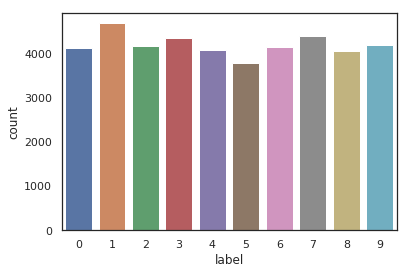

In [7]:
# Load the data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [8]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [9]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [10]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)

In [12]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [14]:

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

batch_size = 86
epochs = 30

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/30


   86/37800 [..............................] - ETA: 1:40 - loss: 0.1741 - acc: 0.9419

  172/37800 [..............................] - ETA: 1:44 - loss: 0.1255 - acc: 0.9535

  258/37800 [..............................] - ETA: 1:53 - loss: 0.1206 - acc: 0.9574

  344/37800 [..............................] - ETA: 1:51 - loss: 0.0958 - acc: 0.9680

  430/37800 [..............................] - ETA: 1:50 - loss: 0.1090 - acc: 0.9674

  516/37800 [..............................] - ETA: 1:48 - loss: 0.1011 - acc: 0.9690

  602/37800 [..............................] - ETA: 1:45 - loss: 0.0961 - acc: 0.9701

  688/37800 [..............................] - ETA: 1:44 - loss: 0.1007 - acc: 0.9695

  774/37800 [..............................] - ETA: 1:42 - loss: 0.1056 - acc: 0.9690

  860/37800 [..............................] - ETA: 1:40 - loss: 0.0968 - acc: 0.9721

  946/37800 [..............................] - ETA: 1:39 - loss: 0.0917 - acc: 0.9736

 1032/37800 [..............................] - ETA: 1:38 - loss: 0.0969 - acc: 0.9738

 1118/37800 [..............................] - ETA: 1:37 - loss: 0.1012 - acc: 0.9732

 1204/37800 [..............................] - ETA: 1:36 - loss: 0.0952 - acc: 0.9751

 1290/37800 [>.............................] - ETA: 1:35 - loss: 0.0897 - acc: 0.9767

 1376/37800 [>.............................] - ETA: 1:34 - loss: 0.0849 - acc: 0.9782

 1462/37800 [>.............................] - ETA: 1:34 - loss: 0.0831 - acc: 0.9781

 1548/37800 [>.............................] - ETA: 1:33 - loss: 0.0868 - acc: 0.9761

 1634/37800 [>.............................] - ETA: 1:32 - loss: 0.0868 - acc: 0.9761

 1720/37800 [>.............................] - ETA: 1:32 - loss: 0.0885 - acc: 0.9762

 1806/37800 [>.............................] - ETA: 1:31 - loss: 0.0871 - acc: 0.9762

 1892/37800 [>.............................] - ETA: 1:31 - loss: 0.0844 - acc: 0.9773

 1978/37800 [>.............................] - ETA: 1:30 - loss: 0.0864 - acc: 0.9767

 2064/37800 [>.............................] - ETA: 1:30 - loss: 0.0857 - acc: 0.9767

 2150/37800 [>.............................] - ETA: 1:29 - loss: 0.0914 - acc: 0.9758

 2236/37800 [>.............................] - ETA: 1:29 - loss: 0.0903 - acc: 0.9758

 2322/37800 [>.............................] - ETA: 1:28 - loss: 0.0886 - acc: 0.9759

 2408/37800 [>.............................] - ETA: 1:28 - loss: 0.0880 - acc: 0.9759

 2494/37800 [>.............................] - ETA: 1:28 - loss: 0.0860 - acc: 0.9763

 2580/37800 [=>............................] - ETA: 1:27 - loss: 0.0873 - acc: 0.9764

 2666/37800 [=>............................] - ETA: 1:27 - loss: 0.0875 - acc: 0.9767

 2752/37800 [=>............................] - ETA: 1:27 - loss: 0.0861 - acc: 0.9771

 2838/37800 [=>............................] - ETA: 1:26 - loss: 0.0872 - acc: 0.9767

 2924/37800 [=>............................] - ETA: 1:26 - loss: 0.0865 - acc: 0.9767

 3010/37800 [=>............................] - ETA: 1:26 - loss: 0.0850 - acc: 0.9774

 3096/37800 [=>............................] - ETA: 1:25 - loss: 0.0867 - acc: 0.9767

 3182/37800 [=>............................] - ETA: 1:25 - loss: 0.0871 - acc: 0.9764

 3268/37800 [=>............................] - ETA: 1:25 - loss: 0.0868 - acc: 0.9764

 3354/37800 [=>............................] - ETA: 1:24 - loss: 0.0877 - acc: 0.9761

 3440/37800 [=>............................] - ETA: 1:24 - loss: 0.0861 - acc: 0.9765

 3526/37800 [=>............................] - ETA: 1:24 - loss: 0.0848 - acc: 0.9765

 3612/37800 [=>............................] - ETA: 1:23 - loss: 0.0834 - acc: 0.9767

 3698/37800 [=>............................] - ETA: 1:23 - loss: 0.0860 - acc: 0.9762

 3784/37800 [==>...........................] - ETA: 1:23 - loss: 0.0861 - acc: 0.9762

 3870/37800 [==>...........................] - ETA: 1:23 - loss: 0.0872 - acc: 0.9762

 3956/37800 [==>...........................] - ETA: 1:22 - loss: 0.0867 - acc: 0.9765

 4042/37800 [==>...........................] - ETA: 1:22 - loss: 0.0876 - acc: 0.9760

 4128/37800 [==>...........................] - ETA: 1:22 - loss: 0.0864 - acc: 0.9765

 4214/37800 [==>...........................] - ETA: 1:22 - loss: 0.0894 - acc: 0.9753

 4300/37800 [==>...........................] - ETA: 1:21 - loss: 0.0889 - acc: 0.9756

 4386/37800 [==>...........................] - ETA: 1:21 - loss: 0.0886 - acc: 0.9756

 4472/37800 [==>...........................] - ETA: 1:21 - loss: 0.0880 - acc: 0.9758

 4558/37800 [==>...........................] - ETA: 1:21 - loss: 0.0865 - acc: 0.9763

 4644/37800 [==>...........................] - ETA: 1:20 - loss: 0.0866 - acc: 0.9755

 4730/37800 [==>...........................] - ETA: 1:20 - loss: 0.0860 - acc: 0.9753

 4816/37800 [==>...........................] - ETA: 1:20 - loss: 0.0856 - acc: 0.9751

 4902/37800 [==>...........................] - ETA: 1:20 - loss: 0.0850 - acc: 0.9753

 4988/37800 [==>...........................] - ETA: 1:20 - loss: 0.0850 - acc: 0.9751

 5074/37800 [===>..........................] - ETA: 1:19 - loss: 0.0842 - acc: 0.9754

 5160/37800 [===>..........................] - ETA: 1:19 - loss: 0.0841 - acc: 0.9754

 5246/37800 [===>..........................] - ETA: 1:19 - loss: 0.0837 - acc: 0.9754

 5332/37800 [===>..........................] - ETA: 1:19 - loss: 0.0844 - acc: 0.9756

 5418/37800 [===>..........................] - ETA: 1:18 - loss: 0.0842 - acc: 0.9756

 5504/37800 [===>..........................] - ETA: 1:18 - loss: 0.0847 - acc: 0.9755

 5590/37800 [===>..........................] - ETA: 1:18 - loss: 0.0844 - acc: 0.9753

 5676/37800 [===>..........................] - ETA: 1:18 - loss: 0.0839 - acc: 0.9753

 5762/37800 [===>..........................] - ETA: 1:18 - loss: 0.0829 - acc: 0.9757

 5848/37800 [===>..........................] - ETA: 1:18 - loss: 0.0824 - acc: 0.9759

 5934/37800 [===>..........................] - ETA: 1:17 - loss: 0.0832 - acc: 0.9759

 6020/37800 [===>..........................] - ETA: 1:17 - loss: 0.0832 - acc: 0.9757

 6106/37800 [===>..........................] - ETA: 1:17 - loss: 0.0828 - acc: 0.9758

 6192/37800 [===>..........................] - ETA: 1:17 - loss: 0.0821 - acc: 0.9759

 6278/37800 [===>..........................] - ETA: 1:16 - loss: 0.0821 - acc: 0.9759

 6364/37800 [====>.........................] - ETA: 1:16 - loss: 0.0814 - acc: 0.9761

 6450/37800 [====>.........................] - ETA: 1:16 - loss: 0.0811 - acc: 0.9763

 6536/37800 [====>.........................] - ETA: 1:16 - loss: 0.0806 - acc: 0.9761

 6622/37800 [====>.........................] - ETA: 1:15 - loss: 0.0798 - acc: 0.9763

 6708/37800 [====>.........................] - ETA: 1:15 - loss: 0.0790 - acc: 0.9764

 6794/37800 [====>.........................] - ETA: 1:15 - loss: 0.0786 - acc: 0.9764

 6880/37800 [====>.........................] - ETA: 1:15 - loss: 0.0795 - acc: 0.9762

 6966/37800 [====>.........................] - ETA: 1:15 - loss: 0.0796 - acc: 0.9760

 7052/37800 [====>.........................] - ETA: 1:14 - loss: 0.0792 - acc: 0.9762

 7138/37800 [====>.........................] - ETA: 1:14 - loss: 0.0785 - acc: 0.9763

 7224/37800 [====>.........................] - ETA: 1:14 - loss: 0.0794 - acc: 0.9759

 7310/37800 [====>.........................] - ETA: 1:14 - loss: 0.0794 - acc: 0.9759

 7396/37800 [====>.........................] - ETA: 1:13 - loss: 0.0809 - acc: 0.9758

 7482/37800 [====>.........................] - ETA: 1:13 - loss: 0.0806 - acc: 0.9758

 7568/37800 [=====>........................] - ETA: 1:13 - loss: 0.0805 - acc: 0.9757

 7654/37800 [=====>........................] - ETA: 1:13 - loss: 0.0802 - acc: 0.9758

 7740/37800 [=====>........................] - ETA: 1:13 - loss: 0.0795 - acc: 0.9760

 7826/37800 [=====>........................] - ETA: 1:12 - loss: 0.0791 - acc: 0.9760

 7912/37800 [=====>........................] - ETA: 1:12 - loss: 0.0795 - acc: 0.9761

 7998/37800 [=====>........................] - ETA: 1:12 - loss: 0.0791 - acc: 0.9762

 8084/37800 [=====>........................] - ETA: 1:12 - loss: 0.0786 - acc: 0.9764

 8170/37800 [=====>........................] - ETA: 1:11 - loss: 0.0782 - acc: 0.9765

 8256/37800 [=====>........................] - ETA: 1:11 - loss: 0.0805 - acc: 0.9764

 8342/37800 [=====>........................] - ETA: 1:11 - loss: 0.0807 - acc: 0.9761

 8428/37800 [=====>........................] - ETA: 1:11 - loss: 0.0829 - acc: 0.9756

 8514/37800 [=====>........................] - ETA: 1:10 - loss: 0.0828 - acc: 0.9757

 8600/37800 [=====>........................] - ETA: 1:10 - loss: 0.0821 - acc: 0.9759

 8686/37800 [=====>........................] - ETA: 1:10 - loss: 0.0815 - acc: 0.9761

 8772/37800 [=====>........................] - ETA: 1:10 - loss: 0.0809 - acc: 0.9762

 8858/37800 [======>.......................] - ETA: 1:10 - loss: 0.0823 - acc: 0.9757

 8944/37800 [======>.......................] - ETA: 1:09 - loss: 0.0835 - acc: 0.9755

 9030/37800 [======>.......................] - ETA: 1:09 - loss: 0.0836 - acc: 0.9754

 9116/37800 [======>.......................] - ETA: 1:09 - loss: 0.0838 - acc: 0.9754

 9202/37800 [======>.......................] - ETA: 1:09 - loss: 0.0840 - acc: 0.9754

 9288/37800 [======>.......................] - ETA: 1:08 - loss: 0.0836 - acc: 0.9755

 9374/37800 [======>.......................] - ETA: 1:08 - loss: 0.0831 - acc: 0.9756

 9460/37800 [======>.......................] - ETA: 1:08 - loss: 0.0831 - acc: 0.9756

 9546/37800 [======>.......................] - ETA: 1:08 - loss: 0.0825 - acc: 0.9758

 9632/37800 [======>.......................] - ETA: 1:08 - loss: 0.0824 - acc: 0.9756

 9718/37800 [======>.......................] - ETA: 1:07 - loss: 0.0826 - acc: 0.9754

 9804/37800 [======>.......................] - ETA: 1:07 - loss: 0.0825 - acc: 0.9754

 9890/37800 [======>.......................] - ETA: 1:07 - loss: 0.0822 - acc: 0.9755

 9976/37800 [======>.......................] - ETA: 1:07 - loss: 0.0823 - acc: 0.9756

10062/37800 [======>.......................] - ETA: 1:06 - loss: 0.0823 - acc: 0.9754

10148/37800 [=======>......................] - ETA: 1:06 - loss: 0.0824 - acc: 0.9754

10234/37800 [=======>......................] - ETA: 1:06 - loss: 0.0822 - acc: 0.9754

10320/37800 [=======>......................] - ETA: 1:06 - loss: 0.0818 - acc: 0.9754

10406/37800 [=======>......................] - ETA: 1:06 - loss: 0.0822 - acc: 0.9754

10492/37800 [=======>......................] - ETA: 1:05 - loss: 0.0819 - acc: 0.9753

10578/37800 [=======>......................] - ETA: 1:05 - loss: 0.0816 - acc: 0.9754

10664/37800 [=======>......................] - ETA: 1:05 - loss: 0.0820 - acc: 0.9753

10750/37800 [=======>......................] - ETA: 1:05 - loss: 0.0817 - acc: 0.9753

10836/37800 [=======>......................] - ETA: 1:05 - loss: 0.0813 - acc: 0.9755

10922/37800 [=======>......................] - ETA: 1:04 - loss: 0.0810 - acc: 0.9755

11008/37800 [=======>......................] - ETA: 1:04 - loss: 0.0808 - acc: 0.9755

11094/37800 [=======>......................] - ETA: 1:04 - loss: 0.0810 - acc: 0.9754

11180/37800 [=======>......................] - ETA: 1:04 - loss: 0.0815 - acc: 0.9752

11266/37800 [=======>......................] - ETA: 1:04 - loss: 0.0815 - acc: 0.9751

11352/37800 [========>.....................] - ETA: 1:03 - loss: 0.0811 - acc: 0.9751

11438/37800 [========>.....................] - ETA: 1:03 - loss: 0.0807 - acc: 0.9753

11524/37800 [========>.....................] - ETA: 1:03 - loss: 0.0809 - acc: 0.9752

11610/37800 [========>.....................] - ETA: 1:03 - loss: 0.0813 - acc: 0.9747

11696/37800 [========>.....................] - ETA: 1:03 - loss: 0.0809 - acc: 0.9749

11782/37800 [========>.....................] - ETA: 1:02 - loss: 0.0806 - acc: 0.9749

11868/37800 [========>.....................] - ETA: 1:02 - loss: 0.0803 - acc: 0.9750

11954/37800 [========>.....................] - ETA: 1:02 - loss: 0.0801 - acc: 0.9751

12040/37800 [========>.....................] - ETA: 1:02 - loss: 0.0805 - acc: 0.9750

12126/37800 [========>.....................] - ETA: 1:02 - loss: 0.0807 - acc: 0.9749

12212/37800 [========>.....................] - ETA: 1:01 - loss: 0.0802 - acc: 0.9751

12298/37800 [========>.....................] - ETA: 1:01 - loss: 0.0797 - acc: 0.9753

12384/37800 [========>.....................] - ETA: 1:01 - loss: 0.0796 - acc: 0.9753

12470/37800 [========>.....................] - ETA: 1:01 - loss: 0.0793 - acc: 0.9754

12556/37800 [========>.....................] - ETA: 1:00 - loss: 0.0789 - acc: 0.9755

12642/37800 [=========>....................] - ETA: 1:00 - loss: 0.0791 - acc: 0.9756

12728/37800 [=========>....................] - ETA: 1:00 - loss: 0.0790 - acc: 0.9756

12814/37800 [=========>....................] - ETA: 1:00 - loss: 0.0785 - acc: 0.9757

12900/37800 [=========>....................] - ETA: 1:00 - loss: 0.0787 - acc: 0.9757

12986/37800 [=========>....................] - ETA: 59s - loss: 0.0784 - acc: 0.9758 

13072/37800 [=========>....................] - ETA: 59s - loss: 0.0781 - acc: 0.9759

13158/37800 [=========>....................] - ETA: 59s - loss: 0.0777 - acc: 0.9760

13244/37800 [=========>....................] - ETA: 59s - loss: 0.0778 - acc: 0.9760

13330/37800 [=========>....................] - ETA: 58s - loss: 0.0774 - acc: 0.9761

13416/37800 [=========>....................] - ETA: 58s - loss: 0.0783 - acc: 0.9760

13502/37800 [=========>....................] - ETA: 58s - loss: 0.0782 - acc: 0.9760

13588/37800 [=========>....................] - ETA: 58s - loss: 0.0778 - acc: 0.9762

13674/37800 [=========>....................] - ETA: 58s - loss: 0.0777 - acc: 0.9762

13760/37800 [=========>....................] - ETA: 57s - loss: 0.0779 - acc: 0.9761

13846/37800 [=========>....................] - ETA: 57s - loss: 0.0777 - acc: 0.9760

13932/37800 [==========>...................] - ETA: 57s - loss: 0.0774 - acc: 0.9761

14018/37800 [==========>...................] - ETA: 57s - loss: 0.0781 - acc: 0.9760

14104/37800 [==========>...................] - ETA: 57s - loss: 0.0792 - acc: 0.9756

14190/37800 [==========>...................] - ETA: 56s - loss: 0.0797 - acc: 0.9753

14276/37800 [==========>...................] - ETA: 56s - loss: 0.0794 - acc: 0.9754

14362/37800 [==========>...................] - ETA: 56s - loss: 0.0791 - acc: 0.9755

14448/37800 [==========>...................] - ETA: 56s - loss: 0.0788 - acc: 0.9756

14534/37800 [==========>...................] - ETA: 55s - loss: 0.0787 - acc: 0.9756

14620/37800 [==========>...................] - ETA: 55s - loss: 0.0783 - acc: 0.9758

14706/37800 [==========>...................] - ETA: 55s - loss: 0.0788 - acc: 0.9756

14792/37800 [==========>...................] - ETA: 55s - loss: 0.0788 - acc: 0.9755

14878/37800 [==========>...................] - ETA: 55s - loss: 0.0790 - acc: 0.9755

14964/37800 [==========>...................] - ETA: 54s - loss: 0.0788 - acc: 0.9755

15050/37800 [==========>...................] - ETA: 54s - loss: 0.0787 - acc: 0.9755

15136/37800 [===========>..................] - ETA: 54s - loss: 0.0787 - acc: 0.9755

15222/37800 [===========>..................] - ETA: 54s - loss: 0.0789 - acc: 0.9753

15308/37800 [===========>..................] - ETA: 54s - loss: 0.0790 - acc: 0.9752

15394/37800 [===========>..................] - ETA: 53s - loss: 0.0791 - acc: 0.9752

15480/37800 [===========>..................] - ETA: 53s - loss: 0.0791 - acc: 0.9751

15566/37800 [===========>..................] - ETA: 53s - loss: 0.0796 - acc: 0.9750

15652/37800 [===========>..................] - ETA: 53s - loss: 0.0799 - acc: 0.9750

15738/37800 [===========>..................] - ETA: 52s - loss: 0.0799 - acc: 0.9749

15824/37800 [===========>..................] - ETA: 52s - loss: 0.0795 - acc: 0.9750

15910/37800 [===========>..................] - ETA: 52s - loss: 0.0793 - acc: 0.9750

15996/37800 [===========>..................] - ETA: 52s - loss: 0.0793 - acc: 0.9750

16082/37800 [===========>..................] - ETA: 52s - loss: 0.0790 - acc: 0.9751

16168/37800 [===========>..................] - ETA: 51s - loss: 0.0793 - acc: 0.9750

16254/37800 [===========>..................] - ETA: 51s - loss: 0.0793 - acc: 0.9751

16340/37800 [===========>..................] - ETA: 51s - loss: 0.0796 - acc: 0.9751

16426/37800 [============>.................] - ETA: 51s - loss: 0.0796 - acc: 0.9751

16512/37800 [============>.................] - ETA: 51s - loss: 0.0795 - acc: 0.9750

16598/37800 [============>.................] - ETA: 50s - loss: 0.0796 - acc: 0.9751

16684/37800 [============>.................] - ETA: 50s - loss: 0.0794 - acc: 0.9751

16770/37800 [============>.................] - ETA: 50s - loss: 0.0791 - acc: 0.9753

16856/37800 [============>.................] - ETA: 50s - loss: 0.0789 - acc: 0.9753

16942/37800 [============>.................] - ETA: 50s - loss: 0.0787 - acc: 0.9753

17028/37800 [============>.................] - ETA: 49s - loss: 0.0788 - acc: 0.9753

17114/37800 [============>.................] - ETA: 49s - loss: 0.0794 - acc: 0.9750

17200/37800 [============>.................] - ETA: 49s - loss: 0.0796 - acc: 0.9750

17286/37800 [============>.................] - ETA: 49s - loss: 0.0795 - acc: 0.9750

17372/37800 [============>.................] - ETA: 49s - loss: 0.0798 - acc: 0.9749

17458/37800 [============>.................] - ETA: 48s - loss: 0.0799 - acc: 0.9749

17544/37800 [============>.................] - ETA: 48s - loss: 0.0798 - acc: 0.9749

17630/37800 [============>.................] - ETA: 48s - loss: 0.0802 - acc: 0.9746

17716/37800 [=============>................] - ETA: 48s - loss: 0.0801 - acc: 0.9746

17802/37800 [=============>................] - ETA: 48s - loss: 0.0798 - acc: 0.9746

17888/37800 [=============>................] - ETA: 48s - loss: 0.0798 - acc: 0.9746

17974/37800 [=============>................] - ETA: 48s - loss: 0.0796 - acc: 0.9746

18060/37800 [=============>................] - ETA: 47s - loss: 0.0793 - acc: 0.9747

18146/37800 [=============>................] - ETA: 47s - loss: 0.0792 - acc: 0.9748

18232/37800 [=============>................] - ETA: 47s - loss: 0.0791 - acc: 0.9748

18318/37800 [=============>................] - ETA: 47s - loss: 0.0792 - acc: 0.9748

18404/37800 [=============>................] - ETA: 46s - loss: 0.0794 - acc: 0.9748

18490/37800 [=============>................] - ETA: 46s - loss: 0.0795 - acc: 0.9748

18576/37800 [=============>................] - ETA: 46s - loss: 0.0798 - acc: 0.9748

18662/37800 [=============>................] - ETA: 46s - loss: 0.0798 - acc: 0.9747

18748/37800 [=============>................] - ETA: 46s - loss: 0.0796 - acc: 0.9747

18834/37800 [=============>................] - ETA: 45s - loss: 0.0796 - acc: 0.9747

18920/37800 [==============>...............] - ETA: 45s - loss: 0.0794 - acc: 0.9748

19006/37800 [==============>...............] - ETA: 45s - loss: 0.0795 - acc: 0.9747

19092/37800 [==============>...............] - ETA: 45s - loss: 0.0793 - acc: 0.9748

19178/37800 [==============>...............] - ETA: 45s - loss: 0.0792 - acc: 0.9749

19264/37800 [==============>...............] - ETA: 44s - loss: 0.0791 - acc: 0.9748

19350/37800 [==============>...............] - ETA: 44s - loss: 0.0791 - acc: 0.9748

19436/37800 [==============>...............] - ETA: 44s - loss: 0.0788 - acc: 0.9749

19522/37800 [==============>...............] - ETA: 44s - loss: 0.0788 - acc: 0.9749

19608/37800 [==============>...............] - ETA: 44s - loss: 0.0789 - acc: 0.9749

19694/37800 [==============>...............] - ETA: 43s - loss: 0.0787 - acc: 0.9749

19780/37800 [==============>...............] - ETA: 43s - loss: 0.0787 - acc: 0.9749

19866/37800 [==============>...............] - ETA: 43s - loss: 0.0788 - acc: 0.9749

19952/37800 [==============>...............] - ETA: 43s - loss: 0.0789 - acc: 0.9748

20038/37800 [==============>...............] - ETA: 42s - loss: 0.0786 - acc: 0.9749

20124/37800 [==============>...............] - ETA: 42s - loss: 0.0783 - acc: 0.9750

20210/37800 [===============>..............] - ETA: 42s - loss: 0.0783 - acc: 0.9750

20296/37800 [===============>..............] - ETA: 42s - loss: 0.0782 - acc: 0.9750

20382/37800 [===============>..............] - ETA: 42s - loss: 0.0784 - acc: 0.9750

20468/37800 [===============>..............] - ETA: 42s - loss: 0.0790 - acc: 0.9749

20554/37800 [===============>..............] - ETA: 41s - loss: 0.0789 - acc: 0.9750

20640/37800 [===============>..............] - ETA: 41s - loss: 0.0788 - acc: 0.9750

20726/37800 [===============>..............] - ETA: 41s - loss: 0.0787 - acc: 0.9751

20812/37800 [===============>..............] - ETA: 41s - loss: 0.0784 - acc: 0.9752

20898/37800 [===============>..............] - ETA: 41s - loss: 0.0782 - acc: 0.9753

20984/37800 [===============>..............] - ETA: 40s - loss: 0.0782 - acc: 0.9752

21070/37800 [===============>..............] - ETA: 40s - loss: 0.0786 - acc: 0.9752

21156/37800 [===============>..............] - ETA: 40s - loss: 0.0783 - acc: 0.9753

21242/37800 [===============>..............] - ETA: 40s - loss: 0.0788 - acc: 0.9752

21328/37800 [===============>..............] - ETA: 40s - loss: 0.0786 - acc: 0.9752

21414/37800 [===============>..............] - ETA: 39s - loss: 0.0787 - acc: 0.9752

21500/37800 [================>.............] - ETA: 39s - loss: 0.0784 - acc: 0.9753

21586/37800 [================>.............] - ETA: 39s - loss: 0.0782 - acc: 0.9754

21672/37800 [================>.............] - ETA: 39s - loss: 0.0781 - acc: 0.9754

21758/37800 [================>.............] - ETA: 38s - loss: 0.0780 - acc: 0.9754

21844/37800 [================>.............] - ETA: 38s - loss: 0.0780 - acc: 0.9754

21930/37800 [================>.............] - ETA: 38s - loss: 0.0778 - acc: 0.9755

22016/37800 [================>.............] - ETA: 38s - loss: 0.0782 - acc: 0.9753

22102/37800 [================>.............] - ETA: 38s - loss: 0.0786 - acc: 0.9753

22188/37800 [================>.............] - ETA: 38s - loss: 0.0784 - acc: 0.9753

22274/37800 [================>.............] - ETA: 37s - loss: 0.0786 - acc: 0.9753

22360/37800 [================>.............] - ETA: 37s - loss: 0.0785 - acc: 0.9754

22446/37800 [================>.............] - ETA: 37s - loss: 0.0784 - acc: 0.9754

22532/37800 [================>.............] - ETA: 37s - loss: 0.0783 - acc: 0.9754

22618/37800 [================>.............] - ETA: 37s - loss: 0.0783 - acc: 0.9754

22704/37800 [=================>............] - ETA: 36s - loss: 0.0785 - acc: 0.9754

22790/37800 [=================>............] - ETA: 36s - loss: 0.0786 - acc: 0.9753

22876/37800 [=================>............] - ETA: 36s - loss: 0.0784 - acc: 0.9754

22962/37800 [=================>............] - ETA: 36s - loss: 0.0781 - acc: 0.9755

23048/37800 [=================>............] - ETA: 36s - loss: 0.0781 - acc: 0.9755

23134/37800 [=================>............] - ETA: 35s - loss: 0.0780 - acc: 0.9755

23220/37800 [=================>............] - ETA: 35s - loss: 0.0781 - acc: 0.9755

23306/37800 [=================>............] - ETA: 35s - loss: 0.0781 - acc: 0.9754

23392/37800 [=================>............] - ETA: 35s - loss: 0.0784 - acc: 0.9754

23478/37800 [=================>............] - ETA: 35s - loss: 0.0784 - acc: 0.9754

23564/37800 [=================>............] - ETA: 34s - loss: 0.0784 - acc: 0.9753

23650/37800 [=================>............] - ETA: 34s - loss: 0.0782 - acc: 0.9754

23736/37800 [=================>............] - ETA: 34s - loss: 0.0780 - acc: 0.9755

23822/37800 [=================>............] - ETA: 34s - loss: 0.0783 - acc: 0.9754

23908/37800 [=================>............] - ETA: 34s - loss: 0.0784 - acc: 0.9754

23994/37800 [==================>...........] - ETA: 33s - loss: 0.0782 - acc: 0.9755

24080/37800 [==================>...........] - ETA: 33s - loss: 0.0783 - acc: 0.9754

24166/37800 [==================>...........] - ETA: 33s - loss: 0.0783 - acc: 0.9754

24252/37800 [==================>...........] - ETA: 33s - loss: 0.0781 - acc: 0.9755

24338/37800 [==================>...........] - ETA: 33s - loss: 0.0783 - acc: 0.9755

24424/37800 [==================>...........] - ETA: 32s - loss: 0.0783 - acc: 0.9755

24510/37800 [==================>...........] - ETA: 32s - loss: 0.0781 - acc: 0.9756

24596/37800 [==================>...........] - ETA: 32s - loss: 0.0786 - acc: 0.9756

24682/37800 [==================>...........] - ETA: 32s - loss: 0.0783 - acc: 0.9757

24768/37800 [==================>...........] - ETA: 32s - loss: 0.0784 - acc: 0.9757

24854/37800 [==================>...........] - ETA: 31s - loss: 0.0786 - acc: 0.9757

24940/37800 [==================>...........] - ETA: 31s - loss: 0.0784 - acc: 0.9757

25026/37800 [==================>...........] - ETA: 31s - loss: 0.0784 - acc: 0.9757

25112/37800 [==================>...........] - ETA: 31s - loss: 0.0792 - acc: 0.9755

25198/37800 [==================>...........] - ETA: 31s - loss: 0.0795 - acc: 0.9754

25284/37800 [===================>..........] - ETA: 30s - loss: 0.0797 - acc: 0.9754

25370/37800 [===================>..........] - ETA: 30s - loss: 0.0798 - acc: 0.9754

25456/37800 [===================>..........] - ETA: 30s - loss: 0.0800 - acc: 0.9753

25542/37800 [===================>..........] - ETA: 30s - loss: 0.0800 - acc: 0.9753

25628/37800 [===================>..........] - ETA: 29s - loss: 0.0800 - acc: 0.9753

25714/37800 [===================>..........] - ETA: 29s - loss: 0.0801 - acc: 0.9752

25800/37800 [===================>..........] - ETA: 29s - loss: 0.0803 - acc: 0.9752

25886/37800 [===================>..........] - ETA: 29s - loss: 0.0801 - acc: 0.9752

25972/37800 [===================>..........] - ETA: 29s - loss: 0.0801 - acc: 0.9752

26058/37800 [===================>..........] - ETA: 28s - loss: 0.0803 - acc: 0.9752

26144/37800 [===================>..........] - ETA: 28s - loss: 0.0804 - acc: 0.9752

26230/37800 [===================>..........] - ETA: 28s - loss: 0.0802 - acc: 0.9753

26316/37800 [===================>..........] - ETA: 28s - loss: 0.0802 - acc: 0.9753

26402/37800 [===================>..........] - ETA: 28s - loss: 0.0804 - acc: 0.9753

26488/37800 [====================>.........] - ETA: 27s - loss: 0.0804 - acc: 0.9753

26574/37800 [====================>.........] - ETA: 27s - loss: 0.0802 - acc: 0.9753

26660/37800 [====================>.........] - ETA: 27s - loss: 0.0802 - acc: 0.9754

26746/37800 [====================>.........] - ETA: 27s - loss: 0.0802 - acc: 0.9753

26832/37800 [====================>.........] - ETA: 27s - loss: 0.0802 - acc: 0.9753

26918/37800 [====================>.........] - ETA: 26s - loss: 0.0804 - acc: 0.9753

27004/37800 [====================>.........] - ETA: 26s - loss: 0.0803 - acc: 0.9753

27090/37800 [====================>.........] - ETA: 26s - loss: 0.0803 - acc: 0.9752

27176/37800 [====================>.........] - ETA: 26s - loss: 0.0803 - acc: 0.9752

27262/37800 [====================>.........] - ETA: 25s - loss: 0.0803 - acc: 0.9752

27348/37800 [====================>.........] - ETA: 25s - loss: 0.0802 - acc: 0.9752

27434/37800 [====================>.........] - ETA: 25s - loss: 0.0801 - acc: 0.9753

27520/37800 [====================>.........] - ETA: 25s - loss: 0.0803 - acc: 0.9752

27606/37800 [====================>.........] - ETA: 25s - loss: 0.0802 - acc: 0.9752

27692/37800 [====================>.........] - ETA: 24s - loss: 0.0802 - acc: 0.9752

27778/37800 [=====================>........] - ETA: 24s - loss: 0.0801 - acc: 0.9752

27864/37800 [=====================>........] - ETA: 24s - loss: 0.0799 - acc: 0.9753

27950/37800 [=====================>........] - ETA: 24s - loss: 0.0800 - acc: 0.9753

28036/37800 [=====================>........] - ETA: 24s - loss: 0.0801 - acc: 0.9752

28122/37800 [=====================>........] - ETA: 23s - loss: 0.0801 - acc: 0.9752

28208/37800 [=====================>........] - ETA: 23s - loss: 0.0799 - acc: 0.9753

28294/37800 [=====================>........] - ETA: 23s - loss: 0.0797 - acc: 0.9754

28380/37800 [=====================>........] - ETA: 23s - loss: 0.0795 - acc: 0.9754

28466/37800 [=====================>........] - ETA: 23s - loss: 0.0795 - acc: 0.9755

28552/37800 [=====================>........] - ETA: 22s - loss: 0.0794 - acc: 0.9755

28638/37800 [=====================>........] - ETA: 22s - loss: 0.0792 - acc: 0.9756

28724/37800 [=====================>........] - ETA: 22s - loss: 0.0790 - acc: 0.9756

28810/37800 [=====================>........] - ETA: 22s - loss: 0.0790 - acc: 0.9756

28896/37800 [=====================>........] - ETA: 22s - loss: 0.0788 - acc: 0.9756

28982/37800 [======================>.......] - ETA: 21s - loss: 0.0789 - acc: 0.9756

29068/37800 [======================>.......] - ETA: 21s - loss: 0.0790 - acc: 0.9757

29154/37800 [======================>.......] - ETA: 21s - loss: 0.0790 - acc: 0.9757

29240/37800 [======================>.......] - ETA: 21s - loss: 0.0790 - acc: 0.9756

29326/37800 [======================>.......] - ETA: 20s - loss: 0.0789 - acc: 0.9757

29412/37800 [======================>.......] - ETA: 20s - loss: 0.0787 - acc: 0.9758

29498/37800 [======================>.......] - ETA: 20s - loss: 0.0786 - acc: 0.9758

29584/37800 [======================>.......] - ETA: 20s - loss: 0.0785 - acc: 0.9758

29670/37800 [======================>.......] - ETA: 20s - loss: 0.0785 - acc: 0.9758

29756/37800 [======================>.......] - ETA: 19s - loss: 0.0789 - acc: 0.9756

29842/37800 [======================>.......] - ETA: 19s - loss: 0.0790 - acc: 0.9756

29928/37800 [======================>.......] - ETA: 19s - loss: 0.0791 - acc: 0.9756

30014/37800 [======================>.......] - ETA: 19s - loss: 0.0791 - acc: 0.9756

30100/37800 [======================>.......] - ETA: 19s - loss: 0.0791 - acc: 0.9756

30186/37800 [======================>.......] - ETA: 18s - loss: 0.0792 - acc: 0.9756

30272/37800 [=======================>......] - ETA: 18s - loss: 0.0794 - acc: 0.9755

30358/37800 [=======================>......] - ETA: 18s - loss: 0.0795 - acc: 0.9754

30444/37800 [=======================>......] - ETA: 18s - loss: 0.0795 - acc: 0.9754

30530/37800 [=======================>......] - ETA: 18s - loss: 0.0795 - acc: 0.9755

30616/37800 [=======================>......] - ETA: 17s - loss: 0.0794 - acc: 0.9755

30702/37800 [=======================>......] - ETA: 17s - loss: 0.0795 - acc: 0.9754

30788/37800 [=======================>......] - ETA: 17s - loss: 0.0794 - acc: 0.9754

30874/37800 [=======================>......] - ETA: 17s - loss: 0.0792 - acc: 0.9755

30960/37800 [=======================>......] - ETA: 16s - loss: 0.0794 - acc: 0.9755

31046/37800 [=======================>......] - ETA: 16s - loss: 0.0792 - acc: 0.9755

31132/37800 [=======================>......] - ETA: 16s - loss: 0.0793 - acc: 0.9755

31218/37800 [=======================>......] - ETA: 16s - loss: 0.0791 - acc: 0.9756

31304/37800 [=======================>......] - ETA: 16s - loss: 0.0792 - acc: 0.9756

31390/37800 [=======================>......] - ETA: 15s - loss: 0.0793 - acc: 0.9755

31476/37800 [=======================>......] - ETA: 15s - loss: 0.0792 - acc: 0.9755

31562/37800 [========================>.....] - ETA: 15s - loss: 0.0791 - acc: 0.9756

31648/37800 [========================>.....] - ETA: 15s - loss: 0.0789 - acc: 0.9756

31734/37800 [========================>.....] - ETA: 15s - loss: 0.0788 - acc: 0.9757

31820/37800 [========================>.....] - ETA: 14s - loss: 0.0791 - acc: 0.9756

31906/37800 [========================>.....] - ETA: 14s - loss: 0.0791 - acc: 0.9756

31992/37800 [========================>.....] - ETA: 14s - loss: 0.0790 - acc: 0.9756

32078/37800 [========================>.....] - ETA: 14s - loss: 0.0789 - acc: 0.9757

32164/37800 [========================>.....] - ETA: 13s - loss: 0.0789 - acc: 0.9757

32250/37800 [========================>.....] - ETA: 13s - loss: 0.0788 - acc: 0.9757

32336/37800 [========================>.....] - ETA: 13s - loss: 0.0787 - acc: 0.9757

32422/37800 [========================>.....] - ETA: 13s - loss: 0.0789 - acc: 0.9757

32508/37800 [========================>.....] - ETA: 13s - loss: 0.0789 - acc: 0.9757

32594/37800 [========================>.....] - ETA: 12s - loss: 0.0787 - acc: 0.9758

32680/37800 [========================>.....] - ETA: 12s - loss: 0.0787 - acc: 0.9758

32766/37800 [=========================>....] - ETA: 12s - loss: 0.0787 - acc: 0.9757

32852/37800 [=========================>....] - ETA: 12s - loss: 0.0789 - acc: 0.9757

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0789 - acc: 0.9757

33024/37800 [=========================>....] - ETA: 11s - loss: 0.0789 - acc: 0.9757

33110/37800 [=========================>....] - ETA: 11s - loss: 0.0789 - acc: 0.9757

33196/37800 [=========================>....] - ETA: 11s - loss: 0.0790 - acc: 0.9757

33282/37800 [=========================>....] - ETA: 11s - loss: 0.0788 - acc: 0.9757

33368/37800 [=========================>....] - ETA: 10s - loss: 0.0786 - acc: 0.9758

33454/37800 [=========================>....] - ETA: 10s - loss: 0.0787 - acc: 0.9757

33540/37800 [=========================>....] - ETA: 10s - loss: 0.0786 - acc: 0.9757

33626/37800 [=========================>....] - ETA: 10s - loss: 0.0785 - acc: 0.9758

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0783 - acc: 0.9758

33798/37800 [=========================>....] - ETA: 9s - loss: 0.0783 - acc: 0.9758 

33884/37800 [=========================>....] - ETA: 9s - loss: 0.0786 - acc: 0.9758

33970/37800 [=========================>....] - ETA: 9s - loss: 0.0785 - acc: 0.9759

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0784 - acc: 0.9759

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0783 - acc: 0.9759

34228/37800 [==========================>...] - ETA: 8s - loss: 0.0785 - acc: 0.9758

34314/37800 [==========================>...] - ETA: 8s - loss: 0.0786 - acc: 0.9758

34400/37800 [==========================>...] - ETA: 8s - loss: 0.0785 - acc: 0.9759

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0786 - acc: 0.9759

34572/37800 [==========================>...] - ETA: 7s - loss: 0.0785 - acc: 0.9759

34658/37800 [==========================>...] - ETA: 7s - loss: 0.0784 - acc: 0.9759

34744/37800 [==========================>...] - ETA: 7s - loss: 0.0784 - acc: 0.9759

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0785 - acc: 0.9759

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0786 - acc: 0.9759

35002/37800 [==========================>...] - ETA: 6s - loss: 0.0787 - acc: 0.9758

35088/37800 [==========================>...] - ETA: 6s - loss: 0.0786 - acc: 0.9759

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0786 - acc: 0.9758

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0786 - acc: 0.9758

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0786 - acc: 0.9758

35432/37800 [===========================>..] - ETA: 5s - loss: 0.0786 - acc: 0.9758

35518/37800 [===========================>..] - ETA: 5s - loss: 0.0785 - acc: 0.9758

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0784 - acc: 0.9758

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0783 - acc: 0.9759

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0782 - acc: 0.9759

35862/37800 [===========================>..] - ETA: 4s - loss: 0.0784 - acc: 0.9759

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0782 - acc: 0.9759

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0781 - acc: 0.9760

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0781 - acc: 0.9760

36206/37800 [===========================>..] - ETA: 3s - loss: 0.0780 - acc: 0.9760

36292/37800 [===========================>..] - ETA: 3s - loss: 0.0780 - acc: 0.9760

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0779 - acc: 0.9760

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0780 - acc: 0.9760

36550/37800 [============================>.] - ETA: 3s - loss: 0.0779 - acc: 0.9760

36636/37800 [============================>.] - ETA: 2s - loss: 0.0778 - acc: 0.9760

36722/37800 [============================>.] - ETA: 2s - loss: 0.0777 - acc: 0.9761

36808/37800 [============================>.] - ETA: 2s - loss: 0.0779 - acc: 0.9761

36894/37800 [============================>.] - ETA: 2s - loss: 0.0778 - acc: 0.9761

36980/37800 [============================>.] - ETA: 2s - loss: 0.0779 - acc: 0.9761

37066/37800 [============================>.] - ETA: 1s - loss: 0.0778 - acc: 0.9761

37152/37800 [============================>.] - ETA: 1s - loss: 0.0779 - acc: 0.9761

37238/37800 [============================>.] - ETA: 1s - loss: 0.0780 - acc: 0.9761

37324/37800 [============================>.] - ETA: 1s - loss: 0.0779 - acc: 0.9761

37410/37800 [============================>.] - ETA: 0s - loss: 0.0778 - acc: 0.9761

37496/37800 [============================>.] - ETA: 0s - loss: 0.0777 - acc: 0.9761

37582/37800 [============================>.] - ETA: 0s - loss: 0.0775 - acc: 0.9762

37668/37800 [============================>.] - ETA: 0s - loss: 0.0775 - acc: 0.9762

37754/37800 [============================>.] - ETA: 0s - loss: 0.0773 - acc: 0.9762

37800/37800 [==============================] - 93s 2ms/step - loss: 0.0772 - acc: 0.9762


Epoch 2/30


   86/37800 [..............................] - ETA: 1:35 - loss: 0.0064 - acc: 1.0000

  172/37800 [..............................] - ETA: 1:33 - loss: 0.0171 - acc: 0.9942

  258/37800 [..............................] - ETA: 1:33 - loss: 0.0418 - acc: 0.9884

  344/37800 [..............................] - ETA: 1:34 - loss: 0.0324 - acc: 0.9913

  430/37800 [..............................] - ETA: 1:33 - loss: 0.0416 - acc: 0.9884

  516/37800 [..............................] - ETA: 1:38 - loss: 0.0508 - acc: 0.9884

  602/37800 [..............................] - ETA: 1:36 - loss: 0.0671 - acc: 0.9850

  688/37800 [..............................] - ETA: 1:36 - loss: 0.0608 - acc: 0.9869

  774/37800 [..............................] - ETA: 1:35 - loss: 0.0582 - acc: 0.9858

  860/37800 [..............................] - ETA: 1:35 - loss: 0.0548 - acc: 0.9872

  946/37800 [..............................] - ETA: 1:34 - loss: 0.0610 - acc: 0.9841

 1032/37800 [..............................] - ETA: 1:33 - loss: 0.0635 - acc: 0.9835

 1118/37800 [..............................] - ETA: 1:32 - loss: 0.0642 - acc: 0.9830

 1204/37800 [..............................] - ETA: 1:33 - loss: 0.0636 - acc: 0.9817

 1290/37800 [>.............................] - ETA: 1:32 - loss: 0.0623 - acc: 0.9822

 1376/37800 [>.............................] - ETA: 1:32 - loss: 0.0601 - acc: 0.9826

 1462/37800 [>.............................] - ETA: 1:32 - loss: 0.0608 - acc: 0.9829

 1548/37800 [>.............................] - ETA: 1:31 - loss: 0.0629 - acc: 0.9819

 1634/37800 [>.............................] - ETA: 1:32 - loss: 0.0647 - acc: 0.9816

 1720/37800 [>.............................] - ETA: 1:31 - loss: 0.0646 - acc: 0.9814

 1806/37800 [>.............................] - ETA: 1:31 - loss: 0.0701 - acc: 0.9806

 1892/37800 [>.............................] - ETA: 1:31 - loss: 0.0682 - acc: 0.9810

 1978/37800 [>.............................] - ETA: 1:31 - loss: 0.0666 - acc: 0.9808

 2064/37800 [>.............................] - ETA: 1:30 - loss: 0.0675 - acc: 0.9806

 2150/37800 [>.............................] - ETA: 1:30 - loss: 0.0656 - acc: 0.9814

 2236/37800 [>.............................] - ETA: 1:30 - loss: 0.0671 - acc: 0.9812

 2322/37800 [>.............................] - ETA: 1:29 - loss: 0.0667 - acc: 0.9815

 2408/37800 [>.............................] - ETA: 1:29 - loss: 0.0657 - acc: 0.9817

 2494/37800 [>.............................] - ETA: 1:29 - loss: 0.0650 - acc: 0.9816

 2580/37800 [=>............................] - ETA: 1:29 - loss: 0.0650 - acc: 0.9814

 2666/37800 [=>............................] - ETA: 1:28 - loss: 0.0637 - acc: 0.9816

 2752/37800 [=>............................] - ETA: 1:29 - loss: 0.0636 - acc: 0.9811

 2838/37800 [=>............................] - ETA: 1:29 - loss: 0.0618 - acc: 0.9817

 2924/37800 [=>............................] - ETA: 1:28 - loss: 0.0605 - acc: 0.9819

 3010/37800 [=>............................] - ETA: 1:28 - loss: 0.0613 - acc: 0.9814

 3096/37800 [=>............................] - ETA: 1:27 - loss: 0.0600 - acc: 0.9819

 3182/37800 [=>............................] - ETA: 1:27 - loss: 0.0587 - acc: 0.9824

 3268/37800 [=>............................] - ETA: 1:27 - loss: 0.0584 - acc: 0.9826

 3354/37800 [=>............................] - ETA: 1:27 - loss: 0.0621 - acc: 0.9818

 3440/37800 [=>............................] - ETA: 1:26 - loss: 0.0633 - acc: 0.9817

 3526/37800 [=>............................] - ETA: 1:26 - loss: 0.0642 - acc: 0.9813

 3612/37800 [=>............................] - ETA: 1:26 - loss: 0.0635 - acc: 0.9815

 3698/37800 [=>............................] - ETA: 1:25 - loss: 0.0624 - acc: 0.9819

 3784/37800 [==>...........................] - ETA: 1:25 - loss: 0.0622 - acc: 0.9818

 3870/37800 [==>...........................] - ETA: 1:25 - loss: 0.0623 - acc: 0.9817

 3956/37800 [==>...........................] - ETA: 1:25 - loss: 0.0630 - acc: 0.9813

 4042/37800 [==>...........................] - ETA: 1:24 - loss: 0.0620 - acc: 0.9817

 4128/37800 [==>...........................] - ETA: 1:24 - loss: 0.0610 - acc: 0.9821

 4214/37800 [==>...........................] - ETA: 1:24 - loss: 0.0603 - acc: 0.9824

 4300/37800 [==>...........................] - ETA: 1:24 - loss: 0.0618 - acc: 0.9816

 4386/37800 [==>...........................] - ETA: 1:23 - loss: 0.0635 - acc: 0.9813

 4472/37800 [==>...........................] - ETA: 1:23 - loss: 0.0624 - acc: 0.9817

 4558/37800 [==>...........................] - ETA: 1:24 - loss: 0.0616 - acc: 0.9818

 4644/37800 [==>...........................] - ETA: 1:23 - loss: 0.0637 - acc: 0.9819

 4730/37800 [==>...........................] - ETA: 1:23 - loss: 0.0627 - acc: 0.9822

 4816/37800 [==>...........................] - ETA: 1:23 - loss: 0.0642 - acc: 0.9819

 4902/37800 [==>...........................] - ETA: 1:23 - loss: 0.0635 - acc: 0.9820

 4988/37800 [==>...........................] - ETA: 1:23 - loss: 0.0630 - acc: 0.9822

 5074/37800 [===>..........................] - ETA: 1:22 - loss: 0.0630 - acc: 0.9821

 5160/37800 [===>..........................] - ETA: 1:22 - loss: 0.0628 - acc: 0.9820

 5246/37800 [===>..........................] - ETA: 1:22 - loss: 0.0640 - acc: 0.9819

 5332/37800 [===>..........................] - ETA: 1:22 - loss: 0.0650 - acc: 0.9820

 5418/37800 [===>..........................] - ETA: 1:21 - loss: 0.0659 - acc: 0.9815

 5504/37800 [===>..........................] - ETA: 1:21 - loss: 0.0657 - acc: 0.9815

 5590/37800 [===>..........................] - ETA: 1:21 - loss: 0.0649 - acc: 0.9818

 5676/37800 [===>..........................] - ETA: 1:21 - loss: 0.0649 - acc: 0.9817

 5762/37800 [===>..........................] - ETA: 1:21 - loss: 0.0649 - acc: 0.9816

 5848/37800 [===>..........................] - ETA: 1:20 - loss: 0.0649 - acc: 0.9817

 5934/37800 [===>..........................] - ETA: 1:20 - loss: 0.0643 - acc: 0.9818

 6020/37800 [===>..........................] - ETA: 1:20 - loss: 0.0652 - acc: 0.9816

 6106/37800 [===>..........................] - ETA: 1:20 - loss: 0.0645 - acc: 0.9818

 6192/37800 [===>..........................] - ETA: 1:19 - loss: 0.0640 - acc: 0.9819

 6278/37800 [===>..........................] - ETA: 1:20 - loss: 0.0635 - acc: 0.9820

 6364/37800 [====>.........................] - ETA: 1:19 - loss: 0.0629 - acc: 0.9822

 6450/37800 [====>.........................] - ETA: 1:19 - loss: 0.0630 - acc: 0.9822

 6536/37800 [====>.........................] - ETA: 1:19 - loss: 0.0624 - acc: 0.9823

 6622/37800 [====>.........................] - ETA: 1:18 - loss: 0.0630 - acc: 0.9823

 6708/37800 [====>.........................] - ETA: 1:18 - loss: 0.0635 - acc: 0.9823

 6794/37800 [====>.........................] - ETA: 1:18 - loss: 0.0635 - acc: 0.9822

 6880/37800 [====>.........................] - ETA: 1:18 - loss: 0.0639 - acc: 0.9818

 6966/37800 [====>.........................] - ETA: 1:18 - loss: 0.0632 - acc: 0.9821

 7052/37800 [====>.........................] - ETA: 1:17 - loss: 0.0628 - acc: 0.9820

 7138/37800 [====>.........................] - ETA: 1:17 - loss: 0.0624 - acc: 0.9819

 7224/37800 [====>.........................] - ETA: 1:17 - loss: 0.0624 - acc: 0.9819

 7310/37800 [====>.........................] - ETA: 1:17 - loss: 0.0628 - acc: 0.9817

 7396/37800 [====>.........................] - ETA: 1:16 - loss: 0.0625 - acc: 0.9817

 7482/37800 [====>.........................] - ETA: 1:16 - loss: 0.0624 - acc: 0.9818

 7568/37800 [=====>........................] - ETA: 1:16 - loss: 0.0622 - acc: 0.9819

 7654/37800 [=====>........................] - ETA: 1:16 - loss: 0.0630 - acc: 0.9816

 7740/37800 [=====>........................] - ETA: 1:15 - loss: 0.0630 - acc: 0.9813

 7826/37800 [=====>........................] - ETA: 1:15 - loss: 0.0629 - acc: 0.9813

 7912/37800 [=====>........................] - ETA: 1:15 - loss: 0.0632 - acc: 0.9812

 7998/37800 [=====>........................] - ETA: 1:15 - loss: 0.0629 - acc: 0.9812

 8084/37800 [=====>........................] - ETA: 1:14 - loss: 0.0626 - acc: 0.9812

 8170/37800 [=====>........................] - ETA: 1:14 - loss: 0.0638 - acc: 0.9810

 8256/37800 [=====>........................] - ETA: 1:14 - loss: 0.0635 - acc: 0.9811

 8342/37800 [=====>........................] - ETA: 1:14 - loss: 0.0637 - acc: 0.9809

 8428/37800 [=====>........................] - ETA: 1:14 - loss: 0.0641 - acc: 0.9808

 8514/37800 [=====>........................] - ETA: 1:13 - loss: 0.0636 - acc: 0.9809

 8600/37800 [=====>........................] - ETA: 1:13 - loss: 0.0632 - acc: 0.9809

 8686/37800 [=====>........................] - ETA: 1:13 - loss: 0.0627 - acc: 0.9811

 8772/37800 [=====>........................] - ETA: 1:13 - loss: 0.0640 - acc: 0.9808

 8858/37800 [======>.......................] - ETA: 1:13 - loss: 0.0643 - acc: 0.9806

 8944/37800 [======>.......................] - ETA: 1:12 - loss: 0.0638 - acc: 0.9808

 9030/37800 [======>.......................] - ETA: 1:12 - loss: 0.0638 - acc: 0.9808

 9116/37800 [======>.......................] - ETA: 1:12 - loss: 0.0639 - acc: 0.9808

 9202/37800 [======>.......................] - ETA: 1:12 - loss: 0.0639 - acc: 0.9808

 9288/37800 [======>.......................] - ETA: 1:11 - loss: 0.0644 - acc: 0.9807

 9374/37800 [======>.......................] - ETA: 1:11 - loss: 0.0653 - acc: 0.9806

 9460/37800 [======>.......................] - ETA: 1:11 - loss: 0.0651 - acc: 0.9805

 9546/37800 [======>.......................] - ETA: 1:11 - loss: 0.0646 - acc: 0.9807

 9632/37800 [======>.......................] - ETA: 1:10 - loss: 0.0649 - acc: 0.9807

 9718/37800 [======>.......................] - ETA: 1:10 - loss: 0.0651 - acc: 0.9806

 9804/37800 [======>.......................] - ETA: 1:10 - loss: 0.0648 - acc: 0.9806

 9890/37800 [======>.......................] - ETA: 1:10 - loss: 0.0646 - acc: 0.9807

 9976/37800 [======>.......................] - ETA: 1:10 - loss: 0.0641 - acc: 0.9809

10062/37800 [======>.......................] - ETA: 1:09 - loss: 0.0637 - acc: 0.9809

10148/37800 [=======>......................] - ETA: 1:09 - loss: 0.0639 - acc: 0.9809

10234/37800 [=======>......................] - ETA: 1:09 - loss: 0.0635 - acc: 0.9810

10320/37800 [=======>......................] - ETA: 1:09 - loss: 0.0638 - acc: 0.9809

10406/37800 [=======>......................] - ETA: 1:09 - loss: 0.0637 - acc: 0.9810

10492/37800 [=======>......................] - ETA: 1:08 - loss: 0.0641 - acc: 0.9810

10578/37800 [=======>......................] - ETA: 1:08 - loss: 0.0649 - acc: 0.9809

10664/37800 [=======>......................] - ETA: 1:08 - loss: 0.0651 - acc: 0.9807

10750/37800 [=======>......................] - ETA: 1:08 - loss: 0.0650 - acc: 0.9807

10836/37800 [=======>......................] - ETA: 1:08 - loss: 0.0651 - acc: 0.9807

10922/37800 [=======>......................] - ETA: 1:07 - loss: 0.0648 - acc: 0.9808

11008/37800 [=======>......................] - ETA: 1:07 - loss: 0.0646 - acc: 0.9807

11094/37800 [=======>......................] - ETA: 1:07 - loss: 0.0648 - acc: 0.9805

11180/37800 [=======>......................] - ETA: 1:07 - loss: 0.0643 - acc: 0.9807

11266/37800 [=======>......................] - ETA: 1:07 - loss: 0.0647 - acc: 0.9805

11352/37800 [========>.....................] - ETA: 1:06 - loss: 0.0644 - acc: 0.9805

11438/37800 [========>.....................] - ETA: 1:06 - loss: 0.0644 - acc: 0.9806

11524/37800 [========>.....................] - ETA: 1:06 - loss: 0.0642 - acc: 0.9806

11610/37800 [========>.....................] - ETA: 1:06 - loss: 0.0642 - acc: 0.9806

11696/37800 [========>.....................] - ETA: 1:05 - loss: 0.0645 - acc: 0.9805

11782/37800 [========>.....................] - ETA: 1:05 - loss: 0.0643 - acc: 0.9806

11868/37800 [========>.....................] - ETA: 1:05 - loss: 0.0646 - acc: 0.9805

11954/37800 [========>.....................] - ETA: 1:05 - loss: 0.0644 - acc: 0.9805

12040/37800 [========>.....................] - ETA: 1:05 - loss: 0.0641 - acc: 0.9806

12126/37800 [========>.....................] - ETA: 1:04 - loss: 0.0638 - acc: 0.9807

12212/37800 [========>.....................] - ETA: 1:04 - loss: 0.0635 - acc: 0.9808

12298/37800 [========>.....................] - ETA: 1:04 - loss: 0.0635 - acc: 0.9809

12384/37800 [========>.....................] - ETA: 1:04 - loss: 0.0634 - acc: 0.9809

12470/37800 [========>.....................] - ETA: 1:03 - loss: 0.0635 - acc: 0.9808

12556/37800 [========>.....................] - ETA: 1:03 - loss: 0.0638 - acc: 0.9808

12642/37800 [=========>....................] - ETA: 1:03 - loss: 0.0638 - acc: 0.9807

12728/37800 [=========>....................] - ETA: 1:03 - loss: 0.0635 - acc: 0.9808

12814/37800 [=========>....................] - ETA: 1:03 - loss: 0.0638 - acc: 0.9808

12900/37800 [=========>....................] - ETA: 1:02 - loss: 0.0637 - acc: 0.9809

12986/37800 [=========>....................] - ETA: 1:02 - loss: 0.0638 - acc: 0.9808

13072/37800 [=========>....................] - ETA: 1:02 - loss: 0.0635 - acc: 0.9810

13158/37800 [=========>....................] - ETA: 1:02 - loss: 0.0639 - acc: 0.9809

13244/37800 [=========>....................] - ETA: 1:01 - loss: 0.0635 - acc: 0.9810

13330/37800 [=========>....................] - ETA: 1:01 - loss: 0.0636 - acc: 0.9809

13416/37800 [=========>....................] - ETA: 1:01 - loss: 0.0634 - acc: 0.9810

13502/37800 [=========>....................] - ETA: 1:01 - loss: 0.0634 - acc: 0.9810

13588/37800 [=========>....................] - ETA: 1:01 - loss: 0.0632 - acc: 0.9811

13674/37800 [=========>....................] - ETA: 1:00 - loss: 0.0634 - acc: 0.9809

13760/37800 [=========>....................] - ETA: 1:00 - loss: 0.0633 - acc: 0.9810

13846/37800 [=========>....................] - ETA: 1:00 - loss: 0.0638 - acc: 0.9809

13932/37800 [==========>...................] - ETA: 1:00 - loss: 0.0641 - acc: 0.9808

14018/37800 [==========>...................] - ETA: 1:00 - loss: 0.0642 - acc: 0.9807

14104/37800 [==========>...................] - ETA: 1:00 - loss: 0.0642 - acc: 0.9807

14190/37800 [==========>...................] - ETA: 59s - loss: 0.0647 - acc: 0.9806 

14276/37800 [==========>...................] - ETA: 59s - loss: 0.0650 - acc: 0.9806

14362/37800 [==========>...................] - ETA: 59s - loss: 0.0659 - acc: 0.9802

14448/37800 [==========>...................] - ETA: 59s - loss: 0.0666 - acc: 0.9800

14534/37800 [==========>...................] - ETA: 59s - loss: 0.0669 - acc: 0.9799

14620/37800 [==========>...................] - ETA: 58s - loss: 0.0667 - acc: 0.9800

14706/37800 [==========>...................] - ETA: 58s - loss: 0.0665 - acc: 0.9800

14792/37800 [==========>...................] - ETA: 58s - loss: 0.0666 - acc: 0.9800

14878/37800 [==========>...................] - ETA: 58s - loss: 0.0666 - acc: 0.9800

14964/37800 [==========>...................] - ETA: 57s - loss: 0.0664 - acc: 0.9802

15050/37800 [==========>...................] - ETA: 57s - loss: 0.0663 - acc: 0.9802

15136/37800 [===========>..................] - ETA: 57s - loss: 0.0671 - acc: 0.9802

15222/37800 [===========>..................] - ETA: 57s - loss: 0.0668 - acc: 0.9802

15308/37800 [===========>..................] - ETA: 57s - loss: 0.0667 - acc: 0.9803

15394/37800 [===========>..................] - ETA: 56s - loss: 0.0664 - acc: 0.9804

15480/37800 [===========>..................] - ETA: 56s - loss: 0.0663 - acc: 0.9804

15566/37800 [===========>..................] - ETA: 56s - loss: 0.0664 - acc: 0.9803

15652/37800 [===========>..................] - ETA: 56s - loss: 0.0664 - acc: 0.9803

15738/37800 [===========>..................] - ETA: 56s - loss: 0.0661 - acc: 0.9804

15824/37800 [===========>..................] - ETA: 55s - loss: 0.0660 - acc: 0.9804

15910/37800 [===========>..................] - ETA: 55s - loss: 0.0657 - acc: 0.9805

15996/37800 [===========>..................] - ETA: 55s - loss: 0.0654 - acc: 0.9806

16082/37800 [===========>..................] - ETA: 55s - loss: 0.0656 - acc: 0.9805

16168/37800 [===========>..................] - ETA: 54s - loss: 0.0653 - acc: 0.9805

16254/37800 [===========>..................] - ETA: 54s - loss: 0.0661 - acc: 0.9804

16340/37800 [===========>..................] - ETA: 54s - loss: 0.0665 - acc: 0.9804

16426/37800 [============>.................] - ETA: 54s - loss: 0.0666 - acc: 0.9803

16512/37800 [============>.................] - ETA: 54s - loss: 0.0665 - acc: 0.9803

16598/37800 [============>.................] - ETA: 53s - loss: 0.0664 - acc: 0.9803

16684/37800 [============>.................] - ETA: 53s - loss: 0.0670 - acc: 0.9802

16770/37800 [============>.................] - ETA: 53s - loss: 0.0667 - acc: 0.9803

16856/37800 [============>.................] - ETA: 53s - loss: 0.0665 - acc: 0.9804

16942/37800 [============>.................] - ETA: 52s - loss: 0.0664 - acc: 0.9804

17028/37800 [============>.................] - ETA: 52s - loss: 0.0661 - acc: 0.9805

17114/37800 [============>.................] - ETA: 52s - loss: 0.0658 - acc: 0.9806

17200/37800 [============>.................] - ETA: 52s - loss: 0.0656 - acc: 0.9806

17286/37800 [============>.................] - ETA: 52s - loss: 0.0655 - acc: 0.9807

17372/37800 [============>.................] - ETA: 51s - loss: 0.0654 - acc: 0.9807

17458/37800 [============>.................] - ETA: 51s - loss: 0.0653 - acc: 0.9808

17544/37800 [============>.................] - ETA: 51s - loss: 0.0650 - acc: 0.9808

17630/37800 [============>.................] - ETA: 51s - loss: 0.0651 - acc: 0.9808

17716/37800 [=============>................] - ETA: 51s - loss: 0.0651 - acc: 0.9808

17802/37800 [=============>................] - ETA: 50s - loss: 0.0652 - acc: 0.9807

17888/37800 [=============>................] - ETA: 50s - loss: 0.0650 - acc: 0.9808

17974/37800 [=============>................] - ETA: 50s - loss: 0.0650 - acc: 0.9808

18060/37800 [=============>................] - ETA: 50s - loss: 0.0655 - acc: 0.9808

18146/37800 [=============>................] - ETA: 50s - loss: 0.0653 - acc: 0.9808

18232/37800 [=============>................] - ETA: 49s - loss: 0.0653 - acc: 0.9808

18318/37800 [=============>................] - ETA: 49s - loss: 0.0655 - acc: 0.9807

18404/37800 [=============>................] - ETA: 49s - loss: 0.0655 - acc: 0.9807

18490/37800 [=============>................] - ETA: 49s - loss: 0.0653 - acc: 0.9807

18576/37800 [=============>................] - ETA: 48s - loss: 0.0654 - acc: 0.9807

18662/37800 [=============>................] - ETA: 48s - loss: 0.0652 - acc: 0.9808

18748/37800 [=============>................] - ETA: 48s - loss: 0.0650 - acc: 0.9809

18834/37800 [=============>................] - ETA: 48s - loss: 0.0652 - acc: 0.9808

18920/37800 [==============>...............] - ETA: 47s - loss: 0.0651 - acc: 0.9808

19006/37800 [==============>...............] - ETA: 47s - loss: 0.0650 - acc: 0.9808

19092/37800 [==============>...............] - ETA: 47s - loss: 0.0655 - acc: 0.9808

19178/37800 [==============>...............] - ETA: 47s - loss: 0.0656 - acc: 0.9808

19264/37800 [==============>...............] - ETA: 47s - loss: 0.0659 - acc: 0.9806

19350/37800 [==============>...............] - ETA: 46s - loss: 0.0657 - acc: 0.9806

19436/37800 [==============>...............] - ETA: 46s - loss: 0.0656 - acc: 0.9806

19522/37800 [==============>...............] - ETA: 46s - loss: 0.0655 - acc: 0.9806

19608/37800 [==============>...............] - ETA: 46s - loss: 0.0653 - acc: 0.9807

19694/37800 [==============>...............] - ETA: 46s - loss: 0.0655 - acc: 0.9807

19780/37800 [==============>...............] - ETA: 45s - loss: 0.0656 - acc: 0.9806

19866/37800 [==============>...............] - ETA: 45s - loss: 0.0655 - acc: 0.9806

19952/37800 [==============>...............] - ETA: 45s - loss: 0.0658 - acc: 0.9806

20038/37800 [==============>...............] - ETA: 45s - loss: 0.0658 - acc: 0.9806

20124/37800 [==============>...............] - ETA: 44s - loss: 0.0658 - acc: 0.9806

20210/37800 [===============>..............] - ETA: 44s - loss: 0.0658 - acc: 0.9807

20296/37800 [===============>..............] - ETA: 44s - loss: 0.0657 - acc: 0.9807

20382/37800 [===============>..............] - ETA: 44s - loss: 0.0656 - acc: 0.9808

20468/37800 [===============>..............] - ETA: 43s - loss: 0.0653 - acc: 0.9808

20554/37800 [===============>..............] - ETA: 43s - loss: 0.0652 - acc: 0.9809

20640/37800 [===============>..............] - ETA: 43s - loss: 0.0660 - acc: 0.9808

20726/37800 [===============>..............] - ETA: 43s - loss: 0.0658 - acc: 0.9808

20812/37800 [===============>..............] - ETA: 43s - loss: 0.0657 - acc: 0.9809

20898/37800 [===============>..............] - ETA: 42s - loss: 0.0660 - acc: 0.9808

20984/37800 [===============>..............] - ETA: 42s - loss: 0.0658 - acc: 0.9808

21070/37800 [===============>..............] - ETA: 42s - loss: 0.0656 - acc: 0.9809

21156/37800 [===============>..............] - ETA: 42s - loss: 0.0655 - acc: 0.9809

21242/37800 [===============>..............] - ETA: 42s - loss: 0.0657 - acc: 0.9808

21328/37800 [===============>..............] - ETA: 41s - loss: 0.0658 - acc: 0.9808

21414/37800 [===============>..............] - ETA: 41s - loss: 0.0657 - acc: 0.9808

21500/37800 [================>.............] - ETA: 41s - loss: 0.0655 - acc: 0.9809

21586/37800 [================>.............] - ETA: 41s - loss: 0.0663 - acc: 0.9808

21672/37800 [================>.............] - ETA: 40s - loss: 0.0665 - acc: 0.9807

21758/37800 [================>.............] - ETA: 40s - loss: 0.0663 - acc: 0.9807

21844/37800 [================>.............] - ETA: 40s - loss: 0.0665 - acc: 0.9806

21930/37800 [================>.............] - ETA: 40s - loss: 0.0663 - acc: 0.9807

22016/37800 [================>.............] - ETA: 40s - loss: 0.0664 - acc: 0.9807

22102/37800 [================>.............] - ETA: 39s - loss: 0.0665 - acc: 0.9806

22188/37800 [================>.............] - ETA: 39s - loss: 0.0664 - acc: 0.9807

22274/37800 [================>.............] - ETA: 39s - loss: 0.0661 - acc: 0.9807

22360/37800 [================>.............] - ETA: 39s - loss: 0.0660 - acc: 0.9808

22446/37800 [================>.............] - ETA: 38s - loss: 0.0657 - acc: 0.9808

22532/37800 [================>.............] - ETA: 38s - loss: 0.0658 - acc: 0.9808

22618/37800 [================>.............] - ETA: 38s - loss: 0.0662 - acc: 0.9808

22704/37800 [=================>............] - ETA: 38s - loss: 0.0665 - acc: 0.9807

22790/37800 [=================>............] - ETA: 38s - loss: 0.0662 - acc: 0.9808

22876/37800 [=================>............] - ETA: 37s - loss: 0.0664 - acc: 0.9806

22962/37800 [=================>............] - ETA: 37s - loss: 0.0662 - acc: 0.9807

23048/37800 [=================>............] - ETA: 37s - loss: 0.0662 - acc: 0.9807

23134/37800 [=================>............] - ETA: 37s - loss: 0.0662 - acc: 0.9808

23220/37800 [=================>............] - ETA: 36s - loss: 0.0661 - acc: 0.9807

23306/37800 [=================>............] - ETA: 36s - loss: 0.0663 - acc: 0.9807

23392/37800 [=================>............] - ETA: 36s - loss: 0.0661 - acc: 0.9808

23478/37800 [=================>............] - ETA: 36s - loss: 0.0661 - acc: 0.9808

23564/37800 [=================>............] - ETA: 36s - loss: 0.0660 - acc: 0.9809

23650/37800 [=================>............] - ETA: 35s - loss: 0.0662 - acc: 0.9808

23736/37800 [=================>............] - ETA: 35s - loss: 0.0666 - acc: 0.9807

23822/37800 [=================>............] - ETA: 35s - loss: 0.0666 - acc: 0.9807

23908/37800 [=================>............] - ETA: 35s - loss: 0.0669 - acc: 0.9806

23994/37800 [==================>...........] - ETA: 35s - loss: 0.0668 - acc: 0.9807

24080/37800 [==================>...........] - ETA: 34s - loss: 0.0667 - acc: 0.9807

24166/37800 [==================>...........] - ETA: 34s - loss: 0.0667 - acc: 0.9807

24252/37800 [==================>...........] - ETA: 34s - loss: 0.0666 - acc: 0.9808

24338/37800 [==================>...........] - ETA: 34s - loss: 0.0667 - acc: 0.9807

24424/37800 [==================>...........] - ETA: 33s - loss: 0.0665 - acc: 0.9808

24510/37800 [==================>...........] - ETA: 33s - loss: 0.0667 - acc: 0.9807

24596/37800 [==================>...........] - ETA: 33s - loss: 0.0668 - acc: 0.9807

24682/37800 [==================>...........] - ETA: 33s - loss: 0.0671 - acc: 0.9807

24768/37800 [==================>...........] - ETA: 33s - loss: 0.0672 - acc: 0.9806

24854/37800 [==================>...........] - ETA: 32s - loss: 0.0671 - acc: 0.9807

24940/37800 [==================>...........] - ETA: 32s - loss: 0.0673 - acc: 0.9807

25026/37800 [==================>...........] - ETA: 32s - loss: 0.0672 - acc: 0.9807

25112/37800 [==================>...........] - ETA: 32s - loss: 0.0670 - acc: 0.9808

25198/37800 [==================>...........] - ETA: 31s - loss: 0.0669 - acc: 0.9808

25284/37800 [===================>..........] - ETA: 31s - loss: 0.0667 - acc: 0.9809

25370/37800 [===================>..........] - ETA: 31s - loss: 0.0667 - acc: 0.9808

25456/37800 [===================>..........] - ETA: 31s - loss: 0.0670 - acc: 0.9808

25542/37800 [===================>..........] - ETA: 31s - loss: 0.0669 - acc: 0.9809

25628/37800 [===================>..........] - ETA: 30s - loss: 0.0668 - acc: 0.9808

25714/37800 [===================>..........] - ETA: 30s - loss: 0.0667 - acc: 0.9808

25800/37800 [===================>..........] - ETA: 30s - loss: 0.0665 - acc: 0.9809

25886/37800 [===================>..........] - ETA: 30s - loss: 0.0665 - acc: 0.9809

25972/37800 [===================>..........] - ETA: 29s - loss: 0.0664 - acc: 0.9809

26058/37800 [===================>..........] - ETA: 29s - loss: 0.0662 - acc: 0.9810

26144/37800 [===================>..........] - ETA: 29s - loss: 0.0664 - acc: 0.9809

26230/37800 [===================>..........] - ETA: 29s - loss: 0.0664 - acc: 0.9808

26316/37800 [===================>..........] - ETA: 29s - loss: 0.0664 - acc: 0.9808

26402/37800 [===================>..........] - ETA: 28s - loss: 0.0665 - acc: 0.9808

26488/37800 [====================>.........] - ETA: 28s - loss: 0.0667 - acc: 0.9807

26574/37800 [====================>.........] - ETA: 28s - loss: 0.0666 - acc: 0.9807

26660/37800 [====================>.........] - ETA: 28s - loss: 0.0669 - acc: 0.9806

26746/37800 [====================>.........] - ETA: 28s - loss: 0.0667 - acc: 0.9806

26832/37800 [====================>.........] - ETA: 27s - loss: 0.0665 - acc: 0.9807

26918/37800 [====================>.........] - ETA: 27s - loss: 0.0664 - acc: 0.9807

27004/37800 [====================>.........] - ETA: 27s - loss: 0.0663 - acc: 0.9808

27090/37800 [====================>.........] - ETA: 27s - loss: 0.0662 - acc: 0.9808

27176/37800 [====================>.........] - ETA: 26s - loss: 0.0660 - acc: 0.9809

27262/37800 [====================>.........] - ETA: 26s - loss: 0.0659 - acc: 0.9809

27348/37800 [====================>.........] - ETA: 26s - loss: 0.0659 - acc: 0.9808

27434/37800 [====================>.........] - ETA: 26s - loss: 0.0663 - acc: 0.9808

27520/37800 [====================>.........] - ETA: 26s - loss: 0.0663 - acc: 0.9807

27606/37800 [====================>.........] - ETA: 25s - loss: 0.0664 - acc: 0.9807

27692/37800 [====================>.........] - ETA: 25s - loss: 0.0665 - acc: 0.9807

27778/37800 [=====================>........] - ETA: 25s - loss: 0.0665 - acc: 0.9807

27864/37800 [=====================>........] - ETA: 25s - loss: 0.0667 - acc: 0.9807

27950/37800 [=====================>........] - ETA: 24s - loss: 0.0665 - acc: 0.9808

28036/37800 [=====================>........] - ETA: 24s - loss: 0.0665 - acc: 0.9808

28122/37800 [=====================>........] - ETA: 24s - loss: 0.0665 - acc: 0.9807

28208/37800 [=====================>........] - ETA: 24s - loss: 0.0664 - acc: 0.9808

28294/37800 [=====================>........] - ETA: 24s - loss: 0.0664 - acc: 0.9807

28380/37800 [=====================>........] - ETA: 23s - loss: 0.0663 - acc: 0.9808

28466/37800 [=====================>........] - ETA: 23s - loss: 0.0661 - acc: 0.9808

28552/37800 [=====================>........] - ETA: 23s - loss: 0.0661 - acc: 0.9808

28638/37800 [=====================>........] - ETA: 23s - loss: 0.0661 - acc: 0.9808

28724/37800 [=====================>........] - ETA: 23s - loss: 0.0659 - acc: 0.9809

28810/37800 [=====================>........] - ETA: 22s - loss: 0.0657 - acc: 0.9809

28896/37800 [=====================>........] - ETA: 22s - loss: 0.0656 - acc: 0.9809

28982/37800 [======================>.......] - ETA: 22s - loss: 0.0657 - acc: 0.9809

29068/37800 [======================>.......] - ETA: 22s - loss: 0.0656 - acc: 0.9810

29154/37800 [======================>.......] - ETA: 21s - loss: 0.0655 - acc: 0.9810

29240/37800 [======================>.......] - ETA: 21s - loss: 0.0654 - acc: 0.9810

29326/37800 [======================>.......] - ETA: 21s - loss: 0.0653 - acc: 0.9810

29412/37800 [======================>.......] - ETA: 21s - loss: 0.0653 - acc: 0.9810

29498/37800 [======================>.......] - ETA: 21s - loss: 0.0653 - acc: 0.9810

29584/37800 [======================>.......] - ETA: 20s - loss: 0.0651 - acc: 0.9810

29670/37800 [======================>.......] - ETA: 20s - loss: 0.0650 - acc: 0.9811

29756/37800 [======================>.......] - ETA: 20s - loss: 0.0649 - acc: 0.9811

29842/37800 [======================>.......] - ETA: 20s - loss: 0.0649 - acc: 0.9811

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0650 - acc: 0.9810

30014/37800 [======================>.......] - ETA: 19s - loss: 0.0649 - acc: 0.9810

30100/37800 [======================>.......] - ETA: 19s - loss: 0.0648 - acc: 0.9811

30186/37800 [======================>.......] - ETA: 19s - loss: 0.0647 - acc: 0.9811

30272/37800 [=======================>......] - ETA: 19s - loss: 0.0648 - acc: 0.9810

30358/37800 [=======================>......] - ETA: 18s - loss: 0.0647 - acc: 0.9811

30444/37800 [=======================>......] - ETA: 18s - loss: 0.0646 - acc: 0.9811

30530/37800 [=======================>......] - ETA: 18s - loss: 0.0644 - acc: 0.9812

30616/37800 [=======================>......] - ETA: 18s - loss: 0.0643 - acc: 0.9812

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0642 - acc: 0.9812

30788/37800 [=======================>......] - ETA: 17s - loss: 0.0645 - acc: 0.9812

30874/37800 [=======================>......] - ETA: 17s - loss: 0.0644 - acc: 0.9812

30960/37800 [=======================>......] - ETA: 17s - loss: 0.0643 - acc: 0.9813

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0642 - acc: 0.9813

31132/37800 [=======================>......] - ETA: 16s - loss: 0.0641 - acc: 0.9814

31218/37800 [=======================>......] - ETA: 16s - loss: 0.0640 - acc: 0.9814

31304/37800 [=======================>......] - ETA: 16s - loss: 0.0639 - acc: 0.9814

31390/37800 [=======================>......] - ETA: 16s - loss: 0.0642 - acc: 0.9813

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0641 - acc: 0.9813

31562/37800 [========================>.....] - ETA: 15s - loss: 0.0644 - acc: 0.9812

31648/37800 [========================>.....] - ETA: 15s - loss: 0.0644 - acc: 0.9813

31734/37800 [========================>.....] - ETA: 15s - loss: 0.0644 - acc: 0.9813

31820/37800 [========================>.....] - ETA: 15s - loss: 0.0642 - acc: 0.9813

31906/37800 [========================>.....] - ETA: 14s - loss: 0.0642 - acc: 0.9814

31992/37800 [========================>.....] - ETA: 14s - loss: 0.0641 - acc: 0.9814

32078/37800 [========================>.....] - ETA: 14s - loss: 0.0641 - acc: 0.9814

32164/37800 [========================>.....] - ETA: 14s - loss: 0.0640 - acc: 0.9814

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0638 - acc: 0.9815

32336/37800 [========================>.....] - ETA: 13s - loss: 0.0637 - acc: 0.9815

32422/37800 [========================>.....] - ETA: 13s - loss: 0.0636 - acc: 0.9815

32508/37800 [========================>.....] - ETA: 13s - loss: 0.0635 - acc: 0.9815

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0634 - acc: 0.9816

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0633 - acc: 0.9816

32766/37800 [=========================>....] - ETA: 12s - loss: 0.0631 - acc: 0.9816

32852/37800 [=========================>....] - ETA: 12s - loss: 0.0633 - acc: 0.9816

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0637 - acc: 0.9816

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0636 - acc: 0.9816

33110/37800 [=========================>....] - ETA: 11s - loss: 0.0639 - acc: 0.9816

33196/37800 [=========================>....] - ETA: 11s - loss: 0.0639 - acc: 0.9816

33282/37800 [=========================>....] - ETA: 11s - loss: 0.0638 - acc: 0.9817

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0638 - acc: 0.9816

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0636 - acc: 0.9817

33540/37800 [=========================>....] - ETA: 10s - loss: 0.0635 - acc: 0.9817

33626/37800 [=========================>....] - ETA: 10s - loss: 0.0635 - acc: 0.9817

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0637 - acc: 0.9816

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0638 - acc: 0.9816

33884/37800 [=========================>....] - ETA: 9s - loss: 0.0637 - acc: 0.9817 

33970/37800 [=========================>....] - ETA: 9s - loss: 0.0636 - acc: 0.9817

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0638 - acc: 0.9816

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0638 - acc: 0.9817

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0638 - acc: 0.9817

34314/37800 [==========================>...] - ETA: 8s - loss: 0.0637 - acc: 0.9817

34400/37800 [==========================>...] - ETA: 8s - loss: 0.0637 - acc: 0.9817

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0636 - acc: 0.9817

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0635 - acc: 0.9817

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0638 - acc: 0.9817

34744/37800 [==========================>...] - ETA: 7s - loss: 0.0637 - acc: 0.9817

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0637 - acc: 0.9817

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0638 - acc: 0.9817

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0637 - acc: 0.9818

35088/37800 [==========================>...] - ETA: 6s - loss: 0.0636 - acc: 0.9818

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0635 - acc: 0.9818

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0634 - acc: 0.9818

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0635 - acc: 0.9819

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0634 - acc: 0.9819

35518/37800 [===========================>..] - ETA: 5s - loss: 0.0637 - acc: 0.9818

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0637 - acc: 0.9819

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0636 - acc: 0.9818

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0635 - acc: 0.9819

35862/37800 [===========================>..] - ETA: 4s - loss: 0.0637 - acc: 0.9818

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0636 - acc: 0.9819

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0635 - acc: 0.9819

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0636 - acc: 0.9819

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0636 - acc: 0.9819

36292/37800 [===========================>..] - ETA: 3s - loss: 0.0637 - acc: 0.9819

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0638 - acc: 0.9819

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0638 - acc: 0.9818

36550/37800 [============================>.] - ETA: 3s - loss: 0.0639 - acc: 0.9818

36636/37800 [============================>.] - ETA: 2s - loss: 0.0639 - acc: 0.9818

36722/37800 [============================>.] - ETA: 2s - loss: 0.0638 - acc: 0.9818

36808/37800 [============================>.] - ETA: 2s - loss: 0.0637 - acc: 0.9819

36894/37800 [============================>.] - ETA: 2s - loss: 0.0637 - acc: 0.9819

36980/37800 [============================>.] - ETA: 2s - loss: 0.0636 - acc: 0.9819

37066/37800 [============================>.] - ETA: 1s - loss: 0.0634 - acc: 0.9820

37152/37800 [============================>.] - ETA: 1s - loss: 0.0635 - acc: 0.9819

37238/37800 [============================>.] - ETA: 1s - loss: 0.0634 - acc: 0.9819

37324/37800 [============================>.] - ETA: 1s - loss: 0.0633 - acc: 0.9819

37410/37800 [============================>.] - ETA: 0s - loss: 0.0636 - acc: 0.9819

37496/37800 [============================>.] - ETA: 0s - loss: 0.0635 - acc: 0.9819

37582/37800 [============================>.] - ETA: 0s - loss: 0.0635 - acc: 0.9819

37668/37800 [============================>.] - ETA: 0s - loss: 0.0634 - acc: 0.9819

37754/37800 [============================>.] - ETA: 0s - loss: 0.0633 - acc: 0.9820

37800/37800 [==============================] - 97s 3ms/step - loss: 0.0633 - acc: 0.9820


Epoch 3/30


   86/37800 [..............................] - ETA: 1:51 - loss: 0.0323 - acc: 0.9884

  172/37800 [..............................] - ETA: 1:45 - loss: 0.0893 - acc: 0.9767

  258/37800 [..............................] - ETA: 1:41 - loss: 0.0799 - acc: 0.9806

  344/37800 [..............................] - ETA: 1:38 - loss: 0.0823 - acc: 0.9767

  430/37800 [..............................] - ETA: 1:43 - loss: 0.0669 - acc: 0.9814

  516/37800 [..............................] - ETA: 1:41 - loss: 0.0583 - acc: 0.9826

  602/37800 [..............................] - ETA: 1:39 - loss: 0.0527 - acc: 0.9850

  688/37800 [..............................] - ETA: 1:38 - loss: 0.0486 - acc: 0.9855

  774/37800 [..............................] - ETA: 1:37 - loss: 0.0616 - acc: 0.9858

  860/37800 [..............................] - ETA: 1:36 - loss: 0.0581 - acc: 0.9860

  946/37800 [..............................] - ETA: 1:35 - loss: 0.0544 - acc: 0.9873

 1032/37800 [..............................] - ETA: 1:35 - loss: 0.0529 - acc: 0.9874

 1118/37800 [..............................] - ETA: 1:34 - loss: 0.0618 - acc: 0.9875

 1204/37800 [..............................] - ETA: 1:34 - loss: 0.0595 - acc: 0.9875

 1290/37800 [>.............................] - ETA: 1:33 - loss: 0.0564 - acc: 0.9884

 1376/37800 [>.............................] - ETA: 1:34 - loss: 0.0621 - acc: 0.9862

 1462/37800 [>.............................] - ETA: 1:33 - loss: 0.0592 - acc: 0.9863

 1548/37800 [>.............................] - ETA: 1:33 - loss: 0.0562 - acc: 0.9871

 1634/37800 [>.............................] - ETA: 1:32 - loss: 0.0539 - acc: 0.9878

 1720/37800 [>.............................] - ETA: 1:33 - loss: 0.0523 - acc: 0.9878

 1806/37800 [>.............................] - ETA: 1:33 - loss: 0.0507 - acc: 0.9884

 1892/37800 [>.............................] - ETA: 1:32 - loss: 0.0486 - acc: 0.9889

 1978/37800 [>.............................] - ETA: 1:32 - loss: 0.0479 - acc: 0.9889

 2064/37800 [>.............................] - ETA: 1:31 - loss: 0.0465 - acc: 0.9893

 2150/37800 [>.............................] - ETA: 1:31 - loss: 0.0470 - acc: 0.9879

 2236/37800 [>.............................] - ETA: 1:31 - loss: 0.0484 - acc: 0.9875

 2322/37800 [>.............................] - ETA: 1:30 - loss: 0.0499 - acc: 0.9866

 2408/37800 [>.............................] - ETA: 1:30 - loss: 0.0485 - acc: 0.9871

 2494/37800 [>.............................] - ETA: 1:30 - loss: 0.0480 - acc: 0.9872

 2580/37800 [=>............................] - ETA: 1:30 - loss: 0.0472 - acc: 0.9872

 2666/37800 [=>............................] - ETA: 1:30 - loss: 0.0459 - acc: 0.9876

 2752/37800 [=>............................] - ETA: 1:30 - loss: 0.0458 - acc: 0.9869

 2838/37800 [=>............................] - ETA: 1:29 - loss: 0.0450 - acc: 0.9873

 2924/37800 [=>............................] - ETA: 1:29 - loss: 0.0452 - acc: 0.9873

 3010/37800 [=>............................] - ETA: 1:29 - loss: 0.0465 - acc: 0.9874

 3096/37800 [=>............................] - ETA: 1:29 - loss: 0.0481 - acc: 0.9874

 3182/37800 [=>............................] - ETA: 1:28 - loss: 0.0473 - acc: 0.9874

 3268/37800 [=>............................] - ETA: 1:28 - loss: 0.0465 - acc: 0.9875

 3354/37800 [=>............................] - ETA: 1:28 - loss: 0.0462 - acc: 0.9875

 3440/37800 [=>............................] - ETA: 1:27 - loss: 0.0464 - acc: 0.9872

 3526/37800 [=>............................] - ETA: 1:27 - loss: 0.0456 - acc: 0.9872

 3612/37800 [=>............................] - ETA: 1:27 - loss: 0.0469 - acc: 0.9873

 3698/37800 [=>............................] - ETA: 1:27 - loss: 0.0466 - acc: 0.9873

 3784/37800 [==>...........................] - ETA: 1:26 - loss: 0.0458 - acc: 0.9876

 3870/37800 [==>...........................] - ETA: 1:26 - loss: 0.0449 - acc: 0.9879

 3956/37800 [==>...........................] - ETA: 1:26 - loss: 0.0441 - acc: 0.9881

 4042/37800 [==>...........................] - ETA: 1:26 - loss: 0.0451 - acc: 0.9881

 4128/37800 [==>...........................] - ETA: 1:25 - loss: 0.0463 - acc: 0.9879

 4214/37800 [==>...........................] - ETA: 1:25 - loss: 0.0466 - acc: 0.9879

 4300/37800 [==>...........................] - ETA: 1:25 - loss: 0.0458 - acc: 0.9881

 4386/37800 [==>...........................] - ETA: 1:25 - loss: 0.0461 - acc: 0.9881

 4472/37800 [==>...........................] - ETA: 1:25 - loss: 0.0469 - acc: 0.9879

 4558/37800 [==>...........................] - ETA: 1:24 - loss: 0.0490 - acc: 0.9875

 4644/37800 [==>...........................] - ETA: 1:24 - loss: 0.0495 - acc: 0.9873

 4730/37800 [==>...........................] - ETA: 1:24 - loss: 0.0496 - acc: 0.9873

 4816/37800 [==>...........................] - ETA: 1:24 - loss: 0.0493 - acc: 0.9871

 4902/37800 [==>...........................] - ETA: 1:23 - loss: 0.0486 - acc: 0.9874

 4988/37800 [==>...........................] - ETA: 1:23 - loss: 0.0487 - acc: 0.9872

 5074/37800 [===>..........................] - ETA: 1:23 - loss: 0.0486 - acc: 0.9870

 5160/37800 [===>..........................] - ETA: 1:23 - loss: 0.0481 - acc: 0.9870

 5246/37800 [===>..........................] - ETA: 1:23 - loss: 0.0475 - acc: 0.9872

 5332/37800 [===>..........................] - ETA: 1:22 - loss: 0.0475 - acc: 0.9871

 5418/37800 [===>..........................] - ETA: 1:22 - loss: 0.0477 - acc: 0.9869

 5504/37800 [===>..........................] - ETA: 1:22 - loss: 0.0477 - acc: 0.9869

 5590/37800 [===>..........................] - ETA: 1:22 - loss: 0.0474 - acc: 0.9868

 5676/37800 [===>..........................] - ETA: 1:22 - loss: 0.0469 - acc: 0.9870

 5762/37800 [===>..........................] - ETA: 1:21 - loss: 0.0480 - acc: 0.9866

 5848/37800 [===>..........................] - ETA: 1:21 - loss: 0.0485 - acc: 0.9865

 5934/37800 [===>..........................] - ETA: 1:21 - loss: 0.0497 - acc: 0.9860

 6020/37800 [===>..........................] - ETA: 1:21 - loss: 0.0495 - acc: 0.9860

 6106/37800 [===>..........................] - ETA: 1:21 - loss: 0.0492 - acc: 0.9861

 6192/37800 [===>..........................] - ETA: 1:20 - loss: 0.0491 - acc: 0.9861

 6278/37800 [===>..........................] - ETA: 1:20 - loss: 0.0488 - acc: 0.9861

 6364/37800 [====>.........................] - ETA: 1:20 - loss: 0.0495 - acc: 0.9859

 6450/37800 [====>.........................] - ETA: 1:20 - loss: 0.0516 - acc: 0.9854

 6536/37800 [====>.........................] - ETA: 1:19 - loss: 0.0519 - acc: 0.9850

 6622/37800 [====>.........................] - ETA: 1:19 - loss: 0.0531 - acc: 0.9847

 6708/37800 [====>.........................] - ETA: 1:19 - loss: 0.0538 - acc: 0.9848

 6794/37800 [====>.........................] - ETA: 1:19 - loss: 0.0534 - acc: 0.9848

 6880/37800 [====>.........................] - ETA: 1:19 - loss: 0.0529 - acc: 0.9850

 6966/37800 [====>.........................] - ETA: 1:18 - loss: 0.0524 - acc: 0.9852

 7052/37800 [====>.........................] - ETA: 1:18 - loss: 0.0523 - acc: 0.9851

 7138/37800 [====>.........................] - ETA: 1:18 - loss: 0.0517 - acc: 0.9853

 7224/37800 [====>.........................] - ETA: 1:18 - loss: 0.0514 - acc: 0.9853

 7310/37800 [====>.........................] - ETA: 1:17 - loss: 0.0522 - acc: 0.9852

 7396/37800 [====>.........................] - ETA: 1:17 - loss: 0.0517 - acc: 0.9854

 7482/37800 [====>.........................] - ETA: 1:17 - loss: 0.0513 - acc: 0.9856

 7568/37800 [=====>........................] - ETA: 1:17 - loss: 0.0514 - acc: 0.9855

 7654/37800 [=====>........................] - ETA: 1:16 - loss: 0.0510 - acc: 0.9856

 7740/37800 [=====>........................] - ETA: 1:16 - loss: 0.0505 - acc: 0.9858

 7826/37800 [=====>........................] - ETA: 1:16 - loss: 0.0511 - acc: 0.9857

 7912/37800 [=====>........................] - ETA: 1:16 - loss: 0.0508 - acc: 0.9858

 7998/37800 [=====>........................] - ETA: 1:15 - loss: 0.0509 - acc: 0.9857

 8084/37800 [=====>........................] - ETA: 1:15 - loss: 0.0506 - acc: 0.9858

 8170/37800 [=====>........................] - ETA: 1:15 - loss: 0.0502 - acc: 0.9859

 8256/37800 [=====>........................] - ETA: 1:15 - loss: 0.0510 - acc: 0.9858

 8342/37800 [=====>........................] - ETA: 1:14 - loss: 0.0519 - acc: 0.9855

 8428/37800 [=====>........................] - ETA: 1:14 - loss: 0.0524 - acc: 0.9855

 8514/37800 [=====>........................] - ETA: 1:14 - loss: 0.0524 - acc: 0.9856

 8600/37800 [=====>........................] - ETA: 1:14 - loss: 0.0539 - acc: 0.9853

 8686/37800 [=====>........................] - ETA: 1:14 - loss: 0.0535 - acc: 0.9854

 8772/37800 [=====>........................] - ETA: 1:13 - loss: 0.0533 - acc: 0.9854

 8858/37800 [======>.......................] - ETA: 1:13 - loss: 0.0535 - acc: 0.9854

 8944/37800 [======>.......................] - ETA: 1:13 - loss: 0.0532 - acc: 0.9856

 9030/37800 [======>.......................] - ETA: 1:13 - loss: 0.0537 - acc: 0.9854

 9116/37800 [======>.......................] - ETA: 1:13 - loss: 0.0536 - acc: 0.9853

 9202/37800 [======>.......................] - ETA: 1:12 - loss: 0.0531 - acc: 0.9854

 9288/37800 [======>.......................] - ETA: 1:12 - loss: 0.0527 - acc: 0.9856

 9374/37800 [======>.......................] - ETA: 1:12 - loss: 0.0530 - acc: 0.9853

 9460/37800 [======>.......................] - ETA: 1:12 - loss: 0.0531 - acc: 0.9853

 9546/37800 [======>.......................] - ETA: 1:12 - loss: 0.0529 - acc: 0.9853

 9632/37800 [======>.......................] - ETA: 1:11 - loss: 0.0526 - acc: 0.9854

 9718/37800 [======>.......................] - ETA: 1:11 - loss: 0.0522 - acc: 0.9855

 9804/37800 [======>.......................] - ETA: 1:11 - loss: 0.0518 - acc: 0.9856

 9890/37800 [======>.......................] - ETA: 1:11 - loss: 0.0514 - acc: 0.9857

 9976/37800 [======>.......................] - ETA: 1:10 - loss: 0.0513 - acc: 0.9857

10062/37800 [======>.......................] - ETA: 1:10 - loss: 0.0512 - acc: 0.9857

10148/37800 [=======>......................] - ETA: 1:10 - loss: 0.0508 - acc: 0.9857

10234/37800 [=======>......................] - ETA: 1:10 - loss: 0.0505 - acc: 0.9858

10320/37800 [=======>......................] - ETA: 1:10 - loss: 0.0503 - acc: 0.9859

10406/37800 [=======>......................] - ETA: 1:09 - loss: 0.0503 - acc: 0.9858

10492/37800 [=======>......................] - ETA: 1:09 - loss: 0.0507 - acc: 0.9856

10578/37800 [=======>......................] - ETA: 1:09 - loss: 0.0503 - acc: 0.9857

10664/37800 [=======>......................] - ETA: 1:09 - loss: 0.0500 - acc: 0.9858

10750/37800 [=======>......................] - ETA: 1:09 - loss: 0.0497 - acc: 0.9859

10836/37800 [=======>......................] - ETA: 1:08 - loss: 0.0498 - acc: 0.9858

10922/37800 [=======>......................] - ETA: 1:08 - loss: 0.0503 - acc: 0.9856

11008/37800 [=======>......................] - ETA: 1:08 - loss: 0.0500 - acc: 0.9857

11094/37800 [=======>......................] - ETA: 1:08 - loss: 0.0509 - acc: 0.9855

11180/37800 [=======>......................] - ETA: 1:07 - loss: 0.0509 - acc: 0.9855

11266/37800 [=======>......................] - ETA: 1:07 - loss: 0.0513 - acc: 0.9854

11352/37800 [========>.....................] - ETA: 1:07 - loss: 0.0517 - acc: 0.9853

11438/37800 [========>.....................] - ETA: 1:07 - loss: 0.0514 - acc: 0.9854

11524/37800 [========>.....................] - ETA: 1:06 - loss: 0.0516 - acc: 0.9853

11610/37800 [========>.....................] - ETA: 1:06 - loss: 0.0514 - acc: 0.9854

11696/37800 [========>.....................] - ETA: 1:06 - loss: 0.0522 - acc: 0.9852

11782/37800 [========>.....................] - ETA: 1:06 - loss: 0.0520 - acc: 0.9853

11868/37800 [========>.....................] - ETA: 1:06 - loss: 0.0517 - acc: 0.9854

11954/37800 [========>.....................] - ETA: 1:05 - loss: 0.0519 - acc: 0.9854

12040/37800 [========>.....................] - ETA: 1:05 - loss: 0.0520 - acc: 0.9853

12126/37800 [========>.....................] - ETA: 1:05 - loss: 0.0523 - acc: 0.9853

12212/37800 [========>.....................] - ETA: 1:05 - loss: 0.0520 - acc: 0.9854

12298/37800 [========>.....................] - ETA: 1:04 - loss: 0.0541 - acc: 0.9854

12384/37800 [========>.....................] - ETA: 1:04 - loss: 0.0546 - acc: 0.9851

12470/37800 [========>.....................] - ETA: 1:04 - loss: 0.0543 - acc: 0.9852

12556/37800 [========>.....................] - ETA: 1:04 - loss: 0.0543 - acc: 0.9853

12642/37800 [=========>....................] - ETA: 1:04 - loss: 0.0540 - acc: 0.9854

12728/37800 [=========>....................] - ETA: 1:04 - loss: 0.0537 - acc: 0.9855

12814/37800 [=========>....................] - ETA: 1:03 - loss: 0.0537 - acc: 0.9854

12900/37800 [=========>....................] - ETA: 1:03 - loss: 0.0537 - acc: 0.9854

12986/37800 [=========>....................] - ETA: 1:03 - loss: 0.0535 - acc: 0.9855

13072/37800 [=========>....................] - ETA: 1:03 - loss: 0.0536 - acc: 0.9855

13158/37800 [=========>....................] - ETA: 1:02 - loss: 0.0533 - acc: 0.9856

13244/37800 [=========>....................] - ETA: 1:02 - loss: 0.0533 - acc: 0.9855

13330/37800 [=========>....................] - ETA: 1:02 - loss: 0.0531 - acc: 0.9855

13416/37800 [=========>....................] - ETA: 1:02 - loss: 0.0533 - acc: 0.9855

13502/37800 [=========>....................] - ETA: 1:02 - loss: 0.0533 - acc: 0.9854

13588/37800 [=========>....................] - ETA: 1:01 - loss: 0.0530 - acc: 0.9854

13674/37800 [=========>....................] - ETA: 1:01 - loss: 0.0527 - acc: 0.9855

13760/37800 [=========>....................] - ETA: 1:01 - loss: 0.0526 - acc: 0.9855

13846/37800 [=========>....................] - ETA: 1:01 - loss: 0.0527 - acc: 0.9855

13932/37800 [==========>...................] - ETA: 1:00 - loss: 0.0526 - acc: 0.9855

14018/37800 [==========>...................] - ETA: 1:00 - loss: 0.0525 - acc: 0.9854

14104/37800 [==========>...................] - ETA: 1:00 - loss: 0.0522 - acc: 0.9855

14190/37800 [==========>...................] - ETA: 1:00 - loss: 0.0524 - acc: 0.9856

14276/37800 [==========>...................] - ETA: 1:00 - loss: 0.0521 - acc: 0.9856

14362/37800 [==========>...................] - ETA: 59s - loss: 0.0532 - acc: 0.9854 

14448/37800 [==========>...................] - ETA: 59s - loss: 0.0529 - acc: 0.9855

14534/37800 [==========>...................] - ETA: 59s - loss: 0.0528 - acc: 0.9855

14620/37800 [==========>...................] - ETA: 59s - loss: 0.0526 - acc: 0.9856

14706/37800 [==========>...................] - ETA: 58s - loss: 0.0524 - acc: 0.9856

14792/37800 [==========>...................] - ETA: 58s - loss: 0.0527 - acc: 0.9855

14878/37800 [==========>...................] - ETA: 58s - loss: 0.0524 - acc: 0.9855

14964/37800 [==========>...................] - ETA: 58s - loss: 0.0522 - acc: 0.9856

15050/37800 [==========>...................] - ETA: 58s - loss: 0.0521 - acc: 0.9856

15136/37800 [===========>..................] - ETA: 57s - loss: 0.0519 - acc: 0.9857

15222/37800 [===========>..................] - ETA: 57s - loss: 0.0517 - acc: 0.9857

15308/37800 [===========>..................] - ETA: 57s - loss: 0.0521 - acc: 0.9856

15394/37800 [===========>..................] - ETA: 57s - loss: 0.0519 - acc: 0.9856

15480/37800 [===========>..................] - ETA: 56s - loss: 0.0524 - acc: 0.9855

15566/37800 [===========>..................] - ETA: 56s - loss: 0.0523 - acc: 0.9855

15652/37800 [===========>..................] - ETA: 56s - loss: 0.0526 - acc: 0.9854

15738/37800 [===========>..................] - ETA: 56s - loss: 0.0528 - acc: 0.9853

15824/37800 [===========>..................] - ETA: 55s - loss: 0.0526 - acc: 0.9853

15910/37800 [===========>..................] - ETA: 55s - loss: 0.0528 - acc: 0.9852

15996/37800 [===========>..................] - ETA: 55s - loss: 0.0531 - acc: 0.9852

16082/37800 [===========>..................] - ETA: 55s - loss: 0.0531 - acc: 0.9851

16168/37800 [===========>..................] - ETA: 55s - loss: 0.0529 - acc: 0.9852

16254/37800 [===========>..................] - ETA: 54s - loss: 0.0527 - acc: 0.9853

16340/37800 [===========>..................] - ETA: 54s - loss: 0.0524 - acc: 0.9854

16426/37800 [============>.................] - ETA: 54s - loss: 0.0523 - acc: 0.9854

16512/37800 [============>.................] - ETA: 54s - loss: 0.0522 - acc: 0.9854

16598/37800 [============>.................] - ETA: 53s - loss: 0.0524 - acc: 0.9854

16684/37800 [============>.................] - ETA: 53s - loss: 0.0527 - acc: 0.9853

16770/37800 [============>.................] - ETA: 53s - loss: 0.0527 - acc: 0.9852

16856/37800 [============>.................] - ETA: 53s - loss: 0.0528 - acc: 0.9852

16942/37800 [============>.................] - ETA: 53s - loss: 0.0536 - acc: 0.9852

17028/37800 [============>.................] - ETA: 52s - loss: 0.0539 - acc: 0.9851

17114/37800 [============>.................] - ETA: 52s - loss: 0.0538 - acc: 0.9852

17200/37800 [============>.................] - ETA: 52s - loss: 0.0539 - acc: 0.9851

17286/37800 [============>.................] - ETA: 52s - loss: 0.0542 - acc: 0.9851

17372/37800 [============>.................] - ETA: 51s - loss: 0.0541 - acc: 0.9851

17458/37800 [============>.................] - ETA: 51s - loss: 0.0540 - acc: 0.9850

17544/37800 [============>.................] - ETA: 51s - loss: 0.0547 - acc: 0.9849

17630/37800 [============>.................] - ETA: 51s - loss: 0.0549 - acc: 0.9847

17716/37800 [=============>................] - ETA: 51s - loss: 0.0548 - acc: 0.9847

17802/37800 [=============>................] - ETA: 50s - loss: 0.0546 - acc: 0.9847

17888/37800 [=============>................] - ETA: 50s - loss: 0.0549 - acc: 0.9847

17974/37800 [=============>................] - ETA: 50s - loss: 0.0548 - acc: 0.9847

18060/37800 [=============>................] - ETA: 50s - loss: 0.0546 - acc: 0.9847

18146/37800 [=============>................] - ETA: 49s - loss: 0.0546 - acc: 0.9847

18232/37800 [=============>................] - ETA: 49s - loss: 0.0549 - acc: 0.9846

18318/37800 [=============>................] - ETA: 49s - loss: 0.0549 - acc: 0.9847

18404/37800 [=============>................] - ETA: 49s - loss: 0.0548 - acc: 0.9846

18490/37800 [=============>................] - ETA: 49s - loss: 0.0549 - acc: 0.9846

18576/37800 [=============>................] - ETA: 48s - loss: 0.0548 - acc: 0.9847

18662/37800 [=============>................] - ETA: 48s - loss: 0.0548 - acc: 0.9846

18748/37800 [=============>................] - ETA: 48s - loss: 0.0549 - acc: 0.9845

18834/37800 [=============>................] - ETA: 48s - loss: 0.0552 - acc: 0.9845

18920/37800 [==============>...............] - ETA: 47s - loss: 0.0551 - acc: 0.9846

19006/37800 [==============>...............] - ETA: 47s - loss: 0.0551 - acc: 0.9845

19092/37800 [==============>...............] - ETA: 47s - loss: 0.0553 - acc: 0.9844

19178/37800 [==============>...............] - ETA: 47s - loss: 0.0554 - acc: 0.9844

19264/37800 [==============>...............] - ETA: 47s - loss: 0.0555 - acc: 0.9843

19350/37800 [==============>...............] - ETA: 46s - loss: 0.0554 - acc: 0.9843

19436/37800 [==============>...............] - ETA: 46s - loss: 0.0553 - acc: 0.9844

19522/37800 [==============>...............] - ETA: 46s - loss: 0.0552 - acc: 0.9843

19608/37800 [==============>...............] - ETA: 46s - loss: 0.0551 - acc: 0.9843

19694/37800 [==============>...............] - ETA: 45s - loss: 0.0552 - acc: 0.9843

19780/37800 [==============>...............] - ETA: 45s - loss: 0.0551 - acc: 0.9843

19866/37800 [==============>...............] - ETA: 45s - loss: 0.0552 - acc: 0.9843

19952/37800 [==============>...............] - ETA: 45s - loss: 0.0553 - acc: 0.9843

20038/37800 [==============>...............] - ETA: 45s - loss: 0.0552 - acc: 0.9843

20124/37800 [==============>...............] - ETA: 44s - loss: 0.0555 - acc: 0.9841

20210/37800 [===============>..............] - ETA: 44s - loss: 0.0554 - acc: 0.9842

20296/37800 [===============>..............] - ETA: 44s - loss: 0.0552 - acc: 0.9843

20382/37800 [===============>..............] - ETA: 44s - loss: 0.0550 - acc: 0.9843

20468/37800 [===============>..............] - ETA: 43s - loss: 0.0548 - acc: 0.9844

20554/37800 [===============>..............] - ETA: 43s - loss: 0.0546 - acc: 0.9844

20640/37800 [===============>..............] - ETA: 43s - loss: 0.0546 - acc: 0.9844

20726/37800 [===============>..............] - ETA: 43s - loss: 0.0544 - acc: 0.9844

20812/37800 [===============>..............] - ETA: 43s - loss: 0.0546 - acc: 0.9843

20898/37800 [===============>..............] - ETA: 42s - loss: 0.0546 - acc: 0.9843

20984/37800 [===============>..............] - ETA: 42s - loss: 0.0548 - acc: 0.9843

21070/37800 [===============>..............] - ETA: 42s - loss: 0.0548 - acc: 0.9842

21156/37800 [===============>..............] - ETA: 42s - loss: 0.0550 - acc: 0.9842

21242/37800 [===============>..............] - ETA: 42s - loss: 0.0549 - acc: 0.9842

21328/37800 [===============>..............] - ETA: 41s - loss: 0.0547 - acc: 0.9842

21414/37800 [===============>..............] - ETA: 41s - loss: 0.0545 - acc: 0.9843

21500/37800 [================>.............] - ETA: 41s - loss: 0.0545 - acc: 0.9843

21586/37800 [================>.............] - ETA: 41s - loss: 0.0546 - acc: 0.9842

21672/37800 [================>.............] - ETA: 40s - loss: 0.0547 - acc: 0.9841

21758/37800 [================>.............] - ETA: 40s - loss: 0.0548 - acc: 0.9841

21844/37800 [================>.............] - ETA: 40s - loss: 0.0548 - acc: 0.9841

21930/37800 [================>.............] - ETA: 40s - loss: 0.0546 - acc: 0.9842

22016/37800 [================>.............] - ETA: 40s - loss: 0.0544 - acc: 0.9842

22102/37800 [================>.............] - ETA: 39s - loss: 0.0542 - acc: 0.9843

22188/37800 [================>.............] - ETA: 39s - loss: 0.0542 - acc: 0.9842

22274/37800 [================>.............] - ETA: 39s - loss: 0.0542 - acc: 0.9842

22360/37800 [================>.............] - ETA: 39s - loss: 0.0540 - acc: 0.9843

22446/37800 [================>.............] - ETA: 39s - loss: 0.0542 - acc: 0.9843

22532/37800 [================>.............] - ETA: 38s - loss: 0.0541 - acc: 0.9843

22618/37800 [================>.............] - ETA: 38s - loss: 0.0541 - acc: 0.9843

22704/37800 [=================>............] - ETA: 38s - loss: 0.0540 - acc: 0.9843

22790/37800 [=================>............] - ETA: 38s - loss: 0.0541 - acc: 0.9842

22876/37800 [=================>............] - ETA: 37s - loss: 0.0540 - acc: 0.9843

22962/37800 [=================>............] - ETA: 37s - loss: 0.0539 - acc: 0.9843

23048/37800 [=================>............] - ETA: 37s - loss: 0.0540 - acc: 0.9843

23134/37800 [=================>............] - ETA: 37s - loss: 0.0539 - acc: 0.9843

23220/37800 [=================>............] - ETA: 37s - loss: 0.0537 - acc: 0.9844

23306/37800 [=================>............] - ETA: 36s - loss: 0.0535 - acc: 0.9844

23392/37800 [=================>............] - ETA: 36s - loss: 0.0534 - acc: 0.9845

23478/37800 [=================>............] - ETA: 36s - loss: 0.0533 - acc: 0.9845

23564/37800 [=================>............] - ETA: 36s - loss: 0.0532 - acc: 0.9845

23650/37800 [=================>............] - ETA: 35s - loss: 0.0532 - acc: 0.9844

23736/37800 [=================>............] - ETA: 35s - loss: 0.0532 - acc: 0.9844

23822/37800 [=================>............] - ETA: 35s - loss: 0.0530 - acc: 0.9844

23908/37800 [=================>............] - ETA: 35s - loss: 0.0533 - acc: 0.9844

23994/37800 [==================>...........] - ETA: 35s - loss: 0.0532 - acc: 0.9844

24080/37800 [==================>...........] - ETA: 34s - loss: 0.0530 - acc: 0.9845

24166/37800 [==================>...........] - ETA: 34s - loss: 0.0528 - acc: 0.9845

24252/37800 [==================>...........] - ETA: 34s - loss: 0.0527 - acc: 0.9846

24338/37800 [==================>...........] - ETA: 34s - loss: 0.0526 - acc: 0.9846

24424/37800 [==================>...........] - ETA: 33s - loss: 0.0530 - acc: 0.9845

24510/37800 [==================>...........] - ETA: 33s - loss: 0.0536 - acc: 0.9844

24596/37800 [==================>...........] - ETA: 33s - loss: 0.0534 - acc: 0.9844

24682/37800 [==================>...........] - ETA: 33s - loss: 0.0535 - acc: 0.9844

24768/37800 [==================>...........] - ETA: 33s - loss: 0.0539 - acc: 0.9842

24854/37800 [==================>...........] - ETA: 32s - loss: 0.0539 - acc: 0.9842

24940/37800 [==================>...........] - ETA: 32s - loss: 0.0542 - acc: 0.9842

25026/37800 [==================>...........] - ETA: 32s - loss: 0.0544 - acc: 0.9841

25112/37800 [==================>...........] - ETA: 32s - loss: 0.0542 - acc: 0.9842

25198/37800 [==================>...........] - ETA: 32s - loss: 0.0541 - acc: 0.9842

25284/37800 [===================>..........] - ETA: 31s - loss: 0.0540 - acc: 0.9842

25370/37800 [===================>..........] - ETA: 31s - loss: 0.0540 - acc: 0.9842

25456/37800 [===================>..........] - ETA: 31s - loss: 0.0539 - acc: 0.9843

25542/37800 [===================>..........] - ETA: 31s - loss: 0.0542 - acc: 0.9842

25628/37800 [===================>..........] - ETA: 30s - loss: 0.0542 - acc: 0.9842

25714/37800 [===================>..........] - ETA: 30s - loss: 0.0541 - acc: 0.9842

25800/37800 [===================>..........] - ETA: 30s - loss: 0.0543 - acc: 0.9841

25886/37800 [===================>..........] - ETA: 30s - loss: 0.0543 - acc: 0.9841

25972/37800 [===================>..........] - ETA: 30s - loss: 0.0543 - acc: 0.9841

26058/37800 [===================>..........] - ETA: 29s - loss: 0.0542 - acc: 0.9842

26144/37800 [===================>..........] - ETA: 29s - loss: 0.0542 - acc: 0.9842

26230/37800 [===================>..........] - ETA: 29s - loss: 0.0540 - acc: 0.9842

26316/37800 [===================>..........] - ETA: 29s - loss: 0.0539 - acc: 0.9842

26402/37800 [===================>..........] - ETA: 29s - loss: 0.0538 - acc: 0.9843

26488/37800 [====================>.........] - ETA: 28s - loss: 0.0538 - acc: 0.9843

26574/37800 [====================>.........] - ETA: 28s - loss: 0.0537 - acc: 0.9843

26660/37800 [====================>.........] - ETA: 28s - loss: 0.0536 - acc: 0.9842

26746/37800 [====================>.........] - ETA: 28s - loss: 0.0535 - acc: 0.9843

26832/37800 [====================>.........] - ETA: 27s - loss: 0.0536 - acc: 0.9843

26918/37800 [====================>.........] - ETA: 27s - loss: 0.0539 - acc: 0.9842

27004/37800 [====================>.........] - ETA: 27s - loss: 0.0543 - acc: 0.9841

27090/37800 [====================>.........] - ETA: 27s - loss: 0.0542 - acc: 0.9841

27176/37800 [====================>.........] - ETA: 27s - loss: 0.0543 - acc: 0.9840

27262/37800 [====================>.........] - ETA: 26s - loss: 0.0544 - acc: 0.9840

27348/37800 [====================>.........] - ETA: 26s - loss: 0.0547 - acc: 0.9839

27434/37800 [====================>.........] - ETA: 26s - loss: 0.0548 - acc: 0.9839

27520/37800 [====================>.........] - ETA: 26s - loss: 0.0547 - acc: 0.9839

27606/37800 [====================>.........] - ETA: 26s - loss: 0.0546 - acc: 0.9839

27692/37800 [====================>.........] - ETA: 25s - loss: 0.0548 - acc: 0.9839

27778/37800 [=====================>........] - ETA: 25s - loss: 0.0551 - acc: 0.9837

27864/37800 [=====================>........] - ETA: 25s - loss: 0.0551 - acc: 0.9837

27950/37800 [=====================>........] - ETA: 25s - loss: 0.0550 - acc: 0.9837

28036/37800 [=====================>........] - ETA: 24s - loss: 0.0550 - acc: 0.9837

28122/37800 [=====================>........] - ETA: 24s - loss: 0.0550 - acc: 0.9837

28208/37800 [=====================>........] - ETA: 24s - loss: 0.0549 - acc: 0.9837

28294/37800 [=====================>........] - ETA: 24s - loss: 0.0550 - acc: 0.9837

28380/37800 [=====================>........] - ETA: 24s - loss: 0.0550 - acc: 0.9837

28466/37800 [=====================>........] - ETA: 23s - loss: 0.0549 - acc: 0.9837

28552/37800 [=====================>........] - ETA: 23s - loss: 0.0548 - acc: 0.9838

28638/37800 [=====================>........] - ETA: 23s - loss: 0.0547 - acc: 0.9838

28724/37800 [=====================>........] - ETA: 23s - loss: 0.0546 - acc: 0.9838

28810/37800 [=====================>........] - ETA: 22s - loss: 0.0545 - acc: 0.9839

28896/37800 [=====================>........] - ETA: 22s - loss: 0.0544 - acc: 0.9838

28982/37800 [======================>.......] - ETA: 22s - loss: 0.0544 - acc: 0.9839

29068/37800 [======================>.......] - ETA: 22s - loss: 0.0542 - acc: 0.9839

29154/37800 [======================>.......] - ETA: 22s - loss: 0.0546 - acc: 0.9839

29240/37800 [======================>.......] - ETA: 21s - loss: 0.0546 - acc: 0.9839

29326/37800 [======================>.......] - ETA: 21s - loss: 0.0545 - acc: 0.9839

29412/37800 [======================>.......] - ETA: 21s - loss: 0.0544 - acc: 0.9840

29498/37800 [======================>.......] - ETA: 21s - loss: 0.0545 - acc: 0.9839

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0544 - acc: 0.9839

29670/37800 [======================>.......] - ETA: 20s - loss: 0.0543 - acc: 0.9840

29756/37800 [======================>.......] - ETA: 20s - loss: 0.0542 - acc: 0.9840

29842/37800 [======================>.......] - ETA: 20s - loss: 0.0540 - acc: 0.9841

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0543 - acc: 0.9841

30014/37800 [======================>.......] - ETA: 19s - loss: 0.0542 - acc: 0.9841

30100/37800 [======================>.......] - ETA: 19s - loss: 0.0541 - acc: 0.9841

30186/37800 [======================>.......] - ETA: 19s - loss: 0.0541 - acc: 0.9841

30272/37800 [=======================>......] - ETA: 19s - loss: 0.0543 - acc: 0.9841

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0543 - acc: 0.9841

30444/37800 [=======================>......] - ETA: 18s - loss: 0.0543 - acc: 0.9840

30530/37800 [=======================>......] - ETA: 18s - loss: 0.0548 - acc: 0.9839

30616/37800 [=======================>......] - ETA: 18s - loss: 0.0548 - acc: 0.9839

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0548 - acc: 0.9839

30788/37800 [=======================>......] - ETA: 17s - loss: 0.0547 - acc: 0.9839

30874/37800 [=======================>......] - ETA: 17s - loss: 0.0546 - acc: 0.9839

30960/37800 [=======================>......] - ETA: 17s - loss: 0.0545 - acc: 0.9839

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0544 - acc: 0.9840

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0544 - acc: 0.9840

31218/37800 [=======================>......] - ETA: 16s - loss: 0.0544 - acc: 0.9840

31304/37800 [=======================>......] - ETA: 16s - loss: 0.0542 - acc: 0.9840

31390/37800 [=======================>......] - ETA: 16s - loss: 0.0541 - acc: 0.9840

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0541 - acc: 0.9840

31562/37800 [========================>.....] - ETA: 15s - loss: 0.0544 - acc: 0.9839

31648/37800 [========================>.....] - ETA: 15s - loss: 0.0544 - acc: 0.9839

31734/37800 [========================>.....] - ETA: 15s - loss: 0.0544 - acc: 0.9839

31820/37800 [========================>.....] - ETA: 15s - loss: 0.0543 - acc: 0.9840

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0543 - acc: 0.9840

31992/37800 [========================>.....] - ETA: 14s - loss: 0.0543 - acc: 0.9840

32078/37800 [========================>.....] - ETA: 14s - loss: 0.0541 - acc: 0.9840

32164/37800 [========================>.....] - ETA: 14s - loss: 0.0541 - acc: 0.9840

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0541 - acc: 0.9840

32336/37800 [========================>.....] - ETA: 13s - loss: 0.0540 - acc: 0.9840

32422/37800 [========================>.....] - ETA: 13s - loss: 0.0544 - acc: 0.9839

32508/37800 [========================>.....] - ETA: 13s - loss: 0.0543 - acc: 0.9840

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0544 - acc: 0.9840

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0544 - acc: 0.9840

32766/37800 [=========================>....] - ETA: 12s - loss: 0.0543 - acc: 0.9840

32852/37800 [=========================>....] - ETA: 12s - loss: 0.0541 - acc: 0.9840

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0542 - acc: 0.9840

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0546 - acc: 0.9840

33110/37800 [=========================>....] - ETA: 11s - loss: 0.0545 - acc: 0.9840

33196/37800 [=========================>....] - ETA: 11s - loss: 0.0545 - acc: 0.9840

33282/37800 [=========================>....] - ETA: 11s - loss: 0.0545 - acc: 0.9840

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0544 - acc: 0.9841

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0543 - acc: 0.9841

33540/37800 [=========================>....] - ETA: 10s - loss: 0.0544 - acc: 0.9841

33626/37800 [=========================>....] - ETA: 10s - loss: 0.0543 - acc: 0.9841

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0542 - acc: 0.9842

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0542 - acc: 0.9841

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0541 - acc: 0.9841

33970/37800 [=========================>....] - ETA: 9s - loss: 0.0545 - acc: 0.9840 

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0544 - acc: 0.9840

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0544 - acc: 0.9840

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0543 - acc: 0.9840

34314/37800 [==========================>...] - ETA: 8s - loss: 0.0542 - acc: 0.9841

34400/37800 [==========================>...] - ETA: 8s - loss: 0.0543 - acc: 0.9840

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0544 - acc: 0.9840

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0545 - acc: 0.9840

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0545 - acc: 0.9840

34744/37800 [==========================>...] - ETA: 7s - loss: 0.0545 - acc: 0.9840

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0545 - acc: 0.9840

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0544 - acc: 0.9840

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0543 - acc: 0.9841

35088/37800 [==========================>...] - ETA: 6s - loss: 0.0543 - acc: 0.9840

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0544 - acc: 0.9840

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0545 - acc: 0.9839

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0544 - acc: 0.9840

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0545 - acc: 0.9840

35518/37800 [===========================>..] - ETA: 5s - loss: 0.0545 - acc: 0.9839

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0547 - acc: 0.9839

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0546 - acc: 0.9840

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0547 - acc: 0.9840

35862/37800 [===========================>..] - ETA: 4s - loss: 0.0546 - acc: 0.9840

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0546 - acc: 0.9840

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0544 - acc: 0.9840

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0544 - acc: 0.9840

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0545 - acc: 0.9840

36292/37800 [===========================>..] - ETA: 3s - loss: 0.0544 - acc: 0.9840

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0545 - acc: 0.9839

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0544 - acc: 0.9840

36550/37800 [============================>.] - ETA: 3s - loss: 0.0543 - acc: 0.9840

36636/37800 [============================>.] - ETA: 2s - loss: 0.0542 - acc: 0.9841

36722/37800 [============================>.] - ETA: 2s - loss: 0.0545 - acc: 0.9841

36808/37800 [============================>.] - ETA: 2s - loss: 0.0545 - acc: 0.9841

36894/37800 [============================>.] - ETA: 2s - loss: 0.0544 - acc: 0.9841

36980/37800 [============================>.] - ETA: 2s - loss: 0.0544 - acc: 0.9841

37066/37800 [============================>.] - ETA: 1s - loss: 0.0546 - acc: 0.9841

37152/37800 [============================>.] - ETA: 1s - loss: 0.0546 - acc: 0.9841

37238/37800 [============================>.] - ETA: 1s - loss: 0.0545 - acc: 0.9841

37324/37800 [============================>.] - ETA: 1s - loss: 0.0544 - acc: 0.9842

37410/37800 [============================>.] - ETA: 1s - loss: 0.0545 - acc: 0.9841

37496/37800 [============================>.] - ETA: 0s - loss: 0.0543 - acc: 0.9842

37582/37800 [============================>.] - ETA: 0s - loss: 0.0543 - acc: 0.9842

37668/37800 [============================>.] - ETA: 0s - loss: 0.0543 - acc: 0.9842

37754/37800 [============================>.] - ETA: 0s - loss: 0.0543 - acc: 0.9842

37800/37800 [==============================] - 97s 3ms/step - loss: 0.0543 - acc: 0.9842


Epoch 4/30


   86/37800 [..............................] - ETA: 1:34 - loss: 0.0246 - acc: 1.0000

  172/37800 [..............................] - ETA: 1:34 - loss: 0.0192 - acc: 0.9942

  258/37800 [..............................] - ETA: 1:34 - loss: 0.0147 - acc: 0.9961

  344/37800 [..............................] - ETA: 1:34 - loss: 0.0124 - acc: 0.9971

  430/37800 [..............................] - ETA: 1:34 - loss: 0.0109 - acc: 0.9977

  516/37800 [..............................] - ETA: 1:34 - loss: 0.0101 - acc: 0.9981

  602/37800 [..............................] - ETA: 1:33 - loss: 0.0207 - acc: 0.9950

  688/37800 [..............................] - ETA: 1:33 - loss: 0.0200 - acc: 0.9942

  774/37800 [..............................] - ETA: 1:36 - loss: 0.0217 - acc: 0.9922

  860/37800 [..............................] - ETA: 1:35 - loss: 0.0199 - acc: 0.9930

  946/37800 [..............................] - ETA: 1:37 - loss: 0.0183 - acc: 0.9937

 1032/37800 [..............................] - ETA: 1:36 - loss: 0.0176 - acc: 0.9942

 1118/37800 [..............................] - ETA: 1:36 - loss: 0.0196 - acc: 0.9919

 1204/37800 [..............................] - ETA: 1:35 - loss: 0.0199 - acc: 0.9917

 1290/37800 [>.............................] - ETA: 1:34 - loss: 0.0260 - acc: 0.9915

 1376/37800 [>.............................] - ETA: 1:34 - loss: 0.0256 - acc: 0.9906

 1462/37800 [>.............................] - ETA: 1:34 - loss: 0.0244 - acc: 0.9911

 1548/37800 [>.............................] - ETA: 1:33 - loss: 0.0231 - acc: 0.9916

 1634/37800 [>.............................] - ETA: 1:32 - loss: 0.0223 - acc: 0.9920

 1720/37800 [>.............................] - ETA: 1:32 - loss: 0.0242 - acc: 0.9919

 1806/37800 [>.............................] - ETA: 1:32 - loss: 0.0294 - acc: 0.9900

 1892/37800 [>.............................] - ETA: 1:32 - loss: 0.0282 - acc: 0.9905

 1978/37800 [>.............................] - ETA: 1:32 - loss: 0.0272 - acc: 0.9909

 2064/37800 [>.............................] - ETA: 1:32 - loss: 0.0337 - acc: 0.9884

 2150/37800 [>.............................] - ETA: 1:33 - loss: 0.0340 - acc: 0.9884

 2236/37800 [>.............................] - ETA: 1:32 - loss: 0.0343 - acc: 0.9884

 2322/37800 [>.............................] - ETA: 1:32 - loss: 0.0355 - acc: 0.9879

 2408/37800 [>.............................] - ETA: 1:32 - loss: 0.0350 - acc: 0.9880

 2494/37800 [>.............................] - ETA: 1:32 - loss: 0.0414 - acc: 0.9868

 2580/37800 [=>............................] - ETA: 1:31 - loss: 0.0405 - acc: 0.9868

 2666/37800 [=>............................] - ETA: 1:31 - loss: 0.0392 - acc: 0.9872

 2752/37800 [=>............................] - ETA: 1:31 - loss: 0.0385 - acc: 0.9873

 2838/37800 [=>............................] - ETA: 1:31 - loss: 0.0374 - acc: 0.9877

 2924/37800 [=>............................] - ETA: 1:30 - loss: 0.0365 - acc: 0.9880

 3010/37800 [=>............................] - ETA: 1:31 - loss: 0.0375 - acc: 0.9874

 3096/37800 [=>............................] - ETA: 1:30 - loss: 0.0385 - acc: 0.9871

 3182/37800 [=>............................] - ETA: 1:30 - loss: 0.0381 - acc: 0.9871

 3268/37800 [=>............................] - ETA: 1:30 - loss: 0.0381 - acc: 0.9871

 3354/37800 [=>............................] - ETA: 1:31 - loss: 0.0384 - acc: 0.9872

 3440/37800 [=>............................] - ETA: 1:31 - loss: 0.0392 - acc: 0.9872

 3526/37800 [=>............................] - ETA: 1:31 - loss: 0.0384 - acc: 0.9875

 3612/37800 [=>............................] - ETA: 1:31 - loss: 0.0376 - acc: 0.9878

 3698/37800 [=>............................] - ETA: 1:31 - loss: 0.0368 - acc: 0.9881

 3784/37800 [==>...........................] - ETA: 1:31 - loss: 0.0367 - acc: 0.9881

 3870/37800 [==>...........................] - ETA: 1:31 - loss: 0.0359 - acc: 0.9884

 3956/37800 [==>...........................] - ETA: 1:31 - loss: 0.0352 - acc: 0.9886

 4042/37800 [==>...........................] - ETA: 1:31 - loss: 0.0386 - acc: 0.9879

 4128/37800 [==>...........................] - ETA: 1:31 - loss: 0.0387 - acc: 0.9876

 4214/37800 [==>...........................] - ETA: 1:31 - loss: 0.0382 - acc: 0.9877

 4300/37800 [==>...........................] - ETA: 1:31 - loss: 0.0375 - acc: 0.9879

 4386/37800 [==>...........................] - ETA: 1:30 - loss: 0.0399 - acc: 0.9872

 4472/37800 [==>...........................] - ETA: 1:30 - loss: 0.0394 - acc: 0.9875

 4558/37800 [==>...........................] - ETA: 1:30 - loss: 0.0392 - acc: 0.9875

 4644/37800 [==>...........................] - ETA: 1:30 - loss: 0.0387 - acc: 0.9877

 4730/37800 [==>...........................] - ETA: 1:29 - loss: 0.0392 - acc: 0.9871

 4816/37800 [==>...........................] - ETA: 1:29 - loss: 0.0386 - acc: 0.9873

 4902/37800 [==>...........................] - ETA: 1:29 - loss: 0.0396 - acc: 0.9874

 4988/37800 [==>...........................] - ETA: 1:28 - loss: 0.0390 - acc: 0.9876

 5074/37800 [===>..........................] - ETA: 1:28 - loss: 0.0393 - acc: 0.9872

 5160/37800 [===>..........................] - ETA: 1:28 - loss: 0.0393 - acc: 0.9870

 5246/37800 [===>..........................] - ETA: 1:28 - loss: 0.0411 - acc: 0.9867

 5332/37800 [===>..........................] - ETA: 1:28 - loss: 0.0411 - acc: 0.9867

 5418/37800 [===>..........................] - ETA: 1:27 - loss: 0.0406 - acc: 0.9869

 5504/37800 [===>..........................] - ETA: 1:27 - loss: 0.0415 - acc: 0.9867

 5590/37800 [===>..........................] - ETA: 1:27 - loss: 0.0410 - acc: 0.9869

 5676/37800 [===>..........................] - ETA: 1:26 - loss: 0.0409 - acc: 0.9868

 5762/37800 [===>..........................] - ETA: 1:26 - loss: 0.0404 - acc: 0.9870

 5848/37800 [===>..........................] - ETA: 1:26 - loss: 0.0427 - acc: 0.9867

 5934/37800 [===>..........................] - ETA: 1:25 - loss: 0.0429 - acc: 0.9867

 6020/37800 [===>..........................] - ETA: 1:25 - loss: 0.0427 - acc: 0.9867

 6106/37800 [===>..........................] - ETA: 1:25 - loss: 0.0422 - acc: 0.9869

 6192/37800 [===>..........................] - ETA: 1:25 - loss: 0.0448 - acc: 0.9868

 6278/37800 [===>..........................] - ETA: 1:24 - loss: 0.0448 - acc: 0.9868

 6364/37800 [====>.........................] - ETA: 1:24 - loss: 0.0451 - acc: 0.9866

 6450/37800 [====>.........................] - ETA: 1:24 - loss: 0.0446 - acc: 0.9868

 6536/37800 [====>.........................] - ETA: 1:24 - loss: 0.0442 - acc: 0.9868

 6622/37800 [====>.........................] - ETA: 1:23 - loss: 0.0454 - acc: 0.9866

 6708/37800 [====>.........................] - ETA: 1:23 - loss: 0.0451 - acc: 0.9867

 6794/37800 [====>.........................] - ETA: 1:23 - loss: 0.0447 - acc: 0.9868

 6880/37800 [====>.........................] - ETA: 1:23 - loss: 0.0455 - acc: 0.9865

 6966/37800 [====>.........................] - ETA: 1:22 - loss: 0.0451 - acc: 0.9865

 7052/37800 [====>.........................] - ETA: 1:22 - loss: 0.0446 - acc: 0.9867

 7138/37800 [====>.........................] - ETA: 1:22 - loss: 0.0443 - acc: 0.9868

 7224/37800 [====>.........................] - ETA: 1:21 - loss: 0.0442 - acc: 0.9868

 7310/37800 [====>.........................] - ETA: 1:21 - loss: 0.0443 - acc: 0.9869

 7396/37800 [====>.........................] - ETA: 1:21 - loss: 0.0443 - acc: 0.9869

 7482/37800 [====>.........................] - ETA: 1:21 - loss: 0.0449 - acc: 0.9866

 7568/37800 [=====>........................] - ETA: 1:20 - loss: 0.0444 - acc: 0.9868

 7654/37800 [=====>........................] - ETA: 1:20 - loss: 0.0441 - acc: 0.9869

 7740/37800 [=====>........................] - ETA: 1:20 - loss: 0.0442 - acc: 0.9870

 7826/37800 [=====>........................] - ETA: 1:20 - loss: 0.0443 - acc: 0.9868

 7912/37800 [=====>........................] - ETA: 1:19 - loss: 0.0444 - acc: 0.9869

 7998/37800 [=====>........................] - ETA: 1:19 - loss: 0.0442 - acc: 0.9869

 8084/37800 [=====>........................] - ETA: 1:19 - loss: 0.0440 - acc: 0.9869

 8170/37800 [=====>........................] - ETA: 1:19 - loss: 0.0446 - acc: 0.9868

 8256/37800 [=====>........................] - ETA: 1:19 - loss: 0.0450 - acc: 0.9867

 8342/37800 [=====>........................] - ETA: 1:18 - loss: 0.0454 - acc: 0.9866

 8428/37800 [=====>........................] - ETA: 1:18 - loss: 0.0458 - acc: 0.9865

 8514/37800 [=====>........................] - ETA: 1:18 - loss: 0.0457 - acc: 0.9864

 8600/37800 [=====>........................] - ETA: 1:18 - loss: 0.0456 - acc: 0.9864

 8686/37800 [=====>........................] - ETA: 1:17 - loss: 0.0460 - acc: 0.9861

 8772/37800 [=====>........................] - ETA: 1:17 - loss: 0.0456 - acc: 0.9862

 8858/37800 [======>.......................] - ETA: 1:17 - loss: 0.0456 - acc: 0.9862

 8944/37800 [======>.......................] - ETA: 1:17 - loss: 0.0452 - acc: 0.9864

 9030/37800 [======>.......................] - ETA: 1:17 - loss: 0.0448 - acc: 0.9865

 9116/37800 [======>.......................] - ETA: 1:16 - loss: 0.0444 - acc: 0.9866

 9202/37800 [======>.......................] - ETA: 1:16 - loss: 0.0440 - acc: 0.9867

 9288/37800 [======>.......................] - ETA: 1:16 - loss: 0.0437 - acc: 0.9869

 9374/37800 [======>.......................] - ETA: 1:16 - loss: 0.0435 - acc: 0.9868

 9460/37800 [======>.......................] - ETA: 1:15 - loss: 0.0432 - acc: 0.9869

 9546/37800 [======>.......................] - ETA: 1:15 - loss: 0.0435 - acc: 0.9868

 9632/37800 [======>.......................] - ETA: 1:15 - loss: 0.0442 - acc: 0.9867

 9718/37800 [======>.......................] - ETA: 1:15 - loss: 0.0440 - acc: 0.9867

 9804/37800 [======>.......................] - ETA: 1:14 - loss: 0.0446 - acc: 0.9866

 9890/37800 [======>.......................] - ETA: 1:14 - loss: 0.0443 - acc: 0.9868

 9976/37800 [======>.......................] - ETA: 1:14 - loss: 0.0445 - acc: 0.9868

10062/37800 [======>.......................] - ETA: 1:14 - loss: 0.0443 - acc: 0.9868

10148/37800 [=======>......................] - ETA: 1:13 - loss: 0.0448 - acc: 0.9867

10234/37800 [=======>......................] - ETA: 1:13 - loss: 0.0445 - acc: 0.9868

10320/37800 [=======>......................] - ETA: 1:13 - loss: 0.0444 - acc: 0.9868

10406/37800 [=======>......................] - ETA: 1:13 - loss: 0.0454 - acc: 0.9866

10492/37800 [=======>......................] - ETA: 1:13 - loss: 0.0453 - acc: 0.9867

10578/37800 [=======>......................] - ETA: 1:12 - loss: 0.0450 - acc: 0.9868

10664/37800 [=======>......................] - ETA: 1:12 - loss: 0.0447 - acc: 0.9869

10750/37800 [=======>......................] - ETA: 1:12 - loss: 0.0445 - acc: 0.9870

10836/37800 [=======>......................] - ETA: 1:12 - loss: 0.0444 - acc: 0.9869

10922/37800 [=======>......................] - ETA: 1:12 - loss: 0.0454 - acc: 0.9868

11008/37800 [=======>......................] - ETA: 1:11 - loss: 0.0451 - acc: 0.9869

11094/37800 [=======>......................] - ETA: 1:11 - loss: 0.0449 - acc: 0.9870

11180/37800 [=======>......................] - ETA: 1:11 - loss: 0.0452 - acc: 0.9869

11266/37800 [=======>......................] - ETA: 1:11 - loss: 0.0454 - acc: 0.9870

11352/37800 [========>.....................] - ETA: 1:10 - loss: 0.0454 - acc: 0.9870

11438/37800 [========>.....................] - ETA: 1:10 - loss: 0.0451 - acc: 0.9871

11524/37800 [========>.....................] - ETA: 1:10 - loss: 0.0452 - acc: 0.9870

11610/37800 [========>.....................] - ETA: 1:10 - loss: 0.0452 - acc: 0.9870

11696/37800 [========>.....................] - ETA: 1:09 - loss: 0.0449 - acc: 0.9871

11782/37800 [========>.....................] - ETA: 1:09 - loss: 0.0446 - acc: 0.9872

11868/37800 [========>.....................] - ETA: 1:09 - loss: 0.0444 - acc: 0.9872

11954/37800 [========>.....................] - ETA: 1:09 - loss: 0.0452 - acc: 0.9871

12040/37800 [========>.....................] - ETA: 1:08 - loss: 0.0452 - acc: 0.9871

12126/37800 [========>.....................] - ETA: 1:08 - loss: 0.0452 - acc: 0.9871

12212/37800 [========>.....................] - ETA: 1:08 - loss: 0.0449 - acc: 0.9871

12298/37800 [========>.....................] - ETA: 1:08 - loss: 0.0446 - acc: 0.9872

12384/37800 [========>.....................] - ETA: 1:07 - loss: 0.0443 - acc: 0.9873

12470/37800 [========>.....................] - ETA: 1:07 - loss: 0.0444 - acc: 0.9872

12556/37800 [========>.....................] - ETA: 1:07 - loss: 0.0441 - acc: 0.9873

12642/37800 [=========>....................] - ETA: 1:07 - loss: 0.0441 - acc: 0.9873

12728/37800 [=========>....................] - ETA: 1:06 - loss: 0.0438 - acc: 0.9874

12814/37800 [=========>....................] - ETA: 1:06 - loss: 0.0447 - acc: 0.9872

12900/37800 [=========>....................] - ETA: 1:06 - loss: 0.0447 - acc: 0.9871

12986/37800 [=========>....................] - ETA: 1:06 - loss: 0.0449 - acc: 0.9871

13072/37800 [=========>....................] - ETA: 1:05 - loss: 0.0448 - acc: 0.9871

13158/37800 [=========>....................] - ETA: 1:05 - loss: 0.0447 - acc: 0.9871

13244/37800 [=========>....................] - ETA: 1:05 - loss: 0.0445 - acc: 0.9872

13330/37800 [=========>....................] - ETA: 1:05 - loss: 0.0444 - acc: 0.9872

13416/37800 [=========>....................] - ETA: 1:05 - loss: 0.0448 - acc: 0.9871

13502/37800 [=========>....................] - ETA: 1:04 - loss: 0.0447 - acc: 0.9871

13588/37800 [=========>....................] - ETA: 1:04 - loss: 0.0445 - acc: 0.9871

13674/37800 [=========>....................] - ETA: 1:04 - loss: 0.0448 - acc: 0.9871

13760/37800 [=========>....................] - ETA: 1:04 - loss: 0.0454 - acc: 0.9869

13846/37800 [=========>....................] - ETA: 1:03 - loss: 0.0454 - acc: 0.9869

13932/37800 [==========>...................] - ETA: 1:03 - loss: 0.0456 - acc: 0.9868

14018/37800 [==========>...................] - ETA: 1:03 - loss: 0.0457 - acc: 0.9867

14104/37800 [==========>...................] - ETA: 1:03 - loss: 0.0461 - acc: 0.9865

14190/37800 [==========>...................] - ETA: 1:02 - loss: 0.0461 - acc: 0.9864

14276/37800 [==========>...................] - ETA: 1:02 - loss: 0.0461 - acc: 0.9864

14362/37800 [==========>...................] - ETA: 1:02 - loss: 0.0460 - acc: 0.9864

14448/37800 [==========>...................] - ETA: 1:02 - loss: 0.0466 - acc: 0.9864

14534/37800 [==========>...................] - ETA: 1:01 - loss: 0.0465 - acc: 0.9863

14620/37800 [==========>...................] - ETA: 1:01 - loss: 0.0464 - acc: 0.9863

14706/37800 [==========>...................] - ETA: 1:01 - loss: 0.0465 - acc: 0.9863

14792/37800 [==========>...................] - ETA: 1:01 - loss: 0.0465 - acc: 0.9863

14878/37800 [==========>...................] - ETA: 1:00 - loss: 0.0466 - acc: 0.9863

14964/37800 [==========>...................] - ETA: 1:00 - loss: 0.0463 - acc: 0.9864

15050/37800 [==========>...................] - ETA: 1:00 - loss: 0.0466 - acc: 0.9863

15136/37800 [===========>..................] - ETA: 1:00 - loss: 0.0468 - acc: 0.9863

15222/37800 [===========>..................] - ETA: 59s - loss: 0.0468 - acc: 0.9863 

15308/37800 [===========>..................] - ETA: 59s - loss: 0.0469 - acc: 0.9862

15394/37800 [===========>..................] - ETA: 59s - loss: 0.0467 - acc: 0.9862

15480/37800 [===========>..................] - ETA: 59s - loss: 0.0471 - acc: 0.9862

15566/37800 [===========>..................] - ETA: 59s - loss: 0.0477 - acc: 0.9861

15652/37800 [===========>..................] - ETA: 58s - loss: 0.0480 - acc: 0.9860

15738/37800 [===========>..................] - ETA: 58s - loss: 0.0479 - acc: 0.9861

15824/37800 [===========>..................] - ETA: 58s - loss: 0.0480 - acc: 0.9861

15910/37800 [===========>..................] - ETA: 58s - loss: 0.0478 - acc: 0.9861

15996/37800 [===========>..................] - ETA: 57s - loss: 0.0476 - acc: 0.9861

16082/37800 [===========>..................] - ETA: 57s - loss: 0.0475 - acc: 0.9862

16168/37800 [===========>..................] - ETA: 57s - loss: 0.0473 - acc: 0.9863

16254/37800 [===========>..................] - ETA: 57s - loss: 0.0472 - acc: 0.9862

16340/37800 [===========>..................] - ETA: 56s - loss: 0.0470 - acc: 0.9862

16426/37800 [============>.................] - ETA: 56s - loss: 0.0478 - acc: 0.9861

16512/37800 [============>.................] - ETA: 56s - loss: 0.0478 - acc: 0.9861

16598/37800 [============>.................] - ETA: 56s - loss: 0.0481 - acc: 0.9860

16684/37800 [============>.................] - ETA: 56s - loss: 0.0479 - acc: 0.9860

16770/37800 [============>.................] - ETA: 55s - loss: 0.0483 - acc: 0.9860

16856/37800 [============>.................] - ETA: 55s - loss: 0.0480 - acc: 0.9861

16942/37800 [============>.................] - ETA: 55s - loss: 0.0478 - acc: 0.9861

17028/37800 [============>.................] - ETA: 55s - loss: 0.0476 - acc: 0.9861

17114/37800 [============>.................] - ETA: 55s - loss: 0.0475 - acc: 0.9862

17200/37800 [============>.................] - ETA: 54s - loss: 0.0480 - acc: 0.9860

17286/37800 [============>.................] - ETA: 54s - loss: 0.0480 - acc: 0.9860

17372/37800 [============>.................] - ETA: 54s - loss: 0.0478 - acc: 0.9861

17458/37800 [============>.................] - ETA: 54s - loss: 0.0480 - acc: 0.9860

17544/37800 [============>.................] - ETA: 54s - loss: 0.0479 - acc: 0.9860

17630/37800 [============>.................] - ETA: 53s - loss: 0.0477 - acc: 0.9861

17716/37800 [=============>................] - ETA: 53s - loss: 0.0478 - acc: 0.9861

17802/37800 [=============>................] - ETA: 53s - loss: 0.0477 - acc: 0.9861

17888/37800 [=============>................] - ETA: 53s - loss: 0.0475 - acc: 0.9861

17974/37800 [=============>................] - ETA: 52s - loss: 0.0476 - acc: 0.9860

18060/37800 [=============>................] - ETA: 52s - loss: 0.0476 - acc: 0.9860

18146/37800 [=============>................] - ETA: 52s - loss: 0.0474 - acc: 0.9861

18232/37800 [=============>................] - ETA: 52s - loss: 0.0475 - acc: 0.9860

18318/37800 [=============>................] - ETA: 52s - loss: 0.0473 - acc: 0.9860

18404/37800 [=============>................] - ETA: 51s - loss: 0.0478 - acc: 0.9859

18490/37800 [=============>................] - ETA: 51s - loss: 0.0486 - acc: 0.9858

18576/37800 [=============>................] - ETA: 51s - loss: 0.0485 - acc: 0.9858

18662/37800 [=============>................] - ETA: 51s - loss: 0.0485 - acc: 0.9857

18748/37800 [=============>................] - ETA: 50s - loss: 0.0484 - acc: 0.9858

18834/37800 [=============>................] - ETA: 50s - loss: 0.0484 - acc: 0.9857

18920/37800 [==============>...............] - ETA: 50s - loss: 0.0482 - acc: 0.9858

19006/37800 [==============>...............] - ETA: 50s - loss: 0.0481 - acc: 0.9858

19092/37800 [==============>...............] - ETA: 49s - loss: 0.0480 - acc: 0.9858

19178/37800 [==============>...............] - ETA: 49s - loss: 0.0480 - acc: 0.9858

19264/37800 [==============>...............] - ETA: 49s - loss: 0.0478 - acc: 0.9859

19350/37800 [==============>...............] - ETA: 49s - loss: 0.0476 - acc: 0.9859

19436/37800 [==============>...............] - ETA: 49s - loss: 0.0482 - acc: 0.9859

19522/37800 [==============>...............] - ETA: 48s - loss: 0.0482 - acc: 0.9858

19608/37800 [==============>...............] - ETA: 48s - loss: 0.0481 - acc: 0.9858

19694/37800 [==============>...............] - ETA: 48s - loss: 0.0481 - acc: 0.9858

19780/37800 [==============>...............] - ETA: 48s - loss: 0.0480 - acc: 0.9858

19866/37800 [==============>...............] - ETA: 48s - loss: 0.0481 - acc: 0.9858

19952/37800 [==============>...............] - ETA: 47s - loss: 0.0481 - acc: 0.9858

20038/37800 [==============>...............] - ETA: 47s - loss: 0.0482 - acc: 0.9857

20124/37800 [==============>...............] - ETA: 47s - loss: 0.0483 - acc: 0.9857

20210/37800 [===============>..............] - ETA: 47s - loss: 0.0485 - acc: 0.9857

20296/37800 [===============>..............] - ETA: 46s - loss: 0.0484 - acc: 0.9858

20382/37800 [===============>..............] - ETA: 46s - loss: 0.0483 - acc: 0.9858

20468/37800 [===============>..............] - ETA: 46s - loss: 0.0483 - acc: 0.9858

20554/37800 [===============>..............] - ETA: 46s - loss: 0.0484 - acc: 0.9857

20640/37800 [===============>..............] - ETA: 45s - loss: 0.0482 - acc: 0.9858

20726/37800 [===============>..............] - ETA: 45s - loss: 0.0482 - acc: 0.9858

20812/37800 [===============>..............] - ETA: 45s - loss: 0.0483 - acc: 0.9857

20898/37800 [===============>..............] - ETA: 45s - loss: 0.0482 - acc: 0.9857

20984/37800 [===============>..............] - ETA: 45s - loss: 0.0481 - acc: 0.9858

21070/37800 [===============>..............] - ETA: 44s - loss: 0.0481 - acc: 0.9857

21156/37800 [===============>..............] - ETA: 44s - loss: 0.0481 - acc: 0.9857

21242/37800 [===============>..............] - ETA: 44s - loss: 0.0482 - acc: 0.9857

21328/37800 [===============>..............] - ETA: 44s - loss: 0.0481 - acc: 0.9857

21414/37800 [===============>..............] - ETA: 43s - loss: 0.0479 - acc: 0.9858

21500/37800 [================>.............] - ETA: 43s - loss: 0.0479 - acc: 0.9858

21586/37800 [================>.............] - ETA: 43s - loss: 0.0478 - acc: 0.9857

21672/37800 [================>.............] - ETA: 43s - loss: 0.0477 - acc: 0.9857

21758/37800 [================>.............] - ETA: 42s - loss: 0.0475 - acc: 0.9858

21844/37800 [================>.............] - ETA: 42s - loss: 0.0474 - acc: 0.9858

21930/37800 [================>.............] - ETA: 42s - loss: 0.0475 - acc: 0.9858

22016/37800 [================>.............] - ETA: 42s - loss: 0.0474 - acc: 0.9858

22102/37800 [================>.............] - ETA: 42s - loss: 0.0474 - acc: 0.9858

22188/37800 [================>.............] - ETA: 41s - loss: 0.0473 - acc: 0.9858

22274/37800 [================>.............] - ETA: 41s - loss: 0.0475 - acc: 0.9857

22360/37800 [================>.............] - ETA: 41s - loss: 0.0475 - acc: 0.9857

22446/37800 [================>.............] - ETA: 41s - loss: 0.0474 - acc: 0.9857

22532/37800 [================>.............] - ETA: 40s - loss: 0.0475 - acc: 0.9857

22618/37800 [================>.............] - ETA: 40s - loss: 0.0473 - acc: 0.9858

22704/37800 [=================>............] - ETA: 40s - loss: 0.0474 - acc: 0.9858

22790/37800 [=================>............] - ETA: 40s - loss: 0.0476 - acc: 0.9858

22876/37800 [=================>............] - ETA: 39s - loss: 0.0476 - acc: 0.9858

22962/37800 [=================>............] - ETA: 39s - loss: 0.0474 - acc: 0.9858

23048/37800 [=================>............] - ETA: 39s - loss: 0.0473 - acc: 0.9859

23134/37800 [=================>............] - ETA: 39s - loss: 0.0473 - acc: 0.9859

23220/37800 [=================>............] - ETA: 39s - loss: 0.0473 - acc: 0.9858

23306/37800 [=================>............] - ETA: 38s - loss: 0.0473 - acc: 0.9858

23392/37800 [=================>............] - ETA: 38s - loss: 0.0478 - acc: 0.9857

23478/37800 [=================>............] - ETA: 38s - loss: 0.0478 - acc: 0.9857

23564/37800 [=================>............] - ETA: 38s - loss: 0.0480 - acc: 0.9856

23650/37800 [=================>............] - ETA: 37s - loss: 0.0484 - acc: 0.9855

23736/37800 [=================>............] - ETA: 37s - loss: 0.0487 - acc: 0.9855

23822/37800 [=================>............] - ETA: 37s - loss: 0.0486 - acc: 0.9855

23908/37800 [=================>............] - ETA: 37s - loss: 0.0484 - acc: 0.9855

23994/37800 [==================>...........] - ETA: 36s - loss: 0.0492 - acc: 0.9854

24080/37800 [==================>...........] - ETA: 36s - loss: 0.0495 - acc: 0.9853

24166/37800 [==================>...........] - ETA: 36s - loss: 0.0494 - acc: 0.9854

24252/37800 [==================>...........] - ETA: 36s - loss: 0.0497 - acc: 0.9854

24338/37800 [==================>...........] - ETA: 35s - loss: 0.0498 - acc: 0.9854

24424/37800 [==================>...........] - ETA: 35s - loss: 0.0497 - acc: 0.9854

24510/37800 [==================>...........] - ETA: 35s - loss: 0.0503 - acc: 0.9854

24596/37800 [==================>...........] - ETA: 35s - loss: 0.0502 - acc: 0.9854

24682/37800 [==================>...........] - ETA: 35s - loss: 0.0500 - acc: 0.9855

24768/37800 [==================>...........] - ETA: 34s - loss: 0.0499 - acc: 0.9855

24854/37800 [==================>...........] - ETA: 34s - loss: 0.0498 - acc: 0.9855

24940/37800 [==================>...........] - ETA: 34s - loss: 0.0498 - acc: 0.9854

25026/37800 [==================>...........] - ETA: 34s - loss: 0.0498 - acc: 0.9855

25112/37800 [==================>...........] - ETA: 33s - loss: 0.0497 - acc: 0.9855

25198/37800 [==================>...........] - ETA: 33s - loss: 0.0497 - acc: 0.9854

25284/37800 [===================>..........] - ETA: 33s - loss: 0.0496 - acc: 0.9854

25370/37800 [===================>..........] - ETA: 33s - loss: 0.0495 - acc: 0.9855

25456/37800 [===================>..........] - ETA: 32s - loss: 0.0493 - acc: 0.9855

25542/37800 [===================>..........] - ETA: 32s - loss: 0.0492 - acc: 0.9856

25628/37800 [===================>..........] - ETA: 32s - loss: 0.0494 - acc: 0.9855

25714/37800 [===================>..........] - ETA: 32s - loss: 0.0495 - acc: 0.9855

25800/37800 [===================>..........] - ETA: 31s - loss: 0.0494 - acc: 0.9855

25886/37800 [===================>..........] - ETA: 31s - loss: 0.0494 - acc: 0.9855

25972/37800 [===================>..........] - ETA: 31s - loss: 0.0493 - acc: 0.9855

26058/37800 [===================>..........] - ETA: 31s - loss: 0.0492 - acc: 0.9855

26144/37800 [===================>..........] - ETA: 30s - loss: 0.0492 - acc: 0.9855

26230/37800 [===================>..........] - ETA: 30s - loss: 0.0493 - acc: 0.9854

26316/37800 [===================>..........] - ETA: 30s - loss: 0.0495 - acc: 0.9854

26402/37800 [===================>..........] - ETA: 30s - loss: 0.0494 - acc: 0.9854

26488/37800 [====================>.........] - ETA: 30s - loss: 0.0495 - acc: 0.9854

26574/37800 [====================>.........] - ETA: 29s - loss: 0.0493 - acc: 0.9854

26660/37800 [====================>.........] - ETA: 29s - loss: 0.0495 - acc: 0.9854

26746/37800 [====================>.........] - ETA: 29s - loss: 0.0493 - acc: 0.9855

26832/37800 [====================>.........] - ETA: 29s - loss: 0.0492 - acc: 0.9855

26918/37800 [====================>.........] - ETA: 28s - loss: 0.0493 - acc: 0.9855

27004/37800 [====================>.........] - ETA: 28s - loss: 0.0494 - acc: 0.9855

27090/37800 [====================>.........] - ETA: 28s - loss: 0.0493 - acc: 0.9855

27176/37800 [====================>.........] - ETA: 28s - loss: 0.0495 - acc: 0.9855

27262/37800 [====================>.........] - ETA: 27s - loss: 0.0496 - acc: 0.9854

27348/37800 [====================>.........] - ETA: 27s - loss: 0.0495 - acc: 0.9854

27434/37800 [====================>.........] - ETA: 27s - loss: 0.0495 - acc: 0.9854

27520/37800 [====================>.........] - ETA: 27s - loss: 0.0497 - acc: 0.9854

27606/37800 [====================>.........] - ETA: 27s - loss: 0.0498 - acc: 0.9854

27692/37800 [====================>.........] - ETA: 26s - loss: 0.0498 - acc: 0.9854

27778/37800 [=====================>........] - ETA: 26s - loss: 0.0497 - acc: 0.9854

27864/37800 [=====================>........] - ETA: 26s - loss: 0.0498 - acc: 0.9854

27950/37800 [=====================>........] - ETA: 26s - loss: 0.0498 - acc: 0.9854

28036/37800 [=====================>........] - ETA: 25s - loss: 0.0497 - acc: 0.9854

28122/37800 [=====================>........] - ETA: 25s - loss: 0.0495 - acc: 0.9855

28208/37800 [=====================>........] - ETA: 25s - loss: 0.0494 - acc: 0.9855

28294/37800 [=====================>........] - ETA: 25s - loss: 0.0494 - acc: 0.9855

28380/37800 [=====================>........] - ETA: 24s - loss: 0.0495 - acc: 0.9855

28466/37800 [=====================>........] - ETA: 24s - loss: 0.0496 - acc: 0.9855

28552/37800 [=====================>........] - ETA: 24s - loss: 0.0495 - acc: 0.9855

28638/37800 [=====================>........] - ETA: 24s - loss: 0.0496 - acc: 0.9855

28724/37800 [=====================>........] - ETA: 24s - loss: 0.0496 - acc: 0.9854

28810/37800 [=====================>........] - ETA: 23s - loss: 0.0495 - acc: 0.9855

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0493 - acc: 0.9855

28982/37800 [======================>.......] - ETA: 23s - loss: 0.0493 - acc: 0.9855

29068/37800 [======================>.......] - ETA: 23s - loss: 0.0493 - acc: 0.9855

29154/37800 [======================>.......] - ETA: 22s - loss: 0.0495 - acc: 0.9855

29240/37800 [======================>.......] - ETA: 22s - loss: 0.0494 - acc: 0.9855

29326/37800 [======================>.......] - ETA: 22s - loss: 0.0493 - acc: 0.9855

29412/37800 [======================>.......] - ETA: 22s - loss: 0.0493 - acc: 0.9855

29498/37800 [======================>.......] - ETA: 21s - loss: 0.0495 - acc: 0.9854

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0494 - acc: 0.9855

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0494 - acc: 0.9854

29756/37800 [======================>.......] - ETA: 21s - loss: 0.0494 - acc: 0.9854

29842/37800 [======================>.......] - ETA: 21s - loss: 0.0494 - acc: 0.9854

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0494 - acc: 0.9854

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0492 - acc: 0.9854

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0494 - acc: 0.9854

30186/37800 [======================>.......] - ETA: 20s - loss: 0.0492 - acc: 0.9854

30272/37800 [=======================>......] - ETA: 19s - loss: 0.0494 - acc: 0.9854

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0494 - acc: 0.9854

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0493 - acc: 0.9854

30530/37800 [=======================>......] - ETA: 19s - loss: 0.0494 - acc: 0.9854

30616/37800 [=======================>......] - ETA: 18s - loss: 0.0493 - acc: 0.9854

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0493 - acc: 0.9854

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0492 - acc: 0.9854

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0491 - acc: 0.9855

30960/37800 [=======================>......] - ETA: 18s - loss: 0.0490 - acc: 0.9855

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0490 - acc: 0.9855

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0491 - acc: 0.9854

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0491 - acc: 0.9854

31304/37800 [=======================>......] - ETA: 17s - loss: 0.0492 - acc: 0.9854

31390/37800 [=======================>......] - ETA: 16s - loss: 0.0491 - acc: 0.9855

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0492 - acc: 0.9855

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0494 - acc: 0.9855

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0494 - acc: 0.9855

31734/37800 [========================>.....] - ETA: 16s - loss: 0.0497 - acc: 0.9854

31820/37800 [========================>.....] - ETA: 15s - loss: 0.0497 - acc: 0.9854

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0495 - acc: 0.9855

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0495 - acc: 0.9854

32078/37800 [========================>.....] - ETA: 15s - loss: 0.0494 - acc: 0.9854

32164/37800 [========================>.....] - ETA: 14s - loss: 0.0494 - acc: 0.9854

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0495 - acc: 0.9854

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0497 - acc: 0.9854

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0495 - acc: 0.9854

32508/37800 [========================>.....] - ETA: 13s - loss: 0.0494 - acc: 0.9854

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0495 - acc: 0.9854

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0494 - acc: 0.9854

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0494 - acc: 0.9854

32852/37800 [=========================>....] - ETA: 13s - loss: 0.0494 - acc: 0.9854

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0496 - acc: 0.9853

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0495 - acc: 0.9853

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0494 - acc: 0.9854

33196/37800 [=========================>....] - ETA: 12s - loss: 0.0494 - acc: 0.9854

33282/37800 [=========================>....] - ETA: 11s - loss: 0.0494 - acc: 0.9853

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0496 - acc: 0.9853

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0495 - acc: 0.9853

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0494 - acc: 0.9853

33626/37800 [=========================>....] - ETA: 11s - loss: 0.0493 - acc: 0.9854

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0492 - acc: 0.9854

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0492 - acc: 0.9854

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0492 - acc: 0.9853

33970/37800 [=========================>....] - ETA: 10s - loss: 0.0491 - acc: 0.9854

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0490 - acc: 0.9854 

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0489 - acc: 0.9854

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0489 - acc: 0.9854

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0488 - acc: 0.9855

34400/37800 [==========================>...] - ETA: 8s - loss: 0.0486 - acc: 0.9855

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0487 - acc: 0.9854

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0486 - acc: 0.9855

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0487 - acc: 0.9855

34744/37800 [==========================>...] - ETA: 8s - loss: 0.0487 - acc: 0.9855

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0486 - acc: 0.9855

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0487 - acc: 0.9855

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0492 - acc: 0.9854

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0491 - acc: 0.9854

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0491 - acc: 0.9854

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0493 - acc: 0.9854

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0493 - acc: 0.9854

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0492 - acc: 0.9854

35518/37800 [===========================>..] - ETA: 6s - loss: 0.0491 - acc: 0.9855

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0490 - acc: 0.9855

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0489 - acc: 0.9855

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0491 - acc: 0.9855

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0490 - acc: 0.9855

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0489 - acc: 0.9856

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0488 - acc: 0.9856

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0486 - acc: 0.9856

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0486 - acc: 0.9856

36292/37800 [===========================>..] - ETA: 3s - loss: 0.0487 - acc: 0.9856

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0491 - acc: 0.9856

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0491 - acc: 0.9855

36550/37800 [============================>.] - ETA: 3s - loss: 0.0492 - acc: 0.9855

36636/37800 [============================>.] - ETA: 3s - loss: 0.0493 - acc: 0.9854

36722/37800 [============================>.] - ETA: 2s - loss: 0.0493 - acc: 0.9854

36808/37800 [============================>.] - ETA: 2s - loss: 0.0494 - acc: 0.9854

36894/37800 [============================>.] - ETA: 2s - loss: 0.0495 - acc: 0.9854

36980/37800 [============================>.] - ETA: 2s - loss: 0.0496 - acc: 0.9853

37066/37800 [============================>.] - ETA: 1s - loss: 0.0496 - acc: 0.9854

37152/37800 [============================>.] - ETA: 1s - loss: 0.0495 - acc: 0.9854

37238/37800 [============================>.] - ETA: 1s - loss: 0.0494 - acc: 0.9854

37324/37800 [============================>.] - ETA: 1s - loss: 0.0498 - acc: 0.9853

37410/37800 [============================>.] - ETA: 1s - loss: 0.0497 - acc: 0.9853

37496/37800 [============================>.] - ETA: 0s - loss: 0.0500 - acc: 0.9852

37582/37800 [============================>.] - ETA: 0s - loss: 0.0500 - acc: 0.9852

37668/37800 [============================>.] - ETA: 0s - loss: 0.0499 - acc: 0.9852

37754/37800 [============================>.] - ETA: 0s - loss: 0.0498 - acc: 0.9853

37800/37800 [==============================] - 100s 3ms/step - loss: 0.0498 - acc: 0.9853


Epoch 5/30


   86/37800 [..............................] - ETA: 1:40 - loss: 0.1547 - acc: 0.9767

  172/37800 [..............................] - ETA: 1:40 - loss: 0.1093 - acc: 0.9709

  258/37800 [..............................] - ETA: 1:38 - loss: 0.0799 - acc: 0.9806

  344/37800 [..............................] - ETA: 1:38 - loss: 0.0685 - acc: 0.9797

  430/37800 [..............................] - ETA: 1:37 - loss: 0.0722 - acc: 0.9791

  516/37800 [..............................] - ETA: 1:36 - loss: 0.0664 - acc: 0.9806

  602/37800 [..............................] - ETA: 1:39 - loss: 0.0612 - acc: 0.9801

  688/37800 [..............................] - ETA: 1:38 - loss: 0.0583 - acc: 0.9797

  774/37800 [..............................] - ETA: 1:37 - loss: 0.0523 - acc: 0.9819

  860/37800 [..............................] - ETA: 1:37 - loss: 0.0477 - acc: 0.9837

  946/37800 [..............................] - ETA: 1:36 - loss: 0.0513 - acc: 0.9820

 1032/37800 [..............................] - ETA: 1:36 - loss: 0.0498 - acc: 0.9826

 1118/37800 [..............................] - ETA: 1:35 - loss: 0.0461 - acc: 0.9839

 1204/37800 [..............................] - ETA: 1:35 - loss: 0.0452 - acc: 0.9842

 1290/37800 [>.............................] - ETA: 1:35 - loss: 0.0545 - acc: 0.9837

 1376/37800 [>.............................] - ETA: 1:34 - loss: 0.0524 - acc: 0.9840

 1462/37800 [>.............................] - ETA: 1:34 - loss: 0.0532 - acc: 0.9843

 1548/37800 [>.............................] - ETA: 1:34 - loss: 0.0573 - acc: 0.9839

 1634/37800 [>.............................] - ETA: 1:33 - loss: 0.0551 - acc: 0.9841

 1720/37800 [>.............................] - ETA: 1:33 - loss: 0.0559 - acc: 0.9831

 1806/37800 [>.............................] - ETA: 1:33 - loss: 0.0540 - acc: 0.9834

 1892/37800 [>.............................] - ETA: 1:34 - loss: 0.0530 - acc: 0.9836

 1978/37800 [>.............................] - ETA: 1:34 - loss: 0.0516 - acc: 0.9838

 2064/37800 [>.............................] - ETA: 1:33 - loss: 0.0510 - acc: 0.9835

 2150/37800 [>.............................] - ETA: 1:34 - loss: 0.0498 - acc: 0.9837

 2236/37800 [>.............................] - ETA: 1:33 - loss: 0.0479 - acc: 0.9843

 2322/37800 [>.............................] - ETA: 1:33 - loss: 0.0479 - acc: 0.9841

 2408/37800 [>.............................] - ETA: 1:33 - loss: 0.0475 - acc: 0.9842

 2494/37800 [>.............................] - ETA: 1:33 - loss: 0.0460 - acc: 0.9848

 2580/37800 [=>............................] - ETA: 1:32 - loss: 0.0475 - acc: 0.9841

 2666/37800 [=>............................] - ETA: 1:32 - loss: 0.0464 - acc: 0.9846

 2752/37800 [=>............................] - ETA: 1:32 - loss: 0.0457 - acc: 0.9847

 2838/37800 [=>............................] - ETA: 1:31 - loss: 0.0449 - acc: 0.9852

 2924/37800 [=>............................] - ETA: 1:31 - loss: 0.0441 - acc: 0.9853

 3010/37800 [=>............................] - ETA: 1:31 - loss: 0.0430 - acc: 0.9857

 3096/37800 [=>............................] - ETA: 1:30 - loss: 0.0418 - acc: 0.9861

 3182/37800 [=>............................] - ETA: 1:30 - loss: 0.0407 - acc: 0.9865

 3268/37800 [=>............................] - ETA: 1:30 - loss: 0.0397 - acc: 0.9868

 3354/37800 [=>............................] - ETA: 1:30 - loss: 0.0387 - acc: 0.9872

 3440/37800 [=>............................] - ETA: 1:30 - loss: 0.0386 - acc: 0.9872

 3526/37800 [=>............................] - ETA: 1:30 - loss: 0.0377 - acc: 0.9875

 3612/37800 [=>............................] - ETA: 1:29 - loss: 0.0368 - acc: 0.9878

 3698/37800 [=>............................] - ETA: 1:30 - loss: 0.0364 - acc: 0.9878

 3784/37800 [==>...........................] - ETA: 1:31 - loss: 0.0376 - acc: 0.9878

 3870/37800 [==>...........................] - ETA: 1:31 - loss: 0.0371 - acc: 0.9879

 3956/37800 [==>...........................] - ETA: 1:31 - loss: 0.0373 - acc: 0.9879

 4042/37800 [==>...........................] - ETA: 1:31 - loss: 0.0368 - acc: 0.9881

 4128/37800 [==>...........................] - ETA: 1:31 - loss: 0.0361 - acc: 0.9884

 4214/37800 [==>...........................] - ETA: 1:31 - loss: 0.0356 - acc: 0.9884

 4300/37800 [==>...........................] - ETA: 1:31 - loss: 0.0409 - acc: 0.9879

 4386/37800 [==>...........................] - ETA: 1:30 - loss: 0.0404 - acc: 0.9881

 4472/37800 [==>...........................] - ETA: 1:30 - loss: 0.0401 - acc: 0.9884

 4558/37800 [==>...........................] - ETA: 1:30 - loss: 0.0403 - acc: 0.9882

 4644/37800 [==>...........................] - ETA: 1:30 - loss: 0.0397 - acc: 0.9884

 4730/37800 [==>...........................] - ETA: 1:29 - loss: 0.0402 - acc: 0.9884

 4816/37800 [==>...........................] - ETA: 1:29 - loss: 0.0426 - acc: 0.9882

 4902/37800 [==>...........................] - ETA: 1:29 - loss: 0.0423 - acc: 0.9882

 4988/37800 [==>...........................] - ETA: 1:28 - loss: 0.0430 - acc: 0.9878

 5074/37800 [===>..........................] - ETA: 1:28 - loss: 0.0442 - acc: 0.9876

 5160/37800 [===>..........................] - ETA: 1:28 - loss: 0.0452 - acc: 0.9872

 5246/37800 [===>..........................] - ETA: 1:27 - loss: 0.0450 - acc: 0.9872

 5332/37800 [===>..........................] - ETA: 1:27 - loss: 0.0448 - acc: 0.9872

 5418/37800 [===>..........................] - ETA: 1:27 - loss: 0.0441 - acc: 0.9874

 5504/37800 [===>..........................] - ETA: 1:26 - loss: 0.0450 - acc: 0.9873

 5590/37800 [===>..........................] - ETA: 1:26 - loss: 0.0454 - acc: 0.9873

 5676/37800 [===>..........................] - ETA: 1:26 - loss: 0.0459 - acc: 0.9871

 5762/37800 [===>..........................] - ETA: 1:25 - loss: 0.0454 - acc: 0.9873

 5848/37800 [===>..........................] - ETA: 1:25 - loss: 0.0448 - acc: 0.9875

 5934/37800 [===>..........................] - ETA: 1:25 - loss: 0.0442 - acc: 0.9877

 6020/37800 [===>..........................] - ETA: 1:25 - loss: 0.0448 - acc: 0.9874

 6106/37800 [===>..........................] - ETA: 1:24 - loss: 0.0448 - acc: 0.9872

 6192/37800 [===>..........................] - ETA: 1:24 - loss: 0.0455 - acc: 0.9871

 6278/37800 [===>..........................] - ETA: 1:24 - loss: 0.0464 - acc: 0.9871

 6364/37800 [====>.........................] - ETA: 1:23 - loss: 0.0460 - acc: 0.9871

 6450/37800 [====>.........................] - ETA: 1:23 - loss: 0.0463 - acc: 0.9870

 6536/37800 [====>.........................] - ETA: 1:23 - loss: 0.0459 - acc: 0.9871

 6622/37800 [====>.........................] - ETA: 1:23 - loss: 0.0457 - acc: 0.9872

 6708/37800 [====>.........................] - ETA: 1:22 - loss: 0.0458 - acc: 0.9872

 6794/37800 [====>.........................] - ETA: 1:22 - loss: 0.0457 - acc: 0.9872

 6880/37800 [====>.........................] - ETA: 1:22 - loss: 0.0458 - acc: 0.9871

 6966/37800 [====>.........................] - ETA: 1:21 - loss: 0.0457 - acc: 0.9869

 7052/37800 [====>.........................] - ETA: 1:21 - loss: 0.0452 - acc: 0.9871

 7138/37800 [====>.........................] - ETA: 1:21 - loss: 0.0459 - acc: 0.9870

 7224/37800 [====>.........................] - ETA: 1:21 - loss: 0.0463 - acc: 0.9868

 7310/37800 [====>.........................] - ETA: 1:21 - loss: 0.0458 - acc: 0.9870

 7396/37800 [====>.........................] - ETA: 1:21 - loss: 0.0461 - acc: 0.9869

 7482/37800 [====>.........................] - ETA: 1:20 - loss: 0.0466 - acc: 0.9869

 7568/37800 [=====>........................] - ETA: 1:20 - loss: 0.0465 - acc: 0.9869

 7654/37800 [=====>........................] - ETA: 1:20 - loss: 0.0460 - acc: 0.9871

 7740/37800 [=====>........................] - ETA: 1:19 - loss: 0.0461 - acc: 0.9870

 7826/37800 [=====>........................] - ETA: 1:19 - loss: 0.0459 - acc: 0.9870

 7912/37800 [=====>........................] - ETA: 1:19 - loss: 0.0468 - acc: 0.9869

 7998/37800 [=====>........................] - ETA: 1:19 - loss: 0.0464 - acc: 0.9870

 8084/37800 [=====>........................] - ETA: 1:19 - loss: 0.0463 - acc: 0.9870

 8170/37800 [=====>........................] - ETA: 1:19 - loss: 0.0464 - acc: 0.9868

 8256/37800 [=====>........................] - ETA: 1:19 - loss: 0.0462 - acc: 0.9868

 8342/37800 [=====>........................] - ETA: 1:19 - loss: 0.0461 - acc: 0.9867

 8428/37800 [=====>........................] - ETA: 1:19 - loss: 0.0459 - acc: 0.9867

 8514/37800 [=====>........................] - ETA: 1:19 - loss: 0.0462 - acc: 0.9866

 8600/37800 [=====>........................] - ETA: 1:18 - loss: 0.0458 - acc: 0.9867

 8686/37800 [=====>........................] - ETA: 1:18 - loss: 0.0457 - acc: 0.9866

 8772/37800 [=====>........................] - ETA: 1:18 - loss: 0.0457 - acc: 0.9864

 8858/37800 [======>.......................] - ETA: 1:18 - loss: 0.0456 - acc: 0.9863

 8944/37800 [======>.......................] - ETA: 1:18 - loss: 0.0457 - acc: 0.9862

 9030/37800 [======>.......................] - ETA: 1:18 - loss: 0.0456 - acc: 0.9863

 9116/37800 [======>.......................] - ETA: 1:17 - loss: 0.0453 - acc: 0.9863

 9202/37800 [======>.......................] - ETA: 1:17 - loss: 0.0449 - acc: 0.9864

 9288/37800 [======>.......................] - ETA: 1:17 - loss: 0.0447 - acc: 0.9864

 9374/37800 [======>.......................] - ETA: 1:16 - loss: 0.0445 - acc: 0.9866

 9460/37800 [======>.......................] - ETA: 1:16 - loss: 0.0443 - acc: 0.9866

 9546/37800 [======>.......................] - ETA: 1:16 - loss: 0.0441 - acc: 0.9866

 9632/37800 [======>.......................] - ETA: 1:16 - loss: 0.0444 - acc: 0.9864

 9718/37800 [======>.......................] - ETA: 1:16 - loss: 0.0441 - acc: 0.9864

 9804/37800 [======>.......................] - ETA: 1:15 - loss: 0.0440 - acc: 0.9863

 9890/37800 [======>.......................] - ETA: 1:15 - loss: 0.0440 - acc: 0.9863

 9976/37800 [======>.......................] - ETA: 1:15 - loss: 0.0450 - acc: 0.9864

10062/37800 [======>.......................] - ETA: 1:14 - loss: 0.0447 - acc: 0.9865

10148/37800 [=======>......................] - ETA: 1:14 - loss: 0.0444 - acc: 0.9865

10234/37800 [=======>......................] - ETA: 1:14 - loss: 0.0448 - acc: 0.9863

10320/37800 [=======>......................] - ETA: 1:14 - loss: 0.0445 - acc: 0.9864

10406/37800 [=======>......................] - ETA: 1:13 - loss: 0.0442 - acc: 0.9865

10492/37800 [=======>......................] - ETA: 1:13 - loss: 0.0446 - acc: 0.9865

10578/37800 [=======>......................] - ETA: 1:13 - loss: 0.0447 - acc: 0.9864

10664/37800 [=======>......................] - ETA: 1:13 - loss: 0.0450 - acc: 0.9862

10750/37800 [=======>......................] - ETA: 1:13 - loss: 0.0447 - acc: 0.9862

10836/37800 [=======>......................] - ETA: 1:12 - loss: 0.0459 - acc: 0.9860

10922/37800 [=======>......................] - ETA: 1:12 - loss: 0.0456 - acc: 0.9861

11008/37800 [=======>......................] - ETA: 1:12 - loss: 0.0455 - acc: 0.9860

11094/37800 [=======>......................] - ETA: 1:11 - loss: 0.0458 - acc: 0.9858

11180/37800 [=======>......................] - ETA: 1:11 - loss: 0.0457 - acc: 0.9859

11266/37800 [=======>......................] - ETA: 1:11 - loss: 0.0457 - acc: 0.9859

11352/37800 [========>.....................] - ETA: 1:11 - loss: 0.0455 - acc: 0.9859

11438/37800 [========>.....................] - ETA: 1:10 - loss: 0.0458 - acc: 0.9859

11524/37800 [========>.....................] - ETA: 1:10 - loss: 0.0460 - acc: 0.9859

11610/37800 [========>.....................] - ETA: 1:10 - loss: 0.0457 - acc: 0.9860

11696/37800 [========>.....................] - ETA: 1:10 - loss: 0.0460 - acc: 0.9859

11782/37800 [========>.....................] - ETA: 1:10 - loss: 0.0459 - acc: 0.9859

11868/37800 [========>.....................] - ETA: 1:09 - loss: 0.0458 - acc: 0.9859

11954/37800 [========>.....................] - ETA: 1:09 - loss: 0.0467 - acc: 0.9858

12040/37800 [========>.....................] - ETA: 1:09 - loss: 0.0466 - acc: 0.9858

12126/37800 [========>.....................] - ETA: 1:09 - loss: 0.0467 - acc: 0.9858

12212/37800 [========>.....................] - ETA: 1:09 - loss: 0.0466 - acc: 0.9858

12298/37800 [========>.....................] - ETA: 1:08 - loss: 0.0466 - acc: 0.9859

12384/37800 [========>.....................] - ETA: 1:08 - loss: 0.0470 - acc: 0.9857

12470/37800 [========>.....................] - ETA: 1:08 - loss: 0.0471 - acc: 0.9856

12556/37800 [========>.....................] - ETA: 1:08 - loss: 0.0468 - acc: 0.9857

12642/37800 [=========>....................] - ETA: 1:08 - loss: 0.0469 - acc: 0.9857

12728/37800 [=========>....................] - ETA: 1:07 - loss: 0.0467 - acc: 0.9858

12814/37800 [=========>....................] - ETA: 1:07 - loss: 0.0464 - acc: 0.9859

12900/37800 [=========>....................] - ETA: 1:07 - loss: 0.0463 - acc: 0.9859

12986/37800 [=========>....................] - ETA: 1:07 - loss: 0.0461 - acc: 0.9859

13072/37800 [=========>....................] - ETA: 1:07 - loss: 0.0464 - acc: 0.9858

13158/37800 [=========>....................] - ETA: 1:06 - loss: 0.0467 - acc: 0.9857

13244/37800 [=========>....................] - ETA: 1:06 - loss: 0.0465 - acc: 0.9858

13330/37800 [=========>....................] - ETA: 1:06 - loss: 0.0463 - acc: 0.9859

13416/37800 [=========>....................] - ETA: 1:06 - loss: 0.0462 - acc: 0.9859

13502/37800 [=========>....................] - ETA: 1:05 - loss: 0.0463 - acc: 0.9859

13588/37800 [=========>....................] - ETA: 1:05 - loss: 0.0469 - acc: 0.9856

13674/37800 [=========>....................] - ETA: 1:05 - loss: 0.0468 - acc: 0.9857

13760/37800 [=========>....................] - ETA: 1:05 - loss: 0.0467 - acc: 0.9858

13846/37800 [=========>....................] - ETA: 1:04 - loss: 0.0465 - acc: 0.9858

13932/37800 [==========>...................] - ETA: 1:04 - loss: 0.0462 - acc: 0.9859

14018/37800 [==========>...................] - ETA: 1:04 - loss: 0.0460 - acc: 0.9859

14104/37800 [==========>...................] - ETA: 1:04 - loss: 0.0458 - acc: 0.9860

14190/37800 [==========>...................] - ETA: 1:03 - loss: 0.0458 - acc: 0.9860

14276/37800 [==========>...................] - ETA: 1:03 - loss: 0.0456 - acc: 0.9861

14362/37800 [==========>...................] - ETA: 1:03 - loss: 0.0456 - acc: 0.9860

14448/37800 [==========>...................] - ETA: 1:03 - loss: 0.0461 - acc: 0.9860

14534/37800 [==========>...................] - ETA: 1:03 - loss: 0.0461 - acc: 0.9860

14620/37800 [==========>...................] - ETA: 1:02 - loss: 0.0460 - acc: 0.9860

14706/37800 [==========>...................] - ETA: 1:02 - loss: 0.0464 - acc: 0.9859

14792/37800 [==========>...................] - ETA: 1:02 - loss: 0.0463 - acc: 0.9859

14878/37800 [==========>...................] - ETA: 1:02 - loss: 0.0466 - acc: 0.9859

14964/37800 [==========>...................] - ETA: 1:02 - loss: 0.0469 - acc: 0.9858

15050/37800 [==========>...................] - ETA: 1:01 - loss: 0.0469 - acc: 0.9858

15136/37800 [===========>..................] - ETA: 1:01 - loss: 0.0468 - acc: 0.9858

15222/37800 [===========>..................] - ETA: 1:01 - loss: 0.0466 - acc: 0.9859

15308/37800 [===========>..................] - ETA: 1:01 - loss: 0.0465 - acc: 0.9859

15394/37800 [===========>..................] - ETA: 1:01 - loss: 0.0464 - acc: 0.9859

15480/37800 [===========>..................] - ETA: 1:00 - loss: 0.0462 - acc: 0.9860

15566/37800 [===========>..................] - ETA: 1:00 - loss: 0.0461 - acc: 0.9860

15652/37800 [===========>..................] - ETA: 1:00 - loss: 0.0458 - acc: 0.9861

15738/37800 [===========>..................] - ETA: 1:00 - loss: 0.0456 - acc: 0.9861

15824/37800 [===========>..................] - ETA: 59s - loss: 0.0457 - acc: 0.9861 

15910/37800 [===========>..................] - ETA: 59s - loss: 0.0455 - acc: 0.9862

15996/37800 [===========>..................] - ETA: 59s - loss: 0.0453 - acc: 0.9862

16082/37800 [===========>..................] - ETA: 59s - loss: 0.0451 - acc: 0.9863

16168/37800 [===========>..................] - ETA: 58s - loss: 0.0453 - acc: 0.9863

16254/37800 [===========>..................] - ETA: 58s - loss: 0.0451 - acc: 0.9864

16340/37800 [===========>..................] - ETA: 58s - loss: 0.0451 - acc: 0.9864

16426/37800 [============>.................] - ETA: 58s - loss: 0.0452 - acc: 0.9864

16512/37800 [============>.................] - ETA: 58s - loss: 0.0452 - acc: 0.9863

16598/37800 [============>.................] - ETA: 57s - loss: 0.0451 - acc: 0.9863

16684/37800 [============>.................] - ETA: 57s - loss: 0.0451 - acc: 0.9863

16770/37800 [============>.................] - ETA: 57s - loss: 0.0452 - acc: 0.9863

16856/37800 [============>.................] - ETA: 56s - loss: 0.0455 - acc: 0.9863

16942/37800 [============>.................] - ETA: 56s - loss: 0.0453 - acc: 0.9864

17028/37800 [============>.................] - ETA: 56s - loss: 0.0457 - acc: 0.9863

17114/37800 [============>.................] - ETA: 56s - loss: 0.0458 - acc: 0.9862

17200/37800 [============>.................] - ETA: 55s - loss: 0.0457 - acc: 0.9862

17286/37800 [============>.................] - ETA: 55s - loss: 0.0455 - acc: 0.9863

17372/37800 [============>.................] - ETA: 55s - loss: 0.0453 - acc: 0.9864

17458/37800 [============>.................] - ETA: 55s - loss: 0.0452 - acc: 0.9864

17544/37800 [============>.................] - ETA: 54s - loss: 0.0452 - acc: 0.9863

17630/37800 [============>.................] - ETA: 54s - loss: 0.0451 - acc: 0.9863

17716/37800 [=============>................] - ETA: 54s - loss: 0.0449 - acc: 0.9863

17802/37800 [=============>................] - ETA: 54s - loss: 0.0448 - acc: 0.9864

17888/37800 [=============>................] - ETA: 53s - loss: 0.0446 - acc: 0.9864

17974/37800 [=============>................] - ETA: 53s - loss: 0.0454 - acc: 0.9863

18060/37800 [=============>................] - ETA: 53s - loss: 0.0452 - acc: 0.9863

18146/37800 [=============>................] - ETA: 53s - loss: 0.0454 - acc: 0.9863

18232/37800 [=============>................] - ETA: 52s - loss: 0.0452 - acc: 0.9863

18318/37800 [=============>................] - ETA: 52s - loss: 0.0451 - acc: 0.9864

18404/37800 [=============>................] - ETA: 52s - loss: 0.0452 - acc: 0.9863

18490/37800 [=============>................] - ETA: 52s - loss: 0.0450 - acc: 0.9864

18576/37800 [=============>................] - ETA: 52s - loss: 0.0450 - acc: 0.9864

18662/37800 [=============>................] - ETA: 51s - loss: 0.0453 - acc: 0.9862

18748/37800 [=============>................] - ETA: 51s - loss: 0.0451 - acc: 0.9863

18834/37800 [=============>................] - ETA: 51s - loss: 0.0450 - acc: 0.9863

18920/37800 [==============>...............] - ETA: 51s - loss: 0.0448 - acc: 0.9864

19006/37800 [==============>...............] - ETA: 50s - loss: 0.0447 - acc: 0.9864

19092/37800 [==============>...............] - ETA: 50s - loss: 0.0447 - acc: 0.9864

19178/37800 [==============>...............] - ETA: 50s - loss: 0.0445 - acc: 0.9864

19264/37800 [==============>...............] - ETA: 50s - loss: 0.0445 - acc: 0.9865

19350/37800 [==============>...............] - ETA: 49s - loss: 0.0443 - acc: 0.9865

19436/37800 [==============>...............] - ETA: 49s - loss: 0.0442 - acc: 0.9865

19522/37800 [==============>...............] - ETA: 49s - loss: 0.0442 - acc: 0.9865

19608/37800 [==============>...............] - ETA: 49s - loss: 0.0440 - acc: 0.9866

19694/37800 [==============>...............] - ETA: 48s - loss: 0.0439 - acc: 0.9866

19780/37800 [==============>...............] - ETA: 48s - loss: 0.0439 - acc: 0.9866

19866/37800 [==============>...............] - ETA: 48s - loss: 0.0438 - acc: 0.9866

19952/37800 [==============>...............] - ETA: 48s - loss: 0.0438 - acc: 0.9866

20038/37800 [==============>...............] - ETA: 48s - loss: 0.0437 - acc: 0.9866

20124/37800 [==============>...............] - ETA: 47s - loss: 0.0437 - acc: 0.9866

20210/37800 [===============>..............] - ETA: 47s - loss: 0.0436 - acc: 0.9866

20296/37800 [===============>..............] - ETA: 47s - loss: 0.0441 - acc: 0.9866

20382/37800 [===============>..............] - ETA: 47s - loss: 0.0440 - acc: 0.9866

20468/37800 [===============>..............] - ETA: 46s - loss: 0.0438 - acc: 0.9867

20554/37800 [===============>..............] - ETA: 46s - loss: 0.0437 - acc: 0.9867

20640/37800 [===============>..............] - ETA: 46s - loss: 0.0444 - acc: 0.9865

20726/37800 [===============>..............] - ETA: 46s - loss: 0.0444 - acc: 0.9865

20812/37800 [===============>..............] - ETA: 45s - loss: 0.0443 - acc: 0.9865

20898/37800 [===============>..............] - ETA: 45s - loss: 0.0443 - acc: 0.9865

20984/37800 [===============>..............] - ETA: 45s - loss: 0.0441 - acc: 0.9866

21070/37800 [===============>..............] - ETA: 45s - loss: 0.0441 - acc: 0.9865

21156/37800 [===============>..............] - ETA: 44s - loss: 0.0444 - acc: 0.9865

21242/37800 [===============>..............] - ETA: 44s - loss: 0.0442 - acc: 0.9865

21328/37800 [===============>..............] - ETA: 44s - loss: 0.0441 - acc: 0.9866

21414/37800 [===============>..............] - ETA: 44s - loss: 0.0440 - acc: 0.9866

21500/37800 [================>.............] - ETA: 43s - loss: 0.0440 - acc: 0.9866

21586/37800 [================>.............] - ETA: 43s - loss: 0.0439 - acc: 0.9866

21672/37800 [================>.............] - ETA: 43s - loss: 0.0438 - acc: 0.9866

21758/37800 [================>.............] - ETA: 43s - loss: 0.0440 - acc: 0.9866

21844/37800 [================>.............] - ETA: 42s - loss: 0.0439 - acc: 0.9866

21930/37800 [================>.............] - ETA: 42s - loss: 0.0438 - acc: 0.9866

22016/37800 [================>.............] - ETA: 42s - loss: 0.0452 - acc: 0.9865

22102/37800 [================>.............] - ETA: 42s - loss: 0.0451 - acc: 0.9865

22188/37800 [================>.............] - ETA: 42s - loss: 0.0450 - acc: 0.9865

22274/37800 [================>.............] - ETA: 41s - loss: 0.0449 - acc: 0.9866

22360/37800 [================>.............] - ETA: 41s - loss: 0.0458 - acc: 0.9865

22446/37800 [================>.............] - ETA: 41s - loss: 0.0462 - acc: 0.9864

22532/37800 [================>.............] - ETA: 41s - loss: 0.0465 - acc: 0.9864

22618/37800 [================>.............] - ETA: 40s - loss: 0.0469 - acc: 0.9863

22704/37800 [=================>............] - ETA: 40s - loss: 0.0468 - acc: 0.9863

22790/37800 [=================>............] - ETA: 40s - loss: 0.0467 - acc: 0.9864

22876/37800 [=================>............] - ETA: 40s - loss: 0.0466 - acc: 0.9864

22962/37800 [=================>............] - ETA: 39s - loss: 0.0468 - acc: 0.9864

23048/37800 [=================>............] - ETA: 39s - loss: 0.0470 - acc: 0.9863

23134/37800 [=================>............] - ETA: 39s - loss: 0.0472 - acc: 0.9863

23220/37800 [=================>............] - ETA: 39s - loss: 0.0470 - acc: 0.9863

23306/37800 [=================>............] - ETA: 38s - loss: 0.0471 - acc: 0.9863

23392/37800 [=================>............] - ETA: 38s - loss: 0.0470 - acc: 0.9863

23478/37800 [=================>............] - ETA: 38s - loss: 0.0470 - acc: 0.9863

23564/37800 [=================>............] - ETA: 38s - loss: 0.0468 - acc: 0.9863

23650/37800 [=================>............] - ETA: 37s - loss: 0.0468 - acc: 0.9863

23736/37800 [=================>............] - ETA: 37s - loss: 0.0468 - acc: 0.9863

23822/37800 [=================>............] - ETA: 37s - loss: 0.0466 - acc: 0.9864

23908/37800 [=================>............] - ETA: 37s - loss: 0.0465 - acc: 0.9864

23994/37800 [==================>...........] - ETA: 37s - loss: 0.0464 - acc: 0.9864

24080/37800 [==================>...........] - ETA: 36s - loss: 0.0462 - acc: 0.9865

24166/37800 [==================>...........] - ETA: 36s - loss: 0.0462 - acc: 0.9864

24252/37800 [==================>...........] - ETA: 36s - loss: 0.0465 - acc: 0.9864

24338/37800 [==================>...........] - ETA: 36s - loss: 0.0466 - acc: 0.9863

24424/37800 [==================>...........] - ETA: 35s - loss: 0.0471 - acc: 0.9863

24510/37800 [==================>...........] - ETA: 35s - loss: 0.0471 - acc: 0.9863

24596/37800 [==================>...........] - ETA: 35s - loss: 0.0470 - acc: 0.9863

24682/37800 [==================>...........] - ETA: 35s - loss: 0.0469 - acc: 0.9863

24768/37800 [==================>...........] - ETA: 34s - loss: 0.0468 - acc: 0.9863

24854/37800 [==================>...........] - ETA: 34s - loss: 0.0467 - acc: 0.9864

24940/37800 [==================>...........] - ETA: 34s - loss: 0.0465 - acc: 0.9864

25026/37800 [==================>...........] - ETA: 34s - loss: 0.0464 - acc: 0.9865

25112/37800 [==================>...........] - ETA: 33s - loss: 0.0464 - acc: 0.9865

25198/37800 [==================>...........] - ETA: 33s - loss: 0.0463 - acc: 0.9865

25284/37800 [===================>..........] - ETA: 33s - loss: 0.0462 - acc: 0.9865

25370/37800 [===================>..........] - ETA: 33s - loss: 0.0460 - acc: 0.9865

25456/37800 [===================>..........] - ETA: 32s - loss: 0.0460 - acc: 0.9865

25542/37800 [===================>..........] - ETA: 32s - loss: 0.0459 - acc: 0.9866

25628/37800 [===================>..........] - ETA: 32s - loss: 0.0457 - acc: 0.9866

25714/37800 [===================>..........] - ETA: 32s - loss: 0.0456 - acc: 0.9866

25800/37800 [===================>..........] - ETA: 32s - loss: 0.0455 - acc: 0.9867

25886/37800 [===================>..........] - ETA: 31s - loss: 0.0454 - acc: 0.9867

25972/37800 [===================>..........] - ETA: 31s - loss: 0.0456 - acc: 0.9867

26058/37800 [===================>..........] - ETA: 31s - loss: 0.0456 - acc: 0.9867

26144/37800 [===================>..........] - ETA: 31s - loss: 0.0456 - acc: 0.9867

26230/37800 [===================>..........] - ETA: 30s - loss: 0.0457 - acc: 0.9866

26316/37800 [===================>..........] - ETA: 30s - loss: 0.0457 - acc: 0.9866

26402/37800 [===================>..........] - ETA: 30s - loss: 0.0457 - acc: 0.9866

26488/37800 [====================>.........] - ETA: 30s - loss: 0.0459 - acc: 0.9866

26574/37800 [====================>.........] - ETA: 29s - loss: 0.0462 - acc: 0.9865

26660/37800 [====================>.........] - ETA: 29s - loss: 0.0461 - acc: 0.9866

26746/37800 [====================>.........] - ETA: 29s - loss: 0.0461 - acc: 0.9866

26832/37800 [====================>.........] - ETA: 29s - loss: 0.0461 - acc: 0.9865

26918/37800 [====================>.........] - ETA: 29s - loss: 0.0460 - acc: 0.9866

27004/37800 [====================>.........] - ETA: 28s - loss: 0.0458 - acc: 0.9866

27090/37800 [====================>.........] - ETA: 28s - loss: 0.0460 - acc: 0.9866

27176/37800 [====================>.........] - ETA: 28s - loss: 0.0461 - acc: 0.9866

27262/37800 [====================>.........] - ETA: 28s - loss: 0.0461 - acc: 0.9865

27348/37800 [====================>.........] - ETA: 27s - loss: 0.0461 - acc: 0.9865

27434/37800 [====================>.........] - ETA: 27s - loss: 0.0460 - acc: 0.9865

27520/37800 [====================>.........] - ETA: 27s - loss: 0.0460 - acc: 0.9865

27606/37800 [====================>.........] - ETA: 27s - loss: 0.0459 - acc: 0.9865

27692/37800 [====================>.........] - ETA: 26s - loss: 0.0460 - acc: 0.9865

27778/37800 [=====================>........] - ETA: 26s - loss: 0.0460 - acc: 0.9865

27864/37800 [=====================>........] - ETA: 26s - loss: 0.0459 - acc: 0.9865

27950/37800 [=====================>........] - ETA: 26s - loss: 0.0459 - acc: 0.9865

28036/37800 [=====================>........] - ETA: 26s - loss: 0.0459 - acc: 0.9865

28122/37800 [=====================>........] - ETA: 25s - loss: 0.0459 - acc: 0.9865

28208/37800 [=====================>........] - ETA: 25s - loss: 0.0458 - acc: 0.9865

28294/37800 [=====================>........] - ETA: 25s - loss: 0.0456 - acc: 0.9866

28380/37800 [=====================>........] - ETA: 25s - loss: 0.0455 - acc: 0.9866

28466/37800 [=====================>........] - ETA: 24s - loss: 0.0454 - acc: 0.9867

28552/37800 [=====================>........] - ETA: 24s - loss: 0.0452 - acc: 0.9867

28638/37800 [=====================>........] - ETA: 24s - loss: 0.0451 - acc: 0.9867

28724/37800 [=====================>........] - ETA: 24s - loss: 0.0453 - acc: 0.9867

28810/37800 [=====================>........] - ETA: 23s - loss: 0.0455 - acc: 0.9867

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0455 - acc: 0.9867

28982/37800 [======================>.......] - ETA: 23s - loss: 0.0456 - acc: 0.9866

29068/37800 [======================>.......] - ETA: 23s - loss: 0.0458 - acc: 0.9866

29154/37800 [======================>.......] - ETA: 22s - loss: 0.0458 - acc: 0.9865

29240/37800 [======================>.......] - ETA: 22s - loss: 0.0457 - acc: 0.9866

29326/37800 [======================>.......] - ETA: 22s - loss: 0.0456 - acc: 0.9866

29412/37800 [======================>.......] - ETA: 22s - loss: 0.0457 - acc: 0.9866

29498/37800 [======================>.......] - ETA: 22s - loss: 0.0465 - acc: 0.9864

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0465 - acc: 0.9864

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0467 - acc: 0.9864

29756/37800 [======================>.......] - ETA: 21s - loss: 0.0468 - acc: 0.9864

29842/37800 [======================>.......] - ETA: 21s - loss: 0.0469 - acc: 0.9863

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0469 - acc: 0.9863

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0469 - acc: 0.9863

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0468 - acc: 0.9864

30186/37800 [======================>.......] - ETA: 20s - loss: 0.0468 - acc: 0.9864

30272/37800 [=======================>......] - ETA: 20s - loss: 0.0470 - acc: 0.9863

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0469 - acc: 0.9864

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0468 - acc: 0.9864

30530/37800 [=======================>......] - ETA: 19s - loss: 0.0471 - acc: 0.9863

30616/37800 [=======================>......] - ETA: 19s - loss: 0.0473 - acc: 0.9862

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0473 - acc: 0.9862

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0472 - acc: 0.9862

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0472 - acc: 0.9862

30960/37800 [=======================>......] - ETA: 18s - loss: 0.0475 - acc: 0.9862

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0479 - acc: 0.9861

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0480 - acc: 0.9861

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0480 - acc: 0.9861

31304/37800 [=======================>......] - ETA: 17s - loss: 0.0479 - acc: 0.9861

31390/37800 [=======================>......] - ETA: 17s - loss: 0.0480 - acc: 0.9860

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0481 - acc: 0.9861

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0482 - acc: 0.9860

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0482 - acc: 0.9860

31734/37800 [========================>.....] - ETA: 16s - loss: 0.0483 - acc: 0.9859

31820/37800 [========================>.....] - ETA: 16s - loss: 0.0482 - acc: 0.9860

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0481 - acc: 0.9860

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0480 - acc: 0.9860

32078/37800 [========================>.....] - ETA: 15s - loss: 0.0479 - acc: 0.9861

32164/37800 [========================>.....] - ETA: 15s - loss: 0.0478 - acc: 0.9861

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0478 - acc: 0.9861

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0480 - acc: 0.9861

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0480 - acc: 0.9861

32508/37800 [========================>.....] - ETA: 14s - loss: 0.0480 - acc: 0.9861

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0481 - acc: 0.9860

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0480 - acc: 0.9861

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0479 - acc: 0.9861

32852/37800 [=========================>....] - ETA: 13s - loss: 0.0479 - acc: 0.9861

32938/37800 [=========================>....] - ETA: 13s - loss: 0.0479 - acc: 0.9861

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0480 - acc: 0.9861

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0481 - acc: 0.9861

33196/37800 [=========================>....] - ETA: 12s - loss: 0.0481 - acc: 0.9861

33282/37800 [=========================>....] - ETA: 12s - loss: 0.0481 - acc: 0.9861

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0480 - acc: 0.9861

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0479 - acc: 0.9862

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0478 - acc: 0.9862

33626/37800 [=========================>....] - ETA: 11s - loss: 0.0477 - acc: 0.9862

33712/37800 [=========================>....] - ETA: 11s - loss: 0.0477 - acc: 0.9861

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0477 - acc: 0.9861

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0476 - acc: 0.9862

33970/37800 [=========================>....] - ETA: 10s - loss: 0.0479 - acc: 0.9861

34056/37800 [==========================>...] - ETA: 10s - loss: 0.0479 - acc: 0.9861

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0478 - acc: 0.9861 

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0480 - acc: 0.9861

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0480 - acc: 0.9861

34400/37800 [==========================>...] - ETA: 9s - loss: 0.0480 - acc: 0.9860

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0483 - acc: 0.9860

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0486 - acc: 0.9859

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0486 - acc: 0.9859

34744/37800 [==========================>...] - ETA: 8s - loss: 0.0485 - acc: 0.9860

34830/37800 [==========================>...] - ETA: 8s - loss: 0.0484 - acc: 0.9860

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0483 - acc: 0.9861

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0485 - acc: 0.9861

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0484 - acc: 0.9861

35174/37800 [==========================>...] - ETA: 7s - loss: 0.0483 - acc: 0.9861

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0482 - acc: 0.9861

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0481 - acc: 0.9862

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0481 - acc: 0.9861

35518/37800 [===========================>..] - ETA: 6s - loss: 0.0480 - acc: 0.9862

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0479 - acc: 0.9862

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0480 - acc: 0.9862

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0479 - acc: 0.9862

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0480 - acc: 0.9862

35948/37800 [===========================>..] - ETA: 5s - loss: 0.0480 - acc: 0.9861

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0480 - acc: 0.9862

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0479 - acc: 0.9862

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0478 - acc: 0.9862

36292/37800 [===========================>..] - ETA: 4s - loss: 0.0479 - acc: 0.9862

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0478 - acc: 0.9862

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0477 - acc: 0.9862

36550/37800 [============================>.] - ETA: 3s - loss: 0.0479 - acc: 0.9862

36636/37800 [============================>.] - ETA: 3s - loss: 0.0479 - acc: 0.9862

36722/37800 [============================>.] - ETA: 2s - loss: 0.0479 - acc: 0.9862

36808/37800 [============================>.] - ETA: 2s - loss: 0.0482 - acc: 0.9861

36894/37800 [============================>.] - ETA: 2s - loss: 0.0481 - acc: 0.9861

36980/37800 [============================>.] - ETA: 2s - loss: 0.0481 - acc: 0.9861

37066/37800 [============================>.] - ETA: 1s - loss: 0.0480 - acc: 0.9862

37152/37800 [============================>.] - ETA: 1s - loss: 0.0481 - acc: 0.9861

37238/37800 [============================>.] - ETA: 1s - loss: 0.0481 - acc: 0.9861

37324/37800 [============================>.] - ETA: 1s - loss: 0.0482 - acc: 0.9861

37410/37800 [============================>.] - ETA: 1s - loss: 0.0482 - acc: 0.9862

37496/37800 [============================>.] - ETA: 0s - loss: 0.0481 - acc: 0.9862

37582/37800 [============================>.] - ETA: 0s - loss: 0.0483 - acc: 0.9861

37668/37800 [============================>.] - ETA: 0s - loss: 0.0483 - acc: 0.9861

37754/37800 [============================>.] - ETA: 0s - loss: 0.0483 - acc: 0.9861

37800/37800 [==============================] - 103s 3ms/step - loss: 0.0483 - acc: 0.9861


Epoch 6/30


   86/37800 [..............................] - ETA: 1:40 - loss: 0.0143 - acc: 1.0000

  172/37800 [..............................] - ETA: 1:41 - loss: 0.0172 - acc: 1.0000

  258/37800 [..............................] - ETA: 1:44 - loss: 0.0119 - acc: 1.0000

  344/37800 [..............................] - ETA: 1:43 - loss: 0.0226 - acc: 0.9971

  430/37800 [..............................] - ETA: 1:41 - loss: 0.0452 - acc: 0.9907

  516/37800 [..............................] - ETA: 1:41 - loss: 0.0398 - acc: 0.9903

  602/37800 [..............................] - ETA: 1:40 - loss: 0.0389 - acc: 0.9884

  688/37800 [..............................] - ETA: 1:39 - loss: 0.0453 - acc: 0.9884

  774/37800 [..............................] - ETA: 1:41 - loss: 0.0428 - acc: 0.9884

  860/37800 [..............................] - ETA: 1:40 - loss: 0.0452 - acc: 0.9884

  946/37800 [..............................] - ETA: 1:40 - loss: 0.0450 - acc: 0.9884

 1032/37800 [..............................] - ETA: 1:40 - loss: 0.0431 - acc: 0.9893

 1118/37800 [..............................] - ETA: 1:40 - loss: 0.0420 - acc: 0.9893

 1204/37800 [..............................] - ETA: 1:40 - loss: 0.0426 - acc: 0.9892

 1290/37800 [>.............................] - ETA: 1:40 - loss: 0.0398 - acc: 0.9899

 1376/37800 [>.............................] - ETA: 1:40 - loss: 0.0390 - acc: 0.9898

 1462/37800 [>.............................] - ETA: 1:39 - loss: 0.0371 - acc: 0.9904

 1548/37800 [>.............................] - ETA: 1:39 - loss: 0.0356 - acc: 0.9910

 1634/37800 [>.............................] - ETA: 1:39 - loss: 0.0367 - acc: 0.9902

 1720/37800 [>.............................] - ETA: 1:39 - loss: 0.0390 - acc: 0.9901

 1806/37800 [>.............................] - ETA: 1:40 - loss: 0.0387 - acc: 0.9900

 1892/37800 [>.............................] - ETA: 1:39 - loss: 0.0374 - acc: 0.9905

 1978/37800 [>.............................] - ETA: 1:38 - loss: 0.0386 - acc: 0.9899

 2064/37800 [>.............................] - ETA: 1:38 - loss: 0.0382 - acc: 0.9898

 2150/37800 [>.............................] - ETA: 1:37 - loss: 0.0378 - acc: 0.9898

 2236/37800 [>.............................] - ETA: 1:36 - loss: 0.0367 - acc: 0.9902

 2322/37800 [>.............................] - ETA: 1:37 - loss: 0.0357 - acc: 0.9905

 2408/37800 [>.............................] - ETA: 1:36 - loss: 0.0353 - acc: 0.9904

 2494/37800 [>.............................] - ETA: 1:36 - loss: 0.0346 - acc: 0.9904

 2580/37800 [=>............................] - ETA: 1:35 - loss: 0.0338 - acc: 0.9903

 2666/37800 [=>............................] - ETA: 1:35 - loss: 0.0328 - acc: 0.9906

 2752/37800 [=>............................] - ETA: 1:35 - loss: 0.0334 - acc: 0.9906

 2838/37800 [=>............................] - ETA: 1:34 - loss: 0.0325 - acc: 0.9908

 2924/37800 [=>............................] - ETA: 1:35 - loss: 0.0317 - acc: 0.9911

 3010/37800 [=>............................] - ETA: 1:34 - loss: 0.0335 - acc: 0.9907

 3096/37800 [=>............................] - ETA: 1:34 - loss: 0.0345 - acc: 0.9903

 3182/37800 [=>............................] - ETA: 1:34 - loss: 0.0339 - acc: 0.9906

 3268/37800 [=>............................] - ETA: 1:34 - loss: 0.0333 - acc: 0.9908

 3354/37800 [=>............................] - ETA: 1:33 - loss: 0.0339 - acc: 0.9902

 3440/37800 [=>............................] - ETA: 1:33 - loss: 0.0347 - acc: 0.9901

 3526/37800 [=>............................] - ETA: 1:33 - loss: 0.0339 - acc: 0.9904

 3612/37800 [=>............................] - ETA: 1:32 - loss: 0.0349 - acc: 0.9903

 3698/37800 [=>............................] - ETA: 1:32 - loss: 0.0364 - acc: 0.9900

 3784/37800 [==>...........................] - ETA: 1:32 - loss: 0.0364 - acc: 0.9900

 3870/37800 [==>...........................] - ETA: 1:31 - loss: 0.0368 - acc: 0.9897

 3956/37800 [==>...........................] - ETA: 1:32 - loss: 0.0367 - acc: 0.9896

 4042/37800 [==>...........................] - ETA: 1:31 - loss: 0.0369 - acc: 0.9894

 4128/37800 [==>...........................] - ETA: 1:31 - loss: 0.0366 - acc: 0.9893

 4214/37800 [==>...........................] - ETA: 1:30 - loss: 0.0368 - acc: 0.9888

 4300/37800 [==>...........................] - ETA: 1:30 - loss: 0.0362 - acc: 0.9891

 4386/37800 [==>...........................] - ETA: 1:30 - loss: 0.0359 - acc: 0.9891

 4472/37800 [==>...........................] - ETA: 1:29 - loss: 0.0357 - acc: 0.9890

 4558/37800 [==>...........................] - ETA: 1:29 - loss: 0.0353 - acc: 0.9890

 4644/37800 [==>...........................] - ETA: 1:29 - loss: 0.0347 - acc: 0.9892

 4730/37800 [==>...........................] - ETA: 1:28 - loss: 0.0343 - acc: 0.9894

 4816/37800 [==>...........................] - ETA: 1:28 - loss: 0.0379 - acc: 0.9892

 4902/37800 [==>...........................] - ETA: 1:28 - loss: 0.0390 - acc: 0.9890

 4988/37800 [==>...........................] - ETA: 1:28 - loss: 0.0409 - acc: 0.9890

 5074/37800 [===>..........................] - ETA: 1:27 - loss: 0.0403 - acc: 0.9892

 5160/37800 [===>..........................] - ETA: 1:28 - loss: 0.0408 - acc: 0.9891

 5246/37800 [===>..........................] - ETA: 1:27 - loss: 0.0404 - acc: 0.9891

 5332/37800 [===>..........................] - ETA: 1:27 - loss: 0.0409 - acc: 0.9889

 5418/37800 [===>..........................] - ETA: 1:27 - loss: 0.0406 - acc: 0.9889

 5504/37800 [===>..........................] - ETA: 1:26 - loss: 0.0404 - acc: 0.9887

 5590/37800 [===>..........................] - ETA: 1:26 - loss: 0.0402 - acc: 0.9887

 5676/37800 [===>..........................] - ETA: 1:26 - loss: 0.0412 - acc: 0.9885

 5762/37800 [===>..........................] - ETA: 1:25 - loss: 0.0412 - acc: 0.9884

 5848/37800 [===>..........................] - ETA: 1:25 - loss: 0.0415 - acc: 0.9882

 5934/37800 [===>..........................] - ETA: 1:25 - loss: 0.0411 - acc: 0.9884

 6020/37800 [===>..........................] - ETA: 1:24 - loss: 0.0409 - acc: 0.9884

 6106/37800 [===>..........................] - ETA: 1:24 - loss: 0.0403 - acc: 0.9885

 6192/37800 [===>..........................] - ETA: 1:24 - loss: 0.0398 - acc: 0.9887

 6278/37800 [===>..........................] - ETA: 1:24 - loss: 0.0400 - acc: 0.9887

 6364/37800 [====>.........................] - ETA: 1:23 - loss: 0.0395 - acc: 0.9888

 6450/37800 [====>.........................] - ETA: 1:23 - loss: 0.0401 - acc: 0.9885

 6536/37800 [====>.........................] - ETA: 1:23 - loss: 0.0397 - acc: 0.9887

 6622/37800 [====>.........................] - ETA: 1:23 - loss: 0.0399 - acc: 0.9885

 6708/37800 [====>.........................] - ETA: 1:22 - loss: 0.0399 - acc: 0.9884

 6794/37800 [====>.........................] - ETA: 1:22 - loss: 0.0396 - acc: 0.9884

 6880/37800 [====>.........................] - ETA: 1:22 - loss: 0.0398 - acc: 0.9882

 6966/37800 [====>.........................] - ETA: 1:22 - loss: 0.0397 - acc: 0.9882

 7052/37800 [====>.........................] - ETA: 1:21 - loss: 0.0395 - acc: 0.9884

 7138/37800 [====>.........................] - ETA: 1:21 - loss: 0.0395 - acc: 0.9884

 7224/37800 [====>.........................] - ETA: 1:21 - loss: 0.0391 - acc: 0.9885

 7310/37800 [====>.........................] - ETA: 1:21 - loss: 0.0397 - acc: 0.9884

 7396/37800 [====>.........................] - ETA: 1:20 - loss: 0.0397 - acc: 0.9884

 7482/37800 [====>.........................] - ETA: 1:20 - loss: 0.0396 - acc: 0.9884

 7568/37800 [=====>........................] - ETA: 1:20 - loss: 0.0399 - acc: 0.9882

 7654/37800 [=====>........................] - ETA: 1:20 - loss: 0.0398 - acc: 0.9882

 7740/37800 [=====>........................] - ETA: 1:19 - loss: 0.0395 - acc: 0.9884

 7826/37800 [=====>........................] - ETA: 1:19 - loss: 0.0391 - acc: 0.9885

 7912/37800 [=====>........................] - ETA: 1:19 - loss: 0.0388 - acc: 0.9885

 7998/37800 [=====>........................] - ETA: 1:19 - loss: 0.0384 - acc: 0.9886

 8084/37800 [=====>........................] - ETA: 1:19 - loss: 0.0399 - acc: 0.9882

 8170/37800 [=====>........................] - ETA: 1:19 - loss: 0.0395 - acc: 0.9884

 8256/37800 [=====>........................] - ETA: 1:18 - loss: 0.0394 - acc: 0.9883

 8342/37800 [=====>........................] - ETA: 1:18 - loss: 0.0399 - acc: 0.9883

 8428/37800 [=====>........................] - ETA: 1:18 - loss: 0.0395 - acc: 0.9884

 8514/37800 [=====>........................] - ETA: 1:18 - loss: 0.0397 - acc: 0.9884

 8600/37800 [=====>........................] - ETA: 1:17 - loss: 0.0399 - acc: 0.9884

 8686/37800 [=====>........................] - ETA: 1:17 - loss: 0.0397 - acc: 0.9884

 8772/37800 [=====>........................] - ETA: 1:17 - loss: 0.0399 - acc: 0.9881

 8858/37800 [======>.......................] - ETA: 1:17 - loss: 0.0398 - acc: 0.9881

 8944/37800 [======>.......................] - ETA: 1:17 - loss: 0.0396 - acc: 0.9881

 9030/37800 [======>.......................] - ETA: 1:17 - loss: 0.0394 - acc: 0.9882

 9116/37800 [======>.......................] - ETA: 1:16 - loss: 0.0391 - acc: 0.9883

 9202/37800 [======>.......................] - ETA: 1:16 - loss: 0.0387 - acc: 0.9884

 9288/37800 [======>.......................] - ETA: 1:16 - loss: 0.0387 - acc: 0.9884

 9374/37800 [======>.......................] - ETA: 1:16 - loss: 0.0384 - acc: 0.9885

 9460/37800 [======>.......................] - ETA: 1:15 - loss: 0.0387 - acc: 0.9884

 9546/37800 [======>.......................] - ETA: 1:15 - loss: 0.0386 - acc: 0.9884

 9632/37800 [======>.......................] - ETA: 1:15 - loss: 0.0384 - acc: 0.9885

 9718/37800 [======>.......................] - ETA: 1:15 - loss: 0.0384 - acc: 0.9885

 9804/37800 [======>.......................] - ETA: 1:15 - loss: 0.0390 - acc: 0.9885

 9890/37800 [======>.......................] - ETA: 1:14 - loss: 0.0389 - acc: 0.9884

 9976/37800 [======>.......................] - ETA: 1:14 - loss: 0.0386 - acc: 0.9885

10062/37800 [======>.......................] - ETA: 1:14 - loss: 0.0383 - acc: 0.9886

10148/37800 [=======>......................] - ETA: 1:14 - loss: 0.0389 - acc: 0.9884

10234/37800 [=======>......................] - ETA: 1:13 - loss: 0.0389 - acc: 0.9884

10320/37800 [=======>......................] - ETA: 1:13 - loss: 0.0391 - acc: 0.9883

10406/37800 [=======>......................] - ETA: 1:13 - loss: 0.0392 - acc: 0.9882

10492/37800 [=======>......................] - ETA: 1:13 - loss: 0.0401 - acc: 0.9881

10578/37800 [=======>......................] - ETA: 1:12 - loss: 0.0398 - acc: 0.9882

10664/37800 [=======>......................] - ETA: 1:12 - loss: 0.0395 - acc: 0.9883

10750/37800 [=======>......................] - ETA: 1:12 - loss: 0.0393 - acc: 0.9884

10836/37800 [=======>......................] - ETA: 1:12 - loss: 0.0393 - acc: 0.9884

10922/37800 [=======>......................] - ETA: 1:11 - loss: 0.0391 - acc: 0.9885

11008/37800 [=======>......................] - ETA: 1:11 - loss: 0.0394 - acc: 0.9884

11094/37800 [=======>......................] - ETA: 1:11 - loss: 0.0397 - acc: 0.9882

11180/37800 [=======>......................] - ETA: 1:11 - loss: 0.0398 - acc: 0.9881

11266/37800 [=======>......................] - ETA: 1:10 - loss: 0.0399 - acc: 0.9881

11352/37800 [========>.....................] - ETA: 1:10 - loss: 0.0397 - acc: 0.9881

11438/37800 [========>.....................] - ETA: 1:10 - loss: 0.0399 - acc: 0.9880

11524/37800 [========>.....................] - ETA: 1:10 - loss: 0.0406 - acc: 0.9879

11610/37800 [========>.....................] - ETA: 1:10 - loss: 0.0403 - acc: 0.9880

11696/37800 [========>.....................] - ETA: 1:09 - loss: 0.0401 - acc: 0.9881

11782/37800 [========>.....................] - ETA: 1:09 - loss: 0.0403 - acc: 0.9879

11868/37800 [========>.....................] - ETA: 1:09 - loss: 0.0409 - acc: 0.9879

11954/37800 [========>.....................] - ETA: 1:09 - loss: 0.0408 - acc: 0.9879

12040/37800 [========>.....................] - ETA: 1:08 - loss: 0.0406 - acc: 0.9880

12126/37800 [========>.....................] - ETA: 1:08 - loss: 0.0403 - acc: 0.9880

12212/37800 [========>.....................] - ETA: 1:08 - loss: 0.0403 - acc: 0.9880

12298/37800 [========>.....................] - ETA: 1:08 - loss: 0.0401 - acc: 0.9880

12384/37800 [========>.....................] - ETA: 1:07 - loss: 0.0402 - acc: 0.9880

12470/37800 [========>.....................] - ETA: 1:07 - loss: 0.0413 - acc: 0.9878

12556/37800 [========>.....................] - ETA: 1:07 - loss: 0.0414 - acc: 0.9877

12642/37800 [=========>....................] - ETA: 1:07 - loss: 0.0412 - acc: 0.9878

12728/37800 [=========>....................] - ETA: 1:06 - loss: 0.0411 - acc: 0.9878

12814/37800 [=========>....................] - ETA: 1:06 - loss: 0.0409 - acc: 0.9879

12900/37800 [=========>....................] - ETA: 1:06 - loss: 0.0407 - acc: 0.9879

12986/37800 [=========>....................] - ETA: 1:06 - loss: 0.0412 - acc: 0.9878

13072/37800 [=========>....................] - ETA: 1:05 - loss: 0.0410 - acc: 0.9879

13158/37800 [=========>....................] - ETA: 1:05 - loss: 0.0408 - acc: 0.9880

13244/37800 [=========>....................] - ETA: 1:05 - loss: 0.0406 - acc: 0.9880

13330/37800 [=========>....................] - ETA: 1:05 - loss: 0.0406 - acc: 0.9880

13416/37800 [=========>....................] - ETA: 1:04 - loss: 0.0405 - acc: 0.9880

13502/37800 [=========>....................] - ETA: 1:04 - loss: 0.0403 - acc: 0.9881

13588/37800 [=========>....................] - ETA: 1:04 - loss: 0.0400 - acc: 0.9882

13674/37800 [=========>....................] - ETA: 1:04 - loss: 0.0404 - acc: 0.9881

13760/37800 [=========>....................] - ETA: 1:03 - loss: 0.0404 - acc: 0.9881

13846/37800 [=========>....................] - ETA: 1:03 - loss: 0.0402 - acc: 0.9881

13932/37800 [==========>...................] - ETA: 1:03 - loss: 0.0403 - acc: 0.9881

14018/37800 [==========>...................] - ETA: 1:03 - loss: 0.0408 - acc: 0.9880

14104/37800 [==========>...................] - ETA: 1:03 - loss: 0.0412 - acc: 0.9879

14190/37800 [==========>...................] - ETA: 1:02 - loss: 0.0411 - acc: 0.9879

14276/37800 [==========>...................] - ETA: 1:02 - loss: 0.0410 - acc: 0.9878

14362/37800 [==========>...................] - ETA: 1:02 - loss: 0.0408 - acc: 0.9879

14448/37800 [==========>...................] - ETA: 1:02 - loss: 0.0405 - acc: 0.9880

14534/37800 [==========>...................] - ETA: 1:01 - loss: 0.0403 - acc: 0.9880

14620/37800 [==========>...................] - ETA: 1:01 - loss: 0.0405 - acc: 0.9880

14706/37800 [==========>...................] - ETA: 1:01 - loss: 0.0405 - acc: 0.9880

14792/37800 [==========>...................] - ETA: 1:01 - loss: 0.0412 - acc: 0.9880

14878/37800 [==========>...................] - ETA: 1:01 - loss: 0.0413 - acc: 0.9879

14964/37800 [==========>...................] - ETA: 1:00 - loss: 0.0412 - acc: 0.9879

15050/37800 [==========>...................] - ETA: 1:00 - loss: 0.0410 - acc: 0.9880

15136/37800 [===========>..................] - ETA: 1:00 - loss: 0.0408 - acc: 0.9880

15222/37800 [===========>..................] - ETA: 1:00 - loss: 0.0408 - acc: 0.9880

15308/37800 [===========>..................] - ETA: 59s - loss: 0.0409 - acc: 0.9880 

15394/37800 [===========>..................] - ETA: 59s - loss: 0.0408 - acc: 0.9880

15480/37800 [===========>..................] - ETA: 59s - loss: 0.0407 - acc: 0.9881

15566/37800 [===========>..................] - ETA: 59s - loss: 0.0409 - acc: 0.9880

15652/37800 [===========>..................] - ETA: 58s - loss: 0.0414 - acc: 0.9879

15738/37800 [===========>..................] - ETA: 58s - loss: 0.0415 - acc: 0.9879

15824/37800 [===========>..................] - ETA: 58s - loss: 0.0416 - acc: 0.9879

15910/37800 [===========>..................] - ETA: 58s - loss: 0.0416 - acc: 0.9879

15996/37800 [===========>..................] - ETA: 57s - loss: 0.0419 - acc: 0.9878

16082/37800 [===========>..................] - ETA: 57s - loss: 0.0428 - acc: 0.9877

16168/37800 [===========>..................] - ETA: 57s - loss: 0.0426 - acc: 0.9878

16254/37800 [===========>..................] - ETA: 57s - loss: 0.0426 - acc: 0.9878

16340/37800 [===========>..................] - ETA: 57s - loss: 0.0429 - acc: 0.9877

16426/37800 [============>.................] - ETA: 56s - loss: 0.0430 - acc: 0.9877

16512/37800 [============>.................] - ETA: 56s - loss: 0.0428 - acc: 0.9877

16598/37800 [============>.................] - ETA: 56s - loss: 0.0427 - acc: 0.9878

16684/37800 [============>.................] - ETA: 56s - loss: 0.0425 - acc: 0.9878

16770/37800 [============>.................] - ETA: 55s - loss: 0.0423 - acc: 0.9879

16856/37800 [============>.................] - ETA: 55s - loss: 0.0422 - acc: 0.9880

16942/37800 [============>.................] - ETA: 55s - loss: 0.0420 - acc: 0.9880

17028/37800 [============>.................] - ETA: 55s - loss: 0.0418 - acc: 0.9880

17114/37800 [============>.................] - ETA: 54s - loss: 0.0417 - acc: 0.9881

17200/37800 [============>.................] - ETA: 54s - loss: 0.0415 - acc: 0.9881

17286/37800 [============>.................] - ETA: 54s - loss: 0.0422 - acc: 0.9881

17372/37800 [============>.................] - ETA: 54s - loss: 0.0422 - acc: 0.9881

17458/37800 [============>.................] - ETA: 53s - loss: 0.0420 - acc: 0.9881

17544/37800 [============>.................] - ETA: 53s - loss: 0.0419 - acc: 0.9882

17630/37800 [============>.................] - ETA: 53s - loss: 0.0418 - acc: 0.9882

17716/37800 [=============>................] - ETA: 53s - loss: 0.0420 - acc: 0.9881

17802/37800 [=============>................] - ETA: 53s - loss: 0.0419 - acc: 0.9882

17888/37800 [=============>................] - ETA: 52s - loss: 0.0422 - acc: 0.9882

17974/37800 [=============>................] - ETA: 52s - loss: 0.0422 - acc: 0.9882

18060/37800 [=============>................] - ETA: 52s - loss: 0.0421 - acc: 0.9883

18146/37800 [=============>................] - ETA: 52s - loss: 0.0423 - acc: 0.9883

18232/37800 [=============>................] - ETA: 51s - loss: 0.0425 - acc: 0.9882

18318/37800 [=============>................] - ETA: 51s - loss: 0.0428 - acc: 0.9882

18404/37800 [=============>................] - ETA: 51s - loss: 0.0431 - acc: 0.9882

18490/37800 [=============>................] - ETA: 51s - loss: 0.0434 - acc: 0.9880

18576/37800 [=============>................] - ETA: 51s - loss: 0.0432 - acc: 0.9880

18662/37800 [=============>................] - ETA: 50s - loss: 0.0432 - acc: 0.9881

18748/37800 [=============>................] - ETA: 50s - loss: 0.0430 - acc: 0.9881

18834/37800 [=============>................] - ETA: 50s - loss: 0.0437 - acc: 0.9879

18920/37800 [==============>...............] - ETA: 50s - loss: 0.0438 - acc: 0.9879

19006/37800 [==============>...............] - ETA: 49s - loss: 0.0437 - acc: 0.9879

19092/37800 [==============>...............] - ETA: 49s - loss: 0.0435 - acc: 0.9880

19178/37800 [==============>...............] - ETA: 49s - loss: 0.0433 - acc: 0.9880

19264/37800 [==============>...............] - ETA: 49s - loss: 0.0433 - acc: 0.9880

19350/37800 [==============>...............] - ETA: 48s - loss: 0.0432 - acc: 0.9881

19436/37800 [==============>...............] - ETA: 48s - loss: 0.0432 - acc: 0.9880

19522/37800 [==============>...............] - ETA: 48s - loss: 0.0434 - acc: 0.9880

19608/37800 [==============>...............] - ETA: 48s - loss: 0.0432 - acc: 0.9881

19694/37800 [==============>...............] - ETA: 48s - loss: 0.0431 - acc: 0.9881

19780/37800 [==============>...............] - ETA: 47s - loss: 0.0430 - acc: 0.9881

19866/37800 [==============>...............] - ETA: 47s - loss: 0.0432 - acc: 0.9881

19952/37800 [==============>...............] - ETA: 47s - loss: 0.0432 - acc: 0.9881

20038/37800 [==============>...............] - ETA: 47s - loss: 0.0432 - acc: 0.9881

20124/37800 [==============>...............] - ETA: 46s - loss: 0.0435 - acc: 0.9880

20210/37800 [===============>..............] - ETA: 46s - loss: 0.0434 - acc: 0.9880

20296/37800 [===============>..............] - ETA: 46s - loss: 0.0439 - acc: 0.9878

20382/37800 [===============>..............] - ETA: 46s - loss: 0.0439 - acc: 0.9878

20468/37800 [===============>..............] - ETA: 45s - loss: 0.0437 - acc: 0.9879

20554/37800 [===============>..............] - ETA: 45s - loss: 0.0436 - acc: 0.9879

20640/37800 [===============>..............] - ETA: 45s - loss: 0.0434 - acc: 0.9880

20726/37800 [===============>..............] - ETA: 45s - loss: 0.0434 - acc: 0.9880

20812/37800 [===============>..............] - ETA: 45s - loss: 0.0432 - acc: 0.9880

20898/37800 [===============>..............] - ETA: 44s - loss: 0.0431 - acc: 0.9881

20984/37800 [===============>..............] - ETA: 44s - loss: 0.0434 - acc: 0.9880

21070/37800 [===============>..............] - ETA: 44s - loss: 0.0433 - acc: 0.9880

21156/37800 [===============>..............] - ETA: 44s - loss: 0.0433 - acc: 0.9881

21242/37800 [===============>..............] - ETA: 43s - loss: 0.0431 - acc: 0.9881

21328/37800 [===============>..............] - ETA: 43s - loss: 0.0430 - acc: 0.9882

21414/37800 [===============>..............] - ETA: 43s - loss: 0.0430 - acc: 0.9881

21500/37800 [================>.............] - ETA: 43s - loss: 0.0428 - acc: 0.9882

21586/37800 [================>.............] - ETA: 42s - loss: 0.0426 - acc: 0.9882

21672/37800 [================>.............] - ETA: 42s - loss: 0.0432 - acc: 0.9881

21758/37800 [================>.............] - ETA: 42s - loss: 0.0433 - acc: 0.9881

21844/37800 [================>.............] - ETA: 42s - loss: 0.0431 - acc: 0.9881

21930/37800 [================>.............] - ETA: 41s - loss: 0.0431 - acc: 0.9881

22016/37800 [================>.............] - ETA: 41s - loss: 0.0432 - acc: 0.9881

22102/37800 [================>.............] - ETA: 41s - loss: 0.0435 - acc: 0.9881

22188/37800 [================>.............] - ETA: 41s - loss: 0.0434 - acc: 0.9881

22274/37800 [================>.............] - ETA: 41s - loss: 0.0433 - acc: 0.9881

22360/37800 [================>.............] - ETA: 40s - loss: 0.0432 - acc: 0.9881

22446/37800 [================>.............] - ETA: 40s - loss: 0.0431 - acc: 0.9881

22532/37800 [================>.............] - ETA: 40s - loss: 0.0433 - acc: 0.9880

22618/37800 [================>.............] - ETA: 40s - loss: 0.0433 - acc: 0.9880

22704/37800 [=================>............] - ETA: 39s - loss: 0.0435 - acc: 0.9879

22790/37800 [=================>............] - ETA: 39s - loss: 0.0437 - acc: 0.9878

22876/37800 [=================>............] - ETA: 39s - loss: 0.0439 - acc: 0.9878

22962/37800 [=================>............] - ETA: 39s - loss: 0.0439 - acc: 0.9878

23048/37800 [=================>............] - ETA: 39s - loss: 0.0441 - acc: 0.9878

23134/37800 [=================>............] - ETA: 38s - loss: 0.0442 - acc: 0.9877

23220/37800 [=================>............] - ETA: 38s - loss: 0.0440 - acc: 0.9878

23306/37800 [=================>............] - ETA: 38s - loss: 0.0440 - acc: 0.9878

23392/37800 [=================>............] - ETA: 38s - loss: 0.0440 - acc: 0.9878

23478/37800 [=================>............] - ETA: 37s - loss: 0.0439 - acc: 0.9878

23564/37800 [=================>............] - ETA: 37s - loss: 0.0439 - acc: 0.9878

23650/37800 [=================>............] - ETA: 37s - loss: 0.0438 - acc: 0.9878

23736/37800 [=================>............] - ETA: 37s - loss: 0.0438 - acc: 0.9878

23822/37800 [=================>............] - ETA: 36s - loss: 0.0437 - acc: 0.9878

23908/37800 [=================>............] - ETA: 36s - loss: 0.0437 - acc: 0.9878

23994/37800 [==================>...........] - ETA: 36s - loss: 0.0435 - acc: 0.9878

24080/37800 [==================>...........] - ETA: 36s - loss: 0.0439 - acc: 0.9878

24166/37800 [==================>...........] - ETA: 36s - loss: 0.0438 - acc: 0.9878

24252/37800 [==================>...........] - ETA: 35s - loss: 0.0439 - acc: 0.9878

24338/37800 [==================>...........] - ETA: 35s - loss: 0.0441 - acc: 0.9877

24424/37800 [==================>...........] - ETA: 35s - loss: 0.0446 - acc: 0.9876

24510/37800 [==================>...........] - ETA: 35s - loss: 0.0451 - acc: 0.9876

24596/37800 [==================>...........] - ETA: 34s - loss: 0.0453 - acc: 0.9875

24682/37800 [==================>...........] - ETA: 34s - loss: 0.0452 - acc: 0.9875

24768/37800 [==================>...........] - ETA: 34s - loss: 0.0452 - acc: 0.9875

24854/37800 [==================>...........] - ETA: 34s - loss: 0.0451 - acc: 0.9875

24940/37800 [==================>...........] - ETA: 34s - loss: 0.0451 - acc: 0.9875

25026/37800 [==================>...........] - ETA: 33s - loss: 0.0449 - acc: 0.9875

25112/37800 [==================>...........] - ETA: 33s - loss: 0.0448 - acc: 0.9876

25198/37800 [==================>...........] - ETA: 33s - loss: 0.0447 - acc: 0.9876

25284/37800 [===================>..........] - ETA: 33s - loss: 0.0447 - acc: 0.9876

25370/37800 [===================>..........] - ETA: 32s - loss: 0.0451 - acc: 0.9875

25456/37800 [===================>..........] - ETA: 32s - loss: 0.0451 - acc: 0.9875

25542/37800 [===================>..........] - ETA: 32s - loss: 0.0450 - acc: 0.9875

25628/37800 [===================>..........] - ETA: 32s - loss: 0.0449 - acc: 0.9876

25714/37800 [===================>..........] - ETA: 31s - loss: 0.0447 - acc: 0.9876

25800/37800 [===================>..........] - ETA: 31s - loss: 0.0446 - acc: 0.9876

25886/37800 [===================>..........] - ETA: 31s - loss: 0.0445 - acc: 0.9876

25972/37800 [===================>..........] - ETA: 31s - loss: 0.0444 - acc: 0.9877

26058/37800 [===================>..........] - ETA: 31s - loss: 0.0445 - acc: 0.9877

26144/37800 [===================>..........] - ETA: 30s - loss: 0.0444 - acc: 0.9877

26230/37800 [===================>..........] - ETA: 30s - loss: 0.0443 - acc: 0.9878

26316/37800 [===================>..........] - ETA: 30s - loss: 0.0443 - acc: 0.9877

26402/37800 [===================>..........] - ETA: 30s - loss: 0.0444 - acc: 0.9877

26488/37800 [====================>.........] - ETA: 29s - loss: 0.0448 - acc: 0.9877

26574/37800 [====================>.........] - ETA: 29s - loss: 0.0448 - acc: 0.9877

26660/37800 [====================>.........] - ETA: 29s - loss: 0.0447 - acc: 0.9878

26746/37800 [====================>.........] - ETA: 29s - loss: 0.0445 - acc: 0.9878

26832/37800 [====================>.........] - ETA: 28s - loss: 0.0444 - acc: 0.9879

26918/37800 [====================>.........] - ETA: 28s - loss: 0.0444 - acc: 0.9879

27004/37800 [====================>.........] - ETA: 28s - loss: 0.0444 - acc: 0.9878

27090/37800 [====================>.........] - ETA: 28s - loss: 0.0443 - acc: 0.9879

27176/37800 [====================>.........] - ETA: 28s - loss: 0.0442 - acc: 0.9879

27262/37800 [====================>.........] - ETA: 27s - loss: 0.0441 - acc: 0.9879

27348/37800 [====================>.........] - ETA: 27s - loss: 0.0440 - acc: 0.9880

27434/37800 [====================>.........] - ETA: 27s - loss: 0.0439 - acc: 0.9880

27520/37800 [====================>.........] - ETA: 27s - loss: 0.0439 - acc: 0.9880

27606/37800 [====================>.........] - ETA: 26s - loss: 0.0438 - acc: 0.9880

27692/37800 [====================>.........] - ETA: 26s - loss: 0.0437 - acc: 0.9880

27778/37800 [=====================>........] - ETA: 26s - loss: 0.0436 - acc: 0.9880

27864/37800 [=====================>........] - ETA: 26s - loss: 0.0436 - acc: 0.9879

27950/37800 [=====================>........] - ETA: 26s - loss: 0.0435 - acc: 0.9880

28036/37800 [=====================>........] - ETA: 25s - loss: 0.0434 - acc: 0.9880

28122/37800 [=====================>........] - ETA: 25s - loss: 0.0434 - acc: 0.9880

28208/37800 [=====================>........] - ETA: 25s - loss: 0.0438 - acc: 0.9879

28294/37800 [=====================>........] - ETA: 25s - loss: 0.0441 - acc: 0.9879

28380/37800 [=====================>........] - ETA: 24s - loss: 0.0440 - acc: 0.9879

28466/37800 [=====================>........] - ETA: 24s - loss: 0.0439 - acc: 0.9880

28552/37800 [=====================>........] - ETA: 24s - loss: 0.0443 - acc: 0.9880

28638/37800 [=====================>........] - ETA: 24s - loss: 0.0445 - acc: 0.9880

28724/37800 [=====================>........] - ETA: 23s - loss: 0.0444 - acc: 0.9880

28810/37800 [=====================>........] - ETA: 23s - loss: 0.0444 - acc: 0.9880

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0444 - acc: 0.9880

28982/37800 [======================>.......] - ETA: 23s - loss: 0.0443 - acc: 0.9880

29068/37800 [======================>.......] - ETA: 23s - loss: 0.0442 - acc: 0.9880

29154/37800 [======================>.......] - ETA: 22s - loss: 0.0443 - acc: 0.9879

29240/37800 [======================>.......] - ETA: 22s - loss: 0.0442 - acc: 0.9880

29326/37800 [======================>.......] - ETA: 22s - loss: 0.0442 - acc: 0.9880

29412/37800 [======================>.......] - ETA: 22s - loss: 0.0441 - acc: 0.9880

29498/37800 [======================>.......] - ETA: 21s - loss: 0.0440 - acc: 0.9880

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0439 - acc: 0.9880

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0438 - acc: 0.9880

29756/37800 [======================>.......] - ETA: 21s - loss: 0.0439 - acc: 0.9880

29842/37800 [======================>.......] - ETA: 20s - loss: 0.0438 - acc: 0.9880

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0442 - acc: 0.9880

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0441 - acc: 0.9880

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0444 - acc: 0.9879

30186/37800 [======================>.......] - ETA: 20s - loss: 0.0445 - acc: 0.9879

30272/37800 [=======================>......] - ETA: 19s - loss: 0.0446 - acc: 0.9879

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0445 - acc: 0.9878

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0446 - acc: 0.9878

30530/37800 [=======================>......] - ETA: 19s - loss: 0.0445 - acc: 0.9879

30616/37800 [=======================>......] - ETA: 18s - loss: 0.0444 - acc: 0.9879

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0444 - acc: 0.9879

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0447 - acc: 0.9878

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0447 - acc: 0.9878

30960/37800 [=======================>......] - ETA: 18s - loss: 0.0447 - acc: 0.9877

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0450 - acc: 0.9877

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0449 - acc: 0.9877

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0448 - acc: 0.9877

31304/37800 [=======================>......] - ETA: 17s - loss: 0.0448 - acc: 0.9877

31390/37800 [=======================>......] - ETA: 16s - loss: 0.0449 - acc: 0.9877

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0448 - acc: 0.9878

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0449 - acc: 0.9877

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0448 - acc: 0.9878

31734/37800 [========================>.....] - ETA: 16s - loss: 0.0449 - acc: 0.9877

31820/37800 [========================>.....] - ETA: 15s - loss: 0.0448 - acc: 0.9877

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0447 - acc: 0.9878

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0446 - acc: 0.9878

32078/37800 [========================>.....] - ETA: 15s - loss: 0.0450 - acc: 0.9878

32164/37800 [========================>.....] - ETA: 14s - loss: 0.0450 - acc: 0.9878

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0451 - acc: 0.9878

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0451 - acc: 0.9878

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0451 - acc: 0.9877

32508/37800 [========================>.....] - ETA: 14s - loss: 0.0450 - acc: 0.9878

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0450 - acc: 0.9878

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0450 - acc: 0.9877

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0451 - acc: 0.9877

32852/37800 [=========================>....] - ETA: 13s - loss: 0.0450 - acc: 0.9877

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0450 - acc: 0.9877

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0451 - acc: 0.9877

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0451 - acc: 0.9877

33196/37800 [=========================>....] - ETA: 12s - loss: 0.0450 - acc: 0.9877

33282/37800 [=========================>....] - ETA: 11s - loss: 0.0450 - acc: 0.9877

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0449 - acc: 0.9877

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0448 - acc: 0.9878

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0447 - acc: 0.9878

33626/37800 [=========================>....] - ETA: 11s - loss: 0.0447 - acc: 0.9877

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0447 - acc: 0.9877

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0446 - acc: 0.9878

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0445 - acc: 0.9878

33970/37800 [=========================>....] - ETA: 10s - loss: 0.0447 - acc: 0.9878

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0448 - acc: 0.9877 

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0449 - acc: 0.9877

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0449 - acc: 0.9877

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0448 - acc: 0.9877

34400/37800 [==========================>...] - ETA: 9s - loss: 0.0448 - acc: 0.9877

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0449 - acc: 0.9876

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0449 - acc: 0.9876

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0451 - acc: 0.9876

34744/37800 [==========================>...] - ETA: 8s - loss: 0.0453 - acc: 0.9875

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0458 - acc: 0.9875

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0457 - acc: 0.9875

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0459 - acc: 0.9875

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0461 - acc: 0.9873

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0462 - acc: 0.9873

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0463 - acc: 0.9873

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0463 - acc: 0.9873

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0463 - acc: 0.9873

35518/37800 [===========================>..] - ETA: 6s - loss: 0.0462 - acc: 0.9873

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0461 - acc: 0.9874

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0463 - acc: 0.9873

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0464 - acc: 0.9873

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0466 - acc: 0.9873

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0467 - acc: 0.9873

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0466 - acc: 0.9873

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0466 - acc: 0.9873

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0465 - acc: 0.9873

36292/37800 [===========================>..] - ETA: 4s - loss: 0.0464 - acc: 0.9874

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0464 - acc: 0.9874

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0465 - acc: 0.9873

36550/37800 [============================>.] - ETA: 3s - loss: 0.0465 - acc: 0.9873

36636/37800 [============================>.] - ETA: 3s - loss: 0.0466 - acc: 0.9873

36722/37800 [============================>.] - ETA: 2s - loss: 0.0465 - acc: 0.9873

36808/37800 [============================>.] - ETA: 2s - loss: 0.0464 - acc: 0.9873

36894/37800 [============================>.] - ETA: 2s - loss: 0.0463 - acc: 0.9874

36980/37800 [============================>.] - ETA: 2s - loss: 0.0463 - acc: 0.9873

37066/37800 [============================>.] - ETA: 1s - loss: 0.0464 - acc: 0.9873

37152/37800 [============================>.] - ETA: 1s - loss: 0.0463 - acc: 0.9874

37238/37800 [============================>.] - ETA: 1s - loss: 0.0463 - acc: 0.9874

37324/37800 [============================>.] - ETA: 1s - loss: 0.0466 - acc: 0.9873

37410/37800 [============================>.] - ETA: 1s - loss: 0.0465 - acc: 0.9874

37496/37800 [============================>.] - ETA: 0s - loss: 0.0465 - acc: 0.9874

37582/37800 [============================>.] - ETA: 0s - loss: 0.0465 - acc: 0.9874

37668/37800 [============================>.] - ETA: 0s - loss: 0.0464 - acc: 0.9874

37754/37800 [============================>.] - ETA: 0s - loss: 0.0463 - acc: 0.9874

37800/37800 [==============================] - 101s 3ms/step - loss: 0.0463 - acc: 0.9874


Epoch 7/30


   86/37800 [..............................] - ETA: 2:05 - loss: 0.0277 - acc: 0.9884

  172/37800 [..............................] - ETA: 1:48 - loss: 0.0148 - acc: 0.9942

  258/37800 [..............................] - ETA: 1:43 - loss: 0.0115 - acc: 0.9961

  344/37800 [..............................] - ETA: 1:40 - loss: 0.0091 - acc: 0.9971

  430/37800 [..............................] - ETA: 1:38 - loss: 0.0082 - acc: 0.9977

  516/37800 [..............................] - ETA: 1:38 - loss: 0.0109 - acc: 0.9961

  602/37800 [..............................] - ETA: 1:37 - loss: 0.0117 - acc: 0.9950

  688/37800 [..............................] - ETA: 1:40 - loss: 0.0174 - acc: 0.9927

  774/37800 [..............................] - ETA: 1:39 - loss: 0.0155 - acc: 0.9935

  860/37800 [..............................] - ETA: 1:38 - loss: 0.0153 - acc: 0.9930

  946/37800 [..............................] - ETA: 1:37 - loss: 0.0175 - acc: 0.9915

 1032/37800 [..............................] - ETA: 1:36 - loss: 0.0167 - acc: 0.9922

 1118/37800 [..............................] - ETA: 1:38 - loss: 0.0156 - acc: 0.9928

 1204/37800 [..............................] - ETA: 1:37 - loss: 0.0226 - acc: 0.9925

 1290/37800 [>.............................] - ETA: 1:36 - loss: 0.0212 - acc: 0.9930

 1376/37800 [>.............................] - ETA: 1:36 - loss: 0.0300 - acc: 0.9920

 1462/37800 [>.............................] - ETA: 1:35 - loss: 0.0298 - acc: 0.9918

 1548/37800 [>.............................] - ETA: 1:35 - loss: 0.0329 - acc: 0.9910

 1634/37800 [>.............................] - ETA: 1:36 - loss: 0.0336 - acc: 0.9908

 1720/37800 [>.............................] - ETA: 1:36 - loss: 0.0361 - acc: 0.9907

 1806/37800 [>.............................] - ETA: 1:35 - loss: 0.0434 - acc: 0.9900

 1892/37800 [>.............................] - ETA: 1:36 - loss: 0.0424 - acc: 0.9905

 1978/37800 [>.............................] - ETA: 1:35 - loss: 0.0430 - acc: 0.9899

 2064/37800 [>.............................] - ETA: 1:35 - loss: 0.0414 - acc: 0.9903

 2150/37800 [>.............................] - ETA: 1:35 - loss: 0.0406 - acc: 0.9902

 2236/37800 [>.............................] - ETA: 1:34 - loss: 0.0400 - acc: 0.9902

 2322/37800 [>.............................] - ETA: 1:34 - loss: 0.0390 - acc: 0.9901

 2408/37800 [>.............................] - ETA: 1:33 - loss: 0.0381 - acc: 0.9900

 2494/37800 [>.............................] - ETA: 1:33 - loss: 0.0372 - acc: 0.9904

 2580/37800 [=>............................] - ETA: 1:33 - loss: 0.0361 - acc: 0.9907

 2666/37800 [=>............................] - ETA: 1:32 - loss: 0.0350 - acc: 0.9910

 2752/37800 [=>............................] - ETA: 1:33 - loss: 0.0353 - acc: 0.9909

 2838/37800 [=>............................] - ETA: 1:34 - loss: 0.0347 - acc: 0.9912

 2924/37800 [=>............................] - ETA: 1:33 - loss: 0.0340 - acc: 0.9915

 3010/37800 [=>............................] - ETA: 1:33 - loss: 0.0336 - acc: 0.9914

 3096/37800 [=>............................] - ETA: 1:32 - loss: 0.0333 - acc: 0.9910

 3182/37800 [=>............................] - ETA: 1:32 - loss: 0.0341 - acc: 0.9906

 3268/37800 [=>............................] - ETA: 1:32 - loss: 0.0335 - acc: 0.9908

 3354/37800 [=>............................] - ETA: 1:31 - loss: 0.0345 - acc: 0.9902

 3440/37800 [=>............................] - ETA: 1:31 - loss: 0.0339 - acc: 0.9904

 3526/37800 [=>............................] - ETA: 1:31 - loss: 0.0352 - acc: 0.9901

 3612/37800 [=>............................] - ETA: 1:31 - loss: 0.0368 - acc: 0.9898

 3698/37800 [=>............................] - ETA: 1:31 - loss: 0.0376 - acc: 0.9892

 3784/37800 [==>...........................] - ETA: 1:30 - loss: 0.0368 - acc: 0.9894

 3870/37800 [==>...........................] - ETA: 1:30 - loss: 0.0390 - acc: 0.9889

 3956/37800 [==>...........................] - ETA: 1:30 - loss: 0.0395 - acc: 0.9886

 4042/37800 [==>...........................] - ETA: 1:29 - loss: 0.0392 - acc: 0.9886

 4128/37800 [==>...........................] - ETA: 1:29 - loss: 0.0393 - acc: 0.9881

 4214/37800 [==>...........................] - ETA: 1:29 - loss: 0.0386 - acc: 0.9884

 4300/37800 [==>...........................] - ETA: 1:28 - loss: 0.0395 - acc: 0.9884

 4386/37800 [==>...........................] - ETA: 1:28 - loss: 0.0395 - acc: 0.9884

 4472/37800 [==>...........................] - ETA: 1:28 - loss: 0.0389 - acc: 0.9886

 4558/37800 [==>...........................] - ETA: 1:27 - loss: 0.0382 - acc: 0.9888

 4644/37800 [==>...........................] - ETA: 1:27 - loss: 0.0391 - acc: 0.9886

 4730/37800 [==>...........................] - ETA: 1:27 - loss: 0.0390 - acc: 0.9886

 4816/37800 [==>...........................] - ETA: 1:27 - loss: 0.0386 - acc: 0.9886

 4902/37800 [==>...........................] - ETA: 1:26 - loss: 0.0392 - acc: 0.9884

 4988/37800 [==>...........................] - ETA: 1:26 - loss: 0.0392 - acc: 0.9884

 5074/37800 [===>..........................] - ETA: 1:26 - loss: 0.0389 - acc: 0.9884

 5160/37800 [===>..........................] - ETA: 1:26 - loss: 0.0402 - acc: 0.9884

 5246/37800 [===>..........................] - ETA: 1:25 - loss: 0.0402 - acc: 0.9884

 5332/37800 [===>..........................] - ETA: 1:25 - loss: 0.0401 - acc: 0.9884

 5418/37800 [===>..........................] - ETA: 1:25 - loss: 0.0400 - acc: 0.9882

 5504/37800 [===>..........................] - ETA: 1:25 - loss: 0.0395 - acc: 0.9884

 5590/37800 [===>..........................] - ETA: 1:24 - loss: 0.0394 - acc: 0.9884

 5676/37800 [===>..........................] - ETA: 1:24 - loss: 0.0395 - acc: 0.9884

 5762/37800 [===>..........................] - ETA: 1:24 - loss: 0.0391 - acc: 0.9885

 5848/37800 [===>..........................] - ETA: 1:24 - loss: 0.0386 - acc: 0.9887

 5934/37800 [===>..........................] - ETA: 1:24 - loss: 0.0397 - acc: 0.9884

 6020/37800 [===>..........................] - ETA: 1:23 - loss: 0.0396 - acc: 0.9884

 6106/37800 [===>..........................] - ETA: 1:23 - loss: 0.0391 - acc: 0.9885

 6192/37800 [===>..........................] - ETA: 1:23 - loss: 0.0386 - acc: 0.9887

 6278/37800 [===>..........................] - ETA: 1:23 - loss: 0.0388 - acc: 0.9887

 6364/37800 [====>.........................] - ETA: 1:23 - loss: 0.0397 - acc: 0.9885

 6450/37800 [====>.........................] - ETA: 1:22 - loss: 0.0392 - acc: 0.9887

 6536/37800 [====>.........................] - ETA: 1:22 - loss: 0.0393 - acc: 0.9887

 6622/37800 [====>.........................] - ETA: 1:22 - loss: 0.0391 - acc: 0.9887

 6708/37800 [====>.........................] - ETA: 1:21 - loss: 0.0398 - acc: 0.9884

 6794/37800 [====>.........................] - ETA: 1:21 - loss: 0.0399 - acc: 0.9882

 6880/37800 [====>.........................] - ETA: 1:21 - loss: 0.0395 - acc: 0.9884

 6966/37800 [====>.........................] - ETA: 1:21 - loss: 0.0401 - acc: 0.9884

 7052/37800 [====>.........................] - ETA: 1:20 - loss: 0.0407 - acc: 0.9882

 7138/37800 [====>.........................] - ETA: 1:20 - loss: 0.0403 - acc: 0.9884

 7224/37800 [====>.........................] - ETA: 1:20 - loss: 0.0402 - acc: 0.9884

 7310/37800 [====>.........................] - ETA: 1:20 - loss: 0.0403 - acc: 0.9882

 7396/37800 [====>.........................] - ETA: 1:20 - loss: 0.0410 - acc: 0.9882

 7482/37800 [====>.........................] - ETA: 1:20 - loss: 0.0405 - acc: 0.9884

 7568/37800 [=====>........................] - ETA: 1:19 - loss: 0.0406 - acc: 0.9884

 7654/37800 [=====>........................] - ETA: 1:19 - loss: 0.0403 - acc: 0.9885

 7740/37800 [=====>........................] - ETA: 1:19 - loss: 0.0399 - acc: 0.9886

 7826/37800 [=====>........................] - ETA: 1:18 - loss: 0.0395 - acc: 0.9888

 7912/37800 [=====>........................] - ETA: 1:18 - loss: 0.0392 - acc: 0.9889

 7998/37800 [=====>........................] - ETA: 1:18 - loss: 0.0388 - acc: 0.9890

 8084/37800 [=====>........................] - ETA: 1:18 - loss: 0.0410 - acc: 0.9889

 8170/37800 [=====>........................] - ETA: 1:17 - loss: 0.0412 - acc: 0.9889

 8256/37800 [=====>........................] - ETA: 1:17 - loss: 0.0413 - acc: 0.9889

 8342/37800 [=====>........................] - ETA: 1:17 - loss: 0.0412 - acc: 0.9889

 8428/37800 [=====>........................] - ETA: 1:17 - loss: 0.0409 - acc: 0.9890

 8514/37800 [=====>........................] - ETA: 1:16 - loss: 0.0405 - acc: 0.9891

 8600/37800 [=====>........................] - ETA: 1:16 - loss: 0.0407 - acc: 0.9891

 8686/37800 [=====>........................] - ETA: 1:16 - loss: 0.0408 - acc: 0.9889

 8772/37800 [=====>........................] - ETA: 1:16 - loss: 0.0412 - acc: 0.9887

 8858/37800 [======>.......................] - ETA: 1:15 - loss: 0.0408 - acc: 0.9888

 8944/37800 [======>.......................] - ETA: 1:15 - loss: 0.0407 - acc: 0.9888

 9030/37800 [======>.......................] - ETA: 1:15 - loss: 0.0411 - acc: 0.9887

 9116/37800 [======>.......................] - ETA: 1:15 - loss: 0.0416 - acc: 0.9886

 9202/37800 [======>.......................] - ETA: 1:15 - loss: 0.0430 - acc: 0.9883

 9288/37800 [======>.......................] - ETA: 1:15 - loss: 0.0430 - acc: 0.9882

 9374/37800 [======>.......................] - ETA: 1:14 - loss: 0.0439 - acc: 0.9881

 9460/37800 [======>.......................] - ETA: 1:14 - loss: 0.0447 - acc: 0.9879

 9546/37800 [======>.......................] - ETA: 1:14 - loss: 0.0452 - acc: 0.9877

 9632/37800 [======>.......................] - ETA: 1:14 - loss: 0.0456 - acc: 0.9876

 9718/37800 [======>.......................] - ETA: 1:13 - loss: 0.0456 - acc: 0.9877

 9804/37800 [======>.......................] - ETA: 1:13 - loss: 0.0454 - acc: 0.9877

 9890/37800 [======>.......................] - ETA: 1:13 - loss: 0.0454 - acc: 0.9877

 9976/37800 [======>.......................] - ETA: 1:13 - loss: 0.0451 - acc: 0.9878

10062/37800 [======>.......................] - ETA: 1:12 - loss: 0.0447 - acc: 0.9879

10148/37800 [=======>......................] - ETA: 1:12 - loss: 0.0445 - acc: 0.9880

10234/37800 [=======>......................] - ETA: 1:12 - loss: 0.0443 - acc: 0.9880

10320/37800 [=======>......................] - ETA: 1:12 - loss: 0.0439 - acc: 0.9881

10406/37800 [=======>......................] - ETA: 1:11 - loss: 0.0439 - acc: 0.9881

10492/37800 [=======>......................] - ETA: 1:11 - loss: 0.0446 - acc: 0.9879

10578/37800 [=======>......................] - ETA: 1:11 - loss: 0.0447 - acc: 0.9879

10664/37800 [=======>......................] - ETA: 1:11 - loss: 0.0446 - acc: 0.9879

10750/37800 [=======>......................] - ETA: 1:10 - loss: 0.0443 - acc: 0.9879

10836/37800 [=======>......................] - ETA: 1:10 - loss: 0.0442 - acc: 0.9879

10922/37800 [=======>......................] - ETA: 1:10 - loss: 0.0438 - acc: 0.9880

11008/37800 [=======>......................] - ETA: 1:10 - loss: 0.0449 - acc: 0.9879

11094/37800 [=======>......................] - ETA: 1:10 - loss: 0.0463 - acc: 0.9877

11180/37800 [=======>......................] - ETA: 1:09 - loss: 0.0463 - acc: 0.9877

11266/37800 [=======>......................] - ETA: 1:09 - loss: 0.0461 - acc: 0.9877

11352/37800 [========>.....................] - ETA: 1:09 - loss: 0.0461 - acc: 0.9877

11438/37800 [========>.....................] - ETA: 1:09 - loss: 0.0463 - acc: 0.9876

11524/37800 [========>.....................] - ETA: 1:09 - loss: 0.0460 - acc: 0.9877

11610/37800 [========>.....................] - ETA: 1:08 - loss: 0.0461 - acc: 0.9875

11696/37800 [========>.....................] - ETA: 1:08 - loss: 0.0459 - acc: 0.9876

11782/37800 [========>.....................] - ETA: 1:08 - loss: 0.0458 - acc: 0.9876

11868/37800 [========>.....................] - ETA: 1:08 - loss: 0.0455 - acc: 0.9877

11954/37800 [========>.....................] - ETA: 1:07 - loss: 0.0454 - acc: 0.9876

12040/37800 [========>.....................] - ETA: 1:07 - loss: 0.0451 - acc: 0.9877

12126/37800 [========>.....................] - ETA: 1:07 - loss: 0.0449 - acc: 0.9878

12212/37800 [========>.....................] - ETA: 1:07 - loss: 0.0446 - acc: 0.9879

12298/37800 [========>.....................] - ETA: 1:06 - loss: 0.0446 - acc: 0.9879

12384/37800 [========>.....................] - ETA: 1:06 - loss: 0.0445 - acc: 0.9879

12470/37800 [========>.....................] - ETA: 1:06 - loss: 0.0450 - acc: 0.9877

12556/37800 [========>.....................] - ETA: 1:06 - loss: 0.0450 - acc: 0.9877

12642/37800 [=========>....................] - ETA: 1:05 - loss: 0.0448 - acc: 0.9878

12728/37800 [=========>....................] - ETA: 1:05 - loss: 0.0447 - acc: 0.9878

12814/37800 [=========>....................] - ETA: 1:05 - loss: 0.0446 - acc: 0.9878

12900/37800 [=========>....................] - ETA: 1:05 - loss: 0.0449 - acc: 0.9878

12986/37800 [=========>....................] - ETA: 1:05 - loss: 0.0452 - acc: 0.9878

13072/37800 [=========>....................] - ETA: 1:04 - loss: 0.0452 - acc: 0.9878

13158/37800 [=========>....................] - ETA: 1:04 - loss: 0.0450 - acc: 0.9878

13244/37800 [=========>....................] - ETA: 1:04 - loss: 0.0450 - acc: 0.9878

13330/37800 [=========>....................] - ETA: 1:04 - loss: 0.0449 - acc: 0.9878

13416/37800 [=========>....................] - ETA: 1:04 - loss: 0.0446 - acc: 0.9879

13502/37800 [=========>....................] - ETA: 1:03 - loss: 0.0445 - acc: 0.9879

13588/37800 [=========>....................] - ETA: 1:03 - loss: 0.0446 - acc: 0.9879

13674/37800 [=========>....................] - ETA: 1:03 - loss: 0.0448 - acc: 0.9879

13760/37800 [=========>....................] - ETA: 1:03 - loss: 0.0450 - acc: 0.9879

13846/37800 [=========>....................] - ETA: 1:02 - loss: 0.0448 - acc: 0.9879

13932/37800 [==========>...................] - ETA: 1:02 - loss: 0.0447 - acc: 0.9879

14018/37800 [==========>...................] - ETA: 1:02 - loss: 0.0449 - acc: 0.9879

14104/37800 [==========>...................] - ETA: 1:02 - loss: 0.0446 - acc: 0.9879

14190/37800 [==========>...................] - ETA: 1:02 - loss: 0.0445 - acc: 0.9879

14276/37800 [==========>...................] - ETA: 1:01 - loss: 0.0443 - acc: 0.9880

14362/37800 [==========>...................] - ETA: 1:01 - loss: 0.0441 - acc: 0.9880

14448/37800 [==========>...................] - ETA: 1:01 - loss: 0.0439 - acc: 0.9881

14534/37800 [==========>...................] - ETA: 1:01 - loss: 0.0442 - acc: 0.9881

14620/37800 [==========>...................] - ETA: 1:00 - loss: 0.0440 - acc: 0.9881

14706/37800 [==========>...................] - ETA: 1:00 - loss: 0.0441 - acc: 0.9881

14792/37800 [==========>...................] - ETA: 1:00 - loss: 0.0439 - acc: 0.9882

14878/37800 [==========>...................] - ETA: 1:00 - loss: 0.0436 - acc: 0.9882

14964/37800 [==========>...................] - ETA: 1:00 - loss: 0.0434 - acc: 0.9883

15050/37800 [==========>...................] - ETA: 59s - loss: 0.0432 - acc: 0.9884 

15136/37800 [===========>..................] - ETA: 59s - loss: 0.0430 - acc: 0.9884

15222/37800 [===========>..................] - ETA: 59s - loss: 0.0428 - acc: 0.9885

15308/37800 [===========>..................] - ETA: 59s - loss: 0.0425 - acc: 0.9886

15394/37800 [===========>..................] - ETA: 58s - loss: 0.0435 - acc: 0.9884

15480/37800 [===========>..................] - ETA: 58s - loss: 0.0436 - acc: 0.9884

15566/37800 [===========>..................] - ETA: 58s - loss: 0.0439 - acc: 0.9882

15652/37800 [===========>..................] - ETA: 58s - loss: 0.0439 - acc: 0.9882

15738/37800 [===========>..................] - ETA: 57s - loss: 0.0439 - acc: 0.9882

15824/37800 [===========>..................] - ETA: 57s - loss: 0.0440 - acc: 0.9881

15910/37800 [===========>..................] - ETA: 57s - loss: 0.0441 - acc: 0.9881

15996/37800 [===========>..................] - ETA: 57s - loss: 0.0439 - acc: 0.9882

16082/37800 [===========>..................] - ETA: 57s - loss: 0.0443 - acc: 0.9881

16168/37800 [===========>..................] - ETA: 56s - loss: 0.0442 - acc: 0.9882

16254/37800 [===========>..................] - ETA: 56s - loss: 0.0441 - acc: 0.9882

16340/37800 [===========>..................] - ETA: 56s - loss: 0.0438 - acc: 0.9882

16426/37800 [============>.................] - ETA: 56s - loss: 0.0437 - acc: 0.9883

16512/37800 [============>.................] - ETA: 55s - loss: 0.0435 - acc: 0.9883

16598/37800 [============>.................] - ETA: 55s - loss: 0.0434 - acc: 0.9883

16684/37800 [============>.................] - ETA: 55s - loss: 0.0432 - acc: 0.9883

16770/37800 [============>.................] - ETA: 55s - loss: 0.0431 - acc: 0.9883

16856/37800 [============>.................] - ETA: 55s - loss: 0.0435 - acc: 0.9883

16942/37800 [============>.................] - ETA: 54s - loss: 0.0436 - acc: 0.9883

17028/37800 [============>.................] - ETA: 54s - loss: 0.0434 - acc: 0.9883

17114/37800 [============>.................] - ETA: 54s - loss: 0.0434 - acc: 0.9883

17200/37800 [============>.................] - ETA: 54s - loss: 0.0431 - acc: 0.9883

17286/37800 [============>.................] - ETA: 54s - loss: 0.0432 - acc: 0.9883

17372/37800 [============>.................] - ETA: 54s - loss: 0.0431 - acc: 0.9883

17458/37800 [============>.................] - ETA: 53s - loss: 0.0433 - acc: 0.9883

17544/37800 [============>.................] - ETA: 53s - loss: 0.0431 - acc: 0.9883

17630/37800 [============>.................] - ETA: 53s - loss: 0.0431 - acc: 0.9883

17716/37800 [=============>................] - ETA: 53s - loss: 0.0435 - acc: 0.9883

17802/37800 [=============>................] - ETA: 53s - loss: 0.0438 - acc: 0.9882

17888/37800 [=============>................] - ETA: 53s - loss: 0.0438 - acc: 0.9881

17974/37800 [=============>................] - ETA: 52s - loss: 0.0436 - acc: 0.9882

18060/37800 [=============>................] - ETA: 52s - loss: 0.0434 - acc: 0.9883

18146/37800 [=============>................] - ETA: 52s - loss: 0.0432 - acc: 0.9883

18232/37800 [=============>................] - ETA: 52s - loss: 0.0433 - acc: 0.9883

18318/37800 [=============>................] - ETA: 52s - loss: 0.0431 - acc: 0.9884

18404/37800 [=============>................] - ETA: 51s - loss: 0.0437 - acc: 0.9883

18490/37800 [=============>................] - ETA: 51s - loss: 0.0436 - acc: 0.9883

18576/37800 [=============>................] - ETA: 51s - loss: 0.0435 - acc: 0.9883

18662/37800 [=============>................] - ETA: 51s - loss: 0.0439 - acc: 0.9881

18748/37800 [=============>................] - ETA: 50s - loss: 0.0447 - acc: 0.9881

18834/37800 [=============>................] - ETA: 50s - loss: 0.0445 - acc: 0.9881

18920/37800 [==============>...............] - ETA: 50s - loss: 0.0445 - acc: 0.9881

19006/37800 [==============>...............] - ETA: 50s - loss: 0.0443 - acc: 0.9882

19092/37800 [==============>...............] - ETA: 50s - loss: 0.0444 - acc: 0.9882

19178/37800 [==============>...............] - ETA: 50s - loss: 0.0442 - acc: 0.9882

19264/37800 [==============>...............] - ETA: 49s - loss: 0.0442 - acc: 0.9882

19350/37800 [==============>...............] - ETA: 49s - loss: 0.0449 - acc: 0.9881

19436/37800 [==============>...............] - ETA: 49s - loss: 0.0451 - acc: 0.9880

19522/37800 [==============>...............] - ETA: 49s - loss: 0.0450 - acc: 0.9880

19608/37800 [==============>...............] - ETA: 48s - loss: 0.0448 - acc: 0.9881

19694/37800 [==============>...............] - ETA: 48s - loss: 0.0455 - acc: 0.9880

19780/37800 [==============>...............] - ETA: 48s - loss: 0.0456 - acc: 0.9880

19866/37800 [==============>...............] - ETA: 48s - loss: 0.0464 - acc: 0.9879

19952/37800 [==============>...............] - ETA: 48s - loss: 0.0465 - acc: 0.9879

20038/37800 [==============>...............] - ETA: 47s - loss: 0.0464 - acc: 0.9879

20124/37800 [==============>...............] - ETA: 47s - loss: 0.0463 - acc: 0.9879

20210/37800 [===============>..............] - ETA: 47s - loss: 0.0464 - acc: 0.9878

20296/37800 [===============>..............] - ETA: 47s - loss: 0.0463 - acc: 0.9878

20382/37800 [===============>..............] - ETA: 47s - loss: 0.0462 - acc: 0.9879

20468/37800 [===============>..............] - ETA: 46s - loss: 0.0460 - acc: 0.9879

20554/37800 [===============>..............] - ETA: 46s - loss: 0.0459 - acc: 0.9879

20640/37800 [===============>..............] - ETA: 46s - loss: 0.0458 - acc: 0.9879

20726/37800 [===============>..............] - ETA: 46s - loss: 0.0459 - acc: 0.9879

20812/37800 [===============>..............] - ETA: 46s - loss: 0.0465 - acc: 0.9877

20898/37800 [===============>..............] - ETA: 45s - loss: 0.0463 - acc: 0.9878

20984/37800 [===============>..............] - ETA: 45s - loss: 0.0462 - acc: 0.9878

21070/37800 [===============>..............] - ETA: 45s - loss: 0.0461 - acc: 0.9878

21156/37800 [===============>..............] - ETA: 45s - loss: 0.0461 - acc: 0.9877

21242/37800 [===============>..............] - ETA: 44s - loss: 0.0464 - acc: 0.9877

21328/37800 [===============>..............] - ETA: 44s - loss: 0.0465 - acc: 0.9877

21414/37800 [===============>..............] - ETA: 44s - loss: 0.0471 - acc: 0.9876

21500/37800 [================>.............] - ETA: 44s - loss: 0.0477 - acc: 0.9875

21586/37800 [================>.............] - ETA: 43s - loss: 0.0476 - acc: 0.9875

21672/37800 [================>.............] - ETA: 43s - loss: 0.0475 - acc: 0.9875

21758/37800 [================>.............] - ETA: 43s - loss: 0.0474 - acc: 0.9875

21844/37800 [================>.............] - ETA: 43s - loss: 0.0475 - acc: 0.9875

21930/37800 [================>.............] - ETA: 43s - loss: 0.0474 - acc: 0.9875

22016/37800 [================>.............] - ETA: 42s - loss: 0.0474 - acc: 0.9875

22102/37800 [================>.............] - ETA: 42s - loss: 0.0475 - acc: 0.9874

22188/37800 [================>.............] - ETA: 42s - loss: 0.0476 - acc: 0.9873

22274/37800 [================>.............] - ETA: 42s - loss: 0.0474 - acc: 0.9874

22360/37800 [================>.............] - ETA: 41s - loss: 0.0473 - acc: 0.9874

22446/37800 [================>.............] - ETA: 41s - loss: 0.0472 - acc: 0.9874

22532/37800 [================>.............] - ETA: 41s - loss: 0.0471 - acc: 0.9874

22618/37800 [================>.............] - ETA: 41s - loss: 0.0471 - acc: 0.9874

22704/37800 [=================>............] - ETA: 40s - loss: 0.0470 - acc: 0.9874

22790/37800 [=================>............] - ETA: 40s - loss: 0.0468 - acc: 0.9875

22876/37800 [=================>............] - ETA: 40s - loss: 0.0469 - acc: 0.9875

22962/37800 [=================>............] - ETA: 40s - loss: 0.0471 - acc: 0.9874

23048/37800 [=================>............] - ETA: 39s - loss: 0.0470 - acc: 0.9873

23134/37800 [=================>............] - ETA: 39s - loss: 0.0469 - acc: 0.9873

23220/37800 [=================>............] - ETA: 39s - loss: 0.0469 - acc: 0.9873

23306/37800 [=================>............] - ETA: 39s - loss: 0.0467 - acc: 0.9873

23392/37800 [=================>............] - ETA: 38s - loss: 0.0467 - acc: 0.9873

23478/37800 [=================>............] - ETA: 38s - loss: 0.0468 - acc: 0.9873

23564/37800 [=================>............] - ETA: 38s - loss: 0.0467 - acc: 0.9874

23650/37800 [=================>............] - ETA: 38s - loss: 0.0473 - acc: 0.9873

23736/37800 [=================>............] - ETA: 38s - loss: 0.0474 - acc: 0.9872

23822/37800 [=================>............] - ETA: 37s - loss: 0.0472 - acc: 0.9873

23908/37800 [=================>............] - ETA: 37s - loss: 0.0471 - acc: 0.9873

23994/37800 [==================>...........] - ETA: 37s - loss: 0.0472 - acc: 0.9873

24080/37800 [==================>...........] - ETA: 37s - loss: 0.0471 - acc: 0.9873

24166/37800 [==================>...........] - ETA: 36s - loss: 0.0471 - acc: 0.9873

24252/37800 [==================>...........] - ETA: 36s - loss: 0.0470 - acc: 0.9873

24338/37800 [==================>...........] - ETA: 36s - loss: 0.0469 - acc: 0.9873

24424/37800 [==================>...........] - ETA: 36s - loss: 0.0467 - acc: 0.9873

24510/37800 [==================>...........] - ETA: 35s - loss: 0.0466 - acc: 0.9874

24596/37800 [==================>...........] - ETA: 35s - loss: 0.0464 - acc: 0.9874

24682/37800 [==================>...........] - ETA: 35s - loss: 0.0470 - acc: 0.9873

24768/37800 [==================>...........] - ETA: 35s - loss: 0.0470 - acc: 0.9872

24854/37800 [==================>...........] - ETA: 35s - loss: 0.0469 - acc: 0.9872

24940/37800 [==================>...........] - ETA: 34s - loss: 0.0472 - acc: 0.9871

25026/37800 [==================>...........] - ETA: 34s - loss: 0.0471 - acc: 0.9872

25112/37800 [==================>...........] - ETA: 34s - loss: 0.0470 - acc: 0.9872

25198/37800 [==================>...........] - ETA: 34s - loss: 0.0470 - acc: 0.9871

25284/37800 [===================>..........] - ETA: 33s - loss: 0.0469 - acc: 0.9871

25370/37800 [===================>..........] - ETA: 33s - loss: 0.0467 - acc: 0.9872

25456/37800 [===================>..........] - ETA: 33s - loss: 0.0468 - acc: 0.9872

25542/37800 [===================>..........] - ETA: 33s - loss: 0.0467 - acc: 0.9872

25628/37800 [===================>..........] - ETA: 32s - loss: 0.0465 - acc: 0.9873

25714/37800 [===================>..........] - ETA: 32s - loss: 0.0467 - acc: 0.9872

25800/37800 [===================>..........] - ETA: 32s - loss: 0.0466 - acc: 0.9873

25886/37800 [===================>..........] - ETA: 32s - loss: 0.0466 - acc: 0.9873

25972/37800 [===================>..........] - ETA: 31s - loss: 0.0464 - acc: 0.9873

26058/37800 [===================>..........] - ETA: 31s - loss: 0.0465 - acc: 0.9873

26144/37800 [===================>..........] - ETA: 31s - loss: 0.0464 - acc: 0.9873

26230/37800 [===================>..........] - ETA: 31s - loss: 0.0463 - acc: 0.9873

26316/37800 [===================>..........] - ETA: 31s - loss: 0.0466 - acc: 0.9873

26402/37800 [===================>..........] - ETA: 30s - loss: 0.0464 - acc: 0.9873

26488/37800 [====================>.........] - ETA: 30s - loss: 0.0463 - acc: 0.9874

26574/37800 [====================>.........] - ETA: 30s - loss: 0.0467 - acc: 0.9872

26660/37800 [====================>.........] - ETA: 30s - loss: 0.0468 - acc: 0.9872

26746/37800 [====================>.........] - ETA: 29s - loss: 0.0468 - acc: 0.9873

26832/37800 [====================>.........] - ETA: 29s - loss: 0.0469 - acc: 0.9872

26918/37800 [====================>.........] - ETA: 29s - loss: 0.0468 - acc: 0.9872

27004/37800 [====================>.........] - ETA: 29s - loss: 0.0467 - acc: 0.9873

27090/37800 [====================>.........] - ETA: 28s - loss: 0.0465 - acc: 0.9873

27176/37800 [====================>.........] - ETA: 28s - loss: 0.0468 - acc: 0.9872

27262/37800 [====================>.........] - ETA: 28s - loss: 0.0467 - acc: 0.9873

27348/37800 [====================>.........] - ETA: 28s - loss: 0.0465 - acc: 0.9873

27434/37800 [====================>.........] - ETA: 27s - loss: 0.0465 - acc: 0.9873

27520/37800 [====================>.........] - ETA: 27s - loss: 0.0464 - acc: 0.9874

27606/37800 [====================>.........] - ETA: 27s - loss: 0.0465 - acc: 0.9873

27692/37800 [====================>.........] - ETA: 27s - loss: 0.0465 - acc: 0.9873

27778/37800 [=====================>........] - ETA: 27s - loss: 0.0467 - acc: 0.9873

27864/37800 [=====================>........] - ETA: 26s - loss: 0.0473 - acc: 0.9872

27950/37800 [=====================>........] - ETA: 26s - loss: 0.0475 - acc: 0.9871

28036/37800 [=====================>........] - ETA: 26s - loss: 0.0476 - acc: 0.9871

28122/37800 [=====================>........] - ETA: 26s - loss: 0.0475 - acc: 0.9871

28208/37800 [=====================>........] - ETA: 25s - loss: 0.0475 - acc: 0.9870

28294/37800 [=====================>........] - ETA: 25s - loss: 0.0474 - acc: 0.9871

28380/37800 [=====================>........] - ETA: 25s - loss: 0.0482 - acc: 0.9870

28466/37800 [=====================>........] - ETA: 25s - loss: 0.0481 - acc: 0.9870

28552/37800 [=====================>........] - ETA: 24s - loss: 0.0481 - acc: 0.9870

28638/37800 [=====================>........] - ETA: 24s - loss: 0.0485 - acc: 0.9869

28724/37800 [=====================>........] - ETA: 24s - loss: 0.0484 - acc: 0.9870

28810/37800 [=====================>........] - ETA: 24s - loss: 0.0484 - acc: 0.9870

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0486 - acc: 0.9869

28982/37800 [======================>.......] - ETA: 23s - loss: 0.0485 - acc: 0.9870

29068/37800 [======================>.......] - ETA: 23s - loss: 0.0487 - acc: 0.9870

29154/37800 [======================>.......] - ETA: 23s - loss: 0.0486 - acc: 0.9870

29240/37800 [======================>.......] - ETA: 23s - loss: 0.0484 - acc: 0.9870

29326/37800 [======================>.......] - ETA: 22s - loss: 0.0483 - acc: 0.9871

29412/37800 [======================>.......] - ETA: 22s - loss: 0.0485 - acc: 0.9870

29498/37800 [======================>.......] - ETA: 22s - loss: 0.0485 - acc: 0.9870

29584/37800 [======================>.......] - ETA: 22s - loss: 0.0484 - acc: 0.9871

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0483 - acc: 0.9871

29756/37800 [======================>.......] - ETA: 21s - loss: 0.0482 - acc: 0.9871

29842/37800 [======================>.......] - ETA: 21s - loss: 0.0481 - acc: 0.9871

29928/37800 [======================>.......] - ETA: 21s - loss: 0.0481 - acc: 0.9871

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0479 - acc: 0.9871

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0482 - acc: 0.9871

30186/37800 [======================>.......] - ETA: 20s - loss: 0.0482 - acc: 0.9870

30272/37800 [=======================>......] - ETA: 20s - loss: 0.0482 - acc: 0.9871

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0482 - acc: 0.9870

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0481 - acc: 0.9871

30530/37800 [=======================>......] - ETA: 19s - loss: 0.0481 - acc: 0.9870

30616/37800 [=======================>......] - ETA: 19s - loss: 0.0480 - acc: 0.9871

30702/37800 [=======================>......] - ETA: 19s - loss: 0.0479 - acc: 0.9871

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0478 - acc: 0.9871

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0478 - acc: 0.9871

30960/37800 [=======================>......] - ETA: 18s - loss: 0.0479 - acc: 0.9871

31046/37800 [=======================>......] - ETA: 18s - loss: 0.0479 - acc: 0.9871

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0477 - acc: 0.9872

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0479 - acc: 0.9871

31304/37800 [=======================>......] - ETA: 17s - loss: 0.0477 - acc: 0.9872

31390/37800 [=======================>......] - ETA: 17s - loss: 0.0477 - acc: 0.9872

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0478 - acc: 0.9871

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0477 - acc: 0.9872

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0476 - acc: 0.9872

31734/37800 [========================>.....] - ETA: 16s - loss: 0.0475 - acc: 0.9872

31820/37800 [========================>.....] - ETA: 16s - loss: 0.0476 - acc: 0.9872

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0474 - acc: 0.9872

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0474 - acc: 0.9872

32078/37800 [========================>.....] - ETA: 15s - loss: 0.0473 - acc: 0.9872

32164/37800 [========================>.....] - ETA: 15s - loss: 0.0471 - acc: 0.9873

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0470 - acc: 0.9873

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0471 - acc: 0.9873

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0471 - acc: 0.9873

32508/37800 [========================>.....] - ETA: 14s - loss: 0.0470 - acc: 0.9873

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0471 - acc: 0.9873

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0471 - acc: 0.9873

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0473 - acc: 0.9873

32852/37800 [=========================>....] - ETA: 13s - loss: 0.0473 - acc: 0.9873

32938/37800 [=========================>....] - ETA: 13s - loss: 0.0473 - acc: 0.9873

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0473 - acc: 0.9873

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0474 - acc: 0.9873

33196/37800 [=========================>....] - ETA: 12s - loss: 0.0475 - acc: 0.9872

33282/37800 [=========================>....] - ETA: 12s - loss: 0.0474 - acc: 0.9872

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0473 - acc: 0.9873

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0472 - acc: 0.9873

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0472 - acc: 0.9873

33626/37800 [=========================>....] - ETA: 11s - loss: 0.0471 - acc: 0.9873

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0471 - acc: 0.9873

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0474 - acc: 0.9872

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0473 - acc: 0.9872

33970/37800 [=========================>....] - ETA: 10s - loss: 0.0472 - acc: 0.9873

34056/37800 [==========================>...] - ETA: 10s - loss: 0.0471 - acc: 0.9873

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0471 - acc: 0.9873 

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0470 - acc: 0.9873

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0471 - acc: 0.9873

34400/37800 [==========================>...] - ETA: 9s - loss: 0.0471 - acc: 0.9873

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0469 - acc: 0.9873

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0470 - acc: 0.9873

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0470 - acc: 0.9873

34744/37800 [==========================>...] - ETA: 8s - loss: 0.0469 - acc: 0.9873

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0468 - acc: 0.9873

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0467 - acc: 0.9874

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0466 - acc: 0.9874

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0471 - acc: 0.9873

35174/37800 [==========================>...] - ETA: 7s - loss: 0.0470 - acc: 0.9873

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0471 - acc: 0.9874

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0469 - acc: 0.9874

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0469 - acc: 0.9874

35518/37800 [===========================>..] - ETA: 6s - loss: 0.0470 - acc: 0.9874

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0471 - acc: 0.9873

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0472 - acc: 0.9873

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0471 - acc: 0.9873

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0470 - acc: 0.9874

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0470 - acc: 0.9874

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0469 - acc: 0.9874

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0469 - acc: 0.9874

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0468 - acc: 0.9874

36292/37800 [===========================>..] - ETA: 4s - loss: 0.0467 - acc: 0.9874

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0466 - acc: 0.9875

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0466 - acc: 0.9874

36550/37800 [============================>.] - ETA: 3s - loss: 0.0465 - acc: 0.9875

36636/37800 [============================>.] - ETA: 3s - loss: 0.0465 - acc: 0.9874

36722/37800 [============================>.] - ETA: 2s - loss: 0.0465 - acc: 0.9874

36808/37800 [============================>.] - ETA: 2s - loss: 0.0467 - acc: 0.9874

36894/37800 [============================>.] - ETA: 2s - loss: 0.0466 - acc: 0.9875

36980/37800 [============================>.] - ETA: 2s - loss: 0.0466 - acc: 0.9875

37066/37800 [============================>.] - ETA: 1s - loss: 0.0466 - acc: 0.9874

37152/37800 [============================>.] - ETA: 1s - loss: 0.0468 - acc: 0.9874

37238/37800 [============================>.] - ETA: 1s - loss: 0.0467 - acc: 0.9875

37324/37800 [============================>.] - ETA: 1s - loss: 0.0466 - acc: 0.9875

37410/37800 [============================>.] - ETA: 1s - loss: 0.0465 - acc: 0.9875

37496/37800 [============================>.] - ETA: 0s - loss: 0.0464 - acc: 0.9875

37582/37800 [============================>.] - ETA: 0s - loss: 0.0465 - acc: 0.9875

37668/37800 [============================>.] - ETA: 0s - loss: 0.0466 - acc: 0.9875

37754/37800 [============================>.] - ETA: 0s - loss: 0.0465 - acc: 0.9874

37800/37800 [==============================] - 101s 3ms/step - loss: 0.0465 - acc: 0.9874


Epoch 8/30


   86/37800 [..............................] - ETA: 1:42 - loss: 0.0013 - acc: 1.0000

  172/37800 [..............................] - ETA: 1:38 - loss: 0.0173 - acc: 0.9884

  258/37800 [..............................] - ETA: 1:37 - loss: 0.0116 - acc: 0.9922

  344/37800 [..............................] - ETA: 1:36 - loss: 0.0119 - acc: 0.9913

  430/37800 [..............................] - ETA: 1:36 - loss: 0.0107 - acc: 0.9930

  516/37800 [..............................] - ETA: 1:35 - loss: 0.0406 - acc: 0.9922

  602/37800 [..............................] - ETA: 1:35 - loss: 0.0395 - acc: 0.9900

  688/37800 [..............................] - ETA: 1:35 - loss: 0.0347 - acc: 0.9913

  774/37800 [..............................] - ETA: 1:34 - loss: 0.0319 - acc: 0.9922

  860/37800 [..............................] - ETA: 1:34 - loss: 0.0361 - acc: 0.9919

  946/37800 [..............................] - ETA: 1:34 - loss: 0.0353 - acc: 0.9915

 1032/37800 [..............................] - ETA: 1:33 - loss: 0.0334 - acc: 0.9913

 1118/37800 [..............................] - ETA: 1:33 - loss: 0.0318 - acc: 0.9911

 1204/37800 [..............................] - ETA: 1:32 - loss: 0.0409 - acc: 0.9900

 1290/37800 [>.............................] - ETA: 1:32 - loss: 0.0387 - acc: 0.9907

 1376/37800 [>.............................] - ETA: 1:34 - loss: 0.0366 - acc: 0.9913

 1462/37800 [>.............................] - ETA: 1:33 - loss: 0.0346 - acc: 0.9918

 1548/37800 [>.............................] - ETA: 1:33 - loss: 0.0345 - acc: 0.9916

 1634/37800 [>.............................] - ETA: 1:33 - loss: 0.0327 - acc: 0.9920

 1720/37800 [>.............................] - ETA: 1:33 - loss: 0.0311 - acc: 0.9924

 1806/37800 [>.............................] - ETA: 1:32 - loss: 0.0334 - acc: 0.9911

 1892/37800 [>.............................] - ETA: 1:32 - loss: 0.0319 - acc: 0.9915

 1978/37800 [>.............................] - ETA: 1:31 - loss: 0.0335 - acc: 0.9914

 2064/37800 [>.............................] - ETA: 1:31 - loss: 0.0322 - acc: 0.9918

 2150/37800 [>.............................] - ETA: 1:31 - loss: 0.0314 - acc: 0.9916

 2236/37800 [>.............................] - ETA: 1:31 - loss: 0.0302 - acc: 0.9919

 2322/37800 [>.............................] - ETA: 1:30 - loss: 0.0297 - acc: 0.9918

 2408/37800 [>.............................] - ETA: 1:30 - loss: 0.0307 - acc: 0.9917

 2494/37800 [>.............................] - ETA: 1:30 - loss: 0.0300 - acc: 0.9920

 2580/37800 [=>............................] - ETA: 1:29 - loss: 0.0321 - acc: 0.9915

 2666/37800 [=>............................] - ETA: 1:29 - loss: 0.0314 - acc: 0.9917

 2752/37800 [=>............................] - ETA: 1:29 - loss: 0.0311 - acc: 0.9916

 2838/37800 [=>............................] - ETA: 1:29 - loss: 0.0315 - acc: 0.9915

 2924/37800 [=>............................] - ETA: 1:29 - loss: 0.0306 - acc: 0.9918

 3010/37800 [=>............................] - ETA: 1:28 - loss: 0.0342 - acc: 0.9914

 3096/37800 [=>............................] - ETA: 1:28 - loss: 0.0372 - acc: 0.9910

 3182/37800 [=>............................] - ETA: 1:28 - loss: 0.0366 - acc: 0.9909

 3268/37800 [=>............................] - ETA: 1:28 - loss: 0.0358 - acc: 0.9911

 3354/37800 [=>............................] - ETA: 1:28 - loss: 0.0351 - acc: 0.9914

 3440/37800 [=>............................] - ETA: 1:28 - loss: 0.0356 - acc: 0.9913

 3526/37800 [=>............................] - ETA: 1:27 - loss: 0.0349 - acc: 0.9915

 3612/37800 [=>............................] - ETA: 1:27 - loss: 0.0351 - acc: 0.9914

 3698/37800 [=>............................] - ETA: 1:27 - loss: 0.0356 - acc: 0.9911

 3784/37800 [==>...........................] - ETA: 1:27 - loss: 0.0380 - acc: 0.9910

 3870/37800 [==>...........................] - ETA: 1:26 - loss: 0.0403 - acc: 0.9907

 3956/37800 [==>...........................] - ETA: 1:26 - loss: 0.0396 - acc: 0.9909

 4042/37800 [==>...........................] - ETA: 1:26 - loss: 0.0448 - acc: 0.9906

 4128/37800 [==>...........................] - ETA: 1:26 - loss: 0.0443 - acc: 0.9906

 4214/37800 [==>...........................] - ETA: 1:26 - loss: 0.0438 - acc: 0.9905

 4300/37800 [==>...........................] - ETA: 1:25 - loss: 0.0432 - acc: 0.9905

 4386/37800 [==>...........................] - ETA: 1:25 - loss: 0.0477 - acc: 0.9897

 4472/37800 [==>...........................] - ETA: 1:25 - loss: 0.0486 - acc: 0.9895

 4558/37800 [==>...........................] - ETA: 1:25 - loss: 0.0477 - acc: 0.9897

 4644/37800 [==>...........................] - ETA: 1:24 - loss: 0.0490 - acc: 0.9894

 4730/37800 [==>...........................] - ETA: 1:24 - loss: 0.0491 - acc: 0.9894

 4816/37800 [==>...........................] - ETA: 1:24 - loss: 0.0487 - acc: 0.9894

 4902/37800 [==>...........................] - ETA: 1:24 - loss: 0.0485 - acc: 0.9894

 4988/37800 [==>...........................] - ETA: 1:24 - loss: 0.0477 - acc: 0.9896

 5074/37800 [===>..........................] - ETA: 1:24 - loss: 0.0470 - acc: 0.9898

 5160/37800 [===>..........................] - ETA: 1:23 - loss: 0.0465 - acc: 0.9897

 5246/37800 [===>..........................] - ETA: 1:23 - loss: 0.0457 - acc: 0.9899

 5332/37800 [===>..........................] - ETA: 1:23 - loss: 0.0454 - acc: 0.9899

 5418/37800 [===>..........................] - ETA: 1:23 - loss: 0.0452 - acc: 0.9898

 5504/37800 [===>..........................] - ETA: 1:23 - loss: 0.0462 - acc: 0.9896

 5590/37800 [===>..........................] - ETA: 1:22 - loss: 0.0457 - acc: 0.9898

 5676/37800 [===>..........................] - ETA: 1:23 - loss: 0.0451 - acc: 0.9900

 5762/37800 [===>..........................] - ETA: 1:22 - loss: 0.0445 - acc: 0.9901

 5848/37800 [===>..........................] - ETA: 1:22 - loss: 0.0439 - acc: 0.9903

 5934/37800 [===>..........................] - ETA: 1:22 - loss: 0.0459 - acc: 0.9899

 6020/37800 [===>..........................] - ETA: 1:22 - loss: 0.0458 - acc: 0.9897

 6106/37800 [===>..........................] - ETA: 1:21 - loss: 0.0456 - acc: 0.9897

 6192/37800 [===>..........................] - ETA: 1:21 - loss: 0.0454 - acc: 0.9897

 6278/37800 [===>..........................] - ETA: 1:21 - loss: 0.0451 - acc: 0.9896

 6364/37800 [====>.........................] - ETA: 1:21 - loss: 0.0456 - acc: 0.9896

 6450/37800 [====>.........................] - ETA: 1:21 - loss: 0.0459 - acc: 0.9895

 6536/37800 [====>.........................] - ETA: 1:21 - loss: 0.0473 - acc: 0.9894

 6622/37800 [====>.........................] - ETA: 1:20 - loss: 0.0474 - acc: 0.9893

 6708/37800 [====>.........................] - ETA: 1:20 - loss: 0.0469 - acc: 0.9894

 6794/37800 [====>.........................] - ETA: 1:20 - loss: 0.0470 - acc: 0.9891

 6880/37800 [====>.........................] - ETA: 1:20 - loss: 0.0465 - acc: 0.9892

 6966/37800 [====>.........................] - ETA: 1:20 - loss: 0.0465 - acc: 0.9892

 7052/37800 [====>.........................] - ETA: 1:19 - loss: 0.0470 - acc: 0.9891

 7138/37800 [====>.........................] - ETA: 1:19 - loss: 0.0472 - acc: 0.9889

 7224/37800 [====>.........................] - ETA: 1:19 - loss: 0.0469 - acc: 0.9891

 7310/37800 [====>.........................] - ETA: 1:19 - loss: 0.0463 - acc: 0.9892

 7396/37800 [====>.........................] - ETA: 1:18 - loss: 0.0475 - acc: 0.9889

 7482/37800 [====>.........................] - ETA: 1:18 - loss: 0.0476 - acc: 0.9888

 7568/37800 [=====>........................] - ETA: 1:18 - loss: 0.0471 - acc: 0.9889

 7654/37800 [=====>........................] - ETA: 1:18 - loss: 0.0468 - acc: 0.9890

 7740/37800 [=====>........................] - ETA: 1:18 - loss: 0.0470 - acc: 0.9890

 7826/37800 [=====>........................] - ETA: 1:17 - loss: 0.0469 - acc: 0.9890

 7912/37800 [=====>........................] - ETA: 1:17 - loss: 0.0471 - acc: 0.9890

 7998/37800 [=====>........................] - ETA: 1:17 - loss: 0.0466 - acc: 0.9891

 8084/37800 [=====>........................] - ETA: 1:17 - loss: 0.0465 - acc: 0.9891

 8170/37800 [=====>........................] - ETA: 1:17 - loss: 0.0462 - acc: 0.9892

 8256/37800 [=====>........................] - ETA: 1:16 - loss: 0.0458 - acc: 0.9893

 8342/37800 [=====>........................] - ETA: 1:16 - loss: 0.0468 - acc: 0.9892

 8428/37800 [=====>........................] - ETA: 1:16 - loss: 0.0473 - acc: 0.9891

 8514/37800 [=====>........................] - ETA: 1:16 - loss: 0.0474 - acc: 0.9891

 8600/37800 [=====>........................] - ETA: 1:16 - loss: 0.0474 - acc: 0.9890

 8686/37800 [=====>........................] - ETA: 1:15 - loss: 0.0470 - acc: 0.9891

 8772/37800 [=====>........................] - ETA: 1:15 - loss: 0.0469 - acc: 0.9891

 8858/37800 [======>.......................] - ETA: 1:15 - loss: 0.0469 - acc: 0.9890

 8944/37800 [======>.......................] - ETA: 1:15 - loss: 0.0480 - acc: 0.9888

 9030/37800 [======>.......................] - ETA: 1:14 - loss: 0.0488 - acc: 0.9886

 9116/37800 [======>.......................] - ETA: 1:14 - loss: 0.0486 - acc: 0.9886

 9202/37800 [======>.......................] - ETA: 1:14 - loss: 0.0490 - acc: 0.9883

 9288/37800 [======>.......................] - ETA: 1:14 - loss: 0.0486 - acc: 0.9884

 9374/37800 [======>.......................] - ETA: 1:13 - loss: 0.0484 - acc: 0.9885

 9460/37800 [======>.......................] - ETA: 1:13 - loss: 0.0480 - acc: 0.9886

 9546/37800 [======>.......................] - ETA: 1:13 - loss: 0.0485 - acc: 0.9883

 9632/37800 [======>.......................] - ETA: 1:13 - loss: 0.0484 - acc: 0.9882

 9718/37800 [======>.......................] - ETA: 1:12 - loss: 0.0481 - acc: 0.9883

 9804/37800 [======>.......................] - ETA: 1:12 - loss: 0.0477 - acc: 0.9884

 9890/37800 [======>.......................] - ETA: 1:12 - loss: 0.0473 - acc: 0.9885

 9976/37800 [======>.......................] - ETA: 1:12 - loss: 0.0469 - acc: 0.9886

10062/37800 [======>.......................] - ETA: 1:12 - loss: 0.0468 - acc: 0.9886

10148/37800 [=======>......................] - ETA: 1:11 - loss: 0.0468 - acc: 0.9886

10234/37800 [=======>......................] - ETA: 1:11 - loss: 0.0465 - acc: 0.9886

10320/37800 [=======>......................] - ETA: 1:11 - loss: 0.0464 - acc: 0.9886

10406/37800 [=======>......................] - ETA: 1:11 - loss: 0.0460 - acc: 0.9887

10492/37800 [=======>......................] - ETA: 1:10 - loss: 0.0459 - acc: 0.9887

10578/37800 [=======>......................] - ETA: 1:10 - loss: 0.0461 - acc: 0.9887

10664/37800 [=======>......................] - ETA: 1:10 - loss: 0.0457 - acc: 0.9887

10750/37800 [=======>......................] - ETA: 1:10 - loss: 0.0456 - acc: 0.9887

10836/37800 [=======>......................] - ETA: 1:10 - loss: 0.0453 - acc: 0.9888

10922/37800 [=======>......................] - ETA: 1:09 - loss: 0.0449 - acc: 0.9889

11008/37800 [=======>......................] - ETA: 1:09 - loss: 0.0455 - acc: 0.9888

11094/37800 [=======>......................] - ETA: 1:09 - loss: 0.0456 - acc: 0.9887

11180/37800 [=======>......................] - ETA: 1:09 - loss: 0.0453 - acc: 0.9888

11266/37800 [=======>......................] - ETA: 1:08 - loss: 0.0463 - acc: 0.9887

11352/37800 [========>.....................] - ETA: 1:08 - loss: 0.0470 - acc: 0.9887

11438/37800 [========>.....................] - ETA: 1:08 - loss: 0.0471 - acc: 0.9886

11524/37800 [========>.....................] - ETA: 1:08 - loss: 0.0470 - acc: 0.9885

11610/37800 [========>.....................] - ETA: 1:08 - loss: 0.0467 - acc: 0.9886

11696/37800 [========>.....................] - ETA: 1:07 - loss: 0.0468 - acc: 0.9886

11782/37800 [========>.....................] - ETA: 1:07 - loss: 0.0465 - acc: 0.9887

11868/37800 [========>.....................] - ETA: 1:07 - loss: 0.0462 - acc: 0.9888

11954/37800 [========>.....................] - ETA: 1:07 - loss: 0.0467 - acc: 0.9887

12040/37800 [========>.....................] - ETA: 1:06 - loss: 0.0471 - acc: 0.9887

12126/37800 [========>.....................] - ETA: 1:06 - loss: 0.0471 - acc: 0.9886

12212/37800 [========>.....................] - ETA: 1:06 - loss: 0.0469 - acc: 0.9886

12298/37800 [========>.....................] - ETA: 1:06 - loss: 0.0469 - acc: 0.9885

12384/37800 [========>.....................] - ETA: 1:05 - loss: 0.0472 - acc: 0.9884

12470/37800 [========>.....................] - ETA: 1:05 - loss: 0.0469 - acc: 0.9885

12556/37800 [========>.....................] - ETA: 1:05 - loss: 0.0473 - acc: 0.9883

12642/37800 [=========>....................] - ETA: 1:05 - loss: 0.0476 - acc: 0.9882

12728/37800 [=========>....................] - ETA: 1:05 - loss: 0.0477 - acc: 0.9881

12814/37800 [=========>....................] - ETA: 1:05 - loss: 0.0474 - acc: 0.9882

12900/37800 [=========>....................] - ETA: 1:04 - loss: 0.0480 - acc: 0.9881

12986/37800 [=========>....................] - ETA: 1:04 - loss: 0.0481 - acc: 0.9881

13072/37800 [=========>....................] - ETA: 1:04 - loss: 0.0482 - acc: 0.9880

13158/37800 [=========>....................] - ETA: 1:04 - loss: 0.0483 - acc: 0.9879

13244/37800 [=========>....................] - ETA: 1:03 - loss: 0.0481 - acc: 0.9880

13330/37800 [=========>....................] - ETA: 1:03 - loss: 0.0479 - acc: 0.9880

13416/37800 [=========>....................] - ETA: 1:03 - loss: 0.0476 - acc: 0.9881

13502/37800 [=========>....................] - ETA: 1:03 - loss: 0.0473 - acc: 0.9881

13588/37800 [=========>....................] - ETA: 1:03 - loss: 0.0472 - acc: 0.9882

13674/37800 [=========>....................] - ETA: 1:02 - loss: 0.0470 - acc: 0.9882

13760/37800 [=========>....................] - ETA: 1:02 - loss: 0.0469 - acc: 0.9882

13846/37800 [=========>....................] - ETA: 1:02 - loss: 0.0468 - acc: 0.9882

13932/37800 [==========>...................] - ETA: 1:02 - loss: 0.0467 - acc: 0.9882

14018/37800 [==========>...................] - ETA: 1:01 - loss: 0.0464 - acc: 0.9883

14104/37800 [==========>...................] - ETA: 1:01 - loss: 0.0464 - acc: 0.9883

14190/37800 [==========>...................] - ETA: 1:01 - loss: 0.0461 - acc: 0.9884

14276/37800 [==========>...................] - ETA: 1:01 - loss: 0.0459 - acc: 0.9884

14362/37800 [==========>...................] - ETA: 1:00 - loss: 0.0456 - acc: 0.9885

14448/37800 [==========>...................] - ETA: 1:00 - loss: 0.0458 - acc: 0.9885

14534/37800 [==========>...................] - ETA: 1:00 - loss: 0.0461 - acc: 0.9883

14620/37800 [==========>...................] - ETA: 1:00 - loss: 0.0460 - acc: 0.9883

14706/37800 [==========>...................] - ETA: 1:00 - loss: 0.0460 - acc: 0.9882

14792/37800 [==========>...................] - ETA: 59s - loss: 0.0462 - acc: 0.9881 

14878/37800 [==========>...................] - ETA: 59s - loss: 0.0459 - acc: 0.9882

14964/37800 [==========>...................] - ETA: 59s - loss: 0.0457 - acc: 0.9882

15050/37800 [==========>...................] - ETA: 59s - loss: 0.0454 - acc: 0.9883

15136/37800 [===========>..................] - ETA: 58s - loss: 0.0453 - acc: 0.9883

15222/37800 [===========>..................] - ETA: 58s - loss: 0.0451 - acc: 0.9884

15308/37800 [===========>..................] - ETA: 58s - loss: 0.0453 - acc: 0.9882

15394/37800 [===========>..................] - ETA: 58s - loss: 0.0451 - acc: 0.9882

15480/37800 [===========>..................] - ETA: 57s - loss: 0.0449 - acc: 0.9883

15566/37800 [===========>..................] - ETA: 57s - loss: 0.0447 - acc: 0.9884

15652/37800 [===========>..................] - ETA: 57s - loss: 0.0445 - acc: 0.9884

15738/37800 [===========>..................] - ETA: 57s - loss: 0.0446 - acc: 0.9884

15824/37800 [===========>..................] - ETA: 57s - loss: 0.0444 - acc: 0.9884

15910/37800 [===========>..................] - ETA: 56s - loss: 0.0442 - acc: 0.9884

15996/37800 [===========>..................] - ETA: 56s - loss: 0.0447 - acc: 0.9883

16082/37800 [===========>..................] - ETA: 56s - loss: 0.0445 - acc: 0.9884

16168/37800 [===========>..................] - ETA: 56s - loss: 0.0444 - acc: 0.9884

16254/37800 [===========>..................] - ETA: 56s - loss: 0.0448 - acc: 0.9884

16340/37800 [===========>..................] - ETA: 55s - loss: 0.0455 - acc: 0.9883

16426/37800 [============>.................] - ETA: 55s - loss: 0.0455 - acc: 0.9883

16512/37800 [============>.................] - ETA: 55s - loss: 0.0456 - acc: 0.9883

16598/37800 [============>.................] - ETA: 55s - loss: 0.0461 - acc: 0.9882

16684/37800 [============>.................] - ETA: 54s - loss: 0.0461 - acc: 0.9881

16770/37800 [============>.................] - ETA: 54s - loss: 0.0462 - acc: 0.9881

16856/37800 [============>.................] - ETA: 54s - loss: 0.0461 - acc: 0.9881

16942/37800 [============>.................] - ETA: 54s - loss: 0.0463 - acc: 0.9881

17028/37800 [============>.................] - ETA: 54s - loss: 0.0460 - acc: 0.9881

17114/37800 [============>.................] - ETA: 53s - loss: 0.0460 - acc: 0.9881

17200/37800 [============>.................] - ETA: 53s - loss: 0.0458 - acc: 0.9881

17286/37800 [============>.................] - ETA: 53s - loss: 0.0458 - acc: 0.9881

17372/37800 [============>.................] - ETA: 53s - loss: 0.0458 - acc: 0.9881

17458/37800 [============>.................] - ETA: 52s - loss: 0.0455 - acc: 0.9882

17544/37800 [============>.................] - ETA: 52s - loss: 0.0457 - acc: 0.9882

17630/37800 [============>.................] - ETA: 52s - loss: 0.0460 - acc: 0.9881

17716/37800 [=============>................] - ETA: 52s - loss: 0.0459 - acc: 0.9881

17802/37800 [=============>................] - ETA: 51s - loss: 0.0462 - acc: 0.9880

17888/37800 [=============>................] - ETA: 51s - loss: 0.0462 - acc: 0.9880

17974/37800 [=============>................] - ETA: 51s - loss: 0.0463 - acc: 0.9880

18060/37800 [=============>................] - ETA: 51s - loss: 0.0463 - acc: 0.9879

18146/37800 [=============>................] - ETA: 51s - loss: 0.0461 - acc: 0.9880

18232/37800 [=============>................] - ETA: 50s - loss: 0.0459 - acc: 0.9880

18318/37800 [=============>................] - ETA: 50s - loss: 0.0458 - acc: 0.9881

18404/37800 [=============>................] - ETA: 50s - loss: 0.0459 - acc: 0.9880

18490/37800 [=============>................] - ETA: 50s - loss: 0.0460 - acc: 0.9880

18576/37800 [=============>................] - ETA: 49s - loss: 0.0459 - acc: 0.9880

18662/37800 [=============>................] - ETA: 49s - loss: 0.0457 - acc: 0.9881

18748/37800 [=============>................] - ETA: 49s - loss: 0.0454 - acc: 0.9881

18834/37800 [=============>................] - ETA: 49s - loss: 0.0457 - acc: 0.9881

18920/37800 [==============>...............] - ETA: 49s - loss: 0.0459 - acc: 0.9879

19006/37800 [==============>...............] - ETA: 48s - loss: 0.0460 - acc: 0.9879

19092/37800 [==============>...............] - ETA: 48s - loss: 0.0460 - acc: 0.9879

19178/37800 [==============>...............] - ETA: 48s - loss: 0.0462 - acc: 0.9877

19264/37800 [==============>...............] - ETA: 48s - loss: 0.0464 - acc: 0.9877

19350/37800 [==============>...............] - ETA: 47s - loss: 0.0463 - acc: 0.9877

19436/37800 [==============>...............] - ETA: 47s - loss: 0.0465 - acc: 0.9877

19522/37800 [==============>...............] - ETA: 47s - loss: 0.0463 - acc: 0.9877

19608/37800 [==============>...............] - ETA: 47s - loss: 0.0465 - acc: 0.9877

19694/37800 [==============>...............] - ETA: 47s - loss: 0.0466 - acc: 0.9876

19780/37800 [==============>...............] - ETA: 46s - loss: 0.0468 - acc: 0.9876

19866/37800 [==============>...............] - ETA: 46s - loss: 0.0469 - acc: 0.9875

19952/37800 [==============>...............] - ETA: 46s - loss: 0.0468 - acc: 0.9876

20038/37800 [==============>...............] - ETA: 46s - loss: 0.0466 - acc: 0.9876

20124/37800 [==============>...............] - ETA: 45s - loss: 0.0467 - acc: 0.9876

20210/37800 [===============>..............] - ETA: 45s - loss: 0.0466 - acc: 0.9876

20296/37800 [===============>..............] - ETA: 45s - loss: 0.0466 - acc: 0.9876

20382/37800 [===============>..............] - ETA: 45s - loss: 0.0464 - acc: 0.9876

20468/37800 [===============>..............] - ETA: 44s - loss: 0.0463 - acc: 0.9877

20554/37800 [===============>..............] - ETA: 44s - loss: 0.0461 - acc: 0.9877

20640/37800 [===============>..............] - ETA: 44s - loss: 0.0466 - acc: 0.9876

20726/37800 [===============>..............] - ETA: 44s - loss: 0.0466 - acc: 0.9876

20812/37800 [===============>..............] - ETA: 44s - loss: 0.0465 - acc: 0.9877

20898/37800 [===============>..............] - ETA: 43s - loss: 0.0463 - acc: 0.9877

20984/37800 [===============>..............] - ETA: 43s - loss: 0.0462 - acc: 0.9877

21070/37800 [===============>..............] - ETA: 43s - loss: 0.0465 - acc: 0.9875

21156/37800 [===============>..............] - ETA: 43s - loss: 0.0465 - acc: 0.9875

21242/37800 [===============>..............] - ETA: 42s - loss: 0.0464 - acc: 0.9875

21328/37800 [===============>..............] - ETA: 42s - loss: 0.0464 - acc: 0.9875

21414/37800 [===============>..............] - ETA: 42s - loss: 0.0464 - acc: 0.9874

21500/37800 [================>.............] - ETA: 42s - loss: 0.0462 - acc: 0.9875

21586/37800 [================>.............] - ETA: 42s - loss: 0.0460 - acc: 0.9875

21672/37800 [================>.............] - ETA: 41s - loss: 0.0459 - acc: 0.9876

21758/37800 [================>.............] - ETA: 41s - loss: 0.0462 - acc: 0.9875

21844/37800 [================>.............] - ETA: 41s - loss: 0.0465 - acc: 0.9875

21930/37800 [================>.............] - ETA: 41s - loss: 0.0464 - acc: 0.9875

22016/37800 [================>.............] - ETA: 40s - loss: 0.0465 - acc: 0.9875

22102/37800 [================>.............] - ETA: 40s - loss: 0.0468 - acc: 0.9874

22188/37800 [================>.............] - ETA: 40s - loss: 0.0467 - acc: 0.9875

22274/37800 [================>.............] - ETA: 40s - loss: 0.0467 - acc: 0.9875

22360/37800 [================>.............] - ETA: 39s - loss: 0.0465 - acc: 0.9875

22446/37800 [================>.............] - ETA: 39s - loss: 0.0467 - acc: 0.9875

22532/37800 [================>.............] - ETA: 39s - loss: 0.0466 - acc: 0.9875

22618/37800 [================>.............] - ETA: 39s - loss: 0.0475 - acc: 0.9874

22704/37800 [=================>............] - ETA: 39s - loss: 0.0478 - acc: 0.9873

22790/37800 [=================>............] - ETA: 38s - loss: 0.0477 - acc: 0.9874

22876/37800 [=================>............] - ETA: 38s - loss: 0.0475 - acc: 0.9874

22962/37800 [=================>............] - ETA: 38s - loss: 0.0474 - acc: 0.9875

23048/37800 [=================>............] - ETA: 38s - loss: 0.0472 - acc: 0.9875

23134/37800 [=================>............] - ETA: 37s - loss: 0.0471 - acc: 0.9876

23220/37800 [=================>............] - ETA: 37s - loss: 0.0471 - acc: 0.9876

23306/37800 [=================>............] - ETA: 37s - loss: 0.0470 - acc: 0.9876

23392/37800 [=================>............] - ETA: 37s - loss: 0.0469 - acc: 0.9876

23478/37800 [=================>............] - ETA: 37s - loss: 0.0468 - acc: 0.9876

23564/37800 [=================>............] - ETA: 36s - loss: 0.0467 - acc: 0.9877

23650/37800 [=================>............] - ETA: 36s - loss: 0.0465 - acc: 0.9877

23736/37800 [=================>............] - ETA: 36s - loss: 0.0466 - acc: 0.9877

23822/37800 [=================>............] - ETA: 36s - loss: 0.0465 - acc: 0.9877

23908/37800 [=================>............] - ETA: 35s - loss: 0.0463 - acc: 0.9878

23994/37800 [==================>...........] - ETA: 35s - loss: 0.0469 - acc: 0.9877

24080/37800 [==================>...........] - ETA: 35s - loss: 0.0469 - acc: 0.9877

24166/37800 [==================>...........] - ETA: 35s - loss: 0.0469 - acc: 0.9877

24252/37800 [==================>...........] - ETA: 35s - loss: 0.0467 - acc: 0.9877

24338/37800 [==================>...........] - ETA: 34s - loss: 0.0466 - acc: 0.9878

24424/37800 [==================>...........] - ETA: 34s - loss: 0.0469 - acc: 0.9877

24510/37800 [==================>...........] - ETA: 34s - loss: 0.0469 - acc: 0.9877

24596/37800 [==================>...........] - ETA: 34s - loss: 0.0468 - acc: 0.9877

24682/37800 [==================>...........] - ETA: 33s - loss: 0.0466 - acc: 0.9878

24768/37800 [==================>...........] - ETA: 33s - loss: 0.0469 - acc: 0.9876

24854/37800 [==================>...........] - ETA: 33s - loss: 0.0471 - acc: 0.9876

24940/37800 [==================>...........] - ETA: 33s - loss: 0.0470 - acc: 0.9877

25026/37800 [==================>...........] - ETA: 33s - loss: 0.0469 - acc: 0.9877

25112/37800 [==================>...........] - ETA: 32s - loss: 0.0469 - acc: 0.9877

25198/37800 [==================>...........] - ETA: 32s - loss: 0.0470 - acc: 0.9876

25284/37800 [===================>..........] - ETA: 32s - loss: 0.0471 - acc: 0.9875

25370/37800 [===================>..........] - ETA: 32s - loss: 0.0470 - acc: 0.9876

25456/37800 [===================>..........] - ETA: 32s - loss: 0.0468 - acc: 0.9876

25542/37800 [===================>..........] - ETA: 31s - loss: 0.0467 - acc: 0.9876

25628/37800 [===================>..........] - ETA: 31s - loss: 0.0468 - acc: 0.9876

25714/37800 [===================>..........] - ETA: 31s - loss: 0.0466 - acc: 0.9876

25800/37800 [===================>..........] - ETA: 31s - loss: 0.0465 - acc: 0.9876

25886/37800 [===================>..........] - ETA: 30s - loss: 0.0465 - acc: 0.9876

25972/37800 [===================>..........] - ETA: 30s - loss: 0.0464 - acc: 0.9877

26058/37800 [===================>..........] - ETA: 30s - loss: 0.0463 - acc: 0.9877

26144/37800 [===================>..........] - ETA: 30s - loss: 0.0462 - acc: 0.9878

26230/37800 [===================>..........] - ETA: 30s - loss: 0.0462 - acc: 0.9878

26316/37800 [===================>..........] - ETA: 29s - loss: 0.0460 - acc: 0.9878

26402/37800 [===================>..........] - ETA: 29s - loss: 0.0459 - acc: 0.9878

26488/37800 [====================>.........] - ETA: 29s - loss: 0.0461 - acc: 0.9878

26574/37800 [====================>.........] - ETA: 29s - loss: 0.0463 - acc: 0.9878

26660/37800 [====================>.........] - ETA: 28s - loss: 0.0462 - acc: 0.9878

26746/37800 [====================>.........] - ETA: 28s - loss: 0.0467 - acc: 0.9878

26832/37800 [====================>.........] - ETA: 28s - loss: 0.0467 - acc: 0.9877

26918/37800 [====================>.........] - ETA: 28s - loss: 0.0466 - acc: 0.9877

27004/37800 [====================>.........] - ETA: 27s - loss: 0.0465 - acc: 0.9877

27090/37800 [====================>.........] - ETA: 27s - loss: 0.0469 - acc: 0.9877

27176/37800 [====================>.........] - ETA: 27s - loss: 0.0479 - acc: 0.9876

27262/37800 [====================>.........] - ETA: 27s - loss: 0.0479 - acc: 0.9876

27348/37800 [====================>.........] - ETA: 27s - loss: 0.0479 - acc: 0.9876

27434/37800 [====================>.........] - ETA: 26s - loss: 0.0479 - acc: 0.9876

27520/37800 [====================>.........] - ETA: 26s - loss: 0.0479 - acc: 0.9875

27606/37800 [====================>.........] - ETA: 26s - loss: 0.0479 - acc: 0.9875

27692/37800 [====================>.........] - ETA: 26s - loss: 0.0478 - acc: 0.9875

27778/37800 [=====================>........] - ETA: 25s - loss: 0.0476 - acc: 0.9876

27864/37800 [=====================>........] - ETA: 25s - loss: 0.0477 - acc: 0.9875

27950/37800 [=====================>........] - ETA: 25s - loss: 0.0477 - acc: 0.9875

28036/37800 [=====================>........] - ETA: 25s - loss: 0.0476 - acc: 0.9875

28122/37800 [=====================>........] - ETA: 25s - loss: 0.0475 - acc: 0.9875

28208/37800 [=====================>........] - ETA: 24s - loss: 0.0475 - acc: 0.9875

28294/37800 [=====================>........] - ETA: 24s - loss: 0.0475 - acc: 0.9875

28380/37800 [=====================>........] - ETA: 24s - loss: 0.0473 - acc: 0.9875

28466/37800 [=====================>........] - ETA: 24s - loss: 0.0474 - acc: 0.9875

28552/37800 [=====================>........] - ETA: 24s - loss: 0.0473 - acc: 0.9875

28638/37800 [=====================>........] - ETA: 23s - loss: 0.0473 - acc: 0.9875

28724/37800 [=====================>........] - ETA: 23s - loss: 0.0472 - acc: 0.9875

28810/37800 [=====================>........] - ETA: 23s - loss: 0.0474 - acc: 0.9874

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0474 - acc: 0.9874

28982/37800 [======================>.......] - ETA: 22s - loss: 0.0473 - acc: 0.9874

29068/37800 [======================>.......] - ETA: 22s - loss: 0.0472 - acc: 0.9874

29154/37800 [======================>.......] - ETA: 22s - loss: 0.0471 - acc: 0.9874

29240/37800 [======================>.......] - ETA: 22s - loss: 0.0470 - acc: 0.9875

29326/37800 [======================>.......] - ETA: 22s - loss: 0.0470 - acc: 0.9875

29412/37800 [======================>.......] - ETA: 21s - loss: 0.0469 - acc: 0.9875

29498/37800 [======================>.......] - ETA: 21s - loss: 0.0469 - acc: 0.9875

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0468 - acc: 0.9875

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0467 - acc: 0.9875

29756/37800 [======================>.......] - ETA: 20s - loss: 0.0466 - acc: 0.9875

29842/37800 [======================>.......] - ETA: 20s - loss: 0.0468 - acc: 0.9874

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0469 - acc: 0.9874

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0468 - acc: 0.9874

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0472 - acc: 0.9873

30186/37800 [======================>.......] - ETA: 19s - loss: 0.0471 - acc: 0.9873

30272/37800 [=======================>......] - ETA: 19s - loss: 0.0472 - acc: 0.9873

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0475 - acc: 0.9873

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0474 - acc: 0.9873

30530/37800 [=======================>......] - ETA: 18s - loss: 0.0475 - acc: 0.9872

30616/37800 [=======================>......] - ETA: 18s - loss: 0.0474 - acc: 0.9873

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0474 - acc: 0.9873

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0473 - acc: 0.9873

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0474 - acc: 0.9872

30960/37800 [=======================>......] - ETA: 17s - loss: 0.0475 - acc: 0.9872

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0474 - acc: 0.9872

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0472 - acc: 0.9872

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0472 - acc: 0.9873

31304/37800 [=======================>......] - ETA: 16s - loss: 0.0471 - acc: 0.9873

31390/37800 [=======================>......] - ETA: 16s - loss: 0.0472 - acc: 0.9873

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0475 - acc: 0.9873

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0474 - acc: 0.9873

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0478 - acc: 0.9873

31734/37800 [========================>.....] - ETA: 15s - loss: 0.0478 - acc: 0.9873

31820/37800 [========================>.....] - ETA: 15s - loss: 0.0476 - acc: 0.9873

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0480 - acc: 0.9872

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0485 - acc: 0.9872

32078/37800 [========================>.....] - ETA: 14s - loss: 0.0484 - acc: 0.9872

32164/37800 [========================>.....] - ETA: 14s - loss: 0.0484 - acc: 0.9872

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0483 - acc: 0.9872

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0482 - acc: 0.9872

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0482 - acc: 0.9872

32508/37800 [========================>.....] - ETA: 13s - loss: 0.0482 - acc: 0.9872

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0484 - acc: 0.9871

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0483 - acc: 0.9871

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0484 - acc: 0.9871

32852/37800 [=========================>....] - ETA: 12s - loss: 0.0483 - acc: 0.9871

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0484 - acc: 0.9870

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0483 - acc: 0.9870

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0482 - acc: 0.9871

33196/37800 [=========================>....] - ETA: 11s - loss: 0.0481 - acc: 0.9871

33282/37800 [=========================>....] - ETA: 11s - loss: 0.0482 - acc: 0.9871

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0481 - acc: 0.9871

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0480 - acc: 0.9871

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0480 - acc: 0.9871

33626/37800 [=========================>....] - ETA: 10s - loss: 0.0478 - acc: 0.9871

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0478 - acc: 0.9871

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0481 - acc: 0.9871

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0483 - acc: 0.9871

33970/37800 [=========================>....] - ETA: 9s - loss: 0.0481 - acc: 0.9871 

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0481 - acc: 0.9871

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0481 - acc: 0.9871

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0481 - acc: 0.9871

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0480 - acc: 0.9871

34400/37800 [==========================>...] - ETA: 8s - loss: 0.0479 - acc: 0.9871

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0481 - acc: 0.9871

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0480 - acc: 0.9871

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0481 - acc: 0.9870

34744/37800 [==========================>...] - ETA: 7s - loss: 0.0479 - acc: 0.9871

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0479 - acc: 0.9871

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0479 - acc: 0.9871

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0478 - acc: 0.9871

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0477 - acc: 0.9871

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0476 - acc: 0.9872

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0475 - acc: 0.9872

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0474 - acc: 0.9872

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0475 - acc: 0.9872

35518/37800 [===========================>..] - ETA: 5s - loss: 0.0475 - acc: 0.9872

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0474 - acc: 0.9872

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0473 - acc: 0.9872

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0472 - acc: 0.9873

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0472 - acc: 0.9873

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0472 - acc: 0.9873

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0472 - acc: 0.9872

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0471 - acc: 0.9872

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0471 - acc: 0.9872

36292/37800 [===========================>..] - ETA: 3s - loss: 0.0470 - acc: 0.9873

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0470 - acc: 0.9872

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0470 - acc: 0.9872

36550/37800 [============================>.] - ETA: 3s - loss: 0.0469 - acc: 0.9873

36636/37800 [============================>.] - ETA: 3s - loss: 0.0472 - acc: 0.9872

36722/37800 [============================>.] - ETA: 2s - loss: 0.0472 - acc: 0.9872

36808/37800 [============================>.] - ETA: 2s - loss: 0.0473 - acc: 0.9872

36894/37800 [============================>.] - ETA: 2s - loss: 0.0473 - acc: 0.9872

36980/37800 [============================>.] - ETA: 2s - loss: 0.0472 - acc: 0.9873

37066/37800 [============================>.] - ETA: 1s - loss: 0.0472 - acc: 0.9873

37152/37800 [============================>.] - ETA: 1s - loss: 0.0475 - acc: 0.9872

37238/37800 [============================>.] - ETA: 1s - loss: 0.0475 - acc: 0.9872

37324/37800 [============================>.] - ETA: 1s - loss: 0.0474 - acc: 0.9872

37410/37800 [============================>.] - ETA: 1s - loss: 0.0473 - acc: 0.9872

37496/37800 [============================>.] - ETA: 0s - loss: 0.0473 - acc: 0.9873

37582/37800 [============================>.] - ETA: 0s - loss: 0.0475 - acc: 0.9872

37668/37800 [============================>.] - ETA: 0s - loss: 0.0474 - acc: 0.9872

37754/37800 [============================>.] - ETA: 0s - loss: 0.0475 - acc: 0.9872

37800/37800 [==============================] - 99s 3ms/step - loss: 0.0474 - acc: 0.9872


Epoch 9/30


   86/37800 [..............................] - ETA: 1:38 - loss: 0.0215 - acc: 0.9884

  172/37800 [..............................] - ETA: 1:51 - loss: 0.0123 - acc: 0.9942

  258/37800 [..............................] - ETA: 1:44 - loss: 0.0096 - acc: 0.9961

  344/37800 [..............................] - ETA: 1:40 - loss: 0.0592 - acc: 0.9913

  430/37800 [..............................] - ETA: 1:39 - loss: 0.0477 - acc: 0.9930

  516/37800 [..............................] - ETA: 1:37 - loss: 0.0404 - acc: 0.9942

  602/37800 [..............................] - ETA: 1:36 - loss: 0.0373 - acc: 0.9950

  688/37800 [..............................] - ETA: 1:39 - loss: 0.0359 - acc: 0.9942

  774/37800 [..............................] - ETA: 1:37 - loss: 0.0407 - acc: 0.9935

  860/37800 [..............................] - ETA: 1:37 - loss: 0.0396 - acc: 0.9930

  946/37800 [..............................] - ETA: 1:36 - loss: 0.0364 - acc: 0.9937

 1032/37800 [..............................] - ETA: 1:36 - loss: 0.0337 - acc: 0.9942

 1118/37800 [..............................] - ETA: 1:35 - loss: 0.0312 - acc: 0.9946

 1204/37800 [..............................] - ETA: 1:35 - loss: 0.0291 - acc: 0.9950

 1290/37800 [>.............................] - ETA: 1:35 - loss: 0.0381 - acc: 0.9938

 1376/37800 [>.............................] - ETA: 1:34 - loss: 0.0361 - acc: 0.9942

 1462/37800 [>.............................] - ETA: 1:35 - loss: 0.0434 - acc: 0.9911

 1548/37800 [>.............................] - ETA: 1:35 - loss: 0.0442 - acc: 0.9903

 1634/37800 [>.............................] - ETA: 1:34 - loss: 0.0442 - acc: 0.9890

 1720/37800 [>.............................] - ETA: 1:34 - loss: 0.0435 - acc: 0.9890

 1806/37800 [>.............................] - ETA: 1:34 - loss: 0.0434 - acc: 0.9889

 1892/37800 [>.............................] - ETA: 1:33 - loss: 0.0447 - acc: 0.9889

 1978/37800 [>.............................] - ETA: 1:33 - loss: 0.0432 - acc: 0.9894

 2064/37800 [>.............................] - ETA: 1:33 - loss: 0.0421 - acc: 0.9893

 2150/37800 [>.............................] - ETA: 1:32 - loss: 0.0429 - acc: 0.9893

 2236/37800 [>.............................] - ETA: 1:33 - loss: 0.0418 - acc: 0.9897

 2322/37800 [>.............................] - ETA: 1:33 - loss: 0.0408 - acc: 0.9901

 2408/37800 [>.............................] - ETA: 1:32 - loss: 0.0400 - acc: 0.9904

 2494/37800 [>.............................] - ETA: 1:32 - loss: 0.0388 - acc: 0.9908

 2580/37800 [=>............................] - ETA: 1:32 - loss: 0.0417 - acc: 0.9907

 2666/37800 [=>............................] - ETA: 1:32 - loss: 0.0409 - acc: 0.9906

 2752/37800 [=>............................] - ETA: 1:32 - loss: 0.0405 - acc: 0.9906

 2838/37800 [=>............................] - ETA: 1:32 - loss: 0.0435 - acc: 0.9898

 2924/37800 [=>............................] - ETA: 1:31 - loss: 0.0427 - acc: 0.9897

 3010/37800 [=>............................] - ETA: 1:32 - loss: 0.0424 - acc: 0.9894

 3096/37800 [=>............................] - ETA: 1:31 - loss: 0.0449 - acc: 0.9884

 3182/37800 [=>............................] - ETA: 1:31 - loss: 0.0438 - acc: 0.9887

 3268/37800 [=>............................] - ETA: 1:31 - loss: 0.0428 - acc: 0.9890

 3354/37800 [=>............................] - ETA: 1:31 - loss: 0.0417 - acc: 0.9893

 3440/37800 [=>............................] - ETA: 1:31 - loss: 0.0416 - acc: 0.9892

 3526/37800 [=>............................] - ETA: 1:31 - loss: 0.0409 - acc: 0.9892

 3612/37800 [=>............................] - ETA: 1:30 - loss: 0.0410 - acc: 0.9889

 3698/37800 [=>............................] - ETA: 1:30 - loss: 0.0408 - acc: 0.9886

 3784/37800 [==>...........................] - ETA: 1:30 - loss: 0.0410 - acc: 0.9886

 3870/37800 [==>...........................] - ETA: 1:29 - loss: 0.0404 - acc: 0.9889

 3956/37800 [==>...........................] - ETA: 1:30 - loss: 0.0397 - acc: 0.9891

 4042/37800 [==>...........................] - ETA: 1:29 - loss: 0.0391 - acc: 0.9894

 4128/37800 [==>...........................] - ETA: 1:29 - loss: 0.0389 - acc: 0.9893

 4214/37800 [==>...........................] - ETA: 1:29 - loss: 0.0381 - acc: 0.9896

 4300/37800 [==>...........................] - ETA: 1:28 - loss: 0.0375 - acc: 0.9898

 4386/37800 [==>...........................] - ETA: 1:28 - loss: 0.0384 - acc: 0.9897

 4472/37800 [==>...........................] - ETA: 1:28 - loss: 0.0379 - acc: 0.9899

 4558/37800 [==>...........................] - ETA: 1:27 - loss: 0.0375 - acc: 0.9899

 4644/37800 [==>...........................] - ETA: 1:28 - loss: 0.0368 - acc: 0.9901

 4730/37800 [==>...........................] - ETA: 1:27 - loss: 0.0368 - acc: 0.9901

 4816/37800 [==>...........................] - ETA: 1:27 - loss: 0.0389 - acc: 0.9896

 4902/37800 [==>...........................] - ETA: 1:27 - loss: 0.0386 - acc: 0.9896

 4988/37800 [==>...........................] - ETA: 1:26 - loss: 0.0380 - acc: 0.9898

 5074/37800 [===>..........................] - ETA: 1:26 - loss: 0.0394 - acc: 0.9894

 5160/37800 [===>..........................] - ETA: 1:26 - loss: 0.0389 - acc: 0.9895

 5246/37800 [===>..........................] - ETA: 1:26 - loss: 0.0383 - acc: 0.9897

 5332/37800 [===>..........................] - ETA: 1:26 - loss: 0.0398 - acc: 0.9895

 5418/37800 [===>..........................] - ETA: 1:25 - loss: 0.0408 - acc: 0.9893

 5504/37800 [===>..........................] - ETA: 1:25 - loss: 0.0411 - acc: 0.9893

 5590/37800 [===>..........................] - ETA: 1:25 - loss: 0.0411 - acc: 0.9891

 5676/37800 [===>..........................] - ETA: 1:25 - loss: 0.0415 - acc: 0.9891

 5762/37800 [===>..........................] - ETA: 1:25 - loss: 0.0429 - acc: 0.9889

 5848/37800 [===>..........................] - ETA: 1:24 - loss: 0.0433 - acc: 0.9889

 5934/37800 [===>..........................] - ETA: 1:24 - loss: 0.0432 - acc: 0.9889

 6020/37800 [===>..........................] - ETA: 1:24 - loss: 0.0429 - acc: 0.9887

 6106/37800 [===>..........................] - ETA: 1:24 - loss: 0.0423 - acc: 0.9889

 6192/37800 [===>..........................] - ETA: 1:25 - loss: 0.0422 - acc: 0.9889

 6278/37800 [===>..........................] - ETA: 1:25 - loss: 0.0419 - acc: 0.9890

 6364/37800 [====>.........................] - ETA: 1:25 - loss: 0.0427 - acc: 0.9890

 6450/37800 [====>.........................] - ETA: 1:24 - loss: 0.0423 - acc: 0.9891

 6536/37800 [====>.........................] - ETA: 1:24 - loss: 0.0418 - acc: 0.9893

 6622/37800 [====>.........................] - ETA: 1:24 - loss: 0.0414 - acc: 0.9894

 6708/37800 [====>.........................] - ETA: 1:24 - loss: 0.0422 - acc: 0.9893

 6794/37800 [====>.........................] - ETA: 1:24 - loss: 0.0418 - acc: 0.9894

 6880/37800 [====>.........................] - ETA: 1:24 - loss: 0.0414 - acc: 0.9895

 6966/37800 [====>.........................] - ETA: 1:23 - loss: 0.0419 - acc: 0.9894

 7052/37800 [====>.........................] - ETA: 1:23 - loss: 0.0416 - acc: 0.9894

 7138/37800 [====>.........................] - ETA: 1:23 - loss: 0.0411 - acc: 0.9895

 7224/37800 [====>.........................] - ETA: 1:22 - loss: 0.0416 - acc: 0.9895

 7310/37800 [====>.........................] - ETA: 1:22 - loss: 0.0412 - acc: 0.9896

 7396/37800 [====>.........................] - ETA: 1:22 - loss: 0.0416 - acc: 0.9895

 7482/37800 [====>.........................] - ETA: 1:22 - loss: 0.0412 - acc: 0.9896

 7568/37800 [=====>........................] - ETA: 1:22 - loss: 0.0409 - acc: 0.9896

 7654/37800 [=====>........................] - ETA: 1:21 - loss: 0.0421 - acc: 0.9893

 7740/37800 [=====>........................] - ETA: 1:21 - loss: 0.0420 - acc: 0.9893

 7826/37800 [=====>........................] - ETA: 1:21 - loss: 0.0415 - acc: 0.9894

 7912/37800 [=====>........................] - ETA: 1:21 - loss: 0.0411 - acc: 0.9895

 7998/37800 [=====>........................] - ETA: 1:20 - loss: 0.0409 - acc: 0.9895

 8084/37800 [=====>........................] - ETA: 1:20 - loss: 0.0405 - acc: 0.9896

 8170/37800 [=====>........................] - ETA: 1:20 - loss: 0.0401 - acc: 0.9897

 8256/37800 [=====>........................] - ETA: 1:19 - loss: 0.0399 - acc: 0.9898

 8342/37800 [=====>........................] - ETA: 1:19 - loss: 0.0395 - acc: 0.9899

 8428/37800 [=====>........................] - ETA: 1:19 - loss: 0.0391 - acc: 0.9900

 8514/37800 [=====>........................] - ETA: 1:19 - loss: 0.0395 - acc: 0.9899

 8600/37800 [=====>........................] - ETA: 1:18 - loss: 0.0391 - acc: 0.9900

 8686/37800 [=====>........................] - ETA: 1:18 - loss: 0.0390 - acc: 0.9900

 8772/37800 [=====>........................] - ETA: 1:18 - loss: 0.0386 - acc: 0.9901

 8858/37800 [======>.......................] - ETA: 1:18 - loss: 0.0390 - acc: 0.9901

 8944/37800 [======>.......................] - ETA: 1:17 - loss: 0.0387 - acc: 0.9902

 9030/37800 [======>.......................] - ETA: 1:17 - loss: 0.0384 - acc: 0.9903

 9116/37800 [======>.......................] - ETA: 1:17 - loss: 0.0385 - acc: 0.9902

 9202/37800 [======>.......................] - ETA: 1:16 - loss: 0.0384 - acc: 0.9902

 9288/37800 [======>.......................] - ETA: 1:16 - loss: 0.0386 - acc: 0.9901

 9374/37800 [======>.......................] - ETA: 1:16 - loss: 0.0386 - acc: 0.9901

 9460/37800 [======>.......................] - ETA: 1:16 - loss: 0.0383 - acc: 0.9902

 9546/37800 [======>.......................] - ETA: 1:16 - loss: 0.0379 - acc: 0.9903

 9632/37800 [======>.......................] - ETA: 1:15 - loss: 0.0391 - acc: 0.9902

 9718/37800 [======>.......................] - ETA: 1:15 - loss: 0.0400 - acc: 0.9901

 9804/37800 [======>.......................] - ETA: 1:15 - loss: 0.0400 - acc: 0.9901

 9890/37800 [======>.......................] - ETA: 1:14 - loss: 0.0398 - acc: 0.9902

 9976/37800 [======>.......................] - ETA: 1:14 - loss: 0.0395 - acc: 0.9903

10062/37800 [======>.......................] - ETA: 1:14 - loss: 0.0397 - acc: 0.9901

10148/37800 [=======>......................] - ETA: 1:14 - loss: 0.0402 - acc: 0.9899

10234/37800 [=======>......................] - ETA: 1:13 - loss: 0.0403 - acc: 0.9899

10320/37800 [=======>......................] - ETA: 1:13 - loss: 0.0402 - acc: 0.9899

10406/37800 [=======>......................] - ETA: 1:13 - loss: 0.0407 - acc: 0.9899

10492/37800 [=======>......................] - ETA: 1:13 - loss: 0.0413 - acc: 0.9899

10578/37800 [=======>......................] - ETA: 1:12 - loss: 0.0410 - acc: 0.9900

10664/37800 [=======>......................] - ETA: 1:12 - loss: 0.0408 - acc: 0.9901

10750/37800 [=======>......................] - ETA: 1:12 - loss: 0.0405 - acc: 0.9900

10836/37800 [=======>......................] - ETA: 1:12 - loss: 0.0402 - acc: 0.9901

10922/37800 [=======>......................] - ETA: 1:11 - loss: 0.0399 - acc: 0.9902

11008/37800 [=======>......................] - ETA: 1:11 - loss: 0.0400 - acc: 0.9901

11094/37800 [=======>......................] - ETA: 1:11 - loss: 0.0398 - acc: 0.9901

11180/37800 [=======>......................] - ETA: 1:11 - loss: 0.0397 - acc: 0.9901

11266/37800 [=======>......................] - ETA: 1:10 - loss: 0.0399 - acc: 0.9901

11352/37800 [========>.....................] - ETA: 1:10 - loss: 0.0397 - acc: 0.9901

11438/37800 [========>.....................] - ETA: 1:10 - loss: 0.0395 - acc: 0.9902

11524/37800 [========>.....................] - ETA: 1:10 - loss: 0.0400 - acc: 0.9901

11610/37800 [========>.....................] - ETA: 1:09 - loss: 0.0397 - acc: 0.9902

11696/37800 [========>.....................] - ETA: 1:09 - loss: 0.0395 - acc: 0.9903

11782/37800 [========>.....................] - ETA: 1:09 - loss: 0.0397 - acc: 0.9902

11868/37800 [========>.....................] - ETA: 1:09 - loss: 0.0395 - acc: 0.9903

11954/37800 [========>.....................] - ETA: 1:08 - loss: 0.0397 - acc: 0.9902

12040/37800 [========>.....................] - ETA: 1:08 - loss: 0.0399 - acc: 0.9902

12126/37800 [========>.....................] - ETA: 1:08 - loss: 0.0396 - acc: 0.9903

12212/37800 [========>.....................] - ETA: 1:08 - loss: 0.0400 - acc: 0.9902

12298/37800 [========>.....................] - ETA: 1:07 - loss: 0.0414 - acc: 0.9901

12384/37800 [========>.....................] - ETA: 1:07 - loss: 0.0416 - acc: 0.9899

12470/37800 [========>.....................] - ETA: 1:07 - loss: 0.0419 - acc: 0.9897

12556/37800 [========>.....................] - ETA: 1:07 - loss: 0.0427 - acc: 0.9893

12642/37800 [=========>....................] - ETA: 1:06 - loss: 0.0424 - acc: 0.9894

12728/37800 [=========>....................] - ETA: 1:06 - loss: 0.0429 - acc: 0.9892

12814/37800 [=========>....................] - ETA: 1:06 - loss: 0.0428 - acc: 0.9892

12900/37800 [=========>....................] - ETA: 1:06 - loss: 0.0428 - acc: 0.9892

12986/37800 [=========>....................] - ETA: 1:05 - loss: 0.0427 - acc: 0.9892

13072/37800 [=========>....................] - ETA: 1:05 - loss: 0.0425 - acc: 0.9893

13158/37800 [=========>....................] - ETA: 1:05 - loss: 0.0422 - acc: 0.9894

13244/37800 [=========>....................] - ETA: 1:05 - loss: 0.0423 - acc: 0.9894

13330/37800 [=========>....................] - ETA: 1:05 - loss: 0.0422 - acc: 0.9893

13416/37800 [=========>....................] - ETA: 1:04 - loss: 0.0422 - acc: 0.9893

13502/37800 [=========>....................] - ETA: 1:04 - loss: 0.0420 - acc: 0.9893

13588/37800 [=========>....................] - ETA: 1:04 - loss: 0.0421 - acc: 0.9893

13674/37800 [=========>....................] - ETA: 1:04 - loss: 0.0421 - acc: 0.9893

13760/37800 [=========>....................] - ETA: 1:03 - loss: 0.0422 - acc: 0.9893

13846/37800 [=========>....................] - ETA: 1:03 - loss: 0.0425 - acc: 0.9892

13932/37800 [==========>...................] - ETA: 1:03 - loss: 0.0423 - acc: 0.9892

14018/37800 [==========>...................] - ETA: 1:03 - loss: 0.0423 - acc: 0.9892

14104/37800 [==========>...................] - ETA: 1:02 - loss: 0.0424 - acc: 0.9892

14190/37800 [==========>...................] - ETA: 1:02 - loss: 0.0424 - acc: 0.9891

14276/37800 [==========>...................] - ETA: 1:02 - loss: 0.0422 - acc: 0.9891

14362/37800 [==========>...................] - ETA: 1:02 - loss: 0.0424 - acc: 0.9890

14448/37800 [==========>...................] - ETA: 1:01 - loss: 0.0422 - acc: 0.9891

14534/37800 [==========>...................] - ETA: 1:01 - loss: 0.0424 - acc: 0.9891

14620/37800 [==========>...................] - ETA: 1:01 - loss: 0.0425 - acc: 0.9891

14706/37800 [==========>...................] - ETA: 1:01 - loss: 0.0424 - acc: 0.9891

14792/37800 [==========>...................] - ETA: 1:01 - loss: 0.0424 - acc: 0.9891

14878/37800 [==========>...................] - ETA: 1:00 - loss: 0.0424 - acc: 0.9890

14964/37800 [==========>...................] - ETA: 1:00 - loss: 0.0422 - acc: 0.9891

15050/37800 [==========>...................] - ETA: 1:00 - loss: 0.0422 - acc: 0.9890

15136/37800 [===========>..................] - ETA: 1:00 - loss: 0.0419 - acc: 0.9891

15222/37800 [===========>..................] - ETA: 59s - loss: 0.0417 - acc: 0.9892 

15308/37800 [===========>..................] - ETA: 59s - loss: 0.0417 - acc: 0.9892

15394/37800 [===========>..................] - ETA: 59s - loss: 0.0415 - acc: 0.9892

15480/37800 [===========>..................] - ETA: 59s - loss: 0.0414 - acc: 0.9891

15566/37800 [===========>..................] - ETA: 59s - loss: 0.0412 - acc: 0.9891

15652/37800 [===========>..................] - ETA: 58s - loss: 0.0410 - acc: 0.9892

15738/37800 [===========>..................] - ETA: 58s - loss: 0.0409 - acc: 0.9892

15824/37800 [===========>..................] - ETA: 58s - loss: 0.0409 - acc: 0.9892

15910/37800 [===========>..................] - ETA: 58s - loss: 0.0409 - acc: 0.9892

15996/37800 [===========>..................] - ETA: 57s - loss: 0.0413 - acc: 0.9892

16082/37800 [===========>..................] - ETA: 57s - loss: 0.0411 - acc: 0.9892

16168/37800 [===========>..................] - ETA: 57s - loss: 0.0412 - acc: 0.9892

16254/37800 [===========>..................] - ETA: 57s - loss: 0.0412 - acc: 0.9892

16340/37800 [===========>..................] - ETA: 56s - loss: 0.0410 - acc: 0.9892

16426/37800 [============>.................] - ETA: 56s - loss: 0.0408 - acc: 0.9893

16512/37800 [============>.................] - ETA: 56s - loss: 0.0412 - acc: 0.9892

16598/37800 [============>.................] - ETA: 56s - loss: 0.0411 - acc: 0.9892

16684/37800 [============>.................] - ETA: 55s - loss: 0.0409 - acc: 0.9892

16770/37800 [============>.................] - ETA: 55s - loss: 0.0410 - acc: 0.9892

16856/37800 [============>.................] - ETA: 55s - loss: 0.0408 - acc: 0.9892

16942/37800 [============>.................] - ETA: 55s - loss: 0.0408 - acc: 0.9892

17028/37800 [============>.................] - ETA: 55s - loss: 0.0406 - acc: 0.9893

17114/37800 [============>.................] - ETA: 54s - loss: 0.0404 - acc: 0.9893

17200/37800 [============>.................] - ETA: 54s - loss: 0.0410 - acc: 0.9892

17286/37800 [============>.................] - ETA: 54s - loss: 0.0409 - acc: 0.9893

17372/37800 [============>.................] - ETA: 54s - loss: 0.0408 - acc: 0.9893

17458/37800 [============>.................] - ETA: 53s - loss: 0.0407 - acc: 0.9893

17544/37800 [============>.................] - ETA: 53s - loss: 0.0408 - acc: 0.9893

17630/37800 [============>.................] - ETA: 53s - loss: 0.0406 - acc: 0.9893

17716/37800 [=============>................] - ETA: 53s - loss: 0.0405 - acc: 0.9894

17802/37800 [=============>................] - ETA: 52s - loss: 0.0403 - acc: 0.9894

17888/37800 [=============>................] - ETA: 52s - loss: 0.0404 - acc: 0.9894

17974/37800 [=============>................] - ETA: 52s - loss: 0.0405 - acc: 0.9893

18060/37800 [=============>................] - ETA: 52s - loss: 0.0403 - acc: 0.9894

18146/37800 [=============>................] - ETA: 51s - loss: 0.0411 - acc: 0.9892

18232/37800 [=============>................] - ETA: 51s - loss: 0.0411 - acc: 0.9892

18318/37800 [=============>................] - ETA: 51s - loss: 0.0410 - acc: 0.9891

18404/37800 [=============>................] - ETA: 51s - loss: 0.0417 - acc: 0.9890

18490/37800 [=============>................] - ETA: 51s - loss: 0.0416 - acc: 0.9890

18576/37800 [=============>................] - ETA: 50s - loss: 0.0422 - acc: 0.9890

18662/37800 [=============>................] - ETA: 50s - loss: 0.0423 - acc: 0.9890

18748/37800 [=============>................] - ETA: 50s - loss: 0.0423 - acc: 0.9890

18834/37800 [=============>................] - ETA: 50s - loss: 0.0423 - acc: 0.9890

18920/37800 [==============>...............] - ETA: 49s - loss: 0.0423 - acc: 0.9889

19006/37800 [==============>...............] - ETA: 49s - loss: 0.0422 - acc: 0.9890

19092/37800 [==============>...............] - ETA: 49s - loss: 0.0420 - acc: 0.9890

19178/37800 [==============>...............] - ETA: 49s - loss: 0.0419 - acc: 0.9890

19264/37800 [==============>...............] - ETA: 48s - loss: 0.0418 - acc: 0.9890

19350/37800 [==============>...............] - ETA: 48s - loss: 0.0416 - acc: 0.9891

19436/37800 [==============>...............] - ETA: 48s - loss: 0.0414 - acc: 0.9891

19522/37800 [==============>...............] - ETA: 48s - loss: 0.0413 - acc: 0.9892

19608/37800 [==============>...............] - ETA: 48s - loss: 0.0417 - acc: 0.9891

19694/37800 [==============>...............] - ETA: 47s - loss: 0.0417 - acc: 0.9891

19780/37800 [==============>...............] - ETA: 47s - loss: 0.0415 - acc: 0.9891

19866/37800 [==============>...............] - ETA: 47s - loss: 0.0421 - acc: 0.9891

19952/37800 [==============>...............] - ETA: 47s - loss: 0.0421 - acc: 0.9891

20038/37800 [==============>...............] - ETA: 46s - loss: 0.0419 - acc: 0.9891

20124/37800 [==============>...............] - ETA: 46s - loss: 0.0418 - acc: 0.9892

20210/37800 [===============>..............] - ETA: 46s - loss: 0.0420 - acc: 0.9891

20296/37800 [===============>..............] - ETA: 46s - loss: 0.0418 - acc: 0.9891

20382/37800 [===============>..............] - ETA: 45s - loss: 0.0416 - acc: 0.9892

20468/37800 [===============>..............] - ETA: 45s - loss: 0.0424 - acc: 0.9890

20554/37800 [===============>..............] - ETA: 45s - loss: 0.0423 - acc: 0.9890

20640/37800 [===============>..............] - ETA: 45s - loss: 0.0431 - acc: 0.9890

20726/37800 [===============>..............] - ETA: 44s - loss: 0.0431 - acc: 0.9889

20812/37800 [===============>..............] - ETA: 44s - loss: 0.0430 - acc: 0.9889

20898/37800 [===============>..............] - ETA: 44s - loss: 0.0429 - acc: 0.9889

20984/37800 [===============>..............] - ETA: 44s - loss: 0.0428 - acc: 0.9890

21070/37800 [===============>..............] - ETA: 44s - loss: 0.0427 - acc: 0.9890

21156/37800 [===============>..............] - ETA: 43s - loss: 0.0428 - acc: 0.9889

21242/37800 [===============>..............] - ETA: 43s - loss: 0.0430 - acc: 0.9889

21328/37800 [===============>..............] - ETA: 43s - loss: 0.0428 - acc: 0.9890

21414/37800 [===============>..............] - ETA: 43s - loss: 0.0432 - acc: 0.9889

21500/37800 [================>.............] - ETA: 42s - loss: 0.0432 - acc: 0.9889

21586/37800 [================>.............] - ETA: 42s - loss: 0.0430 - acc: 0.9889

21672/37800 [================>.............] - ETA: 42s - loss: 0.0434 - acc: 0.9889

21758/37800 [================>.............] - ETA: 42s - loss: 0.0433 - acc: 0.9890

21844/37800 [================>.............] - ETA: 42s - loss: 0.0431 - acc: 0.9890

21930/37800 [================>.............] - ETA: 41s - loss: 0.0430 - acc: 0.9891

22016/37800 [================>.............] - ETA: 41s - loss: 0.0429 - acc: 0.9891

22102/37800 [================>.............] - ETA: 41s - loss: 0.0428 - acc: 0.9891

22188/37800 [================>.............] - ETA: 41s - loss: 0.0426 - acc: 0.9891

22274/37800 [================>.............] - ETA: 40s - loss: 0.0428 - acc: 0.9891

22360/37800 [================>.............] - ETA: 40s - loss: 0.0426 - acc: 0.9892

22446/37800 [================>.............] - ETA: 40s - loss: 0.0427 - acc: 0.9892

22532/37800 [================>.............] - ETA: 40s - loss: 0.0429 - acc: 0.9891

22618/37800 [================>.............] - ETA: 39s - loss: 0.0437 - acc: 0.9889

22704/37800 [=================>............] - ETA: 39s - loss: 0.0439 - acc: 0.9889

22790/37800 [=================>............] - ETA: 39s - loss: 0.0442 - acc: 0.9889

22876/37800 [=================>............] - ETA: 39s - loss: 0.0441 - acc: 0.9889

22962/37800 [=================>............] - ETA: 38s - loss: 0.0441 - acc: 0.9889

23048/37800 [=================>............] - ETA: 38s - loss: 0.0443 - acc: 0.9889

23134/37800 [=================>............] - ETA: 38s - loss: 0.0448 - acc: 0.9889

23220/37800 [=================>............] - ETA: 38s - loss: 0.0448 - acc: 0.9888

23306/37800 [=================>............] - ETA: 38s - loss: 0.0448 - acc: 0.9888

23392/37800 [=================>............] - ETA: 37s - loss: 0.0448 - acc: 0.9887

23478/37800 [=================>............] - ETA: 37s - loss: 0.0449 - acc: 0.9887

23564/37800 [=================>............] - ETA: 37s - loss: 0.0449 - acc: 0.9887

23650/37800 [=================>............] - ETA: 37s - loss: 0.0448 - acc: 0.9887

23736/37800 [=================>............] - ETA: 36s - loss: 0.0447 - acc: 0.9887

23822/37800 [=================>............] - ETA: 36s - loss: 0.0450 - acc: 0.9886

23908/37800 [=================>............] - ETA: 36s - loss: 0.0454 - acc: 0.9885

23994/37800 [==================>...........] - ETA: 36s - loss: 0.0461 - acc: 0.9884

24080/37800 [==================>...........] - ETA: 36s - loss: 0.0460 - acc: 0.9884

24166/37800 [==================>...........] - ETA: 35s - loss: 0.0459 - acc: 0.9883

24252/37800 [==================>...........] - ETA: 35s - loss: 0.0458 - acc: 0.9883

24338/37800 [==================>...........] - ETA: 35s - loss: 0.0459 - acc: 0.9883

24424/37800 [==================>...........] - ETA: 35s - loss: 0.0458 - acc: 0.9883

24510/37800 [==================>...........] - ETA: 34s - loss: 0.0461 - acc: 0.9882

24596/37800 [==================>...........] - ETA: 34s - loss: 0.0462 - acc: 0.9882

24682/37800 [==================>...........] - ETA: 34s - loss: 0.0462 - acc: 0.9882

24768/37800 [==================>...........] - ETA: 34s - loss: 0.0461 - acc: 0.9881

24854/37800 [==================>...........] - ETA: 33s - loss: 0.0465 - acc: 0.9880

24940/37800 [==================>...........] - ETA: 33s - loss: 0.0464 - acc: 0.9880

25026/37800 [==================>...........] - ETA: 33s - loss: 0.0464 - acc: 0.9880

25112/37800 [==================>...........] - ETA: 33s - loss: 0.0464 - acc: 0.9879

25198/37800 [==================>...........] - ETA: 33s - loss: 0.0466 - acc: 0.9879

25284/37800 [===================>..........] - ETA: 32s - loss: 0.0472 - acc: 0.9878

25370/37800 [===================>..........] - ETA: 32s - loss: 0.0475 - acc: 0.9878

25456/37800 [===================>..........] - ETA: 32s - loss: 0.0475 - acc: 0.9878

25542/37800 [===================>..........] - ETA: 32s - loss: 0.0478 - acc: 0.9877

25628/37800 [===================>..........] - ETA: 31s - loss: 0.0478 - acc: 0.9877

25714/37800 [===================>..........] - ETA: 31s - loss: 0.0478 - acc: 0.9877

25800/37800 [===================>..........] - ETA: 31s - loss: 0.0476 - acc: 0.9877

25886/37800 [===================>..........] - ETA: 31s - loss: 0.0479 - acc: 0.9876

25972/37800 [===================>..........] - ETA: 30s - loss: 0.0480 - acc: 0.9876

26058/37800 [===================>..........] - ETA: 30s - loss: 0.0479 - acc: 0.9876

26144/37800 [===================>..........] - ETA: 30s - loss: 0.0481 - acc: 0.9875

26230/37800 [===================>..........] - ETA: 30s - loss: 0.0482 - acc: 0.9874

26316/37800 [===================>..........] - ETA: 30s - loss: 0.0484 - acc: 0.9874

26402/37800 [===================>..........] - ETA: 29s - loss: 0.0484 - acc: 0.9874

26488/37800 [====================>.........] - ETA: 29s - loss: 0.0482 - acc: 0.9874

26574/37800 [====================>.........] - ETA: 29s - loss: 0.0481 - acc: 0.9875

26660/37800 [====================>.........] - ETA: 29s - loss: 0.0480 - acc: 0.9875

26746/37800 [====================>.........] - ETA: 28s - loss: 0.0479 - acc: 0.9875

26832/37800 [====================>.........] - ETA: 28s - loss: 0.0477 - acc: 0.9876

26918/37800 [====================>.........] - ETA: 28s - loss: 0.0476 - acc: 0.9876

27004/37800 [====================>.........] - ETA: 28s - loss: 0.0476 - acc: 0.9876

27090/37800 [====================>.........] - ETA: 27s - loss: 0.0476 - acc: 0.9875

27176/37800 [====================>.........] - ETA: 27s - loss: 0.0475 - acc: 0.9876

27262/37800 [====================>.........] - ETA: 27s - loss: 0.0475 - acc: 0.9875

27348/37800 [====================>.........] - ETA: 27s - loss: 0.0474 - acc: 0.9876

27434/37800 [====================>.........] - ETA: 27s - loss: 0.0473 - acc: 0.9876

27520/37800 [====================>.........] - ETA: 26s - loss: 0.0476 - acc: 0.9875

27606/37800 [====================>.........] - ETA: 26s - loss: 0.0475 - acc: 0.9875

27692/37800 [====================>.........] - ETA: 26s - loss: 0.0475 - acc: 0.9875

27778/37800 [=====================>........] - ETA: 26s - loss: 0.0474 - acc: 0.9875

27864/37800 [=====================>........] - ETA: 25s - loss: 0.0473 - acc: 0.9875

27950/37800 [=====================>........] - ETA: 25s - loss: 0.0472 - acc: 0.9876

28036/37800 [=====================>........] - ETA: 25s - loss: 0.0472 - acc: 0.9876

28122/37800 [=====================>........] - ETA: 25s - loss: 0.0471 - acc: 0.9876

28208/37800 [=====================>........] - ETA: 25s - loss: 0.0477 - acc: 0.9875

28294/37800 [=====================>........] - ETA: 24s - loss: 0.0477 - acc: 0.9875

28380/37800 [=====================>........] - ETA: 24s - loss: 0.0476 - acc: 0.9875

28466/37800 [=====================>........] - ETA: 24s - loss: 0.0476 - acc: 0.9875

28552/37800 [=====================>........] - ETA: 24s - loss: 0.0476 - acc: 0.9875

28638/37800 [=====================>........] - ETA: 23s - loss: 0.0475 - acc: 0.9875

28724/37800 [=====================>........] - ETA: 23s - loss: 0.0476 - acc: 0.9875

28810/37800 [=====================>........] - ETA: 23s - loss: 0.0475 - acc: 0.9875

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0474 - acc: 0.9875

28982/37800 [======================>.......] - ETA: 23s - loss: 0.0472 - acc: 0.9876

29068/37800 [======================>.......] - ETA: 22s - loss: 0.0475 - acc: 0.9876

29154/37800 [======================>.......] - ETA: 22s - loss: 0.0473 - acc: 0.9876

29240/37800 [======================>.......] - ETA: 22s - loss: 0.0472 - acc: 0.9877

29326/37800 [======================>.......] - ETA: 22s - loss: 0.0471 - acc: 0.9877

29412/37800 [======================>.......] - ETA: 21s - loss: 0.0470 - acc: 0.9877

29498/37800 [======================>.......] - ETA: 21s - loss: 0.0470 - acc: 0.9877

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0469 - acc: 0.9877

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0468 - acc: 0.9877

29756/37800 [======================>.......] - ETA: 21s - loss: 0.0477 - acc: 0.9876

29842/37800 [======================>.......] - ETA: 20s - loss: 0.0477 - acc: 0.9876

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0477 - acc: 0.9876

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0476 - acc: 0.9876

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0475 - acc: 0.9876

30186/37800 [======================>.......] - ETA: 19s - loss: 0.0474 - acc: 0.9876

30272/37800 [=======================>......] - ETA: 19s - loss: 0.0476 - acc: 0.9875

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0477 - acc: 0.9875

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0477 - acc: 0.9876

30530/37800 [=======================>......] - ETA: 19s - loss: 0.0475 - acc: 0.9876

30616/37800 [=======================>......] - ETA: 18s - loss: 0.0476 - acc: 0.9876

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0475 - acc: 0.9876

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0475 - acc: 0.9876

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0474 - acc: 0.9876

30960/37800 [=======================>......] - ETA: 17s - loss: 0.0473 - acc: 0.9876

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0472 - acc: 0.9876

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0472 - acc: 0.9876

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0473 - acc: 0.9876

31304/37800 [=======================>......] - ETA: 16s - loss: 0.0474 - acc: 0.9875

31390/37800 [=======================>......] - ETA: 16s - loss: 0.0475 - acc: 0.9875

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0476 - acc: 0.9875

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0479 - acc: 0.9874

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0479 - acc: 0.9874

31734/37800 [========================>.....] - ETA: 15s - loss: 0.0481 - acc: 0.9874

31820/37800 [========================>.....] - ETA: 15s - loss: 0.0480 - acc: 0.9874

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0482 - acc: 0.9873

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0481 - acc: 0.9873

32078/37800 [========================>.....] - ETA: 14s - loss: 0.0481 - acc: 0.9873

32164/37800 [========================>.....] - ETA: 14s - loss: 0.0480 - acc: 0.9873

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0479 - acc: 0.9874

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0478 - acc: 0.9874

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0478 - acc: 0.9874

32508/37800 [========================>.....] - ETA: 13s - loss: 0.0478 - acc: 0.9874

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0477 - acc: 0.9875

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0478 - acc: 0.9874

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0480 - acc: 0.9873

32852/37800 [=========================>....] - ETA: 12s - loss: 0.0480 - acc: 0.9873

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0479 - acc: 0.9873

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0482 - acc: 0.9873

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0482 - acc: 0.9873

33196/37800 [=========================>....] - ETA: 12s - loss: 0.0481 - acc: 0.9873

33282/37800 [=========================>....] - ETA: 11s - loss: 0.0480 - acc: 0.9874

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0482 - acc: 0.9874

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0481 - acc: 0.9874

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0480 - acc: 0.9874

33626/37800 [=========================>....] - ETA: 10s - loss: 0.0482 - acc: 0.9874

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0481 - acc: 0.9874

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0482 - acc: 0.9874

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0482 - acc: 0.9873

33970/37800 [=========================>....] - ETA: 10s - loss: 0.0481 - acc: 0.9874

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0480 - acc: 0.9874 

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0480 - acc: 0.9874

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0479 - acc: 0.9874

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0478 - acc: 0.9875

34400/37800 [==========================>...] - ETA: 8s - loss: 0.0477 - acc: 0.9875

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0476 - acc: 0.9875

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0476 - acc: 0.9875

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0475 - acc: 0.9875

34744/37800 [==========================>...] - ETA: 7s - loss: 0.0478 - acc: 0.9875

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0481 - acc: 0.9875

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0481 - acc: 0.9875

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0480 - acc: 0.9875

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0479 - acc: 0.9875

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0479 - acc: 0.9875

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0478 - acc: 0.9875

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0481 - acc: 0.9874

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0481 - acc: 0.9874

35518/37800 [===========================>..] - ETA: 5s - loss: 0.0481 - acc: 0.9874

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0480 - acc: 0.9874

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0479 - acc: 0.9874

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0478 - acc: 0.9875

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0479 - acc: 0.9875

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0478 - acc: 0.9875

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0482 - acc: 0.9874

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0481 - acc: 0.9875

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0480 - acc: 0.9875

36292/37800 [===========================>..] - ETA: 3s - loss: 0.0481 - acc: 0.9875

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0480 - acc: 0.9875

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0479 - acc: 0.9875

36550/37800 [============================>.] - ETA: 3s - loss: 0.0478 - acc: 0.9876

36636/37800 [============================>.] - ETA: 3s - loss: 0.0477 - acc: 0.9876

36722/37800 [============================>.] - ETA: 2s - loss: 0.0477 - acc: 0.9876

36808/37800 [============================>.] - ETA: 2s - loss: 0.0477 - acc: 0.9876

36894/37800 [============================>.] - ETA: 2s - loss: 0.0479 - acc: 0.9876

36980/37800 [============================>.] - ETA: 2s - loss: 0.0480 - acc: 0.9875

37066/37800 [============================>.] - ETA: 1s - loss: 0.0481 - acc: 0.9875

37152/37800 [============================>.] - ETA: 1s - loss: 0.0485 - acc: 0.9874

37238/37800 [============================>.] - ETA: 1s - loss: 0.0484 - acc: 0.9875

37324/37800 [============================>.] - ETA: 1s - loss: 0.0486 - acc: 0.9874

37410/37800 [============================>.] - ETA: 1s - loss: 0.0486 - acc: 0.9874

37496/37800 [============================>.] - ETA: 0s - loss: 0.0486 - acc: 0.9874

37582/37800 [============================>.] - ETA: 0s - loss: 0.0488 - acc: 0.9874

37668/37800 [============================>.] - ETA: 0s - loss: 0.0488 - acc: 0.9874

37754/37800 [============================>.] - ETA: 0s - loss: 0.0488 - acc: 0.9874

37800/37800 [==============================] - 99s 3ms/step - loss: 0.0487 - acc: 0.9874


Epoch 10/30


   86/37800 [..............................] - ETA: 1:39 - loss: 0.0035 - acc: 1.0000

  172/37800 [..............................] - ETA: 1:35 - loss: 0.0046 - acc: 1.0000

  258/37800 [..............................] - ETA: 1:35 - loss: 0.0046 - acc: 1.0000

  344/37800 [..............................] - ETA: 1:34 - loss: 0.0184 - acc: 0.9971

  430/37800 [..............................] - ETA: 1:34 - loss: 0.0179 - acc: 0.9953

  516/37800 [..............................] - ETA: 1:34 - loss: 0.0386 - acc: 0.9942

  602/37800 [..............................] - ETA: 1:33 - loss: 0.0477 - acc: 0.9900

  688/37800 [..............................] - ETA: 1:33 - loss: 0.0419 - acc: 0.9913

  774/37800 [..............................] - ETA: 1:36 - loss: 0.0391 - acc: 0.9910

  860/37800 [..............................] - ETA: 1:35 - loss: 0.0354 - acc: 0.9919

  946/37800 [..............................] - ETA: 1:34 - loss: 0.0350 - acc: 0.9915

 1032/37800 [..............................] - ETA: 1:34 - loss: 0.0322 - acc: 0.9922

 1118/37800 [..............................] - ETA: 1:33 - loss: 0.0343 - acc: 0.9919

 1204/37800 [..............................] - ETA: 1:33 - loss: 0.0334 - acc: 0.9917

 1290/37800 [>.............................] - ETA: 1:33 - loss: 0.0388 - acc: 0.9915

 1376/37800 [>.............................] - ETA: 1:32 - loss: 0.0366 - acc: 0.9920

 1462/37800 [>.............................] - ETA: 1:34 - loss: 0.0413 - acc: 0.9904

 1548/37800 [>.............................] - ETA: 1:33 - loss: 0.0417 - acc: 0.9903

 1634/37800 [>.............................] - ETA: 1:33 - loss: 0.0397 - acc: 0.9908

 1720/37800 [>.............................] - ETA: 1:32 - loss: 0.0387 - acc: 0.9913

 1806/37800 [>.............................] - ETA: 1:32 - loss: 0.0393 - acc: 0.9906

 1892/37800 [>.............................] - ETA: 1:31 - loss: 0.0413 - acc: 0.9894

 1978/37800 [>.............................] - ETA: 1:31 - loss: 0.0404 - acc: 0.9894

 2064/37800 [>.............................] - ETA: 1:31 - loss: 0.0443 - acc: 0.9889

 2150/37800 [>.............................] - ETA: 1:31 - loss: 0.0474 - acc: 0.9884

 2236/37800 [>.............................] - ETA: 1:31 - loss: 0.0464 - acc: 0.9884

 2322/37800 [>.............................] - ETA: 1:31 - loss: 0.0447 - acc: 0.9888

 2408/37800 [>.............................] - ETA: 1:32 - loss: 0.0478 - acc: 0.9888

 2494/37800 [>.............................] - ETA: 1:31 - loss: 0.0462 - acc: 0.9892

 2580/37800 [=>............................] - ETA: 1:31 - loss: 0.0450 - acc: 0.9895

 2666/37800 [=>............................] - ETA: 1:31 - loss: 0.0460 - acc: 0.9891

 2752/37800 [=>............................] - ETA: 1:30 - loss: 0.0451 - acc: 0.9895

 2838/37800 [=>............................] - ETA: 1:31 - loss: 0.0440 - acc: 0.9898

 2924/37800 [=>............................] - ETA: 1:30 - loss: 0.0428 - acc: 0.9901

 3010/37800 [=>............................] - ETA: 1:30 - loss: 0.0420 - acc: 0.9900

 3096/37800 [=>............................] - ETA: 1:30 - loss: 0.0413 - acc: 0.9900

 3182/37800 [=>............................] - ETA: 1:30 - loss: 0.0403 - acc: 0.9903

 3268/37800 [=>............................] - ETA: 1:30 - loss: 0.0393 - acc: 0.9905

 3354/37800 [=>............................] - ETA: 1:29 - loss: 0.0396 - acc: 0.9905

 3440/37800 [=>............................] - ETA: 1:30 - loss: 0.0389 - acc: 0.9907

 3526/37800 [=>............................] - ETA: 1:30 - loss: 0.0381 - acc: 0.9909

 3612/37800 [=>............................] - ETA: 1:30 - loss: 0.0372 - acc: 0.9911

 3698/37800 [=>............................] - ETA: 1:30 - loss: 0.0368 - acc: 0.9911

 3784/37800 [==>...........................] - ETA: 1:30 - loss: 0.0361 - acc: 0.9913

 3870/37800 [==>...........................] - ETA: 1:29 - loss: 0.0393 - acc: 0.9907

 3956/37800 [==>...........................] - ETA: 1:30 - loss: 0.0388 - acc: 0.9906

 4042/37800 [==>...........................] - ETA: 1:30 - loss: 0.0380 - acc: 0.9908

 4128/37800 [==>...........................] - ETA: 1:31 - loss: 0.0387 - acc: 0.9908

 4214/37800 [==>...........................] - ETA: 1:31 - loss: 0.0397 - acc: 0.9905

 4300/37800 [==>...........................] - ETA: 1:31 - loss: 0.0391 - acc: 0.9907

 4386/37800 [==>...........................] - ETA: 1:32 - loss: 0.0387 - acc: 0.9907

 4472/37800 [==>...........................] - ETA: 1:32 - loss: 0.0380 - acc: 0.9908

 4558/37800 [==>...........................] - ETA: 1:32 - loss: 0.0374 - acc: 0.9910

 4644/37800 [==>...........................] - ETA: 1:31 - loss: 0.0378 - acc: 0.9907

 4730/37800 [==>...........................] - ETA: 1:31 - loss: 0.0375 - acc: 0.9907

 4816/37800 [==>...........................] - ETA: 1:31 - loss: 0.0369 - acc: 0.9909

 4902/37800 [==>...........................] - ETA: 1:31 - loss: 0.0376 - acc: 0.9906

 4988/37800 [==>...........................] - ETA: 1:31 - loss: 0.0374 - acc: 0.9906

 5074/37800 [===>..........................] - ETA: 1:31 - loss: 0.0368 - acc: 0.9907

 5160/37800 [===>..........................] - ETA: 1:30 - loss: 0.0378 - acc: 0.9903

 5246/37800 [===>..........................] - ETA: 1:30 - loss: 0.0374 - acc: 0.9903

 5332/37800 [===>..........................] - ETA: 1:30 - loss: 0.0378 - acc: 0.9902

 5418/37800 [===>..........................] - ETA: 1:30 - loss: 0.0373 - acc: 0.9904

 5504/37800 [===>..........................] - ETA: 1:30 - loss: 0.0367 - acc: 0.9906

 5590/37800 [===>..........................] - ETA: 1:30 - loss: 0.0365 - acc: 0.9905

 5676/37800 [===>..........................] - ETA: 1:30 - loss: 0.0380 - acc: 0.9903

 5762/37800 [===>..........................] - ETA: 1:30 - loss: 0.0386 - acc: 0.9901

 5848/37800 [===>..........................] - ETA: 1:29 - loss: 0.0390 - acc: 0.9901

 5934/37800 [===>..........................] - ETA: 1:29 - loss: 0.0388 - acc: 0.9901

 6020/37800 [===>..........................] - ETA: 1:29 - loss: 0.0390 - acc: 0.9899

 6106/37800 [===>..........................] - ETA: 1:28 - loss: 0.0389 - acc: 0.9897

 6192/37800 [===>..........................] - ETA: 1:28 - loss: 0.0383 - acc: 0.9898

 6278/37800 [===>..........................] - ETA: 1:28 - loss: 0.0386 - acc: 0.9898

 6364/37800 [====>.........................] - ETA: 1:27 - loss: 0.0382 - acc: 0.9898

 6450/37800 [====>.........................] - ETA: 1:27 - loss: 0.0378 - acc: 0.9899

 6536/37800 [====>.........................] - ETA: 1:27 - loss: 0.0376 - acc: 0.9899

 6622/37800 [====>.........................] - ETA: 1:26 - loss: 0.0386 - acc: 0.9896

 6708/37800 [====>.........................] - ETA: 1:26 - loss: 0.0384 - acc: 0.9896

 6794/37800 [====>.........................] - ETA: 1:26 - loss: 0.0394 - acc: 0.9893

 6880/37800 [====>.........................] - ETA: 1:26 - loss: 0.0398 - acc: 0.9892

 6966/37800 [====>.........................] - ETA: 1:25 - loss: 0.0398 - acc: 0.9892

 7052/37800 [====>.........................] - ETA: 1:25 - loss: 0.0405 - acc: 0.9889

 7138/37800 [====>.........................] - ETA: 1:25 - loss: 0.0400 - acc: 0.9891

 7224/37800 [====>.........................] - ETA: 1:25 - loss: 0.0395 - acc: 0.9892

 7310/37800 [====>.........................] - ETA: 1:24 - loss: 0.0395 - acc: 0.9892

 7396/37800 [====>.........................] - ETA: 1:24 - loss: 0.0397 - acc: 0.9890

 7482/37800 [====>.........................] - ETA: 1:24 - loss: 0.0408 - acc: 0.9888

 7568/37800 [=====>........................] - ETA: 1:24 - loss: 0.0411 - acc: 0.9888

 7654/37800 [=====>........................] - ETA: 1:23 - loss: 0.0408 - acc: 0.9889

 7740/37800 [=====>........................] - ETA: 1:23 - loss: 0.0404 - acc: 0.9890

 7826/37800 [=====>........................] - ETA: 1:23 - loss: 0.0400 - acc: 0.9891

 7912/37800 [=====>........................] - ETA: 1:23 - loss: 0.0395 - acc: 0.9893

 7998/37800 [=====>........................] - ETA: 1:23 - loss: 0.0406 - acc: 0.9891

 8084/37800 [=====>........................] - ETA: 1:22 - loss: 0.0407 - acc: 0.9891

 8170/37800 [=====>........................] - ETA: 1:22 - loss: 0.0406 - acc: 0.9890

 8256/37800 [=====>........................] - ETA: 1:22 - loss: 0.0405 - acc: 0.9890

 8342/37800 [=====>........................] - ETA: 1:22 - loss: 0.0403 - acc: 0.9890

 8428/37800 [=====>........................] - ETA: 1:21 - loss: 0.0406 - acc: 0.9888

 8514/37800 [=====>........................] - ETA: 1:21 - loss: 0.0417 - acc: 0.9885

 8600/37800 [=====>........................] - ETA: 1:21 - loss: 0.0414 - acc: 0.9886

 8686/37800 [=====>........................] - ETA: 1:20 - loss: 0.0413 - acc: 0.9885

 8772/37800 [=====>........................] - ETA: 1:20 - loss: 0.0431 - acc: 0.9881

 8858/37800 [======>.......................] - ETA: 1:20 - loss: 0.0432 - acc: 0.9879

 8944/37800 [======>.......................] - ETA: 1:20 - loss: 0.0429 - acc: 0.9880

 9030/37800 [======>.......................] - ETA: 1:19 - loss: 0.0431 - acc: 0.9880

 9116/37800 [======>.......................] - ETA: 1:19 - loss: 0.0437 - acc: 0.9879

 9202/37800 [======>.......................] - ETA: 1:19 - loss: 0.0435 - acc: 0.9879

 9288/37800 [======>.......................] - ETA: 1:19 - loss: 0.0433 - acc: 0.9879

 9374/37800 [======>.......................] - ETA: 1:18 - loss: 0.0430 - acc: 0.9881

 9460/37800 [======>.......................] - ETA: 1:18 - loss: 0.0426 - acc: 0.9882

 9546/37800 [======>.......................] - ETA: 1:18 - loss: 0.0425 - acc: 0.9882

 9632/37800 [======>.......................] - ETA: 1:18 - loss: 0.0423 - acc: 0.9882

 9718/37800 [======>.......................] - ETA: 1:17 - loss: 0.0421 - acc: 0.9882

 9804/37800 [======>.......................] - ETA: 1:17 - loss: 0.0418 - acc: 0.9883

 9890/37800 [======>.......................] - ETA: 1:17 - loss: 0.0414 - acc: 0.9884

 9976/37800 [======>.......................] - ETA: 1:16 - loss: 0.0412 - acc: 0.9884

10062/37800 [======>.......................] - ETA: 1:16 - loss: 0.0414 - acc: 0.9884

10148/37800 [=======>......................] - ETA: 1:16 - loss: 0.0422 - acc: 0.9884

10234/37800 [=======>......................] - ETA: 1:16 - loss: 0.0428 - acc: 0.9882

10320/37800 [=======>......................] - ETA: 1:15 - loss: 0.0433 - acc: 0.9880

10406/37800 [=======>......................] - ETA: 1:15 - loss: 0.0430 - acc: 0.9881

10492/37800 [=======>......................] - ETA: 1:15 - loss: 0.0428 - acc: 0.9881

10578/37800 [=======>......................] - ETA: 1:15 - loss: 0.0425 - acc: 0.9882

10664/37800 [=======>......................] - ETA: 1:15 - loss: 0.0423 - acc: 0.9882

10750/37800 [=======>......................] - ETA: 1:14 - loss: 0.0442 - acc: 0.9878

10836/37800 [=======>......................] - ETA: 1:14 - loss: 0.0453 - acc: 0.9877

10922/37800 [=======>......................] - ETA: 1:14 - loss: 0.0450 - acc: 0.9878

11008/37800 [=======>......................] - ETA: 1:13 - loss: 0.0450 - acc: 0.9877

11094/37800 [=======>......................] - ETA: 1:13 - loss: 0.0452 - acc: 0.9877

11180/37800 [=======>......................] - ETA: 1:13 - loss: 0.0449 - acc: 0.9878

11266/37800 [=======>......................] - ETA: 1:13 - loss: 0.0450 - acc: 0.9878

11352/37800 [========>.....................] - ETA: 1:12 - loss: 0.0447 - acc: 0.9879

11438/37800 [========>.....................] - ETA: 1:12 - loss: 0.0444 - acc: 0.9880

11524/37800 [========>.....................] - ETA: 1:12 - loss: 0.0442 - acc: 0.9880

11610/37800 [========>.....................] - ETA: 1:12 - loss: 0.0439 - acc: 0.9881

11696/37800 [========>.....................] - ETA: 1:11 - loss: 0.0439 - acc: 0.9881

11782/37800 [========>.....................] - ETA: 1:11 - loss: 0.0441 - acc: 0.9881

11868/37800 [========>.....................] - ETA: 1:11 - loss: 0.0438 - acc: 0.9882

11954/37800 [========>.....................] - ETA: 1:11 - loss: 0.0442 - acc: 0.9881

12040/37800 [========>.....................] - ETA: 1:10 - loss: 0.0447 - acc: 0.9881

12126/37800 [========>.....................] - ETA: 1:10 - loss: 0.0447 - acc: 0.9881

12212/37800 [========>.....................] - ETA: 1:10 - loss: 0.0445 - acc: 0.9881

12298/37800 [========>.....................] - ETA: 1:09 - loss: 0.0444 - acc: 0.9881

12384/37800 [========>.....................] - ETA: 1:09 - loss: 0.0444 - acc: 0.9881

12470/37800 [========>.....................] - ETA: 1:09 - loss: 0.0442 - acc: 0.9881

12556/37800 [========>.....................] - ETA: 1:09 - loss: 0.0444 - acc: 0.9881

12642/37800 [=========>....................] - ETA: 1:08 - loss: 0.0445 - acc: 0.9881

12728/37800 [=========>....................] - ETA: 1:08 - loss: 0.0442 - acc: 0.9882

12814/37800 [=========>....................] - ETA: 1:08 - loss: 0.0440 - acc: 0.9883

12900/37800 [=========>....................] - ETA: 1:08 - loss: 0.0439 - acc: 0.9883

12986/37800 [=========>....................] - ETA: 1:08 - loss: 0.0437 - acc: 0.9884

13072/37800 [=========>....................] - ETA: 1:07 - loss: 0.0435 - acc: 0.9884

13158/37800 [=========>....................] - ETA: 1:07 - loss: 0.0433 - acc: 0.9885

13244/37800 [=========>....................] - ETA: 1:07 - loss: 0.0431 - acc: 0.9885

13330/37800 [=========>....................] - ETA: 1:07 - loss: 0.0434 - acc: 0.9885

13416/37800 [=========>....................] - ETA: 1:06 - loss: 0.0432 - acc: 0.9886

13502/37800 [=========>....................] - ETA: 1:06 - loss: 0.0436 - acc: 0.9886

13588/37800 [=========>....................] - ETA: 1:06 - loss: 0.0440 - acc: 0.9886

13674/37800 [=========>....................] - ETA: 1:06 - loss: 0.0442 - acc: 0.9886

13760/37800 [=========>....................] - ETA: 1:05 - loss: 0.0440 - acc: 0.9887

13846/37800 [=========>....................] - ETA: 1:05 - loss: 0.0438 - acc: 0.9887

13932/37800 [==========>...................] - ETA: 1:05 - loss: 0.0437 - acc: 0.9887

14018/37800 [==========>...................] - ETA: 1:04 - loss: 0.0437 - acc: 0.9886

14104/37800 [==========>...................] - ETA: 1:04 - loss: 0.0448 - acc: 0.9885

14190/37800 [==========>...................] - ETA: 1:04 - loss: 0.0449 - acc: 0.9884

14276/37800 [==========>...................] - ETA: 1:04 - loss: 0.0450 - acc: 0.9884

14362/37800 [==========>...................] - ETA: 1:03 - loss: 0.0448 - acc: 0.9885

14448/37800 [==========>...................] - ETA: 1:03 - loss: 0.0447 - acc: 0.9885

14534/37800 [==========>...................] - ETA: 1:03 - loss: 0.0447 - acc: 0.9884

14620/37800 [==========>...................] - ETA: 1:03 - loss: 0.0450 - acc: 0.9882

14706/37800 [==========>...................] - ETA: 1:02 - loss: 0.0448 - acc: 0.9883

14792/37800 [==========>...................] - ETA: 1:02 - loss: 0.0446 - acc: 0.9883

14878/37800 [==========>...................] - ETA: 1:02 - loss: 0.0448 - acc: 0.9883

14964/37800 [==========>...................] - ETA: 1:02 - loss: 0.0448 - acc: 0.9883

15050/37800 [==========>...................] - ETA: 1:01 - loss: 0.0447 - acc: 0.9883

15136/37800 [===========>..................] - ETA: 1:01 - loss: 0.0445 - acc: 0.9884

15222/37800 [===========>..................] - ETA: 1:01 - loss: 0.0445 - acc: 0.9883

15308/37800 [===========>..................] - ETA: 1:01 - loss: 0.0450 - acc: 0.9882

15394/37800 [===========>..................] - ETA: 1:00 - loss: 0.0449 - acc: 0.9882

15480/37800 [===========>..................] - ETA: 1:00 - loss: 0.0448 - acc: 0.9882

15566/37800 [===========>..................] - ETA: 1:00 - loss: 0.0451 - acc: 0.9881

15652/37800 [===========>..................] - ETA: 1:00 - loss: 0.0449 - acc: 0.9881

15738/37800 [===========>..................] - ETA: 59s - loss: 0.0448 - acc: 0.9881 

15824/37800 [===========>..................] - ETA: 59s - loss: 0.0448 - acc: 0.9881

15910/37800 [===========>..................] - ETA: 59s - loss: 0.0447 - acc: 0.9882

15996/37800 [===========>..................] - ETA: 59s - loss: 0.0454 - acc: 0.9881

16082/37800 [===========>..................] - ETA: 58s - loss: 0.0455 - acc: 0.9881

16168/37800 [===========>..................] - ETA: 58s - loss: 0.0454 - acc: 0.9881

16254/37800 [===========>..................] - ETA: 58s - loss: 0.0457 - acc: 0.9879

16340/37800 [===========>..................] - ETA: 58s - loss: 0.0456 - acc: 0.9879

16426/37800 [============>.................] - ETA: 57s - loss: 0.0454 - acc: 0.9879

16512/37800 [============>.................] - ETA: 57s - loss: 0.0452 - acc: 0.9879

16598/37800 [============>.................] - ETA: 57s - loss: 0.0450 - acc: 0.9880

16684/37800 [============>.................] - ETA: 57s - loss: 0.0448 - acc: 0.9881

16770/37800 [============>.................] - ETA: 56s - loss: 0.0449 - acc: 0.9881

16856/37800 [============>.................] - ETA: 56s - loss: 0.0448 - acc: 0.9881

16942/37800 [============>.................] - ETA: 56s - loss: 0.0449 - acc: 0.9880

17028/37800 [============>.................] - ETA: 56s - loss: 0.0450 - acc: 0.9880

17114/37800 [============>.................] - ETA: 55s - loss: 0.0452 - acc: 0.9879

17200/37800 [============>.................] - ETA: 55s - loss: 0.0452 - acc: 0.9878

17286/37800 [============>.................] - ETA: 55s - loss: 0.0452 - acc: 0.9879

17372/37800 [============>.................] - ETA: 55s - loss: 0.0450 - acc: 0.9879

17458/37800 [============>.................] - ETA: 54s - loss: 0.0449 - acc: 0.9879

17544/37800 [============>.................] - ETA: 54s - loss: 0.0447 - acc: 0.9880

17630/37800 [============>.................] - ETA: 54s - loss: 0.0445 - acc: 0.9880

17716/37800 [=============>................] - ETA: 54s - loss: 0.0443 - acc: 0.9880

17802/37800 [=============>................] - ETA: 53s - loss: 0.0445 - acc: 0.9880

17888/37800 [=============>................] - ETA: 53s - loss: 0.0444 - acc: 0.9880

17974/37800 [=============>................] - ETA: 53s - loss: 0.0453 - acc: 0.9880

18060/37800 [=============>................] - ETA: 53s - loss: 0.0451 - acc: 0.9880

18146/37800 [=============>................] - ETA: 52s - loss: 0.0449 - acc: 0.9881

18232/37800 [=============>................] - ETA: 52s - loss: 0.0456 - acc: 0.9879

18318/37800 [=============>................] - ETA: 52s - loss: 0.0454 - acc: 0.9879

18404/37800 [=============>................] - ETA: 52s - loss: 0.0452 - acc: 0.9880

18490/37800 [=============>................] - ETA: 51s - loss: 0.0451 - acc: 0.9880

18576/37800 [=============>................] - ETA: 51s - loss: 0.0453 - acc: 0.9879

18662/37800 [=============>................] - ETA: 51s - loss: 0.0451 - acc: 0.9880

18748/37800 [=============>................] - ETA: 51s - loss: 0.0453 - acc: 0.9879

18834/37800 [=============>................] - ETA: 50s - loss: 0.0452 - acc: 0.9880

18920/37800 [==============>...............] - ETA: 50s - loss: 0.0452 - acc: 0.9880

19006/37800 [==============>...............] - ETA: 50s - loss: 0.0450 - acc: 0.9880

19092/37800 [==============>...............] - ETA: 50s - loss: 0.0452 - acc: 0.9880

19178/37800 [==============>...............] - ETA: 49s - loss: 0.0451 - acc: 0.9880

19264/37800 [==============>...............] - ETA: 49s - loss: 0.0453 - acc: 0.9880

19350/37800 [==============>...............] - ETA: 49s - loss: 0.0454 - acc: 0.9879

19436/37800 [==============>...............] - ETA: 49s - loss: 0.0457 - acc: 0.9879

19522/37800 [==============>...............] - ETA: 49s - loss: 0.0455 - acc: 0.9879

19608/37800 [==============>...............] - ETA: 48s - loss: 0.0454 - acc: 0.9880

19694/37800 [==============>...............] - ETA: 48s - loss: 0.0452 - acc: 0.9880

19780/37800 [==============>...............] - ETA: 48s - loss: 0.0452 - acc: 0.9880

19866/37800 [==============>...............] - ETA: 48s - loss: 0.0456 - acc: 0.9880

19952/37800 [==============>...............] - ETA: 47s - loss: 0.0454 - acc: 0.9881

20038/37800 [==============>...............] - ETA: 47s - loss: 0.0454 - acc: 0.9880

20124/37800 [==============>...............] - ETA: 47s - loss: 0.0455 - acc: 0.9880

20210/37800 [===============>..............] - ETA: 47s - loss: 0.0458 - acc: 0.9880

20296/37800 [===============>..............] - ETA: 46s - loss: 0.0459 - acc: 0.9880

20382/37800 [===============>..............] - ETA: 46s - loss: 0.0458 - acc: 0.9881

20468/37800 [===============>..............] - ETA: 46s - loss: 0.0457 - acc: 0.9881

20554/37800 [===============>..............] - ETA: 46s - loss: 0.0456 - acc: 0.9881

20640/37800 [===============>..............] - ETA: 45s - loss: 0.0454 - acc: 0.9881

20726/37800 [===============>..............] - ETA: 45s - loss: 0.0455 - acc: 0.9881

20812/37800 [===============>..............] - ETA: 45s - loss: 0.0454 - acc: 0.9881

20898/37800 [===============>..............] - ETA: 45s - loss: 0.0454 - acc: 0.9881

20984/37800 [===============>..............] - ETA: 45s - loss: 0.0453 - acc: 0.9881

21070/37800 [===============>..............] - ETA: 44s - loss: 0.0452 - acc: 0.9881

21156/37800 [===============>..............] - ETA: 44s - loss: 0.0451 - acc: 0.9882

21242/37800 [===============>..............] - ETA: 44s - loss: 0.0449 - acc: 0.9882

21328/37800 [===============>..............] - ETA: 44s - loss: 0.0449 - acc: 0.9882

21414/37800 [===============>..............] - ETA: 43s - loss: 0.0447 - acc: 0.9883

21500/37800 [================>.............] - ETA: 43s - loss: 0.0449 - acc: 0.9882

21586/37800 [================>.............] - ETA: 43s - loss: 0.0448 - acc: 0.9883

21672/37800 [================>.............] - ETA: 43s - loss: 0.0447 - acc: 0.9883

21758/37800 [================>.............] - ETA: 42s - loss: 0.0447 - acc: 0.9883

21844/37800 [================>.............] - ETA: 42s - loss: 0.0455 - acc: 0.9882

21930/37800 [================>.............] - ETA: 42s - loss: 0.0454 - acc: 0.9882

22016/37800 [================>.............] - ETA: 42s - loss: 0.0452 - acc: 0.9883

22102/37800 [================>.............] - ETA: 41s - loss: 0.0454 - acc: 0.9882

22188/37800 [================>.............] - ETA: 41s - loss: 0.0457 - acc: 0.9882

22274/37800 [================>.............] - ETA: 41s - loss: 0.0457 - acc: 0.9881

22360/37800 [================>.............] - ETA: 41s - loss: 0.0456 - acc: 0.9881

22446/37800 [================>.............] - ETA: 41s - loss: 0.0455 - acc: 0.9881

22532/37800 [================>.............] - ETA: 40s - loss: 0.0455 - acc: 0.9881

22618/37800 [================>.............] - ETA: 40s - loss: 0.0454 - acc: 0.9881

22704/37800 [=================>............] - ETA: 40s - loss: 0.0452 - acc: 0.9882

22790/37800 [=================>............] - ETA: 40s - loss: 0.0451 - acc: 0.9882

22876/37800 [=================>............] - ETA: 39s - loss: 0.0449 - acc: 0.9882

22962/37800 [=================>............] - ETA: 39s - loss: 0.0449 - acc: 0.9882

23048/37800 [=================>............] - ETA: 39s - loss: 0.0448 - acc: 0.9882

23134/37800 [=================>............] - ETA: 39s - loss: 0.0446 - acc: 0.9882

23220/37800 [=================>............] - ETA: 39s - loss: 0.0444 - acc: 0.9883

23306/37800 [=================>............] - ETA: 38s - loss: 0.0444 - acc: 0.9883

23392/37800 [=================>............] - ETA: 38s - loss: 0.0442 - acc: 0.9883

23478/37800 [=================>............] - ETA: 38s - loss: 0.0444 - acc: 0.9883

23564/37800 [=================>............] - ETA: 38s - loss: 0.0443 - acc: 0.9883

23650/37800 [=================>............] - ETA: 37s - loss: 0.0443 - acc: 0.9883

23736/37800 [=================>............] - ETA: 37s - loss: 0.0441 - acc: 0.9884

23822/37800 [=================>............] - ETA: 37s - loss: 0.0442 - acc: 0.9883

23908/37800 [=================>............] - ETA: 37s - loss: 0.0444 - acc: 0.9883

23994/37800 [==================>...........] - ETA: 36s - loss: 0.0444 - acc: 0.9883

24080/37800 [==================>...........] - ETA: 36s - loss: 0.0444 - acc: 0.9883

24166/37800 [==================>...........] - ETA: 36s - loss: 0.0442 - acc: 0.9883

24252/37800 [==================>...........] - ETA: 36s - loss: 0.0445 - acc: 0.9883

24338/37800 [==================>...........] - ETA: 35s - loss: 0.0446 - acc: 0.9883

24424/37800 [==================>...........] - ETA: 35s - loss: 0.0449 - acc: 0.9883

24510/37800 [==================>...........] - ETA: 35s - loss: 0.0451 - acc: 0.9882

24596/37800 [==================>...........] - ETA: 35s - loss: 0.0449 - acc: 0.9883

24682/37800 [==================>...........] - ETA: 35s - loss: 0.0448 - acc: 0.9883

24768/37800 [==================>...........] - ETA: 34s - loss: 0.0447 - acc: 0.9884

24854/37800 [==================>...........] - ETA: 34s - loss: 0.0445 - acc: 0.9884

24940/37800 [==================>...........] - ETA: 34s - loss: 0.0445 - acc: 0.9884

25026/37800 [==================>...........] - ETA: 34s - loss: 0.0446 - acc: 0.9884

25112/37800 [==================>...........] - ETA: 33s - loss: 0.0444 - acc: 0.9885

25198/37800 [==================>...........] - ETA: 33s - loss: 0.0445 - acc: 0.9885

25284/37800 [===================>..........] - ETA: 33s - loss: 0.0445 - acc: 0.9885

25370/37800 [===================>..........] - ETA: 33s - loss: 0.0451 - acc: 0.9883

25456/37800 [===================>..........] - ETA: 32s - loss: 0.0449 - acc: 0.9883

25542/37800 [===================>..........] - ETA: 32s - loss: 0.0448 - acc: 0.9883

25628/37800 [===================>..........] - ETA: 32s - loss: 0.0450 - acc: 0.9883

25714/37800 [===================>..........] - ETA: 32s - loss: 0.0451 - acc: 0.9882

25800/37800 [===================>..........] - ETA: 32s - loss: 0.0450 - acc: 0.9883

25886/37800 [===================>..........] - ETA: 31s - loss: 0.0449 - acc: 0.9883

25972/37800 [===================>..........] - ETA: 31s - loss: 0.0449 - acc: 0.9882

26058/37800 [===================>..........] - ETA: 31s - loss: 0.0449 - acc: 0.9882

26144/37800 [===================>..........] - ETA: 31s - loss: 0.0448 - acc: 0.9882

26230/37800 [===================>..........] - ETA: 30s - loss: 0.0447 - acc: 0.9882

26316/37800 [===================>..........] - ETA: 30s - loss: 0.0449 - acc: 0.9882

26402/37800 [===================>..........] - ETA: 30s - loss: 0.0448 - acc: 0.9882

26488/37800 [====================>.........] - ETA: 30s - loss: 0.0451 - acc: 0.9882

26574/37800 [====================>.........] - ETA: 29s - loss: 0.0451 - acc: 0.9882

26660/37800 [====================>.........] - ETA: 29s - loss: 0.0450 - acc: 0.9882

26746/37800 [====================>.........] - ETA: 29s - loss: 0.0449 - acc: 0.9883

26832/37800 [====================>.........] - ETA: 29s - loss: 0.0450 - acc: 0.9882

26918/37800 [====================>.........] - ETA: 29s - loss: 0.0449 - acc: 0.9882

27004/37800 [====================>.........] - ETA: 28s - loss: 0.0448 - acc: 0.9883

27090/37800 [====================>.........] - ETA: 28s - loss: 0.0448 - acc: 0.9883

27176/37800 [====================>.........] - ETA: 28s - loss: 0.0452 - acc: 0.9882

27262/37800 [====================>.........] - ETA: 28s - loss: 0.0451 - acc: 0.9883

27348/37800 [====================>.........] - ETA: 27s - loss: 0.0450 - acc: 0.9883

27434/37800 [====================>.........] - ETA: 27s - loss: 0.0449 - acc: 0.9883

27520/37800 [====================>.........] - ETA: 27s - loss: 0.0449 - acc: 0.9883

27606/37800 [====================>.........] - ETA: 27s - loss: 0.0453 - acc: 0.9883

27692/37800 [====================>.........] - ETA: 26s - loss: 0.0453 - acc: 0.9883

27778/37800 [=====================>........] - ETA: 26s - loss: 0.0453 - acc: 0.9882

27864/37800 [=====================>........] - ETA: 26s - loss: 0.0452 - acc: 0.9882

27950/37800 [=====================>........] - ETA: 26s - loss: 0.0451 - acc: 0.9882

28036/37800 [=====================>........] - ETA: 26s - loss: 0.0450 - acc: 0.9883

28122/37800 [=====================>........] - ETA: 25s - loss: 0.0449 - acc: 0.9883

28208/37800 [=====================>........] - ETA: 25s - loss: 0.0450 - acc: 0.9883

28294/37800 [=====================>........] - ETA: 25s - loss: 0.0449 - acc: 0.9882

28380/37800 [=====================>........] - ETA: 25s - loss: 0.0448 - acc: 0.9883

28466/37800 [=====================>........] - ETA: 24s - loss: 0.0447 - acc: 0.9883

28552/37800 [=====================>........] - ETA: 24s - loss: 0.0448 - acc: 0.9882

28638/37800 [=====================>........] - ETA: 24s - loss: 0.0447 - acc: 0.9883

28724/37800 [=====================>........] - ETA: 24s - loss: 0.0446 - acc: 0.9883

28810/37800 [=====================>........] - ETA: 23s - loss: 0.0445 - acc: 0.9883

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0444 - acc: 0.9883

28982/37800 [======================>.......] - ETA: 23s - loss: 0.0443 - acc: 0.9884

29068/37800 [======================>.......] - ETA: 23s - loss: 0.0443 - acc: 0.9884

29154/37800 [======================>.......] - ETA: 23s - loss: 0.0443 - acc: 0.9884

29240/37800 [======================>.......] - ETA: 22s - loss: 0.0441 - acc: 0.9884

29326/37800 [======================>.......] - ETA: 22s - loss: 0.0441 - acc: 0.9884

29412/37800 [======================>.......] - ETA: 22s - loss: 0.0439 - acc: 0.9885

29498/37800 [======================>.......] - ETA: 22s - loss: 0.0438 - acc: 0.9885

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0437 - acc: 0.9885

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0436 - acc: 0.9886

29756/37800 [======================>.......] - ETA: 21s - loss: 0.0437 - acc: 0.9886

29842/37800 [======================>.......] - ETA: 21s - loss: 0.0436 - acc: 0.9886

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0435 - acc: 0.9886

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0435 - acc: 0.9886

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0434 - acc: 0.9886

30186/37800 [======================>.......] - ETA: 20s - loss: 0.0432 - acc: 0.9887

30272/37800 [=======================>......] - ETA: 20s - loss: 0.0432 - acc: 0.9887

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0431 - acc: 0.9887

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0431 - acc: 0.9887

30530/37800 [=======================>......] - ETA: 19s - loss: 0.0436 - acc: 0.9886

30616/37800 [=======================>......] - ETA: 19s - loss: 0.0438 - acc: 0.9886

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0440 - acc: 0.9886

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0439 - acc: 0.9886

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0438 - acc: 0.9886

30960/37800 [=======================>......] - ETA: 18s - loss: 0.0437 - acc: 0.9886

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0437 - acc: 0.9886

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0438 - acc: 0.9886

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0437 - acc: 0.9886

31304/37800 [=======================>......] - ETA: 17s - loss: 0.0440 - acc: 0.9885

31390/37800 [=======================>......] - ETA: 17s - loss: 0.0439 - acc: 0.9886

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0439 - acc: 0.9886

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0440 - acc: 0.9886

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0442 - acc: 0.9885

31734/37800 [========================>.....] - ETA: 16s - loss: 0.0444 - acc: 0.9885

31820/37800 [========================>.....] - ETA: 15s - loss: 0.0445 - acc: 0.9884

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0443 - acc: 0.9885

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0447 - acc: 0.9884

32078/37800 [========================>.....] - ETA: 15s - loss: 0.0446 - acc: 0.9884

32164/37800 [========================>.....] - ETA: 14s - loss: 0.0445 - acc: 0.9884

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0449 - acc: 0.9883

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0448 - acc: 0.9884

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0447 - acc: 0.9884

32508/37800 [========================>.....] - ETA: 14s - loss: 0.0448 - acc: 0.9884

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0447 - acc: 0.9884

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0449 - acc: 0.9884

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0450 - acc: 0.9883

32852/37800 [=========================>....] - ETA: 13s - loss: 0.0450 - acc: 0.9883

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0452 - acc: 0.9883

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0456 - acc: 0.9882

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0455 - acc: 0.9882

33196/37800 [=========================>....] - ETA: 12s - loss: 0.0453 - acc: 0.9882

33282/37800 [=========================>....] - ETA: 11s - loss: 0.0453 - acc: 0.9882

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0452 - acc: 0.9882

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0452 - acc: 0.9882

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0454 - acc: 0.9881

33626/37800 [=========================>....] - ETA: 11s - loss: 0.0458 - acc: 0.9881

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0457 - acc: 0.9881

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0458 - acc: 0.9881

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0460 - acc: 0.9881

33970/37800 [=========================>....] - ETA: 10s - loss: 0.0460 - acc: 0.9881

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0459 - acc: 0.9881 

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0460 - acc: 0.9881

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0459 - acc: 0.9881

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0461 - acc: 0.9881

34400/37800 [==========================>...] - ETA: 9s - loss: 0.0461 - acc: 0.9881

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0461 - acc: 0.9880

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0461 - acc: 0.9880

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0463 - acc: 0.9880

34744/37800 [==========================>...] - ETA: 8s - loss: 0.0464 - acc: 0.9879

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0463 - acc: 0.9879

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0470 - acc: 0.9878

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0471 - acc: 0.9878

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0472 - acc: 0.9878

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0472 - acc: 0.9878

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0472 - acc: 0.9878

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0471 - acc: 0.9878

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0471 - acc: 0.9878

35518/37800 [===========================>..] - ETA: 6s - loss: 0.0472 - acc: 0.9878

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0470 - acc: 0.9878

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0469 - acc: 0.9878

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0469 - acc: 0.9878

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0468 - acc: 0.9878

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0468 - acc: 0.9878

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0468 - acc: 0.9878

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0470 - acc: 0.9877

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0470 - acc: 0.9877

36292/37800 [===========================>..] - ETA: 3s - loss: 0.0469 - acc: 0.9877

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0468 - acc: 0.9878

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0472 - acc: 0.9877

36550/37800 [============================>.] - ETA: 3s - loss: 0.0473 - acc: 0.9877

36636/37800 [============================>.] - ETA: 3s - loss: 0.0473 - acc: 0.9877

36722/37800 [============================>.] - ETA: 2s - loss: 0.0472 - acc: 0.9877

36808/37800 [============================>.] - ETA: 2s - loss: 0.0471 - acc: 0.9877

36894/37800 [============================>.] - ETA: 2s - loss: 0.0473 - acc: 0.9877

36980/37800 [============================>.] - ETA: 2s - loss: 0.0472 - acc: 0.9877

37066/37800 [============================>.] - ETA: 1s - loss: 0.0473 - acc: 0.9877

37152/37800 [============================>.] - ETA: 1s - loss: 0.0474 - acc: 0.9876

37238/37800 [============================>.] - ETA: 1s - loss: 0.0473 - acc: 0.9877

37324/37800 [============================>.] - ETA: 1s - loss: 0.0472 - acc: 0.9876

37410/37800 [============================>.] - ETA: 1s - loss: 0.0474 - acc: 0.9876

37496/37800 [============================>.] - ETA: 0s - loss: 0.0475 - acc: 0.9876

37582/37800 [============================>.] - ETA: 0s - loss: 0.0476 - acc: 0.9876

37668/37800 [============================>.] - ETA: 0s - loss: 0.0477 - acc: 0.9876

37754/37800 [============================>.] - ETA: 0s - loss: 0.0477 - acc: 0.9876

37800/37800 [==============================] - 100s 3ms/step - loss: 0.0477 - acc: 0.9876


Epoch 11/30


   86/37800 [..............................] - ETA: 1:36 - loss: 0.0249 - acc: 0.9884

  172/37800 [..............................] - ETA: 1:35 - loss: 0.0184 - acc: 0.9884

  258/37800 [..............................] - ETA: 1:35 - loss: 0.0145 - acc: 0.9922

  344/37800 [..............................] - ETA: 1:34 - loss: 0.0317 - acc: 0.9884

  430/37800 [..............................] - ETA: 1:34 - loss: 0.0418 - acc: 0.9860

  516/37800 [..............................] - ETA: 1:38 - loss: 0.0815 - acc: 0.9845

  602/37800 [..............................] - ETA: 1:37 - loss: 0.0823 - acc: 0.9817

  688/37800 [..............................] - ETA: 1:36 - loss: 0.0790 - acc: 0.9826

  774/37800 [..............................] - ETA: 1:35 - loss: 0.0739 - acc: 0.9832

  860/37800 [..............................] - ETA: 1:35 - loss: 0.0679 - acc: 0.9837

  946/37800 [..............................] - ETA: 1:35 - loss: 0.0627 - acc: 0.9852

 1032/37800 [..............................] - ETA: 1:34 - loss: 0.0609 - acc: 0.9855

 1118/37800 [..............................] - ETA: 1:34 - loss: 0.0564 - acc: 0.9866

 1204/37800 [..............................] - ETA: 1:33 - loss: 0.0557 - acc: 0.9867

 1290/37800 [>.............................] - ETA: 1:33 - loss: 0.0521 - acc: 0.9876

 1376/37800 [>.............................] - ETA: 1:34 - loss: 0.0517 - acc: 0.9876

 1462/37800 [>.............................] - ETA: 1:33 - loss: 0.0493 - acc: 0.9877

 1548/37800 [>.............................] - ETA: 1:33 - loss: 0.0471 - acc: 0.9884

 1634/37800 [>.............................] - ETA: 1:33 - loss: 0.0447 - acc: 0.9890

 1720/37800 [>.............................] - ETA: 1:34 - loss: 0.0496 - acc: 0.9884

 1806/37800 [>.............................] - ETA: 1:36 - loss: 0.0475 - acc: 0.9889

 1892/37800 [>.............................] - ETA: 1:36 - loss: 0.0463 - acc: 0.9889

 1978/37800 [>.............................] - ETA: 1:37 - loss: 0.0448 - acc: 0.9889

 2064/37800 [>.............................] - ETA: 1:37 - loss: 0.0481 - acc: 0.9884

 2150/37800 [>.............................] - ETA: 1:37 - loss: 0.0491 - acc: 0.9884

 2236/37800 [>.............................] - ETA: 1:37 - loss: 0.0472 - acc: 0.9888

 2322/37800 [>.............................] - ETA: 1:37 - loss: 0.0479 - acc: 0.9879

 2408/37800 [>.............................] - ETA: 1:37 - loss: 0.0462 - acc: 0.9884

 2494/37800 [>.............................] - ETA: 1:37 - loss: 0.0446 - acc: 0.9888

 2580/37800 [=>............................] - ETA: 1:36 - loss: 0.0432 - acc: 0.9891

 2666/37800 [=>............................] - ETA: 1:36 - loss: 0.0419 - acc: 0.9895

 2752/37800 [=>............................] - ETA: 1:36 - loss: 0.0418 - acc: 0.9895

 2838/37800 [=>............................] - ETA: 1:36 - loss: 0.0408 - acc: 0.9898

 2924/37800 [=>............................] - ETA: 1:36 - loss: 0.0399 - acc: 0.9897

 3010/37800 [=>............................] - ETA: 1:36 - loss: 0.0444 - acc: 0.9894

 3096/37800 [=>............................] - ETA: 1:36 - loss: 0.0433 - acc: 0.9897

 3182/37800 [=>............................] - ETA: 1:37 - loss: 0.0423 - acc: 0.9899

 3268/37800 [=>............................] - ETA: 1:36 - loss: 0.0450 - acc: 0.9896

 3354/37800 [=>............................] - ETA: 1:36 - loss: 0.0451 - acc: 0.9896

 3440/37800 [=>............................] - ETA: 1:35 - loss: 0.0456 - acc: 0.9892

 3526/37800 [=>............................] - ETA: 1:35 - loss: 0.0453 - acc: 0.9892

 3612/37800 [=>............................] - ETA: 1:35 - loss: 0.0442 - acc: 0.9895

 3698/37800 [=>............................] - ETA: 1:35 - loss: 0.0454 - acc: 0.9895

 3784/37800 [==>...........................] - ETA: 1:34 - loss: 0.0452 - acc: 0.9894

 3870/37800 [==>...........................] - ETA: 1:34 - loss: 0.0442 - acc: 0.9897

 3956/37800 [==>...........................] - ETA: 1:33 - loss: 0.0465 - acc: 0.9891

 4042/37800 [==>...........................] - ETA: 1:33 - loss: 0.0456 - acc: 0.9894

 4128/37800 [==>...........................] - ETA: 1:33 - loss: 0.0492 - acc: 0.9886

 4214/37800 [==>...........................] - ETA: 1:33 - loss: 0.0492 - acc: 0.9886

 4300/37800 [==>...........................] - ETA: 1:33 - loss: 0.0482 - acc: 0.9888

 4386/37800 [==>...........................] - ETA: 1:33 - loss: 0.0476 - acc: 0.9891

 4472/37800 [==>...........................] - ETA: 1:33 - loss: 0.0467 - acc: 0.9893

 4558/37800 [==>...........................] - ETA: 1:33 - loss: 0.0458 - acc: 0.9895

 4644/37800 [==>...........................] - ETA: 1:32 - loss: 0.0450 - acc: 0.9897

 4730/37800 [==>...........................] - ETA: 1:32 - loss: 0.0444 - acc: 0.9899

 4816/37800 [==>...........................] - ETA: 1:32 - loss: 0.0438 - acc: 0.9900

 4902/37800 [==>...........................] - ETA: 1:32 - loss: 0.0457 - acc: 0.9898

 4988/37800 [==>...........................] - ETA: 1:32 - loss: 0.0451 - acc: 0.9898

 5074/37800 [===>..........................] - ETA: 1:31 - loss: 0.0465 - acc: 0.9892

 5160/37800 [===>..........................] - ETA: 1:31 - loss: 0.0458 - acc: 0.9893

 5246/37800 [===>..........................] - ETA: 1:31 - loss: 0.0451 - acc: 0.9895

 5332/37800 [===>..........................] - ETA: 1:31 - loss: 0.0453 - acc: 0.9893

 5418/37800 [===>..........................] - ETA: 1:31 - loss: 0.0446 - acc: 0.9895

 5504/37800 [===>..........................] - ETA: 1:31 - loss: 0.0439 - acc: 0.9896

 5590/37800 [===>..........................] - ETA: 1:31 - loss: 0.0436 - acc: 0.9896

 5676/37800 [===>..........................] - ETA: 1:31 - loss: 0.0430 - acc: 0.9898

 5762/37800 [===>..........................] - ETA: 1:31 - loss: 0.0423 - acc: 0.9899

 5848/37800 [===>..........................] - ETA: 1:30 - loss: 0.0418 - acc: 0.9901

 5934/37800 [===>..........................] - ETA: 1:30 - loss: 0.0427 - acc: 0.9899

 6020/37800 [===>..........................] - ETA: 1:30 - loss: 0.0421 - acc: 0.9900

 6106/37800 [===>..........................] - ETA: 1:30 - loss: 0.0418 - acc: 0.9900

 6192/37800 [===>..........................] - ETA: 1:29 - loss: 0.0422 - acc: 0.9898

 6278/37800 [===>..........................] - ETA: 1:29 - loss: 0.0426 - acc: 0.9896

 6364/37800 [====>.........................] - ETA: 1:29 - loss: 0.0421 - acc: 0.9898

 6450/37800 [====>.........................] - ETA: 1:28 - loss: 0.0418 - acc: 0.9898

 6536/37800 [====>.........................] - ETA: 1:28 - loss: 0.0423 - acc: 0.9896

 6622/37800 [====>.........................] - ETA: 1:28 - loss: 0.0418 - acc: 0.9897

 6708/37800 [====>.........................] - ETA: 1:27 - loss: 0.0413 - acc: 0.9899

 6794/37800 [====>.........................] - ETA: 1:27 - loss: 0.0408 - acc: 0.9900

 6880/37800 [====>.........................] - ETA: 1:27 - loss: 0.0404 - acc: 0.9901

 6966/37800 [====>.........................] - ETA: 1:26 - loss: 0.0408 - acc: 0.9901

 7052/37800 [====>.........................] - ETA: 1:26 - loss: 0.0431 - acc: 0.9899

 7138/37800 [====>.........................] - ETA: 1:26 - loss: 0.0426 - acc: 0.9901

 7224/37800 [====>.........................] - ETA: 1:25 - loss: 0.0431 - acc: 0.9900

 7310/37800 [====>.........................] - ETA: 1:25 - loss: 0.0429 - acc: 0.9900

 7396/37800 [====>.........................] - ETA: 1:25 - loss: 0.0433 - acc: 0.9899

 7482/37800 [====>.........................] - ETA: 1:25 - loss: 0.0429 - acc: 0.9900

 7568/37800 [=====>........................] - ETA: 1:24 - loss: 0.0424 - acc: 0.9901

 7654/37800 [=====>........................] - ETA: 1:24 - loss: 0.0429 - acc: 0.9901

 7740/37800 [=====>........................] - ETA: 1:24 - loss: 0.0426 - acc: 0.9901

 7826/37800 [=====>........................] - ETA: 1:23 - loss: 0.0426 - acc: 0.9899

 7912/37800 [=====>........................] - ETA: 1:23 - loss: 0.0421 - acc: 0.9900

 7998/37800 [=====>........................] - ETA: 1:23 - loss: 0.0418 - acc: 0.9901

 8084/37800 [=====>........................] - ETA: 1:22 - loss: 0.0414 - acc: 0.9902

 8170/37800 [=====>........................] - ETA: 1:22 - loss: 0.0414 - acc: 0.9901

 8256/37800 [=====>........................] - ETA: 1:22 - loss: 0.0428 - acc: 0.9898

 8342/37800 [=====>........................] - ETA: 1:21 - loss: 0.0428 - acc: 0.9898

 8428/37800 [=====>........................] - ETA: 1:21 - loss: 0.0426 - acc: 0.9898

 8514/37800 [=====>........................] - ETA: 1:21 - loss: 0.0430 - acc: 0.9897

 8600/37800 [=====>........................] - ETA: 1:21 - loss: 0.0426 - acc: 0.9898

 8686/37800 [=====>........................] - ETA: 1:20 - loss: 0.0422 - acc: 0.9899

 8772/37800 [=====>........................] - ETA: 1:20 - loss: 0.0419 - acc: 0.9900

 8858/37800 [======>.......................] - ETA: 1:20 - loss: 0.0417 - acc: 0.9901

 8944/37800 [======>.......................] - ETA: 1:19 - loss: 0.0413 - acc: 0.9902

 9030/37800 [======>.......................] - ETA: 1:19 - loss: 0.0409 - acc: 0.9903

 9116/37800 [======>.......................] - ETA: 1:19 - loss: 0.0406 - acc: 0.9903

 9202/37800 [======>.......................] - ETA: 1:18 - loss: 0.0402 - acc: 0.9904

 9288/37800 [======>.......................] - ETA: 1:18 - loss: 0.0399 - acc: 0.9905

 9374/37800 [======>.......................] - ETA: 1:18 - loss: 0.0401 - acc: 0.9905

 9460/37800 [======>.......................] - ETA: 1:18 - loss: 0.0399 - acc: 0.9905

 9546/37800 [======>.......................] - ETA: 1:17 - loss: 0.0396 - acc: 0.9906

 9632/37800 [======>.......................] - ETA: 1:17 - loss: 0.0392 - acc: 0.9907

 9718/37800 [======>.......................] - ETA: 1:17 - loss: 0.0390 - acc: 0.9907

 9804/37800 [======>.......................] - ETA: 1:17 - loss: 0.0387 - acc: 0.9908

 9890/37800 [======>.......................] - ETA: 1:17 - loss: 0.0392 - acc: 0.9908

 9976/37800 [======>.......................] - ETA: 1:16 - loss: 0.0389 - acc: 0.9909

10062/37800 [======>.......................] - ETA: 1:16 - loss: 0.0396 - acc: 0.9908

10148/37800 [=======>......................] - ETA: 1:16 - loss: 0.0398 - acc: 0.9906

10234/37800 [=======>......................] - ETA: 1:16 - loss: 0.0404 - acc: 0.9904

10320/37800 [=======>......................] - ETA: 1:15 - loss: 0.0412 - acc: 0.9904

10406/37800 [=======>......................] - ETA: 1:15 - loss: 0.0411 - acc: 0.9904

10492/37800 [=======>......................] - ETA: 1:15 - loss: 0.0408 - acc: 0.9905

10578/37800 [=======>......................] - ETA: 1:14 - loss: 0.0405 - acc: 0.9905

10664/37800 [=======>......................] - ETA: 1:14 - loss: 0.0402 - acc: 0.9906

10750/37800 [=======>......................] - ETA: 1:14 - loss: 0.0399 - acc: 0.9907

10836/37800 [=======>......................] - ETA: 1:14 - loss: 0.0414 - acc: 0.9903

10922/37800 [=======>......................] - ETA: 1:13 - loss: 0.0412 - acc: 0.9903

11008/37800 [=======>......................] - ETA: 1:13 - loss: 0.0411 - acc: 0.9904

11094/37800 [=======>......................] - ETA: 1:13 - loss: 0.0419 - acc: 0.9904

11180/37800 [=======>......................] - ETA: 1:13 - loss: 0.0416 - acc: 0.9904

11266/37800 [=======>......................] - ETA: 1:12 - loss: 0.0421 - acc: 0.9902

11352/37800 [========>.....................] - ETA: 1:12 - loss: 0.0427 - acc: 0.9900

11438/37800 [========>.....................] - ETA: 1:12 - loss: 0.0426 - acc: 0.9899

11524/37800 [========>.....................] - ETA: 1:12 - loss: 0.0424 - acc: 0.9900

11610/37800 [========>.....................] - ETA: 1:11 - loss: 0.0421 - acc: 0.9901

11696/37800 [========>.....................] - ETA: 1:11 - loss: 0.0420 - acc: 0.9901

11782/37800 [========>.....................] - ETA: 1:11 - loss: 0.0417 - acc: 0.9902

11868/37800 [========>.....................] - ETA: 1:11 - loss: 0.0415 - acc: 0.9901

11954/37800 [========>.....................] - ETA: 1:10 - loss: 0.0412 - acc: 0.9902

12040/37800 [========>.....................] - ETA: 1:10 - loss: 0.0411 - acc: 0.9902

12126/37800 [========>.....................] - ETA: 1:10 - loss: 0.0412 - acc: 0.9902

12212/37800 [========>.....................] - ETA: 1:10 - loss: 0.0427 - acc: 0.9900

12298/37800 [========>.....................] - ETA: 1:09 - loss: 0.0428 - acc: 0.9899

12384/37800 [========>.....................] - ETA: 1:09 - loss: 0.0450 - acc: 0.9896

12470/37800 [========>.....................] - ETA: 1:09 - loss: 0.0453 - acc: 0.9896

12556/37800 [========>.....................] - ETA: 1:09 - loss: 0.0450 - acc: 0.9896

12642/37800 [=========>....................] - ETA: 1:08 - loss: 0.0449 - acc: 0.9896

12728/37800 [=========>....................] - ETA: 1:08 - loss: 0.0448 - acc: 0.9896

12814/37800 [=========>....................] - ETA: 1:08 - loss: 0.0445 - acc: 0.9896

12900/37800 [=========>....................] - ETA: 1:08 - loss: 0.0445 - acc: 0.9895

12986/37800 [=========>....................] - ETA: 1:07 - loss: 0.0455 - acc: 0.9894

13072/37800 [=========>....................] - ETA: 1:07 - loss: 0.0458 - acc: 0.9892

13158/37800 [=========>....................] - ETA: 1:07 - loss: 0.0458 - acc: 0.9891

13244/37800 [=========>....................] - ETA: 1:07 - loss: 0.0459 - acc: 0.9891

13330/37800 [=========>....................] - ETA: 1:06 - loss: 0.0461 - acc: 0.9890

13416/37800 [=========>....................] - ETA: 1:06 - loss: 0.0462 - acc: 0.9890

13502/37800 [=========>....................] - ETA: 1:06 - loss: 0.0460 - acc: 0.9890

13588/37800 [=========>....................] - ETA: 1:05 - loss: 0.0460 - acc: 0.9890

13674/37800 [=========>....................] - ETA: 1:05 - loss: 0.0457 - acc: 0.9891

13760/37800 [=========>....................] - ETA: 1:05 - loss: 0.0454 - acc: 0.9892

13846/37800 [=========>....................] - ETA: 1:05 - loss: 0.0453 - acc: 0.9892

13932/37800 [==========>...................] - ETA: 1:04 - loss: 0.0452 - acc: 0.9892

14018/37800 [==========>...................] - ETA: 1:04 - loss: 0.0450 - acc: 0.9892

14104/37800 [==========>...................] - ETA: 1:04 - loss: 0.0452 - acc: 0.9892

14190/37800 [==========>...................] - ETA: 1:04 - loss: 0.0451 - acc: 0.9891

14276/37800 [==========>...................] - ETA: 1:03 - loss: 0.0449 - acc: 0.9892

14362/37800 [==========>...................] - ETA: 1:03 - loss: 0.0446 - acc: 0.9893

14448/37800 [==========>...................] - ETA: 1:03 - loss: 0.0445 - acc: 0.9893

14534/37800 [==========>...................] - ETA: 1:03 - loss: 0.0443 - acc: 0.9893

14620/37800 [==========>...................] - ETA: 1:02 - loss: 0.0443 - acc: 0.9893

14706/37800 [==========>...................] - ETA: 1:02 - loss: 0.0440 - acc: 0.9894

14792/37800 [==========>...................] - ETA: 1:02 - loss: 0.0438 - acc: 0.9895

14878/37800 [==========>...................] - ETA: 1:02 - loss: 0.0437 - acc: 0.9894

14964/37800 [==========>...................] - ETA: 1:01 - loss: 0.0434 - acc: 0.9895

15050/37800 [==========>...................] - ETA: 1:01 - loss: 0.0436 - acc: 0.9894

15136/37800 [===========>..................] - ETA: 1:01 - loss: 0.0435 - acc: 0.9894

15222/37800 [===========>..................] - ETA: 1:01 - loss: 0.0435 - acc: 0.9894

15308/37800 [===========>..................] - ETA: 1:00 - loss: 0.0432 - acc: 0.9894

15394/37800 [===========>..................] - ETA: 1:00 - loss: 0.0432 - acc: 0.9894

15480/37800 [===========>..................] - ETA: 1:00 - loss: 0.0439 - acc: 0.9893

15566/37800 [===========>..................] - ETA: 1:00 - loss: 0.0442 - acc: 0.9891

15652/37800 [===========>..................] - ETA: 59s - loss: 0.0440 - acc: 0.9892 

15738/37800 [===========>..................] - ETA: 59s - loss: 0.0442 - acc: 0.9891

15824/37800 [===========>..................] - ETA: 59s - loss: 0.0440 - acc: 0.9892

15910/37800 [===========>..................] - ETA: 59s - loss: 0.0438 - acc: 0.9893

15996/37800 [===========>..................] - ETA: 58s - loss: 0.0435 - acc: 0.9893

16082/37800 [===========>..................] - ETA: 58s - loss: 0.0439 - acc: 0.9892

16168/37800 [===========>..................] - ETA: 58s - loss: 0.0445 - acc: 0.9891

16254/37800 [===========>..................] - ETA: 58s - loss: 0.0445 - acc: 0.9890

16340/37800 [===========>..................] - ETA: 57s - loss: 0.0445 - acc: 0.9890

16426/37800 [============>.................] - ETA: 57s - loss: 0.0443 - acc: 0.9890

16512/37800 [============>.................] - ETA: 57s - loss: 0.0441 - acc: 0.9891

16598/37800 [============>.................] - ETA: 57s - loss: 0.0444 - acc: 0.9890

16684/37800 [============>.................] - ETA: 56s - loss: 0.0444 - acc: 0.9890

16770/37800 [============>.................] - ETA: 56s - loss: 0.0450 - acc: 0.9890

16856/37800 [============>.................] - ETA: 56s - loss: 0.0449 - acc: 0.9890

16942/37800 [============>.................] - ETA: 56s - loss: 0.0447 - acc: 0.9891

17028/37800 [============>.................] - ETA: 55s - loss: 0.0445 - acc: 0.9891

17114/37800 [============>.................] - ETA: 55s - loss: 0.0444 - acc: 0.9891

17200/37800 [============>.................] - ETA: 55s - loss: 0.0443 - acc: 0.9891

17286/37800 [============>.................] - ETA: 55s - loss: 0.0443 - acc: 0.9891

17372/37800 [============>.................] - ETA: 54s - loss: 0.0441 - acc: 0.9892

17458/37800 [============>.................] - ETA: 54s - loss: 0.0443 - acc: 0.9891

17544/37800 [============>.................] - ETA: 54s - loss: 0.0443 - acc: 0.9891

17630/37800 [============>.................] - ETA: 54s - loss: 0.0441 - acc: 0.9892

17716/37800 [=============>................] - ETA: 53s - loss: 0.0439 - acc: 0.9892

17802/37800 [=============>................] - ETA: 53s - loss: 0.0437 - acc: 0.9892

17888/37800 [=============>................] - ETA: 53s - loss: 0.0437 - acc: 0.9892

17974/37800 [=============>................] - ETA: 53s - loss: 0.0436 - acc: 0.9892

18060/37800 [=============>................] - ETA: 52s - loss: 0.0439 - acc: 0.9892

18146/37800 [=============>................] - ETA: 52s - loss: 0.0443 - acc: 0.9892

18232/37800 [=============>................] - ETA: 52s - loss: 0.0442 - acc: 0.9892

18318/37800 [=============>................] - ETA: 52s - loss: 0.0440 - acc: 0.9892

18404/37800 [=============>................] - ETA: 52s - loss: 0.0445 - acc: 0.9891

18490/37800 [=============>................] - ETA: 51s - loss: 0.0449 - acc: 0.9889

18576/37800 [=============>................] - ETA: 51s - loss: 0.0450 - acc: 0.9889

18662/37800 [=============>................] - ETA: 51s - loss: 0.0455 - acc: 0.9888

18748/37800 [=============>................] - ETA: 51s - loss: 0.0455 - acc: 0.9888

18834/37800 [=============>................] - ETA: 50s - loss: 0.0456 - acc: 0.9887

18920/37800 [==============>...............] - ETA: 50s - loss: 0.0455 - acc: 0.9887

19006/37800 [==============>...............] - ETA: 50s - loss: 0.0459 - acc: 0.9887

19092/37800 [==============>...............] - ETA: 50s - loss: 0.0459 - acc: 0.9887

19178/37800 [==============>...............] - ETA: 49s - loss: 0.0459 - acc: 0.9886

19264/37800 [==============>...............] - ETA: 49s - loss: 0.0462 - acc: 0.9886

19350/37800 [==============>...............] - ETA: 49s - loss: 0.0465 - acc: 0.9885

19436/37800 [==============>...............] - ETA: 49s - loss: 0.0465 - acc: 0.9885

19522/37800 [==============>...............] - ETA: 48s - loss: 0.0466 - acc: 0.9885

19608/37800 [==============>...............] - ETA: 48s - loss: 0.0469 - acc: 0.9884

19694/37800 [==============>...............] - ETA: 48s - loss: 0.0469 - acc: 0.9883

19780/37800 [==============>...............] - ETA: 48s - loss: 0.0467 - acc: 0.9884

19866/37800 [==============>...............] - ETA: 48s - loss: 0.0468 - acc: 0.9884

19952/37800 [==============>...............] - ETA: 47s - loss: 0.0468 - acc: 0.9883

20038/37800 [==============>...............] - ETA: 47s - loss: 0.0471 - acc: 0.9883

20124/37800 [==============>...............] - ETA: 47s - loss: 0.0470 - acc: 0.9884

20210/37800 [===============>..............] - ETA: 47s - loss: 0.0469 - acc: 0.9884

20296/37800 [===============>..............] - ETA: 46s - loss: 0.0467 - acc: 0.9884

20382/37800 [===============>..............] - ETA: 46s - loss: 0.0471 - acc: 0.9883

20468/37800 [===============>..............] - ETA: 46s - loss: 0.0474 - acc: 0.9882

20554/37800 [===============>..............] - ETA: 46s - loss: 0.0474 - acc: 0.9882

20640/37800 [===============>..............] - ETA: 45s - loss: 0.0473 - acc: 0.9882

20726/37800 [===============>..............] - ETA: 45s - loss: 0.0472 - acc: 0.9882

20812/37800 [===============>..............] - ETA: 45s - loss: 0.0471 - acc: 0.9883

20898/37800 [===============>..............] - ETA: 45s - loss: 0.0471 - acc: 0.9883

20984/37800 [===============>..............] - ETA: 44s - loss: 0.0471 - acc: 0.9883

21070/37800 [===============>..............] - ETA: 44s - loss: 0.0470 - acc: 0.9883

21156/37800 [===============>..............] - ETA: 44s - loss: 0.0470 - acc: 0.9883

21242/37800 [===============>..............] - ETA: 44s - loss: 0.0473 - acc: 0.9883

21328/37800 [===============>..............] - ETA: 44s - loss: 0.0472 - acc: 0.9882

21414/37800 [===============>..............] - ETA: 43s - loss: 0.0471 - acc: 0.9883

21500/37800 [================>.............] - ETA: 43s - loss: 0.0470 - acc: 0.9883

21586/37800 [================>.............] - ETA: 43s - loss: 0.0468 - acc: 0.9883

21672/37800 [================>.............] - ETA: 43s - loss: 0.0469 - acc: 0.9883

21758/37800 [================>.............] - ETA: 42s - loss: 0.0467 - acc: 0.9883

21844/37800 [================>.............] - ETA: 42s - loss: 0.0474 - acc: 0.9883

21930/37800 [================>.............] - ETA: 42s - loss: 0.0472 - acc: 0.9883

22016/37800 [================>.............] - ETA: 42s - loss: 0.0471 - acc: 0.9883

22102/37800 [================>.............] - ETA: 41s - loss: 0.0472 - acc: 0.9883

22188/37800 [================>.............] - ETA: 41s - loss: 0.0471 - acc: 0.9883

22274/37800 [================>.............] - ETA: 41s - loss: 0.0470 - acc: 0.9883

22360/37800 [================>.............] - ETA: 41s - loss: 0.0472 - acc: 0.9882

22446/37800 [================>.............] - ETA: 40s - loss: 0.0471 - acc: 0.9882

22532/37800 [================>.............] - ETA: 40s - loss: 0.0472 - acc: 0.9882

22618/37800 [================>.............] - ETA: 40s - loss: 0.0472 - acc: 0.9882

22704/37800 [=================>............] - ETA: 40s - loss: 0.0471 - acc: 0.9882

22790/37800 [=================>............] - ETA: 39s - loss: 0.0474 - acc: 0.9881

22876/37800 [=================>............] - ETA: 39s - loss: 0.0473 - acc: 0.9881

22962/37800 [=================>............] - ETA: 39s - loss: 0.0472 - acc: 0.9881

23048/37800 [=================>............] - ETA: 39s - loss: 0.0471 - acc: 0.9881

23134/37800 [=================>............] - ETA: 39s - loss: 0.0469 - acc: 0.9881

23220/37800 [=================>............] - ETA: 38s - loss: 0.0468 - acc: 0.9882

23306/37800 [=================>............] - ETA: 38s - loss: 0.0466 - acc: 0.9882

23392/37800 [=================>............] - ETA: 38s - loss: 0.0467 - acc: 0.9882

23478/37800 [=================>............] - ETA: 38s - loss: 0.0467 - acc: 0.9881

23564/37800 [=================>............] - ETA: 37s - loss: 0.0466 - acc: 0.9881

23650/37800 [=================>............] - ETA: 37s - loss: 0.0472 - acc: 0.9880

23736/37800 [=================>............] - ETA: 37s - loss: 0.0471 - acc: 0.9880

23822/37800 [=================>............] - ETA: 37s - loss: 0.0469 - acc: 0.9880

23908/37800 [=================>............] - ETA: 36s - loss: 0.0469 - acc: 0.9880

23994/37800 [==================>...........] - ETA: 36s - loss: 0.0468 - acc: 0.9880

24080/37800 [==================>...........] - ETA: 36s - loss: 0.0467 - acc: 0.9880

24166/37800 [==================>...........] - ETA: 36s - loss: 0.0468 - acc: 0.9880

24252/37800 [==================>...........] - ETA: 36s - loss: 0.0466 - acc: 0.9880

24338/37800 [==================>...........] - ETA: 35s - loss: 0.0465 - acc: 0.9880

24424/37800 [==================>...........] - ETA: 35s - loss: 0.0465 - acc: 0.9880

24510/37800 [==================>...........] - ETA: 35s - loss: 0.0463 - acc: 0.9881

24596/37800 [==================>...........] - ETA: 35s - loss: 0.0461 - acc: 0.9881

24682/37800 [==================>...........] - ETA: 34s - loss: 0.0460 - acc: 0.9882

24768/37800 [==================>...........] - ETA: 34s - loss: 0.0459 - acc: 0.9882

24854/37800 [==================>...........] - ETA: 34s - loss: 0.0460 - acc: 0.9882

24940/37800 [==================>...........] - ETA: 34s - loss: 0.0461 - acc: 0.9881

25026/37800 [==================>...........] - ETA: 33s - loss: 0.0461 - acc: 0.9881

25112/37800 [==================>...........] - ETA: 33s - loss: 0.0462 - acc: 0.9881

25198/37800 [==================>...........] - ETA: 33s - loss: 0.0464 - acc: 0.9881

25284/37800 [===================>..........] - ETA: 33s - loss: 0.0463 - acc: 0.9881

25370/37800 [===================>..........] - ETA: 33s - loss: 0.0464 - acc: 0.9881

25456/37800 [===================>..........] - ETA: 32s - loss: 0.0462 - acc: 0.9881

25542/37800 [===================>..........] - ETA: 32s - loss: 0.0460 - acc: 0.9881

25628/37800 [===================>..........] - ETA: 32s - loss: 0.0460 - acc: 0.9881

25714/37800 [===================>..........] - ETA: 32s - loss: 0.0459 - acc: 0.9882

25800/37800 [===================>..........] - ETA: 31s - loss: 0.0457 - acc: 0.9882

25886/37800 [===================>..........] - ETA: 31s - loss: 0.0458 - acc: 0.9882

25972/37800 [===================>..........] - ETA: 31s - loss: 0.0458 - acc: 0.9882

26058/37800 [===================>..........] - ETA: 31s - loss: 0.0457 - acc: 0.9882

26144/37800 [===================>..........] - ETA: 30s - loss: 0.0456 - acc: 0.9882

26230/37800 [===================>..........] - ETA: 30s - loss: 0.0455 - acc: 0.9882

26316/37800 [===================>..........] - ETA: 30s - loss: 0.0454 - acc: 0.9882

26402/37800 [===================>..........] - ETA: 30s - loss: 0.0452 - acc: 0.9883

26488/37800 [====================>.........] - ETA: 30s - loss: 0.0451 - acc: 0.9883

26574/37800 [====================>.........] - ETA: 29s - loss: 0.0450 - acc: 0.9883

26660/37800 [====================>.........] - ETA: 29s - loss: 0.0453 - acc: 0.9883

26746/37800 [====================>.........] - ETA: 29s - loss: 0.0453 - acc: 0.9883

26832/37800 [====================>.........] - ETA: 29s - loss: 0.0454 - acc: 0.9882

26918/37800 [====================>.........] - ETA: 28s - loss: 0.0454 - acc: 0.9882

27004/37800 [====================>.........] - ETA: 28s - loss: 0.0455 - acc: 0.9881

27090/37800 [====================>.........] - ETA: 28s - loss: 0.0454 - acc: 0.9882

27176/37800 [====================>.........] - ETA: 28s - loss: 0.0454 - acc: 0.9882

27262/37800 [====================>.........] - ETA: 28s - loss: 0.0452 - acc: 0.9882

27348/37800 [====================>.........] - ETA: 27s - loss: 0.0453 - acc: 0.9882

27434/37800 [====================>.........] - ETA: 27s - loss: 0.0458 - acc: 0.9882

27520/37800 [====================>.........] - ETA: 27s - loss: 0.0457 - acc: 0.9882

27606/37800 [====================>.........] - ETA: 27s - loss: 0.0457 - acc: 0.9882

27692/37800 [====================>.........] - ETA: 26s - loss: 0.0456 - acc: 0.9883

27778/37800 [=====================>........] - ETA: 26s - loss: 0.0456 - acc: 0.9882

27864/37800 [=====================>........] - ETA: 26s - loss: 0.0455 - acc: 0.9882

27950/37800 [=====================>........] - ETA: 26s - loss: 0.0457 - acc: 0.9882

28036/37800 [=====================>........] - ETA: 25s - loss: 0.0461 - acc: 0.9881

28122/37800 [=====================>........] - ETA: 25s - loss: 0.0460 - acc: 0.9881

28208/37800 [=====================>........] - ETA: 25s - loss: 0.0460 - acc: 0.9881

28294/37800 [=====================>........] - ETA: 25s - loss: 0.0459 - acc: 0.9882

28380/37800 [=====================>........] - ETA: 25s - loss: 0.0458 - acc: 0.9882

28466/37800 [=====================>........] - ETA: 24s - loss: 0.0459 - acc: 0.9882

28552/37800 [=====================>........] - ETA: 24s - loss: 0.0457 - acc: 0.9882

28638/37800 [=====================>........] - ETA: 24s - loss: 0.0456 - acc: 0.9883

28724/37800 [=====================>........] - ETA: 24s - loss: 0.0457 - acc: 0.9883

28810/37800 [=====================>........] - ETA: 23s - loss: 0.0456 - acc: 0.9883

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0456 - acc: 0.9883

28982/37800 [======================>.......] - ETA: 23s - loss: 0.0457 - acc: 0.9882

29068/37800 [======================>.......] - ETA: 23s - loss: 0.0456 - acc: 0.9883

29154/37800 [======================>.......] - ETA: 22s - loss: 0.0455 - acc: 0.9883

29240/37800 [======================>.......] - ETA: 22s - loss: 0.0460 - acc: 0.9883

29326/37800 [======================>.......] - ETA: 22s - loss: 0.0461 - acc: 0.9883

29412/37800 [======================>.......] - ETA: 22s - loss: 0.0461 - acc: 0.9882

29498/37800 [======================>.......] - ETA: 22s - loss: 0.0464 - acc: 0.9882

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0466 - acc: 0.9881

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0465 - acc: 0.9881

29756/37800 [======================>.......] - ETA: 21s - loss: 0.0464 - acc: 0.9881

29842/37800 [======================>.......] - ETA: 21s - loss: 0.0466 - acc: 0.9881

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0465 - acc: 0.9881

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0465 - acc: 0.9881

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0464 - acc: 0.9881

30186/37800 [======================>.......] - ETA: 20s - loss: 0.0463 - acc: 0.9881

30272/37800 [=======================>......] - ETA: 19s - loss: 0.0464 - acc: 0.9881

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0463 - acc: 0.9881

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0470 - acc: 0.9881

30530/37800 [=======================>......] - ETA: 19s - loss: 0.0471 - acc: 0.9880

30616/37800 [=======================>......] - ETA: 19s - loss: 0.0470 - acc: 0.9881

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0471 - acc: 0.9881

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0472 - acc: 0.9881

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0471 - acc: 0.9881

30960/37800 [=======================>......] - ETA: 18s - loss: 0.0472 - acc: 0.9881

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0471 - acc: 0.9881

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0471 - acc: 0.9881

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0470 - acc: 0.9881

31304/37800 [=======================>......] - ETA: 17s - loss: 0.0469 - acc: 0.9881

31390/37800 [=======================>......] - ETA: 17s - loss: 0.0468 - acc: 0.9881

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0476 - acc: 0.9880

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0478 - acc: 0.9880

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0477 - acc: 0.9880

31734/37800 [========================>.....] - ETA: 16s - loss: 0.0478 - acc: 0.9880

31820/37800 [========================>.....] - ETA: 15s - loss: 0.0477 - acc: 0.9880

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0476 - acc: 0.9880

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0476 - acc: 0.9880

32078/37800 [========================>.....] - ETA: 15s - loss: 0.0476 - acc: 0.9880

32164/37800 [========================>.....] - ETA: 14s - loss: 0.0475 - acc: 0.9881

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0474 - acc: 0.9881

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0473 - acc: 0.9881

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0473 - acc: 0.9881

32508/37800 [========================>.....] - ETA: 14s - loss: 0.0480 - acc: 0.9880

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0479 - acc: 0.9881

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0480 - acc: 0.9880

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0478 - acc: 0.9881

32852/37800 [=========================>....] - ETA: 13s - loss: 0.0478 - acc: 0.9881

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0477 - acc: 0.9881

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0476 - acc: 0.9881

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0475 - acc: 0.9881

33196/37800 [=========================>....] - ETA: 12s - loss: 0.0477 - acc: 0.9881

33282/37800 [=========================>....] - ETA: 12s - loss: 0.0477 - acc: 0.9880

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0476 - acc: 0.9881

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0476 - acc: 0.9881

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0475 - acc: 0.9881

33626/37800 [=========================>....] - ETA: 11s - loss: 0.0474 - acc: 0.9881

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0473 - acc: 0.9882

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0474 - acc: 0.9882

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0477 - acc: 0.9881

33970/37800 [=========================>....] - ETA: 10s - loss: 0.0476 - acc: 0.9881

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0476 - acc: 0.9881 

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0477 - acc: 0.9880

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0477 - acc: 0.9880

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0476 - acc: 0.9880

34400/37800 [==========================>...] - ETA: 9s - loss: 0.0476 - acc: 0.9880

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0478 - acc: 0.9879

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0478 - acc: 0.9879

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0482 - acc: 0.9878

34744/37800 [==========================>...] - ETA: 8s - loss: 0.0482 - acc: 0.9878

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0484 - acc: 0.9877

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0484 - acc: 0.9877

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0484 - acc: 0.9877

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0483 - acc: 0.9877

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0482 - acc: 0.9877

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0481 - acc: 0.9877

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0483 - acc: 0.9877

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0483 - acc: 0.9877

35518/37800 [===========================>..] - ETA: 6s - loss: 0.0489 - acc: 0.9876

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0487 - acc: 0.9877

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0486 - acc: 0.9877

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0485 - acc: 0.9877

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0484 - acc: 0.9877

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0491 - acc: 0.9877

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0491 - acc: 0.9877

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0490 - acc: 0.9877

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0492 - acc: 0.9877

36292/37800 [===========================>..] - ETA: 4s - loss: 0.0491 - acc: 0.9877

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0490 - acc: 0.9877

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0493 - acc: 0.9877

36550/37800 [============================>.] - ETA: 3s - loss: 0.0492 - acc: 0.9877

36636/37800 [============================>.] - ETA: 3s - loss: 0.0492 - acc: 0.9877

36722/37800 [============================>.] - ETA: 2s - loss: 0.0492 - acc: 0.9877

36808/37800 [============================>.] - ETA: 2s - loss: 0.0492 - acc: 0.9877

36894/37800 [============================>.] - ETA: 2s - loss: 0.0491 - acc: 0.9877

36980/37800 [============================>.] - ETA: 2s - loss: 0.0490 - acc: 0.9877

37066/37800 [============================>.] - ETA: 1s - loss: 0.0491 - acc: 0.9877

37152/37800 [============================>.] - ETA: 1s - loss: 0.0495 - acc: 0.9876

37238/37800 [============================>.] - ETA: 1s - loss: 0.0494 - acc: 0.9877

37324/37800 [============================>.] - ETA: 1s - loss: 0.0497 - acc: 0.9877

37410/37800 [============================>.] - ETA: 1s - loss: 0.0497 - acc: 0.9877

37496/37800 [============================>.] - ETA: 0s - loss: 0.0497 - acc: 0.9877

37582/37800 [============================>.] - ETA: 0s - loss: 0.0497 - acc: 0.9877

37668/37800 [============================>.] - ETA: 0s - loss: 0.0497 - acc: 0.9876

37754/37800 [============================>.] - ETA: 0s - loss: 0.0499 - acc: 0.9876

37800/37800 [==============================] - 100s 3ms/step - loss: 0.0498 - acc: 0.9876


Epoch 12/30


   86/37800 [..............................] - ETA: 2:04 - loss: 0.0961 - acc: 0.9767

  172/37800 [..............................] - ETA: 1:51 - loss: 0.0495 - acc: 0.9884

  258/37800 [..............................] - ETA: 1:45 - loss: 0.0344 - acc: 0.9922

  344/37800 [..............................] - ETA: 1:44 - loss: 0.0282 - acc: 0.9942

  430/37800 [..............................] - ETA: 1:44 - loss: 0.0277 - acc: 0.9930

  516/37800 [..............................] - ETA: 1:42 - loss: 0.0231 - acc: 0.9942

  602/37800 [..............................] - ETA: 1:41 - loss: 0.0210 - acc: 0.9950

  688/37800 [..............................] - ETA: 1:40 - loss: 0.0239 - acc: 0.9942

  774/37800 [..............................] - ETA: 1:40 - loss: 0.0213 - acc: 0.9948

  860/37800 [..............................] - ETA: 1:39 - loss: 0.0332 - acc: 0.9930

  946/37800 [..............................] - ETA: 1:38 - loss: 0.0392 - acc: 0.9915

 1032/37800 [..............................] - ETA: 1:40 - loss: 0.0378 - acc: 0.9913

 1118/37800 [..............................] - ETA: 1:41 - loss: 0.0439 - acc: 0.9902

 1204/37800 [..............................] - ETA: 1:40 - loss: 0.0421 - acc: 0.9900

 1290/37800 [>.............................] - ETA: 1:41 - loss: 0.0399 - acc: 0.9907

 1376/37800 [>.............................] - ETA: 1:42 - loss: 0.0375 - acc: 0.9913

 1462/37800 [>.............................] - ETA: 1:41 - loss: 0.0354 - acc: 0.9918

 1548/37800 [>.............................] - ETA: 1:41 - loss: 0.0365 - acc: 0.9910

 1634/37800 [>.............................] - ETA: 1:40 - loss: 0.0347 - acc: 0.9914

 1720/37800 [>.............................] - ETA: 1:41 - loss: 0.0332 - acc: 0.9919

 1806/37800 [>.............................] - ETA: 1:41 - loss: 0.0317 - acc: 0.9922

 1892/37800 [>.............................] - ETA: 1:41 - loss: 0.0306 - acc: 0.9926

 1978/37800 [>.............................] - ETA: 1:40 - loss: 0.0294 - acc: 0.9929

 2064/37800 [>.............................] - ETA: 1:41 - loss: 0.0283 - acc: 0.9932

 2150/37800 [>.............................] - ETA: 1:40 - loss: 0.0291 - acc: 0.9930

 2236/37800 [>.............................] - ETA: 1:40 - loss: 0.0280 - acc: 0.9933

 2322/37800 [>.............................] - ETA: 1:40 - loss: 0.0274 - acc: 0.9931

 2408/37800 [>.............................] - ETA: 1:39 - loss: 0.0265 - acc: 0.9934

 2494/37800 [>.............................] - ETA: 1:39 - loss: 0.0261 - acc: 0.9932

 2580/37800 [=>............................] - ETA: 1:38 - loss: 0.0263 - acc: 0.9930

 2666/37800 [=>............................] - ETA: 1:38 - loss: 0.0260 - acc: 0.9929

 2752/37800 [=>............................] - ETA: 1:37 - loss: 0.0288 - acc: 0.9924

 2838/37800 [=>............................] - ETA: 1:36 - loss: 0.0291 - acc: 0.9922

 2924/37800 [=>............................] - ETA: 1:36 - loss: 0.0285 - acc: 0.9921

 3010/37800 [=>............................] - ETA: 1:35 - loss: 0.0288 - acc: 0.9920

 3096/37800 [=>............................] - ETA: 1:35 - loss: 0.0293 - acc: 0.9919

 3182/37800 [=>............................] - ETA: 1:34 - loss: 0.0307 - acc: 0.9918

 3268/37800 [=>............................] - ETA: 1:34 - loss: 0.0313 - acc: 0.9917

 3354/37800 [=>............................] - ETA: 1:34 - loss: 0.0313 - acc: 0.9917

 3440/37800 [=>............................] - ETA: 1:34 - loss: 0.0316 - acc: 0.9916

 3526/37800 [=>............................] - ETA: 1:34 - loss: 0.0330 - acc: 0.9912

 3612/37800 [=>............................] - ETA: 1:34 - loss: 0.0359 - acc: 0.9906

 3698/37800 [=>............................] - ETA: 1:33 - loss: 0.0353 - acc: 0.9908

 3784/37800 [==>...........................] - ETA: 1:33 - loss: 0.0354 - acc: 0.9908

 3870/37800 [==>...........................] - ETA: 1:32 - loss: 0.0360 - acc: 0.9907

 3956/37800 [==>...........................] - ETA: 1:32 - loss: 0.0353 - acc: 0.9909

 4042/37800 [==>...........................] - ETA: 1:32 - loss: 0.0346 - acc: 0.9911

 4128/37800 [==>...........................] - ETA: 1:32 - loss: 0.0340 - acc: 0.9913

 4214/37800 [==>...........................] - ETA: 1:31 - loss: 0.0356 - acc: 0.9910

 4300/37800 [==>...........................] - ETA: 1:31 - loss: 0.0355 - acc: 0.9909

 4386/37800 [==>...........................] - ETA: 1:31 - loss: 0.0356 - acc: 0.9909

 4472/37800 [==>...........................] - ETA: 1:31 - loss: 0.0349 - acc: 0.9911

 4558/37800 [==>...........................] - ETA: 1:30 - loss: 0.0343 - acc: 0.9912

 4644/37800 [==>...........................] - ETA: 1:31 - loss: 0.0370 - acc: 0.9910

 4730/37800 [==>...........................] - ETA: 1:30 - loss: 0.0366 - acc: 0.9911

 4816/37800 [==>...........................] - ETA: 1:30 - loss: 0.0369 - acc: 0.9911

 4902/37800 [==>...........................] - ETA: 1:30 - loss: 0.0368 - acc: 0.9910

 4988/37800 [==>...........................] - ETA: 1:30 - loss: 0.0364 - acc: 0.9912

 5074/37800 [===>..........................] - ETA: 1:29 - loss: 0.0360 - acc: 0.9911

 5160/37800 [===>..........................] - ETA: 1:30 - loss: 0.0364 - acc: 0.9907

 5246/37800 [===>..........................] - ETA: 1:29 - loss: 0.0363 - acc: 0.9907

 5332/37800 [===>..........................] - ETA: 1:29 - loss: 0.0362 - acc: 0.9904

 5418/37800 [===>..........................] - ETA: 1:29 - loss: 0.0356 - acc: 0.9906

 5504/37800 [===>..........................] - ETA: 1:29 - loss: 0.0365 - acc: 0.9906

 5590/37800 [===>..........................] - ETA: 1:29 - loss: 0.0376 - acc: 0.9902

 5676/37800 [===>..........................] - ETA: 1:29 - loss: 0.0373 - acc: 0.9903

 5762/37800 [===>..........................] - ETA: 1:29 - loss: 0.0388 - acc: 0.9903

 5848/37800 [===>..........................] - ETA: 1:29 - loss: 0.0383 - acc: 0.9904

 5934/37800 [===>..........................] - ETA: 1:29 - loss: 0.0384 - acc: 0.9902

 6020/37800 [===>..........................] - ETA: 1:28 - loss: 0.0380 - acc: 0.9904

 6106/37800 [===>..........................] - ETA: 1:28 - loss: 0.0395 - acc: 0.9900

 6192/37800 [===>..........................] - ETA: 1:28 - loss: 0.0391 - acc: 0.9901

 6278/37800 [===>..........................] - ETA: 1:28 - loss: 0.0387 - acc: 0.9903

 6364/37800 [====>.........................] - ETA: 1:27 - loss: 0.0382 - acc: 0.9904

 6450/37800 [====>.........................] - ETA: 1:28 - loss: 0.0377 - acc: 0.9905

 6536/37800 [====>.........................] - ETA: 1:28 - loss: 0.0375 - acc: 0.9905

 6622/37800 [====>.........................] - ETA: 1:27 - loss: 0.0374 - acc: 0.9905

 6708/37800 [====>.........................] - ETA: 1:27 - loss: 0.0369 - acc: 0.9906

 6794/37800 [====>.........................] - ETA: 1:27 - loss: 0.0366 - acc: 0.9906

 6880/37800 [====>.........................] - ETA: 1:26 - loss: 0.0372 - acc: 0.9904

 6966/37800 [====>.........................] - ETA: 1:26 - loss: 0.0370 - acc: 0.9904

 7052/37800 [====>.........................] - ETA: 1:26 - loss: 0.0371 - acc: 0.9904

 7138/37800 [====>.........................] - ETA: 1:26 - loss: 0.0369 - acc: 0.9902

 7224/37800 [====>.........................] - ETA: 1:25 - loss: 0.0370 - acc: 0.9900

 7310/37800 [====>.........................] - ETA: 1:25 - loss: 0.0366 - acc: 0.9902

 7396/37800 [====>.........................] - ETA: 1:25 - loss: 0.0383 - acc: 0.9901

 7482/37800 [====>.........................] - ETA: 1:24 - loss: 0.0386 - acc: 0.9901

 7568/37800 [=====>........................] - ETA: 1:24 - loss: 0.0388 - acc: 0.9901

 7654/37800 [=====>........................] - ETA: 1:24 - loss: 0.0389 - acc: 0.9901

 7740/37800 [=====>........................] - ETA: 1:23 - loss: 0.0390 - acc: 0.9901

 7826/37800 [=====>........................] - ETA: 1:23 - loss: 0.0394 - acc: 0.9899

 7912/37800 [=====>........................] - ETA: 1:23 - loss: 0.0394 - acc: 0.9899

 7998/37800 [=====>........................] - ETA: 1:23 - loss: 0.0404 - acc: 0.9897

 8084/37800 [=====>........................] - ETA: 1:22 - loss: 0.0409 - acc: 0.9895

 8170/37800 [=====>........................] - ETA: 1:22 - loss: 0.0409 - acc: 0.9895

 8256/37800 [=====>........................] - ETA: 1:22 - loss: 0.0417 - acc: 0.9893

 8342/37800 [=====>........................] - ETA: 1:21 - loss: 0.0420 - acc: 0.9893

 8428/37800 [=====>........................] - ETA: 1:21 - loss: 0.0417 - acc: 0.9894

 8514/37800 [=====>........................] - ETA: 1:21 - loss: 0.0414 - acc: 0.9894

 8600/37800 [=====>........................] - ETA: 1:21 - loss: 0.0412 - acc: 0.9894

 8686/37800 [=====>........................] - ETA: 1:21 - loss: 0.0415 - acc: 0.9894

 8772/37800 [=====>........................] - ETA: 1:21 - loss: 0.0411 - acc: 0.9895

 8858/37800 [======>.......................] - ETA: 1:21 - loss: 0.0407 - acc: 0.9896

 8944/37800 [======>.......................] - ETA: 1:21 - loss: 0.0414 - acc: 0.9895

 9030/37800 [======>.......................] - ETA: 1:21 - loss: 0.0410 - acc: 0.9896

 9116/37800 [======>.......................] - ETA: 1:21 - loss: 0.0418 - acc: 0.9895

 9202/37800 [======>.......................] - ETA: 1:21 - loss: 0.0416 - acc: 0.9895

 9288/37800 [======>.......................] - ETA: 1:20 - loss: 0.0412 - acc: 0.9896

 9374/37800 [======>.......................] - ETA: 1:20 - loss: 0.0409 - acc: 0.9897

 9460/37800 [======>.......................] - ETA: 1:20 - loss: 0.0421 - acc: 0.9895

 9546/37800 [======>.......................] - ETA: 1:20 - loss: 0.0429 - acc: 0.9895

 9632/37800 [======>.......................] - ETA: 1:20 - loss: 0.0450 - acc: 0.9893

 9718/37800 [======>.......................] - ETA: 1:19 - loss: 0.0447 - acc: 0.9894

 9804/37800 [======>.......................] - ETA: 1:19 - loss: 0.0451 - acc: 0.9893

 9890/37800 [======>.......................] - ETA: 1:19 - loss: 0.0451 - acc: 0.9892

 9976/37800 [======>.......................] - ETA: 1:18 - loss: 0.0448 - acc: 0.9893

10062/37800 [======>.......................] - ETA: 1:18 - loss: 0.0446 - acc: 0.9893

10148/37800 [=======>......................] - ETA: 1:18 - loss: 0.0448 - acc: 0.9893

10234/37800 [=======>......................] - ETA: 1:18 - loss: 0.0446 - acc: 0.9893

10320/37800 [=======>......................] - ETA: 1:17 - loss: 0.0446 - acc: 0.9891

10406/37800 [=======>......................] - ETA: 1:17 - loss: 0.0452 - acc: 0.9890

10492/37800 [=======>......................] - ETA: 1:17 - loss: 0.0448 - acc: 0.9891

10578/37800 [=======>......................] - ETA: 1:17 - loss: 0.0445 - acc: 0.9892

10664/37800 [=======>......................] - ETA: 1:16 - loss: 0.0442 - acc: 0.9893

10750/37800 [=======>......................] - ETA: 1:16 - loss: 0.0439 - acc: 0.9894

10836/37800 [=======>......................] - ETA: 1:16 - loss: 0.0442 - acc: 0.9893

10922/37800 [=======>......................] - ETA: 1:15 - loss: 0.0443 - acc: 0.9893

11008/37800 [=======>......................] - ETA: 1:15 - loss: 0.0441 - acc: 0.9893

11094/37800 [=======>......................] - ETA: 1:15 - loss: 0.0439 - acc: 0.9894

11180/37800 [=======>......................] - ETA: 1:15 - loss: 0.0439 - acc: 0.9894

11266/37800 [=======>......................] - ETA: 1:14 - loss: 0.0436 - acc: 0.9894

11352/37800 [========>.....................] - ETA: 1:14 - loss: 0.0433 - acc: 0.9895

11438/37800 [========>.....................] - ETA: 1:14 - loss: 0.0430 - acc: 0.9896

11524/37800 [========>.....................] - ETA: 1:13 - loss: 0.0427 - acc: 0.9896

11610/37800 [========>.....................] - ETA: 1:13 - loss: 0.0427 - acc: 0.9896

11696/37800 [========>.....................] - ETA: 1:13 - loss: 0.0425 - acc: 0.9897

11782/37800 [========>.....................] - ETA: 1:13 - loss: 0.0425 - acc: 0.9896

11868/37800 [========>.....................] - ETA: 1:13 - loss: 0.0427 - acc: 0.9895

11954/37800 [========>.....................] - ETA: 1:12 - loss: 0.0427 - acc: 0.9895

12040/37800 [========>.....................] - ETA: 1:12 - loss: 0.0425 - acc: 0.9895

12126/37800 [========>.....................] - ETA: 1:12 - loss: 0.0422 - acc: 0.9896

12212/37800 [========>.....................] - ETA: 1:11 - loss: 0.0419 - acc: 0.9897

12298/37800 [========>.....................] - ETA: 1:11 - loss: 0.0424 - acc: 0.9897

12384/37800 [========>.....................] - ETA: 1:11 - loss: 0.0423 - acc: 0.9897

12470/37800 [========>.....................] - ETA: 1:11 - loss: 0.0421 - acc: 0.9897

12556/37800 [========>.....................] - ETA: 1:10 - loss: 0.0421 - acc: 0.9896

12642/37800 [=========>....................] - ETA: 1:10 - loss: 0.0420 - acc: 0.9896

12728/37800 [=========>....................] - ETA: 1:10 - loss: 0.0420 - acc: 0.9896

12814/37800 [=========>....................] - ETA: 1:10 - loss: 0.0425 - acc: 0.9895

12900/37800 [=========>....................] - ETA: 1:09 - loss: 0.0429 - acc: 0.9895

12986/37800 [=========>....................] - ETA: 1:09 - loss: 0.0426 - acc: 0.9895

13072/37800 [=========>....................] - ETA: 1:09 - loss: 0.0428 - acc: 0.9894

13158/37800 [=========>....................] - ETA: 1:09 - loss: 0.0426 - acc: 0.9894

13244/37800 [=========>....................] - ETA: 1:08 - loss: 0.0431 - acc: 0.9893

13330/37800 [=========>....................] - ETA: 1:08 - loss: 0.0435 - acc: 0.9893

13416/37800 [=========>....................] - ETA: 1:08 - loss: 0.0435 - acc: 0.9892

13502/37800 [=========>....................] - ETA: 1:07 - loss: 0.0439 - acc: 0.9891

13588/37800 [=========>....................] - ETA: 1:07 - loss: 0.0444 - acc: 0.9891

13674/37800 [=========>....................] - ETA: 1:07 - loss: 0.0445 - acc: 0.9890

13760/37800 [=========>....................] - ETA: 1:07 - loss: 0.0444 - acc: 0.9890

13846/37800 [=========>....................] - ETA: 1:07 - loss: 0.0441 - acc: 0.9891

13932/37800 [==========>...................] - ETA: 1:06 - loss: 0.0445 - acc: 0.9891

14018/37800 [==========>...................] - ETA: 1:06 - loss: 0.0443 - acc: 0.9891

14104/37800 [==========>...................] - ETA: 1:06 - loss: 0.0441 - acc: 0.9891

14190/37800 [==========>...................] - ETA: 1:05 - loss: 0.0439 - acc: 0.9891

14276/37800 [==========>...................] - ETA: 1:05 - loss: 0.0438 - acc: 0.9891

14362/37800 [==========>...................] - ETA: 1:05 - loss: 0.0441 - acc: 0.9891

14448/37800 [==========>...................] - ETA: 1:05 - loss: 0.0441 - acc: 0.9891

14534/37800 [==========>...................] - ETA: 1:04 - loss: 0.0442 - acc: 0.9891

14620/37800 [==========>...................] - ETA: 1:04 - loss: 0.0453 - acc: 0.9891

14706/37800 [==========>...................] - ETA: 1:04 - loss: 0.0454 - acc: 0.9890

14792/37800 [==========>...................] - ETA: 1:04 - loss: 0.0455 - acc: 0.9890

14878/37800 [==========>...................] - ETA: 1:03 - loss: 0.0455 - acc: 0.9889

14964/37800 [==========>...................] - ETA: 1:03 - loss: 0.0457 - acc: 0.9888

15050/37800 [==========>...................] - ETA: 1:03 - loss: 0.0456 - acc: 0.9889

15136/37800 [===========>..................] - ETA: 1:03 - loss: 0.0454 - acc: 0.9890

15222/37800 [===========>..................] - ETA: 1:03 - loss: 0.0455 - acc: 0.9888

15308/37800 [===========>..................] - ETA: 1:03 - loss: 0.0467 - acc: 0.9886

15394/37800 [===========>..................] - ETA: 1:02 - loss: 0.0469 - acc: 0.9885

15480/37800 [===========>..................] - ETA: 1:02 - loss: 0.0468 - acc: 0.9885

15566/37800 [===========>..................] - ETA: 1:02 - loss: 0.0468 - acc: 0.9884

15652/37800 [===========>..................] - ETA: 1:02 - loss: 0.0466 - acc: 0.9885

15738/37800 [===========>..................] - ETA: 1:02 - loss: 0.0464 - acc: 0.9886

15824/37800 [===========>..................] - ETA: 1:02 - loss: 0.0462 - acc: 0.9886

15910/37800 [===========>..................] - ETA: 1:01 - loss: 0.0468 - acc: 0.9886

15996/37800 [===========>..................] - ETA: 1:01 - loss: 0.0470 - acc: 0.9886

16082/37800 [===========>..................] - ETA: 1:01 - loss: 0.0469 - acc: 0.9886

16168/37800 [===========>..................] - ETA: 1:00 - loss: 0.0467 - acc: 0.9887

16254/37800 [===========>..................] - ETA: 1:00 - loss: 0.0466 - acc: 0.9886

16340/37800 [===========>..................] - ETA: 1:00 - loss: 0.0466 - acc: 0.9886

16426/37800 [============>.................] - ETA: 1:00 - loss: 0.0464 - acc: 0.9887

16512/37800 [============>.................] - ETA: 59s - loss: 0.0461 - acc: 0.9887 

16598/37800 [============>.................] - ETA: 59s - loss: 0.0470 - acc: 0.9887

16684/37800 [============>.................] - ETA: 59s - loss: 0.0468 - acc: 0.9887

16770/37800 [============>.................] - ETA: 59s - loss: 0.0466 - acc: 0.9887

16856/37800 [============>.................] - ETA: 59s - loss: 0.0474 - acc: 0.9887

16942/37800 [============>.................] - ETA: 58s - loss: 0.0472 - acc: 0.9888

17028/37800 [============>.................] - ETA: 58s - loss: 0.0469 - acc: 0.9888

17114/37800 [============>.................] - ETA: 58s - loss: 0.0475 - acc: 0.9888

17200/37800 [============>.................] - ETA: 58s - loss: 0.0476 - acc: 0.9888

17286/37800 [============>.................] - ETA: 57s - loss: 0.0473 - acc: 0.9888

17372/37800 [============>.................] - ETA: 57s - loss: 0.0472 - acc: 0.9888

17458/37800 [============>.................] - ETA: 57s - loss: 0.0470 - acc: 0.9888

17544/37800 [============>.................] - ETA: 57s - loss: 0.0472 - acc: 0.9888

17630/37800 [============>.................] - ETA: 56s - loss: 0.0475 - acc: 0.9887

17716/37800 [=============>................] - ETA: 56s - loss: 0.0479 - acc: 0.9885

17802/37800 [=============>................] - ETA: 56s - loss: 0.0478 - acc: 0.9885

17888/37800 [=============>................] - ETA: 56s - loss: 0.0478 - acc: 0.9885

17974/37800 [=============>................] - ETA: 56s - loss: 0.0480 - acc: 0.9884

18060/37800 [=============>................] - ETA: 55s - loss: 0.0480 - acc: 0.9883

18146/37800 [=============>................] - ETA: 55s - loss: 0.0481 - acc: 0.9883

18232/37800 [=============>................] - ETA: 55s - loss: 0.0480 - acc: 0.9883

18318/37800 [=============>................] - ETA: 55s - loss: 0.0482 - acc: 0.9882

18404/37800 [=============>................] - ETA: 54s - loss: 0.0481 - acc: 0.9882

18490/37800 [=============>................] - ETA: 54s - loss: 0.0486 - acc: 0.9881

18576/37800 [=============>................] - ETA: 54s - loss: 0.0484 - acc: 0.9881

18662/37800 [=============>................] - ETA: 54s - loss: 0.0485 - acc: 0.9880

18748/37800 [=============>................] - ETA: 53s - loss: 0.0483 - acc: 0.9881

18834/37800 [=============>................] - ETA: 53s - loss: 0.0483 - acc: 0.9880

18920/37800 [==============>...............] - ETA: 53s - loss: 0.0481 - acc: 0.9881

19006/37800 [==============>...............] - ETA: 53s - loss: 0.0482 - acc: 0.9881

19092/37800 [==============>...............] - ETA: 52s - loss: 0.0479 - acc: 0.9881

19178/37800 [==============>...............] - ETA: 52s - loss: 0.0479 - acc: 0.9881

19264/37800 [==============>...............] - ETA: 52s - loss: 0.0479 - acc: 0.9881

19350/37800 [==============>...............] - ETA: 52s - loss: 0.0477 - acc: 0.9881

19436/37800 [==============>...............] - ETA: 51s - loss: 0.0475 - acc: 0.9882

19522/37800 [==============>...............] - ETA: 51s - loss: 0.0474 - acc: 0.9882

19608/37800 [==============>...............] - ETA: 51s - loss: 0.0472 - acc: 0.9882

19694/37800 [==============>...............] - ETA: 51s - loss: 0.0470 - acc: 0.9882

19780/37800 [==============>...............] - ETA: 50s - loss: 0.0468 - acc: 0.9883

19866/37800 [==============>...............] - ETA: 50s - loss: 0.0466 - acc: 0.9883

19952/37800 [==============>...............] - ETA: 50s - loss: 0.0466 - acc: 0.9883

20038/37800 [==============>...............] - ETA: 49s - loss: 0.0476 - acc: 0.9882

20124/37800 [==============>...............] - ETA: 49s - loss: 0.0476 - acc: 0.9881

20210/37800 [===============>..............] - ETA: 49s - loss: 0.0481 - acc: 0.9880

20296/37800 [===============>..............] - ETA: 49s - loss: 0.0479 - acc: 0.9881

20382/37800 [===============>..............] - ETA: 49s - loss: 0.0479 - acc: 0.9881

20468/37800 [===============>..............] - ETA: 48s - loss: 0.0480 - acc: 0.9880

20554/37800 [===============>..............] - ETA: 48s - loss: 0.0478 - acc: 0.9881

20640/37800 [===============>..............] - ETA: 48s - loss: 0.0477 - acc: 0.9881

20726/37800 [===============>..............] - ETA: 48s - loss: 0.0478 - acc: 0.9881

20812/37800 [===============>..............] - ETA: 47s - loss: 0.0481 - acc: 0.9881

20898/37800 [===============>..............] - ETA: 47s - loss: 0.0479 - acc: 0.9881

20984/37800 [===============>..............] - ETA: 47s - loss: 0.0479 - acc: 0.9881

21070/37800 [===============>..............] - ETA: 47s - loss: 0.0481 - acc: 0.9881

21156/37800 [===============>..............] - ETA: 46s - loss: 0.0479 - acc: 0.9882

21242/37800 [===============>..............] - ETA: 46s - loss: 0.0477 - acc: 0.9882

21328/37800 [===============>..............] - ETA: 46s - loss: 0.0480 - acc: 0.9881

21414/37800 [===============>..............] - ETA: 46s - loss: 0.0480 - acc: 0.9881

21500/37800 [================>.............] - ETA: 45s - loss: 0.0479 - acc: 0.9881

21586/37800 [================>.............] - ETA: 45s - loss: 0.0480 - acc: 0.9881

21672/37800 [================>.............] - ETA: 45s - loss: 0.0482 - acc: 0.9881

21758/37800 [================>.............] - ETA: 45s - loss: 0.0482 - acc: 0.9881

21844/37800 [================>.............] - ETA: 44s - loss: 0.0487 - acc: 0.9881

21930/37800 [================>.............] - ETA: 44s - loss: 0.0488 - acc: 0.9881

22016/37800 [================>.............] - ETA: 44s - loss: 0.0488 - acc: 0.9881

22102/37800 [================>.............] - ETA: 44s - loss: 0.0492 - acc: 0.9881

22188/37800 [================>.............] - ETA: 43s - loss: 0.0494 - acc: 0.9880

22274/37800 [================>.............] - ETA: 43s - loss: 0.0496 - acc: 0.9879

22360/37800 [================>.............] - ETA: 43s - loss: 0.0498 - acc: 0.9879

22446/37800 [================>.............] - ETA: 43s - loss: 0.0497 - acc: 0.9878

22532/37800 [================>.............] - ETA: 42s - loss: 0.0499 - acc: 0.9878

22618/37800 [================>.............] - ETA: 42s - loss: 0.0500 - acc: 0.9878

22704/37800 [=================>............] - ETA: 42s - loss: 0.0503 - acc: 0.9877

22790/37800 [=================>............] - ETA: 42s - loss: 0.0504 - acc: 0.9877

22876/37800 [=================>............] - ETA: 41s - loss: 0.0504 - acc: 0.9877

22962/37800 [=================>............] - ETA: 41s - loss: 0.0503 - acc: 0.9877

23048/37800 [=================>............] - ETA: 41s - loss: 0.0501 - acc: 0.9878

23134/37800 [=================>............] - ETA: 41s - loss: 0.0503 - acc: 0.9878

23220/37800 [=================>............] - ETA: 40s - loss: 0.0501 - acc: 0.9878

23306/37800 [=================>............] - ETA: 40s - loss: 0.0504 - acc: 0.9878

23392/37800 [=================>............] - ETA: 40s - loss: 0.0503 - acc: 0.9878

23478/37800 [=================>............] - ETA: 40s - loss: 0.0501 - acc: 0.9879

23564/37800 [=================>............] - ETA: 40s - loss: 0.0499 - acc: 0.9879

23650/37800 [=================>............] - ETA: 39s - loss: 0.0501 - acc: 0.9879

23736/37800 [=================>............] - ETA: 39s - loss: 0.0500 - acc: 0.9880

23822/37800 [=================>............] - ETA: 39s - loss: 0.0501 - acc: 0.9880

23908/37800 [=================>............] - ETA: 39s - loss: 0.0502 - acc: 0.9879

23994/37800 [==================>...........] - ETA: 38s - loss: 0.0503 - acc: 0.9878

24080/37800 [==================>...........] - ETA: 38s - loss: 0.0501 - acc: 0.9879

24166/37800 [==================>...........] - ETA: 38s - loss: 0.0499 - acc: 0.9879

24252/37800 [==================>...........] - ETA: 38s - loss: 0.0505 - acc: 0.9879

24338/37800 [==================>...........] - ETA: 37s - loss: 0.0508 - acc: 0.9878

24424/37800 [==================>...........] - ETA: 37s - loss: 0.0509 - acc: 0.9878

24510/37800 [==================>...........] - ETA: 37s - loss: 0.0511 - acc: 0.9878

24596/37800 [==================>...........] - ETA: 37s - loss: 0.0512 - acc: 0.9877

24682/37800 [==================>...........] - ETA: 36s - loss: 0.0512 - acc: 0.9877

24768/37800 [==================>...........] - ETA: 36s - loss: 0.0510 - acc: 0.9877

24854/37800 [==================>...........] - ETA: 36s - loss: 0.0510 - acc: 0.9877

24940/37800 [==================>...........] - ETA: 36s - loss: 0.0510 - acc: 0.9877

25026/37800 [==================>...........] - ETA: 35s - loss: 0.0509 - acc: 0.9877

25112/37800 [==================>...........] - ETA: 35s - loss: 0.0508 - acc: 0.9876

25198/37800 [==================>...........] - ETA: 35s - loss: 0.0507 - acc: 0.9877

25284/37800 [===================>..........] - ETA: 35s - loss: 0.0508 - acc: 0.9876

25370/37800 [===================>..........] - ETA: 34s - loss: 0.0511 - acc: 0.9876

25456/37800 [===================>..........] - ETA: 34s - loss: 0.0510 - acc: 0.9876

25542/37800 [===================>..........] - ETA: 34s - loss: 0.0508 - acc: 0.9877

25628/37800 [===================>..........] - ETA: 34s - loss: 0.0506 - acc: 0.9877

25714/37800 [===================>..........] - ETA: 33s - loss: 0.0505 - acc: 0.9877

25800/37800 [===================>..........] - ETA: 33s - loss: 0.0504 - acc: 0.9878

25886/37800 [===================>..........] - ETA: 33s - loss: 0.0514 - acc: 0.9877

25972/37800 [===================>..........] - ETA: 33s - loss: 0.0513 - acc: 0.9877

26058/37800 [===================>..........] - ETA: 32s - loss: 0.0512 - acc: 0.9877

26144/37800 [===================>..........] - ETA: 32s - loss: 0.0513 - acc: 0.9877

26230/37800 [===================>..........] - ETA: 32s - loss: 0.0513 - acc: 0.9876

26316/37800 [===================>..........] - ETA: 32s - loss: 0.0512 - acc: 0.9876

26402/37800 [===================>..........] - ETA: 31s - loss: 0.0515 - acc: 0.9874

26488/37800 [====================>.........] - ETA: 31s - loss: 0.0514 - acc: 0.9875

26574/37800 [====================>.........] - ETA: 31s - loss: 0.0514 - acc: 0.9874

26660/37800 [====================>.........] - ETA: 31s - loss: 0.0516 - acc: 0.9874

26746/37800 [====================>.........] - ETA: 31s - loss: 0.0515 - acc: 0.9874

26832/37800 [====================>.........] - ETA: 30s - loss: 0.0514 - acc: 0.9873

26918/37800 [====================>.........] - ETA: 30s - loss: 0.0513 - acc: 0.9874

27004/37800 [====================>.........] - ETA: 30s - loss: 0.0515 - acc: 0.9874

27090/37800 [====================>.........] - ETA: 30s - loss: 0.0514 - acc: 0.9874

27176/37800 [====================>.........] - ETA: 29s - loss: 0.0513 - acc: 0.9874

27262/37800 [====================>.........] - ETA: 29s - loss: 0.0511 - acc: 0.9874

27348/37800 [====================>.........] - ETA: 29s - loss: 0.0511 - acc: 0.9874

27434/37800 [====================>.........] - ETA: 29s - loss: 0.0509 - acc: 0.9874

27520/37800 [====================>.........] - ETA: 28s - loss: 0.0508 - acc: 0.9874

27606/37800 [====================>.........] - ETA: 28s - loss: 0.0507 - acc: 0.9874

27692/37800 [====================>.........] - ETA: 28s - loss: 0.0509 - acc: 0.9874

27778/37800 [=====================>........] - ETA: 28s - loss: 0.0508 - acc: 0.9874

27864/37800 [=====================>........] - ETA: 27s - loss: 0.0507 - acc: 0.9874

27950/37800 [=====================>........] - ETA: 27s - loss: 0.0505 - acc: 0.9875

28036/37800 [=====================>........] - ETA: 27s - loss: 0.0504 - acc: 0.9875

28122/37800 [=====================>........] - ETA: 27s - loss: 0.0503 - acc: 0.9875

28208/37800 [=====================>........] - ETA: 27s - loss: 0.0502 - acc: 0.9876

28294/37800 [=====================>........] - ETA: 26s - loss: 0.0503 - acc: 0.9875

28380/37800 [=====================>........] - ETA: 26s - loss: 0.0502 - acc: 0.9875

28466/37800 [=====================>........] - ETA: 26s - loss: 0.0501 - acc: 0.9875

28552/37800 [=====================>........] - ETA: 26s - loss: 0.0501 - acc: 0.9875

28638/37800 [=====================>........] - ETA: 25s - loss: 0.0500 - acc: 0.9875

28724/37800 [=====================>........] - ETA: 25s - loss: 0.0499 - acc: 0.9875

28810/37800 [=====================>........] - ETA: 25s - loss: 0.0499 - acc: 0.9875

28896/37800 [=====================>........] - ETA: 25s - loss: 0.0498 - acc: 0.9876

28982/37800 [======================>.......] - ETA: 24s - loss: 0.0497 - acc: 0.9876

29068/37800 [======================>.......] - ETA: 24s - loss: 0.0499 - acc: 0.9875

29154/37800 [======================>.......] - ETA: 24s - loss: 0.0499 - acc: 0.9875

29240/37800 [======================>.......] - ETA: 24s - loss: 0.0497 - acc: 0.9876

29326/37800 [======================>.......] - ETA: 23s - loss: 0.0499 - acc: 0.9876

29412/37800 [======================>.......] - ETA: 23s - loss: 0.0498 - acc: 0.9876

29498/37800 [======================>.......] - ETA: 23s - loss: 0.0497 - acc: 0.9875

29584/37800 [======================>.......] - ETA: 23s - loss: 0.0500 - acc: 0.9875

29670/37800 [======================>.......] - ETA: 22s - loss: 0.0498 - acc: 0.9875

29756/37800 [======================>.......] - ETA: 22s - loss: 0.0497 - acc: 0.9875

29842/37800 [======================>.......] - ETA: 22s - loss: 0.0501 - acc: 0.9875

29928/37800 [======================>.......] - ETA: 22s - loss: 0.0500 - acc: 0.9875

30014/37800 [======================>.......] - ETA: 21s - loss: 0.0499 - acc: 0.9875

30100/37800 [======================>.......] - ETA: 21s - loss: 0.0499 - acc: 0.9875

30186/37800 [======================>.......] - ETA: 21s - loss: 0.0498 - acc: 0.9875

30272/37800 [=======================>......] - ETA: 21s - loss: 0.0498 - acc: 0.9875

30358/37800 [=======================>......] - ETA: 20s - loss: 0.0498 - acc: 0.9875

30444/37800 [=======================>......] - ETA: 20s - loss: 0.0498 - acc: 0.9875

30530/37800 [=======================>......] - ETA: 20s - loss: 0.0497 - acc: 0.9875

30616/37800 [=======================>......] - ETA: 20s - loss: 0.0496 - acc: 0.9876

30702/37800 [=======================>......] - ETA: 19s - loss: 0.0495 - acc: 0.9876

30788/37800 [=======================>......] - ETA: 19s - loss: 0.0494 - acc: 0.9876

30874/37800 [=======================>......] - ETA: 19s - loss: 0.0493 - acc: 0.9876

30960/37800 [=======================>......] - ETA: 19s - loss: 0.0491 - acc: 0.9877

31046/37800 [=======================>......] - ETA: 19s - loss: 0.0492 - acc: 0.9876

31132/37800 [=======================>......] - ETA: 18s - loss: 0.0494 - acc: 0.9876

31218/37800 [=======================>......] - ETA: 18s - loss: 0.0494 - acc: 0.9876

31304/37800 [=======================>......] - ETA: 18s - loss: 0.0493 - acc: 0.9876

31390/37800 [=======================>......] - ETA: 18s - loss: 0.0493 - acc: 0.9876

31476/37800 [=======================>......] - ETA: 17s - loss: 0.0496 - acc: 0.9875

31562/37800 [========================>.....] - ETA: 17s - loss: 0.0494 - acc: 0.9876

31648/37800 [========================>.....] - ETA: 17s - loss: 0.0493 - acc: 0.9876

31734/37800 [========================>.....] - ETA: 17s - loss: 0.0492 - acc: 0.9876

31820/37800 [========================>.....] - ETA: 16s - loss: 0.0491 - acc: 0.9876

31906/37800 [========================>.....] - ETA: 16s - loss: 0.0490 - acc: 0.9877

31992/37800 [========================>.....] - ETA: 16s - loss: 0.0491 - acc: 0.9877

32078/37800 [========================>.....] - ETA: 16s - loss: 0.0493 - acc: 0.9876

32164/37800 [========================>.....] - ETA: 15s - loss: 0.0492 - acc: 0.9877

32250/37800 [========================>.....] - ETA: 15s - loss: 0.0491 - acc: 0.9877

32336/37800 [========================>.....] - ETA: 15s - loss: 0.0490 - acc: 0.9876

32422/37800 [========================>.....] - ETA: 15s - loss: 0.0496 - acc: 0.9876

32508/37800 [========================>.....] - ETA: 14s - loss: 0.0501 - acc: 0.9874

32594/37800 [========================>.....] - ETA: 14s - loss: 0.0505 - acc: 0.9874

32680/37800 [========================>.....] - ETA: 14s - loss: 0.0504 - acc: 0.9874

32766/37800 [=========================>....] - ETA: 14s - loss: 0.0503 - acc: 0.9874

32852/37800 [=========================>....] - ETA: 13s - loss: 0.0503 - acc: 0.9874

32938/37800 [=========================>....] - ETA: 13s - loss: 0.0502 - acc: 0.9875

33024/37800 [=========================>....] - ETA: 13s - loss: 0.0501 - acc: 0.9875

33110/37800 [=========================>....] - ETA: 13s - loss: 0.0502 - acc: 0.9875

33196/37800 [=========================>....] - ETA: 12s - loss: 0.0502 - acc: 0.9875

33282/37800 [=========================>....] - ETA: 12s - loss: 0.0501 - acc: 0.9875

33368/37800 [=========================>....] - ETA: 12s - loss: 0.0502 - acc: 0.9874

33454/37800 [=========================>....] - ETA: 12s - loss: 0.0502 - acc: 0.9874

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0503 - acc: 0.9874

33626/37800 [=========================>....] - ETA: 11s - loss: 0.0504 - acc: 0.9874

33712/37800 [=========================>....] - ETA: 11s - loss: 0.0504 - acc: 0.9874

33798/37800 [=========================>....] - ETA: 11s - loss: 0.0506 - acc: 0.9873

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0505 - acc: 0.9873

33970/37800 [=========================>....] - ETA: 10s - loss: 0.0506 - acc: 0.9873

34056/37800 [==========================>...] - ETA: 10s - loss: 0.0504 - acc: 0.9873

34142/37800 [==========================>...] - ETA: 10s - loss: 0.0503 - acc: 0.9874

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0503 - acc: 0.9873 

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0508 - acc: 0.9873

34400/37800 [==========================>...] - ETA: 9s - loss: 0.0507 - acc: 0.9873

34486/37800 [==========================>...] - ETA: 9s - loss: 0.0506 - acc: 0.9873

34572/37800 [==========================>...] - ETA: 9s - loss: 0.0505 - acc: 0.9873

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0507 - acc: 0.9873

34744/37800 [==========================>...] - ETA: 8s - loss: 0.0508 - acc: 0.9872

34830/37800 [==========================>...] - ETA: 8s - loss: 0.0508 - acc: 0.9872

34916/37800 [==========================>...] - ETA: 8s - loss: 0.0507 - acc: 0.9872

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0508 - acc: 0.9872

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0510 - acc: 0.9871

35174/37800 [==========================>...] - ETA: 7s - loss: 0.0509 - acc: 0.9872

35260/37800 [==========================>...] - ETA: 7s - loss: 0.0508 - acc: 0.9872

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0508 - acc: 0.9872

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0507 - acc: 0.9872

35518/37800 [===========================>..] - ETA: 6s - loss: 0.0507 - acc: 0.9871

35604/37800 [===========================>..] - ETA: 6s - loss: 0.0506 - acc: 0.9871

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0506 - acc: 0.9871

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0507 - acc: 0.9871

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0507 - acc: 0.9871

35948/37800 [===========================>..] - ETA: 5s - loss: 0.0507 - acc: 0.9871

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0508 - acc: 0.9871

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0508 - acc: 0.9870

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0507 - acc: 0.9871

36292/37800 [===========================>..] - ETA: 4s - loss: 0.0506 - acc: 0.9871

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0509 - acc: 0.9871

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0508 - acc: 0.9871

36550/37800 [============================>.] - ETA: 3s - loss: 0.0509 - acc: 0.9871

36636/37800 [============================>.] - ETA: 3s - loss: 0.0511 - acc: 0.9871

36722/37800 [============================>.] - ETA: 3s - loss: 0.0510 - acc: 0.9871

36808/37800 [============================>.] - ETA: 2s - loss: 0.0510 - acc: 0.9871

36894/37800 [============================>.] - ETA: 2s - loss: 0.0510 - acc: 0.9871

36980/37800 [============================>.] - ETA: 2s - loss: 0.0509 - acc: 0.9871

37066/37800 [============================>.] - ETA: 2s - loss: 0.0508 - acc: 0.9871

37152/37800 [============================>.] - ETA: 1s - loss: 0.0507 - acc: 0.9871

37238/37800 [============================>.] - ETA: 1s - loss: 0.0507 - acc: 0.9871

37324/37800 [============================>.] - ETA: 1s - loss: 0.0506 - acc: 0.9872

37410/37800 [============================>.] - ETA: 1s - loss: 0.0506 - acc: 0.9871

37496/37800 [============================>.] - ETA: 0s - loss: 0.0505 - acc: 0.9871

37582/37800 [============================>.] - ETA: 0s - loss: 0.0504 - acc: 0.9872

37668/37800 [============================>.] - ETA: 0s - loss: 0.0504 - acc: 0.9872

37754/37800 [============================>.] - ETA: 0s - loss: 0.0503 - acc: 0.9872

37800/37800 [==============================] - 106s 3ms/step - loss: 0.0502 - acc: 0.9872


Epoch 13/30


   86/37800 [..............................] - ETA: 1:37 - loss: 0.0269 - acc: 0.9884

  172/37800 [..............................] - ETA: 1:52 - loss: 0.0136 - acc: 0.9942

  258/37800 [..............................] - ETA: 1:47 - loss: 0.0098 - acc: 0.9961

  344/37800 [..............................] - ETA: 1:51 - loss: 0.0239 - acc: 0.9913

  430/37800 [..............................] - ETA: 1:47 - loss: 0.0272 - acc: 0.9907

  516/37800 [..............................] - ETA: 1:45 - loss: 0.0226 - acc: 0.9922

  602/37800 [..............................] - ETA: 1:43 - loss: 0.0202 - acc: 0.9934

  688/37800 [..............................] - ETA: 1:42 - loss: 0.0187 - acc: 0.9942

  774/37800 [..............................] - ETA: 1:41 - loss: 0.0264 - acc: 0.9922

  860/37800 [..............................] - ETA: 1:40 - loss: 0.0416 - acc: 0.9884

  946/37800 [..............................] - ETA: 1:39 - loss: 0.0423 - acc: 0.9884

 1032/37800 [..............................] - ETA: 1:41 - loss: 0.0408 - acc: 0.9893

 1118/37800 [..............................] - ETA: 1:40 - loss: 0.0439 - acc: 0.9884

 1204/37800 [..............................] - ETA: 1:41 - loss: 0.0408 - acc: 0.9892

 1290/37800 [>.............................] - ETA: 1:40 - loss: 0.0388 - acc: 0.9899

 1376/37800 [>.............................] - ETA: 1:39 - loss: 0.0427 - acc: 0.9891

 1462/37800 [>.............................] - ETA: 1:39 - loss: 0.0430 - acc: 0.9891

 1548/37800 [>.............................] - ETA: 1:38 - loss: 0.0412 - acc: 0.9897

 1634/37800 [>.............................] - ETA: 1:38 - loss: 0.0399 - acc: 0.9896

 1720/37800 [>.............................] - ETA: 1:37 - loss: 0.0389 - acc: 0.9895

 1806/37800 [>.............................] - ETA: 1:37 - loss: 0.0371 - acc: 0.9900

 1892/37800 [>.............................] - ETA: 1:38 - loss: 0.0407 - acc: 0.9894

 1978/37800 [>.............................] - ETA: 1:37 - loss: 0.0424 - acc: 0.9894

 2064/37800 [>.............................] - ETA: 1:37 - loss: 0.0414 - acc: 0.9893

 2150/37800 [>.............................] - ETA: 1:36 - loss: 0.0403 - acc: 0.9893

 2236/37800 [>.............................] - ETA: 1:36 - loss: 0.0410 - acc: 0.9893

 2322/37800 [>.............................] - ETA: 1:35 - loss: 0.0395 - acc: 0.9897

 2408/37800 [>.............................] - ETA: 1:35 - loss: 0.0410 - acc: 0.9896

 2494/37800 [>.............................] - ETA: 1:34 - loss: 0.0401 - acc: 0.9896

 2580/37800 [=>............................] - ETA: 1:34 - loss: 0.0447 - acc: 0.9888

 2666/37800 [=>............................] - ETA: 1:33 - loss: 0.0467 - acc: 0.9887

 2752/37800 [=>............................] - ETA: 1:33 - loss: 0.0457 - acc: 0.9891

 2838/37800 [=>............................] - ETA: 1:33 - loss: 0.0459 - acc: 0.9887

 2924/37800 [=>............................] - ETA: 1:32 - loss: 0.0464 - acc: 0.9887

 3010/37800 [=>............................] - ETA: 1:32 - loss: 0.0455 - acc: 0.9887

 3096/37800 [=>............................] - ETA: 1:32 - loss: 0.0446 - acc: 0.9890

 3182/37800 [=>............................] - ETA: 1:32 - loss: 0.0437 - acc: 0.9890

 3268/37800 [=>............................] - ETA: 1:31 - loss: 0.0429 - acc: 0.9893

 3354/37800 [=>............................] - ETA: 1:31 - loss: 0.0439 - acc: 0.9890

 3440/37800 [=>............................] - ETA: 1:31 - loss: 0.0435 - acc: 0.9892

 3526/37800 [=>............................] - ETA: 1:30 - loss: 0.0431 - acc: 0.9892

 3612/37800 [=>............................] - ETA: 1:30 - loss: 0.0423 - acc: 0.9895

 3698/37800 [=>............................] - ETA: 1:30 - loss: 0.0437 - acc: 0.9892

 3784/37800 [==>...........................] - ETA: 1:29 - loss: 0.0445 - acc: 0.9892

 3870/37800 [==>...........................] - ETA: 1:29 - loss: 0.0441 - acc: 0.9891

 3956/37800 [==>...........................] - ETA: 1:29 - loss: 0.0467 - acc: 0.9886

 4042/37800 [==>...........................] - ETA: 1:28 - loss: 0.0464 - acc: 0.9886

 4128/37800 [==>...........................] - ETA: 1:28 - loss: 0.0461 - acc: 0.9884

 4214/37800 [==>...........................] - ETA: 1:28 - loss: 0.0454 - acc: 0.9884

 4300/37800 [==>...........................] - ETA: 1:28 - loss: 0.0448 - acc: 0.9884

 4386/37800 [==>...........................] - ETA: 1:27 - loss: 0.0449 - acc: 0.9884

 4472/37800 [==>...........................] - ETA: 1:27 - loss: 0.0441 - acc: 0.9886

 4558/37800 [==>...........................] - ETA: 1:27 - loss: 0.0433 - acc: 0.9888

 4644/37800 [==>...........................] - ETA: 1:27 - loss: 0.0426 - acc: 0.9890

 4730/37800 [==>...........................] - ETA: 1:27 - loss: 0.0429 - acc: 0.9888

 4816/37800 [==>...........................] - ETA: 1:27 - loss: 0.0422 - acc: 0.9890

 4902/37800 [==>...........................] - ETA: 1:27 - loss: 0.0449 - acc: 0.9890

 4988/37800 [==>...........................] - ETA: 1:27 - loss: 0.0471 - acc: 0.9888

 5074/37800 [===>..........................] - ETA: 1:26 - loss: 0.0466 - acc: 0.9888

 5160/37800 [===>..........................] - ETA: 1:27 - loss: 0.0471 - acc: 0.9886

 5246/37800 [===>..........................] - ETA: 1:26 - loss: 0.0479 - acc: 0.9884

 5332/37800 [===>..........................] - ETA: 1:26 - loss: 0.0491 - acc: 0.9880

 5418/37800 [===>..........................] - ETA: 1:26 - loss: 0.0513 - acc: 0.9876

 5504/37800 [===>..........................] - ETA: 1:26 - loss: 0.0508 - acc: 0.9878

 5590/37800 [===>..........................] - ETA: 1:26 - loss: 0.0514 - acc: 0.9877

 5676/37800 [===>..........................] - ETA: 1:26 - loss: 0.0512 - acc: 0.9877

 5762/37800 [===>..........................] - ETA: 1:25 - loss: 0.0505 - acc: 0.9879

 5848/37800 [===>..........................] - ETA: 1:25 - loss: 0.0497 - acc: 0.9880

 5934/37800 [===>..........................] - ETA: 1:25 - loss: 0.0501 - acc: 0.9879

 6020/37800 [===>..........................] - ETA: 1:25 - loss: 0.0496 - acc: 0.9880

 6106/37800 [===>..........................] - ETA: 1:25 - loss: 0.0490 - acc: 0.9882

 6192/37800 [===>..........................] - ETA: 1:24 - loss: 0.0500 - acc: 0.9882

 6278/37800 [===>..........................] - ETA: 1:24 - loss: 0.0497 - acc: 0.9882

 6364/37800 [====>.........................] - ETA: 1:24 - loss: 0.0510 - acc: 0.9879

 6450/37800 [====>.........................] - ETA: 1:23 - loss: 0.0509 - acc: 0.9879

 6536/37800 [====>.........................] - ETA: 1:23 - loss: 0.0536 - acc: 0.9876

 6622/37800 [====>.........................] - ETA: 1:23 - loss: 0.0533 - acc: 0.9876

 6708/37800 [====>.........................] - ETA: 1:23 - loss: 0.0551 - acc: 0.9872

 6794/37800 [====>.........................] - ETA: 1:22 - loss: 0.0549 - acc: 0.9872

 6880/37800 [====>.........................] - ETA: 1:22 - loss: 0.0542 - acc: 0.9874

 6966/37800 [====>.........................] - ETA: 1:22 - loss: 0.0536 - acc: 0.9875

 7052/37800 [====>.........................] - ETA: 1:22 - loss: 0.0532 - acc: 0.9875

 7138/37800 [====>.........................] - ETA: 1:22 - loss: 0.0529 - acc: 0.9875

 7224/37800 [====>.........................] - ETA: 1:21 - loss: 0.0527 - acc: 0.9875

 7310/37800 [====>.........................] - ETA: 1:21 - loss: 0.0522 - acc: 0.9876

 7396/37800 [====>.........................] - ETA: 1:21 - loss: 0.0524 - acc: 0.9876

 7482/37800 [====>.........................] - ETA: 1:21 - loss: 0.0518 - acc: 0.9877

 7568/37800 [=====>........................] - ETA: 1:20 - loss: 0.0512 - acc: 0.9878

 7654/37800 [=====>........................] - ETA: 1:20 - loss: 0.0507 - acc: 0.9880

 7740/37800 [=====>........................] - ETA: 1:20 - loss: 0.0503 - acc: 0.9881

 7826/37800 [=====>........................] - ETA: 1:20 - loss: 0.0497 - acc: 0.9882

 7912/37800 [=====>........................] - ETA: 1:19 - loss: 0.0495 - acc: 0.9882

 7998/37800 [=====>........................] - ETA: 1:19 - loss: 0.0491 - acc: 0.9884

 8084/37800 [=====>........................] - ETA: 1:19 - loss: 0.0486 - acc: 0.9885

 8170/37800 [=====>........................] - ETA: 1:19 - loss: 0.0481 - acc: 0.9886

 8256/37800 [=====>........................] - ETA: 1:19 - loss: 0.0476 - acc: 0.9887

 8342/37800 [=====>........................] - ETA: 1:18 - loss: 0.0481 - acc: 0.9886

 8428/37800 [=====>........................] - ETA: 1:18 - loss: 0.0478 - acc: 0.9886

 8514/37800 [=====>........................] - ETA: 1:18 - loss: 0.0481 - acc: 0.9885

 8600/37800 [=====>........................] - ETA: 1:18 - loss: 0.0478 - acc: 0.9885

 8686/37800 [=====>........................] - ETA: 1:17 - loss: 0.0484 - acc: 0.9884

 8772/37800 [=====>........................] - ETA: 1:17 - loss: 0.0481 - acc: 0.9885

 8858/37800 [======>.......................] - ETA: 1:17 - loss: 0.0492 - acc: 0.9884

 8944/37800 [======>.......................] - ETA: 1:17 - loss: 0.0523 - acc: 0.9878

 9030/37800 [======>.......................] - ETA: 1:16 - loss: 0.0520 - acc: 0.9878

 9116/37800 [======>.......................] - ETA: 1:16 - loss: 0.0520 - acc: 0.9877

 9202/37800 [======>.......................] - ETA: 1:16 - loss: 0.0516 - acc: 0.9878

 9288/37800 [======>.......................] - ETA: 1:16 - loss: 0.0516 - acc: 0.9877

 9374/37800 [======>.......................] - ETA: 1:15 - loss: 0.0511 - acc: 0.9878

 9460/37800 [======>.......................] - ETA: 1:15 - loss: 0.0507 - acc: 0.9879

 9546/37800 [======>.......................] - ETA: 1:15 - loss: 0.0506 - acc: 0.9880

 9632/37800 [======>.......................] - ETA: 1:15 - loss: 0.0526 - acc: 0.9877

 9718/37800 [======>.......................] - ETA: 1:14 - loss: 0.0522 - acc: 0.9879

 9804/37800 [======>.......................] - ETA: 1:14 - loss: 0.0518 - acc: 0.9880

 9890/37800 [======>.......................] - ETA: 1:14 - loss: 0.0514 - acc: 0.9881

 9976/37800 [======>.......................] - ETA: 1:14 - loss: 0.0511 - acc: 0.9880

10062/37800 [======>.......................] - ETA: 1:13 - loss: 0.0507 - acc: 0.9881

10148/37800 [=======>......................] - ETA: 1:13 - loss: 0.0520 - acc: 0.9880

10234/37800 [=======>......................] - ETA: 1:13 - loss: 0.0527 - acc: 0.9880

10320/37800 [=======>......................] - ETA: 1:13 - loss: 0.0523 - acc: 0.9881

10406/37800 [=======>......................] - ETA: 1:12 - loss: 0.0527 - acc: 0.9879

10492/37800 [=======>......................] - ETA: 1:12 - loss: 0.0532 - acc: 0.9879

10578/37800 [=======>......................] - ETA: 1:12 - loss: 0.0531 - acc: 0.9879

10664/37800 [=======>......................] - ETA: 1:12 - loss: 0.0527 - acc: 0.9880

10750/37800 [=======>......................] - ETA: 1:11 - loss: 0.0530 - acc: 0.9879

10836/37800 [=======>......................] - ETA: 1:11 - loss: 0.0527 - acc: 0.9879

10922/37800 [=======>......................] - ETA: 1:11 - loss: 0.0527 - acc: 0.9878

11008/37800 [=======>......................] - ETA: 1:11 - loss: 0.0526 - acc: 0.9877

11094/37800 [=======>......................] - ETA: 1:11 - loss: 0.0523 - acc: 0.9877

11180/37800 [=======>......................] - ETA: 1:10 - loss: 0.0521 - acc: 0.9877

11266/37800 [=======>......................] - ETA: 1:10 - loss: 0.0524 - acc: 0.9878

11352/37800 [========>.....................] - ETA: 1:10 - loss: 0.0521 - acc: 0.9878

11438/37800 [========>.....................] - ETA: 1:10 - loss: 0.0523 - acc: 0.9878

11524/37800 [========>.....................] - ETA: 1:10 - loss: 0.0520 - acc: 0.9879

11610/37800 [========>.....................] - ETA: 1:09 - loss: 0.0522 - acc: 0.9878

11696/37800 [========>.....................] - ETA: 1:09 - loss: 0.0524 - acc: 0.9878

11782/37800 [========>.....................] - ETA: 1:09 - loss: 0.0524 - acc: 0.9878

11868/37800 [========>.....................] - ETA: 1:09 - loss: 0.0536 - acc: 0.9877

11954/37800 [========>.....................] - ETA: 1:08 - loss: 0.0533 - acc: 0.9877

12040/37800 [========>.....................] - ETA: 1:08 - loss: 0.0531 - acc: 0.9877

12126/37800 [========>.....................] - ETA: 1:08 - loss: 0.0534 - acc: 0.9877

12212/37800 [========>.....................] - ETA: 1:08 - loss: 0.0532 - acc: 0.9877

12298/37800 [========>.....................] - ETA: 1:07 - loss: 0.0530 - acc: 0.9877

12384/37800 [========>.....................] - ETA: 1:07 - loss: 0.0530 - acc: 0.9877

12470/37800 [========>.....................] - ETA: 1:07 - loss: 0.0530 - acc: 0.9877

12556/37800 [========>.....................] - ETA: 1:07 - loss: 0.0527 - acc: 0.9878

12642/37800 [=========>....................] - ETA: 1:07 - loss: 0.0526 - acc: 0.9878

12728/37800 [=========>....................] - ETA: 1:06 - loss: 0.0524 - acc: 0.9878

12814/37800 [=========>....................] - ETA: 1:06 - loss: 0.0536 - acc: 0.9877

12900/37800 [=========>....................] - ETA: 1:06 - loss: 0.0538 - acc: 0.9877

12986/37800 [=========>....................] - ETA: 1:06 - loss: 0.0540 - acc: 0.9875

13072/37800 [=========>....................] - ETA: 1:05 - loss: 0.0537 - acc: 0.9875

13158/37800 [=========>....................] - ETA: 1:05 - loss: 0.0534 - acc: 0.9876

13244/37800 [=========>....................] - ETA: 1:05 - loss: 0.0533 - acc: 0.9876

13330/37800 [=========>....................] - ETA: 1:05 - loss: 0.0529 - acc: 0.9877

13416/37800 [=========>....................] - ETA: 1:04 - loss: 0.0529 - acc: 0.9876

13502/37800 [=========>....................] - ETA: 1:04 - loss: 0.0530 - acc: 0.9876

13588/37800 [=========>....................] - ETA: 1:04 - loss: 0.0530 - acc: 0.9876

13674/37800 [=========>....................] - ETA: 1:04 - loss: 0.0528 - acc: 0.9876

13760/37800 [=========>....................] - ETA: 1:03 - loss: 0.0525 - acc: 0.9877

13846/37800 [=========>....................] - ETA: 1:03 - loss: 0.0527 - acc: 0.9877

13932/37800 [==========>...................] - ETA: 1:03 - loss: 0.0526 - acc: 0.9877

14018/37800 [==========>...................] - ETA: 1:03 - loss: 0.0523 - acc: 0.9877

14104/37800 [==========>...................] - ETA: 1:02 - loss: 0.0524 - acc: 0.9877

14190/37800 [==========>...................] - ETA: 1:02 - loss: 0.0528 - acc: 0.9876

14276/37800 [==========>...................] - ETA: 1:02 - loss: 0.0526 - acc: 0.9876

14362/37800 [==========>...................] - ETA: 1:02 - loss: 0.0532 - acc: 0.9875

14448/37800 [==========>...................] - ETA: 1:01 - loss: 0.0533 - acc: 0.9875

14534/37800 [==========>...................] - ETA: 1:01 - loss: 0.0531 - acc: 0.9875

14620/37800 [==========>...................] - ETA: 1:01 - loss: 0.0528 - acc: 0.9876

14706/37800 [==========>...................] - ETA: 1:01 - loss: 0.0527 - acc: 0.9875

14792/37800 [==========>...................] - ETA: 1:00 - loss: 0.0524 - acc: 0.9876

14878/37800 [==========>...................] - ETA: 1:00 - loss: 0.0522 - acc: 0.9876

14964/37800 [==========>...................] - ETA: 1:00 - loss: 0.0528 - acc: 0.9874

15050/37800 [==========>...................] - ETA: 1:00 - loss: 0.0526 - acc: 0.9875

15136/37800 [===========>..................] - ETA: 1:00 - loss: 0.0526 - acc: 0.9874

15222/37800 [===========>..................] - ETA: 59s - loss: 0.0524 - acc: 0.9875 

15308/37800 [===========>..................] - ETA: 59s - loss: 0.0524 - acc: 0.9875

15394/37800 [===========>..................] - ETA: 59s - loss: 0.0521 - acc: 0.9875

15480/37800 [===========>..................] - ETA: 59s - loss: 0.0525 - acc: 0.9875

15566/37800 [===========>..................] - ETA: 58s - loss: 0.0525 - acc: 0.9874

15652/37800 [===========>..................] - ETA: 58s - loss: 0.0523 - acc: 0.9874

15738/37800 [===========>..................] - ETA: 58s - loss: 0.0522 - acc: 0.9874

15824/37800 [===========>..................] - ETA: 58s - loss: 0.0521 - acc: 0.9874

15910/37800 [===========>..................] - ETA: 58s - loss: 0.0522 - acc: 0.9873

15996/37800 [===========>..................] - ETA: 57s - loss: 0.0521 - acc: 0.9873

16082/37800 [===========>..................] - ETA: 57s - loss: 0.0519 - acc: 0.9873

16168/37800 [===========>..................] - ETA: 57s - loss: 0.0522 - acc: 0.9873

16254/37800 [===========>..................] - ETA: 57s - loss: 0.0520 - acc: 0.9873

16340/37800 [===========>..................] - ETA: 56s - loss: 0.0519 - acc: 0.9873

16426/37800 [============>.................] - ETA: 56s - loss: 0.0526 - acc: 0.9872

16512/37800 [============>.................] - ETA: 56s - loss: 0.0526 - acc: 0.9872

16598/37800 [============>.................] - ETA: 56s - loss: 0.0524 - acc: 0.9872

16684/37800 [============>.................] - ETA: 56s - loss: 0.0522 - acc: 0.9873

16770/37800 [============>.................] - ETA: 55s - loss: 0.0522 - acc: 0.9873

16856/37800 [============>.................] - ETA: 55s - loss: 0.0526 - acc: 0.9872

16942/37800 [============>.................] - ETA: 55s - loss: 0.0528 - acc: 0.9873

17028/37800 [============>.................] - ETA: 55s - loss: 0.0534 - acc: 0.9872

17114/37800 [============>.................] - ETA: 54s - loss: 0.0533 - acc: 0.9872

17200/37800 [============>.................] - ETA: 54s - loss: 0.0531 - acc: 0.9873

17286/37800 [============>.................] - ETA: 54s - loss: 0.0531 - acc: 0.9873

17372/37800 [============>.................] - ETA: 54s - loss: 0.0529 - acc: 0.9872

17458/37800 [============>.................] - ETA: 53s - loss: 0.0529 - acc: 0.9872

17544/37800 [============>.................] - ETA: 53s - loss: 0.0528 - acc: 0.9872

17630/37800 [============>.................] - ETA: 53s - loss: 0.0529 - acc: 0.9871

17716/37800 [=============>................] - ETA: 53s - loss: 0.0533 - acc: 0.9870

17802/37800 [=============>................] - ETA: 52s - loss: 0.0532 - acc: 0.9870

17888/37800 [=============>................] - ETA: 52s - loss: 0.0530 - acc: 0.9870

17974/37800 [=============>................] - ETA: 52s - loss: 0.0530 - acc: 0.9870

18060/37800 [=============>................] - ETA: 52s - loss: 0.0532 - acc: 0.9870

18146/37800 [=============>................] - ETA: 52s - loss: 0.0530 - acc: 0.9870

18232/37800 [=============>................] - ETA: 51s - loss: 0.0529 - acc: 0.9870

18318/37800 [=============>................] - ETA: 51s - loss: 0.0544 - acc: 0.9868

18404/37800 [=============>................] - ETA: 51s - loss: 0.0546 - acc: 0.9867

18490/37800 [=============>................] - ETA: 51s - loss: 0.0545 - acc: 0.9867

18576/37800 [=============>................] - ETA: 50s - loss: 0.0542 - acc: 0.9868

18662/37800 [=============>................] - ETA: 50s - loss: 0.0540 - acc: 0.9869

18748/37800 [=============>................] - ETA: 50s - loss: 0.0539 - acc: 0.9869

18834/37800 [=============>................] - ETA: 50s - loss: 0.0539 - acc: 0.9869

18920/37800 [==============>...............] - ETA: 50s - loss: 0.0538 - acc: 0.9869

19006/37800 [==============>...............] - ETA: 49s - loss: 0.0541 - acc: 0.9868

19092/37800 [==============>...............] - ETA: 49s - loss: 0.0539 - acc: 0.9869

19178/37800 [==============>...............] - ETA: 49s - loss: 0.0545 - acc: 0.9869

19264/37800 [==============>...............] - ETA: 49s - loss: 0.0548 - acc: 0.9869

19350/37800 [==============>...............] - ETA: 48s - loss: 0.0548 - acc: 0.9868

19436/37800 [==============>...............] - ETA: 48s - loss: 0.0546 - acc: 0.9868

19522/37800 [==============>...............] - ETA: 48s - loss: 0.0547 - acc: 0.9868

19608/37800 [==============>...............] - ETA: 48s - loss: 0.0545 - acc: 0.9869

19694/37800 [==============>...............] - ETA: 47s - loss: 0.0542 - acc: 0.9870

19780/37800 [==============>...............] - ETA: 47s - loss: 0.0540 - acc: 0.9870

19866/37800 [==============>...............] - ETA: 47s - loss: 0.0546 - acc: 0.9870

19952/37800 [==============>...............] - ETA: 47s - loss: 0.0549 - acc: 0.9869

20038/37800 [==============>...............] - ETA: 46s - loss: 0.0547 - acc: 0.9869

20124/37800 [==============>...............] - ETA: 46s - loss: 0.0545 - acc: 0.9870

20210/37800 [===============>..............] - ETA: 46s - loss: 0.0543 - acc: 0.9870

20296/37800 [===============>..............] - ETA: 46s - loss: 0.0542 - acc: 0.9870

20382/37800 [===============>..............] - ETA: 46s - loss: 0.0540 - acc: 0.9871

20468/37800 [===============>..............] - ETA: 45s - loss: 0.0538 - acc: 0.9871

20554/37800 [===============>..............] - ETA: 45s - loss: 0.0544 - acc: 0.9871

20640/37800 [===============>..............] - ETA: 45s - loss: 0.0544 - acc: 0.9871

20726/37800 [===============>..............] - ETA: 45s - loss: 0.0548 - acc: 0.9871

20812/37800 [===============>..............] - ETA: 44s - loss: 0.0546 - acc: 0.9871

20898/37800 [===============>..............] - ETA: 44s - loss: 0.0544 - acc: 0.9871

20984/37800 [===============>..............] - ETA: 44s - loss: 0.0543 - acc: 0.9872

21070/37800 [===============>..............] - ETA: 44s - loss: 0.0541 - acc: 0.9872

21156/37800 [===============>..............] - ETA: 43s - loss: 0.0542 - acc: 0.9872

21242/37800 [===============>..............] - ETA: 43s - loss: 0.0541 - acc: 0.9872

21328/37800 [===============>..............] - ETA: 43s - loss: 0.0541 - acc: 0.9872

21414/37800 [===============>..............] - ETA: 43s - loss: 0.0539 - acc: 0.9873

21500/37800 [================>.............] - ETA: 43s - loss: 0.0538 - acc: 0.9873

21586/37800 [================>.............] - ETA: 42s - loss: 0.0536 - acc: 0.9873

21672/37800 [================>.............] - ETA: 42s - loss: 0.0535 - acc: 0.9874

21758/37800 [================>.............] - ETA: 42s - loss: 0.0541 - acc: 0.9873

21844/37800 [================>.............] - ETA: 42s - loss: 0.0539 - acc: 0.9874

21930/37800 [================>.............] - ETA: 41s - loss: 0.0541 - acc: 0.9873

22016/37800 [================>.............] - ETA: 41s - loss: 0.0542 - acc: 0.9873

22102/37800 [================>.............] - ETA: 41s - loss: 0.0540 - acc: 0.9873

22188/37800 [================>.............] - ETA: 41s - loss: 0.0542 - acc: 0.9873

22274/37800 [================>.............] - ETA: 41s - loss: 0.0540 - acc: 0.9873

22360/37800 [================>.............] - ETA: 40s - loss: 0.0538 - acc: 0.9874

22446/37800 [================>.............] - ETA: 40s - loss: 0.0536 - acc: 0.9874

22532/37800 [================>.............] - ETA: 40s - loss: 0.0535 - acc: 0.9875

22618/37800 [================>.............] - ETA: 40s - loss: 0.0534 - acc: 0.9874

22704/37800 [=================>............] - ETA: 39s - loss: 0.0536 - acc: 0.9874

22790/37800 [=================>............] - ETA: 39s - loss: 0.0538 - acc: 0.9874

22876/37800 [=================>............] - ETA: 39s - loss: 0.0537 - acc: 0.9874

22962/37800 [=================>............] - ETA: 39s - loss: 0.0535 - acc: 0.9874

23048/37800 [=================>............] - ETA: 39s - loss: 0.0534 - acc: 0.9874

23134/37800 [=================>............] - ETA: 38s - loss: 0.0535 - acc: 0.9874

23220/37800 [=================>............] - ETA: 38s - loss: 0.0534 - acc: 0.9874

23306/37800 [=================>............] - ETA: 38s - loss: 0.0536 - acc: 0.9874

23392/37800 [=================>............] - ETA: 38s - loss: 0.0535 - acc: 0.9874

23478/37800 [=================>............] - ETA: 38s - loss: 0.0535 - acc: 0.9874

23564/37800 [=================>............] - ETA: 37s - loss: 0.0534 - acc: 0.9874

23650/37800 [=================>............] - ETA: 37s - loss: 0.0534 - acc: 0.9874

23736/37800 [=================>............] - ETA: 37s - loss: 0.0533 - acc: 0.9874

23822/37800 [=================>............] - ETA: 37s - loss: 0.0533 - acc: 0.9874

23908/37800 [=================>............] - ETA: 36s - loss: 0.0532 - acc: 0.9875

23994/37800 [==================>...........] - ETA: 36s - loss: 0.0533 - acc: 0.9875

24080/37800 [==================>...........] - ETA: 36s - loss: 0.0531 - acc: 0.9875

24166/37800 [==================>...........] - ETA: 36s - loss: 0.0531 - acc: 0.9875

24252/37800 [==================>...........] - ETA: 36s - loss: 0.0531 - acc: 0.9874

24338/37800 [==================>...........] - ETA: 35s - loss: 0.0543 - acc: 0.9873

24424/37800 [==================>...........] - ETA: 35s - loss: 0.0544 - acc: 0.9873

24510/37800 [==================>...........] - ETA: 35s - loss: 0.0544 - acc: 0.9873

24596/37800 [==================>...........] - ETA: 35s - loss: 0.0542 - acc: 0.9873

24682/37800 [==================>...........] - ETA: 34s - loss: 0.0542 - acc: 0.9873

24768/37800 [==================>...........] - ETA: 34s - loss: 0.0542 - acc: 0.9872

24854/37800 [==================>...........] - ETA: 34s - loss: 0.0541 - acc: 0.9872

24940/37800 [==================>...........] - ETA: 34s - loss: 0.0544 - acc: 0.9872

25026/37800 [==================>...........] - ETA: 34s - loss: 0.0548 - acc: 0.9871

25112/37800 [==================>...........] - ETA: 33s - loss: 0.0548 - acc: 0.9871

25198/37800 [==================>...........] - ETA: 33s - loss: 0.0546 - acc: 0.9871

25284/37800 [===================>..........] - ETA: 33s - loss: 0.0544 - acc: 0.9872

25370/37800 [===================>..........] - ETA: 33s - loss: 0.0545 - acc: 0.9872

25456/37800 [===================>..........] - ETA: 33s - loss: 0.0547 - acc: 0.9871

25542/37800 [===================>..........] - ETA: 32s - loss: 0.0546 - acc: 0.9871

25628/37800 [===================>..........] - ETA: 32s - loss: 0.0544 - acc: 0.9871

25714/37800 [===================>..........] - ETA: 32s - loss: 0.0543 - acc: 0.9872

25800/37800 [===================>..........] - ETA: 32s - loss: 0.0541 - acc: 0.9872

25886/37800 [===================>..........] - ETA: 32s - loss: 0.0539 - acc: 0.9873

25972/37800 [===================>..........] - ETA: 31s - loss: 0.0538 - acc: 0.9873

26058/37800 [===================>..........] - ETA: 31s - loss: 0.0537 - acc: 0.9873

26144/37800 [===================>..........] - ETA: 31s - loss: 0.0536 - acc: 0.9873

26230/37800 [===================>..........] - ETA: 31s - loss: 0.0535 - acc: 0.9873

26316/37800 [===================>..........] - ETA: 31s - loss: 0.0533 - acc: 0.9873

26402/37800 [===================>..........] - ETA: 30s - loss: 0.0532 - acc: 0.9874

26488/37800 [====================>.........] - ETA: 30s - loss: 0.0532 - acc: 0.9874

26574/37800 [====================>.........] - ETA: 30s - loss: 0.0532 - acc: 0.9873

26660/37800 [====================>.........] - ETA: 30s - loss: 0.0533 - acc: 0.9872

26746/37800 [====================>.........] - ETA: 30s - loss: 0.0532 - acc: 0.9873

26832/37800 [====================>.........] - ETA: 29s - loss: 0.0532 - acc: 0.9873

26918/37800 [====================>.........] - ETA: 29s - loss: 0.0530 - acc: 0.9873

27004/37800 [====================>.........] - ETA: 29s - loss: 0.0529 - acc: 0.9873

27090/37800 [====================>.........] - ETA: 29s - loss: 0.0529 - acc: 0.9873

27176/37800 [====================>.........] - ETA: 28s - loss: 0.0529 - acc: 0.9873

27262/37800 [====================>.........] - ETA: 28s - loss: 0.0531 - acc: 0.9873

27348/37800 [====================>.........] - ETA: 28s - loss: 0.0530 - acc: 0.9874

27434/37800 [====================>.........] - ETA: 28s - loss: 0.0530 - acc: 0.9874

27520/37800 [====================>.........] - ETA: 28s - loss: 0.0530 - acc: 0.9874

27606/37800 [====================>.........] - ETA: 27s - loss: 0.0529 - acc: 0.9874

27692/37800 [====================>.........] - ETA: 27s - loss: 0.0529 - acc: 0.9874

27778/37800 [=====================>........] - ETA: 27s - loss: 0.0529 - acc: 0.9873

27864/37800 [=====================>........] - ETA: 27s - loss: 0.0531 - acc: 0.9872

27950/37800 [=====================>........] - ETA: 26s - loss: 0.0531 - acc: 0.9872

28036/37800 [=====================>........] - ETA: 26s - loss: 0.0529 - acc: 0.9872

28122/37800 [=====================>........] - ETA: 26s - loss: 0.0533 - acc: 0.9872

28208/37800 [=====================>........] - ETA: 26s - loss: 0.0532 - acc: 0.9873

28294/37800 [=====================>........] - ETA: 25s - loss: 0.0534 - acc: 0.9872

28380/37800 [=====================>........] - ETA: 25s - loss: 0.0534 - acc: 0.9872

28466/37800 [=====================>........] - ETA: 25s - loss: 0.0532 - acc: 0.9872

28552/37800 [=====================>........] - ETA: 25s - loss: 0.0534 - acc: 0.9872

28638/37800 [=====================>........] - ETA: 24s - loss: 0.0535 - acc: 0.9872

28724/37800 [=====================>........] - ETA: 24s - loss: 0.0533 - acc: 0.9872

28810/37800 [=====================>........] - ETA: 24s - loss: 0.0539 - acc: 0.9872

28896/37800 [=====================>........] - ETA: 24s - loss: 0.0537 - acc: 0.9872

28982/37800 [======================>.......] - ETA: 23s - loss: 0.0537 - acc: 0.9872

29068/37800 [======================>.......] - ETA: 23s - loss: 0.0536 - acc: 0.9872

29154/37800 [======================>.......] - ETA: 23s - loss: 0.0535 - acc: 0.9873

29240/37800 [======================>.......] - ETA: 23s - loss: 0.0533 - acc: 0.9873

29326/37800 [======================>.......] - ETA: 23s - loss: 0.0535 - acc: 0.9872

29412/37800 [======================>.......] - ETA: 22s - loss: 0.0536 - acc: 0.9873

29498/37800 [======================>.......] - ETA: 22s - loss: 0.0535 - acc: 0.9873

29584/37800 [======================>.......] - ETA: 22s - loss: 0.0534 - acc: 0.9873

29670/37800 [======================>.......] - ETA: 22s - loss: 0.0536 - acc: 0.9872

29756/37800 [======================>.......] - ETA: 22s - loss: 0.0537 - acc: 0.9872

29842/37800 [======================>.......] - ETA: 21s - loss: 0.0535 - acc: 0.9872

29928/37800 [======================>.......] - ETA: 21s - loss: 0.0538 - acc: 0.9872

30014/37800 [======================>.......] - ETA: 21s - loss: 0.0537 - acc: 0.9872

30100/37800 [======================>.......] - ETA: 21s - loss: 0.0536 - acc: 0.9873

30186/37800 [======================>.......] - ETA: 20s - loss: 0.0534 - acc: 0.9873

30272/37800 [=======================>......] - ETA: 20s - loss: 0.0539 - acc: 0.9873

30358/37800 [=======================>......] - ETA: 20s - loss: 0.0537 - acc: 0.9873

30444/37800 [=======================>......] - ETA: 20s - loss: 0.0536 - acc: 0.9874

30530/37800 [=======================>......] - ETA: 19s - loss: 0.0536 - acc: 0.9874

30616/37800 [=======================>......] - ETA: 19s - loss: 0.0537 - acc: 0.9873

30702/37800 [=======================>......] - ETA: 19s - loss: 0.0536 - acc: 0.9873

30788/37800 [=======================>......] - ETA: 19s - loss: 0.0535 - acc: 0.9873

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0536 - acc: 0.9873

30960/37800 [=======================>......] - ETA: 18s - loss: 0.0534 - acc: 0.9873

31046/37800 [=======================>......] - ETA: 18s - loss: 0.0534 - acc: 0.9873

31132/37800 [=======================>......] - ETA: 18s - loss: 0.0533 - acc: 0.9873

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0533 - acc: 0.9873

31304/37800 [=======================>......] - ETA: 17s - loss: 0.0537 - acc: 0.9872

31390/37800 [=======================>......] - ETA: 17s - loss: 0.0537 - acc: 0.9872

31476/37800 [=======================>......] - ETA: 17s - loss: 0.0538 - acc: 0.9871

31562/37800 [========================>.....] - ETA: 17s - loss: 0.0537 - acc: 0.9871

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0536 - acc: 0.9871

31734/37800 [========================>.....] - ETA: 16s - loss: 0.0540 - acc: 0.9871

31820/37800 [========================>.....] - ETA: 16s - loss: 0.0541 - acc: 0.9871

31906/37800 [========================>.....] - ETA: 16s - loss: 0.0541 - acc: 0.9871

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0543 - acc: 0.9871

32078/37800 [========================>.....] - ETA: 15s - loss: 0.0543 - acc: 0.9871

32164/37800 [========================>.....] - ETA: 15s - loss: 0.0542 - acc: 0.9870

32250/37800 [========================>.....] - ETA: 15s - loss: 0.0548 - acc: 0.9870

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0548 - acc: 0.9870

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0547 - acc: 0.9870

32508/37800 [========================>.....] - ETA: 14s - loss: 0.0546 - acc: 0.9870

32594/37800 [========================>.....] - ETA: 14s - loss: 0.0545 - acc: 0.9871

32680/37800 [========================>.....] - ETA: 14s - loss: 0.0544 - acc: 0.9870

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0544 - acc: 0.9870

32852/37800 [=========================>....] - ETA: 13s - loss: 0.0544 - acc: 0.9870

32938/37800 [=========================>....] - ETA: 13s - loss: 0.0546 - acc: 0.9870

33024/37800 [=========================>....] - ETA: 13s - loss: 0.0545 - acc: 0.9870

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0544 - acc: 0.9870

33196/37800 [=========================>....] - ETA: 12s - loss: 0.0545 - acc: 0.9870

33282/37800 [=========================>....] - ETA: 12s - loss: 0.0545 - acc: 0.9870

33368/37800 [=========================>....] - ETA: 12s - loss: 0.0544 - acc: 0.9870

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0544 - acc: 0.9870

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0544 - acc: 0.9869

33626/37800 [=========================>....] - ETA: 11s - loss: 0.0543 - acc: 0.9869

33712/37800 [=========================>....] - ETA: 11s - loss: 0.0542 - acc: 0.9870

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0541 - acc: 0.9870

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0540 - acc: 0.9870

33970/37800 [=========================>....] - ETA: 10s - loss: 0.0540 - acc: 0.9870

34056/37800 [==========================>...] - ETA: 10s - loss: 0.0539 - acc: 0.9870

34142/37800 [==========================>...] - ETA: 10s - loss: 0.0538 - acc: 0.9870

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0537 - acc: 0.9871 

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0536 - acc: 0.9871

34400/37800 [==========================>...] - ETA: 9s - loss: 0.0535 - acc: 0.9871

34486/37800 [==========================>...] - ETA: 9s - loss: 0.0535 - acc: 0.9871

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0536 - acc: 0.9870

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0535 - acc: 0.9870

34744/37800 [==========================>...] - ETA: 8s - loss: 0.0538 - acc: 0.9870

34830/37800 [==========================>...] - ETA: 8s - loss: 0.0539 - acc: 0.9871

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0542 - acc: 0.9870

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0541 - acc: 0.9871

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0546 - acc: 0.9869

35174/37800 [==========================>...] - ETA: 7s - loss: 0.0552 - acc: 0.9869

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0552 - acc: 0.9869

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0551 - acc: 0.9869

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0555 - acc: 0.9868

35518/37800 [===========================>..] - ETA: 6s - loss: 0.0557 - acc: 0.9868

35604/37800 [===========================>..] - ETA: 6s - loss: 0.0557 - acc: 0.9867

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0555 - acc: 0.9867

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0557 - acc: 0.9867

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0556 - acc: 0.9867

35948/37800 [===========================>..] - ETA: 5s - loss: 0.0556 - acc: 0.9867

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0555 - acc: 0.9867

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0556 - acc: 0.9867

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0556 - acc: 0.9867

36292/37800 [===========================>..] - ETA: 4s - loss: 0.0557 - acc: 0.9866

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0557 - acc: 0.9866

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0556 - acc: 0.9866

36550/37800 [============================>.] - ETA: 3s - loss: 0.0557 - acc: 0.9866

36636/37800 [============================>.] - ETA: 3s - loss: 0.0557 - acc: 0.9866

36722/37800 [============================>.] - ETA: 2s - loss: 0.0557 - acc: 0.9866

36808/37800 [============================>.] - ETA: 2s - loss: 0.0557 - acc: 0.9865

36894/37800 [============================>.] - ETA: 2s - loss: 0.0556 - acc: 0.9866

36980/37800 [============================>.] - ETA: 2s - loss: 0.0554 - acc: 0.9866

37066/37800 [============================>.] - ETA: 2s - loss: 0.0554 - acc: 0.9866

37152/37800 [============================>.] - ETA: 1s - loss: 0.0553 - acc: 0.9866

37238/37800 [============================>.] - ETA: 1s - loss: 0.0553 - acc: 0.9866

37324/37800 [============================>.] - ETA: 1s - loss: 0.0552 - acc: 0.9866

37410/37800 [============================>.] - ETA: 1s - loss: 0.0551 - acc: 0.9867

37496/37800 [============================>.] - ETA: 0s - loss: 0.0550 - acc: 0.9867

37582/37800 [============================>.] - ETA: 0s - loss: 0.0551 - acc: 0.9867

37668/37800 [============================>.] - ETA: 0s - loss: 0.0554 - acc: 0.9866

37754/37800 [============================>.] - ETA: 0s - loss: 0.0552 - acc: 0.9867

37800/37800 [==============================] - 105s 3ms/step - loss: 0.0553 - acc: 0.9867


Epoch 14/30


   86/37800 [..............................] - ETA: 1:39 - loss: 0.0091 - acc: 1.0000

  172/37800 [..............................] - ETA: 1:39 - loss: 0.0121 - acc: 0.9942

  258/37800 [..............................] - ETA: 1:38 - loss: 0.0082 - acc: 0.9961

  344/37800 [..............................] - ETA: 1:38 - loss: 0.0267 - acc: 0.9942

  430/37800 [..............................] - ETA: 1:38 - loss: 0.0226 - acc: 0.9953

  516/37800 [..............................] - ETA: 1:38 - loss: 0.0303 - acc: 0.9922

  602/37800 [..............................] - ETA: 1:37 - loss: 0.0300 - acc: 0.9917

  688/37800 [..............................] - ETA: 1:38 - loss: 0.0332 - acc: 0.9898

  774/37800 [..............................] - ETA: 1:39 - loss: 0.0323 - acc: 0.9897

  860/37800 [..............................] - ETA: 1:42 - loss: 0.0372 - acc: 0.9884

  946/37800 [..............................] - ETA: 1:41 - loss: 0.0479 - acc: 0.9852

 1032/37800 [..............................] - ETA: 1:40 - loss: 0.0440 - acc: 0.9864

 1118/37800 [..............................] - ETA: 1:40 - loss: 0.0450 - acc: 0.9866

 1204/37800 [..............................] - ETA: 1:39 - loss: 0.0427 - acc: 0.9875

 1290/37800 [>.............................] - ETA: 1:39 - loss: 0.0426 - acc: 0.9876

 1376/37800 [>.............................] - ETA: 1:38 - loss: 0.0421 - acc: 0.9876

 1462/37800 [>.............................] - ETA: 1:38 - loss: 0.0436 - acc: 0.9856

 1548/37800 [>.............................] - ETA: 1:38 - loss: 0.0437 - acc: 0.9858

 1634/37800 [>.............................] - ETA: 1:38 - loss: 0.0519 - acc: 0.9859

 1720/37800 [>.............................] - ETA: 1:38 - loss: 0.0495 - acc: 0.9866

 1806/37800 [>.............................] - ETA: 1:39 - loss: 0.0473 - acc: 0.9873

 1892/37800 [>.............................] - ETA: 1:39 - loss: 0.0481 - acc: 0.9873

 1978/37800 [>.............................] - ETA: 1:40 - loss: 0.0472 - acc: 0.9874

 2064/37800 [>.............................] - ETA: 1:39 - loss: 0.0465 - acc: 0.9869

 2150/37800 [>.............................] - ETA: 1:39 - loss: 0.0520 - acc: 0.9860

 2236/37800 [>.............................] - ETA: 1:39 - loss: 0.0550 - acc: 0.9857

 2322/37800 [>.............................] - ETA: 1:39 - loss: 0.0542 - acc: 0.9858

 2408/37800 [>.............................] - ETA: 1:40 - loss: 0.0545 - acc: 0.9850

 2494/37800 [>.............................] - ETA: 1:39 - loss: 0.0527 - acc: 0.9856

 2580/37800 [=>............................] - ETA: 1:39 - loss: 0.0527 - acc: 0.9857

 2666/37800 [=>............................] - ETA: 1:38 - loss: 0.0522 - acc: 0.9854

 2752/37800 [=>............................] - ETA: 1:38 - loss: 0.0543 - acc: 0.9844

 2838/37800 [=>............................] - ETA: 1:39 - loss: 0.0538 - acc: 0.9845

 2924/37800 [=>............................] - ETA: 1:39 - loss: 0.0522 - acc: 0.9850

 3010/37800 [=>............................] - ETA: 1:39 - loss: 0.0510 - acc: 0.9850

 3096/37800 [=>............................] - ETA: 1:40 - loss: 0.0504 - acc: 0.9851

 3182/37800 [=>............................] - ETA: 1:40 - loss: 0.0490 - acc: 0.9855

 3268/37800 [=>............................] - ETA: 1:41 - loss: 0.0493 - acc: 0.9856

 3354/37800 [=>............................] - ETA: 1:41 - loss: 0.0481 - acc: 0.9860

 3440/37800 [=>............................] - ETA: 1:41 - loss: 0.0476 - acc: 0.9860

 3526/37800 [=>............................] - ETA: 1:41 - loss: 0.0467 - acc: 0.9864

 3612/37800 [=>............................] - ETA: 1:41 - loss: 0.0456 - acc: 0.9867

 3698/37800 [=>............................] - ETA: 1:41 - loss: 0.0446 - acc: 0.9870

 3784/37800 [==>...........................] - ETA: 1:42 - loss: 0.0440 - acc: 0.9871

 3870/37800 [==>...........................] - ETA: 1:42 - loss: 0.0489 - acc: 0.9868

 3956/37800 [==>...........................] - ETA: 1:42 - loss: 0.0479 - acc: 0.9871

 4042/37800 [==>...........................] - ETA: 1:41 - loss: 0.0484 - acc: 0.9869

 4128/37800 [==>...........................] - ETA: 1:41 - loss: 0.0501 - acc: 0.9869

 4214/37800 [==>...........................] - ETA: 1:41 - loss: 0.0495 - acc: 0.9869

 4300/37800 [==>...........................] - ETA: 1:41 - loss: 0.0496 - acc: 0.9867

 4386/37800 [==>...........................] - ETA: 1:40 - loss: 0.0493 - acc: 0.9868

 4472/37800 [==>...........................] - ETA: 1:40 - loss: 0.0504 - acc: 0.9866

 4558/37800 [==>...........................] - ETA: 1:39 - loss: 0.0505 - acc: 0.9864

 4644/37800 [==>...........................] - ETA: 1:39 - loss: 0.0497 - acc: 0.9866

 4730/37800 [==>...........................] - ETA: 1:39 - loss: 0.0488 - acc: 0.9869

 4816/37800 [==>...........................] - ETA: 1:38 - loss: 0.0481 - acc: 0.9871

 4902/37800 [==>...........................] - ETA: 1:38 - loss: 0.0487 - acc: 0.9871

 4988/37800 [==>...........................] - ETA: 1:37 - loss: 0.0481 - acc: 0.9872

 5074/37800 [===>..........................] - ETA: 1:37 - loss: 0.0473 - acc: 0.9874

 5160/37800 [===>..........................] - ETA: 1:36 - loss: 0.0469 - acc: 0.9874

 5246/37800 [===>..........................] - ETA: 1:36 - loss: 0.0463 - acc: 0.9876

 5332/37800 [===>..........................] - ETA: 1:35 - loss: 0.0456 - acc: 0.9878

 5418/37800 [===>..........................] - ETA: 1:35 - loss: 0.0486 - acc: 0.9874

 5504/37800 [===>..........................] - ETA: 1:35 - loss: 0.0503 - acc: 0.9875

 5590/37800 [===>..........................] - ETA: 1:34 - loss: 0.0497 - acc: 0.9877

 5676/37800 [===>..........................] - ETA: 1:34 - loss: 0.0506 - acc: 0.9877

 5762/37800 [===>..........................] - ETA: 1:33 - loss: 0.0502 - acc: 0.9877

 5848/37800 [===>..........................] - ETA: 1:33 - loss: 0.0513 - acc: 0.9873

 5934/37800 [===>..........................] - ETA: 1:32 - loss: 0.0522 - acc: 0.9872

 6020/37800 [===>..........................] - ETA: 1:32 - loss: 0.0542 - acc: 0.9869

 6106/37800 [===>..........................] - ETA: 1:32 - loss: 0.0535 - acc: 0.9871

 6192/37800 [===>..........................] - ETA: 1:31 - loss: 0.0529 - acc: 0.9872

 6278/37800 [===>..........................] - ETA: 1:31 - loss: 0.0532 - acc: 0.9871

 6364/37800 [====>.........................] - ETA: 1:30 - loss: 0.0525 - acc: 0.9873

 6450/37800 [====>.........................] - ETA: 1:30 - loss: 0.0526 - acc: 0.9873

 6536/37800 [====>.........................] - ETA: 1:30 - loss: 0.0538 - acc: 0.9868

 6622/37800 [====>.........................] - ETA: 1:29 - loss: 0.0538 - acc: 0.9869

 6708/37800 [====>.........................] - ETA: 1:29 - loss: 0.0535 - acc: 0.9869

 6794/37800 [====>.........................] - ETA: 1:29 - loss: 0.0529 - acc: 0.9870

 6880/37800 [====>.........................] - ETA: 1:28 - loss: 0.0524 - acc: 0.9871

 6966/37800 [====>.........................] - ETA: 1:28 - loss: 0.0522 - acc: 0.9871

 7052/37800 [====>.........................] - ETA: 1:28 - loss: 0.0518 - acc: 0.9871

 7138/37800 [====>.........................] - ETA: 1:28 - loss: 0.0514 - acc: 0.9871

 7224/37800 [====>.........................] - ETA: 1:27 - loss: 0.0509 - acc: 0.9873

 7310/37800 [====>.........................] - ETA: 1:27 - loss: 0.0504 - acc: 0.9873

 7396/37800 [====>.........................] - ETA: 1:27 - loss: 0.0509 - acc: 0.9872

 7482/37800 [====>.........................] - ETA: 1:27 - loss: 0.0513 - acc: 0.9872

 7568/37800 [=====>........................] - ETA: 1:26 - loss: 0.0508 - acc: 0.9873

 7654/37800 [=====>........................] - ETA: 1:26 - loss: 0.0504 - acc: 0.9875

 7740/37800 [=====>........................] - ETA: 1:25 - loss: 0.0507 - acc: 0.9873

 7826/37800 [=====>........................] - ETA: 1:25 - loss: 0.0528 - acc: 0.9872

 7912/37800 [=====>........................] - ETA: 1:25 - loss: 0.0526 - acc: 0.9872

 7998/37800 [=====>........................] - ETA: 1:25 - loss: 0.0560 - acc: 0.9871

 8084/37800 [=====>........................] - ETA: 1:24 - loss: 0.0556 - acc: 0.9871

 8170/37800 [=====>........................] - ETA: 1:24 - loss: 0.0562 - acc: 0.9871

 8256/37800 [=====>........................] - ETA: 1:24 - loss: 0.0557 - acc: 0.9873

 8342/37800 [=====>........................] - ETA: 1:23 - loss: 0.0553 - acc: 0.9874

 8428/37800 [=====>........................] - ETA: 1:23 - loss: 0.0552 - acc: 0.9874

 8514/37800 [=====>........................] - ETA: 1:23 - loss: 0.0552 - acc: 0.9874

 8600/37800 [=====>........................] - ETA: 1:22 - loss: 0.0558 - acc: 0.9873

 8686/37800 [=====>........................] - ETA: 1:22 - loss: 0.0552 - acc: 0.9875

 8772/37800 [=====>........................] - ETA: 1:22 - loss: 0.0550 - acc: 0.9875

 8858/37800 [======>.......................] - ETA: 1:21 - loss: 0.0553 - acc: 0.9874

 8944/37800 [======>.......................] - ETA: 1:21 - loss: 0.0554 - acc: 0.9873

 9030/37800 [======>.......................] - ETA: 1:21 - loss: 0.0555 - acc: 0.9873

 9116/37800 [======>.......................] - ETA: 1:20 - loss: 0.0553 - acc: 0.9872

 9202/37800 [======>.......................] - ETA: 1:20 - loss: 0.0549 - acc: 0.9872

 9288/37800 [======>.......................] - ETA: 1:20 - loss: 0.0550 - acc: 0.9872

 9374/37800 [======>.......................] - ETA: 1:19 - loss: 0.0547 - acc: 0.9872

 9460/37800 [======>.......................] - ETA: 1:19 - loss: 0.0546 - acc: 0.9872

 9546/37800 [======>.......................] - ETA: 1:19 - loss: 0.0541 - acc: 0.9873

 9632/37800 [======>.......................] - ETA: 1:19 - loss: 0.0539 - acc: 0.9873

 9718/37800 [======>.......................] - ETA: 1:18 - loss: 0.0535 - acc: 0.9874

 9804/37800 [======>.......................] - ETA: 1:18 - loss: 0.0545 - acc: 0.9874

 9890/37800 [======>.......................] - ETA: 1:18 - loss: 0.0545 - acc: 0.9873

 9976/37800 [======>.......................] - ETA: 1:17 - loss: 0.0543 - acc: 0.9873

10062/37800 [======>.......................] - ETA: 1:17 - loss: 0.0539 - acc: 0.9874

10148/37800 [=======>......................] - ETA: 1:17 - loss: 0.0536 - acc: 0.9874

10234/37800 [=======>......................] - ETA: 1:17 - loss: 0.0546 - acc: 0.9874

10320/37800 [=======>......................] - ETA: 1:16 - loss: 0.0544 - acc: 0.9874

10406/37800 [=======>......................] - ETA: 1:16 - loss: 0.0546 - acc: 0.9874

10492/37800 [=======>......................] - ETA: 1:16 - loss: 0.0542 - acc: 0.9875

10578/37800 [=======>......................] - ETA: 1:15 - loss: 0.0541 - acc: 0.9875

10664/37800 [=======>......................] - ETA: 1:15 - loss: 0.0537 - acc: 0.9875

10750/37800 [=======>......................] - ETA: 1:15 - loss: 0.0538 - acc: 0.9875

10836/37800 [=======>......................] - ETA: 1:14 - loss: 0.0539 - acc: 0.9875

10922/37800 [=======>......................] - ETA: 1:14 - loss: 0.0536 - acc: 0.9876

11008/37800 [=======>......................] - ETA: 1:14 - loss: 0.0536 - acc: 0.9876

11094/37800 [=======>......................] - ETA: 1:14 - loss: 0.0535 - acc: 0.9877

11180/37800 [=======>......................] - ETA: 1:13 - loss: 0.0538 - acc: 0.9875

11266/37800 [=======>......................] - ETA: 1:13 - loss: 0.0534 - acc: 0.9876

11352/37800 [========>.....................] - ETA: 1:13 - loss: 0.0536 - acc: 0.9876

11438/37800 [========>.....................] - ETA: 1:12 - loss: 0.0535 - acc: 0.9876

11524/37800 [========>.....................] - ETA: 1:12 - loss: 0.0536 - acc: 0.9874

11610/37800 [========>.....................] - ETA: 1:12 - loss: 0.0533 - acc: 0.9875

11696/37800 [========>.....................] - ETA: 1:12 - loss: 0.0530 - acc: 0.9874

11782/37800 [========>.....................] - ETA: 1:11 - loss: 0.0527 - acc: 0.9875

11868/37800 [========>.....................] - ETA: 1:11 - loss: 0.0524 - acc: 0.9876

11954/37800 [========>.....................] - ETA: 1:11 - loss: 0.0523 - acc: 0.9876

12040/37800 [========>.....................] - ETA: 1:11 - loss: 0.0520 - acc: 0.9876

12126/37800 [========>.....................] - ETA: 1:10 - loss: 0.0539 - acc: 0.9875

12212/37800 [========>.....................] - ETA: 1:10 - loss: 0.0535 - acc: 0.9876

12298/37800 [========>.....................] - ETA: 1:10 - loss: 0.0532 - acc: 0.9876

12384/37800 [========>.....................] - ETA: 1:10 - loss: 0.0533 - acc: 0.9876

12470/37800 [========>.....................] - ETA: 1:09 - loss: 0.0533 - acc: 0.9875

12556/37800 [========>.....................] - ETA: 1:09 - loss: 0.0536 - acc: 0.9873

12642/37800 [=========>....................] - ETA: 1:09 - loss: 0.0534 - acc: 0.9873

12728/37800 [=========>....................] - ETA: 1:09 - loss: 0.0533 - acc: 0.9873

12814/37800 [=========>....................] - ETA: 1:08 - loss: 0.0530 - acc: 0.9874

12900/37800 [=========>....................] - ETA: 1:08 - loss: 0.0527 - acc: 0.9874

12986/37800 [=========>....................] - ETA: 1:08 - loss: 0.0525 - acc: 0.9874

13072/37800 [=========>....................] - ETA: 1:08 - loss: 0.0523 - acc: 0.9875

13158/37800 [=========>....................] - ETA: 1:07 - loss: 0.0520 - acc: 0.9875

13244/37800 [=========>....................] - ETA: 1:07 - loss: 0.0520 - acc: 0.9875

13330/37800 [=========>....................] - ETA: 1:07 - loss: 0.0519 - acc: 0.9875

13416/37800 [=========>....................] - ETA: 1:06 - loss: 0.0522 - acc: 0.9873

13502/37800 [=========>....................] - ETA: 1:06 - loss: 0.0525 - acc: 0.9873

13588/37800 [=========>....................] - ETA: 1:06 - loss: 0.0532 - acc: 0.9872

13674/37800 [=========>....................] - ETA: 1:06 - loss: 0.0531 - acc: 0.9872

13760/37800 [=========>....................] - ETA: 1:05 - loss: 0.0530 - acc: 0.9872

13846/37800 [=========>....................] - ETA: 1:05 - loss: 0.0533 - acc: 0.9871

13932/37800 [==========>...................] - ETA: 1:05 - loss: 0.0529 - acc: 0.9872

14018/37800 [==========>...................] - ETA: 1:05 - loss: 0.0526 - acc: 0.9873

14104/37800 [==========>...................] - ETA: 1:04 - loss: 0.0525 - acc: 0.9873

14190/37800 [==========>...................] - ETA: 1:04 - loss: 0.0526 - acc: 0.9873

14276/37800 [==========>...................] - ETA: 1:04 - loss: 0.0526 - acc: 0.9872

14362/37800 [==========>...................] - ETA: 1:04 - loss: 0.0530 - acc: 0.9872

14448/37800 [==========>...................] - ETA: 1:03 - loss: 0.0528 - acc: 0.9872

14534/37800 [==========>...................] - ETA: 1:03 - loss: 0.0526 - acc: 0.9873

14620/37800 [==========>...................] - ETA: 1:03 - loss: 0.0528 - acc: 0.9872

14706/37800 [==========>...................] - ETA: 1:03 - loss: 0.0527 - acc: 0.9872

14792/37800 [==========>...................] - ETA: 1:02 - loss: 0.0525 - acc: 0.9873

14878/37800 [==========>...................] - ETA: 1:02 - loss: 0.0522 - acc: 0.9874

14964/37800 [==========>...................] - ETA: 1:02 - loss: 0.0524 - acc: 0.9873

15050/37800 [==========>...................] - ETA: 1:01 - loss: 0.0527 - acc: 0.9873

15136/37800 [===========>..................] - ETA: 1:01 - loss: 0.0530 - acc: 0.9873

15222/37800 [===========>..................] - ETA: 1:01 - loss: 0.0529 - acc: 0.9873

15308/37800 [===========>..................] - ETA: 1:01 - loss: 0.0533 - acc: 0.9872

15394/37800 [===========>..................] - ETA: 1:00 - loss: 0.0530 - acc: 0.9873

15480/37800 [===========>..................] - ETA: 1:00 - loss: 0.0530 - acc: 0.9873

15566/37800 [===========>..................] - ETA: 1:00 - loss: 0.0528 - acc: 0.9873

15652/37800 [===========>..................] - ETA: 1:00 - loss: 0.0525 - acc: 0.9874

15738/37800 [===========>..................] - ETA: 59s - loss: 0.0528 - acc: 0.9874 

15824/37800 [===========>..................] - ETA: 59s - loss: 0.0540 - acc: 0.9874

15910/37800 [===========>..................] - ETA: 59s - loss: 0.0546 - acc: 0.9872

15996/37800 [===========>..................] - ETA: 59s - loss: 0.0552 - acc: 0.9872

16082/37800 [===========>..................] - ETA: 58s - loss: 0.0556 - acc: 0.9872

16168/37800 [===========>..................] - ETA: 58s - loss: 0.0563 - acc: 0.9871

16254/37800 [===========>..................] - ETA: 58s - loss: 0.0561 - acc: 0.9872

16340/37800 [===========>..................] - ETA: 58s - loss: 0.0559 - acc: 0.9873

16426/37800 [============>.................] - ETA: 57s - loss: 0.0557 - acc: 0.9873

16512/37800 [============>.................] - ETA: 57s - loss: 0.0558 - acc: 0.9873

16598/37800 [============>.................] - ETA: 57s - loss: 0.0558 - acc: 0.9872

16684/37800 [============>.................] - ETA: 57s - loss: 0.0555 - acc: 0.9873

16770/37800 [============>.................] - ETA: 57s - loss: 0.0553 - acc: 0.9874

16856/37800 [============>.................] - ETA: 56s - loss: 0.0550 - acc: 0.9874

16942/37800 [============>.................] - ETA: 56s - loss: 0.0548 - acc: 0.9875

17028/37800 [============>.................] - ETA: 56s - loss: 0.0554 - acc: 0.9875

17114/37800 [============>.................] - ETA: 56s - loss: 0.0554 - acc: 0.9875

17200/37800 [============>.................] - ETA: 55s - loss: 0.0552 - acc: 0.9876

17286/37800 [============>.................] - ETA: 55s - loss: 0.0560 - acc: 0.9875

17372/37800 [============>.................] - ETA: 55s - loss: 0.0558 - acc: 0.9876

17458/37800 [============>.................] - ETA: 54s - loss: 0.0562 - acc: 0.9875

17544/37800 [============>.................] - ETA: 54s - loss: 0.0562 - acc: 0.9875

17630/37800 [============>.................] - ETA: 54s - loss: 0.0563 - acc: 0.9874

17716/37800 [=============>................] - ETA: 54s - loss: 0.0560 - acc: 0.9875

17802/37800 [=============>................] - ETA: 54s - loss: 0.0561 - acc: 0.9875

17888/37800 [=============>................] - ETA: 53s - loss: 0.0559 - acc: 0.9875

17974/37800 [=============>................] - ETA: 53s - loss: 0.0558 - acc: 0.9875

18060/37800 [=============>................] - ETA: 53s - loss: 0.0556 - acc: 0.9876

18146/37800 [=============>................] - ETA: 53s - loss: 0.0553 - acc: 0.9877

18232/37800 [=============>................] - ETA: 52s - loss: 0.0563 - acc: 0.9875

18318/37800 [=============>................] - ETA: 52s - loss: 0.0566 - acc: 0.9876

18404/37800 [=============>................] - ETA: 52s - loss: 0.0565 - acc: 0.9876

18490/37800 [=============>................] - ETA: 52s - loss: 0.0564 - acc: 0.9876

18576/37800 [=============>................] - ETA: 52s - loss: 0.0563 - acc: 0.9876

18662/37800 [=============>................] - ETA: 51s - loss: 0.0564 - acc: 0.9876

18748/37800 [=============>................] - ETA: 51s - loss: 0.0566 - acc: 0.9875

18834/37800 [=============>................] - ETA: 51s - loss: 0.0564 - acc: 0.9876

18920/37800 [==============>...............] - ETA: 51s - loss: 0.0562 - acc: 0.9876

19006/37800 [==============>...............] - ETA: 50s - loss: 0.0560 - acc: 0.9876

19092/37800 [==============>...............] - ETA: 50s - loss: 0.0562 - acc: 0.9876

19178/37800 [==============>...............] - ETA: 50s - loss: 0.0560 - acc: 0.9876

19264/37800 [==============>...............] - ETA: 50s - loss: 0.0559 - acc: 0.9876

19350/37800 [==============>...............] - ETA: 50s - loss: 0.0557 - acc: 0.9876

19436/37800 [==============>...............] - ETA: 49s - loss: 0.0556 - acc: 0.9877

19522/37800 [==============>...............] - ETA: 49s - loss: 0.0555 - acc: 0.9877

19608/37800 [==============>...............] - ETA: 49s - loss: 0.0557 - acc: 0.9877

19694/37800 [==============>...............] - ETA: 49s - loss: 0.0555 - acc: 0.9877

19780/37800 [==============>...............] - ETA: 48s - loss: 0.0554 - acc: 0.9877

19866/37800 [==============>...............] - ETA: 48s - loss: 0.0552 - acc: 0.9877

19952/37800 [==============>...............] - ETA: 48s - loss: 0.0551 - acc: 0.9877

20038/37800 [==============>...............] - ETA: 48s - loss: 0.0548 - acc: 0.9878

20124/37800 [==============>...............] - ETA: 48s - loss: 0.0546 - acc: 0.9878

20210/37800 [===============>..............] - ETA: 47s - loss: 0.0545 - acc: 0.9878

20296/37800 [===============>..............] - ETA: 47s - loss: 0.0543 - acc: 0.9879

20382/37800 [===============>..............] - ETA: 47s - loss: 0.0542 - acc: 0.9879

20468/37800 [===============>..............] - ETA: 47s - loss: 0.0552 - acc: 0.9878

20554/37800 [===============>..............] - ETA: 46s - loss: 0.0550 - acc: 0.9878

20640/37800 [===============>..............] - ETA: 46s - loss: 0.0553 - acc: 0.9877

20726/37800 [===============>..............] - ETA: 46s - loss: 0.0554 - acc: 0.9877

20812/37800 [===============>..............] - ETA: 46s - loss: 0.0552 - acc: 0.9878

20898/37800 [===============>..............] - ETA: 45s - loss: 0.0549 - acc: 0.9878

20984/37800 [===============>..............] - ETA: 45s - loss: 0.0549 - acc: 0.9878

21070/37800 [===============>..............] - ETA: 45s - loss: 0.0547 - acc: 0.9879

21156/37800 [===============>..............] - ETA: 45s - loss: 0.0548 - acc: 0.9878

21242/37800 [===============>..............] - ETA: 44s - loss: 0.0548 - acc: 0.9878

21328/37800 [===============>..............] - ETA: 44s - loss: 0.0547 - acc: 0.9877

21414/37800 [===============>..............] - ETA: 44s - loss: 0.0546 - acc: 0.9878

21500/37800 [================>.............] - ETA: 44s - loss: 0.0544 - acc: 0.9878

21586/37800 [================>.............] - ETA: 43s - loss: 0.0542 - acc: 0.9878

21672/37800 [================>.............] - ETA: 43s - loss: 0.0544 - acc: 0.9878

21758/37800 [================>.............] - ETA: 43s - loss: 0.0543 - acc: 0.9878

21844/37800 [================>.............] - ETA: 43s - loss: 0.0545 - acc: 0.9877

21930/37800 [================>.............] - ETA: 42s - loss: 0.0547 - acc: 0.9876

22016/37800 [================>.............] - ETA: 42s - loss: 0.0549 - acc: 0.9876

22102/37800 [================>.............] - ETA: 42s - loss: 0.0547 - acc: 0.9876

22188/37800 [================>.............] - ETA: 42s - loss: 0.0546 - acc: 0.9877

22274/37800 [================>.............] - ETA: 41s - loss: 0.0547 - acc: 0.9876

22360/37800 [================>.............] - ETA: 41s - loss: 0.0547 - acc: 0.9876

22446/37800 [================>.............] - ETA: 41s - loss: 0.0547 - acc: 0.9875

22532/37800 [================>.............] - ETA: 41s - loss: 0.0545 - acc: 0.9876

22618/37800 [================>.............] - ETA: 41s - loss: 0.0543 - acc: 0.9876

22704/37800 [=================>............] - ETA: 40s - loss: 0.0544 - acc: 0.9875

22790/37800 [=================>............] - ETA: 40s - loss: 0.0546 - acc: 0.9875

22876/37800 [=================>............] - ETA: 40s - loss: 0.0555 - acc: 0.9875

22962/37800 [=================>............] - ETA: 40s - loss: 0.0553 - acc: 0.9875

23048/37800 [=================>............] - ETA: 39s - loss: 0.0552 - acc: 0.9875

23134/37800 [=================>............] - ETA: 39s - loss: 0.0550 - acc: 0.9876

23220/37800 [=================>............] - ETA: 39s - loss: 0.0549 - acc: 0.9876

23306/37800 [=================>............] - ETA: 39s - loss: 0.0548 - acc: 0.9876

23392/37800 [=================>............] - ETA: 38s - loss: 0.0557 - acc: 0.9875

23478/37800 [=================>............] - ETA: 38s - loss: 0.0569 - acc: 0.9873

23564/37800 [=================>............] - ETA: 38s - loss: 0.0569 - acc: 0.9872

23650/37800 [=================>............] - ETA: 38s - loss: 0.0567 - acc: 0.9872

23736/37800 [=================>............] - ETA: 37s - loss: 0.0571 - acc: 0.9872

23822/37800 [=================>............] - ETA: 37s - loss: 0.0569 - acc: 0.9872

23908/37800 [=================>............] - ETA: 37s - loss: 0.0570 - acc: 0.9872

23994/37800 [==================>...........] - ETA: 37s - loss: 0.0571 - acc: 0.9872

24080/37800 [==================>...........] - ETA: 37s - loss: 0.0579 - acc: 0.9870

24166/37800 [==================>...........] - ETA: 36s - loss: 0.0582 - acc: 0.9870

24252/37800 [==================>...........] - ETA: 36s - loss: 0.0582 - acc: 0.9870

24338/37800 [==================>...........] - ETA: 36s - loss: 0.0580 - acc: 0.9870

24424/37800 [==================>...........] - ETA: 36s - loss: 0.0584 - acc: 0.9870

24510/37800 [==================>...........] - ETA: 35s - loss: 0.0582 - acc: 0.9871

24596/37800 [==================>...........] - ETA: 35s - loss: 0.0580 - acc: 0.9871

24682/37800 [==================>...........] - ETA: 35s - loss: 0.0581 - acc: 0.9870

24768/37800 [==================>...........] - ETA: 35s - loss: 0.0586 - acc: 0.9869

24854/37800 [==================>...........] - ETA: 34s - loss: 0.0587 - acc: 0.9869

24940/37800 [==================>...........] - ETA: 34s - loss: 0.0587 - acc: 0.9869

25026/37800 [==================>...........] - ETA: 34s - loss: 0.0589 - acc: 0.9869

25112/37800 [==================>...........] - ETA: 34s - loss: 0.0587 - acc: 0.9869

25198/37800 [==================>...........] - ETA: 33s - loss: 0.0585 - acc: 0.9869

25284/37800 [===================>..........] - ETA: 33s - loss: 0.0584 - acc: 0.9869

25370/37800 [===================>..........] - ETA: 33s - loss: 0.0583 - acc: 0.9870

25456/37800 [===================>..........] - ETA: 33s - loss: 0.0581 - acc: 0.9870

25542/37800 [===================>..........] - ETA: 33s - loss: 0.0585 - acc: 0.9870

25628/37800 [===================>..........] - ETA: 32s - loss: 0.0584 - acc: 0.9870

25714/37800 [===================>..........] - ETA: 32s - loss: 0.0582 - acc: 0.9870

25800/37800 [===================>..........] - ETA: 32s - loss: 0.0582 - acc: 0.9870

25886/37800 [===================>..........] - ETA: 32s - loss: 0.0580 - acc: 0.9871

25972/37800 [===================>..........] - ETA: 31s - loss: 0.0580 - acc: 0.9870

26058/37800 [===================>..........] - ETA: 31s - loss: 0.0580 - acc: 0.9870

26144/37800 [===================>..........] - ETA: 31s - loss: 0.0578 - acc: 0.9870

26230/37800 [===================>..........] - ETA: 31s - loss: 0.0577 - acc: 0.9870

26316/37800 [===================>..........] - ETA: 30s - loss: 0.0575 - acc: 0.9871

26402/37800 [===================>..........] - ETA: 30s - loss: 0.0578 - acc: 0.9870

26488/37800 [====================>.........] - ETA: 30s - loss: 0.0576 - acc: 0.9870

26574/37800 [====================>.........] - ETA: 30s - loss: 0.0576 - acc: 0.9870

26660/37800 [====================>.........] - ETA: 29s - loss: 0.0575 - acc: 0.9870

26746/37800 [====================>.........] - ETA: 29s - loss: 0.0574 - acc: 0.9870

26832/37800 [====================>.........] - ETA: 29s - loss: 0.0572 - acc: 0.9870

26918/37800 [====================>.........] - ETA: 29s - loss: 0.0572 - acc: 0.9870

27004/37800 [====================>.........] - ETA: 29s - loss: 0.0580 - acc: 0.9869

27090/37800 [====================>.........] - ETA: 28s - loss: 0.0580 - acc: 0.9869

27176/37800 [====================>.........] - ETA: 28s - loss: 0.0578 - acc: 0.9869

27262/37800 [====================>.........] - ETA: 28s - loss: 0.0580 - acc: 0.9868

27348/37800 [====================>.........] - ETA: 28s - loss: 0.0585 - acc: 0.9867

27434/37800 [====================>.........] - ETA: 27s - loss: 0.0583 - acc: 0.9868

27520/37800 [====================>.........] - ETA: 27s - loss: 0.0581 - acc: 0.9868

27606/37800 [====================>.........] - ETA: 27s - loss: 0.0586 - acc: 0.9868

27692/37800 [====================>.........] - ETA: 27s - loss: 0.0585 - acc: 0.9868

27778/37800 [=====================>........] - ETA: 26s - loss: 0.0584 - acc: 0.9868

27864/37800 [=====================>........] - ETA: 26s - loss: 0.0586 - acc: 0.9867

27950/37800 [=====================>........] - ETA: 26s - loss: 0.0585 - acc: 0.9868

28036/37800 [=====================>........] - ETA: 26s - loss: 0.0588 - acc: 0.9867

28122/37800 [=====================>........] - ETA: 26s - loss: 0.0587 - acc: 0.9867

28208/37800 [=====================>........] - ETA: 25s - loss: 0.0588 - acc: 0.9867

28294/37800 [=====================>........] - ETA: 25s - loss: 0.0586 - acc: 0.9867

28380/37800 [=====================>........] - ETA: 25s - loss: 0.0585 - acc: 0.9867

28466/37800 [=====================>........] - ETA: 25s - loss: 0.0590 - acc: 0.9867

28552/37800 [=====================>........] - ETA: 24s - loss: 0.0589 - acc: 0.9867

28638/37800 [=====================>........] - ETA: 24s - loss: 0.0590 - acc: 0.9867

28724/37800 [=====================>........] - ETA: 24s - loss: 0.0589 - acc: 0.9867

28810/37800 [=====================>........] - ETA: 24s - loss: 0.0588 - acc: 0.9867

28896/37800 [=====================>........] - ETA: 24s - loss: 0.0586 - acc: 0.9867

28982/37800 [======================>.......] - ETA: 23s - loss: 0.0587 - acc: 0.9867

29068/37800 [======================>.......] - ETA: 23s - loss: 0.0585 - acc: 0.9867

29154/37800 [======================>.......] - ETA: 23s - loss: 0.0584 - acc: 0.9868

29240/37800 [======================>.......] - ETA: 23s - loss: 0.0582 - acc: 0.9868

29326/37800 [======================>.......] - ETA: 23s - loss: 0.0580 - acc: 0.9868

29412/37800 [======================>.......] - ETA: 22s - loss: 0.0583 - acc: 0.9868

29498/37800 [======================>.......] - ETA: 22s - loss: 0.0583 - acc: 0.9867

29584/37800 [======================>.......] - ETA: 22s - loss: 0.0583 - acc: 0.9867

29670/37800 [======================>.......] - ETA: 22s - loss: 0.0583 - acc: 0.9867

29756/37800 [======================>.......] - ETA: 21s - loss: 0.0583 - acc: 0.9867

29842/37800 [======================>.......] - ETA: 21s - loss: 0.0585 - acc: 0.9867

29928/37800 [======================>.......] - ETA: 21s - loss: 0.0585 - acc: 0.9867

30014/37800 [======================>.......] - ETA: 21s - loss: 0.0584 - acc: 0.9867

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0585 - acc: 0.9867

30186/37800 [======================>.......] - ETA: 20s - loss: 0.0585 - acc: 0.9867

30272/37800 [=======================>......] - ETA: 20s - loss: 0.0585 - acc: 0.9867

30358/37800 [=======================>......] - ETA: 20s - loss: 0.0586 - acc: 0.9866

30444/37800 [=======================>......] - ETA: 20s - loss: 0.0585 - acc: 0.9866

30530/37800 [=======================>......] - ETA: 19s - loss: 0.0583 - acc: 0.9866

30616/37800 [=======================>......] - ETA: 19s - loss: 0.0582 - acc: 0.9866

30702/37800 [=======================>......] - ETA: 19s - loss: 0.0581 - acc: 0.9866

30788/37800 [=======================>......] - ETA: 19s - loss: 0.0580 - acc: 0.9867

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0579 - acc: 0.9867

30960/37800 [=======================>......] - ETA: 18s - loss: 0.0580 - acc: 0.9867

31046/37800 [=======================>......] - ETA: 18s - loss: 0.0578 - acc: 0.9867

31132/37800 [=======================>......] - ETA: 18s - loss: 0.0577 - acc: 0.9867

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0578 - acc: 0.9867

31304/37800 [=======================>......] - ETA: 17s - loss: 0.0577 - acc: 0.9867

31390/37800 [=======================>......] - ETA: 17s - loss: 0.0577 - acc: 0.9867

31476/37800 [=======================>......] - ETA: 17s - loss: 0.0576 - acc: 0.9867

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0577 - acc: 0.9867

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0576 - acc: 0.9868

31734/37800 [========================>.....] - ETA: 16s - loss: 0.0575 - acc: 0.9868

31820/37800 [========================>.....] - ETA: 16s - loss: 0.0573 - acc: 0.9868

31906/37800 [========================>.....] - ETA: 16s - loss: 0.0575 - acc: 0.9868

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0574 - acc: 0.9868

32078/37800 [========================>.....] - ETA: 15s - loss: 0.0575 - acc: 0.9868

32164/37800 [========================>.....] - ETA: 15s - loss: 0.0574 - acc: 0.9868

32250/37800 [========================>.....] - ETA: 15s - loss: 0.0574 - acc: 0.9868

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0574 - acc: 0.9868

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0573 - acc: 0.9868

32508/37800 [========================>.....] - ETA: 14s - loss: 0.0572 - acc: 0.9868

32594/37800 [========================>.....] - ETA: 14s - loss: 0.0571 - acc: 0.9868

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0573 - acc: 0.9868

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0574 - acc: 0.9868

32852/37800 [=========================>....] - ETA: 13s - loss: 0.0572 - acc: 0.9869

32938/37800 [=========================>....] - ETA: 13s - loss: 0.0572 - acc: 0.9869

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0574 - acc: 0.9868

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0574 - acc: 0.9867

33196/37800 [=========================>....] - ETA: 12s - loss: 0.0574 - acc: 0.9867

33282/37800 [=========================>....] - ETA: 12s - loss: 0.0574 - acc: 0.9867

33368/37800 [=========================>....] - ETA: 12s - loss: 0.0572 - acc: 0.9867

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0572 - acc: 0.9867

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0570 - acc: 0.9867

33626/37800 [=========================>....] - ETA: 11s - loss: 0.0570 - acc: 0.9867

33712/37800 [=========================>....] - ETA: 11s - loss: 0.0569 - acc: 0.9867

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0571 - acc: 0.9867

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0573 - acc: 0.9867

33970/37800 [=========================>....] - ETA: 10s - loss: 0.0571 - acc: 0.9868

34056/37800 [==========================>...] - ETA: 10s - loss: 0.0574 - acc: 0.9868

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0574 - acc: 0.9868 

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0576 - acc: 0.9867

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0577 - acc: 0.9866

34400/37800 [==========================>...] - ETA: 9s - loss: 0.0577 - acc: 0.9866

34486/37800 [==========================>...] - ETA: 9s - loss: 0.0578 - acc: 0.9865

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0577 - acc: 0.9865

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0580 - acc: 0.9865

34744/37800 [==========================>...] - ETA: 8s - loss: 0.0581 - acc: 0.9865

34830/37800 [==========================>...] - ETA: 8s - loss: 0.0580 - acc: 0.9865

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0579 - acc: 0.9865

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0578 - acc: 0.9865

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0579 - acc: 0.9865

35174/37800 [==========================>...] - ETA: 7s - loss: 0.0578 - acc: 0.9866

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0579 - acc: 0.9866

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0578 - acc: 0.9866

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0581 - acc: 0.9865

35518/37800 [===========================>..] - ETA: 6s - loss: 0.0580 - acc: 0.9865

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0579 - acc: 0.9866

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0579 - acc: 0.9866

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0579 - acc: 0.9866

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0579 - acc: 0.9866

35948/37800 [===========================>..] - ETA: 5s - loss: 0.0584 - acc: 0.9865

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0584 - acc: 0.9865

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0584 - acc: 0.9865

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0582 - acc: 0.9865

36292/37800 [===========================>..] - ETA: 4s - loss: 0.0583 - acc: 0.9865

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0588 - acc: 0.9864

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0588 - acc: 0.9865

36550/37800 [============================>.] - ETA: 3s - loss: 0.0587 - acc: 0.9865

36636/37800 [============================>.] - ETA: 3s - loss: 0.0591 - acc: 0.9864

36722/37800 [============================>.] - ETA: 2s - loss: 0.0593 - acc: 0.9864

36808/37800 [============================>.] - ETA: 2s - loss: 0.0592 - acc: 0.9864

36894/37800 [============================>.] - ETA: 2s - loss: 0.0591 - acc: 0.9864

36980/37800 [============================>.] - ETA: 2s - loss: 0.0590 - acc: 0.9864

37066/37800 [============================>.] - ETA: 1s - loss: 0.0589 - acc: 0.9865

37152/37800 [============================>.] - ETA: 1s - loss: 0.0590 - acc: 0.9864

37238/37800 [============================>.] - ETA: 1s - loss: 0.0590 - acc: 0.9864

37324/37800 [============================>.] - ETA: 1s - loss: 0.0589 - acc: 0.9865

37410/37800 [============================>.] - ETA: 1s - loss: 0.0591 - acc: 0.9864

37496/37800 [============================>.] - ETA: 0s - loss: 0.0590 - acc: 0.9865

37582/37800 [============================>.] - ETA: 0s - loss: 0.0589 - acc: 0.9865

37668/37800 [============================>.] - ETA: 0s - loss: 0.0588 - acc: 0.9865

37754/37800 [============================>.] - ETA: 0s - loss: 0.0587 - acc: 0.9865

37800/37800 [==============================] - 103s 3ms/step - loss: 0.0590 - acc: 0.9865


Epoch 15/30


   86/37800 [..............................] - ETA: 1:35 - loss: 3.9224e-04 - acc: 1.0000

  172/37800 [..............................] - ETA: 1:33 - loss: 0.0014 - acc: 1.0000    

  258/37800 [..............................] - ETA: 1:34 - loss: 0.0273 - acc: 0.9922

  344/37800 [..............................] - ETA: 1:33 - loss: 0.0206 - acc: 0.9942

  430/37800 [..............................] - ETA: 1:33 - loss: 0.0169 - acc: 0.9953

  516/37800 [..............................] - ETA: 1:33 - loss: 0.0187 - acc: 0.9942

  602/37800 [..............................] - ETA: 1:32 - loss: 0.0172 - acc: 0.9950

  688/37800 [..............................] - ETA: 1:32 - loss: 0.0159 - acc: 0.9956

  774/37800 [..............................] - ETA: 1:32 - loss: 0.0150 - acc: 0.9961

  860/37800 [..............................] - ETA: 1:32 - loss: 0.0138 - acc: 0.9965

  946/37800 [..............................] - ETA: 1:32 - loss: 0.0281 - acc: 0.9947

 1032/37800 [..............................] - ETA: 1:32 - loss: 0.0284 - acc: 0.9942

 1118/37800 [..............................] - ETA: 1:32 - loss: 0.0263 - acc: 0.9946

 1204/37800 [..............................] - ETA: 1:32 - loss: 0.0255 - acc: 0.9942

 1290/37800 [>.............................] - ETA: 1:32 - loss: 0.0364 - acc: 0.9938

 1376/37800 [>.............................] - ETA: 1:32 - loss: 0.0346 - acc: 0.9935

 1462/37800 [>.............................] - ETA: 1:31 - loss: 0.0339 - acc: 0.9932

 1548/37800 [>.............................] - ETA: 1:31 - loss: 0.0320 - acc: 0.9935

 1634/37800 [>.............................] - ETA: 1:31 - loss: 0.0330 - acc: 0.9933

 1720/37800 [>.............................] - ETA: 1:32 - loss: 0.0330 - acc: 0.9924

 1806/37800 [>.............................] - ETA: 1:32 - loss: 0.0315 - acc: 0.9928

 1892/37800 [>.............................] - ETA: 1:31 - loss: 0.0333 - acc: 0.9926

 1978/37800 [>.............................] - ETA: 1:31 - loss: 0.0412 - acc: 0.9919

 2064/37800 [>.............................] - ETA: 1:31 - loss: 0.0397 - acc: 0.9922

 2150/37800 [>.............................] - ETA: 1:30 - loss: 0.0421 - acc: 0.9921

 2236/37800 [>.............................] - ETA: 1:30 - loss: 0.0441 - acc: 0.9919

 2322/37800 [>.............................] - ETA: 1:30 - loss: 0.0435 - acc: 0.9914

 2408/37800 [>.............................] - ETA: 1:29 - loss: 0.0468 - acc: 0.9913

 2494/37800 [>.............................] - ETA: 1:29 - loss: 0.0457 - acc: 0.9912

 2580/37800 [=>............................] - ETA: 1:29 - loss: 0.0462 - acc: 0.9903

 2666/37800 [=>............................] - ETA: 1:29 - loss: 0.0451 - acc: 0.9902

 2752/37800 [=>............................] - ETA: 1:29 - loss: 0.0438 - acc: 0.9906

 2838/37800 [=>............................] - ETA: 1:28 - loss: 0.0439 - acc: 0.9905

 2924/37800 [=>............................] - ETA: 1:28 - loss: 0.0438 - acc: 0.9904

 3010/37800 [=>............................] - ETA: 1:28 - loss: 0.0427 - acc: 0.9907

 3096/37800 [=>............................] - ETA: 1:28 - loss: 0.0476 - acc: 0.9900

 3182/37800 [=>............................] - ETA: 1:28 - loss: 0.0465 - acc: 0.9903

 3268/37800 [=>............................] - ETA: 1:28 - loss: 0.0473 - acc: 0.9902

 3354/37800 [=>............................] - ETA: 1:28 - loss: 0.0465 - acc: 0.9902

 3440/37800 [=>............................] - ETA: 1:27 - loss: 0.0505 - acc: 0.9898

 3526/37800 [=>............................] - ETA: 1:27 - loss: 0.0527 - acc: 0.9892

 3612/37800 [=>............................] - ETA: 1:27 - loss: 0.0520 - acc: 0.9892

 3698/37800 [=>............................] - ETA: 1:27 - loss: 0.0514 - acc: 0.9892

 3784/37800 [==>...........................] - ETA: 1:26 - loss: 0.0528 - acc: 0.9892

 3870/37800 [==>...........................] - ETA: 1:26 - loss: 0.0538 - acc: 0.9889

 3956/37800 [==>...........................] - ETA: 1:26 - loss: 0.0527 - acc: 0.9891

 4042/37800 [==>...........................] - ETA: 1:26 - loss: 0.0519 - acc: 0.9894

 4128/37800 [==>...........................] - ETA: 1:26 - loss: 0.0508 - acc: 0.9896

 4214/37800 [==>...........................] - ETA: 1:26 - loss: 0.0498 - acc: 0.9898

 4300/37800 [==>...........................] - ETA: 1:26 - loss: 0.0541 - acc: 0.9893

 4386/37800 [==>...........................] - ETA: 1:26 - loss: 0.0535 - acc: 0.9893

 4472/37800 [==>...........................] - ETA: 1:26 - loss: 0.0534 - acc: 0.9890

 4558/37800 [==>...........................] - ETA: 1:25 - loss: 0.0526 - acc: 0.9892

 4644/37800 [==>...........................] - ETA: 1:25 - loss: 0.0518 - acc: 0.9894

 4730/37800 [==>...........................] - ETA: 1:25 - loss: 0.0512 - acc: 0.9892

 4816/37800 [==>...........................] - ETA: 1:25 - loss: 0.0509 - acc: 0.9892

 4902/37800 [==>...........................] - ETA: 1:24 - loss: 0.0516 - acc: 0.9890

 4988/37800 [==>...........................] - ETA: 1:24 - loss: 0.0508 - acc: 0.9892

 5074/37800 [===>..........................] - ETA: 1:24 - loss: 0.0500 - acc: 0.9894

 5160/37800 [===>..........................] - ETA: 1:24 - loss: 0.0493 - acc: 0.9895

 5246/37800 [===>..........................] - ETA: 1:23 - loss: 0.0489 - acc: 0.9895

 5332/37800 [===>..........................] - ETA: 1:23 - loss: 0.0511 - acc: 0.9893

 5418/37800 [===>..........................] - ETA: 1:23 - loss: 0.0503 - acc: 0.9895

 5504/37800 [===>..........................] - ETA: 1:23 - loss: 0.0500 - acc: 0.9893

 5590/37800 [===>..........................] - ETA: 1:23 - loss: 0.0494 - acc: 0.9893

 5676/37800 [===>..........................] - ETA: 1:22 - loss: 0.0502 - acc: 0.9893

 5762/37800 [===>..........................] - ETA: 1:22 - loss: 0.0501 - acc: 0.9891

 5848/37800 [===>..........................] - ETA: 1:22 - loss: 0.0498 - acc: 0.9891

 5934/37800 [===>..........................] - ETA: 1:22 - loss: 0.0505 - acc: 0.9890

 6020/37800 [===>..........................] - ETA: 1:22 - loss: 0.0503 - acc: 0.9889

 6106/37800 [===>..........................] - ETA: 1:21 - loss: 0.0496 - acc: 0.9890

 6192/37800 [===>..........................] - ETA: 1:21 - loss: 0.0504 - acc: 0.9887

 6278/37800 [===>..........................] - ETA: 1:21 - loss: 0.0510 - acc: 0.9887

 6364/37800 [====>.........................] - ETA: 1:20 - loss: 0.0506 - acc: 0.9887

 6450/37800 [====>.........................] - ETA: 1:20 - loss: 0.0520 - acc: 0.9885

 6536/37800 [====>.........................] - ETA: 1:20 - loss: 0.0514 - acc: 0.9887

 6622/37800 [====>.........................] - ETA: 1:20 - loss: 0.0522 - acc: 0.9887

 6708/37800 [====>.........................] - ETA: 1:20 - loss: 0.0519 - acc: 0.9887

 6794/37800 [====>.........................] - ETA: 1:19 - loss: 0.0513 - acc: 0.9888

 6880/37800 [====>.........................] - ETA: 1:19 - loss: 0.0507 - acc: 0.9890

 6966/37800 [====>.........................] - ETA: 1:19 - loss: 0.0502 - acc: 0.9891

 7052/37800 [====>.........................] - ETA: 1:19 - loss: 0.0496 - acc: 0.9892

 7138/37800 [====>.........................] - ETA: 1:19 - loss: 0.0491 - acc: 0.9894

 7224/37800 [====>.........................] - ETA: 1:18 - loss: 0.0486 - acc: 0.9895

 7310/37800 [====>.........................] - ETA: 1:18 - loss: 0.0482 - acc: 0.9895

 7396/37800 [====>.........................] - ETA: 1:18 - loss: 0.0481 - acc: 0.9895

 7482/37800 [====>.........................] - ETA: 1:18 - loss: 0.0476 - acc: 0.9896

 7568/37800 [=====>........................] - ETA: 1:18 - loss: 0.0471 - acc: 0.9897

 7654/37800 [=====>........................] - ETA: 1:17 - loss: 0.0474 - acc: 0.9897

 7740/37800 [=====>........................] - ETA: 1:17 - loss: 0.0471 - acc: 0.9897

 7826/37800 [=====>........................] - ETA: 1:17 - loss: 0.0471 - acc: 0.9896

 7912/37800 [=====>........................] - ETA: 1:17 - loss: 0.0473 - acc: 0.9895

 7998/37800 [=====>........................] - ETA: 1:16 - loss: 0.0486 - acc: 0.9894

 8084/37800 [=====>........................] - ETA: 1:16 - loss: 0.0481 - acc: 0.9895

 8170/37800 [=====>........................] - ETA: 1:16 - loss: 0.0482 - acc: 0.9894

 8256/37800 [=====>........................] - ETA: 1:16 - loss: 0.0477 - acc: 0.9895

 8342/37800 [=====>........................] - ETA: 1:15 - loss: 0.0473 - acc: 0.9896

 8428/37800 [=====>........................] - ETA: 1:15 - loss: 0.0470 - acc: 0.9896

 8514/37800 [=====>........................] - ETA: 1:15 - loss: 0.0466 - acc: 0.9897

 8600/37800 [=====>........................] - ETA: 1:15 - loss: 0.0468 - acc: 0.9897

 8686/37800 [=====>........................] - ETA: 1:14 - loss: 0.0463 - acc: 0.9898

 8772/37800 [=====>........................] - ETA: 1:14 - loss: 0.0472 - acc: 0.9896

 8858/37800 [======>.......................] - ETA: 1:14 - loss: 0.0474 - acc: 0.9894

 8944/37800 [======>.......................] - ETA: 1:14 - loss: 0.0474 - acc: 0.9893

 9030/37800 [======>.......................] - ETA: 1:14 - loss: 0.0476 - acc: 0.9893

 9116/37800 [======>.......................] - ETA: 1:13 - loss: 0.0494 - acc: 0.9890

 9202/37800 [======>.......................] - ETA: 1:13 - loss: 0.0501 - acc: 0.9889

 9288/37800 [======>.......................] - ETA: 1:13 - loss: 0.0505 - acc: 0.9888

 9374/37800 [======>.......................] - ETA: 1:13 - loss: 0.0518 - acc: 0.9886

 9460/37800 [======>.......................] - ETA: 1:12 - loss: 0.0517 - acc: 0.9886

 9546/37800 [======>.......................] - ETA: 1:12 - loss: 0.0515 - acc: 0.9885

 9632/37800 [======>.......................] - ETA: 1:12 - loss: 0.0513 - acc: 0.9885

 9718/37800 [======>.......................] - ETA: 1:12 - loss: 0.0523 - acc: 0.9884

 9804/37800 [======>.......................] - ETA: 1:12 - loss: 0.0520 - acc: 0.9884

 9890/37800 [======>.......................] - ETA: 1:11 - loss: 0.0522 - acc: 0.9884

 9976/37800 [======>.......................] - ETA: 1:11 - loss: 0.0519 - acc: 0.9884

10062/37800 [======>.......................] - ETA: 1:11 - loss: 0.0517 - acc: 0.9884

10148/37800 [=======>......................] - ETA: 1:11 - loss: 0.0514 - acc: 0.9884

10234/37800 [=======>......................] - ETA: 1:10 - loss: 0.0511 - acc: 0.9884

10320/37800 [=======>......................] - ETA: 1:10 - loss: 0.0507 - acc: 0.9885

10406/37800 [=======>......................] - ETA: 1:10 - loss: 0.0502 - acc: 0.9886

10492/37800 [=======>......................] - ETA: 1:10 - loss: 0.0502 - acc: 0.9886

10578/37800 [=======>......................] - ETA: 1:09 - loss: 0.0500 - acc: 0.9886

10664/37800 [=======>......................] - ETA: 1:09 - loss: 0.0510 - acc: 0.9884

10750/37800 [=======>......................] - ETA: 1:09 - loss: 0.0521 - acc: 0.9883

10836/37800 [=======>......................] - ETA: 1:09 - loss: 0.0521 - acc: 0.9884

10922/37800 [=======>......................] - ETA: 1:09 - loss: 0.0517 - acc: 0.9885

11008/37800 [=======>......................] - ETA: 1:08 - loss: 0.0513 - acc: 0.9886

11094/37800 [=======>......................] - ETA: 1:08 - loss: 0.0510 - acc: 0.9886

11180/37800 [=======>......................] - ETA: 1:08 - loss: 0.0509 - acc: 0.9886

11266/37800 [=======>......................] - ETA: 1:08 - loss: 0.0510 - acc: 0.9886

11352/37800 [========>.....................] - ETA: 1:07 - loss: 0.0506 - acc: 0.9887

11438/37800 [========>.....................] - ETA: 1:07 - loss: 0.0504 - acc: 0.9887

11524/37800 [========>.....................] - ETA: 1:07 - loss: 0.0503 - acc: 0.9887

11610/37800 [========>.....................] - ETA: 1:07 - loss: 0.0499 - acc: 0.9888

11696/37800 [========>.....................] - ETA: 1:07 - loss: 0.0504 - acc: 0.9885

11782/37800 [========>.....................] - ETA: 1:06 - loss: 0.0503 - acc: 0.9885

11868/37800 [========>.....................] - ETA: 1:06 - loss: 0.0508 - acc: 0.9885

11954/37800 [========>.....................] - ETA: 1:06 - loss: 0.0524 - acc: 0.9884

12040/37800 [========>.....................] - ETA: 1:06 - loss: 0.0524 - acc: 0.9884

12126/37800 [========>.....................] - ETA: 1:06 - loss: 0.0522 - acc: 0.9884

12212/37800 [========>.....................] - ETA: 1:05 - loss: 0.0533 - acc: 0.9884

12298/37800 [========>.....................] - ETA: 1:05 - loss: 0.0529 - acc: 0.9885

12384/37800 [========>.....................] - ETA: 1:05 - loss: 0.0528 - acc: 0.9885

12470/37800 [========>.....................] - ETA: 1:05 - loss: 0.0544 - acc: 0.9883

12556/37800 [========>.....................] - ETA: 1:04 - loss: 0.0542 - acc: 0.9883

12642/37800 [=========>....................] - ETA: 1:04 - loss: 0.0545 - acc: 0.9882

12728/37800 [=========>....................] - ETA: 1:04 - loss: 0.0542 - acc: 0.9882

12814/37800 [=========>....................] - ETA: 1:04 - loss: 0.0540 - acc: 0.9883

12900/37800 [=========>....................] - ETA: 1:04 - loss: 0.0545 - acc: 0.9881

12986/37800 [=========>....................] - ETA: 1:03 - loss: 0.0543 - acc: 0.9881

13072/37800 [=========>....................] - ETA: 1:03 - loss: 0.0542 - acc: 0.9881

13158/37800 [=========>....................] - ETA: 1:03 - loss: 0.0541 - acc: 0.9881

13244/37800 [=========>....................] - ETA: 1:03 - loss: 0.0544 - acc: 0.9881

13330/37800 [=========>....................] - ETA: 1:03 - loss: 0.0541 - acc: 0.9881

13416/37800 [=========>....................] - ETA: 1:02 - loss: 0.0542 - acc: 0.9881

13502/37800 [=========>....................] - ETA: 1:02 - loss: 0.0543 - acc: 0.9881

13588/37800 [=========>....................] - ETA: 1:02 - loss: 0.0555 - acc: 0.9879

13674/37800 [=========>....................] - ETA: 1:02 - loss: 0.0562 - acc: 0.9879

13760/37800 [=========>....................] - ETA: 1:02 - loss: 0.0560 - acc: 0.9880

13846/37800 [=========>....................] - ETA: 1:01 - loss: 0.0557 - acc: 0.9880

13932/37800 [==========>...................] - ETA: 1:01 - loss: 0.0557 - acc: 0.9879

14018/37800 [==========>...................] - ETA: 1:01 - loss: 0.0563 - acc: 0.9879

14104/37800 [==========>...................] - ETA: 1:01 - loss: 0.0564 - acc: 0.9878

14190/37800 [==========>...................] - ETA: 1:01 - loss: 0.0562 - acc: 0.9878

14276/37800 [==========>...................] - ETA: 1:00 - loss: 0.0560 - acc: 0.9877

14362/37800 [==========>...................] - ETA: 1:00 - loss: 0.0557 - acc: 0.9878

14448/37800 [==========>...................] - ETA: 1:00 - loss: 0.0559 - acc: 0.9877

14534/37800 [==========>...................] - ETA: 1:00 - loss: 0.0560 - acc: 0.9878

14620/37800 [==========>...................] - ETA: 1:00 - loss: 0.0559 - acc: 0.9878

14706/37800 [==========>...................] - ETA: 59s - loss: 0.0570 - acc: 0.9876 

14792/37800 [==========>...................] - ETA: 59s - loss: 0.0567 - acc: 0.9876

14878/37800 [==========>...................] - ETA: 59s - loss: 0.0564 - acc: 0.9877

14964/37800 [==========>...................] - ETA: 59s - loss: 0.0562 - acc: 0.9877

15050/37800 [==========>...................] - ETA: 58s - loss: 0.0564 - acc: 0.9877

15136/37800 [===========>..................] - ETA: 58s - loss: 0.0571 - acc: 0.9876

15222/37800 [===========>..................] - ETA: 58s - loss: 0.0568 - acc: 0.9877

15308/37800 [===========>..................] - ETA: 58s - loss: 0.0566 - acc: 0.9877

15394/37800 [===========>..................] - ETA: 58s - loss: 0.0563 - acc: 0.9878

15480/37800 [===========>..................] - ETA: 57s - loss: 0.0562 - acc: 0.9878

15566/37800 [===========>..................] - ETA: 57s - loss: 0.0563 - acc: 0.9877

15652/37800 [===========>..................] - ETA: 57s - loss: 0.0563 - acc: 0.9877

15738/37800 [===========>..................] - ETA: 57s - loss: 0.0576 - acc: 0.9876

15824/37800 [===========>..................] - ETA: 56s - loss: 0.0581 - acc: 0.9875

15910/37800 [===========>..................] - ETA: 56s - loss: 0.0580 - acc: 0.9875

15996/37800 [===========>..................] - ETA: 56s - loss: 0.0580 - acc: 0.9875

16082/37800 [===========>..................] - ETA: 56s - loss: 0.0577 - acc: 0.9876

16168/37800 [===========>..................] - ETA: 56s - loss: 0.0575 - acc: 0.9876

16254/37800 [===========>..................] - ETA: 55s - loss: 0.0575 - acc: 0.9876

16340/37800 [===========>..................] - ETA: 55s - loss: 0.0581 - acc: 0.9875

16426/37800 [============>.................] - ETA: 55s - loss: 0.0580 - acc: 0.9875

16512/37800 [============>.................] - ETA: 55s - loss: 0.0577 - acc: 0.9875

16598/37800 [============>.................] - ETA: 54s - loss: 0.0575 - acc: 0.9876

16684/37800 [============>.................] - ETA: 54s - loss: 0.0572 - acc: 0.9877

16770/37800 [============>.................] - ETA: 54s - loss: 0.0575 - acc: 0.9876

16856/37800 [============>.................] - ETA: 54s - loss: 0.0573 - acc: 0.9876

16942/37800 [============>.................] - ETA: 54s - loss: 0.0575 - acc: 0.9875

17028/37800 [============>.................] - ETA: 53s - loss: 0.0573 - acc: 0.9875

17114/37800 [============>.................] - ETA: 53s - loss: 0.0580 - acc: 0.9874

17200/37800 [============>.................] - ETA: 53s - loss: 0.0578 - acc: 0.9874

17286/37800 [============>.................] - ETA: 53s - loss: 0.0576 - acc: 0.9875

17372/37800 [============>.................] - ETA: 52s - loss: 0.0573 - acc: 0.9876

17458/37800 [============>.................] - ETA: 52s - loss: 0.0574 - acc: 0.9876

17544/37800 [============>.................] - ETA: 52s - loss: 0.0583 - acc: 0.9875

17630/37800 [============>.................] - ETA: 52s - loss: 0.0588 - acc: 0.9875

17716/37800 [=============>................] - ETA: 52s - loss: 0.0590 - acc: 0.9875

17802/37800 [=============>................] - ETA: 51s - loss: 0.0588 - acc: 0.9875

17888/37800 [=============>................] - ETA: 51s - loss: 0.0586 - acc: 0.9876

17974/37800 [=============>................] - ETA: 51s - loss: 0.0583 - acc: 0.9876

18060/37800 [=============>................] - ETA: 51s - loss: 0.0582 - acc: 0.9876

18146/37800 [=============>................] - ETA: 50s - loss: 0.0579 - acc: 0.9877

18232/37800 [=============>................] - ETA: 50s - loss: 0.0578 - acc: 0.9876

18318/37800 [=============>................] - ETA: 50s - loss: 0.0577 - acc: 0.9876

18404/37800 [=============>................] - ETA: 50s - loss: 0.0577 - acc: 0.9876

18490/37800 [=============>................] - ETA: 50s - loss: 0.0575 - acc: 0.9876

18576/37800 [=============>................] - ETA: 49s - loss: 0.0573 - acc: 0.9877

18662/37800 [=============>................] - ETA: 49s - loss: 0.0574 - acc: 0.9876

18748/37800 [=============>................] - ETA: 49s - loss: 0.0576 - acc: 0.9876

18834/37800 [=============>................] - ETA: 49s - loss: 0.0578 - acc: 0.9876

18920/37800 [==============>...............] - ETA: 48s - loss: 0.0578 - acc: 0.9875

19006/37800 [==============>...............] - ETA: 48s - loss: 0.0579 - acc: 0.9875

19092/37800 [==============>...............] - ETA: 48s - loss: 0.0577 - acc: 0.9876

19178/37800 [==============>...............] - ETA: 48s - loss: 0.0574 - acc: 0.9876

19264/37800 [==============>...............] - ETA: 48s - loss: 0.0573 - acc: 0.9876

19350/37800 [==============>...............] - ETA: 47s - loss: 0.0573 - acc: 0.9875

19436/37800 [==============>...............] - ETA: 47s - loss: 0.0576 - acc: 0.9875

19522/37800 [==============>...............] - ETA: 47s - loss: 0.0574 - acc: 0.9876

19608/37800 [==============>...............] - ETA: 47s - loss: 0.0575 - acc: 0.9876

19694/37800 [==============>...............] - ETA: 46s - loss: 0.0578 - acc: 0.9875

19780/37800 [==============>...............] - ETA: 46s - loss: 0.0577 - acc: 0.9875

19866/37800 [==============>...............] - ETA: 46s - loss: 0.0577 - acc: 0.9875

19952/37800 [==============>...............] - ETA: 46s - loss: 0.0576 - acc: 0.9875

20038/37800 [==============>...............] - ETA: 46s - loss: 0.0576 - acc: 0.9875

20124/37800 [==============>...............] - ETA: 45s - loss: 0.0575 - acc: 0.9875

20210/37800 [===============>..............] - ETA: 45s - loss: 0.0575 - acc: 0.9875

20296/37800 [===============>..............] - ETA: 45s - loss: 0.0573 - acc: 0.9875

20382/37800 [===============>..............] - ETA: 45s - loss: 0.0573 - acc: 0.9875

20468/37800 [===============>..............] - ETA: 44s - loss: 0.0574 - acc: 0.9875

20554/37800 [===============>..............] - ETA: 44s - loss: 0.0572 - acc: 0.9875

20640/37800 [===============>..............] - ETA: 44s - loss: 0.0571 - acc: 0.9875

20726/37800 [===============>..............] - ETA: 44s - loss: 0.0571 - acc: 0.9875

20812/37800 [===============>..............] - ETA: 44s - loss: 0.0569 - acc: 0.9876

20898/37800 [===============>..............] - ETA: 43s - loss: 0.0571 - acc: 0.9875

20984/37800 [===============>..............] - ETA: 43s - loss: 0.0571 - acc: 0.9875

21070/37800 [===============>..............] - ETA: 43s - loss: 0.0583 - acc: 0.9873

21156/37800 [===============>..............] - ETA: 43s - loss: 0.0581 - acc: 0.9874

21242/37800 [===============>..............] - ETA: 42s - loss: 0.0579 - acc: 0.9874

21328/37800 [===============>..............] - ETA: 42s - loss: 0.0577 - acc: 0.9875

21414/37800 [===============>..............] - ETA: 42s - loss: 0.0574 - acc: 0.9875

21500/37800 [================>.............] - ETA: 42s - loss: 0.0572 - acc: 0.9876

21586/37800 [================>.............] - ETA: 41s - loss: 0.0579 - acc: 0.9875

21672/37800 [================>.............] - ETA: 41s - loss: 0.0584 - acc: 0.9874

21758/37800 [================>.............] - ETA: 41s - loss: 0.0589 - acc: 0.9872

21844/37800 [================>.............] - ETA: 41s - loss: 0.0589 - acc: 0.9873

21930/37800 [================>.............] - ETA: 41s - loss: 0.0591 - acc: 0.9872

22016/37800 [================>.............] - ETA: 40s - loss: 0.0592 - acc: 0.9872

22102/37800 [================>.............] - ETA: 40s - loss: 0.0590 - acc: 0.9872

22188/37800 [================>.............] - ETA: 40s - loss: 0.0593 - acc: 0.9872

22274/37800 [================>.............] - ETA: 40s - loss: 0.0591 - acc: 0.9872

22360/37800 [================>.............] - ETA: 39s - loss: 0.0589 - acc: 0.9872

22446/37800 [================>.............] - ETA: 39s - loss: 0.0594 - acc: 0.9871

22532/37800 [================>.............] - ETA: 39s - loss: 0.0593 - acc: 0.9871

22618/37800 [================>.............] - ETA: 39s - loss: 0.0591 - acc: 0.9872

22704/37800 [=================>............] - ETA: 39s - loss: 0.0596 - acc: 0.9872

22790/37800 [=================>............] - ETA: 38s - loss: 0.0594 - acc: 0.9872

22876/37800 [=================>............] - ETA: 38s - loss: 0.0592 - acc: 0.9873

22962/37800 [=================>............] - ETA: 38s - loss: 0.0591 - acc: 0.9873

23048/37800 [=================>............] - ETA: 38s - loss: 0.0589 - acc: 0.9873

23134/37800 [=================>............] - ETA: 37s - loss: 0.0587 - acc: 0.9873

23220/37800 [=================>............] - ETA: 37s - loss: 0.0591 - acc: 0.9873

23306/37800 [=================>............] - ETA: 37s - loss: 0.0589 - acc: 0.9873

23392/37800 [=================>............] - ETA: 37s - loss: 0.0587 - acc: 0.9873

23478/37800 [=================>............] - ETA: 37s - loss: 0.0585 - acc: 0.9874

23564/37800 [=================>............] - ETA: 36s - loss: 0.0585 - acc: 0.9874

23650/37800 [=================>............] - ETA: 36s - loss: 0.0583 - acc: 0.9874

23736/37800 [=================>............] - ETA: 36s - loss: 0.0583 - acc: 0.9874

23822/37800 [=================>............] - ETA: 36s - loss: 0.0581 - acc: 0.9874

23908/37800 [=================>............] - ETA: 35s - loss: 0.0579 - acc: 0.9875

23994/37800 [==================>...........] - ETA: 35s - loss: 0.0579 - acc: 0.9874

24080/37800 [==================>...........] - ETA: 35s - loss: 0.0577 - acc: 0.9875

24166/37800 [==================>...........] - ETA: 35s - loss: 0.0575 - acc: 0.9875

24252/37800 [==================>...........] - ETA: 35s - loss: 0.0573 - acc: 0.9875

24338/37800 [==================>...........] - ETA: 34s - loss: 0.0574 - acc: 0.9876

24424/37800 [==================>...........] - ETA: 34s - loss: 0.0577 - acc: 0.9875

24510/37800 [==================>...........] - ETA: 34s - loss: 0.0575 - acc: 0.9875

24596/37800 [==================>...........] - ETA: 34s - loss: 0.0576 - acc: 0.9875

24682/37800 [==================>...........] - ETA: 33s - loss: 0.0575 - acc: 0.9876

24768/37800 [==================>...........] - ETA: 33s - loss: 0.0574 - acc: 0.9875

24854/37800 [==================>...........] - ETA: 33s - loss: 0.0573 - acc: 0.9875

24940/37800 [==================>...........] - ETA: 33s - loss: 0.0572 - acc: 0.9875

25026/37800 [==================>...........] - ETA: 33s - loss: 0.0570 - acc: 0.9876

25112/37800 [==================>...........] - ETA: 32s - loss: 0.0572 - acc: 0.9875

25198/37800 [==================>...........] - ETA: 32s - loss: 0.0573 - acc: 0.9875

25284/37800 [===================>..........] - ETA: 32s - loss: 0.0572 - acc: 0.9876

25370/37800 [===================>..........] - ETA: 32s - loss: 0.0574 - acc: 0.9876

25456/37800 [===================>..........] - ETA: 31s - loss: 0.0574 - acc: 0.9875

25542/37800 [===================>..........] - ETA: 31s - loss: 0.0578 - acc: 0.9875

25628/37800 [===================>..........] - ETA: 31s - loss: 0.0576 - acc: 0.9876

25714/37800 [===================>..........] - ETA: 31s - loss: 0.0575 - acc: 0.9875

25800/37800 [===================>..........] - ETA: 31s - loss: 0.0584 - acc: 0.9873

25886/37800 [===================>..........] - ETA: 30s - loss: 0.0586 - acc: 0.9873

25972/37800 [===================>..........] - ETA: 30s - loss: 0.0584 - acc: 0.9873

26058/37800 [===================>..........] - ETA: 30s - loss: 0.0588 - acc: 0.9872

26144/37800 [===================>..........] - ETA: 30s - loss: 0.0592 - acc: 0.9872

26230/37800 [===================>..........] - ETA: 29s - loss: 0.0597 - acc: 0.9872

26316/37800 [===================>..........] - ETA: 29s - loss: 0.0596 - acc: 0.9872

26402/37800 [===================>..........] - ETA: 29s - loss: 0.0599 - acc: 0.9870

26488/37800 [====================>.........] - ETA: 29s - loss: 0.0597 - acc: 0.9871

26574/37800 [====================>.........] - ETA: 29s - loss: 0.0596 - acc: 0.9871

26660/37800 [====================>.........] - ETA: 28s - loss: 0.0594 - acc: 0.9871

26746/37800 [====================>.........] - ETA: 28s - loss: 0.0592 - acc: 0.9872

26832/37800 [====================>.........] - ETA: 28s - loss: 0.0591 - acc: 0.9872

26918/37800 [====================>.........] - ETA: 28s - loss: 0.0590 - acc: 0.9872

27004/37800 [====================>.........] - ETA: 27s - loss: 0.0589 - acc: 0.9873

27090/37800 [====================>.........] - ETA: 27s - loss: 0.0588 - acc: 0.9873

27176/37800 [====================>.........] - ETA: 27s - loss: 0.0586 - acc: 0.9873

27262/37800 [====================>.........] - ETA: 27s - loss: 0.0586 - acc: 0.9873

27348/37800 [====================>.........] - ETA: 27s - loss: 0.0585 - acc: 0.9872

27434/37800 [====================>.........] - ETA: 26s - loss: 0.0583 - acc: 0.9872

27520/37800 [====================>.........] - ETA: 26s - loss: 0.0585 - acc: 0.9872

27606/37800 [====================>.........] - ETA: 26s - loss: 0.0584 - acc: 0.9873

27692/37800 [====================>.........] - ETA: 26s - loss: 0.0583 - acc: 0.9873

27778/37800 [=====================>........] - ETA: 25s - loss: 0.0587 - acc: 0.9873

27864/37800 [=====================>........] - ETA: 25s - loss: 0.0590 - acc: 0.9873

27950/37800 [=====================>........] - ETA: 25s - loss: 0.0591 - acc: 0.9872

28036/37800 [=====================>........] - ETA: 25s - loss: 0.0591 - acc: 0.9872

28122/37800 [=====================>........] - ETA: 25s - loss: 0.0590 - acc: 0.9872

28208/37800 [=====================>........] - ETA: 24s - loss: 0.0588 - acc: 0.9872

28294/37800 [=====================>........] - ETA: 24s - loss: 0.0588 - acc: 0.9872

28380/37800 [=====================>........] - ETA: 24s - loss: 0.0590 - acc: 0.9872

28466/37800 [=====================>........] - ETA: 24s - loss: 0.0592 - acc: 0.9872

28552/37800 [=====================>........] - ETA: 23s - loss: 0.0591 - acc: 0.9872

28638/37800 [=====================>........] - ETA: 23s - loss: 0.0591 - acc: 0.9871

28724/37800 [=====================>........] - ETA: 23s - loss: 0.0590 - acc: 0.9872

28810/37800 [=====================>........] - ETA: 23s - loss: 0.0589 - acc: 0.9872

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0588 - acc: 0.9872

28982/37800 [======================>.......] - ETA: 22s - loss: 0.0588 - acc: 0.9872

29068/37800 [======================>.......] - ETA: 22s - loss: 0.0593 - acc: 0.9871

29154/37800 [======================>.......] - ETA: 22s - loss: 0.0591 - acc: 0.9872

29240/37800 [======================>.......] - ETA: 22s - loss: 0.0590 - acc: 0.9871

29326/37800 [======================>.......] - ETA: 21s - loss: 0.0589 - acc: 0.9872

29412/37800 [======================>.......] - ETA: 21s - loss: 0.0589 - acc: 0.9872

29498/37800 [======================>.......] - ETA: 21s - loss: 0.0589 - acc: 0.9872

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0591 - acc: 0.9871

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0590 - acc: 0.9871

29756/37800 [======================>.......] - ETA: 20s - loss: 0.0589 - acc: 0.9871

29842/37800 [======================>.......] - ETA: 20s - loss: 0.0594 - acc: 0.9870

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0596 - acc: 0.9870

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0595 - acc: 0.9870

30100/37800 [======================>.......] - ETA: 19s - loss: 0.0594 - acc: 0.9870

30186/37800 [======================>.......] - ETA: 19s - loss: 0.0593 - acc: 0.9870

30272/37800 [=======================>......] - ETA: 19s - loss: 0.0593 - acc: 0.9871

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0592 - acc: 0.9870

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0590 - acc: 0.9871

30530/37800 [=======================>......] - ETA: 18s - loss: 0.0591 - acc: 0.9870

30616/37800 [=======================>......] - ETA: 18s - loss: 0.0589 - acc: 0.9871

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0587 - acc: 0.9871

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0588 - acc: 0.9871

30874/37800 [=======================>......] - ETA: 17s - loss: 0.0586 - acc: 0.9871

30960/37800 [=======================>......] - ETA: 17s - loss: 0.0586 - acc: 0.9871

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0593 - acc: 0.9870

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0593 - acc: 0.9870

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0592 - acc: 0.9870

31304/37800 [=======================>......] - ETA: 16s - loss: 0.0591 - acc: 0.9870

31390/37800 [=======================>......] - ETA: 16s - loss: 0.0602 - acc: 0.9869

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0601 - acc: 0.9869

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0600 - acc: 0.9869

31648/37800 [========================>.....] - ETA: 15s - loss: 0.0602 - acc: 0.9868

31734/37800 [========================>.....] - ETA: 15s - loss: 0.0600 - acc: 0.9868

31820/37800 [========================>.....] - ETA: 15s - loss: 0.0599 - acc: 0.9868

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0598 - acc: 0.9868

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0597 - acc: 0.9868

32078/37800 [========================>.....] - ETA: 14s - loss: 0.0597 - acc: 0.9868

32164/37800 [========================>.....] - ETA: 14s - loss: 0.0602 - acc: 0.9867

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0601 - acc: 0.9868

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0600 - acc: 0.9868

32422/37800 [========================>.....] - ETA: 13s - loss: 0.0598 - acc: 0.9868

32508/37800 [========================>.....] - ETA: 13s - loss: 0.0598 - acc: 0.9868

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0597 - acc: 0.9868

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0596 - acc: 0.9868

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0595 - acc: 0.9868

32852/37800 [=========================>....] - ETA: 12s - loss: 0.0593 - acc: 0.9869

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0592 - acc: 0.9869

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0591 - acc: 0.9869

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0592 - acc: 0.9869

33196/37800 [=========================>....] - ETA: 11s - loss: 0.0590 - acc: 0.9869

33282/37800 [=========================>....] - ETA: 11s - loss: 0.0591 - acc: 0.9869

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0591 - acc: 0.9869

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0591 - acc: 0.9868

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0592 - acc: 0.9868

33626/37800 [=========================>....] - ETA: 10s - loss: 0.0591 - acc: 0.9869

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0590 - acc: 0.9869

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0593 - acc: 0.9869

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0596 - acc: 0.9867

33970/37800 [=========================>....] - ETA: 9s - loss: 0.0595 - acc: 0.9868 

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0596 - acc: 0.9867

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0595 - acc: 0.9867

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0594 - acc: 0.9867

34314/37800 [==========================>...] - ETA: 8s - loss: 0.0593 - acc: 0.9867

34400/37800 [==========================>...] - ETA: 8s - loss: 0.0592 - acc: 0.9867

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0591 - acc: 0.9867

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0590 - acc: 0.9867

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0589 - acc: 0.9867

34744/37800 [==========================>...] - ETA: 7s - loss: 0.0591 - acc: 0.9867

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0590 - acc: 0.9867

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0589 - acc: 0.9867

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0588 - acc: 0.9867

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0591 - acc: 0.9867

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0591 - acc: 0.9867

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0593 - acc: 0.9867

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0592 - acc: 0.9867

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0591 - acc: 0.9867

35518/37800 [===========================>..] - ETA: 5s - loss: 0.0591 - acc: 0.9867

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0591 - acc: 0.9867

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0589 - acc: 0.9868

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0589 - acc: 0.9868

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0589 - acc: 0.9867

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0589 - acc: 0.9867

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0589 - acc: 0.9867

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0589 - acc: 0.9867

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0600 - acc: 0.9867

36292/37800 [===========================>..] - ETA: 3s - loss: 0.0599 - acc: 0.9867

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0598 - acc: 0.9867

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0596 - acc: 0.9868

36550/37800 [============================>.] - ETA: 3s - loss: 0.0595 - acc: 0.9868

36636/37800 [============================>.] - ETA: 3s - loss: 0.0594 - acc: 0.9868

36722/37800 [============================>.] - ETA: 2s - loss: 0.0593 - acc: 0.9868

36808/37800 [============================>.] - ETA: 2s - loss: 0.0592 - acc: 0.9868

36894/37800 [============================>.] - ETA: 2s - loss: 0.0592 - acc: 0.9868

36980/37800 [============================>.] - ETA: 2s - loss: 0.0591 - acc: 0.9869

37066/37800 [============================>.] - ETA: 1s - loss: 0.0589 - acc: 0.9869

37152/37800 [============================>.] - ETA: 1s - loss: 0.0588 - acc: 0.9869

37238/37800 [============================>.] - ETA: 1s - loss: 0.0590 - acc: 0.9869

37324/37800 [============================>.] - ETA: 1s - loss: 0.0590 - acc: 0.9868

37410/37800 [============================>.] - ETA: 1s - loss: 0.0593 - acc: 0.9868

37496/37800 [============================>.] - ETA: 0s - loss: 0.0596 - acc: 0.9868

37582/37800 [============================>.] - ETA: 0s - loss: 0.0595 - acc: 0.9869

37668/37800 [============================>.] - ETA: 0s - loss: 0.0594 - acc: 0.9868

37754/37800 [============================>.] - ETA: 0s - loss: 0.0593 - acc: 0.9869

37800/37800 [==============================] - 98s 3ms/step - loss: 0.0595 - acc: 0.9869


Epoch 16/30


   86/37800 [..............................] - ETA: 1:35 - loss: 0.4436 - acc: 0.9535

  172/37800 [..............................] - ETA: 1:34 - loss: 0.2221 - acc: 0.9767

  258/37800 [..............................] - ETA: 1:35 - loss: 0.1515 - acc: 0.9806

  344/37800 [..............................] - ETA: 1:36 - loss: 0.1412 - acc: 0.9797

  430/37800 [..............................] - ETA: 1:35 - loss: 0.1132 - acc: 0.9837

  516/37800 [..............................] - ETA: 1:35 - loss: 0.1151 - acc: 0.9826

  602/37800 [..............................] - ETA: 1:34 - loss: 0.1370 - acc: 0.9817

  688/37800 [..............................] - ETA: 1:34 - loss: 0.1339 - acc: 0.9811

  774/37800 [..............................] - ETA: 1:34 - loss: 0.1308 - acc: 0.9806

  860/37800 [..............................] - ETA: 1:34 - loss: 0.1365 - acc: 0.9791

  946/37800 [..............................] - ETA: 1:36 - loss: 0.1257 - acc: 0.9810

 1032/37800 [..............................] - ETA: 1:35 - loss: 0.1237 - acc: 0.9806

 1118/37800 [..............................] - ETA: 1:35 - loss: 0.1175 - acc: 0.9821

 1204/37800 [..............................] - ETA: 1:34 - loss: 0.1095 - acc: 0.9834

 1290/37800 [>.............................] - ETA: 1:34 - loss: 0.1023 - acc: 0.9845

 1376/37800 [>.............................] - ETA: 1:34 - loss: 0.1011 - acc: 0.9847

 1462/37800 [>.............................] - ETA: 1:34 - loss: 0.0951 - acc: 0.9856

 1548/37800 [>.............................] - ETA: 1:33 - loss: 0.0914 - acc: 0.9858

 1634/37800 [>.............................] - ETA: 1:33 - loss: 0.0986 - acc: 0.9853

 1720/37800 [>.............................] - ETA: 1:34 - loss: 0.0938 - acc: 0.9860

 1806/37800 [>.............................] - ETA: 1:34 - loss: 0.0907 - acc: 0.9862

 1892/37800 [>.............................] - ETA: 1:34 - loss: 0.0893 - acc: 0.9857

 1978/37800 [>.............................] - ETA: 1:34 - loss: 0.0910 - acc: 0.9848

 2064/37800 [>.............................] - ETA: 1:34 - loss: 0.0876 - acc: 0.9855

 2150/37800 [>.............................] - ETA: 1:33 - loss: 0.0841 - acc: 0.9860

 2236/37800 [>.............................] - ETA: 1:33 - loss: 0.0825 - acc: 0.9861

 2322/37800 [>.............................] - ETA: 1:33 - loss: 0.0828 - acc: 0.9858

 2408/37800 [>.............................] - ETA: 1:33 - loss: 0.0828 - acc: 0.9855

 2494/37800 [>.............................] - ETA: 1:33 - loss: 0.0835 - acc: 0.9852

 2580/37800 [=>............................] - ETA: 1:32 - loss: 0.0830 - acc: 0.9845

 2666/37800 [=>............................] - ETA: 1:32 - loss: 0.0805 - acc: 0.9850

 2752/37800 [=>............................] - ETA: 1:32 - loss: 0.0869 - acc: 0.9833

 2838/37800 [=>............................] - ETA: 1:31 - loss: 0.0870 - acc: 0.9824

 2924/37800 [=>............................] - ETA: 1:32 - loss: 0.0860 - acc: 0.9822

 3010/37800 [=>............................] - ETA: 1:32 - loss: 0.0842 - acc: 0.9824

 3096/37800 [=>............................] - ETA: 1:32 - loss: 0.0826 - acc: 0.9826

 3182/37800 [=>............................] - ETA: 1:32 - loss: 0.0812 - acc: 0.9827

 3268/37800 [=>............................] - ETA: 1:32 - loss: 0.0793 - acc: 0.9832

 3354/37800 [=>............................] - ETA: 1:31 - loss: 0.0799 - acc: 0.9824

 3440/37800 [=>............................] - ETA: 1:31 - loss: 0.0804 - acc: 0.9820

 3526/37800 [=>............................] - ETA: 1:31 - loss: 0.0786 - acc: 0.9824

 3612/37800 [=>............................] - ETA: 1:31 - loss: 0.0784 - acc: 0.9823

 3698/37800 [=>............................] - ETA: 1:31 - loss: 0.0769 - acc: 0.9824

 3784/37800 [==>...........................] - ETA: 1:30 - loss: 0.0752 - acc: 0.9828

 3870/37800 [==>...........................] - ETA: 1:30 - loss: 0.0738 - acc: 0.9832

 3956/37800 [==>...........................] - ETA: 1:30 - loss: 0.0722 - acc: 0.9836

 4042/37800 [==>...........................] - ETA: 1:30 - loss: 0.0707 - acc: 0.9839

 4128/37800 [==>...........................] - ETA: 1:30 - loss: 0.0700 - acc: 0.9840

 4214/37800 [==>...........................] - ETA: 1:30 - loss: 0.0716 - acc: 0.9836

 4300/37800 [==>...........................] - ETA: 1:30 - loss: 0.0725 - acc: 0.9837

 4386/37800 [==>...........................] - ETA: 1:29 - loss: 0.0723 - acc: 0.9838

 4472/37800 [==>...........................] - ETA: 1:29 - loss: 0.0718 - acc: 0.9839

 4558/37800 [==>...........................] - ETA: 1:29 - loss: 0.0715 - acc: 0.9840

 4644/37800 [==>...........................] - ETA: 1:28 - loss: 0.0719 - acc: 0.9836

 4730/37800 [==>...........................] - ETA: 1:28 - loss: 0.0711 - acc: 0.9837

 4816/37800 [==>...........................] - ETA: 1:28 - loss: 0.0708 - acc: 0.9838

 4902/37800 [==>...........................] - ETA: 1:28 - loss: 0.0712 - acc: 0.9837

 4988/37800 [==>...........................] - ETA: 1:28 - loss: 0.0702 - acc: 0.9838

 5074/37800 [===>..........................] - ETA: 1:28 - loss: 0.0704 - acc: 0.9836

 5160/37800 [===>..........................] - ETA: 1:28 - loss: 0.0703 - acc: 0.9835

 5246/37800 [===>..........................] - ETA: 1:28 - loss: 0.0739 - acc: 0.9828

 5332/37800 [===>..........................] - ETA: 1:28 - loss: 0.0729 - acc: 0.9829

 5418/37800 [===>..........................] - ETA: 1:28 - loss: 0.0718 - acc: 0.9832

 5504/37800 [===>..........................] - ETA: 1:27 - loss: 0.0707 - acc: 0.9835

 5590/37800 [===>..........................] - ETA: 1:27 - loss: 0.0734 - acc: 0.9832

 5676/37800 [===>..........................] - ETA: 1:27 - loss: 0.0723 - acc: 0.9834

 5762/37800 [===>..........................] - ETA: 1:26 - loss: 0.0712 - acc: 0.9837

 5848/37800 [===>..........................] - ETA: 1:26 - loss: 0.0707 - acc: 0.9838

 5934/37800 [===>..........................] - ETA: 1:26 - loss: 0.0728 - acc: 0.9831

 6020/37800 [===>..........................] - ETA: 1:25 - loss: 0.0728 - acc: 0.9832

 6106/37800 [===>..........................] - ETA: 1:25 - loss: 0.0727 - acc: 0.9833

 6192/37800 [===>..........................] - ETA: 1:25 - loss: 0.0720 - acc: 0.9834

 6278/37800 [===>..........................] - ETA: 1:25 - loss: 0.0736 - acc: 0.9833

 6364/37800 [====>.........................] - ETA: 1:24 - loss: 0.0726 - acc: 0.9835

 6450/37800 [====>.........................] - ETA: 1:24 - loss: 0.0729 - acc: 0.9834

 6536/37800 [====>.........................] - ETA: 1:24 - loss: 0.0722 - acc: 0.9835

 6622/37800 [====>.........................] - ETA: 1:24 - loss: 0.0749 - acc: 0.9834

 6708/37800 [====>.........................] - ETA: 1:24 - loss: 0.0744 - acc: 0.9833

 6794/37800 [====>.........................] - ETA: 1:23 - loss: 0.0763 - acc: 0.9831

 6880/37800 [====>.........................] - ETA: 1:23 - loss: 0.0775 - acc: 0.9830

 6966/37800 [====>.........................] - ETA: 1:23 - loss: 0.0778 - acc: 0.9828

 7052/37800 [====>.........................] - ETA: 1:22 - loss: 0.0779 - acc: 0.9827

 7138/37800 [====>.........................] - ETA: 1:22 - loss: 0.0780 - acc: 0.9826

 7224/37800 [====>.........................] - ETA: 1:22 - loss: 0.0771 - acc: 0.9828

 7310/37800 [====>.........................] - ETA: 1:22 - loss: 0.0766 - acc: 0.9829

 7396/37800 [====>.........................] - ETA: 1:21 - loss: 0.0761 - acc: 0.9830

 7482/37800 [====>.........................] - ETA: 1:21 - loss: 0.0781 - acc: 0.9829

 7568/37800 [=====>........................] - ETA: 1:21 - loss: 0.0774 - acc: 0.9831

 7654/37800 [=====>........................] - ETA: 1:21 - loss: 0.0765 - acc: 0.9833

 7740/37800 [=====>........................] - ETA: 1:21 - loss: 0.0757 - acc: 0.9835

 7826/37800 [=====>........................] - ETA: 1:20 - loss: 0.0751 - acc: 0.9836

 7912/37800 [=====>........................] - ETA: 1:20 - loss: 0.0764 - acc: 0.9837

 7998/37800 [=====>........................] - ETA: 1:20 - loss: 0.0759 - acc: 0.9837

 8084/37800 [=====>........................] - ETA: 1:19 - loss: 0.0763 - acc: 0.9833

 8170/37800 [=====>........................] - ETA: 1:19 - loss: 0.0764 - acc: 0.9831

 8256/37800 [=====>........................] - ETA: 1:19 - loss: 0.0759 - acc: 0.9832

 8342/37800 [=====>........................] - ETA: 1:19 - loss: 0.0760 - acc: 0.9831

 8428/37800 [=====>........................] - ETA: 1:19 - loss: 0.0753 - acc: 0.9833

 8514/37800 [=====>........................] - ETA: 1:19 - loss: 0.0746 - acc: 0.9834

 8600/37800 [=====>........................] - ETA: 1:18 - loss: 0.0739 - acc: 0.9836

 8686/37800 [=====>........................] - ETA: 1:18 - loss: 0.0735 - acc: 0.9835

 8772/37800 [=====>........................] - ETA: 1:18 - loss: 0.0736 - acc: 0.9835

 8858/37800 [======>.......................] - ETA: 1:17 - loss: 0.0729 - acc: 0.9836

 8944/37800 [======>.......................] - ETA: 1:17 - loss: 0.0737 - acc: 0.9835

 9030/37800 [======>.......................] - ETA: 1:17 - loss: 0.0733 - acc: 0.9835

 9116/37800 [======>.......................] - ETA: 1:17 - loss: 0.0727 - acc: 0.9837

 9202/37800 [======>.......................] - ETA: 1:17 - loss: 0.0721 - acc: 0.9838

 9288/37800 [======>.......................] - ETA: 1:16 - loss: 0.0714 - acc: 0.9840

 9374/37800 [======>.......................] - ETA: 1:16 - loss: 0.0709 - acc: 0.9840

 9460/37800 [======>.......................] - ETA: 1:16 - loss: 0.0703 - acc: 0.9840

 9546/37800 [======>.......................] - ETA: 1:16 - loss: 0.0707 - acc: 0.9840

 9632/37800 [======>.......................] - ETA: 1:15 - loss: 0.0708 - acc: 0.9839

 9718/37800 [======>.......................] - ETA: 1:15 - loss: 0.0703 - acc: 0.9841

 9804/37800 [======>.......................] - ETA: 1:15 - loss: 0.0698 - acc: 0.9842

 9890/37800 [======>.......................] - ETA: 1:14 - loss: 0.0693 - acc: 0.9843

 9976/37800 [======>.......................] - ETA: 1:14 - loss: 0.0687 - acc: 0.9845

10062/37800 [======>.......................] - ETA: 1:14 - loss: 0.0682 - acc: 0.9846

10148/37800 [=======>......................] - ETA: 1:14 - loss: 0.0676 - acc: 0.9847

10234/37800 [=======>......................] - ETA: 1:13 - loss: 0.0683 - acc: 0.9846

10320/37800 [=======>......................] - ETA: 1:13 - loss: 0.0693 - acc: 0.9846

10406/37800 [=======>......................] - ETA: 1:13 - loss: 0.0689 - acc: 0.9846

10492/37800 [=======>......................] - ETA: 1:13 - loss: 0.0684 - acc: 0.9848

10578/37800 [=======>......................] - ETA: 1:12 - loss: 0.0678 - acc: 0.9849

10664/37800 [=======>......................] - ETA: 1:12 - loss: 0.0684 - acc: 0.9848

10750/37800 [=======>......................] - ETA: 1:12 - loss: 0.0727 - acc: 0.9846

10836/37800 [=======>......................] - ETA: 1:12 - loss: 0.0742 - acc: 0.9843

10922/37800 [=======>......................] - ETA: 1:12 - loss: 0.0738 - acc: 0.9843

11008/37800 [=======>......................] - ETA: 1:11 - loss: 0.0744 - acc: 0.9843

11094/37800 [=======>......................] - ETA: 1:11 - loss: 0.0742 - acc: 0.9843

11180/37800 [=======>......................] - ETA: 1:11 - loss: 0.0737 - acc: 0.9844

11266/37800 [=======>......................] - ETA: 1:11 - loss: 0.0740 - acc: 0.9843

11352/37800 [========>.....................] - ETA: 1:10 - loss: 0.0735 - acc: 0.9844

11438/37800 [========>.....................] - ETA: 1:10 - loss: 0.0743 - acc: 0.9844

11524/37800 [========>.....................] - ETA: 1:10 - loss: 0.0739 - acc: 0.9845

11610/37800 [========>.....................] - ETA: 1:10 - loss: 0.0735 - acc: 0.9845

11696/37800 [========>.....................] - ETA: 1:09 - loss: 0.0730 - acc: 0.9846

11782/37800 [========>.....................] - ETA: 1:09 - loss: 0.0726 - acc: 0.9846

11868/37800 [========>.....................] - ETA: 1:09 - loss: 0.0721 - acc: 0.9847

11954/37800 [========>.....................] - ETA: 1:09 - loss: 0.0716 - acc: 0.9849

12040/37800 [========>.....................] - ETA: 1:08 - loss: 0.0711 - acc: 0.9850

12126/37800 [========>.....................] - ETA: 1:08 - loss: 0.0715 - acc: 0.9849

12212/37800 [========>.....................] - ETA: 1:08 - loss: 0.0722 - acc: 0.9848

12298/37800 [========>.....................] - ETA: 1:08 - loss: 0.0723 - acc: 0.9846

12384/37800 [========>.....................] - ETA: 1:08 - loss: 0.0721 - acc: 0.9846

12470/37800 [========>.....................] - ETA: 1:07 - loss: 0.0718 - acc: 0.9846

12556/37800 [========>.....................] - ETA: 1:07 - loss: 0.0718 - acc: 0.9845

12642/37800 [=========>....................] - ETA: 1:07 - loss: 0.0719 - acc: 0.9845

12728/37800 [=========>....................] - ETA: 1:07 - loss: 0.0720 - acc: 0.9845

12814/37800 [=========>....................] - ETA: 1:06 - loss: 0.0731 - acc: 0.9844

12900/37800 [=========>....................] - ETA: 1:06 - loss: 0.0733 - acc: 0.9844

12986/37800 [=========>....................] - ETA: 1:06 - loss: 0.0732 - acc: 0.9844

13072/37800 [=========>....................] - ETA: 1:06 - loss: 0.0727 - acc: 0.9845

13158/37800 [=========>....................] - ETA: 1:05 - loss: 0.0726 - acc: 0.9845

13244/37800 [=========>....................] - ETA: 1:05 - loss: 0.0721 - acc: 0.9846

13330/37800 [=========>....................] - ETA: 1:05 - loss: 0.0716 - acc: 0.9847

13416/37800 [=========>....................] - ETA: 1:05 - loss: 0.0712 - acc: 0.9848

13502/37800 [=========>....................] - ETA: 1:04 - loss: 0.0707 - acc: 0.9849

13588/37800 [=========>....................] - ETA: 1:04 - loss: 0.0703 - acc: 0.9850

13674/37800 [=========>....................] - ETA: 1:04 - loss: 0.0711 - acc: 0.9850

13760/37800 [=========>....................] - ETA: 1:04 - loss: 0.0709 - acc: 0.9850

13846/37800 [=========>....................] - ETA: 1:04 - loss: 0.0707 - acc: 0.9850

13932/37800 [==========>...................] - ETA: 1:03 - loss: 0.0703 - acc: 0.9851

14018/37800 [==========>...................] - ETA: 1:03 - loss: 0.0699 - acc: 0.9851

14104/37800 [==========>...................] - ETA: 1:03 - loss: 0.0701 - acc: 0.9850

14190/37800 [==========>...................] - ETA: 1:03 - loss: 0.0697 - acc: 0.9851

14276/37800 [==========>...................] - ETA: 1:02 - loss: 0.0693 - acc: 0.9851

14362/37800 [==========>...................] - ETA: 1:02 - loss: 0.0689 - acc: 0.9852

14448/37800 [==========>...................] - ETA: 1:02 - loss: 0.0689 - acc: 0.9853

14534/37800 [==========>...................] - ETA: 1:02 - loss: 0.0685 - acc: 0.9853

14620/37800 [==========>...................] - ETA: 1:02 - loss: 0.0686 - acc: 0.9854

14706/37800 [==========>...................] - ETA: 1:01 - loss: 0.0682 - acc: 0.9854

14792/37800 [==========>...................] - ETA: 1:01 - loss: 0.0680 - acc: 0.9855

14878/37800 [==========>...................] - ETA: 1:01 - loss: 0.0676 - acc: 0.9855

14964/37800 [==========>...................] - ETA: 1:01 - loss: 0.0679 - acc: 0.9856

15050/37800 [==========>...................] - ETA: 1:00 - loss: 0.0675 - acc: 0.9856

15136/37800 [===========>..................] - ETA: 1:00 - loss: 0.0672 - acc: 0.9857

15222/37800 [===========>..................] - ETA: 1:00 - loss: 0.0674 - acc: 0.9855

15308/37800 [===========>..................] - ETA: 1:00 - loss: 0.0675 - acc: 0.9855

15394/37800 [===========>..................] - ETA: 1:00 - loss: 0.0684 - acc: 0.9854

15480/37800 [===========>..................] - ETA: 59s - loss: 0.0681 - acc: 0.9855 

15566/37800 [===========>..................] - ETA: 59s - loss: 0.0680 - acc: 0.9855

15652/37800 [===========>..................] - ETA: 59s - loss: 0.0684 - acc: 0.9856

15738/37800 [===========>..................] - ETA: 59s - loss: 0.0681 - acc: 0.9856

15824/37800 [===========>..................] - ETA: 58s - loss: 0.0679 - acc: 0.9857

15910/37800 [===========>..................] - ETA: 58s - loss: 0.0676 - acc: 0.9857

15996/37800 [===========>..................] - ETA: 58s - loss: 0.0681 - acc: 0.9857

16082/37800 [===========>..................] - ETA: 58s - loss: 0.0679 - acc: 0.9856

16168/37800 [===========>..................] - ETA: 57s - loss: 0.0679 - acc: 0.9856

16254/37800 [===========>..................] - ETA: 57s - loss: 0.0676 - acc: 0.9857

16340/37800 [===========>..................] - ETA: 57s - loss: 0.0672 - acc: 0.9857

16426/37800 [============>.................] - ETA: 57s - loss: 0.0670 - acc: 0.9858

16512/37800 [============>.................] - ETA: 57s - loss: 0.0666 - acc: 0.9859

16598/37800 [============>.................] - ETA: 56s - loss: 0.0663 - acc: 0.9860

16684/37800 [============>.................] - ETA: 56s - loss: 0.0660 - acc: 0.9860

16770/37800 [============>.................] - ETA: 56s - loss: 0.0657 - acc: 0.9861

16856/37800 [============>.................] - ETA: 56s - loss: 0.0654 - acc: 0.9861

16942/37800 [============>.................] - ETA: 55s - loss: 0.0656 - acc: 0.9861

17028/37800 [============>.................] - ETA: 55s - loss: 0.0663 - acc: 0.9860

17114/37800 [============>.................] - ETA: 55s - loss: 0.0662 - acc: 0.9860

17200/37800 [============>.................] - ETA: 55s - loss: 0.0674 - acc: 0.9859

17286/37800 [============>.................] - ETA: 55s - loss: 0.0674 - acc: 0.9858

17372/37800 [============>.................] - ETA: 54s - loss: 0.0672 - acc: 0.9858

17458/37800 [============>.................] - ETA: 54s - loss: 0.0674 - acc: 0.9858

17544/37800 [============>.................] - ETA: 54s - loss: 0.0671 - acc: 0.9859

17630/37800 [============>.................] - ETA: 54s - loss: 0.0669 - acc: 0.9859

17716/37800 [=============>................] - ETA: 53s - loss: 0.0668 - acc: 0.9858

17802/37800 [=============>................] - ETA: 53s - loss: 0.0672 - acc: 0.9858

17888/37800 [=============>................] - ETA: 53s - loss: 0.0676 - acc: 0.9857

17974/37800 [=============>................] - ETA: 53s - loss: 0.0673 - acc: 0.9858

18060/37800 [=============>................] - ETA: 53s - loss: 0.0673 - acc: 0.9858

18146/37800 [=============>................] - ETA: 52s - loss: 0.0671 - acc: 0.9858

18232/37800 [=============>................] - ETA: 52s - loss: 0.0668 - acc: 0.9859

18318/37800 [=============>................] - ETA: 52s - loss: 0.0667 - acc: 0.9859

18404/37800 [=============>................] - ETA: 52s - loss: 0.0667 - acc: 0.9859

18490/37800 [=============>................] - ETA: 51s - loss: 0.0675 - acc: 0.9858

18576/37800 [=============>................] - ETA: 51s - loss: 0.0674 - acc: 0.9858

18662/37800 [=============>................] - ETA: 51s - loss: 0.0673 - acc: 0.9857

18748/37800 [=============>................] - ETA: 51s - loss: 0.0671 - acc: 0.9858

18834/37800 [=============>................] - ETA: 51s - loss: 0.0669 - acc: 0.9858

18920/37800 [==============>...............] - ETA: 50s - loss: 0.0671 - acc: 0.9858

19006/37800 [==============>...............] - ETA: 50s - loss: 0.0672 - acc: 0.9857

19092/37800 [==============>...............] - ETA: 50s - loss: 0.0670 - acc: 0.9858

19178/37800 [==============>...............] - ETA: 50s - loss: 0.0668 - acc: 0.9858

19264/37800 [==============>...............] - ETA: 49s - loss: 0.0667 - acc: 0.9857

19350/37800 [==============>...............] - ETA: 49s - loss: 0.0664 - acc: 0.9858

19436/37800 [==============>...............] - ETA: 49s - loss: 0.0662 - acc: 0.9859

19522/37800 [==============>...............] - ETA: 49s - loss: 0.0661 - acc: 0.9859

19608/37800 [==============>...............] - ETA: 49s - loss: 0.0658 - acc: 0.9859

19694/37800 [==============>...............] - ETA: 48s - loss: 0.0656 - acc: 0.9860

19780/37800 [==============>...............] - ETA: 48s - loss: 0.0653 - acc: 0.9860

19866/37800 [==============>...............] - ETA: 48s - loss: 0.0660 - acc: 0.9860

19952/37800 [==============>...............] - ETA: 48s - loss: 0.0663 - acc: 0.9859

20038/37800 [==============>...............] - ETA: 47s - loss: 0.0665 - acc: 0.9859

20124/37800 [==============>...............] - ETA: 47s - loss: 0.0663 - acc: 0.9860

20210/37800 [===============>..............] - ETA: 47s - loss: 0.0664 - acc: 0.9859

20296/37800 [===============>..............] - ETA: 47s - loss: 0.0662 - acc: 0.9860

20382/37800 [===============>..............] - ETA: 46s - loss: 0.0662 - acc: 0.9860

20468/37800 [===============>..............] - ETA: 46s - loss: 0.0662 - acc: 0.9860

20554/37800 [===============>..............] - ETA: 46s - loss: 0.0663 - acc: 0.9859

20640/37800 [===============>..............] - ETA: 46s - loss: 0.0662 - acc: 0.9859

20726/37800 [===============>..............] - ETA: 46s - loss: 0.0660 - acc: 0.9860

20812/37800 [===============>..............] - ETA: 45s - loss: 0.0663 - acc: 0.9859

20898/37800 [===============>..............] - ETA: 45s - loss: 0.0662 - acc: 0.9859

20984/37800 [===============>..............] - ETA: 45s - loss: 0.0660 - acc: 0.9859

21070/37800 [===============>..............] - ETA: 45s - loss: 0.0658 - acc: 0.9860

21156/37800 [===============>..............] - ETA: 44s - loss: 0.0656 - acc: 0.9860

21242/37800 [===============>..............] - ETA: 44s - loss: 0.0653 - acc: 0.9861

21328/37800 [===============>..............] - ETA: 44s - loss: 0.0651 - acc: 0.9861

21414/37800 [===============>..............] - ETA: 44s - loss: 0.0649 - acc: 0.9861

21500/37800 [================>.............] - ETA: 44s - loss: 0.0650 - acc: 0.9861

21586/37800 [================>.............] - ETA: 43s - loss: 0.0649 - acc: 0.9861

21672/37800 [================>.............] - ETA: 43s - loss: 0.0650 - acc: 0.9860

21758/37800 [================>.............] - ETA: 43s - loss: 0.0648 - acc: 0.9861

21844/37800 [================>.............] - ETA: 43s - loss: 0.0647 - acc: 0.9860

21930/37800 [================>.............] - ETA: 42s - loss: 0.0647 - acc: 0.9860

22016/37800 [================>.............] - ETA: 42s - loss: 0.0646 - acc: 0.9860

22102/37800 [================>.............] - ETA: 42s - loss: 0.0645 - acc: 0.9861

22188/37800 [================>.............] - ETA: 42s - loss: 0.0643 - acc: 0.9861

22274/37800 [================>.............] - ETA: 41s - loss: 0.0641 - acc: 0.9861

22360/37800 [================>.............] - ETA: 41s - loss: 0.0641 - acc: 0.9861

22446/37800 [================>.............] - ETA: 41s - loss: 0.0639 - acc: 0.9862

22532/37800 [================>.............] - ETA: 41s - loss: 0.0637 - acc: 0.9862

22618/37800 [================>.............] - ETA: 40s - loss: 0.0634 - acc: 0.9862

22704/37800 [=================>............] - ETA: 40s - loss: 0.0632 - acc: 0.9863

22790/37800 [=================>............] - ETA: 40s - loss: 0.0630 - acc: 0.9864

22876/37800 [=================>............] - ETA: 40s - loss: 0.0635 - acc: 0.9863

22962/37800 [=================>............] - ETA: 40s - loss: 0.0635 - acc: 0.9863

23048/37800 [=================>............] - ETA: 39s - loss: 0.0633 - acc: 0.9863

23134/37800 [=================>............] - ETA: 39s - loss: 0.0632 - acc: 0.9863

23220/37800 [=================>............] - ETA: 39s - loss: 0.0633 - acc: 0.9863

23306/37800 [=================>............] - ETA: 39s - loss: 0.0630 - acc: 0.9864

23392/37800 [=================>............] - ETA: 38s - loss: 0.0635 - acc: 0.9864

23478/37800 [=================>............] - ETA: 38s - loss: 0.0633 - acc: 0.9865

23564/37800 [=================>............] - ETA: 38s - loss: 0.0633 - acc: 0.9864

23650/37800 [=================>............] - ETA: 38s - loss: 0.0634 - acc: 0.9864

23736/37800 [=================>............] - ETA: 37s - loss: 0.0632 - acc: 0.9864

23822/37800 [=================>............] - ETA: 37s - loss: 0.0635 - acc: 0.9864

23908/37800 [=================>............] - ETA: 37s - loss: 0.0634 - acc: 0.9864

23994/37800 [==================>...........] - ETA: 37s - loss: 0.0634 - acc: 0.9864

24080/37800 [==================>...........] - ETA: 36s - loss: 0.0632 - acc: 0.9865

24166/37800 [==================>...........] - ETA: 36s - loss: 0.0630 - acc: 0.9865

24252/37800 [==================>...........] - ETA: 36s - loss: 0.0628 - acc: 0.9865

24338/37800 [==================>...........] - ETA: 36s - loss: 0.0627 - acc: 0.9865

24424/37800 [==================>...........] - ETA: 36s - loss: 0.0625 - acc: 0.9865

24510/37800 [==================>...........] - ETA: 35s - loss: 0.0624 - acc: 0.9865

24596/37800 [==================>...........] - ETA: 35s - loss: 0.0623 - acc: 0.9865

24682/37800 [==================>...........] - ETA: 35s - loss: 0.0621 - acc: 0.9866

24768/37800 [==================>...........] - ETA: 35s - loss: 0.0624 - acc: 0.9866

24854/37800 [==================>...........] - ETA: 34s - loss: 0.0633 - acc: 0.9865

24940/37800 [==================>...........] - ETA: 34s - loss: 0.0634 - acc: 0.9865

25026/37800 [==================>...........] - ETA: 34s - loss: 0.0636 - acc: 0.9865

25112/37800 [==================>...........] - ETA: 34s - loss: 0.0636 - acc: 0.9865

25198/37800 [==================>...........] - ETA: 34s - loss: 0.0635 - acc: 0.9865

25284/37800 [===================>..........] - ETA: 33s - loss: 0.0634 - acc: 0.9865

25370/37800 [===================>..........] - ETA: 33s - loss: 0.0637 - acc: 0.9865

25456/37800 [===================>..........] - ETA: 33s - loss: 0.0636 - acc: 0.9864

25542/37800 [===================>..........] - ETA: 33s - loss: 0.0634 - acc: 0.9865

25628/37800 [===================>..........] - ETA: 32s - loss: 0.0635 - acc: 0.9864

25714/37800 [===================>..........] - ETA: 32s - loss: 0.0633 - acc: 0.9865

25800/37800 [===================>..........] - ETA: 32s - loss: 0.0631 - acc: 0.9865

25886/37800 [===================>..........] - ETA: 32s - loss: 0.0630 - acc: 0.9865

25972/37800 [===================>..........] - ETA: 32s - loss: 0.0631 - acc: 0.9864

26058/37800 [===================>..........] - ETA: 31s - loss: 0.0632 - acc: 0.9864

26144/37800 [===================>..........] - ETA: 31s - loss: 0.0633 - acc: 0.9863

26230/37800 [===================>..........] - ETA: 31s - loss: 0.0636 - acc: 0.9864

26316/37800 [===================>..........] - ETA: 31s - loss: 0.0638 - acc: 0.9863

26402/37800 [===================>..........] - ETA: 30s - loss: 0.0636 - acc: 0.9863

26488/37800 [====================>.........] - ETA: 30s - loss: 0.0635 - acc: 0.9863

26574/37800 [====================>.........] - ETA: 30s - loss: 0.0635 - acc: 0.9863

26660/37800 [====================>.........] - ETA: 30s - loss: 0.0635 - acc: 0.9863

26746/37800 [====================>.........] - ETA: 29s - loss: 0.0637 - acc: 0.9862

26832/37800 [====================>.........] - ETA: 29s - loss: 0.0635 - acc: 0.9863

26918/37800 [====================>.........] - ETA: 29s - loss: 0.0637 - acc: 0.9863

27004/37800 [====================>.........] - ETA: 29s - loss: 0.0635 - acc: 0.9863

27090/37800 [====================>.........] - ETA: 28s - loss: 0.0634 - acc: 0.9863

27176/37800 [====================>.........] - ETA: 28s - loss: 0.0632 - acc: 0.9864

27262/37800 [====================>.........] - ETA: 28s - loss: 0.0632 - acc: 0.9864

27348/37800 [====================>.........] - ETA: 28s - loss: 0.0631 - acc: 0.9864

27434/37800 [====================>.........] - ETA: 28s - loss: 0.0630 - acc: 0.9864

27520/37800 [====================>.........] - ETA: 27s - loss: 0.0628 - acc: 0.9864

27606/37800 [====================>.........] - ETA: 27s - loss: 0.0630 - acc: 0.9863

27692/37800 [====================>.........] - ETA: 27s - loss: 0.0633 - acc: 0.9863

27778/37800 [=====================>........] - ETA: 27s - loss: 0.0632 - acc: 0.9863

27864/37800 [=====================>........] - ETA: 26s - loss: 0.0632 - acc: 0.9863

27950/37800 [=====================>........] - ETA: 26s - loss: 0.0631 - acc: 0.9863

28036/37800 [=====================>........] - ETA: 26s - loss: 0.0631 - acc: 0.9863

28122/37800 [=====================>........] - ETA: 26s - loss: 0.0631 - acc: 0.9863

28208/37800 [=====================>........] - ETA: 25s - loss: 0.0629 - acc: 0.9864

28294/37800 [=====================>........] - ETA: 25s - loss: 0.0630 - acc: 0.9864

28380/37800 [=====================>........] - ETA: 25s - loss: 0.0629 - acc: 0.9864

28466/37800 [=====================>........] - ETA: 25s - loss: 0.0627 - acc: 0.9864

28552/37800 [=====================>........] - ETA: 25s - loss: 0.0631 - acc: 0.9864

28638/37800 [=====================>........] - ETA: 24s - loss: 0.0633 - acc: 0.9864

28724/37800 [=====================>........] - ETA: 24s - loss: 0.0632 - acc: 0.9864

28810/37800 [=====================>........] - ETA: 24s - loss: 0.0630 - acc: 0.9865

28896/37800 [=====================>........] - ETA: 24s - loss: 0.0628 - acc: 0.9865

28982/37800 [======================>.......] - ETA: 23s - loss: 0.0627 - acc: 0.9865

29068/37800 [======================>.......] - ETA: 23s - loss: 0.0626 - acc: 0.9865

29154/37800 [======================>.......] - ETA: 23s - loss: 0.0625 - acc: 0.9866

29240/37800 [======================>.......] - ETA: 23s - loss: 0.0630 - acc: 0.9865

29326/37800 [======================>.......] - ETA: 22s - loss: 0.0629 - acc: 0.9865

29412/37800 [======================>.......] - ETA: 22s - loss: 0.0633 - acc: 0.9865

29498/37800 [======================>.......] - ETA: 22s - loss: 0.0633 - acc: 0.9865

29584/37800 [======================>.......] - ETA: 22s - loss: 0.0632 - acc: 0.9865

29670/37800 [======================>.......] - ETA: 22s - loss: 0.0633 - acc: 0.9865

29756/37800 [======================>.......] - ETA: 21s - loss: 0.0632 - acc: 0.9865

29842/37800 [======================>.......] - ETA: 21s - loss: 0.0632 - acc: 0.9865

29928/37800 [======================>.......] - ETA: 21s - loss: 0.0634 - acc: 0.9864

30014/37800 [======================>.......] - ETA: 21s - loss: 0.0633 - acc: 0.9864

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0637 - acc: 0.9864

30186/37800 [======================>.......] - ETA: 20s - loss: 0.0635 - acc: 0.9864

30272/37800 [=======================>......] - ETA: 20s - loss: 0.0634 - acc: 0.9864

30358/37800 [=======================>......] - ETA: 20s - loss: 0.0634 - acc: 0.9864

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0635 - acc: 0.9864

30530/37800 [=======================>......] - ETA: 19s - loss: 0.0635 - acc: 0.9864

30616/37800 [=======================>......] - ETA: 19s - loss: 0.0636 - acc: 0.9864

30702/37800 [=======================>......] - ETA: 19s - loss: 0.0636 - acc: 0.9864

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0637 - acc: 0.9864

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0637 - acc: 0.9864

30960/37800 [=======================>......] - ETA: 18s - loss: 0.0635 - acc: 0.9864

31046/37800 [=======================>......] - ETA: 18s - loss: 0.0634 - acc: 0.9864

31132/37800 [=======================>......] - ETA: 18s - loss: 0.0632 - acc: 0.9865

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0632 - acc: 0.9865

31304/37800 [=======================>......] - ETA: 17s - loss: 0.0631 - acc: 0.9865

31390/37800 [=======================>......] - ETA: 17s - loss: 0.0633 - acc: 0.9865

31476/37800 [=======================>......] - ETA: 17s - loss: 0.0636 - acc: 0.9864

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0637 - acc: 0.9864

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0640 - acc: 0.9864

31734/37800 [========================>.....] - ETA: 16s - loss: 0.0640 - acc: 0.9864

31820/37800 [========================>.....] - ETA: 16s - loss: 0.0639 - acc: 0.9864

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0637 - acc: 0.9864

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0636 - acc: 0.9864

32078/37800 [========================>.....] - ETA: 15s - loss: 0.0635 - acc: 0.9864

32164/37800 [========================>.....] - ETA: 15s - loss: 0.0633 - acc: 0.9865

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0640 - acc: 0.9864

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0639 - acc: 0.9865

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0638 - acc: 0.9864

32508/37800 [========================>.....] - ETA: 14s - loss: 0.0637 - acc: 0.9864

32594/37800 [========================>.....] - ETA: 14s - loss: 0.0647 - acc: 0.9864

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0650 - acc: 0.9864

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0651 - acc: 0.9863

32852/37800 [=========================>....] - ETA: 13s - loss: 0.0651 - acc: 0.9863

32938/37800 [=========================>....] - ETA: 13s - loss: 0.0650 - acc: 0.9863

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0648 - acc: 0.9863

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0648 - acc: 0.9863

33196/37800 [=========================>....] - ETA: 12s - loss: 0.0648 - acc: 0.9864

33282/37800 [=========================>....] - ETA: 12s - loss: 0.0648 - acc: 0.9864

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0646 - acc: 0.9864

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0646 - acc: 0.9864

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0646 - acc: 0.9863

33626/37800 [=========================>....] - ETA: 11s - loss: 0.0645 - acc: 0.9863

33712/37800 [=========================>....] - ETA: 11s - loss: 0.0645 - acc: 0.9864

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0647 - acc: 0.9863

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0647 - acc: 0.9863

33970/37800 [=========================>....] - ETA: 10s - loss: 0.0646 - acc: 0.9863

34056/37800 [==========================>...] - ETA: 10s - loss: 0.0646 - acc: 0.9863

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0645 - acc: 0.9863 

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0650 - acc: 0.9862

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0649 - acc: 0.9863

34400/37800 [==========================>...] - ETA: 9s - loss: 0.0648 - acc: 0.9863

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0648 - acc: 0.9863

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0648 - acc: 0.9863

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0648 - acc: 0.9863

34744/37800 [==========================>...] - ETA: 8s - loss: 0.0647 - acc: 0.9863

34830/37800 [==========================>...] - ETA: 8s - loss: 0.0645 - acc: 0.9863

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0646 - acc: 0.9863

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0645 - acc: 0.9863

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0643 - acc: 0.9863

35174/37800 [==========================>...] - ETA: 7s - loss: 0.0646 - acc: 0.9863

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0646 - acc: 0.9863

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0644 - acc: 0.9863

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0645 - acc: 0.9863

35518/37800 [===========================>..] - ETA: 6s - loss: 0.0644 - acc: 0.9863

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0645 - acc: 0.9863

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0645 - acc: 0.9863

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0644 - acc: 0.9863

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0643 - acc: 0.9864

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0648 - acc: 0.9863

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0649 - acc: 0.9862

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0648 - acc: 0.9863

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0650 - acc: 0.9862

36292/37800 [===========================>..] - ETA: 4s - loss: 0.0650 - acc: 0.9863

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0649 - acc: 0.9862

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0648 - acc: 0.9862

36550/37800 [============================>.] - ETA: 3s - loss: 0.0647 - acc: 0.9863

36636/37800 [============================>.] - ETA: 3s - loss: 0.0645 - acc: 0.9863

36722/37800 [============================>.] - ETA: 2s - loss: 0.0644 - acc: 0.9863

36808/37800 [============================>.] - ETA: 2s - loss: 0.0647 - acc: 0.9863

36894/37800 [============================>.] - ETA: 2s - loss: 0.0646 - acc: 0.9863

36980/37800 [============================>.] - ETA: 2s - loss: 0.0648 - acc: 0.9863

37066/37800 [============================>.] - ETA: 1s - loss: 0.0647 - acc: 0.9863

37152/37800 [============================>.] - ETA: 1s - loss: 0.0646 - acc: 0.9863

37238/37800 [============================>.] - ETA: 1s - loss: 0.0645 - acc: 0.9864

37324/37800 [============================>.] - ETA: 1s - loss: 0.0647 - acc: 0.9864

37410/37800 [============================>.] - ETA: 1s - loss: 0.0646 - acc: 0.9864

37496/37800 [============================>.] - ETA: 0s - loss: 0.0645 - acc: 0.9864

37582/37800 [============================>.] - ETA: 0s - loss: 0.0644 - acc: 0.9864

37668/37800 [============================>.] - ETA: 0s - loss: 0.0647 - acc: 0.9864

37754/37800 [============================>.] - ETA: 0s - loss: 0.0651 - acc: 0.9864

37800/37800 [==============================] - 102s 3ms/step - loss: 0.0652 - acc: 0.9863


Epoch 17/30


   86/37800 [..............................] - ETA: 1:47 - loss: 0.0128 - acc: 1.0000

  172/37800 [..............................] - ETA: 1:46 - loss: 0.0254 - acc: 0.9884

  258/37800 [..............................] - ETA: 1:43 - loss: 0.0464 - acc: 0.9845

  344/37800 [..............................] - ETA: 1:42 - loss: 0.0519 - acc: 0.9826

  430/37800 [..............................] - ETA: 1:41 - loss: 0.0562 - acc: 0.9791

  516/37800 [..............................] - ETA: 1:41 - loss: 0.0817 - acc: 0.9767

  602/37800 [..............................] - ETA: 1:40 - loss: 0.0837 - acc: 0.9767

  688/37800 [..............................] - ETA: 1:39 - loss: 0.0774 - acc: 0.9767

  774/37800 [..............................] - ETA: 1:38 - loss: 0.0711 - acc: 0.9780

  860/37800 [..............................] - ETA: 1:37 - loss: 0.0649 - acc: 0.9802

  946/37800 [..............................] - ETA: 1:37 - loss: 0.0641 - acc: 0.9799

 1032/37800 [..............................] - ETA: 1:37 - loss: 0.0590 - acc: 0.9816

 1118/37800 [..............................] - ETA: 1:36 - loss: 0.0715 - acc: 0.9794

 1204/37800 [..............................] - ETA: 1:38 - loss: 0.0751 - acc: 0.9792

 1290/37800 [>.............................] - ETA: 1:37 - loss: 0.0702 - acc: 0.9806

 1376/37800 [>.............................] - ETA: 1:38 - loss: 0.0685 - acc: 0.9804

 1462/37800 [>.............................] - ETA: 1:37 - loss: 0.0727 - acc: 0.9802

 1548/37800 [>.............................] - ETA: 1:38 - loss: 0.0706 - acc: 0.9813

 1634/37800 [>.............................] - ETA: 1:40 - loss: 0.0726 - acc: 0.9816

 1720/37800 [>.............................] - ETA: 1:40 - loss: 0.0694 - acc: 0.9826

 1806/37800 [>.............................] - ETA: 1:39 - loss: 0.0708 - acc: 0.9828

 1892/37800 [>.............................] - ETA: 1:39 - loss: 0.0690 - acc: 0.9831

 1978/37800 [>.............................] - ETA: 1:38 - loss: 0.0662 - acc: 0.9838

 2064/37800 [>.............................] - ETA: 1:39 - loss: 0.0663 - acc: 0.9835

 2150/37800 [>.............................] - ETA: 1:38 - loss: 0.0646 - acc: 0.9837

 2236/37800 [>.............................] - ETA: 1:37 - loss: 0.0624 - acc: 0.9843

 2322/37800 [>.............................] - ETA: 1:37 - loss: 0.0642 - acc: 0.9841

 2408/37800 [>.............................] - ETA: 1:36 - loss: 0.0622 - acc: 0.9846

 2494/37800 [>.............................] - ETA: 1:36 - loss: 0.0622 - acc: 0.9848

 2580/37800 [=>............................] - ETA: 1:36 - loss: 0.0602 - acc: 0.9853

 2666/37800 [=>............................] - ETA: 1:36 - loss: 0.0583 - acc: 0.9857

 2752/37800 [=>............................] - ETA: 1:36 - loss: 0.0567 - acc: 0.9862

 2838/37800 [=>............................] - ETA: 1:36 - loss: 0.0557 - acc: 0.9863

 2924/37800 [=>............................] - ETA: 1:35 - loss: 0.0582 - acc: 0.9860

 3010/37800 [=>............................] - ETA: 1:34 - loss: 0.0594 - acc: 0.9857

 3096/37800 [=>............................] - ETA: 1:34 - loss: 0.0580 - acc: 0.9861

 3182/37800 [=>............................] - ETA: 1:34 - loss: 0.0565 - acc: 0.9865

 3268/37800 [=>............................] - ETA: 1:33 - loss: 0.0580 - acc: 0.9859

 3354/37800 [=>............................] - ETA: 1:33 - loss: 0.0566 - acc: 0.9863

 3440/37800 [=>............................] - ETA: 1:33 - loss: 0.0580 - acc: 0.9863

 3526/37800 [=>............................] - ETA: 1:32 - loss: 0.0573 - acc: 0.9867

 3612/37800 [=>............................] - ETA: 1:32 - loss: 0.0579 - acc: 0.9867

 3698/37800 [=>............................] - ETA: 1:31 - loss: 0.0586 - acc: 0.9865

 3784/37800 [==>...........................] - ETA: 1:31 - loss: 0.0574 - acc: 0.9868

 3870/37800 [==>...........................] - ETA: 1:31 - loss: 0.0578 - acc: 0.9866

 3956/37800 [==>...........................] - ETA: 1:30 - loss: 0.0616 - acc: 0.9858

 4042/37800 [==>...........................] - ETA: 1:30 - loss: 0.0628 - acc: 0.9859

 4128/37800 [==>...........................] - ETA: 1:30 - loss: 0.0625 - acc: 0.9859

 4214/37800 [==>...........................] - ETA: 1:29 - loss: 0.0613 - acc: 0.9862

 4300/37800 [==>...........................] - ETA: 1:29 - loss: 0.0604 - acc: 0.9863

 4386/37800 [==>...........................] - ETA: 1:29 - loss: 0.0593 - acc: 0.9865

 4472/37800 [==>...........................] - ETA: 1:29 - loss: 0.0584 - acc: 0.9868

 4558/37800 [==>...........................] - ETA: 1:28 - loss: 0.0605 - acc: 0.9866

 4644/37800 [==>...........................] - ETA: 1:28 - loss: 0.0599 - acc: 0.9866

 4730/37800 [==>...........................] - ETA: 1:28 - loss: 0.0598 - acc: 0.9865

 4816/37800 [==>...........................] - ETA: 1:28 - loss: 0.0614 - acc: 0.9865

 4902/37800 [==>...........................] - ETA: 1:27 - loss: 0.0608 - acc: 0.9865

 4988/37800 [==>...........................] - ETA: 1:27 - loss: 0.0604 - acc: 0.9864

 5074/37800 [===>..........................] - ETA: 1:27 - loss: 0.0629 - acc: 0.9860

 5160/37800 [===>..........................] - ETA: 1:27 - loss: 0.0622 - acc: 0.9860

 5246/37800 [===>..........................] - ETA: 1:27 - loss: 0.0614 - acc: 0.9863

 5332/37800 [===>..........................] - ETA: 1:27 - loss: 0.0616 - acc: 0.9863

 5418/37800 [===>..........................] - ETA: 1:26 - loss: 0.0644 - acc: 0.9862

 5504/37800 [===>..........................] - ETA: 1:26 - loss: 0.0644 - acc: 0.9862

 5590/37800 [===>..........................] - ETA: 1:26 - loss: 0.0635 - acc: 0.9864

 5676/37800 [===>..........................] - ETA: 1:26 - loss: 0.0633 - acc: 0.9864

 5762/37800 [===>..........................] - ETA: 1:25 - loss: 0.0643 - acc: 0.9863

 5848/37800 [===>..........................] - ETA: 1:25 - loss: 0.0674 - acc: 0.9860

 5934/37800 [===>..........................] - ETA: 1:25 - loss: 0.0672 - acc: 0.9860

 6020/37800 [===>..........................] - ETA: 1:25 - loss: 0.0663 - acc: 0.9862

 6106/37800 [===>..........................] - ETA: 1:25 - loss: 0.0655 - acc: 0.9864

 6192/37800 [===>..........................] - ETA: 1:24 - loss: 0.0656 - acc: 0.9863

 6278/37800 [===>..........................] - ETA: 1:24 - loss: 0.0652 - acc: 0.9863

 6364/37800 [====>.........................] - ETA: 1:24 - loss: 0.0645 - acc: 0.9865

 6450/37800 [====>.........................] - ETA: 1:24 - loss: 0.0657 - acc: 0.9862

 6536/37800 [====>.........................] - ETA: 1:24 - loss: 0.0670 - acc: 0.9856

 6622/37800 [====>.........................] - ETA: 1:23 - loss: 0.0667 - acc: 0.9855

 6708/37800 [====>.........................] - ETA: 1:23 - loss: 0.0664 - acc: 0.9855

 6794/37800 [====>.........................] - ETA: 1:23 - loss: 0.0680 - acc: 0.9856

 6880/37800 [====>.........................] - ETA: 1:23 - loss: 0.0672 - acc: 0.9858

 6966/37800 [====>.........................] - ETA: 1:22 - loss: 0.0664 - acc: 0.9859

 7052/37800 [====>.........................] - ETA: 1:22 - loss: 0.0657 - acc: 0.9861

 7138/37800 [====>.........................] - ETA: 1:22 - loss: 0.0649 - acc: 0.9863

 7224/37800 [====>.........................] - ETA: 1:22 - loss: 0.0642 - acc: 0.9864

 7310/37800 [====>.........................] - ETA: 1:22 - loss: 0.0634 - acc: 0.9866

 7396/37800 [====>.........................] - ETA: 1:22 - loss: 0.0638 - acc: 0.9866

 7482/37800 [====>.........................] - ETA: 1:21 - loss: 0.0643 - acc: 0.9864

 7568/37800 [=====>........................] - ETA: 1:21 - loss: 0.0654 - acc: 0.9863

 7654/37800 [=====>........................] - ETA: 1:21 - loss: 0.0653 - acc: 0.9862

 7740/37800 [=====>........................] - ETA: 1:20 - loss: 0.0652 - acc: 0.9862

 7826/37800 [=====>........................] - ETA: 1:20 - loss: 0.0644 - acc: 0.9863

 7912/37800 [=====>........................] - ETA: 1:20 - loss: 0.0638 - acc: 0.9865

 7998/37800 [=====>........................] - ETA: 1:20 - loss: 0.0632 - acc: 0.9866

 8084/37800 [=====>........................] - ETA: 1:19 - loss: 0.0658 - acc: 0.9863

 8170/37800 [=====>........................] - ETA: 1:19 - loss: 0.0653 - acc: 0.9863

 8256/37800 [=====>........................] - ETA: 1:19 - loss: 0.0655 - acc: 0.9863

 8342/37800 [=====>........................] - ETA: 1:18 - loss: 0.0668 - acc: 0.9861

 8428/37800 [=====>........................] - ETA: 1:18 - loss: 0.0674 - acc: 0.9860

 8514/37800 [=====>........................] - ETA: 1:18 - loss: 0.0675 - acc: 0.9860

 8600/37800 [=====>........................] - ETA: 1:18 - loss: 0.0674 - acc: 0.9859

 8686/37800 [=====>........................] - ETA: 1:17 - loss: 0.0678 - acc: 0.9857

 8772/37800 [=====>........................] - ETA: 1:17 - loss: 0.0672 - acc: 0.9859

 8858/37800 [======>.......................] - ETA: 1:17 - loss: 0.0682 - acc: 0.9855

 8944/37800 [======>.......................] - ETA: 1:17 - loss: 0.0686 - acc: 0.9854

 9030/37800 [======>.......................] - ETA: 1:16 - loss: 0.0693 - acc: 0.9853

 9116/37800 [======>.......................] - ETA: 1:16 - loss: 0.0691 - acc: 0.9853

 9202/37800 [======>.......................] - ETA: 1:16 - loss: 0.0691 - acc: 0.9851

 9288/37800 [======>.......................] - ETA: 1:16 - loss: 0.0685 - acc: 0.9852

 9374/37800 [======>.......................] - ETA: 1:15 - loss: 0.0681 - acc: 0.9853

 9460/37800 [======>.......................] - ETA: 1:15 - loss: 0.0678 - acc: 0.9852

 9546/37800 [======>.......................] - ETA: 1:15 - loss: 0.0672 - acc: 0.9853

 9632/37800 [======>.......................] - ETA: 1:14 - loss: 0.0668 - acc: 0.9854

 9718/37800 [======>.......................] - ETA: 1:14 - loss: 0.0675 - acc: 0.9854

 9804/37800 [======>.......................] - ETA: 1:14 - loss: 0.0671 - acc: 0.9854

 9890/37800 [======>.......................] - ETA: 1:14 - loss: 0.0678 - acc: 0.9853

 9976/37800 [======>.......................] - ETA: 1:14 - loss: 0.0674 - acc: 0.9855

10062/37800 [======>.......................] - ETA: 1:13 - loss: 0.0676 - acc: 0.9854

10148/37800 [=======>......................] - ETA: 1:13 - loss: 0.0682 - acc: 0.9853

10234/37800 [=======>......................] - ETA: 1:13 - loss: 0.0683 - acc: 0.9853

10320/37800 [=======>......................] - ETA: 1:13 - loss: 0.0679 - acc: 0.9855

10406/37800 [=======>......................] - ETA: 1:12 - loss: 0.0684 - acc: 0.9854

10492/37800 [=======>......................] - ETA: 1:12 - loss: 0.0687 - acc: 0.9852

10578/37800 [=======>......................] - ETA: 1:12 - loss: 0.0685 - acc: 0.9851

10664/37800 [=======>......................] - ETA: 1:12 - loss: 0.0682 - acc: 0.9851

10750/37800 [=======>......................] - ETA: 1:11 - loss: 0.0682 - acc: 0.9849

10836/37800 [=======>......................] - ETA: 1:11 - loss: 0.0678 - acc: 0.9850

10922/37800 [=======>......................] - ETA: 1:11 - loss: 0.0686 - acc: 0.9851

11008/37800 [=======>......................] - ETA: 1:11 - loss: 0.0694 - acc: 0.9847

11094/37800 [=======>......................] - ETA: 1:11 - loss: 0.0693 - acc: 0.9848

11180/37800 [=======>......................] - ETA: 1:10 - loss: 0.0699 - acc: 0.9848

11266/37800 [=======>......................] - ETA: 1:10 - loss: 0.0699 - acc: 0.9848

11352/37800 [========>.....................] - ETA: 1:10 - loss: 0.0701 - acc: 0.9848

11438/37800 [========>.....................] - ETA: 1:10 - loss: 0.0699 - acc: 0.9848

11524/37800 [========>.....................] - ETA: 1:09 - loss: 0.0694 - acc: 0.9849

11610/37800 [========>.....................] - ETA: 1:09 - loss: 0.0691 - acc: 0.9849

11696/37800 [========>.....................] - ETA: 1:09 - loss: 0.0688 - acc: 0.9850

11782/37800 [========>.....................] - ETA: 1:09 - loss: 0.0699 - acc: 0.9849

11868/37800 [========>.....................] - ETA: 1:08 - loss: 0.0698 - acc: 0.9849

11954/37800 [========>.....................] - ETA: 1:08 - loss: 0.0693 - acc: 0.9850

12040/37800 [========>.....................] - ETA: 1:08 - loss: 0.0688 - acc: 0.9851

12126/37800 [========>.....................] - ETA: 1:08 - loss: 0.0684 - acc: 0.9852

12212/37800 [========>.....................] - ETA: 1:07 - loss: 0.0680 - acc: 0.9852

12298/37800 [========>.....................] - ETA: 1:07 - loss: 0.0678 - acc: 0.9852

12384/37800 [========>.....................] - ETA: 1:07 - loss: 0.0685 - acc: 0.9851

12470/37800 [========>.....................] - ETA: 1:07 - loss: 0.0683 - acc: 0.9851

12556/37800 [========>.....................] - ETA: 1:07 - loss: 0.0678 - acc: 0.9852

12642/37800 [=========>....................] - ETA: 1:06 - loss: 0.0678 - acc: 0.9852

12728/37800 [=========>....................] - ETA: 1:06 - loss: 0.0677 - acc: 0.9851

12814/37800 [=========>....................] - ETA: 1:06 - loss: 0.0677 - acc: 0.9851

12900/37800 [=========>....................] - ETA: 1:06 - loss: 0.0688 - acc: 0.9850

12986/37800 [=========>....................] - ETA: 1:06 - loss: 0.0688 - acc: 0.9848

13072/37800 [=========>....................] - ETA: 1:05 - loss: 0.0683 - acc: 0.9849

13158/37800 [=========>....................] - ETA: 1:05 - loss: 0.0682 - acc: 0.9849

13244/37800 [=========>....................] - ETA: 1:05 - loss: 0.0682 - acc: 0.9849

13330/37800 [=========>....................] - ETA: 1:05 - loss: 0.0683 - acc: 0.9848

13416/37800 [=========>....................] - ETA: 1:04 - loss: 0.0681 - acc: 0.9848

13502/37800 [=========>....................] - ETA: 1:04 - loss: 0.0688 - acc: 0.9847

13588/37800 [=========>....................] - ETA: 1:04 - loss: 0.0688 - acc: 0.9847

13674/37800 [=========>....................] - ETA: 1:04 - loss: 0.0688 - acc: 0.9847

13760/37800 [=========>....................] - ETA: 1:03 - loss: 0.0683 - acc: 0.9848

13846/37800 [=========>....................] - ETA: 1:03 - loss: 0.0680 - acc: 0.9848

13932/37800 [==========>...................] - ETA: 1:03 - loss: 0.0677 - acc: 0.9849

14018/37800 [==========>...................] - ETA: 1:03 - loss: 0.0688 - acc: 0.9847

14104/37800 [==========>...................] - ETA: 1:02 - loss: 0.0689 - acc: 0.9847

14190/37800 [==========>...................] - ETA: 1:02 - loss: 0.0686 - acc: 0.9847

14276/37800 [==========>...................] - ETA: 1:02 - loss: 0.0684 - acc: 0.9847

14362/37800 [==========>...................] - ETA: 1:02 - loss: 0.0680 - acc: 0.9848

14448/37800 [==========>...................] - ETA: 1:02 - loss: 0.0687 - acc: 0.9846

14534/37800 [==========>...................] - ETA: 1:01 - loss: 0.0687 - acc: 0.9847

14620/37800 [==========>...................] - ETA: 1:01 - loss: 0.0684 - acc: 0.9847

14706/37800 [==========>...................] - ETA: 1:01 - loss: 0.0681 - acc: 0.9847

14792/37800 [==========>...................] - ETA: 1:01 - loss: 0.0686 - acc: 0.9847

14878/37800 [==========>...................] - ETA: 1:00 - loss: 0.0683 - acc: 0.9847

14964/37800 [==========>...................] - ETA: 1:00 - loss: 0.0680 - acc: 0.9848

15050/37800 [==========>...................] - ETA: 1:00 - loss: 0.0676 - acc: 0.9849

15136/37800 [===========>..................] - ETA: 1:00 - loss: 0.0676 - acc: 0.9849

15222/37800 [===========>..................] - ETA: 59s - loss: 0.0673 - acc: 0.9849 

15308/37800 [===========>..................] - ETA: 59s - loss: 0.0670 - acc: 0.9850

15394/37800 [===========>..................] - ETA: 59s - loss: 0.0677 - acc: 0.9849

15480/37800 [===========>..................] - ETA: 59s - loss: 0.0684 - acc: 0.9848

15566/37800 [===========>..................] - ETA: 58s - loss: 0.0697 - acc: 0.9846

15652/37800 [===========>..................] - ETA: 58s - loss: 0.0694 - acc: 0.9847

15738/37800 [===========>..................] - ETA: 58s - loss: 0.0698 - acc: 0.9846

15824/37800 [===========>..................] - ETA: 58s - loss: 0.0698 - acc: 0.9845

15910/37800 [===========>..................] - ETA: 57s - loss: 0.0697 - acc: 0.9845

15996/37800 [===========>..................] - ETA: 57s - loss: 0.0693 - acc: 0.9846

16082/37800 [===========>..................] - ETA: 57s - loss: 0.0691 - acc: 0.9846

16168/37800 [===========>..................] - ETA: 57s - loss: 0.0694 - acc: 0.9845

16254/37800 [===========>..................] - ETA: 57s - loss: 0.0697 - acc: 0.9846

16340/37800 [===========>..................] - ETA: 56s - loss: 0.0700 - acc: 0.9845

16426/37800 [============>.................] - ETA: 56s - loss: 0.0699 - acc: 0.9845

16512/37800 [============>.................] - ETA: 56s - loss: 0.0696 - acc: 0.9846

16598/37800 [============>.................] - ETA: 56s - loss: 0.0692 - acc: 0.9846

16684/37800 [============>.................] - ETA: 55s - loss: 0.0690 - acc: 0.9847

16770/37800 [============>.................] - ETA: 55s - loss: 0.0687 - acc: 0.9847

16856/37800 [============>.................] - ETA: 55s - loss: 0.0686 - acc: 0.9848

16942/37800 [============>.................] - ETA: 55s - loss: 0.0685 - acc: 0.9848

17028/37800 [============>.................] - ETA: 55s - loss: 0.0682 - acc: 0.9848

17114/37800 [============>.................] - ETA: 54s - loss: 0.0680 - acc: 0.9849

17200/37800 [============>.................] - ETA: 54s - loss: 0.0682 - acc: 0.9848

17286/37800 [============>.................] - ETA: 54s - loss: 0.0680 - acc: 0.9849

17372/37800 [============>.................] - ETA: 54s - loss: 0.0679 - acc: 0.9849

17458/37800 [============>.................] - ETA: 53s - loss: 0.0678 - acc: 0.9849

17544/37800 [============>.................] - ETA: 53s - loss: 0.0676 - acc: 0.9849

17630/37800 [============>.................] - ETA: 53s - loss: 0.0674 - acc: 0.9849

17716/37800 [=============>................] - ETA: 53s - loss: 0.0677 - acc: 0.9849

17802/37800 [=============>................] - ETA: 52s - loss: 0.0676 - acc: 0.9849

17888/37800 [=============>................] - ETA: 52s - loss: 0.0677 - acc: 0.9850

17974/37800 [=============>................] - ETA: 52s - loss: 0.0674 - acc: 0.9850

18060/37800 [=============>................] - ETA: 52s - loss: 0.0682 - acc: 0.9850

18146/37800 [=============>................] - ETA: 51s - loss: 0.0679 - acc: 0.9851

18232/37800 [=============>................] - ETA: 51s - loss: 0.0681 - acc: 0.9851

18318/37800 [=============>................] - ETA: 51s - loss: 0.0678 - acc: 0.9852

18404/37800 [=============>................] - ETA: 51s - loss: 0.0677 - acc: 0.9852

18490/37800 [=============>................] - ETA: 51s - loss: 0.0675 - acc: 0.9852

18576/37800 [=============>................] - ETA: 50s - loss: 0.0672 - acc: 0.9852

18662/37800 [=============>................] - ETA: 50s - loss: 0.0669 - acc: 0.9853

18748/37800 [=============>................] - ETA: 50s - loss: 0.0667 - acc: 0.9853

18834/37800 [=============>................] - ETA: 50s - loss: 0.0669 - acc: 0.9851

18920/37800 [==============>...............] - ETA: 50s - loss: 0.0667 - acc: 0.9852

19006/37800 [==============>...............] - ETA: 49s - loss: 0.0666 - acc: 0.9852

19092/37800 [==============>...............] - ETA: 49s - loss: 0.0664 - acc: 0.9852

19178/37800 [==============>...............] - ETA: 49s - loss: 0.0661 - acc: 0.9853

19264/37800 [==============>...............] - ETA: 49s - loss: 0.0659 - acc: 0.9853

19350/37800 [==============>...............] - ETA: 48s - loss: 0.0664 - acc: 0.9853

19436/37800 [==============>...............] - ETA: 48s - loss: 0.0665 - acc: 0.9852

19522/37800 [==============>...............] - ETA: 48s - loss: 0.0664 - acc: 0.9852

19608/37800 [==============>...............] - ETA: 48s - loss: 0.0666 - acc: 0.9852

19694/37800 [==============>...............] - ETA: 48s - loss: 0.0663 - acc: 0.9853

19780/37800 [==============>...............] - ETA: 47s - loss: 0.0663 - acc: 0.9853

19866/37800 [==============>...............] - ETA: 47s - loss: 0.0681 - acc: 0.9852

19952/37800 [==============>...............] - ETA: 47s - loss: 0.0686 - acc: 0.9851

20038/37800 [==============>...............] - ETA: 47s - loss: 0.0688 - acc: 0.9850

20124/37800 [==============>...............] - ETA: 47s - loss: 0.0686 - acc: 0.9850

20210/37800 [===============>..............] - ETA: 46s - loss: 0.0684 - acc: 0.9851

20296/37800 [===============>..............] - ETA: 46s - loss: 0.0684 - acc: 0.9851

20382/37800 [===============>..............] - ETA: 46s - loss: 0.0685 - acc: 0.9851

20468/37800 [===============>..............] - ETA: 46s - loss: 0.0692 - acc: 0.9850

20554/37800 [===============>..............] - ETA: 45s - loss: 0.0689 - acc: 0.9851

20640/37800 [===============>..............] - ETA: 45s - loss: 0.0687 - acc: 0.9852

20726/37800 [===============>..............] - ETA: 45s - loss: 0.0687 - acc: 0.9852

20812/37800 [===============>..............] - ETA: 45s - loss: 0.0684 - acc: 0.9852

20898/37800 [===============>..............] - ETA: 44s - loss: 0.0681 - acc: 0.9853

20984/37800 [===============>..............] - ETA: 44s - loss: 0.0686 - acc: 0.9852

21070/37800 [===============>..............] - ETA: 44s - loss: 0.0683 - acc: 0.9852

21156/37800 [===============>..............] - ETA: 44s - loss: 0.0681 - acc: 0.9853

21242/37800 [===============>..............] - ETA: 43s - loss: 0.0680 - acc: 0.9853

21328/37800 [===============>..............] - ETA: 43s - loss: 0.0679 - acc: 0.9852

21414/37800 [===============>..............] - ETA: 43s - loss: 0.0685 - acc: 0.9852

21500/37800 [================>.............] - ETA: 43s - loss: 0.0690 - acc: 0.9852

21586/37800 [================>.............] - ETA: 43s - loss: 0.0687 - acc: 0.9853

21672/37800 [================>.............] - ETA: 42s - loss: 0.0685 - acc: 0.9853

21758/37800 [================>.............] - ETA: 42s - loss: 0.0682 - acc: 0.9854

21844/37800 [================>.............] - ETA: 42s - loss: 0.0683 - acc: 0.9854

21930/37800 [================>.............] - ETA: 42s - loss: 0.0683 - acc: 0.9854

22016/37800 [================>.............] - ETA: 41s - loss: 0.0682 - acc: 0.9854

22102/37800 [================>.............] - ETA: 41s - loss: 0.0688 - acc: 0.9853

22188/37800 [================>.............] - ETA: 41s - loss: 0.0692 - acc: 0.9853

22274/37800 [================>.............] - ETA: 41s - loss: 0.0709 - acc: 0.9852

22360/37800 [================>.............] - ETA: 40s - loss: 0.0706 - acc: 0.9852

22446/37800 [================>.............] - ETA: 40s - loss: 0.0708 - acc: 0.9853

22532/37800 [================>.............] - ETA: 40s - loss: 0.0705 - acc: 0.9853

22618/37800 [================>.............] - ETA: 40s - loss: 0.0702 - acc: 0.9854

22704/37800 [=================>............] - ETA: 40s - loss: 0.0701 - acc: 0.9854

22790/37800 [=================>............] - ETA: 39s - loss: 0.0699 - acc: 0.9854

22876/37800 [=================>............] - ETA: 39s - loss: 0.0697 - acc: 0.9854

22962/37800 [=================>............] - ETA: 39s - loss: 0.0695 - acc: 0.9855

23048/37800 [=================>............] - ETA: 39s - loss: 0.0694 - acc: 0.9855

23134/37800 [=================>............] - ETA: 38s - loss: 0.0695 - acc: 0.9855

23220/37800 [=================>............] - ETA: 38s - loss: 0.0693 - acc: 0.9855

23306/37800 [=================>............] - ETA: 38s - loss: 0.0692 - acc: 0.9855

23392/37800 [=================>............] - ETA: 38s - loss: 0.0690 - acc: 0.9856

23478/37800 [=================>............] - ETA: 38s - loss: 0.0687 - acc: 0.9856

23564/37800 [=================>............] - ETA: 37s - loss: 0.0686 - acc: 0.9856

23650/37800 [=================>............] - ETA: 37s - loss: 0.0683 - acc: 0.9857

23736/37800 [=================>............] - ETA: 37s - loss: 0.0690 - acc: 0.9856

23822/37800 [=================>............] - ETA: 37s - loss: 0.0693 - acc: 0.9856

23908/37800 [=================>............] - ETA: 36s - loss: 0.0691 - acc: 0.9856

23994/37800 [==================>...........] - ETA: 36s - loss: 0.0693 - acc: 0.9855

24080/37800 [==================>...........] - ETA: 36s - loss: 0.0692 - acc: 0.9855

24166/37800 [==================>...........] - ETA: 36s - loss: 0.0689 - acc: 0.9856

24252/37800 [==================>...........] - ETA: 35s - loss: 0.0690 - acc: 0.9856

24338/37800 [==================>...........] - ETA: 35s - loss: 0.0691 - acc: 0.9855

24424/37800 [==================>...........] - ETA: 35s - loss: 0.0688 - acc: 0.9856

24510/37800 [==================>...........] - ETA: 35s - loss: 0.0689 - acc: 0.9856

24596/37800 [==================>...........] - ETA: 35s - loss: 0.0689 - acc: 0.9856

24682/37800 [==================>...........] - ETA: 34s - loss: 0.0690 - acc: 0.9856

24768/37800 [==================>...........] - ETA: 34s - loss: 0.0690 - acc: 0.9855

24854/37800 [==================>...........] - ETA: 34s - loss: 0.0692 - acc: 0.9854

24940/37800 [==================>...........] - ETA: 34s - loss: 0.0690 - acc: 0.9855

25026/37800 [==================>...........] - ETA: 33s - loss: 0.0690 - acc: 0.9855

25112/37800 [==================>...........] - ETA: 33s - loss: 0.0688 - acc: 0.9855

25198/37800 [==================>...........] - ETA: 33s - loss: 0.0686 - acc: 0.9856

25284/37800 [===================>..........] - ETA: 33s - loss: 0.0683 - acc: 0.9856

25370/37800 [===================>..........] - ETA: 32s - loss: 0.0682 - acc: 0.9857

25456/37800 [===================>..........] - ETA: 32s - loss: 0.0683 - acc: 0.9857

25542/37800 [===================>..........] - ETA: 32s - loss: 0.0681 - acc: 0.9857

25628/37800 [===================>..........] - ETA: 32s - loss: 0.0681 - acc: 0.9856

25714/37800 [===================>..........] - ETA: 32s - loss: 0.0684 - acc: 0.9856

25800/37800 [===================>..........] - ETA: 31s - loss: 0.0685 - acc: 0.9855

25886/37800 [===================>..........] - ETA: 31s - loss: 0.0686 - acc: 0.9856

25972/37800 [===================>..........] - ETA: 31s - loss: 0.0684 - acc: 0.9856

26058/37800 [===================>..........] - ETA: 31s - loss: 0.0682 - acc: 0.9856

26144/37800 [===================>..........] - ETA: 30s - loss: 0.0683 - acc: 0.9856

26230/37800 [===================>..........] - ETA: 30s - loss: 0.0685 - acc: 0.9856

26316/37800 [===================>..........] - ETA: 30s - loss: 0.0688 - acc: 0.9854

26402/37800 [===================>..........] - ETA: 30s - loss: 0.0686 - acc: 0.9854

26488/37800 [====================>.........] - ETA: 29s - loss: 0.0684 - acc: 0.9854

26574/37800 [====================>.........] - ETA: 29s - loss: 0.0686 - acc: 0.9854

26660/37800 [====================>.........] - ETA: 29s - loss: 0.0687 - acc: 0.9854

26746/37800 [====================>.........] - ETA: 29s - loss: 0.0686 - acc: 0.9855

26832/37800 [====================>.........] - ETA: 29s - loss: 0.0685 - acc: 0.9855

26918/37800 [====================>.........] - ETA: 28s - loss: 0.0684 - acc: 0.9854

27004/37800 [====================>.........] - ETA: 28s - loss: 0.0683 - acc: 0.9854

27090/37800 [====================>.........] - ETA: 28s - loss: 0.0685 - acc: 0.9853

27176/37800 [====================>.........] - ETA: 28s - loss: 0.0683 - acc: 0.9854

27262/37800 [====================>.........] - ETA: 27s - loss: 0.0686 - acc: 0.9854

27348/37800 [====================>.........] - ETA: 27s - loss: 0.0684 - acc: 0.9854

27434/37800 [====================>.........] - ETA: 27s - loss: 0.0684 - acc: 0.9855

27520/37800 [====================>.........] - ETA: 27s - loss: 0.0682 - acc: 0.9855

27606/37800 [====================>.........] - ETA: 26s - loss: 0.0682 - acc: 0.9855

27692/37800 [====================>.........] - ETA: 26s - loss: 0.0684 - acc: 0.9855

27778/37800 [=====================>........] - ETA: 26s - loss: 0.0684 - acc: 0.9854

27864/37800 [=====================>........] - ETA: 26s - loss: 0.0682 - acc: 0.9854

27950/37800 [=====================>........] - ETA: 26s - loss: 0.0681 - acc: 0.9854

28036/37800 [=====================>........] - ETA: 25s - loss: 0.0681 - acc: 0.9854

28122/37800 [=====================>........] - ETA: 25s - loss: 0.0679 - acc: 0.9855

28208/37800 [=====================>........] - ETA: 25s - loss: 0.0681 - acc: 0.9854

28294/37800 [=====================>........] - ETA: 25s - loss: 0.0679 - acc: 0.9854

28380/37800 [=====================>........] - ETA: 24s - loss: 0.0678 - acc: 0.9854

28466/37800 [=====================>........] - ETA: 24s - loss: 0.0681 - acc: 0.9854

28552/37800 [=====================>........] - ETA: 24s - loss: 0.0679 - acc: 0.9854

28638/37800 [=====================>........] - ETA: 24s - loss: 0.0678 - acc: 0.9854

28724/37800 [=====================>........] - ETA: 24s - loss: 0.0685 - acc: 0.9853

28810/37800 [=====================>........] - ETA: 23s - loss: 0.0684 - acc: 0.9853

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0682 - acc: 0.9854

28982/37800 [======================>.......] - ETA: 23s - loss: 0.0682 - acc: 0.9853

29068/37800 [======================>.......] - ETA: 23s - loss: 0.0680 - acc: 0.9853

29154/37800 [======================>.......] - ETA: 22s - loss: 0.0683 - acc: 0.9853

29240/37800 [======================>.......] - ETA: 22s - loss: 0.0682 - acc: 0.9853

29326/37800 [======================>.......] - ETA: 22s - loss: 0.0684 - acc: 0.9852

29412/37800 [======================>.......] - ETA: 22s - loss: 0.0683 - acc: 0.9853

29498/37800 [======================>.......] - ETA: 21s - loss: 0.0682 - acc: 0.9853

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0681 - acc: 0.9853

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0688 - acc: 0.9852

29756/37800 [======================>.......] - ETA: 21s - loss: 0.0687 - acc: 0.9852

29842/37800 [======================>.......] - ETA: 21s - loss: 0.0687 - acc: 0.9853

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0686 - acc: 0.9853

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0685 - acc: 0.9853

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0684 - acc: 0.9853

30186/37800 [======================>.......] - ETA: 20s - loss: 0.0683 - acc: 0.9853

30272/37800 [=======================>......] - ETA: 19s - loss: 0.0683 - acc: 0.9853

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0682 - acc: 0.9853

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0683 - acc: 0.9853

30530/37800 [=======================>......] - ETA: 19s - loss: 0.0681 - acc: 0.9854

30616/37800 [=======================>......] - ETA: 19s - loss: 0.0679 - acc: 0.9854

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0677 - acc: 0.9854

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0679 - acc: 0.9854

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0684 - acc: 0.9853

30960/37800 [=======================>......] - ETA: 18s - loss: 0.0685 - acc: 0.9853

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0689 - acc: 0.9852

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0688 - acc: 0.9852

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0686 - acc: 0.9852

31304/37800 [=======================>......] - ETA: 17s - loss: 0.0687 - acc: 0.9852

31390/37800 [=======================>......] - ETA: 16s - loss: 0.0686 - acc: 0.9852

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0685 - acc: 0.9852

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0687 - acc: 0.9852

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0688 - acc: 0.9852

31734/37800 [========================>.....] - ETA: 16s - loss: 0.0686 - acc: 0.9853

31820/37800 [========================>.....] - ETA: 15s - loss: 0.0687 - acc: 0.9853

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0686 - acc: 0.9853

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0685 - acc: 0.9853

32078/37800 [========================>.....] - ETA: 15s - loss: 0.0683 - acc: 0.9853

32164/37800 [========================>.....] - ETA: 14s - loss: 0.0682 - acc: 0.9853

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0681 - acc: 0.9853

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0680 - acc: 0.9853

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0679 - acc: 0.9853

32508/37800 [========================>.....] - ETA: 13s - loss: 0.0677 - acc: 0.9854

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0676 - acc: 0.9854

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0676 - acc: 0.9853

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0676 - acc: 0.9854

32852/37800 [=========================>....] - ETA: 13s - loss: 0.0674 - acc: 0.9854

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0673 - acc: 0.9854

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0676 - acc: 0.9853

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0675 - acc: 0.9854

33196/37800 [=========================>....] - ETA: 12s - loss: 0.0673 - acc: 0.9854

33282/37800 [=========================>....] - ETA: 11s - loss: 0.0672 - acc: 0.9854

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0677 - acc: 0.9854

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0677 - acc: 0.9854

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0677 - acc: 0.9854

33626/37800 [=========================>....] - ETA: 11s - loss: 0.0676 - acc: 0.9854

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0676 - acc: 0.9854

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0675 - acc: 0.9854

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0674 - acc: 0.9854

33970/37800 [=========================>....] - ETA: 10s - loss: 0.0676 - acc: 0.9854

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0678 - acc: 0.9853 

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0677 - acc: 0.9853

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0680 - acc: 0.9852

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0681 - acc: 0.9851

34400/37800 [==========================>...] - ETA: 8s - loss: 0.0680 - acc: 0.9851

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0679 - acc: 0.9852

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0680 - acc: 0.9851

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0678 - acc: 0.9852

34744/37800 [==========================>...] - ETA: 8s - loss: 0.0677 - acc: 0.9852

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0678 - acc: 0.9852

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0678 - acc: 0.9851

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0677 - acc: 0.9851

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0676 - acc: 0.9851

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0678 - acc: 0.9850

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0677 - acc: 0.9850

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0676 - acc: 0.9851

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0675 - acc: 0.9851

35518/37800 [===========================>..] - ETA: 6s - loss: 0.0674 - acc: 0.9851

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0672 - acc: 0.9851

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0671 - acc: 0.9851

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0669 - acc: 0.9852

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0669 - acc: 0.9852

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0667 - acc: 0.9852

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0666 - acc: 0.9852

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0666 - acc: 0.9852

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0667 - acc: 0.9852

36292/37800 [===========================>..] - ETA: 3s - loss: 0.0666 - acc: 0.9853

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0664 - acc: 0.9853

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0672 - acc: 0.9852

36550/37800 [============================>.] - ETA: 3s - loss: 0.0671 - acc: 0.9853

36636/37800 [============================>.] - ETA: 3s - loss: 0.0671 - acc: 0.9853

36722/37800 [============================>.] - ETA: 2s - loss: 0.0669 - acc: 0.9853

36808/37800 [============================>.] - ETA: 2s - loss: 0.0668 - acc: 0.9853

36894/37800 [============================>.] - ETA: 2s - loss: 0.0674 - acc: 0.9853

36980/37800 [============================>.] - ETA: 2s - loss: 0.0673 - acc: 0.9853

37066/37800 [============================>.] - ETA: 1s - loss: 0.0672 - acc: 0.9853

37152/37800 [============================>.] - ETA: 1s - loss: 0.0675 - acc: 0.9852

37238/37800 [============================>.] - ETA: 1s - loss: 0.0673 - acc: 0.9853

37324/37800 [============================>.] - ETA: 1s - loss: 0.0672 - acc: 0.9853

37410/37800 [============================>.] - ETA: 1s - loss: 0.0679 - acc: 0.9852

37496/37800 [============================>.] - ETA: 0s - loss: 0.0677 - acc: 0.9853

37582/37800 [============================>.] - ETA: 0s - loss: 0.0678 - acc: 0.9852

37668/37800 [============================>.] - ETA: 0s - loss: 0.0681 - acc: 0.9852

37754/37800 [============================>.] - ETA: 0s - loss: 0.0680 - acc: 0.9852

37800/37800 [==============================] - 100s 3ms/step - loss: 0.0680 - acc: 0.9852


Epoch 18/30


   86/37800 [..............................] - ETA: 1:37 - loss: 0.1080 - acc: 0.9651

  172/37800 [..............................] - ETA: 1:37 - loss: 0.1861 - acc: 0.9709

  258/37800 [..............................] - ETA: 1:36 - loss: 0.1848 - acc: 0.9729

  344/37800 [..............................] - ETA: 1:36 - loss: 0.1524 - acc: 0.9767

  430/37800 [..............................] - ETA: 1:42 - loss: 0.1238 - acc: 0.9814

  516/37800 [..............................] - ETA: 1:40 - loss: 0.1088 - acc: 0.9787

  602/37800 [..............................] - ETA: 1:39 - loss: 0.0943 - acc: 0.9817

  688/37800 [..............................] - ETA: 1:39 - loss: 0.0908 - acc: 0.9811

  774/37800 [..............................] - ETA: 1:41 - loss: 0.0821 - acc: 0.9832

  860/37800 [..............................] - ETA: 1:40 - loss: 0.0796 - acc: 0.9826

  946/37800 [..............................] - ETA: 1:39 - loss: 0.0767 - acc: 0.9831

 1032/37800 [..............................] - ETA: 1:38 - loss: 0.0718 - acc: 0.9835

 1118/37800 [..............................] - ETA: 1:38 - loss: 0.0789 - acc: 0.9821

 1204/37800 [..............................] - ETA: 1:37 - loss: 0.0735 - acc: 0.9834

 1290/37800 [>.............................] - ETA: 1:37 - loss: 0.0792 - acc: 0.9829

 1376/37800 [>.............................] - ETA: 1:36 - loss: 0.0769 - acc: 0.9826

 1462/37800 [>.............................] - ETA: 1:38 - loss: 0.0837 - acc: 0.9829

 1548/37800 [>.............................] - ETA: 1:37 - loss: 0.0793 - acc: 0.9839

 1634/37800 [>.............................] - ETA: 1:38 - loss: 0.0797 - acc: 0.9835

 1720/37800 [>.............................] - ETA: 1:38 - loss: 0.0766 - acc: 0.9843

 1806/37800 [>.............................] - ETA: 1:37 - loss: 0.0842 - acc: 0.9834

 1892/37800 [>.............................] - ETA: 1:37 - loss: 0.0818 - acc: 0.9836

 1978/37800 [>.............................] - ETA: 1:36 - loss: 0.0823 - acc: 0.9838

 2064/37800 [>.............................] - ETA: 1:36 - loss: 0.0794 - acc: 0.9840

 2150/37800 [>.............................] - ETA: 1:35 - loss: 0.0822 - acc: 0.9837

 2236/37800 [>.............................] - ETA: 1:35 - loss: 0.0794 - acc: 0.9843

 2322/37800 [>.............................] - ETA: 1:34 - loss: 0.0767 - acc: 0.9849

 2408/37800 [>.............................] - ETA: 1:34 - loss: 0.0754 - acc: 0.9850

 2494/37800 [>.............................] - ETA: 1:33 - loss: 0.0743 - acc: 0.9852

 2580/37800 [=>............................] - ETA: 1:33 - loss: 0.0726 - acc: 0.9853

 2666/37800 [=>............................] - ETA: 1:34 - loss: 0.0712 - acc: 0.9854

 2752/37800 [=>............................] - ETA: 1:33 - loss: 0.0769 - acc: 0.9840

 2838/37800 [=>............................] - ETA: 1:33 - loss: 0.0794 - acc: 0.9827

 2924/37800 [=>............................] - ETA: 1:33 - loss: 0.0776 - acc: 0.9832

 3010/37800 [=>............................] - ETA: 1:32 - loss: 0.0823 - acc: 0.9827

 3096/37800 [=>............................] - ETA: 1:32 - loss: 0.0841 - acc: 0.9826

 3182/37800 [=>............................] - ETA: 1:32 - loss: 0.0837 - acc: 0.9827

 3268/37800 [=>............................] - ETA: 1:32 - loss: 0.0863 - acc: 0.9823

 3354/37800 [=>............................] - ETA: 1:32 - loss: 0.0852 - acc: 0.9821

 3440/37800 [=>............................] - ETA: 1:31 - loss: 0.0839 - acc: 0.9823

 3526/37800 [=>............................] - ETA: 1:31 - loss: 0.0837 - acc: 0.9824

 3612/37800 [=>............................] - ETA: 1:31 - loss: 0.0839 - acc: 0.9826

 3698/37800 [=>............................] - ETA: 1:30 - loss: 0.0826 - acc: 0.9827

 3784/37800 [==>...........................] - ETA: 1:30 - loss: 0.0815 - acc: 0.9826

 3870/37800 [==>...........................] - ETA: 1:30 - loss: 0.0800 - acc: 0.9827

 3956/37800 [==>...........................] - ETA: 1:29 - loss: 0.0800 - acc: 0.9828

 4042/37800 [==>...........................] - ETA: 1:29 - loss: 0.0789 - acc: 0.9829

 4128/37800 [==>...........................] - ETA: 1:29 - loss: 0.0776 - acc: 0.9833

 4214/37800 [==>...........................] - ETA: 1:29 - loss: 0.0768 - acc: 0.9832

 4300/37800 [==>...........................] - ETA: 1:29 - loss: 0.0756 - acc: 0.9833

 4386/37800 [==>...........................] - ETA: 1:29 - loss: 0.0746 - acc: 0.9831

 4472/37800 [==>...........................] - ETA: 1:28 - loss: 0.0732 - acc: 0.9835

 4558/37800 [==>...........................] - ETA: 1:28 - loss: 0.0720 - acc: 0.9838

 4644/37800 [==>...........................] - ETA: 1:28 - loss: 0.0707 - acc: 0.9841

 4730/37800 [==>...........................] - ETA: 1:27 - loss: 0.0695 - acc: 0.9844

 4816/37800 [==>...........................] - ETA: 1:27 - loss: 0.0692 - acc: 0.9842

 4902/37800 [==>...........................] - ETA: 1:27 - loss: 0.0680 - acc: 0.9845

 4988/37800 [==>...........................] - ETA: 1:27 - loss: 0.0668 - acc: 0.9848

 5074/37800 [===>..........................] - ETA: 1:26 - loss: 0.0657 - acc: 0.9850

 5160/37800 [===>..........................] - ETA: 1:26 - loss: 0.0691 - acc: 0.9847

 5246/37800 [===>..........................] - ETA: 1:26 - loss: 0.0695 - acc: 0.9848

 5332/37800 [===>..........................] - ETA: 1:25 - loss: 0.0690 - acc: 0.9848

 5418/37800 [===>..........................] - ETA: 1:25 - loss: 0.0690 - acc: 0.9847

 5504/37800 [===>..........................] - ETA: 1:25 - loss: 0.0690 - acc: 0.9844

 5590/37800 [===>..........................] - ETA: 1:25 - loss: 0.0687 - acc: 0.9844

 5676/37800 [===>..........................] - ETA: 1:25 - loss: 0.0704 - acc: 0.9838

 5762/37800 [===>..........................] - ETA: 1:24 - loss: 0.0703 - acc: 0.9835

 5848/37800 [===>..........................] - ETA: 1:25 - loss: 0.0695 - acc: 0.9836

 5934/37800 [===>..........................] - ETA: 1:24 - loss: 0.0686 - acc: 0.9838

 6020/37800 [===>..........................] - ETA: 1:24 - loss: 0.0679 - acc: 0.9839

 6106/37800 [===>..........................] - ETA: 1:24 - loss: 0.0671 - acc: 0.9841

 6192/37800 [===>..........................] - ETA: 1:23 - loss: 0.0664 - acc: 0.9842

 6278/37800 [===>..........................] - ETA: 1:23 - loss: 0.0656 - acc: 0.9844

 6364/37800 [====>.........................] - ETA: 1:23 - loss: 0.0647 - acc: 0.9846

 6450/37800 [====>.........................] - ETA: 1:22 - loss: 0.0664 - acc: 0.9847

 6536/37800 [====>.........................] - ETA: 1:23 - loss: 0.0680 - acc: 0.9847

 6622/37800 [====>.........................] - ETA: 1:22 - loss: 0.0671 - acc: 0.9849

 6708/37800 [====>.........................] - ETA: 1:22 - loss: 0.0662 - acc: 0.9851

 6794/37800 [====>.........................] - ETA: 1:22 - loss: 0.0664 - acc: 0.9851

 6880/37800 [====>.........................] - ETA: 1:21 - loss: 0.0666 - acc: 0.9852

 6966/37800 [====>.........................] - ETA: 1:21 - loss: 0.0663 - acc: 0.9852

 7052/37800 [====>.........................] - ETA: 1:21 - loss: 0.0675 - acc: 0.9853

 7138/37800 [====>.........................] - ETA: 1:21 - loss: 0.0696 - acc: 0.9850

 7224/37800 [====>.........................] - ETA: 1:21 - loss: 0.0705 - acc: 0.9846

 7310/37800 [====>.........................] - ETA: 1:20 - loss: 0.0697 - acc: 0.9848

 7396/37800 [====>.........................] - ETA: 1:20 - loss: 0.0696 - acc: 0.9849

 7482/37800 [====>.........................] - ETA: 1:20 - loss: 0.0688 - acc: 0.9850

 7568/37800 [=====>........................] - ETA: 1:19 - loss: 0.0688 - acc: 0.9849

 7654/37800 [=====>........................] - ETA: 1:19 - loss: 0.0683 - acc: 0.9850

 7740/37800 [=====>........................] - ETA: 1:19 - loss: 0.0681 - acc: 0.9850

 7826/37800 [=====>........................] - ETA: 1:19 - loss: 0.0676 - acc: 0.9850

 7912/37800 [=====>........................] - ETA: 1:18 - loss: 0.0674 - acc: 0.9848

 7998/37800 [=====>........................] - ETA: 1:18 - loss: 0.0670 - acc: 0.9849

 8084/37800 [=====>........................] - ETA: 1:18 - loss: 0.0671 - acc: 0.9849

 8170/37800 [=====>........................] - ETA: 1:18 - loss: 0.0669 - acc: 0.9849

 8256/37800 [=====>........................] - ETA: 1:17 - loss: 0.0667 - acc: 0.9849

 8342/37800 [=====>........................] - ETA: 1:17 - loss: 0.0673 - acc: 0.9847

 8428/37800 [=====>........................] - ETA: 1:17 - loss: 0.0698 - acc: 0.9845

 8514/37800 [=====>........................] - ETA: 1:17 - loss: 0.0701 - acc: 0.9844

 8600/37800 [=====>........................] - ETA: 1:16 - loss: 0.0698 - acc: 0.9844

 8686/37800 [=====>........................] - ETA: 1:16 - loss: 0.0695 - acc: 0.9845

 8772/37800 [=====>........................] - ETA: 1:16 - loss: 0.0690 - acc: 0.9845

 8858/37800 [======>.......................] - ETA: 1:15 - loss: 0.0684 - acc: 0.9846

 8944/37800 [======>.......................] - ETA: 1:15 - loss: 0.0678 - acc: 0.9848

 9030/37800 [======>.......................] - ETA: 1:15 - loss: 0.0675 - acc: 0.9848

 9116/37800 [======>.......................] - ETA: 1:15 - loss: 0.0682 - acc: 0.9849

 9202/37800 [======>.......................] - ETA: 1:15 - loss: 0.0678 - acc: 0.9849

 9288/37800 [======>.......................] - ETA: 1:14 - loss: 0.0689 - acc: 0.9848

 9374/37800 [======>.......................] - ETA: 1:14 - loss: 0.0685 - acc: 0.9850

 9460/37800 [======>.......................] - ETA: 1:14 - loss: 0.0686 - acc: 0.9849

 9546/37800 [======>.......................] - ETA: 1:14 - loss: 0.0682 - acc: 0.9849

 9632/37800 [======>.......................] - ETA: 1:13 - loss: 0.0682 - acc: 0.9847

 9718/37800 [======>.......................] - ETA: 1:13 - loss: 0.0679 - acc: 0.9848

 9804/37800 [======>.......................] - ETA: 1:13 - loss: 0.0680 - acc: 0.9846

 9890/37800 [======>.......................] - ETA: 1:13 - loss: 0.0687 - acc: 0.9846

 9976/37800 [======>.......................] - ETA: 1:13 - loss: 0.0685 - acc: 0.9847

10062/37800 [======>.......................] - ETA: 1:12 - loss: 0.0681 - acc: 0.9847

10148/37800 [=======>......................] - ETA: 1:12 - loss: 0.0677 - acc: 0.9847

10234/37800 [=======>......................] - ETA: 1:12 - loss: 0.0672 - acc: 0.9849

10320/37800 [=======>......................] - ETA: 1:12 - loss: 0.0667 - acc: 0.9850

10406/37800 [=======>......................] - ETA: 1:11 - loss: 0.0664 - acc: 0.9850

10492/37800 [=======>......................] - ETA: 1:11 - loss: 0.0669 - acc: 0.9849

10578/37800 [=======>......................] - ETA: 1:11 - loss: 0.0664 - acc: 0.9851

10664/37800 [=======>......................] - ETA: 1:11 - loss: 0.0663 - acc: 0.9851

10750/37800 [=======>......................] - ETA: 1:11 - loss: 0.0670 - acc: 0.9851

10836/37800 [=======>......................] - ETA: 1:10 - loss: 0.0668 - acc: 0.9851

10922/37800 [=======>......................] - ETA: 1:10 - loss: 0.0663 - acc: 0.9853

11008/37800 [=======>......................] - ETA: 1:10 - loss: 0.0667 - acc: 0.9852

11094/37800 [=======>......................] - ETA: 1:10 - loss: 0.0663 - acc: 0.9852

11180/37800 [=======>......................] - ETA: 1:09 - loss: 0.0658 - acc: 0.9853

11266/37800 [=======>......................] - ETA: 1:09 - loss: 0.0663 - acc: 0.9852

11352/37800 [========>.....................] - ETA: 1:09 - loss: 0.0664 - acc: 0.9851

11438/37800 [========>.....................] - ETA: 1:09 - loss: 0.0665 - acc: 0.9851

11524/37800 [========>.....................] - ETA: 1:08 - loss: 0.0660 - acc: 0.9852

11610/37800 [========>.....................] - ETA: 1:08 - loss: 0.0656 - acc: 0.9854

11696/37800 [========>.....................] - ETA: 1:08 - loss: 0.0651 - acc: 0.9855

11782/37800 [========>.....................] - ETA: 1:08 - loss: 0.0647 - acc: 0.9856

11868/37800 [========>.....................] - ETA: 1:08 - loss: 0.0656 - acc: 0.9855

11954/37800 [========>.....................] - ETA: 1:07 - loss: 0.0663 - acc: 0.9854

12040/37800 [========>.....................] - ETA: 1:07 - loss: 0.0665 - acc: 0.9853

12126/37800 [========>.....................] - ETA: 1:07 - loss: 0.0662 - acc: 0.9854

12212/37800 [========>.....................] - ETA: 1:07 - loss: 0.0659 - acc: 0.9854

12298/37800 [========>.....................] - ETA: 1:06 - loss: 0.0655 - acc: 0.9855

12384/37800 [========>.....................] - ETA: 1:06 - loss: 0.0652 - acc: 0.9855

12470/37800 [========>.....................] - ETA: 1:06 - loss: 0.0648 - acc: 0.9856

12556/37800 [========>.....................] - ETA: 1:06 - loss: 0.0647 - acc: 0.9856

12642/37800 [=========>....................] - ETA: 1:06 - loss: 0.0645 - acc: 0.9856

12728/37800 [=========>....................] - ETA: 1:06 - loss: 0.0644 - acc: 0.9855

12814/37800 [=========>....................] - ETA: 1:05 - loss: 0.0643 - acc: 0.9856

12900/37800 [=========>....................] - ETA: 1:05 - loss: 0.0652 - acc: 0.9856

12986/37800 [=========>....................] - ETA: 1:05 - loss: 0.0654 - acc: 0.9856

13072/37800 [=========>....................] - ETA: 1:05 - loss: 0.0654 - acc: 0.9855

13158/37800 [=========>....................] - ETA: 1:04 - loss: 0.0655 - acc: 0.9856

13244/37800 [=========>....................] - ETA: 1:04 - loss: 0.0651 - acc: 0.9857

13330/37800 [=========>....................] - ETA: 1:04 - loss: 0.0649 - acc: 0.9857

13416/37800 [=========>....................] - ETA: 1:04 - loss: 0.0651 - acc: 0.9857

13502/37800 [=========>....................] - ETA: 1:03 - loss: 0.0647 - acc: 0.9858

13588/37800 [=========>....................] - ETA: 1:03 - loss: 0.0655 - acc: 0.9858

13674/37800 [=========>....................] - ETA: 1:03 - loss: 0.0655 - acc: 0.9856

13760/37800 [=========>....................] - ETA: 1:03 - loss: 0.0656 - acc: 0.9855

13846/37800 [=========>....................] - ETA: 1:03 - loss: 0.0657 - acc: 0.9855

13932/37800 [==========>...................] - ETA: 1:02 - loss: 0.0655 - acc: 0.9855

14018/37800 [==========>...................] - ETA: 1:02 - loss: 0.0656 - acc: 0.9855

14104/37800 [==========>...................] - ETA: 1:02 - loss: 0.0653 - acc: 0.9856

14190/37800 [==========>...................] - ETA: 1:02 - loss: 0.0653 - acc: 0.9856

14276/37800 [==========>...................] - ETA: 1:01 - loss: 0.0654 - acc: 0.9856

14362/37800 [==========>...................] - ETA: 1:01 - loss: 0.0651 - acc: 0.9856

14448/37800 [==========>...................] - ETA: 1:01 - loss: 0.0659 - acc: 0.9856

14534/37800 [==========>...................] - ETA: 1:01 - loss: 0.0657 - acc: 0.9856

14620/37800 [==========>...................] - ETA: 1:00 - loss: 0.0660 - acc: 0.9856

14706/37800 [==========>...................] - ETA: 1:00 - loss: 0.0658 - acc: 0.9857

14792/37800 [==========>...................] - ETA: 1:00 - loss: 0.0665 - acc: 0.9856

14878/37800 [==========>...................] - ETA: 1:00 - loss: 0.0670 - acc: 0.9855

14964/37800 [==========>...................] - ETA: 59s - loss: 0.0668 - acc: 0.9855 

15050/37800 [==========>...................] - ETA: 59s - loss: 0.0665 - acc: 0.9855

15136/37800 [===========>..................] - ETA: 59s - loss: 0.0663 - acc: 0.9855

15222/37800 [===========>..................] - ETA: 59s - loss: 0.0669 - acc: 0.9854

15308/37800 [===========>..................] - ETA: 59s - loss: 0.0669 - acc: 0.9854

15394/37800 [===========>..................] - ETA: 58s - loss: 0.0667 - acc: 0.9853

15480/37800 [===========>..................] - ETA: 58s - loss: 0.0665 - acc: 0.9853

15566/37800 [===========>..................] - ETA: 58s - loss: 0.0662 - acc: 0.9854

15652/37800 [===========>..................] - ETA: 58s - loss: 0.0658 - acc: 0.9854

15738/37800 [===========>..................] - ETA: 57s - loss: 0.0655 - acc: 0.9855

15824/37800 [===========>..................] - ETA: 57s - loss: 0.0651 - acc: 0.9856

15910/37800 [===========>..................] - ETA: 57s - loss: 0.0648 - acc: 0.9857

15996/37800 [===========>..................] - ETA: 57s - loss: 0.0644 - acc: 0.9857

16082/37800 [===========>..................] - ETA: 56s - loss: 0.0644 - acc: 0.9858

16168/37800 [===========>..................] - ETA: 56s - loss: 0.0641 - acc: 0.9858

16254/37800 [===========>..................] - ETA: 56s - loss: 0.0639 - acc: 0.9858

16340/37800 [===========>..................] - ETA: 56s - loss: 0.0638 - acc: 0.9858

16426/37800 [============>.................] - ETA: 55s - loss: 0.0638 - acc: 0.9858

16512/37800 [============>.................] - ETA: 55s - loss: 0.0635 - acc: 0.9859

16598/37800 [============>.................] - ETA: 55s - loss: 0.0632 - acc: 0.9860

16684/37800 [============>.................] - ETA: 55s - loss: 0.0629 - acc: 0.9860

16770/37800 [============>.................] - ETA: 55s - loss: 0.0625 - acc: 0.9861

16856/37800 [============>.................] - ETA: 54s - loss: 0.0634 - acc: 0.9860

16942/37800 [============>.................] - ETA: 54s - loss: 0.0635 - acc: 0.9860

17028/37800 [============>.................] - ETA: 54s - loss: 0.0632 - acc: 0.9860

17114/37800 [============>.................] - ETA: 54s - loss: 0.0630 - acc: 0.9860

17200/37800 [============>.................] - ETA: 54s - loss: 0.0632 - acc: 0.9860

17286/37800 [============>.................] - ETA: 53s - loss: 0.0630 - acc: 0.9859

17372/37800 [============>.................] - ETA: 53s - loss: 0.0638 - acc: 0.9859

17458/37800 [============>.................] - ETA: 53s - loss: 0.0643 - acc: 0.9859

17544/37800 [============>.................] - ETA: 53s - loss: 0.0642 - acc: 0.9859

17630/37800 [============>.................] - ETA: 52s - loss: 0.0643 - acc: 0.9859

17716/37800 [=============>................] - ETA: 52s - loss: 0.0641 - acc: 0.9859

17802/37800 [=============>................] - ETA: 52s - loss: 0.0644 - acc: 0.9858

17888/37800 [=============>................] - ETA: 52s - loss: 0.0647 - acc: 0.9859

17974/37800 [=============>................] - ETA: 52s - loss: 0.0645 - acc: 0.9859

18060/37800 [=============>................] - ETA: 51s - loss: 0.0644 - acc: 0.9859

18146/37800 [=============>................] - ETA: 51s - loss: 0.0642 - acc: 0.9859

18232/37800 [=============>................] - ETA: 51s - loss: 0.0647 - acc: 0.9859

18318/37800 [=============>................] - ETA: 51s - loss: 0.0647 - acc: 0.9859

18404/37800 [=============>................] - ETA: 50s - loss: 0.0653 - acc: 0.9858

18490/37800 [=============>................] - ETA: 50s - loss: 0.0655 - acc: 0.9858

18576/37800 [=============>................] - ETA: 50s - loss: 0.0654 - acc: 0.9858

18662/37800 [=============>................] - ETA: 50s - loss: 0.0651 - acc: 0.9859

18748/37800 [=============>................] - ETA: 49s - loss: 0.0649 - acc: 0.9859

18834/37800 [=============>................] - ETA: 49s - loss: 0.0646 - acc: 0.9860

18920/37800 [==============>...............] - ETA: 49s - loss: 0.0645 - acc: 0.9860

19006/37800 [==============>...............] - ETA: 49s - loss: 0.0642 - acc: 0.9860

19092/37800 [==============>...............] - ETA: 49s - loss: 0.0640 - acc: 0.9860

19178/37800 [==============>...............] - ETA: 48s - loss: 0.0638 - acc: 0.9861

19264/37800 [==============>...............] - ETA: 48s - loss: 0.0635 - acc: 0.9861

19350/37800 [==============>...............] - ETA: 48s - loss: 0.0633 - acc: 0.9861

19436/37800 [==============>...............] - ETA: 48s - loss: 0.0635 - acc: 0.9861

19522/37800 [==============>...............] - ETA: 47s - loss: 0.0636 - acc: 0.9861

19608/37800 [==============>...............] - ETA: 47s - loss: 0.0638 - acc: 0.9860

19694/37800 [==============>...............] - ETA: 47s - loss: 0.0637 - acc: 0.9861

19780/37800 [==============>...............] - ETA: 47s - loss: 0.0639 - acc: 0.9860

19866/37800 [==============>...............] - ETA: 47s - loss: 0.0637 - acc: 0.9860

19952/37800 [==============>...............] - ETA: 46s - loss: 0.0635 - acc: 0.9860

20038/37800 [==============>...............] - ETA: 46s - loss: 0.0633 - acc: 0.9861

20124/37800 [==============>...............] - ETA: 46s - loss: 0.0639 - acc: 0.9860

20210/37800 [===============>..............] - ETA: 46s - loss: 0.0639 - acc: 0.9860

20296/37800 [===============>..............] - ETA: 45s - loss: 0.0645 - acc: 0.9860

20382/37800 [===============>..............] - ETA: 45s - loss: 0.0644 - acc: 0.9859

20468/37800 [===============>..............] - ETA: 45s - loss: 0.0642 - acc: 0.9860

20554/37800 [===============>..............] - ETA: 45s - loss: 0.0642 - acc: 0.9859

20640/37800 [===============>..............] - ETA: 44s - loss: 0.0639 - acc: 0.9860

20726/37800 [===============>..............] - ETA: 44s - loss: 0.0640 - acc: 0.9860

20812/37800 [===============>..............] - ETA: 44s - loss: 0.0637 - acc: 0.9860

20898/37800 [===============>..............] - ETA: 44s - loss: 0.0636 - acc: 0.9860

20984/37800 [===============>..............] - ETA: 43s - loss: 0.0634 - acc: 0.9861

21070/37800 [===============>..............] - ETA: 43s - loss: 0.0635 - acc: 0.9861

21156/37800 [===============>..............] - ETA: 43s - loss: 0.0634 - acc: 0.9861

21242/37800 [===============>..............] - ETA: 43s - loss: 0.0635 - acc: 0.9861

21328/37800 [===============>..............] - ETA: 43s - loss: 0.0632 - acc: 0.9861

21414/37800 [===============>..............] - ETA: 42s - loss: 0.0631 - acc: 0.9861

21500/37800 [================>.............] - ETA: 42s - loss: 0.0632 - acc: 0.9861

21586/37800 [================>.............] - ETA: 42s - loss: 0.0630 - acc: 0.9862

21672/37800 [================>.............] - ETA: 42s - loss: 0.0627 - acc: 0.9862

21758/37800 [================>.............] - ETA: 41s - loss: 0.0626 - acc: 0.9863

21844/37800 [================>.............] - ETA: 41s - loss: 0.0631 - acc: 0.9863

21930/37800 [================>.............] - ETA: 41s - loss: 0.0633 - acc: 0.9863

22016/37800 [================>.............] - ETA: 41s - loss: 0.0633 - acc: 0.9862

22102/37800 [================>.............] - ETA: 41s - loss: 0.0630 - acc: 0.9863

22188/37800 [================>.............] - ETA: 40s - loss: 0.0628 - acc: 0.9863

22274/37800 [================>.............] - ETA: 40s - loss: 0.0634 - acc: 0.9862

22360/37800 [================>.............] - ETA: 40s - loss: 0.0638 - acc: 0.9861

22446/37800 [================>.............] - ETA: 40s - loss: 0.0636 - acc: 0.9862

22532/37800 [================>.............] - ETA: 39s - loss: 0.0633 - acc: 0.9862

22618/37800 [================>.............] - ETA: 39s - loss: 0.0631 - acc: 0.9863

22704/37800 [=================>............] - ETA: 39s - loss: 0.0632 - acc: 0.9863

22790/37800 [=================>............] - ETA: 39s - loss: 0.0632 - acc: 0.9863

22876/37800 [=================>............] - ETA: 39s - loss: 0.0632 - acc: 0.9863

22962/37800 [=================>............] - ETA: 38s - loss: 0.0630 - acc: 0.9864

23048/37800 [=================>............] - ETA: 38s - loss: 0.0632 - acc: 0.9863

23134/37800 [=================>............] - ETA: 38s - loss: 0.0635 - acc: 0.9863

23220/37800 [=================>............] - ETA: 38s - loss: 0.0635 - acc: 0.9862

23306/37800 [=================>............] - ETA: 37s - loss: 0.0633 - acc: 0.9862

23392/37800 [=================>............] - ETA: 37s - loss: 0.0635 - acc: 0.9862

23478/37800 [=================>............] - ETA: 37s - loss: 0.0633 - acc: 0.9863

23564/37800 [=================>............] - ETA: 37s - loss: 0.0633 - acc: 0.9863

23650/37800 [=================>............] - ETA: 37s - loss: 0.0632 - acc: 0.9863

23736/37800 [=================>............] - ETA: 36s - loss: 0.0633 - acc: 0.9863

23822/37800 [=================>............] - ETA: 36s - loss: 0.0633 - acc: 0.9863

23908/37800 [=================>............] - ETA: 36s - loss: 0.0630 - acc: 0.9864

23994/37800 [==================>...........] - ETA: 36s - loss: 0.0630 - acc: 0.9863

24080/37800 [==================>...........] - ETA: 35s - loss: 0.0630 - acc: 0.9863

24166/37800 [==================>...........] - ETA: 35s - loss: 0.0628 - acc: 0.9863

24252/37800 [==================>...........] - ETA: 35s - loss: 0.0627 - acc: 0.9864

24338/37800 [==================>...........] - ETA: 35s - loss: 0.0625 - acc: 0.9864

24424/37800 [==================>...........] - ETA: 34s - loss: 0.0631 - acc: 0.9863

24510/37800 [==================>...........] - ETA: 34s - loss: 0.0636 - acc: 0.9863

24596/37800 [==================>...........] - ETA: 34s - loss: 0.0634 - acc: 0.9863

24682/37800 [==================>...........] - ETA: 34s - loss: 0.0636 - acc: 0.9863

24768/37800 [==================>...........] - ETA: 34s - loss: 0.0634 - acc: 0.9864

24854/37800 [==================>...........] - ETA: 33s - loss: 0.0632 - acc: 0.9864

24940/37800 [==================>...........] - ETA: 33s - loss: 0.0630 - acc: 0.9864

25026/37800 [==================>...........] - ETA: 33s - loss: 0.0628 - acc: 0.9864

25112/37800 [==================>...........] - ETA: 33s - loss: 0.0631 - acc: 0.9864

25198/37800 [==================>...........] - ETA: 32s - loss: 0.0632 - acc: 0.9864

25284/37800 [===================>..........] - ETA: 32s - loss: 0.0633 - acc: 0.9864

25370/37800 [===================>..........] - ETA: 32s - loss: 0.0634 - acc: 0.9864

25456/37800 [===================>..........] - ETA: 32s - loss: 0.0633 - acc: 0.9864

25542/37800 [===================>..........] - ETA: 32s - loss: 0.0632 - acc: 0.9865

25628/37800 [===================>..........] - ETA: 31s - loss: 0.0630 - acc: 0.9865

25714/37800 [===================>..........] - ETA: 31s - loss: 0.0628 - acc: 0.9865

25800/37800 [===================>..........] - ETA: 31s - loss: 0.0626 - acc: 0.9865

25886/37800 [===================>..........] - ETA: 31s - loss: 0.0631 - acc: 0.9864

25972/37800 [===================>..........] - ETA: 30s - loss: 0.0629 - acc: 0.9864

26058/37800 [===================>..........] - ETA: 30s - loss: 0.0627 - acc: 0.9865

26144/37800 [===================>..........] - ETA: 30s - loss: 0.0626 - acc: 0.9865

26230/37800 [===================>..........] - ETA: 30s - loss: 0.0631 - acc: 0.9864

26316/37800 [===================>..........] - ETA: 30s - loss: 0.0630 - acc: 0.9863

26402/37800 [===================>..........] - ETA: 29s - loss: 0.0631 - acc: 0.9863

26488/37800 [====================>.........] - ETA: 29s - loss: 0.0629 - acc: 0.9863

26574/37800 [====================>.........] - ETA: 29s - loss: 0.0630 - acc: 0.9863

26660/37800 [====================>.........] - ETA: 29s - loss: 0.0635 - acc: 0.9862

26746/37800 [====================>.........] - ETA: 28s - loss: 0.0636 - acc: 0.9862

26832/37800 [====================>.........] - ETA: 28s - loss: 0.0641 - acc: 0.9862

26918/37800 [====================>.........] - ETA: 28s - loss: 0.0640 - acc: 0.9862

27004/37800 [====================>.........] - ETA: 28s - loss: 0.0642 - acc: 0.9862

27090/37800 [====================>.........] - ETA: 27s - loss: 0.0647 - acc: 0.9862

27176/37800 [====================>.........] - ETA: 27s - loss: 0.0650 - acc: 0.9861

27262/37800 [====================>.........] - ETA: 27s - loss: 0.0654 - acc: 0.9860

27348/37800 [====================>.........] - ETA: 27s - loss: 0.0653 - acc: 0.9861

27434/37800 [====================>.........] - ETA: 27s - loss: 0.0652 - acc: 0.9861

27520/37800 [====================>.........] - ETA: 26s - loss: 0.0650 - acc: 0.9861

27606/37800 [====================>.........] - ETA: 26s - loss: 0.0649 - acc: 0.9861

27692/37800 [====================>.........] - ETA: 26s - loss: 0.0653 - acc: 0.9861

27778/37800 [=====================>........] - ETA: 26s - loss: 0.0651 - acc: 0.9861

27864/37800 [=====================>........] - ETA: 25s - loss: 0.0653 - acc: 0.9860

27950/37800 [=====================>........] - ETA: 25s - loss: 0.0658 - acc: 0.9860

28036/37800 [=====================>........] - ETA: 25s - loss: 0.0657 - acc: 0.9860

28122/37800 [=====================>........] - ETA: 25s - loss: 0.0655 - acc: 0.9860

28208/37800 [=====================>........] - ETA: 25s - loss: 0.0653 - acc: 0.9861

28294/37800 [=====================>........] - ETA: 24s - loss: 0.0652 - acc: 0.9861

28380/37800 [=====================>........] - ETA: 24s - loss: 0.0651 - acc: 0.9861

28466/37800 [=====================>........] - ETA: 24s - loss: 0.0654 - acc: 0.9861

28552/37800 [=====================>........] - ETA: 24s - loss: 0.0654 - acc: 0.9861

28638/37800 [=====================>........] - ETA: 23s - loss: 0.0653 - acc: 0.9861

28724/37800 [=====================>........] - ETA: 23s - loss: 0.0652 - acc: 0.9860

28810/37800 [=====================>........] - ETA: 23s - loss: 0.0652 - acc: 0.9860

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0653 - acc: 0.9860

28982/37800 [======================>.......] - ETA: 23s - loss: 0.0659 - acc: 0.9859

29068/37800 [======================>.......] - ETA: 22s - loss: 0.0658 - acc: 0.9859

29154/37800 [======================>.......] - ETA: 22s - loss: 0.0657 - acc: 0.9859

29240/37800 [======================>.......] - ETA: 22s - loss: 0.0660 - acc: 0.9858

29326/37800 [======================>.......] - ETA: 22s - loss: 0.0668 - acc: 0.9857

29412/37800 [======================>.......] - ETA: 21s - loss: 0.0669 - acc: 0.9857

29498/37800 [======================>.......] - ETA: 21s - loss: 0.0678 - acc: 0.9856

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0677 - acc: 0.9857

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0675 - acc: 0.9857

29756/37800 [======================>.......] - ETA: 21s - loss: 0.0673 - acc: 0.9857

29842/37800 [======================>.......] - ETA: 20s - loss: 0.0672 - acc: 0.9857

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0670 - acc: 0.9858

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0670 - acc: 0.9858

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0672 - acc: 0.9857

30186/37800 [======================>.......] - ETA: 19s - loss: 0.0670 - acc: 0.9858

30272/37800 [=======================>......] - ETA: 19s - loss: 0.0668 - acc: 0.9858

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0666 - acc: 0.9859

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0665 - acc: 0.9859

30530/37800 [=======================>......] - ETA: 19s - loss: 0.0665 - acc: 0.9858

30616/37800 [=======================>......] - ETA: 18s - loss: 0.0663 - acc: 0.9859

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0662 - acc: 0.9859

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0660 - acc: 0.9860

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0659 - acc: 0.9859

30960/37800 [=======================>......] - ETA: 17s - loss: 0.0658 - acc: 0.9859

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0656 - acc: 0.9860

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0654 - acc: 0.9860

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0653 - acc: 0.9860

31304/37800 [=======================>......] - ETA: 17s - loss: 0.0654 - acc: 0.9860

31390/37800 [=======================>......] - ETA: 16s - loss: 0.0653 - acc: 0.9860

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0656 - acc: 0.9860

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0657 - acc: 0.9860

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0661 - acc: 0.9859

31734/37800 [========================>.....] - ETA: 15s - loss: 0.0660 - acc: 0.9859

31820/37800 [========================>.....] - ETA: 15s - loss: 0.0658 - acc: 0.9860

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0658 - acc: 0.9860

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0656 - acc: 0.9860

32078/37800 [========================>.....] - ETA: 15s - loss: 0.0656 - acc: 0.9860

32164/37800 [========================>.....] - ETA: 14s - loss: 0.0659 - acc: 0.9860

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0662 - acc: 0.9860

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0662 - acc: 0.9860

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0670 - acc: 0.9859

32508/37800 [========================>.....] - ETA: 13s - loss: 0.0671 - acc: 0.9858

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0671 - acc: 0.9858

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0670 - acc: 0.9858

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0671 - acc: 0.9857

32852/37800 [=========================>....] - ETA: 13s - loss: 0.0669 - acc: 0.9858

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0668 - acc: 0.9858

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0667 - acc: 0.9858

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0666 - acc: 0.9858

33196/37800 [=========================>....] - ETA: 12s - loss: 0.0665 - acc: 0.9858

33282/37800 [=========================>....] - ETA: 11s - loss: 0.0666 - acc: 0.9858

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0665 - acc: 0.9859

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0664 - acc: 0.9859

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0663 - acc: 0.9859

33626/37800 [=========================>....] - ETA: 11s - loss: 0.0662 - acc: 0.9859

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0662 - acc: 0.9859

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0660 - acc: 0.9859

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0667 - acc: 0.9858

33970/37800 [=========================>....] - ETA: 10s - loss: 0.0671 - acc: 0.9858

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0670 - acc: 0.9858 

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0670 - acc: 0.9858

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0669 - acc: 0.9858

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0668 - acc: 0.9858

34400/37800 [==========================>...] - ETA: 8s - loss: 0.0667 - acc: 0.9858

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0667 - acc: 0.9858

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0666 - acc: 0.9858

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0664 - acc: 0.9859

34744/37800 [==========================>...] - ETA: 8s - loss: 0.0663 - acc: 0.9859

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0661 - acc: 0.9859

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0664 - acc: 0.9859

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0663 - acc: 0.9860

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0661 - acc: 0.9860

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0660 - acc: 0.9860

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0667 - acc: 0.9860

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0668 - acc: 0.9860

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0668 - acc: 0.9860

35518/37800 [===========================>..] - ETA: 6s - loss: 0.0666 - acc: 0.9860

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0665 - acc: 0.9860

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0664 - acc: 0.9861

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0663 - acc: 0.9861

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0666 - acc: 0.9861

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0671 - acc: 0.9860

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0670 - acc: 0.9860

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0669 - acc: 0.9860

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0667 - acc: 0.9861

36292/37800 [===========================>..] - ETA: 3s - loss: 0.0666 - acc: 0.9861

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0665 - acc: 0.9861

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0666 - acc: 0.9861

36550/37800 [============================>.] - ETA: 3s - loss: 0.0665 - acc: 0.9861

36636/37800 [============================>.] - ETA: 3s - loss: 0.0664 - acc: 0.9861

36722/37800 [============================>.] - ETA: 2s - loss: 0.0663 - acc: 0.9861

36808/37800 [============================>.] - ETA: 2s - loss: 0.0665 - acc: 0.9861

36894/37800 [============================>.] - ETA: 2s - loss: 0.0670 - acc: 0.9860

36980/37800 [============================>.] - ETA: 2s - loss: 0.0672 - acc: 0.9860

37066/37800 [============================>.] - ETA: 1s - loss: 0.0672 - acc: 0.9860

37152/37800 [============================>.] - ETA: 1s - loss: 0.0670 - acc: 0.9860

37238/37800 [============================>.] - ETA: 1s - loss: 0.0674 - acc: 0.9859

37324/37800 [============================>.] - ETA: 1s - loss: 0.0673 - acc: 0.9859

37410/37800 [============================>.] - ETA: 1s - loss: 0.0673 - acc: 0.9859

37496/37800 [============================>.] - ETA: 0s - loss: 0.0672 - acc: 0.9859

37582/37800 [============================>.] - ETA: 0s - loss: 0.0671 - acc: 0.9859

37668/37800 [============================>.] - ETA: 0s - loss: 0.0671 - acc: 0.9859

37754/37800 [============================>.] - ETA: 0s - loss: 0.0670 - acc: 0.9859

37800/37800 [==============================] - 100s 3ms/step - loss: 0.0670 - acc: 0.9859


Epoch 19/30


   86/37800 [..............................] - ETA: 1:37 - loss: 0.0310 - acc: 0.9884

  172/37800 [..............................] - ETA: 1:35 - loss: 0.1855 - acc: 0.9709

  258/37800 [..............................] - ETA: 1:35 - loss: 0.1375 - acc: 0.9767

  344/37800 [..............................] - ETA: 1:42 - loss: 0.1052 - acc: 0.9826

  430/37800 [..............................] - ETA: 1:41 - loss: 0.1025 - acc: 0.9814

  516/37800 [..............................] - ETA: 1:40 - loss: 0.0965 - acc: 0.9787

  602/37800 [..............................] - ETA: 1:39 - loss: 0.0841 - acc: 0.9817

  688/37800 [..............................] - ETA: 1:38 - loss: 0.0826 - acc: 0.9826

  774/37800 [..............................] - ETA: 1:38 - loss: 0.0767 - acc: 0.9819

  860/37800 [..............................] - ETA: 1:40 - loss: 0.0804 - acc: 0.9802

  946/37800 [..............................] - ETA: 1:41 - loss: 0.0776 - acc: 0.9799

 1032/37800 [..............................] - ETA: 1:40 - loss: 0.0732 - acc: 0.9806

 1118/37800 [..............................] - ETA: 1:39 - loss: 0.0688 - acc: 0.9812

 1204/37800 [..............................] - ETA: 1:38 - loss: 0.0640 - acc: 0.9826

 1290/37800 [>.............................] - ETA: 1:38 - loss: 0.0643 - acc: 0.9822

 1376/37800 [>.............................] - ETA: 1:37 - loss: 0.0653 - acc: 0.9818

 1462/37800 [>.............................] - ETA: 1:36 - loss: 0.0630 - acc: 0.9822

 1548/37800 [>.............................] - ETA: 1:36 - loss: 0.0595 - acc: 0.9832

 1634/37800 [>.............................] - ETA: 1:36 - loss: 0.0575 - acc: 0.9835

 1720/37800 [>.............................] - ETA: 1:36 - loss: 0.0547 - acc: 0.9843

 1806/37800 [>.............................] - ETA: 1:36 - loss: 0.0577 - acc: 0.9845

 1892/37800 [>.............................] - ETA: 1:35 - loss: 0.0605 - acc: 0.9847

 1978/37800 [>.............................] - ETA: 1:35 - loss: 0.0583 - acc: 0.9853

 2064/37800 [>.............................] - ETA: 1:35 - loss: 0.0573 - acc: 0.9855

 2150/37800 [>.............................] - ETA: 1:35 - loss: 0.0555 - acc: 0.9856

 2236/37800 [>.............................] - ETA: 1:34 - loss: 0.0545 - acc: 0.9857

 2322/37800 [>.............................] - ETA: 1:34 - loss: 0.0622 - acc: 0.9849

 2408/37800 [>.............................] - ETA: 1:34 - loss: 0.0613 - acc: 0.9855

 2494/37800 [>.............................] - ETA: 1:34 - loss: 0.0609 - acc: 0.9852

 2580/37800 [=>............................] - ETA: 1:33 - loss: 0.0670 - acc: 0.9845

 2666/37800 [=>............................] - ETA: 1:33 - loss: 0.0653 - acc: 0.9850

 2752/37800 [=>............................] - ETA: 1:33 - loss: 0.0647 - acc: 0.9847

 2838/37800 [=>............................] - ETA: 1:32 - loss: 0.0654 - acc: 0.9845

 2924/37800 [=>............................] - ETA: 1:32 - loss: 0.0654 - acc: 0.9846

 3010/37800 [=>............................] - ETA: 1:31 - loss: 0.0639 - acc: 0.9850

 3096/37800 [=>............................] - ETA: 1:31 - loss: 0.0622 - acc: 0.9855

 3182/37800 [=>............................] - ETA: 1:31 - loss: 0.0616 - acc: 0.9855

 3268/37800 [=>............................] - ETA: 1:31 - loss: 0.0600 - acc: 0.9859

 3354/37800 [=>............................] - ETA: 1:31 - loss: 0.0633 - acc: 0.9860

 3440/37800 [=>............................] - ETA: 1:31 - loss: 0.0694 - acc: 0.9858

 3526/37800 [=>............................] - ETA: 1:31 - loss: 0.0678 - acc: 0.9861

 3612/37800 [=>............................] - ETA: 1:30 - loss: 0.0751 - acc: 0.9850

 3698/37800 [=>............................] - ETA: 1:30 - loss: 0.0764 - acc: 0.9846

 3784/37800 [==>...........................] - ETA: 1:30 - loss: 0.0778 - acc: 0.9844

 3870/37800 [==>...........................] - ETA: 1:30 - loss: 0.0783 - acc: 0.9840

 3956/37800 [==>...........................] - ETA: 1:29 - loss: 0.0772 - acc: 0.9841

 4042/37800 [==>...........................] - ETA: 1:29 - loss: 0.0762 - acc: 0.9842

 4128/37800 [==>...........................] - ETA: 1:29 - loss: 0.0753 - acc: 0.9843

 4214/37800 [==>...........................] - ETA: 1:29 - loss: 0.0738 - acc: 0.9846

 4300/37800 [==>...........................] - ETA: 1:29 - loss: 0.0748 - acc: 0.9847

 4386/37800 [==>...........................] - ETA: 1:28 - loss: 0.0784 - acc: 0.9845

 4472/37800 [==>...........................] - ETA: 1:28 - loss: 0.0802 - acc: 0.9846

 4558/37800 [==>...........................] - ETA: 1:28 - loss: 0.0802 - acc: 0.9844

 4644/37800 [==>...........................] - ETA: 1:27 - loss: 0.0792 - acc: 0.9845

 4730/37800 [==>...........................] - ETA: 1:27 - loss: 0.0780 - acc: 0.9848

 4816/37800 [==>...........................] - ETA: 1:27 - loss: 0.0768 - acc: 0.9850

 4902/37800 [==>...........................] - ETA: 1:27 - loss: 0.0764 - acc: 0.9849

 4988/37800 [==>...........................] - ETA: 1:27 - loss: 0.0757 - acc: 0.9848

 5074/37800 [===>..........................] - ETA: 1:26 - loss: 0.0767 - acc: 0.9846

 5160/37800 [===>..........................] - ETA: 1:26 - loss: 0.0772 - acc: 0.9847

 5246/37800 [===>..........................] - ETA: 1:26 - loss: 0.0762 - acc: 0.9848

 5332/37800 [===>..........................] - ETA: 1:26 - loss: 0.0751 - acc: 0.9850

 5418/37800 [===>..........................] - ETA: 1:25 - loss: 0.0748 - acc: 0.9850

 5504/37800 [===>..........................] - ETA: 1:25 - loss: 0.0736 - acc: 0.9853

 5590/37800 [===>..........................] - ETA: 1:25 - loss: 0.0725 - acc: 0.9855

 5676/37800 [===>..........................] - ETA: 1:24 - loss: 0.0717 - acc: 0.9856

 5762/37800 [===>..........................] - ETA: 1:24 - loss: 0.0707 - acc: 0.9858

 5848/37800 [===>..........................] - ETA: 1:24 - loss: 0.0724 - acc: 0.9858

 5934/37800 [===>..........................] - ETA: 1:24 - loss: 0.0718 - acc: 0.9858

 6020/37800 [===>..........................] - ETA: 1:23 - loss: 0.0712 - acc: 0.9859

 6106/37800 [===>..........................] - ETA: 1:23 - loss: 0.0712 - acc: 0.9859

 6192/37800 [===>..........................] - ETA: 1:23 - loss: 0.0730 - acc: 0.9856

 6278/37800 [===>..........................] - ETA: 1:23 - loss: 0.0723 - acc: 0.9857

 6364/37800 [====>.........................] - ETA: 1:23 - loss: 0.0718 - acc: 0.9855

 6450/37800 [====>.........................] - ETA: 1:22 - loss: 0.0713 - acc: 0.9854

 6536/37800 [====>.........................] - ETA: 1:22 - loss: 0.0715 - acc: 0.9855

 6622/37800 [====>.........................] - ETA: 1:22 - loss: 0.0710 - acc: 0.9854

 6708/37800 [====>.........................] - ETA: 1:22 - loss: 0.0701 - acc: 0.9855

 6794/37800 [====>.........................] - ETA: 1:21 - loss: 0.0693 - acc: 0.9857

 6880/37800 [====>.........................] - ETA: 1:21 - loss: 0.0686 - acc: 0.9859

 6966/37800 [====>.........................] - ETA: 1:21 - loss: 0.0678 - acc: 0.9861

 7052/37800 [====>.........................] - ETA: 1:21 - loss: 0.0670 - acc: 0.9862

 7138/37800 [====>.........................] - ETA: 1:20 - loss: 0.0669 - acc: 0.9863

 7224/37800 [====>.........................] - ETA: 1:20 - loss: 0.0661 - acc: 0.9864

 7310/37800 [====>.........................] - ETA: 1:20 - loss: 0.0655 - acc: 0.9866

 7396/37800 [====>.........................] - ETA: 1:20 - loss: 0.0647 - acc: 0.9867

 7482/37800 [====>.........................] - ETA: 1:19 - loss: 0.0641 - acc: 0.9869

 7568/37800 [=====>........................] - ETA: 1:19 - loss: 0.0655 - acc: 0.9869

 7654/37800 [=====>........................] - ETA: 1:19 - loss: 0.0648 - acc: 0.9871

 7740/37800 [=====>........................] - ETA: 1:18 - loss: 0.0651 - acc: 0.9868

 7826/37800 [=====>........................] - ETA: 1:18 - loss: 0.0665 - acc: 0.9867

 7912/37800 [=====>........................] - ETA: 1:18 - loss: 0.0663 - acc: 0.9866

 7998/37800 [=====>........................] - ETA: 1:18 - loss: 0.0683 - acc: 0.9864

 8084/37800 [=====>........................] - ETA: 1:17 - loss: 0.0676 - acc: 0.9865

 8170/37800 [=====>........................] - ETA: 1:17 - loss: 0.0697 - acc: 0.9863

 8256/37800 [=====>........................] - ETA: 1:17 - loss: 0.0693 - acc: 0.9863

 8342/37800 [=====>........................] - ETA: 1:17 - loss: 0.0686 - acc: 0.9865

 8428/37800 [=====>........................] - ETA: 1:17 - loss: 0.0680 - acc: 0.9865

 8514/37800 [=====>........................] - ETA: 1:16 - loss: 0.0692 - acc: 0.9864

 8600/37800 [=====>........................] - ETA: 1:16 - loss: 0.0691 - acc: 0.9864

 8686/37800 [=====>........................] - ETA: 1:16 - loss: 0.0703 - acc: 0.9864

 8772/37800 [=====>........................] - ETA: 1:16 - loss: 0.0707 - acc: 0.9863

 8858/37800 [======>.......................] - ETA: 1:15 - loss: 0.0702 - acc: 0.9863

 8944/37800 [======>.......................] - ETA: 1:15 - loss: 0.0697 - acc: 0.9864

 9030/37800 [======>.......................] - ETA: 1:15 - loss: 0.0691 - acc: 0.9865

 9116/37800 [======>.......................] - ETA: 1:15 - loss: 0.0697 - acc: 0.9864

 9202/37800 [======>.......................] - ETA: 1:14 - loss: 0.0706 - acc: 0.9860

 9288/37800 [======>.......................] - ETA: 1:14 - loss: 0.0707 - acc: 0.9859

 9374/37800 [======>.......................] - ETA: 1:14 - loss: 0.0701 - acc: 0.9860

 9460/37800 [======>.......................] - ETA: 1:14 - loss: 0.0695 - acc: 0.9862

 9546/37800 [======>.......................] - ETA: 1:13 - loss: 0.0691 - acc: 0.9862

 9632/37800 [======>.......................] - ETA: 1:13 - loss: 0.0694 - acc: 0.9861

 9718/37800 [======>.......................] - ETA: 1:13 - loss: 0.0700 - acc: 0.9860

 9804/37800 [======>.......................] - ETA: 1:13 - loss: 0.0694 - acc: 0.9861

 9890/37800 [======>.......................] - ETA: 1:13 - loss: 0.0688 - acc: 0.9862

 9976/37800 [======>.......................] - ETA: 1:12 - loss: 0.0687 - acc: 0.9863

10062/37800 [======>.......................] - ETA: 1:12 - loss: 0.0692 - acc: 0.9862

10148/37800 [=======>......................] - ETA: 1:12 - loss: 0.0687 - acc: 0.9863

10234/37800 [=======>......................] - ETA: 1:12 - loss: 0.0696 - acc: 0.9862

10320/37800 [=======>......................] - ETA: 1:12 - loss: 0.0691 - acc: 0.9863

10406/37800 [=======>......................] - ETA: 1:11 - loss: 0.0688 - acc: 0.9864

10492/37800 [=======>......................] - ETA: 1:11 - loss: 0.0706 - acc: 0.9862

10578/37800 [=======>......................] - ETA: 1:11 - loss: 0.0705 - acc: 0.9861

10664/37800 [=======>......................] - ETA: 1:11 - loss: 0.0702 - acc: 0.9861

10750/37800 [=======>......................] - ETA: 1:10 - loss: 0.0697 - acc: 0.9862

10836/37800 [=======>......................] - ETA: 1:10 - loss: 0.0704 - acc: 0.9861

10922/37800 [=======>......................] - ETA: 1:10 - loss: 0.0706 - acc: 0.9860

11008/37800 [=======>......................] - ETA: 1:10 - loss: 0.0701 - acc: 0.9861

11094/37800 [=======>......................] - ETA: 1:10 - loss: 0.0699 - acc: 0.9861

11180/37800 [=======>......................] - ETA: 1:09 - loss: 0.0703 - acc: 0.9860

11266/37800 [=======>......................] - ETA: 1:09 - loss: 0.0698 - acc: 0.9862

11352/37800 [========>.....................] - ETA: 1:09 - loss: 0.0701 - acc: 0.9861

11438/37800 [========>.....................] - ETA: 1:09 - loss: 0.0701 - acc: 0.9860

11524/37800 [========>.....................] - ETA: 1:08 - loss: 0.0700 - acc: 0.9860

11610/37800 [========>.....................] - ETA: 1:08 - loss: 0.0697 - acc: 0.9860

11696/37800 [========>.....................] - ETA: 1:08 - loss: 0.0699 - acc: 0.9861

11782/37800 [========>.....................] - ETA: 1:08 - loss: 0.0699 - acc: 0.9859

11868/37800 [========>.....................] - ETA: 1:07 - loss: 0.0695 - acc: 0.9860

11954/37800 [========>.....................] - ETA: 1:07 - loss: 0.0707 - acc: 0.9859

12040/37800 [========>.....................] - ETA: 1:07 - loss: 0.0709 - acc: 0.9859

12126/37800 [========>.....................] - ETA: 1:07 - loss: 0.0711 - acc: 0.9857

12212/37800 [========>.....................] - ETA: 1:06 - loss: 0.0719 - acc: 0.9856

12298/37800 [========>.....................] - ETA: 1:06 - loss: 0.0719 - acc: 0.9856

12384/37800 [========>.....................] - ETA: 1:06 - loss: 0.0731 - acc: 0.9855

12470/37800 [========>.....................] - ETA: 1:06 - loss: 0.0730 - acc: 0.9853

12556/37800 [========>.....................] - ETA: 1:06 - loss: 0.0726 - acc: 0.9853

12642/37800 [=========>....................] - ETA: 1:05 - loss: 0.0721 - acc: 0.9854

12728/37800 [=========>....................] - ETA: 1:05 - loss: 0.0723 - acc: 0.9855

12814/37800 [=========>....................] - ETA: 1:05 - loss: 0.0720 - acc: 0.9856

12900/37800 [=========>....................] - ETA: 1:05 - loss: 0.0719 - acc: 0.9856

12986/37800 [=========>....................] - ETA: 1:04 - loss: 0.0724 - acc: 0.9854

13072/37800 [=========>....................] - ETA: 1:04 - loss: 0.0726 - acc: 0.9853

13158/37800 [=========>....................] - ETA: 1:04 - loss: 0.0723 - acc: 0.9853

13244/37800 [=========>....................] - ETA: 1:04 - loss: 0.0719 - acc: 0.9854

13330/37800 [=========>....................] - ETA: 1:04 - loss: 0.0721 - acc: 0.9854

13416/37800 [=========>....................] - ETA: 1:03 - loss: 0.0717 - acc: 0.9855

13502/37800 [=========>....................] - ETA: 1:03 - loss: 0.0721 - acc: 0.9855

13588/37800 [=========>....................] - ETA: 1:03 - loss: 0.0716 - acc: 0.9856

13674/37800 [=========>....................] - ETA: 1:03 - loss: 0.0714 - acc: 0.9856

13760/37800 [=========>....................] - ETA: 1:02 - loss: 0.0709 - acc: 0.9857

13846/37800 [=========>....................] - ETA: 1:02 - loss: 0.0708 - acc: 0.9857

13932/37800 [==========>...................] - ETA: 1:02 - loss: 0.0704 - acc: 0.9858

14018/37800 [==========>...................] - ETA: 1:02 - loss: 0.0700 - acc: 0.9859

14104/37800 [==========>...................] - ETA: 1:01 - loss: 0.0698 - acc: 0.9858

14190/37800 [==========>...................] - ETA: 1:01 - loss: 0.0694 - acc: 0.9859

14276/37800 [==========>...................] - ETA: 1:01 - loss: 0.0694 - acc: 0.9859

14362/37800 [==========>...................] - ETA: 1:01 - loss: 0.0707 - acc: 0.9858

14448/37800 [==========>...................] - ETA: 1:01 - loss: 0.0704 - acc: 0.9859

14534/37800 [==========>...................] - ETA: 1:00 - loss: 0.0701 - acc: 0.9860

14620/37800 [==========>...................] - ETA: 1:00 - loss: 0.0698 - acc: 0.9860

14706/37800 [==========>...................] - ETA: 1:00 - loss: 0.0694 - acc: 0.9861

14792/37800 [==========>...................] - ETA: 1:00 - loss: 0.0694 - acc: 0.9860

14878/37800 [==========>...................] - ETA: 59s - loss: 0.0693 - acc: 0.9860 

14964/37800 [==========>...................] - ETA: 59s - loss: 0.0690 - acc: 0.9860

15050/37800 [==========>...................] - ETA: 59s - loss: 0.0686 - acc: 0.9860

15136/37800 [===========>..................] - ETA: 59s - loss: 0.0688 - acc: 0.9859

15222/37800 [===========>..................] - ETA: 58s - loss: 0.0686 - acc: 0.9859

15308/37800 [===========>..................] - ETA: 58s - loss: 0.0688 - acc: 0.9859

15394/37800 [===========>..................] - ETA: 58s - loss: 0.0688 - acc: 0.9858

15480/37800 [===========>..................] - ETA: 58s - loss: 0.0684 - acc: 0.9859

15566/37800 [===========>..................] - ETA: 57s - loss: 0.0680 - acc: 0.9860

15652/37800 [===========>..................] - ETA: 57s - loss: 0.0677 - acc: 0.9860

15738/37800 [===========>..................] - ETA: 57s - loss: 0.0679 - acc: 0.9859

15824/37800 [===========>..................] - ETA: 57s - loss: 0.0681 - acc: 0.9858

15910/37800 [===========>..................] - ETA: 57s - loss: 0.0677 - acc: 0.9859

15996/37800 [===========>..................] - ETA: 56s - loss: 0.0674 - acc: 0.9860

16082/37800 [===========>..................] - ETA: 56s - loss: 0.0672 - acc: 0.9860

16168/37800 [===========>..................] - ETA: 56s - loss: 0.0668 - acc: 0.9861

16254/37800 [===========>..................] - ETA: 56s - loss: 0.0669 - acc: 0.9861

16340/37800 [===========>..................] - ETA: 55s - loss: 0.0665 - acc: 0.9862

16426/37800 [============>.................] - ETA: 55s - loss: 0.0664 - acc: 0.9861

16512/37800 [============>.................] - ETA: 55s - loss: 0.0670 - acc: 0.9861

16598/37800 [============>.................] - ETA: 55s - loss: 0.0667 - acc: 0.9862

16684/37800 [============>.................] - ETA: 55s - loss: 0.0668 - acc: 0.9862

16770/37800 [============>.................] - ETA: 54s - loss: 0.0669 - acc: 0.9862

16856/37800 [============>.................] - ETA: 54s - loss: 0.0666 - acc: 0.9862

16942/37800 [============>.................] - ETA: 54s - loss: 0.0663 - acc: 0.9862

17028/37800 [============>.................] - ETA: 54s - loss: 0.0662 - acc: 0.9863

17114/37800 [============>.................] - ETA: 53s - loss: 0.0663 - acc: 0.9862

17200/37800 [============>.................] - ETA: 53s - loss: 0.0665 - acc: 0.9861

17286/37800 [============>.................] - ETA: 53s - loss: 0.0662 - acc: 0.9862

17372/37800 [============>.................] - ETA: 53s - loss: 0.0659 - acc: 0.9862

17458/37800 [============>.................] - ETA: 52s - loss: 0.0657 - acc: 0.9863

17544/37800 [============>.................] - ETA: 52s - loss: 0.0656 - acc: 0.9863

17630/37800 [============>.................] - ETA: 52s - loss: 0.0653 - acc: 0.9863

17716/37800 [=============>................] - ETA: 52s - loss: 0.0653 - acc: 0.9863

17802/37800 [=============>................] - ETA: 52s - loss: 0.0650 - acc: 0.9864

17888/37800 [=============>................] - ETA: 51s - loss: 0.0647 - acc: 0.9865

17974/37800 [=============>................] - ETA: 51s - loss: 0.0657 - acc: 0.9864

18060/37800 [=============>................] - ETA: 51s - loss: 0.0654 - acc: 0.9864

18146/37800 [=============>................] - ETA: 51s - loss: 0.0651 - acc: 0.9865

18232/37800 [=============>................] - ETA: 50s - loss: 0.0655 - acc: 0.9865

18318/37800 [=============>................] - ETA: 50s - loss: 0.0652 - acc: 0.9865

18404/37800 [=============>................] - ETA: 50s - loss: 0.0650 - acc: 0.9865

18490/37800 [=============>................] - ETA: 50s - loss: 0.0647 - acc: 0.9866

18576/37800 [=============>................] - ETA: 50s - loss: 0.0653 - acc: 0.9866

18662/37800 [=============>................] - ETA: 49s - loss: 0.0654 - acc: 0.9866

18748/37800 [=============>................] - ETA: 49s - loss: 0.0662 - acc: 0.9865

18834/37800 [=============>................] - ETA: 49s - loss: 0.0665 - acc: 0.9865

18920/37800 [==============>...............] - ETA: 49s - loss: 0.0663 - acc: 0.9865

19006/37800 [==============>...............] - ETA: 49s - loss: 0.0664 - acc: 0.9864

19092/37800 [==============>...............] - ETA: 48s - loss: 0.0661 - acc: 0.9864

19178/37800 [==============>...............] - ETA: 48s - loss: 0.0659 - acc: 0.9865

19264/37800 [==============>...............] - ETA: 48s - loss: 0.0665 - acc: 0.9865

19350/37800 [==============>...............] - ETA: 48s - loss: 0.0683 - acc: 0.9862

19436/37800 [==============>...............] - ETA: 47s - loss: 0.0688 - acc: 0.9861

19522/37800 [==============>...............] - ETA: 47s - loss: 0.0689 - acc: 0.9861

19608/37800 [==============>...............] - ETA: 47s - loss: 0.0688 - acc: 0.9861

19694/37800 [==============>...............] - ETA: 47s - loss: 0.0686 - acc: 0.9861

19780/37800 [==============>...............] - ETA: 47s - loss: 0.0686 - acc: 0.9861

19866/37800 [==============>...............] - ETA: 46s - loss: 0.0684 - acc: 0.9861

19952/37800 [==============>...............] - ETA: 46s - loss: 0.0683 - acc: 0.9861

20038/37800 [==============>...............] - ETA: 46s - loss: 0.0686 - acc: 0.9860

20124/37800 [==============>...............] - ETA: 46s - loss: 0.0684 - acc: 0.9860

20210/37800 [===============>..............] - ETA: 45s - loss: 0.0692 - acc: 0.9858

20296/37800 [===============>..............] - ETA: 45s - loss: 0.0692 - acc: 0.9858

20382/37800 [===============>..............] - ETA: 45s - loss: 0.0692 - acc: 0.9857

20468/37800 [===============>..............] - ETA: 45s - loss: 0.0691 - acc: 0.9858

20554/37800 [===============>..............] - ETA: 45s - loss: 0.0691 - acc: 0.9858

20640/37800 [===============>..............] - ETA: 44s - loss: 0.0690 - acc: 0.9858

20726/37800 [===============>..............] - ETA: 44s - loss: 0.0694 - acc: 0.9858

20812/37800 [===============>..............] - ETA: 44s - loss: 0.0693 - acc: 0.9858

20898/37800 [===============>..............] - ETA: 44s - loss: 0.0691 - acc: 0.9858

20984/37800 [===============>..............] - ETA: 43s - loss: 0.0691 - acc: 0.9858

21070/37800 [===============>..............] - ETA: 43s - loss: 0.0690 - acc: 0.9858

21156/37800 [===============>..............] - ETA: 43s - loss: 0.0691 - acc: 0.9857

21242/37800 [===============>..............] - ETA: 43s - loss: 0.0691 - acc: 0.9856

21328/37800 [===============>..............] - ETA: 43s - loss: 0.0689 - acc: 0.9857

21414/37800 [===============>..............] - ETA: 42s - loss: 0.0688 - acc: 0.9857

21500/37800 [================>.............] - ETA: 42s - loss: 0.0686 - acc: 0.9857

21586/37800 [================>.............] - ETA: 42s - loss: 0.0688 - acc: 0.9856

21672/37800 [================>.............] - ETA: 42s - loss: 0.0686 - acc: 0.9857

21758/37800 [================>.............] - ETA: 41s - loss: 0.0684 - acc: 0.9857

21844/37800 [================>.............] - ETA: 41s - loss: 0.0683 - acc: 0.9857

21930/37800 [================>.............] - ETA: 41s - loss: 0.0682 - acc: 0.9857

22016/37800 [================>.............] - ETA: 41s - loss: 0.0682 - acc: 0.9857

22102/37800 [================>.............] - ETA: 41s - loss: 0.0682 - acc: 0.9857

22188/37800 [================>.............] - ETA: 40s - loss: 0.0680 - acc: 0.9857

22274/37800 [================>.............] - ETA: 40s - loss: 0.0677 - acc: 0.9858

22360/37800 [================>.............] - ETA: 40s - loss: 0.0688 - acc: 0.9856

22446/37800 [================>.............] - ETA: 40s - loss: 0.0688 - acc: 0.9856

22532/37800 [================>.............] - ETA: 39s - loss: 0.0687 - acc: 0.9856

22618/37800 [================>.............] - ETA: 39s - loss: 0.0698 - acc: 0.9855

22704/37800 [=================>............] - ETA: 39s - loss: 0.0695 - acc: 0.9856

22790/37800 [=================>............] - ETA: 39s - loss: 0.0692 - acc: 0.9856

22876/37800 [=================>............] - ETA: 39s - loss: 0.0692 - acc: 0.9856

22962/37800 [=================>............] - ETA: 38s - loss: 0.0701 - acc: 0.9854

23048/37800 [=================>............] - ETA: 38s - loss: 0.0699 - acc: 0.9854

23134/37800 [=================>............] - ETA: 38s - loss: 0.0699 - acc: 0.9854

23220/37800 [=================>............] - ETA: 38s - loss: 0.0698 - acc: 0.9854

23306/37800 [=================>............] - ETA: 37s - loss: 0.0697 - acc: 0.9853

23392/37800 [=================>............] - ETA: 37s - loss: 0.0698 - acc: 0.9853

23478/37800 [=================>............] - ETA: 37s - loss: 0.0697 - acc: 0.9853

23564/37800 [=================>............] - ETA: 37s - loss: 0.0695 - acc: 0.9853

23650/37800 [=================>............] - ETA: 37s - loss: 0.0693 - acc: 0.9853

23736/37800 [=================>............] - ETA: 36s - loss: 0.0690 - acc: 0.9854

23822/37800 [=================>............] - ETA: 36s - loss: 0.0694 - acc: 0.9853

23908/37800 [=================>............] - ETA: 36s - loss: 0.0693 - acc: 0.9853

23994/37800 [==================>...........] - ETA: 36s - loss: 0.0691 - acc: 0.9853

24080/37800 [==================>...........] - ETA: 35s - loss: 0.0689 - acc: 0.9853

24166/37800 [==================>...........] - ETA: 35s - loss: 0.0692 - acc: 0.9854

24252/37800 [==================>...........] - ETA: 35s - loss: 0.0689 - acc: 0.9854

24338/37800 [==================>...........] - ETA: 35s - loss: 0.0687 - acc: 0.9855

24424/37800 [==================>...........] - ETA: 34s - loss: 0.0687 - acc: 0.9854

24510/37800 [==================>...........] - ETA: 34s - loss: 0.0692 - acc: 0.9854

24596/37800 [==================>...........] - ETA: 34s - loss: 0.0690 - acc: 0.9854

24682/37800 [==================>...........] - ETA: 34s - loss: 0.0689 - acc: 0.9854

24768/37800 [==================>...........] - ETA: 34s - loss: 0.0695 - acc: 0.9853

24854/37800 [==================>...........] - ETA: 33s - loss: 0.0703 - acc: 0.9852

24940/37800 [==================>...........] - ETA: 33s - loss: 0.0707 - acc: 0.9852

25026/37800 [==================>...........] - ETA: 33s - loss: 0.0705 - acc: 0.9853

25112/37800 [==================>...........] - ETA: 33s - loss: 0.0703 - acc: 0.9853

25198/37800 [==================>...........] - ETA: 32s - loss: 0.0702 - acc: 0.9853

25284/37800 [===================>..........] - ETA: 32s - loss: 0.0702 - acc: 0.9853

25370/37800 [===================>..........] - ETA: 32s - loss: 0.0712 - acc: 0.9852

25456/37800 [===================>..........] - ETA: 32s - loss: 0.0713 - acc: 0.9852

25542/37800 [===================>..........] - ETA: 32s - loss: 0.0712 - acc: 0.9852

25628/37800 [===================>..........] - ETA: 31s - loss: 0.0718 - acc: 0.9851

25714/37800 [===================>..........] - ETA: 31s - loss: 0.0718 - acc: 0.9851

25800/37800 [===================>..........] - ETA: 31s - loss: 0.0716 - acc: 0.9852

25886/37800 [===================>..........] - ETA: 31s - loss: 0.0715 - acc: 0.9852

25972/37800 [===================>..........] - ETA: 30s - loss: 0.0714 - acc: 0.9852

26058/37800 [===================>..........] - ETA: 30s - loss: 0.0713 - acc: 0.9852

26144/37800 [===================>..........] - ETA: 30s - loss: 0.0713 - acc: 0.9851

26230/37800 [===================>..........] - ETA: 30s - loss: 0.0712 - acc: 0.9851

26316/37800 [===================>..........] - ETA: 29s - loss: 0.0713 - acc: 0.9850

26402/37800 [===================>..........] - ETA: 29s - loss: 0.0711 - acc: 0.9851

26488/37800 [====================>.........] - ETA: 29s - loss: 0.0710 - acc: 0.9850

26574/37800 [====================>.........] - ETA: 29s - loss: 0.0711 - acc: 0.9850

26660/37800 [====================>.........] - ETA: 29s - loss: 0.0709 - acc: 0.9851

26746/37800 [====================>.........] - ETA: 28s - loss: 0.0708 - acc: 0.9850

26832/37800 [====================>.........] - ETA: 28s - loss: 0.0707 - acc: 0.9851

26918/37800 [====================>.........] - ETA: 28s - loss: 0.0706 - acc: 0.9851

27004/37800 [====================>.........] - ETA: 28s - loss: 0.0704 - acc: 0.9851

27090/37800 [====================>.........] - ETA: 27s - loss: 0.0704 - acc: 0.9851

27176/37800 [====================>.........] - ETA: 27s - loss: 0.0703 - acc: 0.9851

27262/37800 [====================>.........] - ETA: 27s - loss: 0.0701 - acc: 0.9851

27348/37800 [====================>.........] - ETA: 27s - loss: 0.0701 - acc: 0.9851

27434/37800 [====================>.........] - ETA: 27s - loss: 0.0699 - acc: 0.9851

27520/37800 [====================>.........] - ETA: 26s - loss: 0.0705 - acc: 0.9851

27606/37800 [====================>.........] - ETA: 26s - loss: 0.0704 - acc: 0.9851

27692/37800 [====================>.........] - ETA: 26s - loss: 0.0702 - acc: 0.9852

27778/37800 [=====================>........] - ETA: 26s - loss: 0.0703 - acc: 0.9851

27864/37800 [=====================>........] - ETA: 25s - loss: 0.0701 - acc: 0.9852

27950/37800 [=====================>........] - ETA: 25s - loss: 0.0701 - acc: 0.9851

28036/37800 [=====================>........] - ETA: 25s - loss: 0.0706 - acc: 0.9851

28122/37800 [=====================>........] - ETA: 25s - loss: 0.0704 - acc: 0.9851

28208/37800 [=====================>........] - ETA: 25s - loss: 0.0704 - acc: 0.9850

28294/37800 [=====================>........] - ETA: 24s - loss: 0.0702 - acc: 0.9851

28380/37800 [=====================>........] - ETA: 24s - loss: 0.0700 - acc: 0.9851

28466/37800 [=====================>........] - ETA: 24s - loss: 0.0701 - acc: 0.9850

28552/37800 [=====================>........] - ETA: 24s - loss: 0.0699 - acc: 0.9851

28638/37800 [=====================>........] - ETA: 23s - loss: 0.0697 - acc: 0.9851

28724/37800 [=====================>........] - ETA: 23s - loss: 0.0700 - acc: 0.9851

28810/37800 [=====================>........] - ETA: 23s - loss: 0.0698 - acc: 0.9851

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0699 - acc: 0.9851

28982/37800 [======================>.......] - ETA: 23s - loss: 0.0698 - acc: 0.9851

29068/37800 [======================>.......] - ETA: 22s - loss: 0.0699 - acc: 0.9851

29154/37800 [======================>.......] - ETA: 22s - loss: 0.0697 - acc: 0.9851

29240/37800 [======================>.......] - ETA: 22s - loss: 0.0698 - acc: 0.9852

29326/37800 [======================>.......] - ETA: 22s - loss: 0.0696 - acc: 0.9852

29412/37800 [======================>.......] - ETA: 21s - loss: 0.0695 - acc: 0.9852

29498/37800 [======================>.......] - ETA: 21s - loss: 0.0695 - acc: 0.9852

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0694 - acc: 0.9852

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0694 - acc: 0.9852

29756/37800 [======================>.......] - ETA: 20s - loss: 0.0695 - acc: 0.9851

29842/37800 [======================>.......] - ETA: 20s - loss: 0.0693 - acc: 0.9852

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0691 - acc: 0.9852

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0691 - acc: 0.9852

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0692 - acc: 0.9852

30186/37800 [======================>.......] - ETA: 19s - loss: 0.0696 - acc: 0.9852

30272/37800 [=======================>......] - ETA: 19s - loss: 0.0696 - acc: 0.9851

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0695 - acc: 0.9851

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0693 - acc: 0.9852

30530/37800 [=======================>......] - ETA: 18s - loss: 0.0694 - acc: 0.9851

30616/37800 [=======================>......] - ETA: 18s - loss: 0.0695 - acc: 0.9851

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0694 - acc: 0.9852

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0695 - acc: 0.9852

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0695 - acc: 0.9851

30960/37800 [=======================>......] - ETA: 17s - loss: 0.0694 - acc: 0.9851

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0693 - acc: 0.9851

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0692 - acc: 0.9852

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0690 - acc: 0.9852

31304/37800 [=======================>......] - ETA: 16s - loss: 0.0688 - acc: 0.9852

31390/37800 [=======================>......] - ETA: 16s - loss: 0.0686 - acc: 0.9853

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0686 - acc: 0.9852

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0685 - acc: 0.9852

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0687 - acc: 0.9851

31734/37800 [========================>.....] - ETA: 15s - loss: 0.0686 - acc: 0.9852

31820/37800 [========================>.....] - ETA: 15s - loss: 0.0690 - acc: 0.9851

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0688 - acc: 0.9851

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0692 - acc: 0.9851

32078/37800 [========================>.....] - ETA: 14s - loss: 0.0697 - acc: 0.9850

32164/37800 [========================>.....] - ETA: 14s - loss: 0.0697 - acc: 0.9850

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0699 - acc: 0.9850

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0702 - acc: 0.9850

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0702 - acc: 0.9849

32508/37800 [========================>.....] - ETA: 13s - loss: 0.0704 - acc: 0.9848

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0702 - acc: 0.9849

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0702 - acc: 0.9849

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0700 - acc: 0.9849

32852/37800 [=========================>....] - ETA: 12s - loss: 0.0698 - acc: 0.9850

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0697 - acc: 0.9850

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0699 - acc: 0.9849

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0703 - acc: 0.9848

33196/37800 [=========================>....] - ETA: 11s - loss: 0.0703 - acc: 0.9848

33282/37800 [=========================>....] - ETA: 11s - loss: 0.0701 - acc: 0.9849

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0700 - acc: 0.9849

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0698 - acc: 0.9849

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0699 - acc: 0.9849

33626/37800 [=========================>....] - ETA: 10s - loss: 0.0698 - acc: 0.9850

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0700 - acc: 0.9849

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0699 - acc: 0.9849

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0700 - acc: 0.9849

33970/37800 [=========================>....] - ETA: 9s - loss: 0.0700 - acc: 0.9849 

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0698 - acc: 0.9849

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0697 - acc: 0.9850

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0696 - acc: 0.9850

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0694 - acc: 0.9850

34400/37800 [==========================>...] - ETA: 8s - loss: 0.0694 - acc: 0.9850

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0693 - acc: 0.9850

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0694 - acc: 0.9850

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0694 - acc: 0.9849

34744/37800 [==========================>...] - ETA: 7s - loss: 0.0700 - acc: 0.9848

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0700 - acc: 0.9848

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0698 - acc: 0.9849

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0697 - acc: 0.9849

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0695 - acc: 0.9850

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0696 - acc: 0.9849

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0695 - acc: 0.9849

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0696 - acc: 0.9849

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0696 - acc: 0.9849

35518/37800 [===========================>..] - ETA: 5s - loss: 0.0694 - acc: 0.9850

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0695 - acc: 0.9850

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0697 - acc: 0.9850

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0696 - acc: 0.9850

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0695 - acc: 0.9850

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0695 - acc: 0.9850

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0694 - acc: 0.9850

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0696 - acc: 0.9849

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0695 - acc: 0.9850

36292/37800 [===========================>..] - ETA: 3s - loss: 0.0693 - acc: 0.9850

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0692 - acc: 0.9850

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0690 - acc: 0.9851

36550/37800 [============================>.] - ETA: 3s - loss: 0.0693 - acc: 0.9850

36636/37800 [============================>.] - ETA: 3s - loss: 0.0693 - acc: 0.9850

36722/37800 [============================>.] - ETA: 2s - loss: 0.0693 - acc: 0.9850

36808/37800 [============================>.] - ETA: 2s - loss: 0.0694 - acc: 0.9850

36894/37800 [============================>.] - ETA: 2s - loss: 0.0692 - acc: 0.9850

36980/37800 [============================>.] - ETA: 2s - loss: 0.0693 - acc: 0.9850

37066/37800 [============================>.] - ETA: 1s - loss: 0.0693 - acc: 0.9850

37152/37800 [============================>.] - ETA: 1s - loss: 0.0693 - acc: 0.9850

37238/37800 [============================>.] - ETA: 1s - loss: 0.0693 - acc: 0.9850

37324/37800 [============================>.] - ETA: 1s - loss: 0.0691 - acc: 0.9850

37410/37800 [============================>.] - ETA: 1s - loss: 0.0692 - acc: 0.9850

37496/37800 [============================>.] - ETA: 0s - loss: 0.0691 - acc: 0.9850

37582/37800 [============================>.] - ETA: 0s - loss: 0.0694 - acc: 0.9850

37668/37800 [============================>.] - ETA: 0s - loss: 0.0694 - acc: 0.9849

37754/37800 [============================>.] - ETA: 0s - loss: 0.0693 - acc: 0.9849

37800/37800 [==============================] - 98s 3ms/step - loss: 0.0692 - acc: 0.9849


Epoch 20/30


   86/37800 [..............................] - ETA: 1:41 - loss: 0.0047 - acc: 1.0000

  172/37800 [..............................] - ETA: 1:37 - loss: 0.0308 - acc: 0.9826

  258/37800 [..............................] - ETA: 1:45 - loss: 0.0391 - acc: 0.9767

  344/37800 [..............................] - ETA: 1:42 - loss: 0.0375 - acc: 0.9797

  430/37800 [..............................] - ETA: 1:46 - loss: 0.0484 - acc: 0.9814

  516/37800 [..............................] - ETA: 1:43 - loss: 0.0537 - acc: 0.9806

  602/37800 [..............................] - ETA: 1:42 - loss: 0.0826 - acc: 0.9767

  688/37800 [..............................] - ETA: 1:44 - loss: 0.0735 - acc: 0.9797

  774/37800 [..............................] - ETA: 1:42 - loss: 0.0674 - acc: 0.9806

  860/37800 [..............................] - ETA: 1:41 - loss: 0.0746 - acc: 0.9791

  946/37800 [..............................] - ETA: 1:40 - loss: 0.0730 - acc: 0.9799

 1032/37800 [..............................] - ETA: 1:39 - loss: 0.0688 - acc: 0.9806

 1118/37800 [..............................] - ETA: 1:38 - loss: 0.0745 - acc: 0.9803

 1204/37800 [..............................] - ETA: 1:38 - loss: 0.0717 - acc: 0.9809

 1290/37800 [>.............................] - ETA: 1:37 - loss: 0.0768 - acc: 0.9814

 1376/37800 [>.............................] - ETA: 1:36 - loss: 0.0721 - acc: 0.9826

 1462/37800 [>.............................] - ETA: 1:36 - loss: 0.0701 - acc: 0.9829

 1548/37800 [>.............................] - ETA: 1:35 - loss: 0.0766 - acc: 0.9819

 1634/37800 [>.............................] - ETA: 1:35 - loss: 0.0762 - acc: 0.9816

 1720/37800 [>.............................] - ETA: 1:34 - loss: 0.0791 - acc: 0.9814

 1806/37800 [>.............................] - ETA: 1:34 - loss: 0.0760 - acc: 0.9823

 1892/37800 [>.............................] - ETA: 1:34 - loss: 0.0731 - acc: 0.9831

 1978/37800 [>.............................] - ETA: 1:33 - loss: 0.0738 - acc: 0.9833

 2064/37800 [>.............................] - ETA: 1:33 - loss: 0.0718 - acc: 0.9835

 2150/37800 [>.............................] - ETA: 1:32 - loss: 0.0692 - acc: 0.9842

 2236/37800 [>.............................] - ETA: 1:32 - loss: 0.0673 - acc: 0.9843

 2322/37800 [>.............................] - ETA: 1:32 - loss: 0.0704 - acc: 0.9836

 2408/37800 [>.............................] - ETA: 1:31 - loss: 0.0707 - acc: 0.9830

 2494/37800 [>.............................] - ETA: 1:31 - loss: 0.0684 - acc: 0.9836

 2580/37800 [=>............................] - ETA: 1:31 - loss: 0.0694 - acc: 0.9833

 2666/37800 [=>............................] - ETA: 1:31 - loss: 0.0674 - acc: 0.9839

 2752/37800 [=>............................] - ETA: 1:31 - loss: 0.0691 - acc: 0.9833

 2838/37800 [=>............................] - ETA: 1:31 - loss: 0.0671 - acc: 0.9838

 2924/37800 [=>............................] - ETA: 1:30 - loss: 0.0740 - acc: 0.9826

 3010/37800 [=>............................] - ETA: 1:30 - loss: 0.0740 - acc: 0.9827

 3096/37800 [=>............................] - ETA: 1:30 - loss: 0.0737 - acc: 0.9819

 3182/37800 [=>............................] - ETA: 1:29 - loss: 0.0726 - acc: 0.9824

 3268/37800 [=>............................] - ETA: 1:29 - loss: 0.0712 - acc: 0.9829

 3354/37800 [=>............................] - ETA: 1:29 - loss: 0.0704 - acc: 0.9830

 3440/37800 [=>............................] - ETA: 1:28 - loss: 0.0724 - acc: 0.9831

 3526/37800 [=>............................] - ETA: 1:28 - loss: 0.0708 - acc: 0.9836

 3612/37800 [=>............................] - ETA: 1:28 - loss: 0.0696 - acc: 0.9837

 3698/37800 [=>............................] - ETA: 1:28 - loss: 0.0683 - acc: 0.9838

 3784/37800 [==>...........................] - ETA: 1:27 - loss: 0.0668 - acc: 0.9841

 3870/37800 [==>...........................] - ETA: 1:27 - loss: 0.0660 - acc: 0.9842

 3956/37800 [==>...........................] - ETA: 1:27 - loss: 0.0646 - acc: 0.9846

 4042/37800 [==>...........................] - ETA: 1:27 - loss: 0.0635 - acc: 0.9849

 4128/37800 [==>...........................] - ETA: 1:26 - loss: 0.0622 - acc: 0.9852

 4214/37800 [==>...........................] - ETA: 1:26 - loss: 0.0623 - acc: 0.9853

 4300/37800 [==>...........................] - ETA: 1:26 - loss: 0.0663 - acc: 0.9849

 4386/37800 [==>...........................] - ETA: 1:26 - loss: 0.0664 - acc: 0.9847

 4472/37800 [==>...........................] - ETA: 1:25 - loss: 0.0675 - acc: 0.9843

 4558/37800 [==>...........................] - ETA: 1:25 - loss: 0.0681 - acc: 0.9842

 4644/37800 [==>...........................] - ETA: 1:25 - loss: 0.0670 - acc: 0.9845

 4730/37800 [==>...........................] - ETA: 1:25 - loss: 0.0666 - acc: 0.9844

 4816/37800 [==>...........................] - ETA: 1:24 - loss: 0.0709 - acc: 0.9840

 4902/37800 [==>...........................] - ETA: 1:24 - loss: 0.0728 - acc: 0.9837

 4988/37800 [==>...........................] - ETA: 1:24 - loss: 0.0724 - acc: 0.9838

 5074/37800 [===>..........................] - ETA: 1:24 - loss: 0.0718 - acc: 0.9836

 5160/37800 [===>..........................] - ETA: 1:23 - loss: 0.0712 - acc: 0.9837

 5246/37800 [===>..........................] - ETA: 1:23 - loss: 0.0702 - acc: 0.9840

 5332/37800 [===>..........................] - ETA: 1:23 - loss: 0.0701 - acc: 0.9841

 5418/37800 [===>..........................] - ETA: 1:23 - loss: 0.0692 - acc: 0.9841

 5504/37800 [===>..........................] - ETA: 1:22 - loss: 0.0722 - acc: 0.9840

 5590/37800 [===>..........................] - ETA: 1:22 - loss: 0.0711 - acc: 0.9843

 5676/37800 [===>..........................] - ETA: 1:22 - loss: 0.0701 - acc: 0.9845

 5762/37800 [===>..........................] - ETA: 1:22 - loss: 0.0705 - acc: 0.9846

 5848/37800 [===>..........................] - ETA: 1:22 - loss: 0.0700 - acc: 0.9846

 5934/37800 [===>..........................] - ETA: 1:21 - loss: 0.0692 - acc: 0.9848

 6020/37800 [===>..........................] - ETA: 1:21 - loss: 0.0687 - acc: 0.9849

 6106/37800 [===>..........................] - ETA: 1:21 - loss: 0.0683 - acc: 0.9848

 6192/37800 [===>..........................] - ETA: 1:21 - loss: 0.0682 - acc: 0.9847

 6278/37800 [===>..........................] - ETA: 1:21 - loss: 0.0676 - acc: 0.9847

 6364/37800 [====>.........................] - ETA: 1:20 - loss: 0.0672 - acc: 0.9848

 6450/37800 [====>.........................] - ETA: 1:20 - loss: 0.0690 - acc: 0.9848

 6536/37800 [====>.........................] - ETA: 1:20 - loss: 0.0682 - acc: 0.9850

 6622/37800 [====>.........................] - ETA: 1:20 - loss: 0.0698 - acc: 0.9844

 6708/37800 [====>.........................] - ETA: 1:20 - loss: 0.0690 - acc: 0.9846

 6794/37800 [====>.........................] - ETA: 1:19 - loss: 0.0705 - acc: 0.9847

 6880/37800 [====>.........................] - ETA: 1:19 - loss: 0.0697 - acc: 0.9849

 6966/37800 [====>.........................] - ETA: 1:19 - loss: 0.0770 - acc: 0.9844

 7052/37800 [====>.........................] - ETA: 1:19 - loss: 0.0784 - acc: 0.9844

 7138/37800 [====>.........................] - ETA: 1:18 - loss: 0.0797 - acc: 0.9843

 7224/37800 [====>.........................] - ETA: 1:18 - loss: 0.0791 - acc: 0.9844

 7310/37800 [====>.........................] - ETA: 1:18 - loss: 0.0782 - acc: 0.9845

 7396/37800 [====>.........................] - ETA: 1:18 - loss: 0.0789 - acc: 0.9843

 7482/37800 [====>.........................] - ETA: 1:17 - loss: 0.0786 - acc: 0.9844

 7568/37800 [=====>........................] - ETA: 1:17 - loss: 0.0799 - acc: 0.9844

 7654/37800 [=====>........................] - ETA: 1:17 - loss: 0.0807 - acc: 0.9841

 7740/37800 [=====>........................] - ETA: 1:17 - loss: 0.0803 - acc: 0.9841

 7826/37800 [=====>........................] - ETA: 1:17 - loss: 0.0798 - acc: 0.9842

 7912/37800 [=====>........................] - ETA: 1:16 - loss: 0.0804 - acc: 0.9841

 7998/37800 [=====>........................] - ETA: 1:16 - loss: 0.0798 - acc: 0.9841

 8084/37800 [=====>........................] - ETA: 1:16 - loss: 0.0802 - acc: 0.9839

 8170/37800 [=====>........................] - ETA: 1:16 - loss: 0.0795 - acc: 0.9841

 8256/37800 [=====>........................] - ETA: 1:16 - loss: 0.0792 - acc: 0.9840

 8342/37800 [=====>........................] - ETA: 1:15 - loss: 0.0785 - acc: 0.9842

 8428/37800 [=====>........................] - ETA: 1:15 - loss: 0.0782 - acc: 0.9841

 8514/37800 [=====>........................] - ETA: 1:15 - loss: 0.0780 - acc: 0.9840

 8600/37800 [=====>........................] - ETA: 1:15 - loss: 0.0775 - acc: 0.9842

 8686/37800 [=====>........................] - ETA: 1:15 - loss: 0.0771 - acc: 0.9841

 8772/37800 [=====>........................] - ETA: 1:14 - loss: 0.0767 - acc: 0.9840

 8858/37800 [======>.......................] - ETA: 1:14 - loss: 0.0773 - acc: 0.9841

 8944/37800 [======>.......................] - ETA: 1:14 - loss: 0.0775 - acc: 0.9841

 9030/37800 [======>.......................] - ETA: 1:14 - loss: 0.0770 - acc: 0.9842

 9116/37800 [======>.......................] - ETA: 1:14 - loss: 0.0769 - acc: 0.9842

 9202/37800 [======>.......................] - ETA: 1:13 - loss: 0.0764 - acc: 0.9842

 9288/37800 [======>.......................] - ETA: 1:13 - loss: 0.0774 - acc: 0.9843

 9374/37800 [======>.......................] - ETA: 1:13 - loss: 0.0768 - acc: 0.9844

 9460/37800 [======>.......................] - ETA: 1:13 - loss: 0.0778 - acc: 0.9844

 9546/37800 [======>.......................] - ETA: 1:12 - loss: 0.0777 - acc: 0.9842

 9632/37800 [======>.......................] - ETA: 1:12 - loss: 0.0770 - acc: 0.9843

 9718/37800 [======>.......................] - ETA: 1:12 - loss: 0.0768 - acc: 0.9844

 9804/37800 [======>.......................] - ETA: 1:12 - loss: 0.0761 - acc: 0.9845

 9890/37800 [======>.......................] - ETA: 1:11 - loss: 0.0759 - acc: 0.9843

 9976/37800 [======>.......................] - ETA: 1:11 - loss: 0.0756 - acc: 0.9844

10062/37800 [======>.......................] - ETA: 1:11 - loss: 0.0761 - acc: 0.9841

10148/37800 [=======>......................] - ETA: 1:11 - loss: 0.0780 - acc: 0.9839

10234/37800 [=======>......................] - ETA: 1:10 - loss: 0.0774 - acc: 0.9841

10320/37800 [=======>......................] - ETA: 1:10 - loss: 0.0775 - acc: 0.9840

10406/37800 [=======>......................] - ETA: 1:10 - loss: 0.0784 - acc: 0.9840

10492/37800 [=======>......................] - ETA: 1:10 - loss: 0.0792 - acc: 0.9836

10578/37800 [=======>......................] - ETA: 1:10 - loss: 0.0785 - acc: 0.9837

10664/37800 [=======>......................] - ETA: 1:09 - loss: 0.0779 - acc: 0.9839

10750/37800 [=======>......................] - ETA: 1:09 - loss: 0.0776 - acc: 0.9839

10836/37800 [=======>......................] - ETA: 1:09 - loss: 0.0774 - acc: 0.9839

10922/37800 [=======>......................] - ETA: 1:09 - loss: 0.0777 - acc: 0.9840

11008/37800 [=======>......................] - ETA: 1:08 - loss: 0.0773 - acc: 0.9840

11094/37800 [=======>......................] - ETA: 1:08 - loss: 0.0774 - acc: 0.9840

11180/37800 [=======>......................] - ETA: 1:08 - loss: 0.0770 - acc: 0.9840

11266/37800 [=======>......................] - ETA: 1:08 - loss: 0.0770 - acc: 0.9838

11352/37800 [========>.....................] - ETA: 1:08 - loss: 0.0766 - acc: 0.9839

11438/37800 [========>.....................] - ETA: 1:07 - loss: 0.0761 - acc: 0.9840

11524/37800 [========>.....................] - ETA: 1:07 - loss: 0.0765 - acc: 0.9839

11610/37800 [========>.....................] - ETA: 1:07 - loss: 0.0762 - acc: 0.9839

11696/37800 [========>.....................] - ETA: 1:07 - loss: 0.0767 - acc: 0.9838

11782/37800 [========>.....................] - ETA: 1:07 - loss: 0.0761 - acc: 0.9839

11868/37800 [========>.....................] - ETA: 1:06 - loss: 0.0768 - acc: 0.9839

11954/37800 [========>.....................] - ETA: 1:06 - loss: 0.0768 - acc: 0.9839

12040/37800 [========>.....................] - ETA: 1:06 - loss: 0.0766 - acc: 0.9838

12126/37800 [========>.....................] - ETA: 1:06 - loss: 0.0769 - acc: 0.9838

12212/37800 [========>.....................] - ETA: 1:05 - loss: 0.0766 - acc: 0.9838

12298/37800 [========>.....................] - ETA: 1:05 - loss: 0.0767 - acc: 0.9837

12384/37800 [========>.....................] - ETA: 1:05 - loss: 0.0762 - acc: 0.9839

12470/37800 [========>.....................] - ETA: 1:05 - loss: 0.0761 - acc: 0.9839

12556/37800 [========>.....................] - ETA: 1:05 - loss: 0.0760 - acc: 0.9839

12642/37800 [=========>....................] - ETA: 1:04 - loss: 0.0761 - acc: 0.9839

12728/37800 [=========>....................] - ETA: 1:04 - loss: 0.0759 - acc: 0.9840

12814/37800 [=========>....................] - ETA: 1:04 - loss: 0.0764 - acc: 0.9838

12900/37800 [=========>....................] - ETA: 1:04 - loss: 0.0763 - acc: 0.9838

12986/37800 [=========>....................] - ETA: 1:03 - loss: 0.0759 - acc: 0.9838

13072/37800 [=========>....................] - ETA: 1:03 - loss: 0.0756 - acc: 0.9839

13158/37800 [=========>....................] - ETA: 1:03 - loss: 0.0753 - acc: 0.9838

13244/37800 [=========>....................] - ETA: 1:03 - loss: 0.0756 - acc: 0.9838

13330/37800 [=========>....................] - ETA: 1:02 - loss: 0.0753 - acc: 0.9839

13416/37800 [=========>....................] - ETA: 1:02 - loss: 0.0749 - acc: 0.9840

13502/37800 [=========>....................] - ETA: 1:02 - loss: 0.0744 - acc: 0.9841

13588/37800 [=========>....................] - ETA: 1:02 - loss: 0.0744 - acc: 0.9841

13674/37800 [=========>....................] - ETA: 1:02 - loss: 0.0741 - acc: 0.9841

13760/37800 [=========>....................] - ETA: 1:01 - loss: 0.0737 - acc: 0.9842

13846/37800 [=========>....................] - ETA: 1:01 - loss: 0.0746 - acc: 0.9842

13932/37800 [==========>...................] - ETA: 1:01 - loss: 0.0743 - acc: 0.9843

14018/37800 [==========>...................] - ETA: 1:01 - loss: 0.0739 - acc: 0.9844

14104/37800 [==========>...................] - ETA: 1:01 - loss: 0.0739 - acc: 0.9843

14190/37800 [==========>...................] - ETA: 1:00 - loss: 0.0736 - acc: 0.9843

14276/37800 [==========>...................] - ETA: 1:00 - loss: 0.0733 - acc: 0.9844

14362/37800 [==========>...................] - ETA: 1:00 - loss: 0.0743 - acc: 0.9843

14448/37800 [==========>...................] - ETA: 1:00 - loss: 0.0740 - acc: 0.9844

14534/37800 [==========>...................] - ETA: 59s - loss: 0.0740 - acc: 0.9843 

14620/37800 [==========>...................] - ETA: 59s - loss: 0.0741 - acc: 0.9843

14706/37800 [==========>...................] - ETA: 59s - loss: 0.0742 - acc: 0.9843

14792/37800 [==========>...................] - ETA: 59s - loss: 0.0744 - acc: 0.9842

14878/37800 [==========>...................] - ETA: 58s - loss: 0.0748 - acc: 0.9843

14964/37800 [==========>...................] - ETA: 58s - loss: 0.0750 - acc: 0.9842

15050/37800 [==========>...................] - ETA: 58s - loss: 0.0750 - acc: 0.9842

15136/37800 [===========>..................] - ETA: 58s - loss: 0.0752 - acc: 0.9840

15222/37800 [===========>..................] - ETA: 58s - loss: 0.0752 - acc: 0.9840

15308/37800 [===========>..................] - ETA: 57s - loss: 0.0748 - acc: 0.9841

15394/37800 [===========>..................] - ETA: 57s - loss: 0.0744 - acc: 0.9841

15480/37800 [===========>..................] - ETA: 57s - loss: 0.0742 - acc: 0.9841

15566/37800 [===========>..................] - ETA: 57s - loss: 0.0744 - acc: 0.9840

15652/37800 [===========>..................] - ETA: 57s - loss: 0.0747 - acc: 0.9840

15738/37800 [===========>..................] - ETA: 56s - loss: 0.0753 - acc: 0.9839

15824/37800 [===========>..................] - ETA: 56s - loss: 0.0760 - acc: 0.9839

15910/37800 [===========>..................] - ETA: 56s - loss: 0.0768 - acc: 0.9838

15996/37800 [===========>..................] - ETA: 56s - loss: 0.0767 - acc: 0.9837

16082/37800 [===========>..................] - ETA: 55s - loss: 0.0766 - acc: 0.9836

16168/37800 [===========>..................] - ETA: 55s - loss: 0.0776 - acc: 0.9836

16254/37800 [===========>..................] - ETA: 55s - loss: 0.0774 - acc: 0.9836

16340/37800 [===========>..................] - ETA: 55s - loss: 0.0772 - acc: 0.9835

16426/37800 [============>.................] - ETA: 55s - loss: 0.0771 - acc: 0.9836

16512/37800 [============>.................] - ETA: 54s - loss: 0.0768 - acc: 0.9836

16598/37800 [============>.................] - ETA: 54s - loss: 0.0764 - acc: 0.9837

16684/37800 [============>.................] - ETA: 54s - loss: 0.0766 - acc: 0.9837

16770/37800 [============>.................] - ETA: 54s - loss: 0.0768 - acc: 0.9837

16856/37800 [============>.................] - ETA: 53s - loss: 0.0766 - acc: 0.9837

16942/37800 [============>.................] - ETA: 53s - loss: 0.0766 - acc: 0.9837

17028/37800 [============>.................] - ETA: 53s - loss: 0.0773 - acc: 0.9835

17114/37800 [============>.................] - ETA: 53s - loss: 0.0774 - acc: 0.9834

17200/37800 [============>.................] - ETA: 52s - loss: 0.0775 - acc: 0.9833

17286/37800 [============>.................] - ETA: 52s - loss: 0.0774 - acc: 0.9834

17372/37800 [============>.................] - ETA: 52s - loss: 0.0770 - acc: 0.9835

17458/37800 [============>.................] - ETA: 52s - loss: 0.0768 - acc: 0.9835

17544/37800 [============>.................] - ETA: 52s - loss: 0.0773 - acc: 0.9835

17630/37800 [============>.................] - ETA: 51s - loss: 0.0776 - acc: 0.9835

17716/37800 [=============>................] - ETA: 51s - loss: 0.0775 - acc: 0.9835

17802/37800 [=============>................] - ETA: 51s - loss: 0.0786 - acc: 0.9834

17888/37800 [=============>................] - ETA: 51s - loss: 0.0784 - acc: 0.9835

17974/37800 [=============>................] - ETA: 50s - loss: 0.0795 - acc: 0.9834

18060/37800 [=============>................] - ETA: 50s - loss: 0.0797 - acc: 0.9833

18146/37800 [=============>................] - ETA: 50s - loss: 0.0794 - acc: 0.9834

18232/37800 [=============>................] - ETA: 50s - loss: 0.0793 - acc: 0.9834

18318/37800 [=============>................] - ETA: 50s - loss: 0.0789 - acc: 0.9835

18404/37800 [=============>................] - ETA: 49s - loss: 0.0786 - acc: 0.9836

18490/37800 [=============>................] - ETA: 49s - loss: 0.0783 - acc: 0.9837

18576/37800 [=============>................] - ETA: 49s - loss: 0.0785 - acc: 0.9836

18662/37800 [=============>................] - ETA: 49s - loss: 0.0786 - acc: 0.9837

18748/37800 [=============>................] - ETA: 48s - loss: 0.0783 - acc: 0.9837

18834/37800 [=============>................] - ETA: 48s - loss: 0.0788 - acc: 0.9838

18920/37800 [==============>...............] - ETA: 48s - loss: 0.0785 - acc: 0.9838

19006/37800 [==============>...............] - ETA: 48s - loss: 0.0781 - acc: 0.9839

19092/37800 [==============>...............] - ETA: 48s - loss: 0.0778 - acc: 0.9840

19178/37800 [==============>...............] - ETA: 47s - loss: 0.0778 - acc: 0.9839

19264/37800 [==============>...............] - ETA: 47s - loss: 0.0784 - acc: 0.9839

19350/37800 [==============>...............] - ETA: 47s - loss: 0.0790 - acc: 0.9838

19436/37800 [==============>...............] - ETA: 47s - loss: 0.0792 - acc: 0.9838

19522/37800 [==============>...............] - ETA: 47s - loss: 0.0792 - acc: 0.9838

19608/37800 [==============>...............] - ETA: 46s - loss: 0.0789 - acc: 0.9839

19694/37800 [==============>...............] - ETA: 46s - loss: 0.0787 - acc: 0.9839

19780/37800 [==============>...............] - ETA: 46s - loss: 0.0785 - acc: 0.9839

19866/37800 [==============>...............] - ETA: 46s - loss: 0.0788 - acc: 0.9839

19952/37800 [==============>...............] - ETA: 46s - loss: 0.0786 - acc: 0.9839

20038/37800 [==============>...............] - ETA: 45s - loss: 0.0793 - acc: 0.9839

20124/37800 [==============>...............] - ETA: 45s - loss: 0.0791 - acc: 0.9839

20210/37800 [===============>..............] - ETA: 45s - loss: 0.0790 - acc: 0.9839

20296/37800 [===============>..............] - ETA: 45s - loss: 0.0788 - acc: 0.9839

20382/37800 [===============>..............] - ETA: 44s - loss: 0.0786 - acc: 0.9839

20468/37800 [===============>..............] - ETA: 44s - loss: 0.0784 - acc: 0.9839

20554/37800 [===============>..............] - ETA: 44s - loss: 0.0786 - acc: 0.9838

20640/37800 [===============>..............] - ETA: 44s - loss: 0.0783 - acc: 0.9839

20726/37800 [===============>..............] - ETA: 44s - loss: 0.0784 - acc: 0.9839

20812/37800 [===============>..............] - ETA: 43s - loss: 0.0784 - acc: 0.9838

20898/37800 [===============>..............] - ETA: 43s - loss: 0.0784 - acc: 0.9838

20984/37800 [===============>..............] - ETA: 43s - loss: 0.0781 - acc: 0.9838

21070/37800 [===============>..............] - ETA: 43s - loss: 0.0778 - acc: 0.9839

21156/37800 [===============>..............] - ETA: 42s - loss: 0.0780 - acc: 0.9839

21242/37800 [===============>..............] - ETA: 42s - loss: 0.0788 - acc: 0.9838

21328/37800 [===============>..............] - ETA: 42s - loss: 0.0785 - acc: 0.9839

21414/37800 [===============>..............] - ETA: 42s - loss: 0.0782 - acc: 0.9839

21500/37800 [================>.............] - ETA: 42s - loss: 0.0779 - acc: 0.9840

21586/37800 [================>.............] - ETA: 41s - loss: 0.0776 - acc: 0.9841

21672/37800 [================>.............] - ETA: 41s - loss: 0.0778 - acc: 0.9841

21758/37800 [================>.............] - ETA: 41s - loss: 0.0775 - acc: 0.9841

21844/37800 [================>.............] - ETA: 41s - loss: 0.0772 - acc: 0.9842

21930/37800 [================>.............] - ETA: 40s - loss: 0.0773 - acc: 0.9842

22016/37800 [================>.............] - ETA: 40s - loss: 0.0772 - acc: 0.9842

22102/37800 [================>.............] - ETA: 40s - loss: 0.0770 - acc: 0.9842

22188/37800 [================>.............] - ETA: 40s - loss: 0.0769 - acc: 0.9842

22274/37800 [================>.............] - ETA: 40s - loss: 0.0769 - acc: 0.9842

22360/37800 [================>.............] - ETA: 39s - loss: 0.0771 - acc: 0.9843

22446/37800 [================>.............] - ETA: 39s - loss: 0.0782 - acc: 0.9842

22532/37800 [================>.............] - ETA: 39s - loss: 0.0779 - acc: 0.9843

22618/37800 [================>.............] - ETA: 39s - loss: 0.0776 - acc: 0.9843

22704/37800 [=================>............] - ETA: 38s - loss: 0.0779 - acc: 0.9843

22790/37800 [=================>............] - ETA: 38s - loss: 0.0777 - acc: 0.9843

22876/37800 [=================>............] - ETA: 38s - loss: 0.0779 - acc: 0.9844

22962/37800 [=================>............] - ETA: 38s - loss: 0.0776 - acc: 0.9844

23048/37800 [=================>............] - ETA: 38s - loss: 0.0778 - acc: 0.9844

23134/37800 [=================>............] - ETA: 37s - loss: 0.0776 - acc: 0.9844

23220/37800 [=================>............] - ETA: 37s - loss: 0.0774 - acc: 0.9845

23306/37800 [=================>............] - ETA: 37s - loss: 0.0771 - acc: 0.9846

23392/37800 [=================>............] - ETA: 37s - loss: 0.0770 - acc: 0.9845

23478/37800 [=================>............] - ETA: 36s - loss: 0.0769 - acc: 0.9845

23564/37800 [=================>............] - ETA: 36s - loss: 0.0769 - acc: 0.9845

23650/37800 [=================>............] - ETA: 36s - loss: 0.0771 - acc: 0.9844

23736/37800 [=================>............] - ETA: 36s - loss: 0.0769 - acc: 0.9845

23822/37800 [=================>............] - ETA: 36s - loss: 0.0770 - acc: 0.9845

23908/37800 [=================>............] - ETA: 35s - loss: 0.0770 - acc: 0.9844

23994/37800 [==================>...........] - ETA: 35s - loss: 0.0767 - acc: 0.9845

24080/37800 [==================>...........] - ETA: 35s - loss: 0.0768 - acc: 0.9845

24166/37800 [==================>...........] - ETA: 35s - loss: 0.0773 - acc: 0.9844

24252/37800 [==================>...........] - ETA: 34s - loss: 0.0770 - acc: 0.9845

24338/37800 [==================>...........] - ETA: 34s - loss: 0.0767 - acc: 0.9846

24424/37800 [==================>...........] - ETA: 34s - loss: 0.0778 - acc: 0.9845

24510/37800 [==================>...........] - ETA: 34s - loss: 0.0789 - acc: 0.9844

24596/37800 [==================>...........] - ETA: 34s - loss: 0.0786 - acc: 0.9845

24682/37800 [==================>...........] - ETA: 33s - loss: 0.0783 - acc: 0.9845

24768/37800 [==================>...........] - ETA: 33s - loss: 0.0792 - acc: 0.9845

24854/37800 [==================>...........] - ETA: 33s - loss: 0.0791 - acc: 0.9844

24940/37800 [==================>...........] - ETA: 33s - loss: 0.0790 - acc: 0.9844

25026/37800 [==================>...........] - ETA: 32s - loss: 0.0795 - acc: 0.9845

25112/37800 [==================>...........] - ETA: 32s - loss: 0.0793 - acc: 0.9845

25198/37800 [==================>...........] - ETA: 32s - loss: 0.0801 - acc: 0.9843

25284/37800 [===================>..........] - ETA: 32s - loss: 0.0800 - acc: 0.9843

25370/37800 [===================>..........] - ETA: 32s - loss: 0.0797 - acc: 0.9844

25456/37800 [===================>..........] - ETA: 31s - loss: 0.0795 - acc: 0.9844

25542/37800 [===================>..........] - ETA: 31s - loss: 0.0795 - acc: 0.9844

25628/37800 [===================>..........] - ETA: 31s - loss: 0.0792 - acc: 0.9845

25714/37800 [===================>..........] - ETA: 31s - loss: 0.0793 - acc: 0.9845

25800/37800 [===================>..........] - ETA: 30s - loss: 0.0798 - acc: 0.9844

25886/37800 [===================>..........] - ETA: 30s - loss: 0.0795 - acc: 0.9844

25972/37800 [===================>..........] - ETA: 30s - loss: 0.0793 - acc: 0.9844

26058/37800 [===================>..........] - ETA: 30s - loss: 0.0799 - acc: 0.9844

26144/37800 [===================>..........] - ETA: 30s - loss: 0.0796 - acc: 0.9845

26230/37800 [===================>..........] - ETA: 29s - loss: 0.0794 - acc: 0.9845

26316/37800 [===================>..........] - ETA: 29s - loss: 0.0792 - acc: 0.9845

26402/37800 [===================>..........] - ETA: 29s - loss: 0.0789 - acc: 0.9846

26488/37800 [====================>.........] - ETA: 29s - loss: 0.0787 - acc: 0.9846

26574/37800 [====================>.........] - ETA: 29s - loss: 0.0785 - acc: 0.9846

26660/37800 [====================>.........] - ETA: 28s - loss: 0.0782 - acc: 0.9847

26746/37800 [====================>.........] - ETA: 28s - loss: 0.0783 - acc: 0.9847

26832/37800 [====================>.........] - ETA: 28s - loss: 0.0781 - acc: 0.9848

26918/37800 [====================>.........] - ETA: 28s - loss: 0.0785 - acc: 0.9847

27004/37800 [====================>.........] - ETA: 27s - loss: 0.0791 - acc: 0.9847

27090/37800 [====================>.........] - ETA: 27s - loss: 0.0789 - acc: 0.9848

27176/37800 [====================>.........] - ETA: 27s - loss: 0.0787 - acc: 0.9848

27262/37800 [====================>.........] - ETA: 27s - loss: 0.0786 - acc: 0.9848

27348/37800 [====================>.........] - ETA: 27s - loss: 0.0788 - acc: 0.9848

27434/37800 [====================>.........] - ETA: 26s - loss: 0.0791 - acc: 0.9847

27520/37800 [====================>.........] - ETA: 26s - loss: 0.0791 - acc: 0.9847

27606/37800 [====================>.........] - ETA: 26s - loss: 0.0789 - acc: 0.9847

27692/37800 [====================>.........] - ETA: 26s - loss: 0.0793 - acc: 0.9847

27778/37800 [=====================>........] - ETA: 25s - loss: 0.0792 - acc: 0.9847

27864/37800 [=====================>........] - ETA: 25s - loss: 0.0789 - acc: 0.9847

27950/37800 [=====================>........] - ETA: 25s - loss: 0.0792 - acc: 0.9847

28036/37800 [=====================>........] - ETA: 25s - loss: 0.0790 - acc: 0.9847

28122/37800 [=====================>........] - ETA: 25s - loss: 0.0788 - acc: 0.9847

28208/37800 [=====================>........] - ETA: 24s - loss: 0.0786 - acc: 0.9847

28294/37800 [=====================>........] - ETA: 24s - loss: 0.0786 - acc: 0.9847

28380/37800 [=====================>........] - ETA: 24s - loss: 0.0785 - acc: 0.9847

28466/37800 [=====================>........] - ETA: 24s - loss: 0.0783 - acc: 0.9847

28552/37800 [=====================>........] - ETA: 23s - loss: 0.0786 - acc: 0.9846

28638/37800 [=====================>........] - ETA: 23s - loss: 0.0784 - acc: 0.9847

28724/37800 [=====================>........] - ETA: 23s - loss: 0.0782 - acc: 0.9847

28810/37800 [=====================>........] - ETA: 23s - loss: 0.0785 - acc: 0.9847

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0784 - acc: 0.9847

28982/37800 [======================>.......] - ETA: 22s - loss: 0.0782 - acc: 0.9847

29068/37800 [======================>.......] - ETA: 22s - loss: 0.0780 - acc: 0.9848

29154/37800 [======================>.......] - ETA: 22s - loss: 0.0778 - acc: 0.9848

29240/37800 [======================>.......] - ETA: 22s - loss: 0.0777 - acc: 0.9848

29326/37800 [======================>.......] - ETA: 21s - loss: 0.0779 - acc: 0.9848

29412/37800 [======================>.......] - ETA: 21s - loss: 0.0777 - acc: 0.9848

29498/37800 [======================>.......] - ETA: 21s - loss: 0.0782 - acc: 0.9847

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0781 - acc: 0.9848

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0793 - acc: 0.9846

29756/37800 [======================>.......] - ETA: 20s - loss: 0.0795 - acc: 0.9846

29842/37800 [======================>.......] - ETA: 20s - loss: 0.0796 - acc: 0.9846

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0796 - acc: 0.9846

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0794 - acc: 0.9846

30100/37800 [======================>.......] - ETA: 19s - loss: 0.0798 - acc: 0.9846

30186/37800 [======================>.......] - ETA: 19s - loss: 0.0799 - acc: 0.9846

30272/37800 [=======================>......] - ETA: 19s - loss: 0.0800 - acc: 0.9845

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0802 - acc: 0.9845

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0805 - acc: 0.9844

30530/37800 [=======================>......] - ETA: 18s - loss: 0.0804 - acc: 0.9844

30616/37800 [=======================>......] - ETA: 18s - loss: 0.0802 - acc: 0.9844

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0805 - acc: 0.9844

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0803 - acc: 0.9844

30874/37800 [=======================>......] - ETA: 17s - loss: 0.0808 - acc: 0.9844

30960/37800 [=======================>......] - ETA: 17s - loss: 0.0809 - acc: 0.9843

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0810 - acc: 0.9843

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0810 - acc: 0.9843

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0808 - acc: 0.9843

31304/37800 [=======================>......] - ETA: 16s - loss: 0.0806 - acc: 0.9844

31390/37800 [=======================>......] - ETA: 16s - loss: 0.0804 - acc: 0.9844

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0802 - acc: 0.9844

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0809 - acc: 0.9843

31648/37800 [========================>.....] - ETA: 15s - loss: 0.0811 - acc: 0.9844

31734/37800 [========================>.....] - ETA: 15s - loss: 0.0810 - acc: 0.9844

31820/37800 [========================>.....] - ETA: 15s - loss: 0.0813 - acc: 0.9844

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0814 - acc: 0.9844

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0816 - acc: 0.9843

32078/37800 [========================>.....] - ETA: 14s - loss: 0.0814 - acc: 0.9844

32164/37800 [========================>.....] - ETA: 14s - loss: 0.0814 - acc: 0.9843

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0815 - acc: 0.9843

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0815 - acc: 0.9843

32422/37800 [========================>.....] - ETA: 13s - loss: 0.0814 - acc: 0.9843

32508/37800 [========================>.....] - ETA: 13s - loss: 0.0814 - acc: 0.9843

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0817 - acc: 0.9843

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0819 - acc: 0.9842

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0821 - acc: 0.9842

32852/37800 [=========================>....] - ETA: 12s - loss: 0.0821 - acc: 0.9842

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0827 - acc: 0.9842

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0825 - acc: 0.9842

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0824 - acc: 0.9842

33196/37800 [=========================>....] - ETA: 11s - loss: 0.0822 - acc: 0.9842

33282/37800 [=========================>....] - ETA: 11s - loss: 0.0824 - acc: 0.9842

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0824 - acc: 0.9842

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0826 - acc: 0.9841

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0827 - acc: 0.9841

33626/37800 [=========================>....] - ETA: 10s - loss: 0.0825 - acc: 0.9841

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0823 - acc: 0.9842

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0832 - acc: 0.9841

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0830 - acc: 0.9841

33970/37800 [=========================>....] - ETA: 9s - loss: 0.0832 - acc: 0.9841 

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0832 - acc: 0.9841

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0831 - acc: 0.9841

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0829 - acc: 0.9842

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0833 - acc: 0.9841

34400/37800 [==========================>...] - ETA: 8s - loss: 0.0831 - acc: 0.9842

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0830 - acc: 0.9842

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0828 - acc: 0.9842

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0827 - acc: 0.9842

34744/37800 [==========================>...] - ETA: 7s - loss: 0.0829 - acc: 0.9842

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0834 - acc: 0.9841

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0832 - acc: 0.9841

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0830 - acc: 0.9842

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0828 - acc: 0.9842

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0827 - acc: 0.9842

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0829 - acc: 0.9842

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0827 - acc: 0.9842

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0826 - acc: 0.9843

35518/37800 [===========================>..] - ETA: 5s - loss: 0.0824 - acc: 0.9843

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0824 - acc: 0.9843

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0822 - acc: 0.9843

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0822 - acc: 0.9843

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0820 - acc: 0.9843

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0819 - acc: 0.9843

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0817 - acc: 0.9843

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0815 - acc: 0.9843

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0813 - acc: 0.9844

36292/37800 [===========================>..] - ETA: 3s - loss: 0.0813 - acc: 0.9844

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0816 - acc: 0.9843

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0816 - acc: 0.9843

36550/37800 [============================>.] - ETA: 3s - loss: 0.0814 - acc: 0.9843

36636/37800 [============================>.] - ETA: 3s - loss: 0.0812 - acc: 0.9844

36722/37800 [============================>.] - ETA: 2s - loss: 0.0814 - acc: 0.9843

36808/37800 [============================>.] - ETA: 2s - loss: 0.0816 - acc: 0.9843

36894/37800 [============================>.] - ETA: 2s - loss: 0.0815 - acc: 0.9843

36980/37800 [============================>.] - ETA: 2s - loss: 0.0813 - acc: 0.9843

37066/37800 [============================>.] - ETA: 1s - loss: 0.0813 - acc: 0.9843

37152/37800 [============================>.] - ETA: 1s - loss: 0.0813 - acc: 0.9843

37238/37800 [============================>.] - ETA: 1s - loss: 0.0812 - acc: 0.9843

37324/37800 [============================>.] - ETA: 1s - loss: 0.0810 - acc: 0.9843

37410/37800 [============================>.] - ETA: 1s - loss: 0.0810 - acc: 0.9843

37496/37800 [============================>.] - ETA: 0s - loss: 0.0808 - acc: 0.9843

37582/37800 [============================>.] - ETA: 0s - loss: 0.0807 - acc: 0.9843

37668/37800 [============================>.] - ETA: 0s - loss: 0.0805 - acc: 0.9843

37754/37800 [============================>.] - ETA: 0s - loss: 0.0810 - acc: 0.9843

37800/37800 [==============================] - 98s 3ms/step - loss: 0.0811 - acc: 0.9843


Epoch 21/30


   86/37800 [..............................] - ETA: 2:03 - loss: 0.0448 - acc: 0.9884

  172/37800 [..............................] - ETA: 1:47 - loss: 0.0720 - acc: 0.9826

  258/37800 [..............................] - ETA: 1:43 - loss: 0.0498 - acc: 0.9884

  344/37800 [..............................] - ETA: 1:41 - loss: 0.1849 - acc: 0.9651

  430/37800 [..............................] - ETA: 1:45 - loss: 0.1502 - acc: 0.9698

  516/37800 [..............................] - ETA: 1:43 - loss: 0.1257 - acc: 0.9748

  602/37800 [..............................] - ETA: 1:41 - loss: 0.1206 - acc: 0.9734

  688/37800 [..............................] - ETA: 1:40 - loss: 0.1093 - acc: 0.9753

  774/37800 [..............................] - ETA: 1:39 - loss: 0.1035 - acc: 0.9755

  860/37800 [..............................] - ETA: 1:38 - loss: 0.1271 - acc: 0.9756

  946/37800 [..............................] - ETA: 1:38 - loss: 0.1192 - acc: 0.9767

 1032/37800 [..............................] - ETA: 1:37 - loss: 0.1156 - acc: 0.9758

 1118/37800 [..............................] - ETA: 1:36 - loss: 0.1212 - acc: 0.9767

 1204/37800 [..............................] - ETA: 1:36 - loss: 0.1152 - acc: 0.9776

 1290/37800 [>.............................] - ETA: 1:35 - loss: 0.1098 - acc: 0.9783

 1376/37800 [>.............................] - ETA: 1:35 - loss: 0.1086 - acc: 0.9789

 1462/37800 [>.............................] - ETA: 1:35 - loss: 0.1141 - acc: 0.9795

 1548/37800 [>.............................] - ETA: 1:34 - loss: 0.1079 - acc: 0.9806

 1634/37800 [>.............................] - ETA: 1:34 - loss: 0.1025 - acc: 0.9816

 1720/37800 [>.............................] - ETA: 1:35 - loss: 0.1034 - acc: 0.9814

 1806/37800 [>.............................] - ETA: 1:34 - loss: 0.0987 - acc: 0.9823

 1892/37800 [>.............................] - ETA: 1:34 - loss: 0.1010 - acc: 0.9826

 1978/37800 [>.............................] - ETA: 1:34 - loss: 0.0973 - acc: 0.9828

 2064/37800 [>.............................] - ETA: 1:34 - loss: 0.0983 - acc: 0.9821

 2150/37800 [>.............................] - ETA: 1:34 - loss: 0.0999 - acc: 0.9823

 2236/37800 [>.............................] - ETA: 1:33 - loss: 0.0968 - acc: 0.9826

 2322/37800 [>.............................] - ETA: 1:33 - loss: 0.0956 - acc: 0.9823

 2408/37800 [>.............................] - ETA: 1:32 - loss: 0.0922 - acc: 0.9830

 2494/37800 [>.............................] - ETA: 1:32 - loss: 0.0963 - acc: 0.9828

 2580/37800 [=>............................] - ETA: 1:32 - loss: 0.0949 - acc: 0.9826

 2666/37800 [=>............................] - ETA: 1:31 - loss: 0.0959 - acc: 0.9824

 2752/37800 [=>............................] - ETA: 1:31 - loss: 0.0948 - acc: 0.9822

 2838/37800 [=>............................] - ETA: 1:31 - loss: 0.0933 - acc: 0.9824

 2924/37800 [=>............................] - ETA: 1:31 - loss: 0.0945 - acc: 0.9815

 3010/37800 [=>............................] - ETA: 1:30 - loss: 0.0925 - acc: 0.9817

 3096/37800 [=>............................] - ETA: 1:30 - loss: 0.0914 - acc: 0.9819

 3182/37800 [=>............................] - ETA: 1:30 - loss: 0.0910 - acc: 0.9818

 3268/37800 [=>............................] - ETA: 1:30 - loss: 0.0886 - acc: 0.9823

 3354/37800 [=>............................] - ETA: 1:29 - loss: 0.0883 - acc: 0.9824

 3440/37800 [=>............................] - ETA: 1:29 - loss: 0.0877 - acc: 0.9826

 3526/37800 [=>............................] - ETA: 1:29 - loss: 0.0873 - acc: 0.9821

 3612/37800 [=>............................] - ETA: 1:29 - loss: 0.0853 - acc: 0.9826

 3698/37800 [=>............................] - ETA: 1:29 - loss: 0.0834 - acc: 0.9830

 3784/37800 [==>...........................] - ETA: 1:28 - loss: 0.0834 - acc: 0.9828

 3870/37800 [==>...........................] - ETA: 1:28 - loss: 0.0822 - acc: 0.9829

 3956/37800 [==>...........................] - ETA: 1:28 - loss: 0.0809 - acc: 0.9831

 4042/37800 [==>...........................] - ETA: 1:28 - loss: 0.0793 - acc: 0.9834

 4128/37800 [==>...........................] - ETA: 1:28 - loss: 0.0781 - acc: 0.9835

 4214/37800 [==>...........................] - ETA: 1:27 - loss: 0.0771 - acc: 0.9836

 4300/37800 [==>...........................] - ETA: 1:27 - loss: 0.0814 - acc: 0.9833

 4386/37800 [==>...........................] - ETA: 1:27 - loss: 0.0802 - acc: 0.9834

 4472/37800 [==>...........................] - ETA: 1:27 - loss: 0.0859 - acc: 0.9828

 4558/37800 [==>...........................] - ETA: 1:27 - loss: 0.0857 - acc: 0.9829

 4644/37800 [==>...........................] - ETA: 1:26 - loss: 0.0844 - acc: 0.9832

 4730/37800 [==>...........................] - ETA: 1:26 - loss: 0.0844 - acc: 0.9833

 4816/37800 [==>...........................] - ETA: 1:26 - loss: 0.0840 - acc: 0.9834

 4902/37800 [==>...........................] - ETA: 1:26 - loss: 0.0831 - acc: 0.9835

 4988/37800 [==>...........................] - ETA: 1:25 - loss: 0.0817 - acc: 0.9838

 5074/37800 [===>..........................] - ETA: 1:25 - loss: 0.0818 - acc: 0.9838

 5160/37800 [===>..........................] - ETA: 1:25 - loss: 0.0806 - acc: 0.9841

 5246/37800 [===>..........................] - ETA: 1:24 - loss: 0.0802 - acc: 0.9842

 5332/37800 [===>..........................] - ETA: 1:24 - loss: 0.0806 - acc: 0.9841

 5418/37800 [===>..........................] - ETA: 1:24 - loss: 0.0801 - acc: 0.9841

 5504/37800 [===>..........................] - ETA: 1:24 - loss: 0.0799 - acc: 0.9838

 5590/37800 [===>..........................] - ETA: 1:24 - loss: 0.0787 - acc: 0.9841

 5676/37800 [===>..........................] - ETA: 1:24 - loss: 0.0808 - acc: 0.9840

 5762/37800 [===>..........................] - ETA: 1:23 - loss: 0.0802 - acc: 0.9840

 5848/37800 [===>..........................] - ETA: 1:23 - loss: 0.0791 - acc: 0.9843

 5934/37800 [===>..........................] - ETA: 1:23 - loss: 0.0794 - acc: 0.9840

 6020/37800 [===>..........................] - ETA: 1:22 - loss: 0.0784 - acc: 0.9842

 6106/37800 [===>..........................] - ETA: 1:23 - loss: 0.0774 - acc: 0.9844

 6192/37800 [===>..........................] - ETA: 1:22 - loss: 0.0780 - acc: 0.9845

 6278/37800 [===>..........................] - ETA: 1:22 - loss: 0.0788 - acc: 0.9844

 6364/37800 [====>.........................] - ETA: 1:22 - loss: 0.0779 - acc: 0.9844

 6450/37800 [====>.........................] - ETA: 1:22 - loss: 0.0777 - acc: 0.9845

 6536/37800 [====>.........................] - ETA: 1:22 - loss: 0.0795 - acc: 0.9842

 6622/37800 [====>.........................] - ETA: 1:21 - loss: 0.0816 - acc: 0.9840

 6708/37800 [====>.........................] - ETA: 1:21 - loss: 0.0811 - acc: 0.9840

 6794/37800 [====>.........................] - ETA: 1:21 - loss: 0.0802 - acc: 0.9843

 6880/37800 [====>.........................] - ETA: 1:20 - loss: 0.0795 - acc: 0.9844

 6966/37800 [====>.........................] - ETA: 1:20 - loss: 0.0787 - acc: 0.9846

 7052/37800 [====>.........................] - ETA: 1:20 - loss: 0.0788 - acc: 0.9845

 7138/37800 [====>.........................] - ETA: 1:20 - loss: 0.0786 - acc: 0.9844

 7224/37800 [====>.........................] - ETA: 1:19 - loss: 0.0782 - acc: 0.9844

 7310/37800 [====>.........................] - ETA: 1:19 - loss: 0.0791 - acc: 0.9843

 7396/37800 [====>.........................] - ETA: 1:19 - loss: 0.0784 - acc: 0.9843

 7482/37800 [====>.........................] - ETA: 1:19 - loss: 0.0776 - acc: 0.9845

 7568/37800 [=====>........................] - ETA: 1:18 - loss: 0.0776 - acc: 0.9845

 7654/37800 [=====>........................] - ETA: 1:18 - loss: 0.0775 - acc: 0.9846

 7740/37800 [=====>........................] - ETA: 1:18 - loss: 0.0781 - acc: 0.9845

 7826/37800 [=====>........................] - ETA: 1:18 - loss: 0.0783 - acc: 0.9844

 7912/37800 [=====>........................] - ETA: 1:18 - loss: 0.0781 - acc: 0.9845

 7998/37800 [=====>........................] - ETA: 1:17 - loss: 0.0791 - acc: 0.9842

 8084/37800 [=====>........................] - ETA: 1:17 - loss: 0.0810 - acc: 0.9839

 8170/37800 [=====>........................] - ETA: 1:17 - loss: 0.0801 - acc: 0.9841

 8256/37800 [=====>........................] - ETA: 1:17 - loss: 0.0793 - acc: 0.9843

 8342/37800 [=====>........................] - ETA: 1:16 - loss: 0.0785 - acc: 0.9844

 8428/37800 [=====>........................] - ETA: 1:16 - loss: 0.0782 - acc: 0.9843

 8514/37800 [=====>........................] - ETA: 1:16 - loss: 0.0783 - acc: 0.9843

 8600/37800 [=====>........................] - ETA: 1:16 - loss: 0.0792 - acc: 0.9842

 8686/37800 [=====>........................] - ETA: 1:15 - loss: 0.0789 - acc: 0.9842

 8772/37800 [=====>........................] - ETA: 1:15 - loss: 0.0781 - acc: 0.9844

 8858/37800 [======>.......................] - ETA: 1:15 - loss: 0.0776 - acc: 0.9844

 8944/37800 [======>.......................] - ETA: 1:15 - loss: 0.0774 - acc: 0.9845

 9030/37800 [======>.......................] - ETA: 1:14 - loss: 0.0768 - acc: 0.9845

 9116/37800 [======>.......................] - ETA: 1:14 - loss: 0.0762 - acc: 0.9846

 9202/37800 [======>.......................] - ETA: 1:14 - loss: 0.0760 - acc: 0.9847

 9288/37800 [======>.......................] - ETA: 1:14 - loss: 0.0753 - acc: 0.9848

 9374/37800 [======>.......................] - ETA: 1:14 - loss: 0.0748 - acc: 0.9850

 9460/37800 [======>.......................] - ETA: 1:13 - loss: 0.0743 - acc: 0.9850

 9546/37800 [======>.......................] - ETA: 1:13 - loss: 0.0748 - acc: 0.9850

 9632/37800 [======>.......................] - ETA: 1:13 - loss: 0.0743 - acc: 0.9850

 9718/37800 [======>.......................] - ETA: 1:13 - loss: 0.0737 - acc: 0.9852

 9804/37800 [======>.......................] - ETA: 1:12 - loss: 0.0735 - acc: 0.9852

 9890/37800 [======>.......................] - ETA: 1:12 - loss: 0.0730 - acc: 0.9852

 9976/37800 [======>.......................] - ETA: 1:12 - loss: 0.0727 - acc: 0.9853

10062/37800 [======>.......................] - ETA: 1:12 - loss: 0.0737 - acc: 0.9851

10148/37800 [=======>......................] - ETA: 1:12 - loss: 0.0744 - acc: 0.9847

10234/37800 [=======>......................] - ETA: 1:11 - loss: 0.0742 - acc: 0.9848

10320/37800 [=======>......................] - ETA: 1:11 - loss: 0.0763 - acc: 0.9846

10406/37800 [=======>......................] - ETA: 1:11 - loss: 0.0762 - acc: 0.9845

10492/37800 [=======>......................] - ETA: 1:11 - loss: 0.0761 - acc: 0.9846

10578/37800 [=======>......................] - ETA: 1:11 - loss: 0.0758 - acc: 0.9847

10664/37800 [=======>......................] - ETA: 1:10 - loss: 0.0752 - acc: 0.9848

10750/37800 [=======>......................] - ETA: 1:10 - loss: 0.0753 - acc: 0.9847

10836/37800 [=======>......................] - ETA: 1:10 - loss: 0.0747 - acc: 0.9847

10922/37800 [=======>......................] - ETA: 1:10 - loss: 0.0743 - acc: 0.9847

11008/37800 [=======>......................] - ETA: 1:09 - loss: 0.0752 - acc: 0.9847

11094/37800 [=======>......................] - ETA: 1:09 - loss: 0.0759 - acc: 0.9846

11180/37800 [=======>......................] - ETA: 1:09 - loss: 0.0755 - acc: 0.9847

11266/37800 [=======>......................] - ETA: 1:09 - loss: 0.0753 - acc: 0.9846

11352/37800 [========>.....................] - ETA: 1:08 - loss: 0.0750 - acc: 0.9847

11438/37800 [========>.....................] - ETA: 1:08 - loss: 0.0745 - acc: 0.9848

11524/37800 [========>.....................] - ETA: 1:08 - loss: 0.0768 - acc: 0.9846

11610/37800 [========>.....................] - ETA: 1:08 - loss: 0.0770 - acc: 0.9845

11696/37800 [========>.....................] - ETA: 1:08 - loss: 0.0766 - acc: 0.9845

11782/37800 [========>.....................] - ETA: 1:07 - loss: 0.0760 - acc: 0.9846

11868/37800 [========>.....................] - ETA: 1:07 - loss: 0.0764 - acc: 0.9845

11954/37800 [========>.....................] - ETA: 1:07 - loss: 0.0758 - acc: 0.9846

12040/37800 [========>.....................] - ETA: 1:07 - loss: 0.0766 - acc: 0.9845

12126/37800 [========>.....................] - ETA: 1:06 - loss: 0.0764 - acc: 0.9844

12212/37800 [========>.....................] - ETA: 1:06 - loss: 0.0769 - acc: 0.9842

12298/37800 [========>.....................] - ETA: 1:06 - loss: 0.0772 - acc: 0.9841

12384/37800 [========>.....................] - ETA: 1:06 - loss: 0.0768 - acc: 0.9841

12470/37800 [========>.....................] - ETA: 1:06 - loss: 0.0764 - acc: 0.9842

12556/37800 [========>.....................] - ETA: 1:05 - loss: 0.0768 - acc: 0.9841

12642/37800 [=========>....................] - ETA: 1:05 - loss: 0.0771 - acc: 0.9840

12728/37800 [=========>....................] - ETA: 1:05 - loss: 0.0768 - acc: 0.9841

12814/37800 [=========>....................] - ETA: 1:05 - loss: 0.0767 - acc: 0.9841

12900/37800 [=========>....................] - ETA: 1:04 - loss: 0.0762 - acc: 0.9842

12986/37800 [=========>....................] - ETA: 1:04 - loss: 0.0762 - acc: 0.9842

13072/37800 [=========>....................] - ETA: 1:04 - loss: 0.0761 - acc: 0.9841

13158/37800 [=========>....................] - ETA: 1:04 - loss: 0.0761 - acc: 0.9840

13244/37800 [=========>....................] - ETA: 1:03 - loss: 0.0759 - acc: 0.9839

13330/37800 [=========>....................] - ETA: 1:03 - loss: 0.0755 - acc: 0.9840

13416/37800 [=========>....................] - ETA: 1:03 - loss: 0.0756 - acc: 0.9840

13502/37800 [=========>....................] - ETA: 1:03 - loss: 0.0756 - acc: 0.9839

13588/37800 [=========>....................] - ETA: 1:02 - loss: 0.0752 - acc: 0.9840

13674/37800 [=========>....................] - ETA: 1:02 - loss: 0.0748 - acc: 0.9841

13760/37800 [=========>....................] - ETA: 1:02 - loss: 0.0744 - acc: 0.9841

13846/37800 [=========>....................] - ETA: 1:02 - loss: 0.0740 - acc: 0.9842

13932/37800 [==========>...................] - ETA: 1:02 - loss: 0.0757 - acc: 0.9841

14018/37800 [==========>...................] - ETA: 1:01 - loss: 0.0753 - acc: 0.9842

14104/37800 [==========>...................] - ETA: 1:01 - loss: 0.0755 - acc: 0.9841

14190/37800 [==========>...................] - ETA: 1:01 - loss: 0.0751 - acc: 0.9842

14276/37800 [==========>...................] - ETA: 1:01 - loss: 0.0746 - acc: 0.9843

14362/37800 [==========>...................] - ETA: 1:01 - loss: 0.0742 - acc: 0.9844

14448/37800 [==========>...................] - ETA: 1:00 - loss: 0.0747 - acc: 0.9842

14534/37800 [==========>...................] - ETA: 1:00 - loss: 0.0745 - acc: 0.9842

14620/37800 [==========>...................] - ETA: 1:00 - loss: 0.0745 - acc: 0.9843

14706/37800 [==========>...................] - ETA: 1:00 - loss: 0.0741 - acc: 0.9844

14792/37800 [==========>...................] - ETA: 59s - loss: 0.0737 - acc: 0.9845 

14878/37800 [==========>...................] - ETA: 59s - loss: 0.0734 - acc: 0.9845

14964/37800 [==========>...................] - ETA: 59s - loss: 0.0737 - acc: 0.9844

15050/37800 [==========>...................] - ETA: 59s - loss: 0.0759 - acc: 0.9841

15136/37800 [===========>..................] - ETA: 58s - loss: 0.0757 - acc: 0.9841

15222/37800 [===========>..................] - ETA: 58s - loss: 0.0754 - acc: 0.9841

15308/37800 [===========>..................] - ETA: 58s - loss: 0.0756 - acc: 0.9840

15394/37800 [===========>..................] - ETA: 58s - loss: 0.0762 - acc: 0.9840

15480/37800 [===========>..................] - ETA: 58s - loss: 0.0760 - acc: 0.9840

15566/37800 [===========>..................] - ETA: 57s - loss: 0.0760 - acc: 0.9841

15652/37800 [===========>..................] - ETA: 57s - loss: 0.0759 - acc: 0.9840

15738/37800 [===========>..................] - ETA: 57s - loss: 0.0771 - acc: 0.9838

15824/37800 [===========>..................] - ETA: 57s - loss: 0.0769 - acc: 0.9838

15910/37800 [===========>..................] - ETA: 57s - loss: 0.0767 - acc: 0.9838

15996/37800 [===========>..................] - ETA: 56s - loss: 0.0767 - acc: 0.9838

16082/37800 [===========>..................] - ETA: 56s - loss: 0.0764 - acc: 0.9838

16168/37800 [===========>..................] - ETA: 56s - loss: 0.0768 - acc: 0.9837

16254/37800 [===========>..................] - ETA: 56s - loss: 0.0768 - acc: 0.9837

16340/37800 [===========>..................] - ETA: 55s - loss: 0.0767 - acc: 0.9837

16426/37800 [============>.................] - ETA: 55s - loss: 0.0771 - acc: 0.9837

16512/37800 [============>.................] - ETA: 55s - loss: 0.0770 - acc: 0.9837

16598/37800 [============>.................] - ETA: 55s - loss: 0.0767 - acc: 0.9837

16684/37800 [============>.................] - ETA: 54s - loss: 0.0766 - acc: 0.9837

16770/37800 [============>.................] - ETA: 54s - loss: 0.0762 - acc: 0.9838

16856/37800 [============>.................] - ETA: 54s - loss: 0.0758 - acc: 0.9839

16942/37800 [============>.................] - ETA: 54s - loss: 0.0755 - acc: 0.9839

17028/37800 [============>.................] - ETA: 54s - loss: 0.0752 - acc: 0.9839

17114/37800 [============>.................] - ETA: 53s - loss: 0.0751 - acc: 0.9839

17200/37800 [============>.................] - ETA: 53s - loss: 0.0748 - acc: 0.9839

17286/37800 [============>.................] - ETA: 53s - loss: 0.0745 - acc: 0.9839

17372/37800 [============>.................] - ETA: 53s - loss: 0.0749 - acc: 0.9839

17458/37800 [============>.................] - ETA: 52s - loss: 0.0746 - acc: 0.9840

17544/37800 [============>.................] - ETA: 52s - loss: 0.0743 - acc: 0.9840

17630/37800 [============>.................] - ETA: 52s - loss: 0.0748 - acc: 0.9840

17716/37800 [=============>................] - ETA: 52s - loss: 0.0746 - acc: 0.9841

17802/37800 [=============>................] - ETA: 51s - loss: 0.0754 - acc: 0.9840

17888/37800 [=============>................] - ETA: 51s - loss: 0.0752 - acc: 0.9840

17974/37800 [=============>................] - ETA: 51s - loss: 0.0753 - acc: 0.9838

18060/37800 [=============>................] - ETA: 51s - loss: 0.0753 - acc: 0.9838

18146/37800 [=============>................] - ETA: 51s - loss: 0.0751 - acc: 0.9838

18232/37800 [=============>................] - ETA: 50s - loss: 0.0752 - acc: 0.9838

18318/37800 [=============>................] - ETA: 50s - loss: 0.0759 - acc: 0.9837

18404/37800 [=============>................] - ETA: 50s - loss: 0.0757 - acc: 0.9838

18490/37800 [=============>................] - ETA: 50s - loss: 0.0754 - acc: 0.9838

18576/37800 [=============>................] - ETA: 49s - loss: 0.0751 - acc: 0.9839

18662/37800 [=============>................] - ETA: 49s - loss: 0.0749 - acc: 0.9839

18748/37800 [=============>................] - ETA: 49s - loss: 0.0751 - acc: 0.9839

18834/37800 [=============>................] - ETA: 49s - loss: 0.0752 - acc: 0.9839

18920/37800 [==============>...............] - ETA: 49s - loss: 0.0754 - acc: 0.9838

19006/37800 [==============>...............] - ETA: 48s - loss: 0.0755 - acc: 0.9837

19092/37800 [==============>...............] - ETA: 48s - loss: 0.0755 - acc: 0.9837

19178/37800 [==============>...............] - ETA: 48s - loss: 0.0751 - acc: 0.9838

19264/37800 [==============>...............] - ETA: 48s - loss: 0.0750 - acc: 0.9838

19350/37800 [==============>...............] - ETA: 48s - loss: 0.0751 - acc: 0.9837

19436/37800 [==============>...............] - ETA: 47s - loss: 0.0748 - acc: 0.9838

19522/37800 [==============>...............] - ETA: 47s - loss: 0.0749 - acc: 0.9838

19608/37800 [==============>...............] - ETA: 47s - loss: 0.0753 - acc: 0.9836

19694/37800 [==============>...............] - ETA: 47s - loss: 0.0751 - acc: 0.9836

19780/37800 [==============>...............] - ETA: 46s - loss: 0.0758 - acc: 0.9836

19866/37800 [==============>...............] - ETA: 46s - loss: 0.0758 - acc: 0.9836

19952/37800 [==============>...............] - ETA: 46s - loss: 0.0756 - acc: 0.9836

20038/37800 [==============>...............] - ETA: 46s - loss: 0.0755 - acc: 0.9836

20124/37800 [==============>...............] - ETA: 46s - loss: 0.0762 - acc: 0.9836

20210/37800 [===============>..............] - ETA: 45s - loss: 0.0762 - acc: 0.9835

20296/37800 [===============>..............] - ETA: 45s - loss: 0.0764 - acc: 0.9834

20382/37800 [===============>..............] - ETA: 45s - loss: 0.0763 - acc: 0.9834

20468/37800 [===============>..............] - ETA: 45s - loss: 0.0760 - acc: 0.9834

20554/37800 [===============>..............] - ETA: 44s - loss: 0.0757 - acc: 0.9835

20640/37800 [===============>..............] - ETA: 44s - loss: 0.0759 - acc: 0.9835

20726/37800 [===============>..............] - ETA: 44s - loss: 0.0760 - acc: 0.9834

20812/37800 [===============>..............] - ETA: 44s - loss: 0.0761 - acc: 0.9834

20898/37800 [===============>..............] - ETA: 43s - loss: 0.0758 - acc: 0.9834

20984/37800 [===============>..............] - ETA: 43s - loss: 0.0760 - acc: 0.9835

21070/37800 [===============>..............] - ETA: 43s - loss: 0.0757 - acc: 0.9835

21156/37800 [===============>..............] - ETA: 43s - loss: 0.0759 - acc: 0.9835

21242/37800 [===============>..............] - ETA: 43s - loss: 0.0756 - acc: 0.9835

21328/37800 [===============>..............] - ETA: 42s - loss: 0.0756 - acc: 0.9835

21414/37800 [===============>..............] - ETA: 42s - loss: 0.0763 - acc: 0.9835

21500/37800 [================>.............] - ETA: 42s - loss: 0.0769 - acc: 0.9834

21586/37800 [================>.............] - ETA: 42s - loss: 0.0771 - acc: 0.9834

21672/37800 [================>.............] - ETA: 41s - loss: 0.0778 - acc: 0.9834

21758/37800 [================>.............] - ETA: 41s - loss: 0.0775 - acc: 0.9835

21844/37800 [================>.............] - ETA: 41s - loss: 0.0777 - acc: 0.9835

21930/37800 [================>.............] - ETA: 41s - loss: 0.0774 - acc: 0.9835

22016/37800 [================>.............] - ETA: 41s - loss: 0.0774 - acc: 0.9836

22102/37800 [================>.............] - ETA: 40s - loss: 0.0777 - acc: 0.9835

22188/37800 [================>.............] - ETA: 40s - loss: 0.0778 - acc: 0.9835

22274/37800 [================>.............] - ETA: 40s - loss: 0.0779 - acc: 0.9835

22360/37800 [================>.............] - ETA: 40s - loss: 0.0777 - acc: 0.9835

22446/37800 [================>.............] - ETA: 39s - loss: 0.0774 - acc: 0.9836

22532/37800 [================>.............] - ETA: 39s - loss: 0.0779 - acc: 0.9836

22618/37800 [================>.............] - ETA: 39s - loss: 0.0778 - acc: 0.9836

22704/37800 [=================>............] - ETA: 39s - loss: 0.0775 - acc: 0.9837

22790/37800 [=================>............] - ETA: 38s - loss: 0.0782 - acc: 0.9835

22876/37800 [=================>............] - ETA: 38s - loss: 0.0779 - acc: 0.9836

22962/37800 [=================>............] - ETA: 38s - loss: 0.0781 - acc: 0.9836

23048/37800 [=================>............] - ETA: 38s - loss: 0.0778 - acc: 0.9837

23134/37800 [=================>............] - ETA: 38s - loss: 0.0776 - acc: 0.9837

23220/37800 [=================>............] - ETA: 37s - loss: 0.0778 - acc: 0.9837

23306/37800 [=================>............] - ETA: 37s - loss: 0.0777 - acc: 0.9837

23392/37800 [=================>............] - ETA: 37s - loss: 0.0774 - acc: 0.9838

23478/37800 [=================>............] - ETA: 37s - loss: 0.0782 - acc: 0.9837

23564/37800 [=================>............] - ETA: 36s - loss: 0.0785 - acc: 0.9836

23650/37800 [=================>............] - ETA: 36s - loss: 0.0784 - acc: 0.9836

23736/37800 [=================>............] - ETA: 36s - loss: 0.0782 - acc: 0.9836

23822/37800 [=================>............] - ETA: 36s - loss: 0.0780 - acc: 0.9836

23908/37800 [=================>............] - ETA: 36s - loss: 0.0777 - acc: 0.9837

23994/37800 [==================>...........] - ETA: 35s - loss: 0.0774 - acc: 0.9837

24080/37800 [==================>...........] - ETA: 35s - loss: 0.0772 - acc: 0.9838

24166/37800 [==================>...........] - ETA: 35s - loss: 0.0771 - acc: 0.9838

24252/37800 [==================>...........] - ETA: 35s - loss: 0.0768 - acc: 0.9838

24338/37800 [==================>...........] - ETA: 34s - loss: 0.0766 - acc: 0.9839

24424/37800 [==================>...........] - ETA: 34s - loss: 0.0767 - acc: 0.9839

24510/37800 [==================>...........] - ETA: 34s - loss: 0.0771 - acc: 0.9838

24596/37800 [==================>...........] - ETA: 34s - loss: 0.0776 - acc: 0.9839

24682/37800 [==================>...........] - ETA: 34s - loss: 0.0774 - acc: 0.9839

24768/37800 [==================>...........] - ETA: 33s - loss: 0.0771 - acc: 0.9840

24854/37800 [==================>...........] - ETA: 33s - loss: 0.0768 - acc: 0.9840

24940/37800 [==================>...........] - ETA: 33s - loss: 0.0767 - acc: 0.9841

25026/37800 [==================>...........] - ETA: 33s - loss: 0.0764 - acc: 0.9841

25112/37800 [==================>...........] - ETA: 32s - loss: 0.0762 - acc: 0.9842

25198/37800 [==================>...........] - ETA: 32s - loss: 0.0762 - acc: 0.9842

25284/37800 [===================>..........] - ETA: 32s - loss: 0.0760 - acc: 0.9842

25370/37800 [===================>..........] - ETA: 32s - loss: 0.0759 - acc: 0.9842

25456/37800 [===================>..........] - ETA: 32s - loss: 0.0756 - acc: 0.9843

25542/37800 [===================>..........] - ETA: 31s - loss: 0.0754 - acc: 0.9843

25628/37800 [===================>..........] - ETA: 31s - loss: 0.0754 - acc: 0.9843

25714/37800 [===================>..........] - ETA: 31s - loss: 0.0756 - acc: 0.9842

25800/37800 [===================>..........] - ETA: 31s - loss: 0.0754 - acc: 0.9843

25886/37800 [===================>..........] - ETA: 30s - loss: 0.0759 - acc: 0.9842

25972/37800 [===================>..........] - ETA: 30s - loss: 0.0757 - acc: 0.9842

26058/37800 [===================>..........] - ETA: 30s - loss: 0.0755 - acc: 0.9842

26144/37800 [===================>..........] - ETA: 30s - loss: 0.0758 - acc: 0.9842

26230/37800 [===================>..........] - ETA: 30s - loss: 0.0756 - acc: 0.9843

26316/37800 [===================>..........] - ETA: 29s - loss: 0.0756 - acc: 0.9843

26402/37800 [===================>..........] - ETA: 29s - loss: 0.0761 - acc: 0.9843

26488/37800 [====================>.........] - ETA: 29s - loss: 0.0762 - acc: 0.9843

26574/37800 [====================>.........] - ETA: 29s - loss: 0.0761 - acc: 0.9843

26660/37800 [====================>.........] - ETA: 28s - loss: 0.0761 - acc: 0.9843

26746/37800 [====================>.........] - ETA: 28s - loss: 0.0759 - acc: 0.9843

26832/37800 [====================>.........] - ETA: 28s - loss: 0.0757 - acc: 0.9843

26918/37800 [====================>.........] - ETA: 28s - loss: 0.0755 - acc: 0.9844

27004/37800 [====================>.........] - ETA: 28s - loss: 0.0756 - acc: 0.9844

27090/37800 [====================>.........] - ETA: 27s - loss: 0.0759 - acc: 0.9844

27176/37800 [====================>.........] - ETA: 27s - loss: 0.0757 - acc: 0.9844

27262/37800 [====================>.........] - ETA: 27s - loss: 0.0755 - acc: 0.9845

27348/37800 [====================>.........] - ETA: 27s - loss: 0.0759 - acc: 0.9845

27434/37800 [====================>.........] - ETA: 27s - loss: 0.0756 - acc: 0.9845

27520/37800 [====================>.........] - ETA: 26s - loss: 0.0754 - acc: 0.9846

27606/37800 [====================>.........] - ETA: 26s - loss: 0.0752 - acc: 0.9846

27692/37800 [====================>.........] - ETA: 26s - loss: 0.0756 - acc: 0.9846

27778/37800 [=====================>........] - ETA: 26s - loss: 0.0755 - acc: 0.9846

27864/37800 [=====================>........] - ETA: 25s - loss: 0.0752 - acc: 0.9846

27950/37800 [=====================>........] - ETA: 25s - loss: 0.0750 - acc: 0.9847

28036/37800 [=====================>........] - ETA: 25s - loss: 0.0755 - acc: 0.9846

28122/37800 [=====================>........] - ETA: 25s - loss: 0.0759 - acc: 0.9846

28208/37800 [=====================>........] - ETA: 24s - loss: 0.0759 - acc: 0.9846

28294/37800 [=====================>........] - ETA: 24s - loss: 0.0757 - acc: 0.9847

28380/37800 [=====================>........] - ETA: 24s - loss: 0.0758 - acc: 0.9847

28466/37800 [=====================>........] - ETA: 24s - loss: 0.0756 - acc: 0.9847

28552/37800 [=====================>........] - ETA: 24s - loss: 0.0754 - acc: 0.9848

28638/37800 [=====================>........] - ETA: 23s - loss: 0.0756 - acc: 0.9847

28724/37800 [=====================>........] - ETA: 23s - loss: 0.0758 - acc: 0.9847

28810/37800 [=====================>........] - ETA: 23s - loss: 0.0758 - acc: 0.9847

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0759 - acc: 0.9847

28982/37800 [======================>.......] - ETA: 22s - loss: 0.0761 - acc: 0.9846

29068/37800 [======================>.......] - ETA: 22s - loss: 0.0759 - acc: 0.9846

29154/37800 [======================>.......] - ETA: 22s - loss: 0.0757 - acc: 0.9846

29240/37800 [======================>.......] - ETA: 22s - loss: 0.0758 - acc: 0.9846

29326/37800 [======================>.......] - ETA: 22s - loss: 0.0757 - acc: 0.9846

29412/37800 [======================>.......] - ETA: 21s - loss: 0.0755 - acc: 0.9847

29498/37800 [======================>.......] - ETA: 21s - loss: 0.0754 - acc: 0.9847

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0753 - acc: 0.9847

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0751 - acc: 0.9847

29756/37800 [======================>.......] - ETA: 20s - loss: 0.0750 - acc: 0.9847

29842/37800 [======================>.......] - ETA: 20s - loss: 0.0753 - acc: 0.9847

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0752 - acc: 0.9847

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0753 - acc: 0.9846

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0754 - acc: 0.9846

30186/37800 [======================>.......] - ETA: 19s - loss: 0.0752 - acc: 0.9847

30272/37800 [=======================>......] - ETA: 19s - loss: 0.0751 - acc: 0.9847

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0749 - acc: 0.9847

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0748 - acc: 0.9847

30530/37800 [=======================>......] - ETA: 18s - loss: 0.0746 - acc: 0.9848

30616/37800 [=======================>......] - ETA: 18s - loss: 0.0744 - acc: 0.9848

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0742 - acc: 0.9848

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0746 - acc: 0.9848

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0745 - acc: 0.9848

30960/37800 [=======================>......] - ETA: 17s - loss: 0.0748 - acc: 0.9848

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0749 - acc: 0.9848

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0749 - acc: 0.9847

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0751 - acc: 0.9847

31304/37800 [=======================>......] - ETA: 16s - loss: 0.0749 - acc: 0.9847

31390/37800 [=======================>......] - ETA: 16s - loss: 0.0749 - acc: 0.9846

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0747 - acc: 0.9847

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0752 - acc: 0.9846

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0752 - acc: 0.9846

31734/37800 [========================>.....] - ETA: 15s - loss: 0.0752 - acc: 0.9846

31820/37800 [========================>.....] - ETA: 15s - loss: 0.0753 - acc: 0.9846

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0754 - acc: 0.9846

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0756 - acc: 0.9846

32078/37800 [========================>.....] - ETA: 15s - loss: 0.0757 - acc: 0.9846

32164/37800 [========================>.....] - ETA: 14s - loss: 0.0755 - acc: 0.9846

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0759 - acc: 0.9845

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0759 - acc: 0.9846

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0761 - acc: 0.9845

32508/37800 [========================>.....] - ETA: 13s - loss: 0.0760 - acc: 0.9846

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0760 - acc: 0.9845

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0760 - acc: 0.9845

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0758 - acc: 0.9846

32852/37800 [=========================>....] - ETA: 13s - loss: 0.0757 - acc: 0.9846

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0759 - acc: 0.9845

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0758 - acc: 0.9845

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0758 - acc: 0.9845

33196/37800 [=========================>....] - ETA: 12s - loss: 0.0757 - acc: 0.9845

33282/37800 [=========================>....] - ETA: 11s - loss: 0.0761 - acc: 0.9845

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0760 - acc: 0.9845

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0759 - acc: 0.9845

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0761 - acc: 0.9845

33626/37800 [=========================>....] - ETA: 11s - loss: 0.0759 - acc: 0.9845

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0767 - acc: 0.9844

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0767 - acc: 0.9844

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0770 - acc: 0.9844

33970/37800 [=========================>....] - ETA: 10s - loss: 0.0768 - acc: 0.9844

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0767 - acc: 0.9844 

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0766 - acc: 0.9844

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0765 - acc: 0.9844

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0766 - acc: 0.9843

34400/37800 [==========================>...] - ETA: 8s - loss: 0.0766 - acc: 0.9843

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0764 - acc: 0.9844

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0767 - acc: 0.9844

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0771 - acc: 0.9843

34744/37800 [==========================>...] - ETA: 8s - loss: 0.0770 - acc: 0.9843

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0769 - acc: 0.9843

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0769 - acc: 0.9842

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0768 - acc: 0.9843

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0770 - acc: 0.9843

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0771 - acc: 0.9843

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0770 - acc: 0.9843

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0768 - acc: 0.9843

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0767 - acc: 0.9843

35518/37800 [===========================>..] - ETA: 6s - loss: 0.0765 - acc: 0.9843

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0764 - acc: 0.9844

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0764 - acc: 0.9844

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0763 - acc: 0.9844

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0766 - acc: 0.9843

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0765 - acc: 0.9843

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0765 - acc: 0.9843

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0763 - acc: 0.9844

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0762 - acc: 0.9844

36292/37800 [===========================>..] - ETA: 3s - loss: 0.0763 - acc: 0.9843

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0766 - acc: 0.9843

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0765 - acc: 0.9843

36550/37800 [============================>.] - ETA: 3s - loss: 0.0766 - acc: 0.9842

36636/37800 [============================>.] - ETA: 3s - loss: 0.0766 - acc: 0.9843

36722/37800 [============================>.] - ETA: 2s - loss: 0.0765 - acc: 0.9843

36808/37800 [============================>.] - ETA: 2s - loss: 0.0769 - acc: 0.9842

36894/37800 [============================>.] - ETA: 2s - loss: 0.0767 - acc: 0.9843

36980/37800 [============================>.] - ETA: 2s - loss: 0.0765 - acc: 0.9843

37066/37800 [============================>.] - ETA: 1s - loss: 0.0764 - acc: 0.9843

37152/37800 [============================>.] - ETA: 1s - loss: 0.0768 - acc: 0.9843

37238/37800 [============================>.] - ETA: 1s - loss: 0.0771 - acc: 0.9843

37324/37800 [============================>.] - ETA: 1s - loss: 0.0773 - acc: 0.9843

37410/37800 [============================>.] - ETA: 1s - loss: 0.0774 - acc: 0.9842

37496/37800 [============================>.] - ETA: 0s - loss: 0.0774 - acc: 0.9842

37582/37800 [============================>.] - ETA: 0s - loss: 0.0774 - acc: 0.9843

37668/37800 [============================>.] - ETA: 0s - loss: 0.0772 - acc: 0.9843

37754/37800 [============================>.] - ETA: 0s - loss: 0.0771 - acc: 0.9843

37800/37800 [==============================] - 100s 3ms/step - loss: 0.0771 - acc: 0.9843


Epoch 22/30


   86/37800 [..............................] - ETA: 1:35 - loss: 6.8265e-04 - acc: 1.0000

  172/37800 [..............................] - ETA: 1:34 - loss: 0.0044 - acc: 1.0000    

  258/37800 [..............................] - ETA: 1:35 - loss: 0.0179 - acc: 0.9961

  344/37800 [..............................] - ETA: 1:36 - loss: 0.0542 - acc: 0.9884

  430/37800 [..............................] - ETA: 1:37 - loss: 0.0770 - acc: 0.9860

  516/37800 [..............................] - ETA: 1:36 - loss: 0.0672 - acc: 0.9864

  602/37800 [..............................] - ETA: 1:35 - loss: 0.0606 - acc: 0.9867

  688/37800 [..............................] - ETA: 1:35 - loss: 0.0564 - acc: 0.9869

  774/37800 [..............................] - ETA: 1:34 - loss: 0.0653 - acc: 0.9871

  860/37800 [..............................] - ETA: 1:34 - loss: 0.0630 - acc: 0.9860

  946/37800 [..............................] - ETA: 1:36 - loss: 0.0772 - acc: 0.9852

 1032/37800 [..............................] - ETA: 1:35 - loss: 0.0711 - acc: 0.9864

 1118/37800 [..............................] - ETA: 1:35 - loss: 0.0659 - acc: 0.9875

 1204/37800 [..............................] - ETA: 1:34 - loss: 0.0623 - acc: 0.9875

 1290/37800 [>.............................] - ETA: 1:34 - loss: 0.0761 - acc: 0.9868

 1376/37800 [>.............................] - ETA: 1:33 - loss: 0.0757 - acc: 0.9855

 1462/37800 [>.............................] - ETA: 1:33 - loss: 0.0735 - acc: 0.9856

 1548/37800 [>.............................] - ETA: 1:33 - loss: 0.0724 - acc: 0.9851

 1634/37800 [>.............................] - ETA: 1:32 - loss: 0.0703 - acc: 0.9847

 1720/37800 [>.............................] - ETA: 1:32 - loss: 0.0692 - acc: 0.9843

 1806/37800 [>.............................] - ETA: 1:32 - loss: 0.0666 - acc: 0.9850

 1892/37800 [>.............................] - ETA: 1:31 - loss: 0.0636 - acc: 0.9857

 1978/37800 [>.............................] - ETA: 1:31 - loss: 0.0652 - acc: 0.9853

 2064/37800 [>.............................] - ETA: 1:31 - loss: 0.0640 - acc: 0.9850

 2150/37800 [>.............................] - ETA: 1:30 - loss: 0.0623 - acc: 0.9851

 2236/37800 [>.............................] - ETA: 1:30 - loss: 0.0649 - acc: 0.9843

 2322/37800 [>.............................] - ETA: 1:30 - loss: 0.0625 - acc: 0.9849

 2408/37800 [>.............................] - ETA: 1:30 - loss: 0.0625 - acc: 0.9850

 2494/37800 [>.............................] - ETA: 1:30 - loss: 0.0642 - acc: 0.9848

 2580/37800 [=>............................] - ETA: 1:30 - loss: 0.0641 - acc: 0.9841

 2666/37800 [=>............................] - ETA: 1:29 - loss: 0.0652 - acc: 0.9839

 2752/37800 [=>............................] - ETA: 1:29 - loss: 0.0666 - acc: 0.9840

 2838/37800 [=>............................] - ETA: 1:29 - loss: 0.0650 - acc: 0.9845

 2924/37800 [=>............................] - ETA: 1:28 - loss: 0.0642 - acc: 0.9843

 3010/37800 [=>............................] - ETA: 1:28 - loss: 0.0624 - acc: 0.9847

 3096/37800 [=>............................] - ETA: 1:28 - loss: 0.0614 - acc: 0.9848

 3182/37800 [=>............................] - ETA: 1:28 - loss: 0.0605 - acc: 0.9849

 3268/37800 [=>............................] - ETA: 1:27 - loss: 0.0690 - acc: 0.9844

 3354/37800 [=>............................] - ETA: 1:27 - loss: 0.0694 - acc: 0.9845

 3440/37800 [=>............................] - ETA: 1:27 - loss: 0.0680 - acc: 0.9849

 3526/37800 [=>............................] - ETA: 1:27 - loss: 0.0664 - acc: 0.9853

 3612/37800 [=>............................] - ETA: 1:27 - loss: 0.0648 - acc: 0.9856

 3698/37800 [=>............................] - ETA: 1:27 - loss: 0.0633 - acc: 0.9859

 3784/37800 [==>...........................] - ETA: 1:27 - loss: 0.0632 - acc: 0.9857

 3870/37800 [==>...........................] - ETA: 1:28 - loss: 0.0634 - acc: 0.9858

 3956/37800 [==>...........................] - ETA: 1:28 - loss: 0.0706 - acc: 0.9851

 4042/37800 [==>...........................] - ETA: 1:28 - loss: 0.0741 - acc: 0.9844

 4128/37800 [==>...........................] - ETA: 1:27 - loss: 0.0736 - acc: 0.9845

 4214/37800 [==>...........................] - ETA: 1:27 - loss: 0.0722 - acc: 0.9848

 4300/37800 [==>...........................] - ETA: 1:27 - loss: 0.0714 - acc: 0.9849

 4386/37800 [==>...........................] - ETA: 1:27 - loss: 0.0700 - acc: 0.9852

 4472/37800 [==>...........................] - ETA: 1:26 - loss: 0.0694 - acc: 0.9852

 4558/37800 [==>...........................] - ETA: 1:26 - loss: 0.0693 - acc: 0.9853

 4644/37800 [==>...........................] - ETA: 1:26 - loss: 0.0685 - acc: 0.9854

 4730/37800 [==>...........................] - ETA: 1:26 - loss: 0.0693 - acc: 0.9854

 4816/37800 [==>...........................] - ETA: 1:26 - loss: 0.0721 - acc: 0.9846

 4902/37800 [==>...........................] - ETA: 1:26 - loss: 0.0731 - acc: 0.9843

 4988/37800 [==>...........................] - ETA: 1:26 - loss: 0.0735 - acc: 0.9844

 5074/37800 [===>..........................] - ETA: 1:26 - loss: 0.0724 - acc: 0.9846

 5160/37800 [===>..........................] - ETA: 1:25 - loss: 0.0714 - acc: 0.9849

 5246/37800 [===>..........................] - ETA: 1:25 - loss: 0.0731 - acc: 0.9848

 5332/37800 [===>..........................] - ETA: 1:25 - loss: 0.0728 - acc: 0.9848

 5418/37800 [===>..........................] - ETA: 1:25 - loss: 0.0717 - acc: 0.9850

 5504/37800 [===>..........................] - ETA: 1:24 - loss: 0.0707 - acc: 0.9851

 5590/37800 [===>..........................] - ETA: 1:24 - loss: 0.0701 - acc: 0.9852

 5676/37800 [===>..........................] - ETA: 1:24 - loss: 0.0691 - acc: 0.9854

 5762/37800 [===>..........................] - ETA: 1:24 - loss: 0.0685 - acc: 0.9854

 5848/37800 [===>..........................] - ETA: 1:23 - loss: 0.0675 - acc: 0.9856

 5934/37800 [===>..........................] - ETA: 1:23 - loss: 0.0677 - acc: 0.9857

 6020/37800 [===>..........................] - ETA: 1:23 - loss: 0.0710 - acc: 0.9854

 6106/37800 [===>..........................] - ETA: 1:23 - loss: 0.0710 - acc: 0.9853

 6192/37800 [===>..........................] - ETA: 1:23 - loss: 0.0728 - acc: 0.9850

 6278/37800 [===>..........................] - ETA: 1:22 - loss: 0.0734 - acc: 0.9845

 6364/37800 [====>.........................] - ETA: 1:22 - loss: 0.0732 - acc: 0.9846

 6450/37800 [====>.........................] - ETA: 1:22 - loss: 0.0725 - acc: 0.9847

 6536/37800 [====>.........................] - ETA: 1:22 - loss: 0.0731 - acc: 0.9844

 6622/37800 [====>.........................] - ETA: 1:22 - loss: 0.0743 - acc: 0.9841

 6708/37800 [====>.........................] - ETA: 1:22 - loss: 0.0750 - acc: 0.9842

 6794/37800 [====>.........................] - ETA: 1:21 - loss: 0.0742 - acc: 0.9844

 6880/37800 [====>.........................] - ETA: 1:21 - loss: 0.0739 - acc: 0.9843

 6966/37800 [====>.........................] - ETA: 1:21 - loss: 0.0730 - acc: 0.9845

 7052/37800 [====>.........................] - ETA: 1:21 - loss: 0.0744 - acc: 0.9843

 7138/37800 [====>.........................] - ETA: 1:21 - loss: 0.0736 - acc: 0.9844

 7224/37800 [====>.........................] - ETA: 1:21 - loss: 0.0731 - acc: 0.9845

 7310/37800 [====>.........................] - ETA: 1:20 - loss: 0.0723 - acc: 0.9847

 7396/37800 [====>.........................] - ETA: 1:20 - loss: 0.0714 - acc: 0.9849

 7482/37800 [====>.........................] - ETA: 1:20 - loss: 0.0720 - acc: 0.9845

 7568/37800 [=====>........................] - ETA: 1:20 - loss: 0.0733 - acc: 0.9844

 7654/37800 [=====>........................] - ETA: 1:19 - loss: 0.0746 - acc: 0.9845

 7740/37800 [=====>........................] - ETA: 1:19 - loss: 0.0766 - acc: 0.9840

 7826/37800 [=====>........................] - ETA: 1:19 - loss: 0.0759 - acc: 0.9842

 7912/37800 [=====>........................] - ETA: 1:19 - loss: 0.0790 - acc: 0.9837

 7998/37800 [=====>........................] - ETA: 1:18 - loss: 0.0786 - acc: 0.9837

 8084/37800 [=====>........................] - ETA: 1:18 - loss: 0.0779 - acc: 0.9839

 8170/37800 [=====>........................] - ETA: 1:18 - loss: 0.0775 - acc: 0.9840

 8256/37800 [=====>........................] - ETA: 1:18 - loss: 0.0771 - acc: 0.9839

 8342/37800 [=====>........................] - ETA: 1:17 - loss: 0.0770 - acc: 0.9839

 8428/37800 [=====>........................] - ETA: 1:17 - loss: 0.0764 - acc: 0.9840

 8514/37800 [=====>........................] - ETA: 1:17 - loss: 0.0757 - acc: 0.9841

 8600/37800 [=====>........................] - ETA: 1:17 - loss: 0.0757 - acc: 0.9841

 8686/37800 [=====>........................] - ETA: 1:16 - loss: 0.0751 - acc: 0.9842

 8772/37800 [=====>........................] - ETA: 1:16 - loss: 0.0743 - acc: 0.9844

 8858/37800 [======>.......................] - ETA: 1:16 - loss: 0.0737 - acc: 0.9845

 8944/37800 [======>.......................] - ETA: 1:16 - loss: 0.0731 - acc: 0.9847

 9030/37800 [======>.......................] - ETA: 1:16 - loss: 0.0724 - acc: 0.9848

 9116/37800 [======>.......................] - ETA: 1:15 - loss: 0.0717 - acc: 0.9850

 9202/37800 [======>.......................] - ETA: 1:15 - loss: 0.0743 - acc: 0.9849

 9288/37800 [======>.......................] - ETA: 1:15 - loss: 0.0739 - acc: 0.9848

 9374/37800 [======>.......................] - ETA: 1:15 - loss: 0.0737 - acc: 0.9849

 9460/37800 [======>.......................] - ETA: 1:14 - loss: 0.0771 - acc: 0.9846

 9546/37800 [======>.......................] - ETA: 1:14 - loss: 0.0764 - acc: 0.9847

 9632/37800 [======>.......................] - ETA: 1:14 - loss: 0.0757 - acc: 0.9848

 9718/37800 [======>.......................] - ETA: 1:14 - loss: 0.0761 - acc: 0.9849

 9804/37800 [======>.......................] - ETA: 1:13 - loss: 0.0773 - acc: 0.9847

 9890/37800 [======>.......................] - ETA: 1:13 - loss: 0.0766 - acc: 0.9848

 9976/37800 [======>.......................] - ETA: 1:13 - loss: 0.0769 - acc: 0.9849

10062/37800 [======>.......................] - ETA: 1:13 - loss: 0.0790 - acc: 0.9848

10148/37800 [=======>......................] - ETA: 1:12 - loss: 0.0787 - acc: 0.9847

10234/37800 [=======>......................] - ETA: 1:12 - loss: 0.0785 - acc: 0.9848

10320/37800 [=======>......................] - ETA: 1:12 - loss: 0.0796 - acc: 0.9846

10406/37800 [=======>......................] - ETA: 1:12 - loss: 0.0789 - acc: 0.9847

10492/37800 [=======>......................] - ETA: 1:11 - loss: 0.0803 - acc: 0.9845

10578/37800 [=======>......................] - ETA: 1:11 - loss: 0.0797 - acc: 0.9846

10664/37800 [=======>......................] - ETA: 1:11 - loss: 0.0805 - acc: 0.9846

10750/37800 [=======>......................] - ETA: 1:11 - loss: 0.0802 - acc: 0.9847

10836/37800 [=======>......................] - ETA: 1:10 - loss: 0.0806 - acc: 0.9846

10922/37800 [=======>......................] - ETA: 1:10 - loss: 0.0800 - acc: 0.9847

11008/37800 [=======>......................] - ETA: 1:10 - loss: 0.0796 - acc: 0.9847

11094/37800 [=======>......................] - ETA: 1:10 - loss: 0.0819 - acc: 0.9845

11180/37800 [=======>......................] - ETA: 1:10 - loss: 0.0822 - acc: 0.9844

11266/37800 [=======>......................] - ETA: 1:09 - loss: 0.0828 - acc: 0.9843

11352/37800 [========>.....................] - ETA: 1:09 - loss: 0.0824 - acc: 0.9843

11438/37800 [========>.....................] - ETA: 1:09 - loss: 0.0823 - acc: 0.9844

11524/37800 [========>.....................] - ETA: 1:09 - loss: 0.0825 - acc: 0.9843

11610/37800 [========>.....................] - ETA: 1:08 - loss: 0.0832 - acc: 0.9842

11696/37800 [========>.....................] - ETA: 1:08 - loss: 0.0833 - acc: 0.9841

11782/37800 [========>.....................] - ETA: 1:08 - loss: 0.0830 - acc: 0.9841

11868/37800 [========>.....................] - ETA: 1:08 - loss: 0.0830 - acc: 0.9840

11954/37800 [========>.....................] - ETA: 1:07 - loss: 0.0827 - acc: 0.9839

12040/37800 [========>.....................] - ETA: 1:07 - loss: 0.0823 - acc: 0.9839

12126/37800 [========>.....................] - ETA: 1:07 - loss: 0.0818 - acc: 0.9840

12212/37800 [========>.....................] - ETA: 1:07 - loss: 0.0821 - acc: 0.9839

12298/37800 [========>.....................] - ETA: 1:06 - loss: 0.0816 - acc: 0.9840

12384/37800 [========>.....................] - ETA: 1:06 - loss: 0.0811 - acc: 0.9840

12470/37800 [========>.....................] - ETA: 1:06 - loss: 0.0814 - acc: 0.9839

12556/37800 [========>.....................] - ETA: 1:06 - loss: 0.0812 - acc: 0.9838

12642/37800 [=========>....................] - ETA: 1:06 - loss: 0.0809 - acc: 0.9839

12728/37800 [=========>....................] - ETA: 1:05 - loss: 0.0808 - acc: 0.9839

12814/37800 [=========>....................] - ETA: 1:05 - loss: 0.0803 - acc: 0.9840

12900/37800 [=========>....................] - ETA: 1:05 - loss: 0.0804 - acc: 0.9840

12986/37800 [=========>....................] - ETA: 1:05 - loss: 0.0811 - acc: 0.9838

13072/37800 [=========>....................] - ETA: 1:04 - loss: 0.0818 - acc: 0.9838

13158/37800 [=========>....................] - ETA: 1:04 - loss: 0.0818 - acc: 0.9838

13244/37800 [=========>....................] - ETA: 1:04 - loss: 0.0819 - acc: 0.9838

13330/37800 [=========>....................] - ETA: 1:04 - loss: 0.0816 - acc: 0.9838

13416/37800 [=========>....................] - ETA: 1:04 - loss: 0.0818 - acc: 0.9838

13502/37800 [=========>....................] - ETA: 1:03 - loss: 0.0825 - acc: 0.9837

13588/37800 [=========>....................] - ETA: 1:03 - loss: 0.0829 - acc: 0.9837

13674/37800 [=========>....................] - ETA: 1:03 - loss: 0.0833 - acc: 0.9836

13760/37800 [=========>....................] - ETA: 1:03 - loss: 0.0828 - acc: 0.9837

13846/37800 [=========>....................] - ETA: 1:02 - loss: 0.0837 - acc: 0.9837

13932/37800 [==========>...................] - ETA: 1:02 - loss: 0.0839 - acc: 0.9836

14018/37800 [==========>...................] - ETA: 1:02 - loss: 0.0850 - acc: 0.9834

14104/37800 [==========>...................] - ETA: 1:02 - loss: 0.0850 - acc: 0.9833

14190/37800 [==========>...................] - ETA: 1:02 - loss: 0.0847 - acc: 0.9834

14276/37800 [==========>...................] - ETA: 1:01 - loss: 0.0843 - acc: 0.9834

14362/37800 [==========>...................] - ETA: 1:01 - loss: 0.0839 - acc: 0.9835

14448/37800 [==========>...................] - ETA: 1:01 - loss: 0.0837 - acc: 0.9835

14534/37800 [==========>...................] - ETA: 1:01 - loss: 0.0842 - acc: 0.9833

14620/37800 [==========>...................] - ETA: 1:00 - loss: 0.0837 - acc: 0.9834

14706/37800 [==========>...................] - ETA: 1:00 - loss: 0.0834 - acc: 0.9834

14792/37800 [==========>...................] - ETA: 1:00 - loss: 0.0830 - acc: 0.9835

14878/37800 [==========>...................] - ETA: 1:00 - loss: 0.0831 - acc: 0.9835

14964/37800 [==========>...................] - ETA: 59s - loss: 0.0829 - acc: 0.9836 

15050/37800 [==========>...................] - ETA: 59s - loss: 0.0826 - acc: 0.9836

15136/37800 [===========>..................] - ETA: 59s - loss: 0.0821 - acc: 0.9837

15222/37800 [===========>..................] - ETA: 59s - loss: 0.0817 - acc: 0.9838

15308/37800 [===========>..................] - ETA: 59s - loss: 0.0812 - acc: 0.9839

15394/37800 [===========>..................] - ETA: 58s - loss: 0.0808 - acc: 0.9839

15480/37800 [===========>..................] - ETA: 58s - loss: 0.0808 - acc: 0.9839

15566/37800 [===========>..................] - ETA: 58s - loss: 0.0813 - acc: 0.9838

15652/37800 [===========>..................] - ETA: 58s - loss: 0.0809 - acc: 0.9839

15738/37800 [===========>..................] - ETA: 57s - loss: 0.0811 - acc: 0.9837

15824/37800 [===========>..................] - ETA: 57s - loss: 0.0813 - acc: 0.9837

15910/37800 [===========>..................] - ETA: 57s - loss: 0.0815 - acc: 0.9837

15996/37800 [===========>..................] - ETA: 57s - loss: 0.0812 - acc: 0.9837

16082/37800 [===========>..................] - ETA: 56s - loss: 0.0812 - acc: 0.9836

16168/37800 [===========>..................] - ETA: 56s - loss: 0.0810 - acc: 0.9835

16254/37800 [===========>..................] - ETA: 56s - loss: 0.0806 - acc: 0.9836

16340/37800 [===========>..................] - ETA: 56s - loss: 0.0803 - acc: 0.9837

16426/37800 [============>.................] - ETA: 55s - loss: 0.0807 - acc: 0.9837

16512/37800 [============>.................] - ETA: 55s - loss: 0.0804 - acc: 0.9837

16598/37800 [============>.................] - ETA: 55s - loss: 0.0802 - acc: 0.9837

16684/37800 [============>.................] - ETA: 55s - loss: 0.0799 - acc: 0.9838

16770/37800 [============>.................] - ETA: 55s - loss: 0.0806 - acc: 0.9837

16856/37800 [============>.................] - ETA: 54s - loss: 0.0803 - acc: 0.9837

16942/37800 [============>.................] - ETA: 54s - loss: 0.0823 - acc: 0.9835

17028/37800 [============>.................] - ETA: 54s - loss: 0.0835 - acc: 0.9831

17114/37800 [============>.................] - ETA: 54s - loss: 0.0834 - acc: 0.9831

17200/37800 [============>.................] - ETA: 53s - loss: 0.0831 - acc: 0.9831

17286/37800 [============>.................] - ETA: 53s - loss: 0.0835 - acc: 0.9830

17372/37800 [============>.................] - ETA: 53s - loss: 0.0838 - acc: 0.9829

17458/37800 [============>.................] - ETA: 53s - loss: 0.0844 - acc: 0.9829

17544/37800 [============>.................] - ETA: 52s - loss: 0.0843 - acc: 0.9830

17630/37800 [============>.................] - ETA: 52s - loss: 0.0843 - acc: 0.9829

17716/37800 [=============>................] - ETA: 52s - loss: 0.0841 - acc: 0.9830

17802/37800 [=============>................] - ETA: 52s - loss: 0.0837 - acc: 0.9830

17888/37800 [=============>................] - ETA: 52s - loss: 0.0833 - acc: 0.9831

17974/37800 [=============>................] - ETA: 51s - loss: 0.0840 - acc: 0.9830

18060/37800 [=============>................] - ETA: 51s - loss: 0.0845 - acc: 0.9829

18146/37800 [=============>................] - ETA: 51s - loss: 0.0843 - acc: 0.9829

18232/37800 [=============>................] - ETA: 51s - loss: 0.0839 - acc: 0.9829

18318/37800 [=============>................] - ETA: 50s - loss: 0.0836 - acc: 0.9830

18404/37800 [=============>................] - ETA: 50s - loss: 0.0832 - acc: 0.9830

18490/37800 [=============>................] - ETA: 50s - loss: 0.0837 - acc: 0.9830

18576/37800 [=============>................] - ETA: 50s - loss: 0.0839 - acc: 0.9828

18662/37800 [=============>................] - ETA: 50s - loss: 0.0837 - acc: 0.9829

18748/37800 [=============>................] - ETA: 49s - loss: 0.0840 - acc: 0.9828

18834/37800 [=============>................] - ETA: 49s - loss: 0.0838 - acc: 0.9828

18920/37800 [==============>...............] - ETA: 49s - loss: 0.0840 - acc: 0.9827

19006/37800 [==============>...............] - ETA: 49s - loss: 0.0838 - acc: 0.9827

19092/37800 [==============>...............] - ETA: 48s - loss: 0.0835 - acc: 0.9827

19178/37800 [==============>...............] - ETA: 48s - loss: 0.0832 - acc: 0.9827

19264/37800 [==============>...............] - ETA: 48s - loss: 0.0828 - acc: 0.9828

19350/37800 [==============>...............] - ETA: 48s - loss: 0.0834 - acc: 0.9828

19436/37800 [==============>...............] - ETA: 47s - loss: 0.0831 - acc: 0.9829

19522/37800 [==============>...............] - ETA: 47s - loss: 0.0828 - acc: 0.9829

19608/37800 [==============>...............] - ETA: 47s - loss: 0.0835 - acc: 0.9829

19694/37800 [==============>...............] - ETA: 47s - loss: 0.0834 - acc: 0.9828

19780/37800 [==============>...............] - ETA: 47s - loss: 0.0831 - acc: 0.9829

19866/37800 [==============>...............] - ETA: 46s - loss: 0.0827 - acc: 0.9830

19952/37800 [==============>...............] - ETA: 46s - loss: 0.0825 - acc: 0.9830

20038/37800 [==============>...............] - ETA: 46s - loss: 0.0824 - acc: 0.9829

20124/37800 [==============>...............] - ETA: 46s - loss: 0.0827 - acc: 0.9829

20210/37800 [===============>..............] - ETA: 45s - loss: 0.0826 - acc: 0.9828

20296/37800 [===============>..............] - ETA: 45s - loss: 0.0831 - acc: 0.9828

20382/37800 [===============>..............] - ETA: 45s - loss: 0.0833 - acc: 0.9827

20468/37800 [===============>..............] - ETA: 45s - loss: 0.0839 - acc: 0.9827

20554/37800 [===============>..............] - ETA: 45s - loss: 0.0837 - acc: 0.9827

20640/37800 [===============>..............] - ETA: 44s - loss: 0.0834 - acc: 0.9828

20726/37800 [===============>..............] - ETA: 44s - loss: 0.0833 - acc: 0.9827

20812/37800 [===============>..............] - ETA: 44s - loss: 0.0833 - acc: 0.9828

20898/37800 [===============>..............] - ETA: 44s - loss: 0.0829 - acc: 0.9828

20984/37800 [===============>..............] - ETA: 43s - loss: 0.0828 - acc: 0.9828

21070/37800 [===============>..............] - ETA: 43s - loss: 0.0825 - acc: 0.9829

21156/37800 [===============>..............] - ETA: 43s - loss: 0.0822 - acc: 0.9829

21242/37800 [===============>..............] - ETA: 43s - loss: 0.0820 - acc: 0.9830

21328/37800 [===============>..............] - ETA: 42s - loss: 0.0818 - acc: 0.9830

21414/37800 [===============>..............] - ETA: 42s - loss: 0.0817 - acc: 0.9830

21500/37800 [================>.............] - ETA: 42s - loss: 0.0816 - acc: 0.9830

21586/37800 [================>.............] - ETA: 42s - loss: 0.0817 - acc: 0.9830

21672/37800 [================>.............] - ETA: 42s - loss: 0.0820 - acc: 0.9828

21758/37800 [================>.............] - ETA: 41s - loss: 0.0818 - acc: 0.9829

21844/37800 [================>.............] - ETA: 41s - loss: 0.0815 - acc: 0.9829

21930/37800 [================>.............] - ETA: 41s - loss: 0.0813 - acc: 0.9829

22016/37800 [================>.............] - ETA: 41s - loss: 0.0810 - acc: 0.9830

22102/37800 [================>.............] - ETA: 40s - loss: 0.0827 - acc: 0.9829

22188/37800 [================>.............] - ETA: 40s - loss: 0.0831 - acc: 0.9829

22274/37800 [================>.............] - ETA: 40s - loss: 0.0832 - acc: 0.9828

22360/37800 [================>.............] - ETA: 40s - loss: 0.0832 - acc: 0.9828

22446/37800 [================>.............] - ETA: 39s - loss: 0.0831 - acc: 0.9828

22532/37800 [================>.............] - ETA: 39s - loss: 0.0830 - acc: 0.9828

22618/37800 [================>.............] - ETA: 39s - loss: 0.0836 - acc: 0.9828

22704/37800 [=================>............] - ETA: 39s - loss: 0.0835 - acc: 0.9828

22790/37800 [=================>............] - ETA: 39s - loss: 0.0833 - acc: 0.9828

22876/37800 [=================>............] - ETA: 38s - loss: 0.0832 - acc: 0.9828

22962/37800 [=================>............] - ETA: 38s - loss: 0.0829 - acc: 0.9828

23048/37800 [=================>............] - ETA: 38s - loss: 0.0829 - acc: 0.9828

23134/37800 [=================>............] - ETA: 38s - loss: 0.0832 - acc: 0.9828

23220/37800 [=================>............] - ETA: 37s - loss: 0.0833 - acc: 0.9828

23306/37800 [=================>............] - ETA: 37s - loss: 0.0830 - acc: 0.9828

23392/37800 [=================>............] - ETA: 37s - loss: 0.0831 - acc: 0.9828

23478/37800 [=================>............] - ETA: 37s - loss: 0.0830 - acc: 0.9828

23564/37800 [=================>............] - ETA: 37s - loss: 0.0832 - acc: 0.9828

23650/37800 [=================>............] - ETA: 36s - loss: 0.0834 - acc: 0.9827

23736/37800 [=================>............] - ETA: 36s - loss: 0.0834 - acc: 0.9827

23822/37800 [=================>............] - ETA: 36s - loss: 0.0833 - acc: 0.9827

23908/37800 [=================>............] - ETA: 36s - loss: 0.0835 - acc: 0.9827

23994/37800 [==================>...........] - ETA: 35s - loss: 0.0833 - acc: 0.9827

24080/37800 [==================>...........] - ETA: 35s - loss: 0.0833 - acc: 0.9827

24166/37800 [==================>...........] - ETA: 35s - loss: 0.0838 - acc: 0.9827

24252/37800 [==================>...........] - ETA: 35s - loss: 0.0842 - acc: 0.9826

24338/37800 [==================>...........] - ETA: 35s - loss: 0.0843 - acc: 0.9826

24424/37800 [==================>...........] - ETA: 34s - loss: 0.0841 - acc: 0.9826

24510/37800 [==================>...........] - ETA: 34s - loss: 0.0844 - acc: 0.9825

24596/37800 [==================>...........] - ETA: 34s - loss: 0.0844 - acc: 0.9826

24682/37800 [==================>...........] - ETA: 34s - loss: 0.0842 - acc: 0.9826

24768/37800 [==================>...........] - ETA: 33s - loss: 0.0852 - acc: 0.9824

24854/37800 [==================>...........] - ETA: 33s - loss: 0.0851 - acc: 0.9825

24940/37800 [==================>...........] - ETA: 33s - loss: 0.0848 - acc: 0.9825

25026/37800 [==================>...........] - ETA: 33s - loss: 0.0846 - acc: 0.9825

25112/37800 [==================>...........] - ETA: 33s - loss: 0.0849 - acc: 0.9825

25198/37800 [==================>...........] - ETA: 32s - loss: 0.0847 - acc: 0.9826

25284/37800 [===================>..........] - ETA: 32s - loss: 0.0845 - acc: 0.9826

25370/37800 [===================>..........] - ETA: 32s - loss: 0.0849 - acc: 0.9825

25456/37800 [===================>..........] - ETA: 32s - loss: 0.0847 - acc: 0.9826

25542/37800 [===================>..........] - ETA: 31s - loss: 0.0847 - acc: 0.9826

25628/37800 [===================>..........] - ETA: 31s - loss: 0.0849 - acc: 0.9825

25714/37800 [===================>..........] - ETA: 31s - loss: 0.0848 - acc: 0.9825

25800/37800 [===================>..........] - ETA: 31s - loss: 0.0847 - acc: 0.9825

25886/37800 [===================>..........] - ETA: 31s - loss: 0.0845 - acc: 0.9825

25972/37800 [===================>..........] - ETA: 30s - loss: 0.0847 - acc: 0.9825

26058/37800 [===================>..........] - ETA: 30s - loss: 0.0854 - acc: 0.9825

26144/37800 [===================>..........] - ETA: 30s - loss: 0.0853 - acc: 0.9825

26230/37800 [===================>..........] - ETA: 30s - loss: 0.0857 - acc: 0.9825

26316/37800 [===================>..........] - ETA: 29s - loss: 0.0857 - acc: 0.9824

26402/37800 [===================>..........] - ETA: 29s - loss: 0.0855 - acc: 0.9825

26488/37800 [====================>.........] - ETA: 29s - loss: 0.0853 - acc: 0.9825

26574/37800 [====================>.........] - ETA: 29s - loss: 0.0854 - acc: 0.9824

26660/37800 [====================>.........] - ETA: 29s - loss: 0.0855 - acc: 0.9824

26746/37800 [====================>.........] - ETA: 28s - loss: 0.0854 - acc: 0.9824

26832/37800 [====================>.........] - ETA: 28s - loss: 0.0853 - acc: 0.9824

26918/37800 [====================>.........] - ETA: 28s - loss: 0.0853 - acc: 0.9824

27004/37800 [====================>.........] - ETA: 28s - loss: 0.0851 - acc: 0.9824

27090/37800 [====================>.........] - ETA: 27s - loss: 0.0855 - acc: 0.9825

27176/37800 [====================>.........] - ETA: 27s - loss: 0.0854 - acc: 0.9824

27262/37800 [====================>.........] - ETA: 27s - loss: 0.0851 - acc: 0.9825

27348/37800 [====================>.........] - ETA: 27s - loss: 0.0849 - acc: 0.9825

27434/37800 [====================>.........] - ETA: 26s - loss: 0.0846 - acc: 0.9826

27520/37800 [====================>.........] - ETA: 26s - loss: 0.0844 - acc: 0.9826

27606/37800 [====================>.........] - ETA: 26s - loss: 0.0841 - acc: 0.9826

27692/37800 [====================>.........] - ETA: 26s - loss: 0.0839 - acc: 0.9827

27778/37800 [=====================>........] - ETA: 26s - loss: 0.0839 - acc: 0.9827

27864/37800 [=====================>........] - ETA: 25s - loss: 0.0841 - acc: 0.9827

27950/37800 [=====================>........] - ETA: 25s - loss: 0.0851 - acc: 0.9826

28036/37800 [=====================>........] - ETA: 25s - loss: 0.0855 - acc: 0.9826

28122/37800 [=====================>........] - ETA: 25s - loss: 0.0855 - acc: 0.9826

28208/37800 [=====================>........] - ETA: 24s - loss: 0.0856 - acc: 0.9825

28294/37800 [=====================>........] - ETA: 24s - loss: 0.0860 - acc: 0.9825

28380/37800 [=====================>........] - ETA: 24s - loss: 0.0861 - acc: 0.9825

28466/37800 [=====================>........] - ETA: 24s - loss: 0.0873 - acc: 0.9824

28552/37800 [=====================>........] - ETA: 24s - loss: 0.0877 - acc: 0.9824

28638/37800 [=====================>........] - ETA: 23s - loss: 0.0878 - acc: 0.9824

28724/37800 [=====================>........] - ETA: 23s - loss: 0.0877 - acc: 0.9824

28810/37800 [=====================>........] - ETA: 23s - loss: 0.0875 - acc: 0.9824

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0873 - acc: 0.9824

28982/37800 [======================>.......] - ETA: 22s - loss: 0.0876 - acc: 0.9824

29068/37800 [======================>.......] - ETA: 22s - loss: 0.0877 - acc: 0.9824

29154/37800 [======================>.......] - ETA: 22s - loss: 0.0874 - acc: 0.9824

29240/37800 [======================>.......] - ETA: 22s - loss: 0.0872 - acc: 0.9824

29326/37800 [======================>.......] - ETA: 22s - loss: 0.0870 - acc: 0.9825

29412/37800 [======================>.......] - ETA: 21s - loss: 0.0868 - acc: 0.9825

29498/37800 [======================>.......] - ETA: 21s - loss: 0.0869 - acc: 0.9825

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0869 - acc: 0.9825

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0871 - acc: 0.9825

29756/37800 [======================>.......] - ETA: 20s - loss: 0.0871 - acc: 0.9825

29842/37800 [======================>.......] - ETA: 20s - loss: 0.0871 - acc: 0.9825

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0872 - acc: 0.9825

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0870 - acc: 0.9825

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0874 - acc: 0.9825

30186/37800 [======================>.......] - ETA: 19s - loss: 0.0874 - acc: 0.9825

30272/37800 [=======================>......] - ETA: 19s - loss: 0.0872 - acc: 0.9826

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0871 - acc: 0.9826

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0870 - acc: 0.9826

30530/37800 [=======================>......] - ETA: 18s - loss: 0.0868 - acc: 0.9826

30616/37800 [=======================>......] - ETA: 18s - loss: 0.0867 - acc: 0.9826

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0868 - acc: 0.9825

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0867 - acc: 0.9826

30874/37800 [=======================>......] - ETA: 17s - loss: 0.0875 - acc: 0.9824

30960/37800 [=======================>......] - ETA: 17s - loss: 0.0874 - acc: 0.9825

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0872 - acc: 0.9825

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0870 - acc: 0.9825

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0873 - acc: 0.9825

31304/37800 [=======================>......] - ETA: 16s - loss: 0.0875 - acc: 0.9826

31390/37800 [=======================>......] - ETA: 16s - loss: 0.0874 - acc: 0.9825

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0876 - acc: 0.9826

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0879 - acc: 0.9825

31648/37800 [========================>.....] - ETA: 15s - loss: 0.0881 - acc: 0.9824

31734/37800 [========================>.....] - ETA: 15s - loss: 0.0888 - acc: 0.9823

31820/37800 [========================>.....] - ETA: 15s - loss: 0.0889 - acc: 0.9823

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0889 - acc: 0.9823

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0888 - acc: 0.9823

32078/37800 [========================>.....] - ETA: 14s - loss: 0.0886 - acc: 0.9823

32164/37800 [========================>.....] - ETA: 14s - loss: 0.0887 - acc: 0.9823

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0885 - acc: 0.9824

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0886 - acc: 0.9823

32422/37800 [========================>.....] - ETA: 13s - loss: 0.0884 - acc: 0.9824

32508/37800 [========================>.....] - ETA: 13s - loss: 0.0882 - acc: 0.9824

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0881 - acc: 0.9824

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0880 - acc: 0.9824

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0880 - acc: 0.9824

32852/37800 [=========================>....] - ETA: 12s - loss: 0.0878 - acc: 0.9824

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0882 - acc: 0.9824

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0881 - acc: 0.9824

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0879 - acc: 0.9824

33196/37800 [=========================>....] - ETA: 11s - loss: 0.0878 - acc: 0.9824

33282/37800 [=========================>....] - ETA: 11s - loss: 0.0878 - acc: 0.9825

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0881 - acc: 0.9824

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0879 - acc: 0.9825

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0883 - acc: 0.9825

33626/37800 [=========================>....] - ETA: 10s - loss: 0.0882 - acc: 0.9825

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0882 - acc: 0.9825

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0880 - acc: 0.9825

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0878 - acc: 0.9825

33970/37800 [=========================>....] - ETA: 9s - loss: 0.0876 - acc: 0.9826 

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0874 - acc: 0.9826

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0873 - acc: 0.9826

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0871 - acc: 0.9826

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0870 - acc: 0.9827

34400/37800 [==========================>...] - ETA: 8s - loss: 0.0869 - acc: 0.9826

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0872 - acc: 0.9826

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0875 - acc: 0.9825

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0877 - acc: 0.9824

34744/37800 [==========================>...] - ETA: 7s - loss: 0.0877 - acc: 0.9824

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0878 - acc: 0.9823

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0877 - acc: 0.9823

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0878 - acc: 0.9823

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0876 - acc: 0.9824

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0874 - acc: 0.9824

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0873 - acc: 0.9824

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0871 - acc: 0.9824

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0870 - acc: 0.9824

35518/37800 [===========================>..] - ETA: 5s - loss: 0.0868 - acc: 0.9825

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0867 - acc: 0.9825

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0865 - acc: 0.9825

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0863 - acc: 0.9826

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0863 - acc: 0.9825

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0864 - acc: 0.9826

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0863 - acc: 0.9826

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0868 - acc: 0.9825

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0872 - acc: 0.9825

36292/37800 [===========================>..] - ETA: 3s - loss: 0.0872 - acc: 0.9825

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0871 - acc: 0.9825

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0869 - acc: 0.9825

36550/37800 [============================>.] - ETA: 3s - loss: 0.0871 - acc: 0.9825

36636/37800 [============================>.] - ETA: 3s - loss: 0.0871 - acc: 0.9825

36722/37800 [============================>.] - ETA: 2s - loss: 0.0871 - acc: 0.9825

36808/37800 [============================>.] - ETA: 2s - loss: 0.0869 - acc: 0.9825

36894/37800 [============================>.] - ETA: 2s - loss: 0.0871 - acc: 0.9825

36980/37800 [============================>.] - ETA: 2s - loss: 0.0870 - acc: 0.9825

37066/37800 [============================>.] - ETA: 1s - loss: 0.0873 - acc: 0.9825

37152/37800 [============================>.] - ETA: 1s - loss: 0.0872 - acc: 0.9825

37238/37800 [============================>.] - ETA: 1s - loss: 0.0871 - acc: 0.9825

37324/37800 [============================>.] - ETA: 1s - loss: 0.0870 - acc: 0.9825

37410/37800 [============================>.] - ETA: 1s - loss: 0.0869 - acc: 0.9825

37496/37800 [============================>.] - ETA: 0s - loss: 0.0872 - acc: 0.9825

37582/37800 [============================>.] - ETA: 0s - loss: 0.0871 - acc: 0.9825

37668/37800 [============================>.] - ETA: 0s - loss: 0.0871 - acc: 0.9826

37754/37800 [============================>.] - ETA: 0s - loss: 0.0875 - acc: 0.9825

37800/37800 [==============================] - 98s 3ms/step - loss: 0.0874 - acc: 0.9825


Epoch 23/30


   86/37800 [..............................] - ETA: 1:36 - loss: 0.0296 - acc: 0.9884

  172/37800 [..............................] - ETA: 1:35 - loss: 0.0175 - acc: 0.9942

  258/37800 [..............................] - ETA: 1:34 - loss: 0.0265 - acc: 0.9922

  344/37800 [..............................] - ETA: 1:41 - loss: 0.0670 - acc: 0.9913

  430/37800 [..............................] - ETA: 1:45 - loss: 0.0648 - acc: 0.9884

  516/37800 [..............................] - ETA: 1:42 - loss: 0.0549 - acc: 0.9903

  602/37800 [..............................] - ETA: 1:41 - loss: 0.0492 - acc: 0.9900

  688/37800 [..............................] - ETA: 1:39 - loss: 0.0487 - acc: 0.9898

  774/37800 [..............................] - ETA: 1:38 - loss: 0.0557 - acc: 0.9884

  860/37800 [..............................] - ETA: 1:38 - loss: 0.0754 - acc: 0.9872

  946/37800 [..............................] - ETA: 1:37 - loss: 0.0693 - acc: 0.9884

 1032/37800 [..............................] - ETA: 1:36 - loss: 0.0656 - acc: 0.9884

 1118/37800 [..............................] - ETA: 1:36 - loss: 0.0611 - acc: 0.9893

 1204/37800 [..............................] - ETA: 1:35 - loss: 0.0609 - acc: 0.9884

 1290/37800 [>.............................] - ETA: 1:35 - loss: 0.0569 - acc: 0.9891

 1376/37800 [>.............................] - ETA: 1:35 - loss: 0.0540 - acc: 0.9898

 1462/37800 [>.............................] - ETA: 1:34 - loss: 0.0619 - acc: 0.9897

 1548/37800 [>.............................] - ETA: 1:34 - loss: 0.0725 - acc: 0.9884

 1634/37800 [>.............................] - ETA: 1:35 - loss: 0.0700 - acc: 0.9884

 1720/37800 [>.............................] - ETA: 1:34 - loss: 0.0666 - acc: 0.9890

 1806/37800 [>.............................] - ETA: 1:34 - loss: 0.0640 - acc: 0.9889

 1892/37800 [>.............................] - ETA: 1:33 - loss: 0.0622 - acc: 0.9889

 1978/37800 [>.............................] - ETA: 1:33 - loss: 0.0688 - acc: 0.9884

 2064/37800 [>.............................] - ETA: 1:33 - loss: 0.0677 - acc: 0.9879

 2150/37800 [>.............................] - ETA: 1:33 - loss: 0.0653 - acc: 0.9884

 2236/37800 [>.............................] - ETA: 1:33 - loss: 0.0645 - acc: 0.9884

 2322/37800 [>.............................] - ETA: 1:33 - loss: 0.0667 - acc: 0.9884

 2408/37800 [>.............................] - ETA: 1:33 - loss: 0.0683 - acc: 0.9880

 2494/37800 [>.............................] - ETA: 1:32 - loss: 0.0715 - acc: 0.9876

 2580/37800 [=>............................] - ETA: 1:32 - loss: 0.0710 - acc: 0.9872

 2666/37800 [=>............................] - ETA: 1:32 - loss: 0.0700 - acc: 0.9872

 2752/37800 [=>............................] - ETA: 1:31 - loss: 0.0715 - acc: 0.9873

 2838/37800 [=>............................] - ETA: 1:31 - loss: 0.0698 - acc: 0.9877

 2924/37800 [=>............................] - ETA: 1:31 - loss: 0.0696 - acc: 0.9873

 3010/37800 [=>............................] - ETA: 1:30 - loss: 0.0687 - acc: 0.9874

 3096/37800 [=>............................] - ETA: 1:30 - loss: 0.0676 - acc: 0.9874

 3182/37800 [=>............................] - ETA: 1:31 - loss: 0.0694 - acc: 0.9868

 3268/37800 [=>............................] - ETA: 1:30 - loss: 0.0681 - acc: 0.9868

 3354/37800 [=>............................] - ETA: 1:30 - loss: 0.0675 - acc: 0.9869

 3440/37800 [=>............................] - ETA: 1:30 - loss: 0.0672 - acc: 0.9869

 3526/37800 [=>............................] - ETA: 1:29 - loss: 0.0661 - acc: 0.9872

 3612/37800 [=>............................] - ETA: 1:29 - loss: 0.0648 - acc: 0.9875

 3698/37800 [=>............................] - ETA: 1:29 - loss: 0.0653 - acc: 0.9870

 3784/37800 [==>...........................] - ETA: 1:29 - loss: 0.0682 - acc: 0.9868

 3870/37800 [==>...........................] - ETA: 1:29 - loss: 0.0679 - acc: 0.9866

 3956/37800 [==>...........................] - ETA: 1:29 - loss: 0.0731 - acc: 0.9856

 4042/37800 [==>...........................] - ETA: 1:29 - loss: 0.0739 - acc: 0.9849

 4128/37800 [==>...........................] - ETA: 1:29 - loss: 0.0744 - acc: 0.9845

 4214/37800 [==>...........................] - ETA: 1:28 - loss: 0.0740 - acc: 0.9841

 4300/37800 [==>...........................] - ETA: 1:28 - loss: 0.0736 - acc: 0.9842

 4386/37800 [==>...........................] - ETA: 1:28 - loss: 0.0746 - acc: 0.9838

 4472/37800 [==>...........................] - ETA: 1:28 - loss: 0.0753 - acc: 0.9832

 4558/37800 [==>...........................] - ETA: 1:28 - loss: 0.0760 - acc: 0.9833

 4644/37800 [==>...........................] - ETA: 1:27 - loss: 0.0746 - acc: 0.9836

 4730/37800 [==>...........................] - ETA: 1:27 - loss: 0.0745 - acc: 0.9837

 4816/37800 [==>...........................] - ETA: 1:27 - loss: 0.0732 - acc: 0.9840

 4902/37800 [==>...........................] - ETA: 1:26 - loss: 0.0757 - acc: 0.9839

 4988/37800 [==>...........................] - ETA: 1:26 - loss: 0.0757 - acc: 0.9840

 5074/37800 [===>..........................] - ETA: 1:26 - loss: 0.0796 - acc: 0.9832

 5160/37800 [===>..........................] - ETA: 1:26 - loss: 0.0791 - acc: 0.9833

 5246/37800 [===>..........................] - ETA: 1:25 - loss: 0.0805 - acc: 0.9832

 5332/37800 [===>..........................] - ETA: 1:25 - loss: 0.0804 - acc: 0.9829

 5418/37800 [===>..........................] - ETA: 1:25 - loss: 0.0812 - acc: 0.9823

 5504/37800 [===>..........................] - ETA: 1:24 - loss: 0.0825 - acc: 0.9822

 5590/37800 [===>..........................] - ETA: 1:24 - loss: 0.0818 - acc: 0.9823

 5676/37800 [===>..........................] - ETA: 1:24 - loss: 0.0814 - acc: 0.9824

 5762/37800 [===>..........................] - ETA: 1:24 - loss: 0.0826 - acc: 0.9821

 5848/37800 [===>..........................] - ETA: 1:24 - loss: 0.0820 - acc: 0.9822

 5934/37800 [===>..........................] - ETA: 1:23 - loss: 0.0827 - acc: 0.9820

 6020/37800 [===>..........................] - ETA: 1:23 - loss: 0.0827 - acc: 0.9821

 6106/37800 [===>..........................] - ETA: 1:23 - loss: 0.0819 - acc: 0.9823

 6192/37800 [===>..........................] - ETA: 1:22 - loss: 0.0819 - acc: 0.9822

 6278/37800 [===>..........................] - ETA: 1:22 - loss: 0.0820 - acc: 0.9822

 6364/37800 [====>.........................] - ETA: 1:22 - loss: 0.0810 - acc: 0.9824

 6450/37800 [====>.........................] - ETA: 1:22 - loss: 0.0801 - acc: 0.9826

 6536/37800 [====>.........................] - ETA: 1:21 - loss: 0.0806 - acc: 0.9826

 6622/37800 [====>.........................] - ETA: 1:21 - loss: 0.0798 - acc: 0.9828

 6708/37800 [====>.........................] - ETA: 1:21 - loss: 0.0805 - acc: 0.9826

 6794/37800 [====>.........................] - ETA: 1:21 - loss: 0.0799 - acc: 0.9826

 6880/37800 [====>.........................] - ETA: 1:20 - loss: 0.0793 - acc: 0.9827

 6966/37800 [====>.........................] - ETA: 1:20 - loss: 0.0803 - acc: 0.9826

 7052/37800 [====>.........................] - ETA: 1:20 - loss: 0.0829 - acc: 0.9821

 7138/37800 [====>.........................] - ETA: 1:20 - loss: 0.0829 - acc: 0.9819

 7224/37800 [====>.........................] - ETA: 1:19 - loss: 0.0826 - acc: 0.9820

 7310/37800 [====>.........................] - ETA: 1:19 - loss: 0.0822 - acc: 0.9821

 7396/37800 [====>.........................] - ETA: 1:19 - loss: 0.0818 - acc: 0.9822

 7482/37800 [====>.........................] - ETA: 1:19 - loss: 0.0817 - acc: 0.9821

 7568/37800 [=====>........................] - ETA: 1:19 - loss: 0.0819 - acc: 0.9822

 7654/37800 [=====>........................] - ETA: 1:18 - loss: 0.0812 - acc: 0.9822

 7740/37800 [=====>........................] - ETA: 1:18 - loss: 0.0807 - acc: 0.9823

 7826/37800 [=====>........................] - ETA: 1:18 - loss: 0.0825 - acc: 0.9822

 7912/37800 [=====>........................] - ETA: 1:18 - loss: 0.0823 - acc: 0.9823

 7998/37800 [=====>........................] - ETA: 1:17 - loss: 0.0825 - acc: 0.9824

 8084/37800 [=====>........................] - ETA: 1:17 - loss: 0.0817 - acc: 0.9826

 8170/37800 [=====>........................] - ETA: 1:17 - loss: 0.0821 - acc: 0.9824

 8256/37800 [=====>........................] - ETA: 1:17 - loss: 0.0819 - acc: 0.9824

 8342/37800 [=====>........................] - ETA: 1:16 - loss: 0.0823 - acc: 0.9825

 8428/37800 [=====>........................] - ETA: 1:16 - loss: 0.0814 - acc: 0.9827

 8514/37800 [=====>........................] - ETA: 1:16 - loss: 0.0809 - acc: 0.9827

 8600/37800 [=====>........................] - ETA: 1:16 - loss: 0.0820 - acc: 0.9827

 8686/37800 [=====>........................] - ETA: 1:16 - loss: 0.0827 - acc: 0.9825

 8772/37800 [=====>........................] - ETA: 1:15 - loss: 0.0828 - acc: 0.9824

 8858/37800 [======>.......................] - ETA: 1:15 - loss: 0.0820 - acc: 0.9826

 8944/37800 [======>.......................] - ETA: 1:15 - loss: 0.0813 - acc: 0.9828

 9030/37800 [======>.......................] - ETA: 1:15 - loss: 0.0820 - acc: 0.9828

 9116/37800 [======>.......................] - ETA: 1:14 - loss: 0.0821 - acc: 0.9827

 9202/37800 [======>.......................] - ETA: 1:14 - loss: 0.0816 - acc: 0.9828

 9288/37800 [======>.......................] - ETA: 1:14 - loss: 0.0811 - acc: 0.9829

 9374/37800 [======>.......................] - ETA: 1:14 - loss: 0.0821 - acc: 0.9828

 9460/37800 [======>.......................] - ETA: 1:13 - loss: 0.0823 - acc: 0.9829

 9546/37800 [======>.......................] - ETA: 1:13 - loss: 0.0818 - acc: 0.9829

 9632/37800 [======>.......................] - ETA: 1:13 - loss: 0.0817 - acc: 0.9829

 9718/37800 [======>.......................] - ETA: 1:13 - loss: 0.0812 - acc: 0.9829

 9804/37800 [======>.......................] - ETA: 1:13 - loss: 0.0808 - acc: 0.9829

 9890/37800 [======>.......................] - ETA: 1:12 - loss: 0.0818 - acc: 0.9829

 9976/37800 [======>.......................] - ETA: 1:12 - loss: 0.0817 - acc: 0.9829

10062/37800 [======>.......................] - ETA: 1:12 - loss: 0.0816 - acc: 0.9829

10148/37800 [=======>......................] - ETA: 1:12 - loss: 0.0820 - acc: 0.9830

10234/37800 [=======>......................] - ETA: 1:11 - loss: 0.0824 - acc: 0.9828

10320/37800 [=======>......................] - ETA: 1:11 - loss: 0.0818 - acc: 0.9829

10406/37800 [=======>......................] - ETA: 1:11 - loss: 0.0814 - acc: 0.9829

10492/37800 [=======>......................] - ETA: 1:11 - loss: 0.0812 - acc: 0.9827

10578/37800 [=======>......................] - ETA: 1:11 - loss: 0.0807 - acc: 0.9828

10664/37800 [=======>......................] - ETA: 1:10 - loss: 0.0801 - acc: 0.9829

10750/37800 [=======>......................] - ETA: 1:10 - loss: 0.0803 - acc: 0.9829

10836/37800 [=======>......................] - ETA: 1:10 - loss: 0.0802 - acc: 0.9829

10922/37800 [=======>......................] - ETA: 1:10 - loss: 0.0800 - acc: 0.9828

11008/37800 [=======>......................] - ETA: 1:10 - loss: 0.0794 - acc: 0.9829

11094/37800 [=======>......................] - ETA: 1:09 - loss: 0.0792 - acc: 0.9830

11180/37800 [=======>......................] - ETA: 1:09 - loss: 0.0792 - acc: 0.9830

11266/37800 [=======>......................] - ETA: 1:09 - loss: 0.0813 - acc: 0.9825

11352/37800 [========>.....................] - ETA: 1:09 - loss: 0.0809 - acc: 0.9826

11438/37800 [========>.....................] - ETA: 1:08 - loss: 0.0804 - acc: 0.9827

11524/37800 [========>.....................] - ETA: 1:08 - loss: 0.0807 - acc: 0.9826

11610/37800 [========>.....................] - ETA: 1:08 - loss: 0.0814 - acc: 0.9827

11696/37800 [========>.....................] - ETA: 1:08 - loss: 0.0810 - acc: 0.9827

11782/37800 [========>.....................] - ETA: 1:07 - loss: 0.0805 - acc: 0.9829

11868/37800 [========>.....................] - ETA: 1:07 - loss: 0.0815 - acc: 0.9826

11954/37800 [========>.....................] - ETA: 1:07 - loss: 0.0813 - acc: 0.9826

12040/37800 [========>.....................] - ETA: 1:07 - loss: 0.0809 - acc: 0.9826

12126/37800 [========>.....................] - ETA: 1:07 - loss: 0.0810 - acc: 0.9826

12212/37800 [========>.....................] - ETA: 1:06 - loss: 0.0813 - acc: 0.9826

12298/37800 [========>.....................] - ETA: 1:06 - loss: 0.0810 - acc: 0.9825

12384/37800 [========>.....................] - ETA: 1:06 - loss: 0.0807 - acc: 0.9826

12470/37800 [========>.....................] - ETA: 1:06 - loss: 0.0814 - acc: 0.9826

12556/37800 [========>.....................] - ETA: 1:05 - loss: 0.0810 - acc: 0.9826

12642/37800 [=========>....................] - ETA: 1:05 - loss: 0.0805 - acc: 0.9828

12728/37800 [=========>....................] - ETA: 1:05 - loss: 0.0802 - acc: 0.9828

12814/37800 [=========>....................] - ETA: 1:05 - loss: 0.0799 - acc: 0.9828

12900/37800 [=========>....................] - ETA: 1:05 - loss: 0.0807 - acc: 0.9828

12986/37800 [=========>....................] - ETA: 1:04 - loss: 0.0805 - acc: 0.9828

13072/37800 [=========>....................] - ETA: 1:04 - loss: 0.0800 - acc: 0.9829

13158/37800 [=========>....................] - ETA: 1:04 - loss: 0.0795 - acc: 0.9831

13244/37800 [=========>....................] - ETA: 1:04 - loss: 0.0792 - acc: 0.9831

13330/37800 [=========>....................] - ETA: 1:03 - loss: 0.0795 - acc: 0.9831

13416/37800 [=========>....................] - ETA: 1:03 - loss: 0.0794 - acc: 0.9832

13502/37800 [=========>....................] - ETA: 1:03 - loss: 0.0792 - acc: 0.9832

13588/37800 [=========>....................] - ETA: 1:03 - loss: 0.0789 - acc: 0.9832

13674/37800 [=========>....................] - ETA: 1:02 - loss: 0.0797 - acc: 0.9831

13760/37800 [=========>....................] - ETA: 1:02 - loss: 0.0794 - acc: 0.9832

13846/37800 [=========>....................] - ETA: 1:02 - loss: 0.0791 - acc: 0.9832

13932/37800 [==========>...................] - ETA: 1:02 - loss: 0.0790 - acc: 0.9832

14018/37800 [==========>...................] - ETA: 1:01 - loss: 0.0792 - acc: 0.9831

14104/37800 [==========>...................] - ETA: 1:01 - loss: 0.0809 - acc: 0.9829

14190/37800 [==========>...................] - ETA: 1:01 - loss: 0.0812 - acc: 0.9828

14276/37800 [==========>...................] - ETA: 1:01 - loss: 0.0810 - acc: 0.9828

14362/37800 [==========>...................] - ETA: 1:01 - loss: 0.0807 - acc: 0.9828

14448/37800 [==========>...................] - ETA: 1:00 - loss: 0.0802 - acc: 0.9829

14534/37800 [==========>...................] - ETA: 1:00 - loss: 0.0799 - acc: 0.9829

14620/37800 [==========>...................] - ETA: 1:00 - loss: 0.0805 - acc: 0.9828

14706/37800 [==========>...................] - ETA: 1:00 - loss: 0.0802 - acc: 0.9829

14792/37800 [==========>...................] - ETA: 59s - loss: 0.0807 - acc: 0.9828 

14878/37800 [==========>...................] - ETA: 59s - loss: 0.0806 - acc: 0.9828

14964/37800 [==========>...................] - ETA: 59s - loss: 0.0801 - acc: 0.9829

15050/37800 [==========>...................] - ETA: 59s - loss: 0.0799 - acc: 0.9829

15136/37800 [===========>..................] - ETA: 58s - loss: 0.0801 - acc: 0.9829

15222/37800 [===========>..................] - ETA: 58s - loss: 0.0801 - acc: 0.9829

15308/37800 [===========>..................] - ETA: 58s - loss: 0.0806 - acc: 0.9828

15394/37800 [===========>..................] - ETA: 58s - loss: 0.0802 - acc: 0.9829

15480/37800 [===========>..................] - ETA: 57s - loss: 0.0799 - acc: 0.9829

15566/37800 [===========>..................] - ETA: 57s - loss: 0.0803 - acc: 0.9829

15652/37800 [===========>..................] - ETA: 57s - loss: 0.0803 - acc: 0.9829

15738/37800 [===========>..................] - ETA: 57s - loss: 0.0800 - acc: 0.9830

15824/37800 [===========>..................] - ETA: 57s - loss: 0.0796 - acc: 0.9831

15910/37800 [===========>..................] - ETA: 56s - loss: 0.0798 - acc: 0.9830

15996/37800 [===========>..................] - ETA: 56s - loss: 0.0796 - acc: 0.9831

16082/37800 [===========>..................] - ETA: 56s - loss: 0.0798 - acc: 0.9830

16168/37800 [===========>..................] - ETA: 56s - loss: 0.0802 - acc: 0.9830

16254/37800 [===========>..................] - ETA: 55s - loss: 0.0811 - acc: 0.9828

16340/37800 [===========>..................] - ETA: 55s - loss: 0.0815 - acc: 0.9826

16426/37800 [============>.................] - ETA: 55s - loss: 0.0812 - acc: 0.9826

16512/37800 [============>.................] - ETA: 55s - loss: 0.0809 - acc: 0.9827

16598/37800 [============>.................] - ETA: 55s - loss: 0.0812 - acc: 0.9826

16684/37800 [============>.................] - ETA: 54s - loss: 0.0812 - acc: 0.9826

16770/37800 [============>.................] - ETA: 54s - loss: 0.0815 - acc: 0.9825

16856/37800 [============>.................] - ETA: 54s - loss: 0.0822 - acc: 0.9824

16942/37800 [============>.................] - ETA: 54s - loss: 0.0831 - acc: 0.9823

17028/37800 [============>.................] - ETA: 53s - loss: 0.0832 - acc: 0.9823

17114/37800 [============>.................] - ETA: 53s - loss: 0.0831 - acc: 0.9822

17200/37800 [============>.................] - ETA: 53s - loss: 0.0831 - acc: 0.9823

17286/37800 [============>.................] - ETA: 53s - loss: 0.0844 - acc: 0.9822

17372/37800 [============>.................] - ETA: 53s - loss: 0.0852 - acc: 0.9822

17458/37800 [============>.................] - ETA: 52s - loss: 0.0849 - acc: 0.9822

17544/37800 [============>.................] - ETA: 52s - loss: 0.0849 - acc: 0.9823

17630/37800 [============>.................] - ETA: 52s - loss: 0.0854 - acc: 0.9822

17716/37800 [=============>................] - ETA: 52s - loss: 0.0853 - acc: 0.9823

17802/37800 [=============>................] - ETA: 51s - loss: 0.0851 - acc: 0.9823

17888/37800 [=============>................] - ETA: 51s - loss: 0.0849 - acc: 0.9823

17974/37800 [=============>................] - ETA: 51s - loss: 0.0849 - acc: 0.9823

18060/37800 [=============>................] - ETA: 51s - loss: 0.0848 - acc: 0.9823

18146/37800 [=============>................] - ETA: 50s - loss: 0.0845 - acc: 0.9823

18232/37800 [=============>................] - ETA: 50s - loss: 0.0847 - acc: 0.9822

18318/37800 [=============>................] - ETA: 50s - loss: 0.0844 - acc: 0.9823

18404/37800 [=============>................] - ETA: 50s - loss: 0.0842 - acc: 0.9823

18490/37800 [=============>................] - ETA: 50s - loss: 0.0844 - acc: 0.9823

18576/37800 [=============>................] - ETA: 49s - loss: 0.0849 - acc: 0.9822

18662/37800 [=============>................] - ETA: 49s - loss: 0.0847 - acc: 0.9822

18748/37800 [=============>................] - ETA: 49s - loss: 0.0844 - acc: 0.9823

18834/37800 [=============>................] - ETA: 49s - loss: 0.0842 - acc: 0.9823

18920/37800 [==============>...............] - ETA: 48s - loss: 0.0841 - acc: 0.9822

19006/37800 [==============>...............] - ETA: 48s - loss: 0.0849 - acc: 0.9822

19092/37800 [==============>...............] - ETA: 48s - loss: 0.0855 - acc: 0.9821

19178/37800 [==============>...............] - ETA: 48s - loss: 0.0852 - acc: 0.9822

19264/37800 [==============>...............] - ETA: 48s - loss: 0.0850 - acc: 0.9822

19350/37800 [==============>...............] - ETA: 47s - loss: 0.0854 - acc: 0.9822

19436/37800 [==============>...............] - ETA: 47s - loss: 0.0852 - acc: 0.9822

19522/37800 [==============>...............] - ETA: 47s - loss: 0.0849 - acc: 0.9823

19608/37800 [==============>...............] - ETA: 47s - loss: 0.0845 - acc: 0.9824

19694/37800 [==============>...............] - ETA: 46s - loss: 0.0842 - acc: 0.9824

19780/37800 [==============>...............] - ETA: 46s - loss: 0.0839 - acc: 0.9824

19866/37800 [==============>...............] - ETA: 46s - loss: 0.0837 - acc: 0.9824

19952/37800 [==============>...............] - ETA: 46s - loss: 0.0850 - acc: 0.9823

20038/37800 [==============>...............] - ETA: 46s - loss: 0.0848 - acc: 0.9823

20124/37800 [==============>...............] - ETA: 45s - loss: 0.0847 - acc: 0.9822

20210/37800 [===============>..............] - ETA: 45s - loss: 0.0845 - acc: 0.9822

20296/37800 [===============>..............] - ETA: 45s - loss: 0.0842 - acc: 0.9822

20382/37800 [===============>..............] - ETA: 45s - loss: 0.0851 - acc: 0.9821

20468/37800 [===============>..............] - ETA: 44s - loss: 0.0847 - acc: 0.9822

20554/37800 [===============>..............] - ETA: 44s - loss: 0.0846 - acc: 0.9821

20640/37800 [===============>..............] - ETA: 44s - loss: 0.0847 - acc: 0.9821

20726/37800 [===============>..............] - ETA: 44s - loss: 0.0844 - acc: 0.9822

20812/37800 [===============>..............] - ETA: 43s - loss: 0.0841 - acc: 0.9823

20898/37800 [===============>..............] - ETA: 43s - loss: 0.0840 - acc: 0.9823

20984/37800 [===============>..............] - ETA: 43s - loss: 0.0837 - acc: 0.9824

21070/37800 [===============>..............] - ETA: 43s - loss: 0.0834 - acc: 0.9824

21156/37800 [===============>..............] - ETA: 43s - loss: 0.0832 - acc: 0.9825

21242/37800 [===============>..............] - ETA: 42s - loss: 0.0839 - acc: 0.9824

21328/37800 [===============>..............] - ETA: 42s - loss: 0.0840 - acc: 0.9824

21414/37800 [===============>..............] - ETA: 42s - loss: 0.0842 - acc: 0.9824

21500/37800 [================>.............] - ETA: 42s - loss: 0.0841 - acc: 0.9824

21586/37800 [================>.............] - ETA: 41s - loss: 0.0838 - acc: 0.9824

21672/37800 [================>.............] - ETA: 41s - loss: 0.0835 - acc: 0.9825

21758/37800 [================>.............] - ETA: 41s - loss: 0.0832 - acc: 0.9826

21844/37800 [================>.............] - ETA: 41s - loss: 0.0831 - acc: 0.9826

21930/37800 [================>.............] - ETA: 41s - loss: 0.0833 - acc: 0.9826

22016/37800 [================>.............] - ETA: 40s - loss: 0.0830 - acc: 0.9826

22102/37800 [================>.............] - ETA: 40s - loss: 0.0828 - acc: 0.9827

22188/37800 [================>.............] - ETA: 40s - loss: 0.0825 - acc: 0.9827

22274/37800 [================>.............] - ETA: 40s - loss: 0.0826 - acc: 0.9827

22360/37800 [================>.............] - ETA: 40s - loss: 0.0825 - acc: 0.9827

22446/37800 [================>.............] - ETA: 39s - loss: 0.0835 - acc: 0.9826

22532/37800 [================>.............] - ETA: 39s - loss: 0.0833 - acc: 0.9827

22618/37800 [================>.............] - ETA: 39s - loss: 0.0831 - acc: 0.9828

22704/37800 [=================>............] - ETA: 39s - loss: 0.0829 - acc: 0.9828

22790/37800 [=================>............] - ETA: 38s - loss: 0.0826 - acc: 0.9829

22876/37800 [=================>............] - ETA: 38s - loss: 0.0827 - acc: 0.9829

22962/37800 [=================>............] - ETA: 38s - loss: 0.0824 - acc: 0.9829

23048/37800 [=================>............] - ETA: 38s - loss: 0.0822 - acc: 0.9829

23134/37800 [=================>............] - ETA: 38s - loss: 0.0819 - acc: 0.9830

23220/37800 [=================>............] - ETA: 37s - loss: 0.0817 - acc: 0.9830

23306/37800 [=================>............] - ETA: 37s - loss: 0.0815 - acc: 0.9830

23392/37800 [=================>............] - ETA: 37s - loss: 0.0815 - acc: 0.9829

23478/37800 [=================>............] - ETA: 37s - loss: 0.0818 - acc: 0.9829

23564/37800 [=================>............] - ETA: 37s - loss: 0.0816 - acc: 0.9829

23650/37800 [=================>............] - ETA: 36s - loss: 0.0816 - acc: 0.9828

23736/37800 [=================>............] - ETA: 36s - loss: 0.0813 - acc: 0.9829

23822/37800 [=================>............] - ETA: 36s - loss: 0.0829 - acc: 0.9828

23908/37800 [=================>............] - ETA: 36s - loss: 0.0833 - acc: 0.9828

23994/37800 [==================>...........] - ETA: 36s - loss: 0.0838 - acc: 0.9828

24080/37800 [==================>...........] - ETA: 35s - loss: 0.0835 - acc: 0.9828

24166/37800 [==================>...........] - ETA: 35s - loss: 0.0833 - acc: 0.9829

24252/37800 [==================>...........] - ETA: 35s - loss: 0.0864 - acc: 0.9827

24338/37800 [==================>...........] - ETA: 35s - loss: 0.0893 - acc: 0.9825

24424/37800 [==================>...........] - ETA: 35s - loss: 0.0904 - acc: 0.9825

24510/37800 [==================>...........] - ETA: 34s - loss: 0.0910 - acc: 0.9824

24596/37800 [==================>...........] - ETA: 34s - loss: 0.0909 - acc: 0.9824

24682/37800 [==================>...........] - ETA: 34s - loss: 0.0906 - acc: 0.9825

24768/37800 [==================>...........] - ETA: 34s - loss: 0.0903 - acc: 0.9825

24854/37800 [==================>...........] - ETA: 33s - loss: 0.0900 - acc: 0.9826

24940/37800 [==================>...........] - ETA: 33s - loss: 0.0899 - acc: 0.9826

25026/37800 [==================>...........] - ETA: 33s - loss: 0.0902 - acc: 0.9826

25112/37800 [==================>...........] - ETA: 33s - loss: 0.0899 - acc: 0.9826

25198/37800 [==================>...........] - ETA: 32s - loss: 0.0898 - acc: 0.9827

25284/37800 [===================>..........] - ETA: 32s - loss: 0.0897 - acc: 0.9827

25370/37800 [===================>..........] - ETA: 32s - loss: 0.0897 - acc: 0.9826

25456/37800 [===================>..........] - ETA: 32s - loss: 0.0895 - acc: 0.9827

25542/37800 [===================>..........] - ETA: 32s - loss: 0.0896 - acc: 0.9827

25628/37800 [===================>..........] - ETA: 31s - loss: 0.0893 - acc: 0.9827

25714/37800 [===================>..........] - ETA: 31s - loss: 0.0891 - acc: 0.9828

25800/37800 [===================>..........] - ETA: 31s - loss: 0.0901 - acc: 0.9827

25886/37800 [===================>..........] - ETA: 31s - loss: 0.0905 - acc: 0.9827

25972/37800 [===================>..........] - ETA: 30s - loss: 0.0903 - acc: 0.9828

26058/37800 [===================>..........] - ETA: 30s - loss: 0.0901 - acc: 0.9828

26144/37800 [===================>..........] - ETA: 30s - loss: 0.0901 - acc: 0.9828

26230/37800 [===================>..........] - ETA: 30s - loss: 0.0905 - acc: 0.9828

26316/37800 [===================>..........] - ETA: 30s - loss: 0.0902 - acc: 0.9829

26402/37800 [===================>..........] - ETA: 29s - loss: 0.0899 - acc: 0.9829

26488/37800 [====================>.........] - ETA: 29s - loss: 0.0907 - acc: 0.9829

26574/37800 [====================>.........] - ETA: 29s - loss: 0.0910 - acc: 0.9829

26660/37800 [====================>.........] - ETA: 29s - loss: 0.0908 - acc: 0.9829

26746/37800 [====================>.........] - ETA: 28s - loss: 0.0913 - acc: 0.9828

26832/37800 [====================>.........] - ETA: 28s - loss: 0.0911 - acc: 0.9828

26918/37800 [====================>.........] - ETA: 28s - loss: 0.0910 - acc: 0.9828

27004/37800 [====================>.........] - ETA: 28s - loss: 0.0907 - acc: 0.9829

27090/37800 [====================>.........] - ETA: 27s - loss: 0.0906 - acc: 0.9829

27176/37800 [====================>.........] - ETA: 27s - loss: 0.0904 - acc: 0.9829

27262/37800 [====================>.........] - ETA: 27s - loss: 0.0902 - acc: 0.9830

27348/37800 [====================>.........] - ETA: 27s - loss: 0.0899 - acc: 0.9830

27434/37800 [====================>.........] - ETA: 27s - loss: 0.0896 - acc: 0.9831

27520/37800 [====================>.........] - ETA: 26s - loss: 0.0896 - acc: 0.9831

27606/37800 [====================>.........] - ETA: 26s - loss: 0.0895 - acc: 0.9831

27692/37800 [====================>.........] - ETA: 26s - loss: 0.0894 - acc: 0.9831

27778/37800 [=====================>........] - ETA: 26s - loss: 0.0893 - acc: 0.9830

27864/37800 [=====================>........] - ETA: 25s - loss: 0.0892 - acc: 0.9831

27950/37800 [=====================>........] - ETA: 25s - loss: 0.0890 - acc: 0.9831

28036/37800 [=====================>........] - ETA: 25s - loss: 0.0910 - acc: 0.9829

28122/37800 [=====================>........] - ETA: 25s - loss: 0.0916 - acc: 0.9828

28208/37800 [=====================>........] - ETA: 25s - loss: 0.0921 - acc: 0.9828

28294/37800 [=====================>........] - ETA: 24s - loss: 0.0920 - acc: 0.9828

28380/37800 [=====================>........] - ETA: 24s - loss: 0.0920 - acc: 0.9827

28466/37800 [=====================>........] - ETA: 24s - loss: 0.0918 - acc: 0.9828

28552/37800 [=====================>........] - ETA: 24s - loss: 0.0915 - acc: 0.9828

28638/37800 [=====================>........] - ETA: 23s - loss: 0.0916 - acc: 0.9828

28724/37800 [=====================>........] - ETA: 23s - loss: 0.0914 - acc: 0.9828

28810/37800 [=====================>........] - ETA: 23s - loss: 0.0912 - acc: 0.9829

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0910 - acc: 0.9829

28982/37800 [======================>.......] - ETA: 22s - loss: 0.0911 - acc: 0.9829

29068/37800 [======================>.......] - ETA: 22s - loss: 0.0908 - acc: 0.9829

29154/37800 [======================>.......] - ETA: 22s - loss: 0.0909 - acc: 0.9828

29240/37800 [======================>.......] - ETA: 22s - loss: 0.0906 - acc: 0.9829

29326/37800 [======================>.......] - ETA: 22s - loss: 0.0904 - acc: 0.9830

29412/37800 [======================>.......] - ETA: 21s - loss: 0.0902 - acc: 0.9830

29498/37800 [======================>.......] - ETA: 21s - loss: 0.0902 - acc: 0.9829

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0902 - acc: 0.9829

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0905 - acc: 0.9829

29756/37800 [======================>.......] - ETA: 20s - loss: 0.0903 - acc: 0.9830

29842/37800 [======================>.......] - ETA: 20s - loss: 0.0900 - acc: 0.9830

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0898 - acc: 0.9830

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0896 - acc: 0.9831

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0894 - acc: 0.9831

30186/37800 [======================>.......] - ETA: 19s - loss: 0.0892 - acc: 0.9831

30272/37800 [=======================>......] - ETA: 19s - loss: 0.0890 - acc: 0.9832

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0893 - acc: 0.9832

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0892 - acc: 0.9832

30530/37800 [=======================>......] - ETA: 18s - loss: 0.0897 - acc: 0.9831

30616/37800 [=======================>......] - ETA: 18s - loss: 0.0895 - acc: 0.9831

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0893 - acc: 0.9831

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0893 - acc: 0.9831

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0891 - acc: 0.9831

30960/37800 [=======================>......] - ETA: 17s - loss: 0.0892 - acc: 0.9831

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0890 - acc: 0.9831

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0888 - acc: 0.9832

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0888 - acc: 0.9832

31304/37800 [=======================>......] - ETA: 16s - loss: 0.0887 - acc: 0.9832

31390/37800 [=======================>......] - ETA: 16s - loss: 0.0886 - acc: 0.9832

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0884 - acc: 0.9832

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0881 - acc: 0.9832

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0882 - acc: 0.9832

31734/37800 [========================>.....] - ETA: 15s - loss: 0.0881 - acc: 0.9832

31820/37800 [========================>.....] - ETA: 15s - loss: 0.0879 - acc: 0.9832

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0878 - acc: 0.9833

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0881 - acc: 0.9832

32078/37800 [========================>.....] - ETA: 14s - loss: 0.0879 - acc: 0.9833

32164/37800 [========================>.....] - ETA: 14s - loss: 0.0877 - acc: 0.9833

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0875 - acc: 0.9834

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0878 - acc: 0.9834

32422/37800 [========================>.....] - ETA: 13s - loss: 0.0883 - acc: 0.9833

32508/37800 [========================>.....] - ETA: 13s - loss: 0.0883 - acc: 0.9833

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0888 - acc: 0.9833

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0889 - acc: 0.9833

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0892 - acc: 0.9833

32852/37800 [=========================>....] - ETA: 12s - loss: 0.0892 - acc: 0.9832

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0890 - acc: 0.9832

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0888 - acc: 0.9833

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0886 - acc: 0.9833

33196/37800 [=========================>....] - ETA: 11s - loss: 0.0886 - acc: 0.9833

33282/37800 [=========================>....] - ETA: 11s - loss: 0.0883 - acc: 0.9833

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0881 - acc: 0.9834

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0879 - acc: 0.9834

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0878 - acc: 0.9834

33626/37800 [=========================>....] - ETA: 10s - loss: 0.0881 - acc: 0.9834

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0887 - acc: 0.9834

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0890 - acc: 0.9834

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0893 - acc: 0.9834

33970/37800 [=========================>....] - ETA: 9s - loss: 0.0894 - acc: 0.9834 

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0892 - acc: 0.9834

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0891 - acc: 0.9834

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0894 - acc: 0.9834

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0901 - acc: 0.9833

34400/37800 [==========================>...] - ETA: 8s - loss: 0.0899 - acc: 0.9834

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0898 - acc: 0.9834

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0896 - acc: 0.9834

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0897 - acc: 0.9834

34744/37800 [==========================>...] - ETA: 7s - loss: 0.0907 - acc: 0.9833

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0906 - acc: 0.9833

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0905 - acc: 0.9833

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0907 - acc: 0.9833

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0905 - acc: 0.9834

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0903 - acc: 0.9834

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0902 - acc: 0.9834

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0905 - acc: 0.9834

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0905 - acc: 0.9834

35518/37800 [===========================>..] - ETA: 5s - loss: 0.0903 - acc: 0.9834

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0901 - acc: 0.9834

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0902 - acc: 0.9834

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0903 - acc: 0.9834

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0901 - acc: 0.9834

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0900 - acc: 0.9834

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0904 - acc: 0.9833

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0902 - acc: 0.9834

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0900 - acc: 0.9834

36292/37800 [===========================>..] - ETA: 3s - loss: 0.0904 - acc: 0.9833

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0903 - acc: 0.9833

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0902 - acc: 0.9833

36550/37800 [============================>.] - ETA: 3s - loss: 0.0907 - acc: 0.9833

36636/37800 [============================>.] - ETA: 3s - loss: 0.0911 - acc: 0.9832

36722/37800 [============================>.] - ETA: 2s - loss: 0.0909 - acc: 0.9833

36808/37800 [============================>.] - ETA: 2s - loss: 0.0907 - acc: 0.9833

36894/37800 [============================>.] - ETA: 2s - loss: 0.0908 - acc: 0.9833

36980/37800 [============================>.] - ETA: 2s - loss: 0.0909 - acc: 0.9833

37066/37800 [============================>.] - ETA: 1s - loss: 0.0910 - acc: 0.9833

37152/37800 [============================>.] - ETA: 1s - loss: 0.0910 - acc: 0.9833

37238/37800 [============================>.] - ETA: 1s - loss: 0.0910 - acc: 0.9833

37324/37800 [============================>.] - ETA: 1s - loss: 0.0909 - acc: 0.9833

37410/37800 [============================>.] - ETA: 1s - loss: 0.0914 - acc: 0.9832

37496/37800 [============================>.] - ETA: 0s - loss: 0.0916 - acc: 0.9833

37582/37800 [============================>.] - ETA: 0s - loss: 0.0919 - acc: 0.9833

37668/37800 [============================>.] - ETA: 0s - loss: 0.0917 - acc: 0.9833

37754/37800 [============================>.] - ETA: 0s - loss: 0.0919 - acc: 0.9833

37800/37800 [==============================] - 98s 3ms/step - loss: 0.0918 - acc: 0.9833


Epoch 24/30


   86/37800 [..............................] - ETA: 1:52 - loss: 0.0016 - acc: 1.0000

  172/37800 [..............................] - ETA: 1:53 - loss: 0.0295 - acc: 0.9942

  258/37800 [..............................] - ETA: 1:49 - loss: 0.1471 - acc: 0.9884

  344/37800 [..............................] - ETA: 1:45 - loss: 0.1293 - acc: 0.9855

  430/37800 [..............................] - ETA: 1:45 - loss: 0.1295 - acc: 0.9837

  516/37800 [..............................] - ETA: 1:44 - loss: 0.1079 - acc: 0.9864

  602/37800 [..............................] - ETA: 1:44 - loss: 0.1120 - acc: 0.9850

  688/37800 [..............................] - ETA: 1:43 - loss: 0.1171 - acc: 0.9840

  774/37800 [..............................] - ETA: 1:42 - loss: 0.1084 - acc: 0.9845

  860/37800 [..............................] - ETA: 1:41 - loss: 0.1196 - acc: 0.9837

  946/37800 [..............................] - ETA: 1:40 - loss: 0.1145 - acc: 0.9831

 1032/37800 [..............................] - ETA: 1:40 - loss: 0.1069 - acc: 0.9835

 1118/37800 [..............................] - ETA: 1:41 - loss: 0.1095 - acc: 0.9821

 1204/37800 [..............................] - ETA: 1:40 - loss: 0.1027 - acc: 0.9834

 1290/37800 [>.............................] - ETA: 1:39 - loss: 0.1012 - acc: 0.9837

 1376/37800 [>.............................] - ETA: 1:39 - loss: 0.0949 - acc: 0.9847

 1462/37800 [>.............................] - ETA: 1:38 - loss: 0.0992 - acc: 0.9843

 1548/37800 [>.............................] - ETA: 1:37 - loss: 0.1055 - acc: 0.9826

 1634/37800 [>.............................] - ETA: 1:38 - loss: 0.1149 - acc: 0.9816

 1720/37800 [>.............................] - ETA: 1:37 - loss: 0.1136 - acc: 0.9808

 1806/37800 [>.............................] - ETA: 1:37 - loss: 0.1201 - acc: 0.9801

 1892/37800 [>.............................] - ETA: 1:36 - loss: 0.1148 - acc: 0.9810

 1978/37800 [>.............................] - ETA: 1:36 - loss: 0.1098 - acc: 0.9818

 2064/37800 [>.............................] - ETA: 1:35 - loss: 0.1053 - acc: 0.9826

 2150/37800 [>.............................] - ETA: 1:35 - loss: 0.1011 - acc: 0.9833

 2236/37800 [>.............................] - ETA: 1:35 - loss: 0.1021 - acc: 0.9830

 2322/37800 [>.............................] - ETA: 1:35 - loss: 0.1012 - acc: 0.9823

 2408/37800 [>.............................] - ETA: 1:34 - loss: 0.1022 - acc: 0.9817

 2494/37800 [>.............................] - ETA: 1:34 - loss: 0.0996 - acc: 0.9820

 2580/37800 [=>............................] - ETA: 1:34 - loss: 0.0977 - acc: 0.9822

 2666/37800 [=>............................] - ETA: 1:34 - loss: 0.0946 - acc: 0.9827

 2752/37800 [=>............................] - ETA: 1:34 - loss: 0.0922 - acc: 0.9829

 2838/37800 [=>............................] - ETA: 1:33 - loss: 0.0896 - acc: 0.9834

 2924/37800 [=>............................] - ETA: 1:33 - loss: 0.0892 - acc: 0.9836

 3010/37800 [=>............................] - ETA: 1:33 - loss: 0.0938 - acc: 0.9831

 3096/37800 [=>............................] - ETA: 1:32 - loss: 0.0917 - acc: 0.9835

 3182/37800 [=>............................] - ETA: 1:32 - loss: 0.0898 - acc: 0.9840

 3268/37800 [=>............................] - ETA: 1:32 - loss: 0.0939 - acc: 0.9826

 3354/37800 [=>............................] - ETA: 1:31 - loss: 0.0984 - acc: 0.9824

 3440/37800 [=>............................] - ETA: 1:31 - loss: 0.1005 - acc: 0.9820

 3526/37800 [=>............................] - ETA: 1:31 - loss: 0.1087 - acc: 0.9813

 3612/37800 [=>............................] - ETA: 1:31 - loss: 0.1067 - acc: 0.9817

 3698/37800 [=>............................] - ETA: 1:30 - loss: 0.1042 - acc: 0.9822

 3784/37800 [==>...........................] - ETA: 1:30 - loss: 0.1026 - acc: 0.9823

 3870/37800 [==>...........................] - ETA: 1:30 - loss: 0.1017 - acc: 0.9824

 3956/37800 [==>...........................] - ETA: 1:30 - loss: 0.1050 - acc: 0.9821

 4042/37800 [==>...........................] - ETA: 1:30 - loss: 0.1046 - acc: 0.9817

 4128/37800 [==>...........................] - ETA: 1:29 - loss: 0.1025 - acc: 0.9821

 4214/37800 [==>...........................] - ETA: 1:29 - loss: 0.1049 - acc: 0.9820

 4300/37800 [==>...........................] - ETA: 1:29 - loss: 0.1029 - acc: 0.9823

 4386/37800 [==>...........................] - ETA: 1:28 - loss: 0.1009 - acc: 0.9827

 4472/37800 [==>...........................] - ETA: 1:28 - loss: 0.0990 - acc: 0.9830

 4558/37800 [==>...........................] - ETA: 1:28 - loss: 0.0974 - acc: 0.9831

 4644/37800 [==>...........................] - ETA: 1:28 - loss: 0.0956 - acc: 0.9834

 4730/37800 [==>...........................] - ETA: 1:28 - loss: 0.0939 - acc: 0.9837

 4816/37800 [==>...........................] - ETA: 1:28 - loss: 0.0965 - acc: 0.9836

 4902/37800 [==>...........................] - ETA: 1:28 - loss: 0.0973 - acc: 0.9837

 4988/37800 [==>...........................] - ETA: 1:28 - loss: 0.0978 - acc: 0.9836

 5074/37800 [===>..........................] - ETA: 1:27 - loss: 0.0961 - acc: 0.9838

 5160/37800 [===>..........................] - ETA: 1:27 - loss: 0.0972 - acc: 0.9839

 5246/37800 [===>..........................] - ETA: 1:27 - loss: 0.0957 - acc: 0.9842

 5332/37800 [===>..........................] - ETA: 1:26 - loss: 0.0944 - acc: 0.9842

 5418/37800 [===>..........................] - ETA: 1:26 - loss: 0.0959 - acc: 0.9843

 5504/37800 [===>..........................] - ETA: 1:26 - loss: 0.0973 - acc: 0.9844

 5590/37800 [===>..........................] - ETA: 1:26 - loss: 0.0974 - acc: 0.9843

 5676/37800 [===>..........................] - ETA: 1:25 - loss: 0.0971 - acc: 0.9841

 5762/37800 [===>..........................] - ETA: 1:25 - loss: 0.0970 - acc: 0.9840

 5848/37800 [===>..........................] - ETA: 1:25 - loss: 0.0972 - acc: 0.9841

 5934/37800 [===>..........................] - ETA: 1:25 - loss: 0.0988 - acc: 0.9840

 6020/37800 [===>..........................] - ETA: 1:24 - loss: 0.0974 - acc: 0.9842

 6106/37800 [===>..........................] - ETA: 1:24 - loss: 0.0965 - acc: 0.9843

 6192/37800 [===>..........................] - ETA: 1:24 - loss: 0.0969 - acc: 0.9840

 6278/37800 [===>..........................] - ETA: 1:24 - loss: 0.0966 - acc: 0.9841

 6364/37800 [====>.........................] - ETA: 1:24 - loss: 0.0955 - acc: 0.9843

 6450/37800 [====>.........................] - ETA: 1:23 - loss: 0.0943 - acc: 0.9845

 6536/37800 [====>.........................] - ETA: 1:23 - loss: 0.0930 - acc: 0.9847

 6622/37800 [====>.........................] - ETA: 1:23 - loss: 0.0918 - acc: 0.9849

 6708/37800 [====>.........................] - ETA: 1:23 - loss: 0.0938 - acc: 0.9848

 6794/37800 [====>.........................] - ETA: 1:23 - loss: 0.0927 - acc: 0.9850

 6880/37800 [====>.........................] - ETA: 1:23 - loss: 0.0915 - acc: 0.9852

 6966/37800 [====>.........................] - ETA: 1:22 - loss: 0.0916 - acc: 0.9852

 7052/37800 [====>.........................] - ETA: 1:22 - loss: 0.0906 - acc: 0.9853

 7138/37800 [====>.........................] - ETA: 1:22 - loss: 0.0896 - acc: 0.9854

 7224/37800 [====>.........................] - ETA: 1:22 - loss: 0.0890 - acc: 0.9855

 7310/37800 [====>.........................] - ETA: 1:21 - loss: 0.0906 - acc: 0.9854

 7396/37800 [====>.........................] - ETA: 1:21 - loss: 0.0917 - acc: 0.9854

 7482/37800 [====>.........................] - ETA: 1:21 - loss: 0.0911 - acc: 0.9854

 7568/37800 [=====>........................] - ETA: 1:20 - loss: 0.0934 - acc: 0.9849

 7654/37800 [=====>........................] - ETA: 1:20 - loss: 0.0935 - acc: 0.9847

 7740/37800 [=====>........................] - ETA: 1:20 - loss: 0.0930 - acc: 0.9848

 7826/37800 [=====>........................] - ETA: 1:20 - loss: 0.0924 - acc: 0.9847

 7912/37800 [=====>........................] - ETA: 1:20 - loss: 0.0922 - acc: 0.9845

 7998/37800 [=====>........................] - ETA: 1:20 - loss: 0.0914 - acc: 0.9846

 8084/37800 [=====>........................] - ETA: 1:19 - loss: 0.0932 - acc: 0.9843

 8170/37800 [=====>........................] - ETA: 1:19 - loss: 0.0933 - acc: 0.9841

 8256/37800 [=====>........................] - ETA: 1:19 - loss: 0.0955 - acc: 0.9839

 8342/37800 [=====>........................] - ETA: 1:19 - loss: 0.0949 - acc: 0.9838

 8428/37800 [=====>........................] - ETA: 1:18 - loss: 0.0959 - acc: 0.9837

 8514/37800 [=====>........................] - ETA: 1:18 - loss: 0.0950 - acc: 0.9839

 8600/37800 [=====>........................] - ETA: 1:18 - loss: 0.0954 - acc: 0.9837

 8686/37800 [=====>........................] - ETA: 1:18 - loss: 0.0969 - acc: 0.9835

 8772/37800 [=====>........................] - ETA: 1:17 - loss: 0.0978 - acc: 0.9836

 8858/37800 [======>.......................] - ETA: 1:17 - loss: 0.0971 - acc: 0.9836

 8944/37800 [======>.......................] - ETA: 1:17 - loss: 0.0989 - acc: 0.9833

 9030/37800 [======>.......................] - ETA: 1:17 - loss: 0.0986 - acc: 0.9834

 9116/37800 [======>.......................] - ETA: 1:17 - loss: 0.0981 - acc: 0.9834

 9202/37800 [======>.......................] - ETA: 1:16 - loss: 0.0972 - acc: 0.9836

 9288/37800 [======>.......................] - ETA: 1:16 - loss: 0.0966 - acc: 0.9836

 9374/37800 [======>.......................] - ETA: 1:16 - loss: 0.0958 - acc: 0.9837

 9460/37800 [======>.......................] - ETA: 1:16 - loss: 0.0950 - acc: 0.9838

 9546/37800 [======>.......................] - ETA: 1:15 - loss: 0.0942 - acc: 0.9840

 9632/37800 [======>.......................] - ETA: 1:15 - loss: 0.0947 - acc: 0.9840

 9718/37800 [======>.......................] - ETA: 1:15 - loss: 0.0954 - acc: 0.9839

 9804/37800 [======>.......................] - ETA: 1:15 - loss: 0.0947 - acc: 0.9840

 9890/37800 [======>.......................] - ETA: 1:14 - loss: 0.0939 - acc: 0.9841

 9976/37800 [======>.......................] - ETA: 1:14 - loss: 0.0936 - acc: 0.9841

10062/37800 [======>.......................] - ETA: 1:14 - loss: 0.0930 - acc: 0.9842

10148/37800 [=======>......................] - ETA: 1:14 - loss: 0.0926 - acc: 0.9842

10234/37800 [=======>......................] - ETA: 1:14 - loss: 0.0931 - acc: 0.9842

10320/37800 [=======>......................] - ETA: 1:13 - loss: 0.0932 - acc: 0.9841

10406/37800 [=======>......................] - ETA: 1:13 - loss: 0.0929 - acc: 0.9840

10492/37800 [=======>......................] - ETA: 1:13 - loss: 0.0925 - acc: 0.9840

10578/37800 [=======>......................] - ETA: 1:13 - loss: 0.0920 - acc: 0.9840

10664/37800 [=======>......................] - ETA: 1:12 - loss: 0.0912 - acc: 0.9842

10750/37800 [=======>......................] - ETA: 1:12 - loss: 0.0907 - acc: 0.9841

10836/37800 [=======>......................] - ETA: 1:12 - loss: 0.0904 - acc: 0.9841

10922/37800 [=======>......................] - ETA: 1:12 - loss: 0.0898 - acc: 0.9842

11008/37800 [=======>......................] - ETA: 1:11 - loss: 0.0892 - acc: 0.9843

11094/37800 [=======>......................] - ETA: 1:11 - loss: 0.0902 - acc: 0.9842

11180/37800 [=======>......................] - ETA: 1:11 - loss: 0.0895 - acc: 0.9843

11266/37800 [=======>......................] - ETA: 1:11 - loss: 0.0888 - acc: 0.9845

11352/37800 [========>.....................] - ETA: 1:10 - loss: 0.0883 - acc: 0.9845

11438/37800 [========>.....................] - ETA: 1:10 - loss: 0.0876 - acc: 0.9846

11524/37800 [========>.....................] - ETA: 1:10 - loss: 0.0870 - acc: 0.9847

11610/37800 [========>.....................] - ETA: 1:10 - loss: 0.0871 - acc: 0.9848

11696/37800 [========>.....................] - ETA: 1:09 - loss: 0.0868 - acc: 0.9847

11782/37800 [========>.....................] - ETA: 1:09 - loss: 0.0902 - acc: 0.9845

11868/37800 [========>.....................] - ETA: 1:09 - loss: 0.0895 - acc: 0.9846

11954/37800 [========>.....................] - ETA: 1:09 - loss: 0.0889 - acc: 0.9847

12040/37800 [========>.....................] - ETA: 1:08 - loss: 0.0883 - acc: 0.9848

12126/37800 [========>.....................] - ETA: 1:08 - loss: 0.0877 - acc: 0.9849

12212/37800 [========>.....................] - ETA: 1:08 - loss: 0.0870 - acc: 0.9850

12298/37800 [========>.....................] - ETA: 1:08 - loss: 0.0878 - acc: 0.9850

12384/37800 [========>.....................] - ETA: 1:07 - loss: 0.0877 - acc: 0.9851

12470/37800 [========>.....................] - ETA: 1:07 - loss: 0.0871 - acc: 0.9852

12556/37800 [========>.....................] - ETA: 1:07 - loss: 0.0878 - acc: 0.9852

12642/37800 [=========>....................] - ETA: 1:07 - loss: 0.0903 - acc: 0.9850

12728/37800 [=========>....................] - ETA: 1:06 - loss: 0.0899 - acc: 0.9850

12814/37800 [=========>....................] - ETA: 1:06 - loss: 0.0897 - acc: 0.9850

12900/37800 [=========>....................] - ETA: 1:06 - loss: 0.0892 - acc: 0.9850

12986/37800 [=========>....................] - ETA: 1:06 - loss: 0.0906 - acc: 0.9850

13072/37800 [=========>....................] - ETA: 1:05 - loss: 0.0917 - acc: 0.9849

13158/37800 [=========>....................] - ETA: 1:05 - loss: 0.0923 - acc: 0.9849

13244/37800 [=========>....................] - ETA: 1:05 - loss: 0.0920 - acc: 0.9849

13330/37800 [=========>....................] - ETA: 1:05 - loss: 0.0915 - acc: 0.9850

13416/37800 [=========>....................] - ETA: 1:05 - loss: 0.0914 - acc: 0.9849

13502/37800 [=========>....................] - ETA: 1:04 - loss: 0.0915 - acc: 0.9849

13588/37800 [=========>....................] - ETA: 1:04 - loss: 0.0930 - acc: 0.9848

13674/37800 [=========>....................] - ETA: 1:04 - loss: 0.0948 - acc: 0.9845

13760/37800 [=========>....................] - ETA: 1:04 - loss: 0.0947 - acc: 0.9844

13846/37800 [=========>....................] - ETA: 1:03 - loss: 0.0945 - acc: 0.9843

13932/37800 [==========>...................] - ETA: 1:03 - loss: 0.0941 - acc: 0.9844

14018/37800 [==========>...................] - ETA: 1:03 - loss: 0.0944 - acc: 0.9842

14104/37800 [==========>...................] - ETA: 1:03 - loss: 0.0939 - acc: 0.9843

14190/37800 [==========>...................] - ETA: 1:02 - loss: 0.0934 - acc: 0.9844

14276/37800 [==========>...................] - ETA: 1:02 - loss: 0.0928 - acc: 0.9844

14362/37800 [==========>...................] - ETA: 1:02 - loss: 0.0931 - acc: 0.9845

14448/37800 [==========>...................] - ETA: 1:02 - loss: 0.0934 - acc: 0.9843

14534/37800 [==========>...................] - ETA: 1:01 - loss: 0.0932 - acc: 0.9842

14620/37800 [==========>...................] - ETA: 1:01 - loss: 0.0927 - acc: 0.9843

14706/37800 [==========>...................] - ETA: 1:01 - loss: 0.0925 - acc: 0.9844

14792/37800 [==========>...................] - ETA: 1:01 - loss: 0.0920 - acc: 0.9844

14878/37800 [==========>...................] - ETA: 1:00 - loss: 0.0922 - acc: 0.9843

14964/37800 [==========>...................] - ETA: 1:00 - loss: 0.0918 - acc: 0.9844

15050/37800 [==========>...................] - ETA: 1:00 - loss: 0.0919 - acc: 0.9843

15136/37800 [===========>..................] - ETA: 1:00 - loss: 0.0915 - acc: 0.9843

15222/37800 [===========>..................] - ETA: 1:00 - loss: 0.0917 - acc: 0.9842

15308/37800 [===========>..................] - ETA: 59s - loss: 0.0913 - acc: 0.9842 

15394/37800 [===========>..................] - ETA: 59s - loss: 0.0918 - acc: 0.9840

15480/37800 [===========>..................] - ETA: 59s - loss: 0.0921 - acc: 0.9838

15566/37800 [===========>..................] - ETA: 59s - loss: 0.0917 - acc: 0.9838

15652/37800 [===========>..................] - ETA: 58s - loss: 0.0923 - acc: 0.9838

15738/37800 [===========>..................] - ETA: 58s - loss: 0.0919 - acc: 0.9839

15824/37800 [===========>..................] - ETA: 58s - loss: 0.0917 - acc: 0.9839

15910/37800 [===========>..................] - ETA: 58s - loss: 0.0917 - acc: 0.9839

15996/37800 [===========>..................] - ETA: 57s - loss: 0.0913 - acc: 0.9840

16082/37800 [===========>..................] - ETA: 57s - loss: 0.0920 - acc: 0.9839

16168/37800 [===========>..................] - ETA: 57s - loss: 0.0927 - acc: 0.9839

16254/37800 [===========>..................] - ETA: 57s - loss: 0.0924 - acc: 0.9838

16340/37800 [===========>..................] - ETA: 56s - loss: 0.0919 - acc: 0.9839

16426/37800 [============>.................] - ETA: 56s - loss: 0.0934 - acc: 0.9837

16512/37800 [============>.................] - ETA: 56s - loss: 0.0935 - acc: 0.9836

16598/37800 [============>.................] - ETA: 56s - loss: 0.0931 - acc: 0.9837

16684/37800 [============>.................] - ETA: 56s - loss: 0.0927 - acc: 0.9838

16770/37800 [============>.................] - ETA: 55s - loss: 0.0928 - acc: 0.9838

16856/37800 [============>.................] - ETA: 55s - loss: 0.0925 - acc: 0.9838

16942/37800 [============>.................] - ETA: 55s - loss: 0.0936 - acc: 0.9837

17028/37800 [============>.................] - ETA: 55s - loss: 0.0938 - acc: 0.9836

17114/37800 [============>.................] - ETA: 54s - loss: 0.0936 - acc: 0.9835

17200/37800 [============>.................] - ETA: 54s - loss: 0.0941 - acc: 0.9835

17286/37800 [============>.................] - ETA: 54s - loss: 0.0938 - acc: 0.9836

17372/37800 [============>.................] - ETA: 54s - loss: 0.0939 - acc: 0.9835

17458/37800 [============>.................] - ETA: 54s - loss: 0.0941 - acc: 0.9836

17544/37800 [============>.................] - ETA: 53s - loss: 0.0946 - acc: 0.9835

17630/37800 [============>.................] - ETA: 53s - loss: 0.0945 - acc: 0.9835

17716/37800 [=============>................] - ETA: 53s - loss: 0.0952 - acc: 0.9835

17802/37800 [=============>................] - ETA: 53s - loss: 0.0949 - acc: 0.9835

17888/37800 [=============>................] - ETA: 52s - loss: 0.0950 - acc: 0.9835

17974/37800 [=============>................] - ETA: 52s - loss: 0.0950 - acc: 0.9834

18060/37800 [=============>................] - ETA: 52s - loss: 0.0945 - acc: 0.9835

18146/37800 [=============>................] - ETA: 52s - loss: 0.0947 - acc: 0.9835

18232/37800 [=============>................] - ETA: 51s - loss: 0.0947 - acc: 0.9835

18318/37800 [=============>................] - ETA: 51s - loss: 0.0942 - acc: 0.9836

18404/37800 [=============>................] - ETA: 51s - loss: 0.0939 - acc: 0.9835

18490/37800 [=============>................] - ETA: 51s - loss: 0.0941 - acc: 0.9834

18576/37800 [=============>................] - ETA: 51s - loss: 0.0942 - acc: 0.9834

18662/37800 [=============>................] - ETA: 50s - loss: 0.0938 - acc: 0.9834

18748/37800 [=============>................] - ETA: 50s - loss: 0.0935 - acc: 0.9835

18834/37800 [=============>................] - ETA: 50s - loss: 0.0940 - acc: 0.9834

18920/37800 [==============>...............] - ETA: 50s - loss: 0.0947 - acc: 0.9834

19006/37800 [==============>...............] - ETA: 49s - loss: 0.0945 - acc: 0.9834

19092/37800 [==============>...............] - ETA: 49s - loss: 0.0941 - acc: 0.9834

19178/37800 [==============>...............] - ETA: 49s - loss: 0.0946 - acc: 0.9834

19264/37800 [==============>...............] - ETA: 49s - loss: 0.0950 - acc: 0.9834

19350/37800 [==============>...............] - ETA: 49s - loss: 0.0946 - acc: 0.9835

19436/37800 [==============>...............] - ETA: 48s - loss: 0.0943 - acc: 0.9835

19522/37800 [==============>...............] - ETA: 48s - loss: 0.0939 - acc: 0.9836

19608/37800 [==============>...............] - ETA: 48s - loss: 0.0945 - acc: 0.9835

19694/37800 [==============>...............] - ETA: 48s - loss: 0.0944 - acc: 0.9835

19780/37800 [==============>...............] - ETA: 47s - loss: 0.0945 - acc: 0.9835

19866/37800 [==============>...............] - ETA: 47s - loss: 0.0941 - acc: 0.9836

19952/37800 [==============>...............] - ETA: 47s - loss: 0.0941 - acc: 0.9835

20038/37800 [==============>...............] - ETA: 47s - loss: 0.0943 - acc: 0.9834

20124/37800 [==============>...............] - ETA: 46s - loss: 0.0949 - acc: 0.9834

20210/37800 [===============>..............] - ETA: 46s - loss: 0.0954 - acc: 0.9833

20296/37800 [===============>..............] - ETA: 46s - loss: 0.0953 - acc: 0.9833

20382/37800 [===============>..............] - ETA: 46s - loss: 0.0953 - acc: 0.9833

20468/37800 [===============>..............] - ETA: 45s - loss: 0.0950 - acc: 0.9833

20554/37800 [===============>..............] - ETA: 45s - loss: 0.0960 - acc: 0.9831

20640/37800 [===============>..............] - ETA: 45s - loss: 0.0957 - acc: 0.9832

20726/37800 [===============>..............] - ETA: 45s - loss: 0.0956 - acc: 0.9831

20812/37800 [===============>..............] - ETA: 45s - loss: 0.0956 - acc: 0.9830

20898/37800 [===============>..............] - ETA: 44s - loss: 0.0963 - acc: 0.9828

20984/37800 [===============>..............] - ETA: 44s - loss: 0.0970 - acc: 0.9827

21070/37800 [===============>..............] - ETA: 44s - loss: 0.0970 - acc: 0.9826

21156/37800 [===============>..............] - ETA: 44s - loss: 0.0968 - acc: 0.9826

21242/37800 [===============>..............] - ETA: 43s - loss: 0.0966 - acc: 0.9826

21328/37800 [===============>..............] - ETA: 43s - loss: 0.0968 - acc: 0.9826

21414/37800 [===============>..............] - ETA: 43s - loss: 0.0968 - acc: 0.9825

21500/37800 [================>.............] - ETA: 43s - loss: 0.0965 - acc: 0.9825

21586/37800 [================>.............] - ETA: 42s - loss: 0.0963 - acc: 0.9825

21672/37800 [================>.............] - ETA: 42s - loss: 0.0967 - acc: 0.9825

21758/37800 [================>.............] - ETA: 42s - loss: 0.0963 - acc: 0.9826

21844/37800 [================>.............] - ETA: 42s - loss: 0.0961 - acc: 0.9826

21930/37800 [================>.............] - ETA: 42s - loss: 0.0965 - acc: 0.9826

22016/37800 [================>.............] - ETA: 41s - loss: 0.0969 - acc: 0.9826

22102/37800 [================>.............] - ETA: 41s - loss: 0.0965 - acc: 0.9827

22188/37800 [================>.............] - ETA: 41s - loss: 0.0964 - acc: 0.9827

22274/37800 [================>.............] - ETA: 41s - loss: 0.0965 - acc: 0.9827

22360/37800 [================>.............] - ETA: 40s - loss: 0.0961 - acc: 0.9828

22446/37800 [================>.............] - ETA: 40s - loss: 0.0957 - acc: 0.9828

22532/37800 [================>.............] - ETA: 40s - loss: 0.0959 - acc: 0.9829

22618/37800 [================>.............] - ETA: 40s - loss: 0.0958 - acc: 0.9829

22704/37800 [=================>............] - ETA: 40s - loss: 0.0957 - acc: 0.9828

22790/37800 [=================>............] - ETA: 39s - loss: 0.0955 - acc: 0.9828

22876/37800 [=================>............] - ETA: 39s - loss: 0.0952 - acc: 0.9829

22962/37800 [=================>............] - ETA: 39s - loss: 0.0949 - acc: 0.9829

23048/37800 [=================>............] - ETA: 39s - loss: 0.0946 - acc: 0.9829

23134/37800 [=================>............] - ETA: 38s - loss: 0.0944 - acc: 0.9829

23220/37800 [=================>............] - ETA: 38s - loss: 0.0940 - acc: 0.9830

23306/37800 [=================>............] - ETA: 38s - loss: 0.0942 - acc: 0.9830

23392/37800 [=================>............] - ETA: 38s - loss: 0.0946 - acc: 0.9830

23478/37800 [=================>............] - ETA: 37s - loss: 0.0953 - acc: 0.9829

23564/37800 [=================>............] - ETA: 37s - loss: 0.0957 - acc: 0.9829

23650/37800 [=================>............] - ETA: 37s - loss: 0.0956 - acc: 0.9829

23736/37800 [=================>............] - ETA: 37s - loss: 0.0952 - acc: 0.9829

23822/37800 [=================>............] - ETA: 36s - loss: 0.0949 - acc: 0.9830

23908/37800 [=================>............] - ETA: 36s - loss: 0.0949 - acc: 0.9830

23994/37800 [==================>...........] - ETA: 36s - loss: 0.0947 - acc: 0.9830

24080/37800 [==================>...........] - ETA: 36s - loss: 0.0944 - acc: 0.9830

24166/37800 [==================>...........] - ETA: 36s - loss: 0.0944 - acc: 0.9830

24252/37800 [==================>...........] - ETA: 35s - loss: 0.0942 - acc: 0.9830

24338/37800 [==================>...........] - ETA: 35s - loss: 0.0939 - acc: 0.9831

24424/37800 [==================>...........] - ETA: 35s - loss: 0.0940 - acc: 0.9830

24510/37800 [==================>...........] - ETA: 35s - loss: 0.0949 - acc: 0.9829

24596/37800 [==================>...........] - ETA: 34s - loss: 0.0949 - acc: 0.9829

24682/37800 [==================>...........] - ETA: 34s - loss: 0.0948 - acc: 0.9829

24768/37800 [==================>...........] - ETA: 34s - loss: 0.0947 - acc: 0.9829

24854/37800 [==================>...........] - ETA: 34s - loss: 0.0944 - acc: 0.9829

24940/37800 [==================>...........] - ETA: 34s - loss: 0.0941 - acc: 0.9830

25026/37800 [==================>...........] - ETA: 33s - loss: 0.0938 - acc: 0.9831

25112/37800 [==================>...........] - ETA: 33s - loss: 0.0946 - acc: 0.9830

25198/37800 [==================>...........] - ETA: 33s - loss: 0.0955 - acc: 0.9829

25284/37800 [===================>..........] - ETA: 33s - loss: 0.0953 - acc: 0.9830

25370/37800 [===================>..........] - ETA: 32s - loss: 0.0957 - acc: 0.9829

25456/37800 [===================>..........] - ETA: 32s - loss: 0.0959 - acc: 0.9829

25542/37800 [===================>..........] - ETA: 32s - loss: 0.0960 - acc: 0.9828

25628/37800 [===================>..........] - ETA: 32s - loss: 0.0959 - acc: 0.9828

25714/37800 [===================>..........] - ETA: 31s - loss: 0.0956 - acc: 0.9828

25800/37800 [===================>..........] - ETA: 31s - loss: 0.0956 - acc: 0.9828

25886/37800 [===================>..........] - ETA: 31s - loss: 0.0968 - acc: 0.9827

25972/37800 [===================>..........] - ETA: 31s - loss: 0.0969 - acc: 0.9826

26058/37800 [===================>..........] - ETA: 31s - loss: 0.0976 - acc: 0.9825

26144/37800 [===================>..........] - ETA: 30s - loss: 0.0980 - acc: 0.9823

26230/37800 [===================>..........] - ETA: 30s - loss: 0.0981 - acc: 0.9823

26316/37800 [===================>..........] - ETA: 30s - loss: 0.0982 - acc: 0.9823

26402/37800 [===================>..........] - ETA: 30s - loss: 0.0981 - acc: 0.9823

26488/37800 [====================>.........] - ETA: 29s - loss: 0.0984 - acc: 0.9821

26574/37800 [====================>.........] - ETA: 29s - loss: 0.0986 - acc: 0.9821

26660/37800 [====================>.........] - ETA: 29s - loss: 0.0984 - acc: 0.9821

26746/37800 [====================>.........] - ETA: 29s - loss: 0.0985 - acc: 0.9821

26832/37800 [====================>.........] - ETA: 28s - loss: 0.0983 - acc: 0.9821

26918/37800 [====================>.........] - ETA: 28s - loss: 0.0982 - acc: 0.9821

27004/37800 [====================>.........] - ETA: 28s - loss: 0.0979 - acc: 0.9822

27090/37800 [====================>.........] - ETA: 28s - loss: 0.0981 - acc: 0.9821

27176/37800 [====================>.........] - ETA: 28s - loss: 0.0978 - acc: 0.9821

27262/37800 [====================>.........] - ETA: 27s - loss: 0.0979 - acc: 0.9821

27348/37800 [====================>.........] - ETA: 27s - loss: 0.0987 - acc: 0.9819

27434/37800 [====================>.........] - ETA: 27s - loss: 0.0990 - acc: 0.9819

27520/37800 [====================>.........] - ETA: 27s - loss: 0.0989 - acc: 0.9818

27606/37800 [====================>.........] - ETA: 26s - loss: 0.0987 - acc: 0.9819

27692/37800 [====================>.........] - ETA: 26s - loss: 0.0986 - acc: 0.9818

27778/37800 [=====================>........] - ETA: 26s - loss: 0.0985 - acc: 0.9818

27864/37800 [=====================>........] - ETA: 26s - loss: 0.0984 - acc: 0.9818

27950/37800 [=====================>........] - ETA: 26s - loss: 0.0987 - acc: 0.9819

28036/37800 [=====================>........] - ETA: 25s - loss: 0.0994 - acc: 0.9818

28122/37800 [=====================>........] - ETA: 25s - loss: 0.0991 - acc: 0.9819

28208/37800 [=====================>........] - ETA: 25s - loss: 0.0992 - acc: 0.9818

28294/37800 [=====================>........] - ETA: 25s - loss: 0.0993 - acc: 0.9818

28380/37800 [=====================>........] - ETA: 24s - loss: 0.0992 - acc: 0.9819

28466/37800 [=====================>........] - ETA: 24s - loss: 0.0992 - acc: 0.9818

28552/37800 [=====================>........] - ETA: 24s - loss: 0.1000 - acc: 0.9816

28638/37800 [=====================>........] - ETA: 24s - loss: 0.0998 - acc: 0.9817

28724/37800 [=====================>........] - ETA: 23s - loss: 0.0996 - acc: 0.9817

28810/37800 [=====================>........] - ETA: 23s - loss: 0.0997 - acc: 0.9817

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0998 - acc: 0.9817

28982/37800 [======================>.......] - ETA: 23s - loss: 0.0998 - acc: 0.9816

29068/37800 [======================>.......] - ETA: 23s - loss: 0.0998 - acc: 0.9816

29154/37800 [======================>.......] - ETA: 22s - loss: 0.0998 - acc: 0.9815

29240/37800 [======================>.......] - ETA: 22s - loss: 0.0998 - acc: 0.9815

29326/37800 [======================>.......] - ETA: 22s - loss: 0.0996 - acc: 0.9815

29412/37800 [======================>.......] - ETA: 22s - loss: 0.0994 - acc: 0.9815

29498/37800 [======================>.......] - ETA: 21s - loss: 0.0994 - acc: 0.9815

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0992 - acc: 0.9815

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0989 - acc: 0.9816

29756/37800 [======================>.......] - ETA: 21s - loss: 0.0989 - acc: 0.9816

29842/37800 [======================>.......] - ETA: 21s - loss: 0.0989 - acc: 0.9816

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0987 - acc: 0.9816

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0984 - acc: 0.9817

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0985 - acc: 0.9816

30186/37800 [======================>.......] - ETA: 20s - loss: 0.0985 - acc: 0.9816

30272/37800 [=======================>......] - ETA: 20s - loss: 0.0982 - acc: 0.9817

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0986 - acc: 0.9817

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0990 - acc: 0.9816

30530/37800 [=======================>......] - ETA: 19s - loss: 0.0996 - acc: 0.9815

30616/37800 [=======================>......] - ETA: 19s - loss: 0.0995 - acc: 0.9815

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0995 - acc: 0.9816

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0994 - acc: 0.9815

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0992 - acc: 0.9815

30960/37800 [=======================>......] - ETA: 18s - loss: 0.0990 - acc: 0.9816

31046/37800 [=======================>......] - ETA: 18s - loss: 0.0987 - acc: 0.9816

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0988 - acc: 0.9816

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0985 - acc: 0.9816

31304/37800 [=======================>......] - ETA: 17s - loss: 0.0985 - acc: 0.9816

31390/37800 [=======================>......] - ETA: 17s - loss: 0.0983 - acc: 0.9817

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0982 - acc: 0.9817

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0983 - acc: 0.9817

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0983 - acc: 0.9817

31734/37800 [========================>.....] - ETA: 16s - loss: 0.0983 - acc: 0.9817

31820/37800 [========================>.....] - ETA: 16s - loss: 0.0982 - acc: 0.9817

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0985 - acc: 0.9816

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0984 - acc: 0.9816

32078/37800 [========================>.....] - ETA: 15s - loss: 0.0982 - acc: 0.9816

32164/37800 [========================>.....] - ETA: 15s - loss: 0.0984 - acc: 0.9816

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0984 - acc: 0.9815

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0981 - acc: 0.9816

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0982 - acc: 0.9815

32508/37800 [========================>.....] - ETA: 14s - loss: 0.0980 - acc: 0.9815

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0983 - acc: 0.9815

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0980 - acc: 0.9816

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0978 - acc: 0.9816

32852/37800 [=========================>....] - ETA: 13s - loss: 0.0975 - acc: 0.9817

32938/37800 [=========================>....] - ETA: 13s - loss: 0.0973 - acc: 0.9817

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0971 - acc: 0.9818

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0970 - acc: 0.9818

33196/37800 [=========================>....] - ETA: 12s - loss: 0.0968 - acc: 0.9818

33282/37800 [=========================>....] - ETA: 12s - loss: 0.0966 - acc: 0.9818

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0974 - acc: 0.9817

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0976 - acc: 0.9817

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0977 - acc: 0.9817

33626/37800 [=========================>....] - ETA: 11s - loss: 0.0976 - acc: 0.9817

33712/37800 [=========================>....] - ETA: 11s - loss: 0.0979 - acc: 0.9816

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0982 - acc: 0.9816

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0986 - acc: 0.9816

33970/37800 [=========================>....] - ETA: 10s - loss: 0.0984 - acc: 0.9816

34056/37800 [==========================>...] - ETA: 10s - loss: 0.0983 - acc: 0.9816

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0982 - acc: 0.9816 

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0979 - acc: 0.9817

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0977 - acc: 0.9817

34400/37800 [==========================>...] - ETA: 9s - loss: 0.0975 - acc: 0.9817

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0976 - acc: 0.9817

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0976 - acc: 0.9817

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0977 - acc: 0.9816

34744/37800 [==========================>...] - ETA: 8s - loss: 0.0976 - acc: 0.9816

34830/37800 [==========================>...] - ETA: 8s - loss: 0.0975 - acc: 0.9816

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0978 - acc: 0.9816

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0976 - acc: 0.9816

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0974 - acc: 0.9817

35174/37800 [==========================>...] - ETA: 7s - loss: 0.0974 - acc: 0.9817

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0972 - acc: 0.9817

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0970 - acc: 0.9818

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0969 - acc: 0.9818

35518/37800 [===========================>..] - ETA: 6s - loss: 0.0970 - acc: 0.9817

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0971 - acc: 0.9817

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0972 - acc: 0.9817

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0971 - acc: 0.9817

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0970 - acc: 0.9817

35948/37800 [===========================>..] - ETA: 5s - loss: 0.0970 - acc: 0.9816

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0970 - acc: 0.9816

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0968 - acc: 0.9816

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0967 - acc: 0.9816

36292/37800 [===========================>..] - ETA: 4s - loss: 0.0967 - acc: 0.9816

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0967 - acc: 0.9816

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0965 - acc: 0.9816

36550/37800 [============================>.] - ETA: 3s - loss: 0.0964 - acc: 0.9816

36636/37800 [============================>.] - ETA: 3s - loss: 0.0962 - acc: 0.9816

36722/37800 [============================>.] - ETA: 2s - loss: 0.0961 - acc: 0.9816

36808/37800 [============================>.] - ETA: 2s - loss: 0.0959 - acc: 0.9816

36894/37800 [============================>.] - ETA: 2s - loss: 0.0962 - acc: 0.9815

36980/37800 [============================>.] - ETA: 2s - loss: 0.0961 - acc: 0.9816

37066/37800 [============================>.] - ETA: 2s - loss: 0.0959 - acc: 0.9816

37152/37800 [============================>.] - ETA: 1s - loss: 0.0958 - acc: 0.9816

37238/37800 [============================>.] - ETA: 1s - loss: 0.0956 - acc: 0.9817

37324/37800 [============================>.] - ETA: 1s - loss: 0.0954 - acc: 0.9816

37410/37800 [============================>.] - ETA: 1s - loss: 0.0952 - acc: 0.9817

37496/37800 [============================>.] - ETA: 0s - loss: 0.0953 - acc: 0.9817

37582/37800 [============================>.] - ETA: 0s - loss: 0.0951 - acc: 0.9817

37668/37800 [============================>.] - ETA: 0s - loss: 0.0951 - acc: 0.9817

37754/37800 [============================>.] - ETA: 0s - loss: 0.0952 - acc: 0.9816

37800/37800 [==============================] - 103s 3ms/step - loss: 0.0951 - acc: 0.9817


Epoch 25/30


   86/37800 [..............................] - ETA: 2:22 - loss: 0.0027 - acc: 1.0000

  172/37800 [..............................] - ETA: 2:02 - loss: 0.0104 - acc: 0.9942

  258/37800 [..............................] - ETA: 2:06 - loss: 0.0169 - acc: 0.9922

  344/37800 [..............................] - ETA: 2:01 - loss: 0.0608 - acc: 0.9913

  430/37800 [..............................] - ETA: 1:58 - loss: 0.0624 - acc: 0.9907

  516/37800 [..............................] - ETA: 1:55 - loss: 0.1140 - acc: 0.9864

  602/37800 [..............................] - ETA: 1:52 - loss: 0.1089 - acc: 0.9867

  688/37800 [..............................] - ETA: 1:53 - loss: 0.1094 - acc: 0.9855

  774/37800 [..............................] - ETA: 1:51 - loss: 0.1050 - acc: 0.9845

  860/37800 [..............................] - ETA: 1:50 - loss: 0.1052 - acc: 0.9849

  946/37800 [..............................] - ETA: 1:48 - loss: 0.0960 - acc: 0.9863

 1032/37800 [..............................] - ETA: 1:47 - loss: 0.0944 - acc: 0.9864

 1118/37800 [..............................] - ETA: 1:46 - loss: 0.1028 - acc: 0.9848

 1204/37800 [..............................] - ETA: 1:45 - loss: 0.0989 - acc: 0.9842

 1290/37800 [>.............................] - ETA: 1:45 - loss: 0.1059 - acc: 0.9837

 1376/37800 [>.............................] - ETA: 1:44 - loss: 0.1010 - acc: 0.9840

 1462/37800 [>.............................] - ETA: 1:43 - loss: 0.1177 - acc: 0.9829

 1548/37800 [>.............................] - ETA: 1:44 - loss: 0.1162 - acc: 0.9826

 1634/37800 [>.............................] - ETA: 1:43 - loss: 0.1187 - acc: 0.9823

 1720/37800 [>.............................] - ETA: 1:43 - loss: 0.1132 - acc: 0.9831

 1806/37800 [>.............................] - ETA: 1:43 - loss: 0.1106 - acc: 0.9834

 1892/37800 [>.............................] - ETA: 1:43 - loss: 0.1228 - acc: 0.9820

 1978/37800 [>.............................] - ETA: 1:43 - loss: 0.1190 - acc: 0.9828

 2064/37800 [>.............................] - ETA: 1:43 - loss: 0.1149 - acc: 0.9830

 2150/37800 [>.............................] - ETA: 1:43 - loss: 0.1129 - acc: 0.9833

 2236/37800 [>.............................] - ETA: 1:45 - loss: 0.1121 - acc: 0.9835

 2322/37800 [>.............................] - ETA: 1:44 - loss: 0.1079 - acc: 0.9841

 2408/37800 [>.............................] - ETA: 1:44 - loss: 0.1095 - acc: 0.9838

 2494/37800 [>.............................] - ETA: 1:44 - loss: 0.1078 - acc: 0.9836

 2580/37800 [=>............................] - ETA: 1:43 - loss: 0.1118 - acc: 0.9829

 2666/37800 [=>............................] - ETA: 1:42 - loss: 0.1083 - acc: 0.9835

 2752/37800 [=>............................] - ETA: 1:42 - loss: 0.1066 - acc: 0.9836

 2838/37800 [=>............................] - ETA: 1:42 - loss: 0.1043 - acc: 0.9838

 2924/37800 [=>............................] - ETA: 1:41 - loss: 0.1037 - acc: 0.9832

 3010/37800 [=>............................] - ETA: 1:42 - loss: 0.1011 - acc: 0.9837

 3096/37800 [=>............................] - ETA: 1:42 - loss: 0.1005 - acc: 0.9839

 3182/37800 [=>............................] - ETA: 1:41 - loss: 0.0989 - acc: 0.9840

 3268/37800 [=>............................] - ETA: 1:41 - loss: 0.0982 - acc: 0.9835

 3354/37800 [=>............................] - ETA: 1:41 - loss: 0.0958 - acc: 0.9839

 3440/37800 [=>............................] - ETA: 1:40 - loss: 0.0941 - acc: 0.9840

 3526/37800 [=>............................] - ETA: 1:40 - loss: 0.0954 - acc: 0.9841

 3612/37800 [=>............................] - ETA: 1:39 - loss: 0.0946 - acc: 0.9842

 3698/37800 [=>............................] - ETA: 1:39 - loss: 0.0956 - acc: 0.9840

 3784/37800 [==>...........................] - ETA: 1:39 - loss: 0.0991 - acc: 0.9836

 3870/37800 [==>...........................] - ETA: 1:39 - loss: 0.0981 - acc: 0.9837

 3956/37800 [==>...........................] - ETA: 1:38 - loss: 0.0987 - acc: 0.9836

 4042/37800 [==>...........................] - ETA: 1:38 - loss: 0.1019 - acc: 0.9832

 4128/37800 [==>...........................] - ETA: 1:37 - loss: 0.1007 - acc: 0.9833

 4214/37800 [==>...........................] - ETA: 1:37 - loss: 0.0992 - acc: 0.9834

 4300/37800 [==>...........................] - ETA: 1:37 - loss: 0.1007 - acc: 0.9826

 4386/37800 [==>...........................] - ETA: 1:36 - loss: 0.1022 - acc: 0.9824

 4472/37800 [==>...........................] - ETA: 1:36 - loss: 0.1047 - acc: 0.9819

 4558/37800 [==>...........................] - ETA: 1:35 - loss: 0.1039 - acc: 0.9816

 4644/37800 [==>...........................] - ETA: 1:35 - loss: 0.1044 - acc: 0.9813

 4730/37800 [==>...........................] - ETA: 1:34 - loss: 0.1040 - acc: 0.9812

 4816/37800 [==>...........................] - ETA: 1:34 - loss: 0.1033 - acc: 0.9811

 4902/37800 [==>...........................] - ETA: 1:34 - loss: 0.1026 - acc: 0.9810

 4988/37800 [==>...........................] - ETA: 1:33 - loss: 0.1026 - acc: 0.9812

 5074/37800 [===>..........................] - ETA: 1:33 - loss: 0.1018 - acc: 0.9813

 5160/37800 [===>..........................] - ETA: 1:33 - loss: 0.1002 - acc: 0.9816

 5246/37800 [===>..........................] - ETA: 1:32 - loss: 0.0994 - acc: 0.9815

 5332/37800 [===>..........................] - ETA: 1:32 - loss: 0.1011 - acc: 0.9816

 5418/37800 [===>..........................] - ETA: 1:32 - loss: 0.1004 - acc: 0.9817

 5504/37800 [===>..........................] - ETA: 1:32 - loss: 0.0991 - acc: 0.9818

 5590/37800 [===>..........................] - ETA: 1:32 - loss: 0.0986 - acc: 0.9819

 5676/37800 [===>..........................] - ETA: 1:32 - loss: 0.0978 - acc: 0.9819

 5762/37800 [===>..........................] - ETA: 1:31 - loss: 0.0964 - acc: 0.9821

 5848/37800 [===>..........................] - ETA: 1:31 - loss: 0.0954 - acc: 0.9822

 5934/37800 [===>..........................] - ETA: 1:31 - loss: 0.0941 - acc: 0.9825

 6020/37800 [===>..........................] - ETA: 1:31 - loss: 0.0928 - acc: 0.9827

 6106/37800 [===>..........................] - ETA: 1:30 - loss: 0.0924 - acc: 0.9828

 6192/37800 [===>..........................] - ETA: 1:30 - loss: 0.0912 - acc: 0.9830

 6278/37800 [===>..........................] - ETA: 1:30 - loss: 0.0915 - acc: 0.9831

 6364/37800 [====>.........................] - ETA: 1:30 - loss: 0.0905 - acc: 0.9833

 6450/37800 [====>.........................] - ETA: 1:30 - loss: 0.0923 - acc: 0.9829

 6536/37800 [====>.........................] - ETA: 1:29 - loss: 0.0929 - acc: 0.9830

 6622/37800 [====>.........................] - ETA: 1:29 - loss: 0.0943 - acc: 0.9825

 6708/37800 [====>.........................] - ETA: 1:29 - loss: 0.0934 - acc: 0.9826

 6794/37800 [====>.........................] - ETA: 1:28 - loss: 0.0928 - acc: 0.9826

 6880/37800 [====>.........................] - ETA: 1:28 - loss: 0.0935 - acc: 0.9826

 6966/37800 [====>.........................] - ETA: 1:28 - loss: 0.0934 - acc: 0.9825

 7052/37800 [====>.........................] - ETA: 1:27 - loss: 0.0925 - acc: 0.9826

 7138/37800 [====>.........................] - ETA: 1:27 - loss: 0.0933 - acc: 0.9823

 7224/37800 [====>.........................] - ETA: 1:27 - loss: 0.0929 - acc: 0.9821

 7310/37800 [====>.........................] - ETA: 1:26 - loss: 0.0919 - acc: 0.9824

 7396/37800 [====>.........................] - ETA: 1:26 - loss: 0.0911 - acc: 0.9824

 7482/37800 [====>.........................] - ETA: 1:26 - loss: 0.0901 - acc: 0.9826

 7568/37800 [=====>........................] - ETA: 1:25 - loss: 0.0892 - acc: 0.9828

 7654/37800 [=====>........................] - ETA: 1:25 - loss: 0.0903 - acc: 0.9829

 7740/37800 [=====>........................] - ETA: 1:25 - loss: 0.0898 - acc: 0.9829

 7826/37800 [=====>........................] - ETA: 1:24 - loss: 0.0925 - acc: 0.9827

 7912/37800 [=====>........................] - ETA: 1:24 - loss: 0.0944 - acc: 0.9827

 7998/37800 [=====>........................] - ETA: 1:24 - loss: 0.0936 - acc: 0.9827

 8084/37800 [=====>........................] - ETA: 1:23 - loss: 0.0926 - acc: 0.9829

 8170/37800 [=====>........................] - ETA: 1:23 - loss: 0.0918 - acc: 0.9831

 8256/37800 [=====>........................] - ETA: 1:23 - loss: 0.0909 - acc: 0.9833

 8342/37800 [=====>........................] - ETA: 1:23 - loss: 0.0900 - acc: 0.9835

 8428/37800 [=====>........................] - ETA: 1:22 - loss: 0.0892 - acc: 0.9836

 8514/37800 [=====>........................] - ETA: 1:22 - loss: 0.0902 - acc: 0.9837

 8600/37800 [=====>........................] - ETA: 1:22 - loss: 0.0912 - acc: 0.9837

 8686/37800 [=====>........................] - ETA: 1:22 - loss: 0.0903 - acc: 0.9839

 8772/37800 [=====>........................] - ETA: 1:22 - loss: 0.0896 - acc: 0.9839

 8858/37800 [======>.......................] - ETA: 1:22 - loss: 0.0892 - acc: 0.9840

 8944/37800 [======>.......................] - ETA: 1:21 - loss: 0.0884 - acc: 0.9841

 9030/37800 [======>.......................] - ETA: 1:21 - loss: 0.0884 - acc: 0.9842

 9116/37800 [======>.......................] - ETA: 1:21 - loss: 0.0876 - acc: 0.9843

 9202/37800 [======>.......................] - ETA: 1:20 - loss: 0.0884 - acc: 0.9844

 9288/37800 [======>.......................] - ETA: 1:20 - loss: 0.0904 - acc: 0.9843

 9374/37800 [======>.......................] - ETA: 1:20 - loss: 0.0912 - acc: 0.9843

 9460/37800 [======>.......................] - ETA: 1:20 - loss: 0.0903 - acc: 0.9845

 9546/37800 [======>.......................] - ETA: 1:19 - loss: 0.0904 - acc: 0.9845

 9632/37800 [======>.......................] - ETA: 1:19 - loss: 0.0903 - acc: 0.9843

 9718/37800 [======>.......................] - ETA: 1:19 - loss: 0.0913 - acc: 0.9844

 9804/37800 [======>.......................] - ETA: 1:19 - loss: 0.0905 - acc: 0.9845

 9890/37800 [======>.......................] - ETA: 1:18 - loss: 0.0909 - acc: 0.9844

 9976/37800 [======>.......................] - ETA: 1:18 - loss: 0.0907 - acc: 0.9844

10062/37800 [======>.......................] - ETA: 1:18 - loss: 0.0918 - acc: 0.9842

10148/37800 [=======>......................] - ETA: 1:18 - loss: 0.0912 - acc: 0.9842

10234/37800 [=======>......................] - ETA: 1:18 - loss: 0.0905 - acc: 0.9844

10320/37800 [=======>......................] - ETA: 1:18 - loss: 0.0898 - acc: 0.9845

10406/37800 [=======>......................] - ETA: 1:17 - loss: 0.0890 - acc: 0.9846

10492/37800 [=======>......................] - ETA: 1:17 - loss: 0.0890 - acc: 0.9846

10578/37800 [=======>......................] - ETA: 1:17 - loss: 0.0888 - acc: 0.9846

10664/37800 [=======>......................] - ETA: 1:17 - loss: 0.0906 - acc: 0.9844

10750/37800 [=======>......................] - ETA: 1:16 - loss: 0.0915 - acc: 0.9842

10836/37800 [=======>......................] - ETA: 1:16 - loss: 0.0914 - acc: 0.9841

10922/37800 [=======>......................] - ETA: 1:16 - loss: 0.0908 - acc: 0.9843

11008/37800 [=======>......................] - ETA: 1:16 - loss: 0.0918 - acc: 0.9841

11094/37800 [=======>......................] - ETA: 1:15 - loss: 0.0911 - acc: 0.9842

11180/37800 [=======>......................] - ETA: 1:15 - loss: 0.0910 - acc: 0.9842

11266/37800 [=======>......................] - ETA: 1:15 - loss: 0.0912 - acc: 0.9842

11352/37800 [========>.....................] - ETA: 1:15 - loss: 0.0915 - acc: 0.9841

11438/37800 [========>.....................] - ETA: 1:14 - loss: 0.0909 - acc: 0.9842

11524/37800 [========>.....................] - ETA: 1:14 - loss: 0.0906 - acc: 0.9840

11610/37800 [========>.....................] - ETA: 1:14 - loss: 0.0902 - acc: 0.9840

11696/37800 [========>.....................] - ETA: 1:13 - loss: 0.0901 - acc: 0.9839

11782/37800 [========>.....................] - ETA: 1:13 - loss: 0.0897 - acc: 0.9840

11868/37800 [========>.....................] - ETA: 1:13 - loss: 0.0891 - acc: 0.9841

11954/37800 [========>.....................] - ETA: 1:13 - loss: 0.0888 - acc: 0.9841

12040/37800 [========>.....................] - ETA: 1:12 - loss: 0.0883 - acc: 0.9842

12126/37800 [========>.....................] - ETA: 1:12 - loss: 0.0891 - acc: 0.9842

12212/37800 [========>.....................] - ETA: 1:12 - loss: 0.0896 - acc: 0.9843

12298/37800 [========>.....................] - ETA: 1:12 - loss: 0.0893 - acc: 0.9843

12384/37800 [========>.....................] - ETA: 1:11 - loss: 0.0906 - acc: 0.9840

12470/37800 [========>.....................] - ETA: 1:11 - loss: 0.0900 - acc: 0.9841

12556/37800 [========>.....................] - ETA: 1:11 - loss: 0.0905 - acc: 0.9841

12642/37800 [=========>....................] - ETA: 1:10 - loss: 0.0903 - acc: 0.9840

12728/37800 [=========>....................] - ETA: 1:10 - loss: 0.0911 - acc: 0.9840

12814/37800 [=========>....................] - ETA: 1:10 - loss: 0.0905 - acc: 0.9841

12900/37800 [=========>....................] - ETA: 1:10 - loss: 0.0902 - acc: 0.9841

12986/37800 [=========>....................] - ETA: 1:09 - loss: 0.0896 - acc: 0.9842

13072/37800 [=========>....................] - ETA: 1:09 - loss: 0.0895 - acc: 0.9842

13158/37800 [=========>....................] - ETA: 1:09 - loss: 0.0889 - acc: 0.9843

13244/37800 [=========>....................] - ETA: 1:09 - loss: 0.0886 - acc: 0.9843

13330/37800 [=========>....................] - ETA: 1:08 - loss: 0.0881 - acc: 0.9844

13416/37800 [=========>....................] - ETA: 1:08 - loss: 0.0878 - acc: 0.9843

13502/37800 [=========>....................] - ETA: 1:08 - loss: 0.0889 - acc: 0.9842

13588/37800 [=========>....................] - ETA: 1:08 - loss: 0.0886 - acc: 0.9843

13674/37800 [=========>....................] - ETA: 1:07 - loss: 0.0896 - acc: 0.9841

13760/37800 [=========>....................] - ETA: 1:07 - loss: 0.0908 - acc: 0.9840

13846/37800 [=========>....................] - ETA: 1:07 - loss: 0.0906 - acc: 0.9840

13932/37800 [==========>...................] - ETA: 1:07 - loss: 0.0900 - acc: 0.9841

14018/37800 [==========>...................] - ETA: 1:06 - loss: 0.0895 - acc: 0.9842

14104/37800 [==========>...................] - ETA: 1:06 - loss: 0.0890 - acc: 0.9843

14190/37800 [==========>...................] - ETA: 1:06 - loss: 0.0891 - acc: 0.9842

14276/37800 [==========>...................] - ETA: 1:06 - loss: 0.0890 - acc: 0.9842

14362/37800 [==========>...................] - ETA: 1:05 - loss: 0.0896 - acc: 0.9841

14448/37800 [==========>...................] - ETA: 1:05 - loss: 0.0893 - acc: 0.9841

14534/37800 [==========>...................] - ETA: 1:05 - loss: 0.0890 - acc: 0.9841

14620/37800 [==========>...................] - ETA: 1:05 - loss: 0.0892 - acc: 0.9841

14706/37800 [==========>...................] - ETA: 1:04 - loss: 0.0894 - acc: 0.9840

14792/37800 [==========>...................] - ETA: 1:04 - loss: 0.0894 - acc: 0.9840

14878/37800 [==========>...................] - ETA: 1:04 - loss: 0.0890 - acc: 0.9839

14964/37800 [==========>...................] - ETA: 1:04 - loss: 0.0896 - acc: 0.9838

15050/37800 [==========>...................] - ETA: 1:03 - loss: 0.0904 - acc: 0.9836

15136/37800 [===========>..................] - ETA: 1:03 - loss: 0.0910 - acc: 0.9834

15222/37800 [===========>..................] - ETA: 1:03 - loss: 0.0912 - acc: 0.9834

15308/37800 [===========>..................] - ETA: 1:03 - loss: 0.0911 - acc: 0.9834

15394/37800 [===========>..................] - ETA: 1:02 - loss: 0.0915 - acc: 0.9833

15480/37800 [===========>..................] - ETA: 1:02 - loss: 0.0911 - acc: 0.9834

15566/37800 [===========>..................] - ETA: 1:02 - loss: 0.0909 - acc: 0.9834

15652/37800 [===========>..................] - ETA: 1:01 - loss: 0.0906 - acc: 0.9835

15738/37800 [===========>..................] - ETA: 1:01 - loss: 0.0903 - acc: 0.9835

15824/37800 [===========>..................] - ETA: 1:01 - loss: 0.0898 - acc: 0.9836

15910/37800 [===========>..................] - ETA: 1:01 - loss: 0.0895 - acc: 0.9836

15996/37800 [===========>..................] - ETA: 1:00 - loss: 0.0890 - acc: 0.9837

16082/37800 [===========>..................] - ETA: 1:00 - loss: 0.0893 - acc: 0.9836

16168/37800 [===========>..................] - ETA: 1:00 - loss: 0.0891 - acc: 0.9837

16254/37800 [===========>..................] - ETA: 1:00 - loss: 0.0900 - acc: 0.9835

16340/37800 [===========>..................] - ETA: 59s - loss: 0.0895 - acc: 0.9835 

16426/37800 [============>.................] - ETA: 59s - loss: 0.0894 - acc: 0.9836

16512/37800 [============>.................] - ETA: 59s - loss: 0.0907 - acc: 0.9833

16598/37800 [============>.................] - ETA: 59s - loss: 0.0909 - acc: 0.9831

16684/37800 [============>.................] - ETA: 58s - loss: 0.0905 - acc: 0.9832

16770/37800 [============>.................] - ETA: 58s - loss: 0.0905 - acc: 0.9831

16856/37800 [============>.................] - ETA: 58s - loss: 0.0908 - acc: 0.9831

16942/37800 [============>.................] - ETA: 57s - loss: 0.0908 - acc: 0.9831

17028/37800 [============>.................] - ETA: 57s - loss: 0.0907 - acc: 0.9830

17114/37800 [============>.................] - ETA: 57s - loss: 0.0903 - acc: 0.9831

17200/37800 [============>.................] - ETA: 57s - loss: 0.0899 - acc: 0.9832

17286/37800 [============>.................] - ETA: 56s - loss: 0.0895 - acc: 0.9833

17372/37800 [============>.................] - ETA: 56s - loss: 0.0899 - acc: 0.9831

17458/37800 [============>.................] - ETA: 56s - loss: 0.0900 - acc: 0.9831

17544/37800 [============>.................] - ETA: 56s - loss: 0.0895 - acc: 0.9832

17630/37800 [============>.................] - ETA: 56s - loss: 0.0891 - acc: 0.9833

17716/37800 [=============>................] - ETA: 55s - loss: 0.0888 - acc: 0.9833

17802/37800 [=============>................] - ETA: 55s - loss: 0.0892 - acc: 0.9833

17888/37800 [=============>................] - ETA: 55s - loss: 0.0891 - acc: 0.9833

17974/37800 [=============>................] - ETA: 55s - loss: 0.0889 - acc: 0.9833

18060/37800 [=============>................] - ETA: 54s - loss: 0.0891 - acc: 0.9832

18146/37800 [=============>................] - ETA: 54s - loss: 0.0891 - acc: 0.9832

18232/37800 [=============>................] - ETA: 54s - loss: 0.0889 - acc: 0.9832

18318/37800 [=============>................] - ETA: 54s - loss: 0.0885 - acc: 0.9832

18404/37800 [=============>................] - ETA: 53s - loss: 0.0880 - acc: 0.9833

18490/37800 [=============>................] - ETA: 53s - loss: 0.0886 - acc: 0.9833

18576/37800 [=============>................] - ETA: 53s - loss: 0.0892 - acc: 0.9833

18662/37800 [=============>................] - ETA: 53s - loss: 0.0895 - acc: 0.9833

18748/37800 [=============>................] - ETA: 52s - loss: 0.0891 - acc: 0.9834

18834/37800 [=============>................] - ETA: 52s - loss: 0.0888 - acc: 0.9834

18920/37800 [==============>...............] - ETA: 52s - loss: 0.0884 - acc: 0.9835

19006/37800 [==============>...............] - ETA: 52s - loss: 0.0880 - acc: 0.9835

19092/37800 [==============>...............] - ETA: 51s - loss: 0.0877 - acc: 0.9836

19178/37800 [==============>...............] - ETA: 51s - loss: 0.0883 - acc: 0.9835

19264/37800 [==============>...............] - ETA: 51s - loss: 0.0894 - acc: 0.9834

19350/37800 [==============>...............] - ETA: 51s - loss: 0.0895 - acc: 0.9834

19436/37800 [==============>...............] - ETA: 50s - loss: 0.0896 - acc: 0.9834

19522/37800 [==============>...............] - ETA: 50s - loss: 0.0892 - acc: 0.9835

19608/37800 [==============>...............] - ETA: 50s - loss: 0.0891 - acc: 0.9834

19694/37800 [==============>...............] - ETA: 50s - loss: 0.0888 - acc: 0.9834

19780/37800 [==============>...............] - ETA: 49s - loss: 0.0893 - acc: 0.9834

19866/37800 [==============>...............] - ETA: 49s - loss: 0.0892 - acc: 0.9834

19952/37800 [==============>...............] - ETA: 49s - loss: 0.0896 - acc: 0.9834

20038/37800 [==============>...............] - ETA: 49s - loss: 0.0893 - acc: 0.9835

20124/37800 [==============>...............] - ETA: 48s - loss: 0.0890 - acc: 0.9836

20210/37800 [===============>..............] - ETA: 48s - loss: 0.0888 - acc: 0.9836

20296/37800 [===============>..............] - ETA: 48s - loss: 0.0889 - acc: 0.9836

20382/37800 [===============>..............] - ETA: 48s - loss: 0.0893 - acc: 0.9835

20468/37800 [===============>..............] - ETA: 47s - loss: 0.0890 - acc: 0.9835

20554/37800 [===============>..............] - ETA: 47s - loss: 0.0897 - acc: 0.9835

20640/37800 [===============>..............] - ETA: 47s - loss: 0.0902 - acc: 0.9835

20726/37800 [===============>..............] - ETA: 47s - loss: 0.0900 - acc: 0.9835

20812/37800 [===============>..............] - ETA: 46s - loss: 0.0897 - acc: 0.9836

20898/37800 [===============>..............] - ETA: 46s - loss: 0.0893 - acc: 0.9836

20984/37800 [===============>..............] - ETA: 46s - loss: 0.0890 - acc: 0.9837

21070/37800 [===============>..............] - ETA: 46s - loss: 0.0887 - acc: 0.9837

21156/37800 [===============>..............] - ETA: 45s - loss: 0.0886 - acc: 0.9837

21242/37800 [===============>..............] - ETA: 45s - loss: 0.0890 - acc: 0.9838

21328/37800 [===============>..............] - ETA: 45s - loss: 0.0890 - acc: 0.9838

21414/37800 [===============>..............] - ETA: 45s - loss: 0.0888 - acc: 0.9838

21500/37800 [================>.............] - ETA: 44s - loss: 0.0892 - acc: 0.9838

21586/37800 [================>.............] - ETA: 44s - loss: 0.0893 - acc: 0.9838

21672/37800 [================>.............] - ETA: 44s - loss: 0.0891 - acc: 0.9839

21758/37800 [================>.............] - ETA: 44s - loss: 0.0891 - acc: 0.9838

21844/37800 [================>.............] - ETA: 43s - loss: 0.0903 - acc: 0.9837

21930/37800 [================>.............] - ETA: 43s - loss: 0.0907 - acc: 0.9838

22016/37800 [================>.............] - ETA: 43s - loss: 0.0907 - acc: 0.9838

22102/37800 [================>.............] - ETA: 43s - loss: 0.0906 - acc: 0.9838

22188/37800 [================>.............] - ETA: 42s - loss: 0.0905 - acc: 0.9838

22274/37800 [================>.............] - ETA: 42s - loss: 0.0901 - acc: 0.9838

22360/37800 [================>.............] - ETA: 42s - loss: 0.0898 - acc: 0.9839

22446/37800 [================>.............] - ETA: 42s - loss: 0.0896 - acc: 0.9839

22532/37800 [================>.............] - ETA: 41s - loss: 0.0901 - acc: 0.9838

22618/37800 [================>.............] - ETA: 41s - loss: 0.0899 - acc: 0.9838

22704/37800 [=================>............] - ETA: 41s - loss: 0.0904 - acc: 0.9836

22790/37800 [=================>............] - ETA: 41s - loss: 0.0901 - acc: 0.9837

22876/37800 [=================>............] - ETA: 40s - loss: 0.0902 - acc: 0.9837

22962/37800 [=================>............] - ETA: 40s - loss: 0.0900 - acc: 0.9837

23048/37800 [=================>............] - ETA: 40s - loss: 0.0899 - acc: 0.9836

23134/37800 [=================>............] - ETA: 40s - loss: 0.0896 - acc: 0.9837

23220/37800 [=================>............] - ETA: 39s - loss: 0.0893 - acc: 0.9838

23306/37800 [=================>............] - ETA: 39s - loss: 0.0890 - acc: 0.9838

23392/37800 [=================>............] - ETA: 39s - loss: 0.0889 - acc: 0.9838

23478/37800 [=================>............] - ETA: 39s - loss: 0.0886 - acc: 0.9839

23564/37800 [=================>............] - ETA: 38s - loss: 0.0887 - acc: 0.9838

23650/37800 [=================>............] - ETA: 38s - loss: 0.0884 - acc: 0.9838

23736/37800 [=================>............] - ETA: 38s - loss: 0.0885 - acc: 0.9838

23822/37800 [=================>............] - ETA: 38s - loss: 0.0882 - acc: 0.9838

23908/37800 [=================>............] - ETA: 37s - loss: 0.0881 - acc: 0.9838

23994/37800 [==================>...........] - ETA: 37s - loss: 0.0878 - acc: 0.9838

24080/37800 [==================>...........] - ETA: 37s - loss: 0.0876 - acc: 0.9839

24166/37800 [==================>...........] - ETA: 37s - loss: 0.0875 - acc: 0.9839

24252/37800 [==================>...........] - ETA: 36s - loss: 0.0873 - acc: 0.9839

24338/37800 [==================>...........] - ETA: 36s - loss: 0.0870 - acc: 0.9840

24424/37800 [==================>...........] - ETA: 36s - loss: 0.0868 - acc: 0.9840

24510/37800 [==================>...........] - ETA: 36s - loss: 0.0866 - acc: 0.9840

24596/37800 [==================>...........] - ETA: 35s - loss: 0.0866 - acc: 0.9839

24682/37800 [==================>...........] - ETA: 35s - loss: 0.0873 - acc: 0.9838

24768/37800 [==================>...........] - ETA: 35s - loss: 0.0876 - acc: 0.9838

24854/37800 [==================>...........] - ETA: 35s - loss: 0.0876 - acc: 0.9838

24940/37800 [==================>...........] - ETA: 34s - loss: 0.0880 - acc: 0.9838

25026/37800 [==================>...........] - ETA: 34s - loss: 0.0882 - acc: 0.9838

25112/37800 [==================>...........] - ETA: 34s - loss: 0.0887 - acc: 0.9838

25198/37800 [==================>...........] - ETA: 34s - loss: 0.0890 - acc: 0.9837

25284/37800 [===================>..........] - ETA: 34s - loss: 0.0888 - acc: 0.9837

25370/37800 [===================>..........] - ETA: 33s - loss: 0.0887 - acc: 0.9837

25456/37800 [===================>..........] - ETA: 33s - loss: 0.0885 - acc: 0.9838

25542/37800 [===================>..........] - ETA: 33s - loss: 0.0891 - acc: 0.9837

25628/37800 [===================>..........] - ETA: 33s - loss: 0.0888 - acc: 0.9837

25714/37800 [===================>..........] - ETA: 32s - loss: 0.0887 - acc: 0.9837

25800/37800 [===================>..........] - ETA: 32s - loss: 0.0888 - acc: 0.9837

25886/37800 [===================>..........] - ETA: 32s - loss: 0.0886 - acc: 0.9837

25972/37800 [===================>..........] - ETA: 32s - loss: 0.0884 - acc: 0.9838

26058/37800 [===================>..........] - ETA: 31s - loss: 0.0885 - acc: 0.9837

26144/37800 [===================>..........] - ETA: 31s - loss: 0.0887 - acc: 0.9837

26230/37800 [===================>..........] - ETA: 31s - loss: 0.0886 - acc: 0.9838

26316/37800 [===================>..........] - ETA: 31s - loss: 0.0885 - acc: 0.9837

26402/37800 [===================>..........] - ETA: 31s - loss: 0.0885 - acc: 0.9836

26488/37800 [====================>.........] - ETA: 30s - loss: 0.0891 - acc: 0.9836

26574/37800 [====================>.........] - ETA: 30s - loss: 0.0896 - acc: 0.9836

26660/37800 [====================>.........] - ETA: 30s - loss: 0.0896 - acc: 0.9836

26746/37800 [====================>.........] - ETA: 30s - loss: 0.0894 - acc: 0.9836

26832/37800 [====================>.........] - ETA: 29s - loss: 0.0893 - acc: 0.9836

26918/37800 [====================>.........] - ETA: 29s - loss: 0.0892 - acc: 0.9836

27004/37800 [====================>.........] - ETA: 29s - loss: 0.0893 - acc: 0.9836

27090/37800 [====================>.........] - ETA: 29s - loss: 0.0894 - acc: 0.9835

27176/37800 [====================>.........] - ETA: 28s - loss: 0.0898 - acc: 0.9834

27262/37800 [====================>.........] - ETA: 28s - loss: 0.0897 - acc: 0.9834

27348/37800 [====================>.........] - ETA: 28s - loss: 0.0897 - acc: 0.9834

27434/37800 [====================>.........] - ETA: 28s - loss: 0.0897 - acc: 0.9835

27520/37800 [====================>.........] - ETA: 28s - loss: 0.0903 - acc: 0.9834

27606/37800 [====================>.........] - ETA: 27s - loss: 0.0902 - acc: 0.9833

27692/37800 [====================>.........] - ETA: 27s - loss: 0.0901 - acc: 0.9833

27778/37800 [=====================>........] - ETA: 27s - loss: 0.0900 - acc: 0.9833

27864/37800 [=====================>........] - ETA: 27s - loss: 0.0900 - acc: 0.9832

27950/37800 [=====================>........] - ETA: 27s - loss: 0.0899 - acc: 0.9832

28036/37800 [=====================>........] - ETA: 26s - loss: 0.0897 - acc: 0.9832

28122/37800 [=====================>........] - ETA: 26s - loss: 0.0894 - acc: 0.9833

28208/37800 [=====================>........] - ETA: 26s - loss: 0.0893 - acc: 0.9833

28294/37800 [=====================>........] - ETA: 26s - loss: 0.0894 - acc: 0.9832

28380/37800 [=====================>........] - ETA: 25s - loss: 0.0894 - acc: 0.9832

28466/37800 [=====================>........] - ETA: 25s - loss: 0.0892 - acc: 0.9832

28552/37800 [=====================>........] - ETA: 25s - loss: 0.0889 - acc: 0.9833

28638/37800 [=====================>........] - ETA: 25s - loss: 0.0893 - acc: 0.9832

28724/37800 [=====================>........] - ETA: 25s - loss: 0.0891 - acc: 0.9833

28810/37800 [=====================>........] - ETA: 24s - loss: 0.0892 - acc: 0.9832

28896/37800 [=====================>........] - ETA: 24s - loss: 0.0893 - acc: 0.9832

28982/37800 [======================>.......] - ETA: 24s - loss: 0.0893 - acc: 0.9832

29068/37800 [======================>.......] - ETA: 24s - loss: 0.0892 - acc: 0.9832

29154/37800 [======================>.......] - ETA: 23s - loss: 0.0891 - acc: 0.9832

29240/37800 [======================>.......] - ETA: 23s - loss: 0.0894 - acc: 0.9832

29326/37800 [======================>.......] - ETA: 23s - loss: 0.0894 - acc: 0.9832

29412/37800 [======================>.......] - ETA: 23s - loss: 0.0892 - acc: 0.9832

29498/37800 [======================>.......] - ETA: 22s - loss: 0.0889 - acc: 0.9833

29584/37800 [======================>.......] - ETA: 22s - loss: 0.0887 - acc: 0.9833

29670/37800 [======================>.......] - ETA: 22s - loss: 0.0887 - acc: 0.9832

29756/37800 [======================>.......] - ETA: 22s - loss: 0.0885 - acc: 0.9833

29842/37800 [======================>.......] - ETA: 21s - loss: 0.0895 - acc: 0.9832

29928/37800 [======================>.......] - ETA: 21s - loss: 0.0895 - acc: 0.9832

30014/37800 [======================>.......] - ETA: 21s - loss: 0.0898 - acc: 0.9831

30100/37800 [======================>.......] - ETA: 21s - loss: 0.0896 - acc: 0.9831

30186/37800 [======================>.......] - ETA: 21s - loss: 0.0898 - acc: 0.9831

30272/37800 [=======================>......] - ETA: 20s - loss: 0.0902 - acc: 0.9830

30358/37800 [=======================>......] - ETA: 20s - loss: 0.0901 - acc: 0.9830

30444/37800 [=======================>......] - ETA: 20s - loss: 0.0900 - acc: 0.9830

30530/37800 [=======================>......] - ETA: 20s - loss: 0.0903 - acc: 0.9830

30616/37800 [=======================>......] - ETA: 19s - loss: 0.0902 - acc: 0.9830

30702/37800 [=======================>......] - ETA: 19s - loss: 0.0907 - acc: 0.9830

30788/37800 [=======================>......] - ETA: 19s - loss: 0.0910 - acc: 0.9830

30874/37800 [=======================>......] - ETA: 19s - loss: 0.0908 - acc: 0.9830

30960/37800 [=======================>......] - ETA: 18s - loss: 0.0907 - acc: 0.9830

31046/37800 [=======================>......] - ETA: 18s - loss: 0.0907 - acc: 0.9830

31132/37800 [=======================>......] - ETA: 18s - loss: 0.0906 - acc: 0.9829

31218/37800 [=======================>......] - ETA: 18s - loss: 0.0909 - acc: 0.9829

31304/37800 [=======================>......] - ETA: 17s - loss: 0.0914 - acc: 0.9827

31390/37800 [=======================>......] - ETA: 17s - loss: 0.0914 - acc: 0.9826

31476/37800 [=======================>......] - ETA: 17s - loss: 0.0912 - acc: 0.9826

31562/37800 [========================>.....] - ETA: 17s - loss: 0.0913 - acc: 0.9826

31648/37800 [========================>.....] - ETA: 17s - loss: 0.0911 - acc: 0.9827

31734/37800 [========================>.....] - ETA: 16s - loss: 0.0908 - acc: 0.9827

31820/37800 [========================>.....] - ETA: 16s - loss: 0.0907 - acc: 0.9827

31906/37800 [========================>.....] - ETA: 16s - loss: 0.0908 - acc: 0.9827

31992/37800 [========================>.....] - ETA: 16s - loss: 0.0913 - acc: 0.9827

32078/37800 [========================>.....] - ETA: 15s - loss: 0.0912 - acc: 0.9826

32164/37800 [========================>.....] - ETA: 15s - loss: 0.0912 - acc: 0.9826

32250/37800 [========================>.....] - ETA: 15s - loss: 0.0914 - acc: 0.9826

32336/37800 [========================>.....] - ETA: 15s - loss: 0.0912 - acc: 0.9826

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0919 - acc: 0.9826

32508/37800 [========================>.....] - ETA: 14s - loss: 0.0923 - acc: 0.9825

32594/37800 [========================>.....] - ETA: 14s - loss: 0.0921 - acc: 0.9825

32680/37800 [========================>.....] - ETA: 14s - loss: 0.0920 - acc: 0.9825

32766/37800 [=========================>....] - ETA: 14s - loss: 0.0925 - acc: 0.9825

32852/37800 [=========================>....] - ETA: 13s - loss: 0.0925 - acc: 0.9825

32938/37800 [=========================>....] - ETA: 13s - loss: 0.0924 - acc: 0.9825

33024/37800 [=========================>....] - ETA: 13s - loss: 0.0923 - acc: 0.9825

33110/37800 [=========================>....] - ETA: 13s - loss: 0.0921 - acc: 0.9826

33196/37800 [=========================>....] - ETA: 12s - loss: 0.0924 - acc: 0.9826

33282/37800 [=========================>....] - ETA: 12s - loss: 0.0923 - acc: 0.9826

33368/37800 [=========================>....] - ETA: 12s - loss: 0.0923 - acc: 0.9826

33454/37800 [=========================>....] - ETA: 12s - loss: 0.0924 - acc: 0.9826

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0923 - acc: 0.9826

33626/37800 [=========================>....] - ETA: 11s - loss: 0.0922 - acc: 0.9825

33712/37800 [=========================>....] - ETA: 11s - loss: 0.0922 - acc: 0.9825

33798/37800 [=========================>....] - ETA: 11s - loss: 0.0930 - acc: 0.9825

33884/37800 [=========================>....] - ETA: 11s - loss: 0.0932 - acc: 0.9825

33970/37800 [=========================>....] - ETA: 10s - loss: 0.0932 - acc: 0.9825

34056/37800 [==========================>...] - ETA: 10s - loss: 0.0932 - acc: 0.9824

34142/37800 [==========================>...] - ETA: 10s - loss: 0.0930 - acc: 0.9825

34228/37800 [==========================>...] - ETA: 10s - loss: 0.0928 - acc: 0.9825

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0926 - acc: 0.9825 

34400/37800 [==========================>...] - ETA: 9s - loss: 0.0924 - acc: 0.9825

34486/37800 [==========================>...] - ETA: 9s - loss: 0.0924 - acc: 0.9825

34572/37800 [==========================>...] - ETA: 9s - loss: 0.0925 - acc: 0.9825

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0923 - acc: 0.9825

34744/37800 [==========================>...] - ETA: 8s - loss: 0.0924 - acc: 0.9825

34830/37800 [==========================>...] - ETA: 8s - loss: 0.0922 - acc: 0.9825

34916/37800 [==========================>...] - ETA: 8s - loss: 0.0923 - acc: 0.9826

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0921 - acc: 0.9826

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0919 - acc: 0.9826

35174/37800 [==========================>...] - ETA: 7s - loss: 0.0921 - acc: 0.9826

35260/37800 [==========================>...] - ETA: 7s - loss: 0.0919 - acc: 0.9826

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0919 - acc: 0.9826

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0918 - acc: 0.9826

35518/37800 [===========================>..] - ETA: 6s - loss: 0.0916 - acc: 0.9826

35604/37800 [===========================>..] - ETA: 6s - loss: 0.0914 - acc: 0.9826

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0914 - acc: 0.9826

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0914 - acc: 0.9826

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0916 - acc: 0.9826

35948/37800 [===========================>..] - ETA: 5s - loss: 0.0914 - acc: 0.9826

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0912 - acc: 0.9827

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0914 - acc: 0.9827

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0912 - acc: 0.9827

36292/37800 [===========================>..] - ETA: 4s - loss: 0.0911 - acc: 0.9828

36378/37800 [===========================>..] - ETA: 4s - loss: 0.0911 - acc: 0.9828

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0910 - acc: 0.9828

36550/37800 [============================>.] - ETA: 3s - loss: 0.0908 - acc: 0.9828

36636/37800 [============================>.] - ETA: 3s - loss: 0.0906 - acc: 0.9829

36722/37800 [============================>.] - ETA: 3s - loss: 0.0909 - acc: 0.9828

36808/37800 [============================>.] - ETA: 2s - loss: 0.0907 - acc: 0.9829

36894/37800 [============================>.] - ETA: 2s - loss: 0.0909 - acc: 0.9829

36980/37800 [============================>.] - ETA: 2s - loss: 0.0909 - acc: 0.9829

37066/37800 [============================>.] - ETA: 2s - loss: 0.0908 - acc: 0.9829

37152/37800 [============================>.] - ETA: 1s - loss: 0.0908 - acc: 0.9829

37238/37800 [============================>.] - ETA: 1s - loss: 0.0914 - acc: 0.9828

37324/37800 [============================>.] - ETA: 1s - loss: 0.0913 - acc: 0.9828

37410/37800 [============================>.] - ETA: 1s - loss: 0.0911 - acc: 0.9828

37496/37800 [============================>.] - ETA: 0s - loss: 0.0913 - acc: 0.9828

37582/37800 [============================>.] - ETA: 0s - loss: 0.0913 - acc: 0.9828

37668/37800 [============================>.] - ETA: 0s - loss: 0.0917 - acc: 0.9827

37754/37800 [============================>.] - ETA: 0s - loss: 0.0915 - acc: 0.9828

37800/37800 [==============================] - 106s 3ms/step - loss: 0.0916 - acc: 0.9828


Epoch 26/30


   86/37800 [..............................] - ETA: 1:37 - loss: 0.1495 - acc: 0.9884

  172/37800 [..............................] - ETA: 1:37 - loss: 0.1111 - acc: 0.9767

  258/37800 [..............................] - ETA: 1:36 - loss: 0.1325 - acc: 0.9729

  344/37800 [..............................] - ETA: 1:35 - loss: 0.1066 - acc: 0.9767

  430/37800 [..............................] - ETA: 1:34 - loss: 0.1280 - acc: 0.9767

  516/37800 [..............................] - ETA: 1:35 - loss: 0.2001 - acc: 0.9748

  602/37800 [..............................] - ETA: 1:35 - loss: 0.1724 - acc: 0.9784

  688/37800 [..............................] - ETA: 1:34 - loss: 0.1515 - acc: 0.9811

  774/37800 [..............................] - ETA: 1:34 - loss: 0.1351 - acc: 0.9832

  860/37800 [..............................] - ETA: 1:34 - loss: 0.1417 - acc: 0.9826

  946/37800 [..............................] - ETA: 1:34 - loss: 0.1428 - acc: 0.9820

 1032/37800 [..............................] - ETA: 1:34 - loss: 0.1311 - acc: 0.9835

 1118/37800 [..............................] - ETA: 1:33 - loss: 0.1220 - acc: 0.9848

 1204/37800 [..............................] - ETA: 1:33 - loss: 0.1333 - acc: 0.9842

 1290/37800 [>.............................] - ETA: 1:33 - loss: 0.1289 - acc: 0.9837

 1376/37800 [>.............................] - ETA: 1:33 - loss: 0.1231 - acc: 0.9840

 1462/37800 [>.............................] - ETA: 1:33 - loss: 0.1187 - acc: 0.9836

 1548/37800 [>.............................] - ETA: 1:32 - loss: 0.1127 - acc: 0.9839

 1634/37800 [>.............................] - ETA: 1:32 - loss: 0.1103 - acc: 0.9841

 1720/37800 [>.............................] - ETA: 1:32 - loss: 0.1061 - acc: 0.9837

 1806/37800 [>.............................] - ETA: 1:32 - loss: 0.1010 - acc: 0.9845

 1892/37800 [>.............................] - ETA: 1:32 - loss: 0.0967 - acc: 0.9852

 1978/37800 [>.............................] - ETA: 1:31 - loss: 0.0941 - acc: 0.9843

 2064/37800 [>.............................] - ETA: 1:31 - loss: 0.0902 - acc: 0.9850

 2150/37800 [>.............................] - ETA: 1:31 - loss: 0.0866 - acc: 0.9856

 2236/37800 [>.............................] - ETA: 1:31 - loss: 0.0950 - acc: 0.9848

 2322/37800 [>.............................] - ETA: 1:31 - loss: 0.0928 - acc: 0.9845

 2408/37800 [>.............................] - ETA: 1:31 - loss: 0.0947 - acc: 0.9830

 2494/37800 [>.............................] - ETA: 1:31 - loss: 0.1056 - acc: 0.9820

 2580/37800 [=>............................] - ETA: 1:30 - loss: 0.1039 - acc: 0.9822

 2666/37800 [=>............................] - ETA: 1:31 - loss: 0.1009 - acc: 0.9827

 2752/37800 [=>............................] - ETA: 1:31 - loss: 0.1030 - acc: 0.9822

 2838/37800 [=>............................] - ETA: 1:30 - loss: 0.1002 - acc: 0.9824

 2924/37800 [=>............................] - ETA: 1:30 - loss: 0.1030 - acc: 0.9819

 3010/37800 [=>............................] - ETA: 1:30 - loss: 0.1026 - acc: 0.9814

 3096/37800 [=>............................] - ETA: 1:29 - loss: 0.1103 - acc: 0.9806

 3182/37800 [=>............................] - ETA: 1:29 - loss: 0.1089 - acc: 0.9808

 3268/37800 [=>............................] - ETA: 1:29 - loss: 0.1073 - acc: 0.9810

 3354/37800 [=>............................] - ETA: 1:29 - loss: 0.1058 - acc: 0.9809

 3440/37800 [=>............................] - ETA: 1:29 - loss: 0.1062 - acc: 0.9811

 3526/37800 [=>............................] - ETA: 1:28 - loss: 0.1052 - acc: 0.9813

 3612/37800 [=>............................] - ETA: 1:28 - loss: 0.1071 - acc: 0.9809

 3698/37800 [=>............................] - ETA: 1:28 - loss: 0.1056 - acc: 0.9811

 3784/37800 [==>...........................] - ETA: 1:28 - loss: 0.1096 - acc: 0.9802

 3870/37800 [==>...........................] - ETA: 1:28 - loss: 0.1097 - acc: 0.9801

 3956/37800 [==>...........................] - ETA: 1:28 - loss: 0.1076 - acc: 0.9805

 4042/37800 [==>...........................] - ETA: 1:27 - loss: 0.1102 - acc: 0.9805

 4128/37800 [==>...........................] - ETA: 1:27 - loss: 0.1124 - acc: 0.9804

 4214/37800 [==>...........................] - ETA: 1:28 - loss: 0.1167 - acc: 0.9801

 4300/37800 [==>...........................] - ETA: 1:27 - loss: 0.1239 - acc: 0.9795

 4386/37800 [==>...........................] - ETA: 1:27 - loss: 0.1226 - acc: 0.9797

 4472/37800 [==>...........................] - ETA: 1:27 - loss: 0.1204 - acc: 0.9801

 4558/37800 [==>...........................] - ETA: 1:26 - loss: 0.1181 - acc: 0.9805

 4644/37800 [==>...........................] - ETA: 1:26 - loss: 0.1161 - acc: 0.9808

 4730/37800 [==>...........................] - ETA: 1:26 - loss: 0.1149 - acc: 0.9805

 4816/37800 [==>...........................] - ETA: 1:26 - loss: 0.1141 - acc: 0.9807

 4902/37800 [==>...........................] - ETA: 1:26 - loss: 0.1130 - acc: 0.9806

 4988/37800 [==>...........................] - ETA: 1:25 - loss: 0.1134 - acc: 0.9804

 5074/37800 [===>..........................] - ETA: 1:25 - loss: 0.1116 - acc: 0.9807

 5160/37800 [===>..........................] - ETA: 1:25 - loss: 0.1102 - acc: 0.9808

 5246/37800 [===>..........................] - ETA: 1:25 - loss: 0.1094 - acc: 0.9809

 5332/37800 [===>..........................] - ETA: 1:24 - loss: 0.1125 - acc: 0.9809

 5418/37800 [===>..........................] - ETA: 1:24 - loss: 0.1109 - acc: 0.9812

 5504/37800 [===>..........................] - ETA: 1:24 - loss: 0.1116 - acc: 0.9806

 5590/37800 [===>..........................] - ETA: 1:24 - loss: 0.1101 - acc: 0.9807

 5676/37800 [===>..........................] - ETA: 1:24 - loss: 0.1085 - acc: 0.9810

 5762/37800 [===>..........................] - ETA: 1:23 - loss: 0.1122 - acc: 0.9809

 5848/37800 [===>..........................] - ETA: 1:23 - loss: 0.1116 - acc: 0.9810

 5934/37800 [===>..........................] - ETA: 1:23 - loss: 0.1112 - acc: 0.9811

 6020/37800 [===>..........................] - ETA: 1:23 - loss: 0.1104 - acc: 0.9811

 6106/37800 [===>..........................] - ETA: 1:23 - loss: 0.1089 - acc: 0.9813

 6192/37800 [===>..........................] - ETA: 1:22 - loss: 0.1074 - acc: 0.9816

 6278/37800 [===>..........................] - ETA: 1:22 - loss: 0.1076 - acc: 0.9817

 6364/37800 [====>.........................] - ETA: 1:22 - loss: 0.1073 - acc: 0.9816

 6450/37800 [====>.........................] - ETA: 1:22 - loss: 0.1060 - acc: 0.9819

 6536/37800 [====>.........................] - ETA: 1:22 - loss: 0.1051 - acc: 0.9819

 6622/37800 [====>.........................] - ETA: 1:21 - loss: 0.1038 - acc: 0.9822

 6708/37800 [====>.........................] - ETA: 1:21 - loss: 0.1041 - acc: 0.9821

 6794/37800 [====>.........................] - ETA: 1:21 - loss: 0.1043 - acc: 0.9819

 6880/37800 [====>.........................] - ETA: 1:21 - loss: 0.1041 - acc: 0.9818

 6966/37800 [====>.........................] - ETA: 1:21 - loss: 0.1032 - acc: 0.9819

 7052/37800 [====>.........................] - ETA: 1:21 - loss: 0.1024 - acc: 0.9820

 7138/37800 [====>.........................] - ETA: 1:21 - loss: 0.1044 - acc: 0.9816

 7224/37800 [====>.........................] - ETA: 1:20 - loss: 0.1032 - acc: 0.9819

 7310/37800 [====>.........................] - ETA: 1:20 - loss: 0.1023 - acc: 0.9819

 7396/37800 [====>.........................] - ETA: 1:20 - loss: 0.1019 - acc: 0.9820

 7482/37800 [====>.........................] - ETA: 1:20 - loss: 0.1036 - acc: 0.9816

 7568/37800 [=====>........................] - ETA: 1:20 - loss: 0.1026 - acc: 0.9818

 7654/37800 [=====>........................] - ETA: 1:20 - loss: 0.1016 - acc: 0.9820

 7740/37800 [=====>........................] - ETA: 1:20 - loss: 0.1011 - acc: 0.9819

 7826/37800 [=====>........................] - ETA: 1:20 - loss: 0.1023 - acc: 0.9819

 7912/37800 [=====>........................] - ETA: 1:19 - loss: 0.1019 - acc: 0.9819

 7998/37800 [=====>........................] - ETA: 1:19 - loss: 0.1008 - acc: 0.9821

 8084/37800 [=====>........................] - ETA: 1:19 - loss: 0.0998 - acc: 0.9822

 8170/37800 [=====>........................] - ETA: 1:19 - loss: 0.0997 - acc: 0.9823

 8256/37800 [=====>........................] - ETA: 1:19 - loss: 0.0986 - acc: 0.9824

 8342/37800 [=====>........................] - ETA: 1:19 - loss: 0.0988 - acc: 0.9823

 8428/37800 [=====>........................] - ETA: 1:19 - loss: 0.0995 - acc: 0.9821

 8514/37800 [=====>........................] - ETA: 1:19 - loss: 0.1013 - acc: 0.9820

 8600/37800 [=====>........................] - ETA: 1:19 - loss: 0.1004 - acc: 0.9822

 8686/37800 [=====>........................] - ETA: 1:19 - loss: 0.1023 - acc: 0.9820

 8772/37800 [=====>........................] - ETA: 1:19 - loss: 0.1035 - acc: 0.9819

 8858/37800 [======>.......................] - ETA: 1:19 - loss: 0.1029 - acc: 0.9819

 8944/37800 [======>.......................] - ETA: 1:18 - loss: 0.1041 - acc: 0.9818

 9030/37800 [======>.......................] - ETA: 1:18 - loss: 0.1053 - acc: 0.9817

 9116/37800 [======>.......................] - ETA: 1:18 - loss: 0.1043 - acc: 0.9819

 9202/37800 [======>.......................] - ETA: 1:18 - loss: 0.1049 - acc: 0.9817

 9288/37800 [======>.......................] - ETA: 1:17 - loss: 0.1055 - acc: 0.9817

 9374/37800 [======>.......................] - ETA: 1:17 - loss: 0.1051 - acc: 0.9818

 9460/37800 [======>.......................] - ETA: 1:17 - loss: 0.1055 - acc: 0.9815

 9546/37800 [======>.......................] - ETA: 1:17 - loss: 0.1051 - acc: 0.9815

 9632/37800 [======>.......................] - ETA: 1:17 - loss: 0.1044 - acc: 0.9815

 9718/37800 [======>.......................] - ETA: 1:17 - loss: 0.1052 - acc: 0.9816

 9804/37800 [======>.......................] - ETA: 1:17 - loss: 0.1051 - acc: 0.9815

 9890/37800 [======>.......................] - ETA: 1:16 - loss: 0.1048 - acc: 0.9816

 9976/37800 [======>.......................] - ETA: 1:16 - loss: 0.1041 - acc: 0.9817

10062/37800 [======>.......................] - ETA: 1:16 - loss: 0.1049 - acc: 0.9817

10148/37800 [=======>......................] - ETA: 1:16 - loss: 0.1062 - acc: 0.9816

10234/37800 [=======>......................] - ETA: 1:16 - loss: 0.1064 - acc: 0.9815

10320/37800 [=======>......................] - ETA: 1:16 - loss: 0.1056 - acc: 0.9816

10406/37800 [=======>......................] - ETA: 1:16 - loss: 0.1067 - acc: 0.9815

10492/37800 [=======>......................] - ETA: 1:16 - loss: 0.1068 - acc: 0.9815

10578/37800 [=======>......................] - ETA: 1:15 - loss: 0.1062 - acc: 0.9816

10664/37800 [=======>......................] - ETA: 1:15 - loss: 0.1057 - acc: 0.9816

10750/37800 [=======>......................] - ETA: 1:15 - loss: 0.1055 - acc: 0.9817

10836/37800 [=======>......................] - ETA: 1:15 - loss: 0.1056 - acc: 0.9816

10922/37800 [=======>......................] - ETA: 1:14 - loss: 0.1092 - acc: 0.9812

11008/37800 [=======>......................] - ETA: 1:14 - loss: 0.1089 - acc: 0.9813

11094/37800 [=======>......................] - ETA: 1:14 - loss: 0.1090 - acc: 0.9812

11180/37800 [=======>......................] - ETA: 1:14 - loss: 0.1082 - acc: 0.9813

11266/37800 [=======>......................] - ETA: 1:14 - loss: 0.1077 - acc: 0.9813

11352/37800 [========>.....................] - ETA: 1:13 - loss: 0.1072 - acc: 0.9814

11438/37800 [========>.....................] - ETA: 1:13 - loss: 0.1068 - acc: 0.9815

11524/37800 [========>.....................] - ETA: 1:13 - loss: 0.1065 - acc: 0.9814

11610/37800 [========>.....................] - ETA: 1:13 - loss: 0.1059 - acc: 0.9815

11696/37800 [========>.....................] - ETA: 1:12 - loss: 0.1052 - acc: 0.9815

11782/37800 [========>.....................] - ETA: 1:12 - loss: 0.1045 - acc: 0.9817

11868/37800 [========>.....................] - ETA: 1:12 - loss: 0.1037 - acc: 0.9818

11954/37800 [========>.....................] - ETA: 1:12 - loss: 0.1030 - acc: 0.9819

12040/37800 [========>.....................] - ETA: 1:11 - loss: 0.1023 - acc: 0.9821

12126/37800 [========>.....................] - ETA: 1:11 - loss: 0.1017 - acc: 0.9821

12212/37800 [========>.....................] - ETA: 1:11 - loss: 0.1021 - acc: 0.9821

12298/37800 [========>.....................] - ETA: 1:11 - loss: 0.1015 - acc: 0.9823

12384/37800 [========>.....................] - ETA: 1:10 - loss: 0.1009 - acc: 0.9823

12470/37800 [========>.....................] - ETA: 1:10 - loss: 0.1015 - acc: 0.9824

12556/37800 [========>.....................] - ETA: 1:10 - loss: 0.1012 - acc: 0.9823

12642/37800 [=========>....................] - ETA: 1:09 - loss: 0.1009 - acc: 0.9823

12728/37800 [=========>....................] - ETA: 1:09 - loss: 0.1003 - acc: 0.9824

12814/37800 [=========>....................] - ETA: 1:09 - loss: 0.0997 - acc: 0.9825

12900/37800 [=========>....................] - ETA: 1:09 - loss: 0.0990 - acc: 0.9826

12986/37800 [=========>....................] - ETA: 1:08 - loss: 0.1005 - acc: 0.9825

13072/37800 [=========>....................] - ETA: 1:08 - loss: 0.1011 - acc: 0.9826

13158/37800 [=========>....................] - ETA: 1:08 - loss: 0.1017 - acc: 0.9826

13244/37800 [=========>....................] - ETA: 1:07 - loss: 0.1022 - acc: 0.9826

13330/37800 [=========>....................] - ETA: 1:07 - loss: 0.1021 - acc: 0.9824

13416/37800 [=========>....................] - ETA: 1:07 - loss: 0.1015 - acc: 0.9826

13502/37800 [=========>....................] - ETA: 1:07 - loss: 0.1027 - acc: 0.9825

13588/37800 [=========>....................] - ETA: 1:06 - loss: 0.1028 - acc: 0.9825

13674/37800 [=========>....................] - ETA: 1:06 - loss: 0.1041 - acc: 0.9823

13760/37800 [=========>....................] - ETA: 1:06 - loss: 0.1035 - acc: 0.9824

13846/37800 [=========>....................] - ETA: 1:06 - loss: 0.1050 - acc: 0.9822

13932/37800 [==========>...................] - ETA: 1:05 - loss: 0.1044 - acc: 0.9823

14018/37800 [==========>...................] - ETA: 1:05 - loss: 0.1039 - acc: 0.9824

14104/37800 [==========>...................] - ETA: 1:05 - loss: 0.1034 - acc: 0.9824

14190/37800 [==========>...................] - ETA: 1:05 - loss: 0.1031 - acc: 0.9824

14276/37800 [==========>...................] - ETA: 1:05 - loss: 0.1031 - acc: 0.9823

14362/37800 [==========>...................] - ETA: 1:04 - loss: 0.1037 - acc: 0.9823

14448/37800 [==========>...................] - ETA: 1:04 - loss: 0.1034 - acc: 0.9824

14534/37800 [==========>...................] - ETA: 1:04 - loss: 0.1028 - acc: 0.9825

14620/37800 [==========>...................] - ETA: 1:04 - loss: 0.1023 - acc: 0.9826

14706/37800 [==========>...................] - ETA: 1:04 - loss: 0.1022 - acc: 0.9826

14792/37800 [==========>...................] - ETA: 1:03 - loss: 0.1016 - acc: 0.9827

14878/37800 [==========>...................] - ETA: 1:03 - loss: 0.1014 - acc: 0.9827

14964/37800 [==========>...................] - ETA: 1:03 - loss: 0.1010 - acc: 0.9828

15050/37800 [==========>...................] - ETA: 1:03 - loss: 0.1005 - acc: 0.9829

15136/37800 [===========>..................] - ETA: 1:02 - loss: 0.1010 - acc: 0.9829

15222/37800 [===========>..................] - ETA: 1:02 - loss: 0.1008 - acc: 0.9829

15308/37800 [===========>..................] - ETA: 1:02 - loss: 0.1022 - acc: 0.9828

15394/37800 [===========>..................] - ETA: 1:02 - loss: 0.1021 - acc: 0.9828

15480/37800 [===========>..................] - ETA: 1:01 - loss: 0.1030 - acc: 0.9827

15566/37800 [===========>..................] - ETA: 1:01 - loss: 0.1031 - acc: 0.9826

15652/37800 [===========>..................] - ETA: 1:01 - loss: 0.1025 - acc: 0.9827

15738/37800 [===========>..................] - ETA: 1:01 - loss: 0.1020 - acc: 0.9828

15824/37800 [===========>..................] - ETA: 1:01 - loss: 0.1015 - acc: 0.9829

15910/37800 [===========>..................] - ETA: 1:00 - loss: 0.1010 - acc: 0.9830

15996/37800 [===========>..................] - ETA: 1:00 - loss: 0.1010 - acc: 0.9829

16082/37800 [===========>..................] - ETA: 1:00 - loss: 0.1011 - acc: 0.9830

16168/37800 [===========>..................] - ETA: 59s - loss: 0.1010 - acc: 0.9830 

16254/37800 [===========>..................] - ETA: 59s - loss: 0.1048 - acc: 0.9828

16340/37800 [===========>..................] - ETA: 59s - loss: 0.1043 - acc: 0.9829

16426/37800 [============>.................] - ETA: 59s - loss: 0.1038 - acc: 0.9830

16512/37800 [============>.................] - ETA: 59s - loss: 0.1034 - acc: 0.9830

16598/37800 [============>.................] - ETA: 58s - loss: 0.1031 - acc: 0.9830

16684/37800 [============>.................] - ETA: 58s - loss: 0.1043 - acc: 0.9829

16770/37800 [============>.................] - ETA: 58s - loss: 0.1047 - acc: 0.9829

16856/37800 [============>.................] - ETA: 58s - loss: 0.1048 - acc: 0.9829

16942/37800 [============>.................] - ETA: 58s - loss: 0.1053 - acc: 0.9829

17028/37800 [============>.................] - ETA: 58s - loss: 0.1067 - acc: 0.9829

17114/37800 [============>.................] - ETA: 57s - loss: 0.1065 - acc: 0.9828

17200/37800 [============>.................] - ETA: 57s - loss: 0.1064 - acc: 0.9828

17286/37800 [============>.................] - ETA: 57s - loss: 0.1065 - acc: 0.9829

17372/37800 [============>.................] - ETA: 57s - loss: 0.1069 - acc: 0.9829

17458/37800 [============>.................] - ETA: 57s - loss: 0.1064 - acc: 0.9829

17544/37800 [============>.................] - ETA: 56s - loss: 0.1063 - acc: 0.9830

17630/37800 [============>.................] - ETA: 56s - loss: 0.1060 - acc: 0.9830

17716/37800 [=============>................] - ETA: 56s - loss: 0.1061 - acc: 0.9830

17802/37800 [=============>................] - ETA: 56s - loss: 0.1063 - acc: 0.9829

17888/37800 [=============>................] - ETA: 56s - loss: 0.1058 - acc: 0.9829

17974/37800 [=============>................] - ETA: 55s - loss: 0.1053 - acc: 0.9830

18060/37800 [=============>................] - ETA: 55s - loss: 0.1048 - acc: 0.9831

18146/37800 [=============>................] - ETA: 55s - loss: 0.1043 - acc: 0.9832

18232/37800 [=============>................] - ETA: 55s - loss: 0.1042 - acc: 0.9832

18318/37800 [=============>................] - ETA: 55s - loss: 0.1049 - acc: 0.9831

18404/37800 [=============>................] - ETA: 54s - loss: 0.1046 - acc: 0.9832

18490/37800 [=============>................] - ETA: 54s - loss: 0.1046 - acc: 0.9832

18576/37800 [=============>................] - ETA: 54s - loss: 0.1044 - acc: 0.9832

18662/37800 [=============>................] - ETA: 54s - loss: 0.1041 - acc: 0.9832

18748/37800 [=============>................] - ETA: 53s - loss: 0.1039 - acc: 0.9831

18834/37800 [=============>................] - ETA: 53s - loss: 0.1045 - acc: 0.9831

18920/37800 [==============>...............] - ETA: 53s - loss: 0.1041 - acc: 0.9831

19006/37800 [==============>...............] - ETA: 52s - loss: 0.1036 - acc: 0.9832

19092/37800 [==============>...............] - ETA: 52s - loss: 0.1038 - acc: 0.9831

19178/37800 [==============>...............] - ETA: 52s - loss: 0.1038 - acc: 0.9832

19264/37800 [==============>...............] - ETA: 52s - loss: 0.1042 - acc: 0.9830

19350/37800 [==============>...............] - ETA: 51s - loss: 0.1039 - acc: 0.9831

19436/37800 [==============>...............] - ETA: 51s - loss: 0.1035 - acc: 0.9832

19522/37800 [==============>...............] - ETA: 51s - loss: 0.1032 - acc: 0.9832

19608/37800 [==============>...............] - ETA: 51s - loss: 0.1039 - acc: 0.9831

19694/37800 [==============>...............] - ETA: 51s - loss: 0.1043 - acc: 0.9829

19780/37800 [==============>...............] - ETA: 51s - loss: 0.1046 - acc: 0.9830

19866/37800 [==============>...............] - ETA: 50s - loss: 0.1052 - acc: 0.9829

19952/37800 [==============>...............] - ETA: 50s - loss: 0.1054 - acc: 0.9830

20038/37800 [==============>...............] - ETA: 50s - loss: 0.1051 - acc: 0.9830

20124/37800 [==============>...............] - ETA: 50s - loss: 0.1053 - acc: 0.9830

20210/37800 [===============>..............] - ETA: 49s - loss: 0.1052 - acc: 0.9830

20296/37800 [===============>..............] - ETA: 49s - loss: 0.1047 - acc: 0.9831

20382/37800 [===============>..............] - ETA: 49s - loss: 0.1047 - acc: 0.9831

20468/37800 [===============>..............] - ETA: 49s - loss: 0.1042 - acc: 0.9831

20554/37800 [===============>..............] - ETA: 48s - loss: 0.1040 - acc: 0.9832

20640/37800 [===============>..............] - ETA: 48s - loss: 0.1043 - acc: 0.9830

20726/37800 [===============>..............] - ETA: 48s - loss: 0.1038 - acc: 0.9831

20812/37800 [===============>..............] - ETA: 48s - loss: 0.1042 - acc: 0.9831

20898/37800 [===============>..............] - ETA: 48s - loss: 0.1038 - acc: 0.9832

20984/37800 [===============>..............] - ETA: 47s - loss: 0.1033 - acc: 0.9833

21070/37800 [===============>..............] - ETA: 47s - loss: 0.1037 - acc: 0.9832

21156/37800 [===============>..............] - ETA: 47s - loss: 0.1037 - acc: 0.9833

21242/37800 [===============>..............] - ETA: 47s - loss: 0.1039 - acc: 0.9832

21328/37800 [===============>..............] - ETA: 46s - loss: 0.1035 - acc: 0.9833

21414/37800 [===============>..............] - ETA: 46s - loss: 0.1032 - acc: 0.9833

21500/37800 [================>.............] - ETA: 46s - loss: 0.1029 - acc: 0.9833

21586/37800 [================>.............] - ETA: 46s - loss: 0.1031 - acc: 0.9833

21672/37800 [================>.............] - ETA: 46s - loss: 0.1035 - acc: 0.9833

21758/37800 [================>.............] - ETA: 45s - loss: 0.1031 - acc: 0.9834

21844/37800 [================>.............] - ETA: 45s - loss: 0.1029 - acc: 0.9834

21930/37800 [================>.............] - ETA: 45s - loss: 0.1025 - acc: 0.9835

22016/37800 [================>.............] - ETA: 45s - loss: 0.1021 - acc: 0.9836

22102/37800 [================>.............] - ETA: 44s - loss: 0.1024 - acc: 0.9836

22188/37800 [================>.............] - ETA: 44s - loss: 0.1032 - acc: 0.9835

22274/37800 [================>.............] - ETA: 44s - loss: 0.1032 - acc: 0.9835

22360/37800 [================>.............] - ETA: 44s - loss: 0.1029 - acc: 0.9835

22446/37800 [================>.............] - ETA: 44s - loss: 0.1031 - acc: 0.9834

22532/37800 [================>.............] - ETA: 43s - loss: 0.1029 - acc: 0.9834

22618/37800 [================>.............] - ETA: 43s - loss: 0.1026 - acc: 0.9835

22704/37800 [=================>............] - ETA: 43s - loss: 0.1030 - acc: 0.9834

22790/37800 [=================>............] - ETA: 43s - loss: 0.1028 - acc: 0.9834

22876/37800 [=================>............] - ETA: 42s - loss: 0.1038 - acc: 0.9833

22962/37800 [=================>............] - ETA: 42s - loss: 0.1042 - acc: 0.9831

23048/37800 [=================>............] - ETA: 42s - loss: 0.1042 - acc: 0.9831

23134/37800 [=================>............] - ETA: 41s - loss: 0.1039 - acc: 0.9831

23220/37800 [=================>............] - ETA: 41s - loss: 0.1036 - acc: 0.9832

23306/37800 [=================>............] - ETA: 41s - loss: 0.1039 - acc: 0.9832

23392/37800 [=================>............] - ETA: 41s - loss: 0.1037 - acc: 0.9832

23478/37800 [=================>............] - ETA: 40s - loss: 0.1036 - acc: 0.9832

23564/37800 [=================>............] - ETA: 40s - loss: 0.1036 - acc: 0.9832

23650/37800 [=================>............] - ETA: 40s - loss: 0.1039 - acc: 0.9832

23736/37800 [=================>............] - ETA: 40s - loss: 0.1038 - acc: 0.9832

23822/37800 [=================>............] - ETA: 39s - loss: 0.1038 - acc: 0.9832

23908/37800 [=================>............] - ETA: 39s - loss: 0.1035 - acc: 0.9832

23994/37800 [==================>...........] - ETA: 39s - loss: 0.1033 - acc: 0.9832

24080/37800 [==================>...........] - ETA: 39s - loss: 0.1029 - acc: 0.9833

24166/37800 [==================>...........] - ETA: 38s - loss: 0.1025 - acc: 0.9834

24252/37800 [==================>...........] - ETA: 38s - loss: 0.1024 - acc: 0.9834

24338/37800 [==================>...........] - ETA: 38s - loss: 0.1021 - acc: 0.9834

24424/37800 [==================>...........] - ETA: 38s - loss: 0.1017 - acc: 0.9835

24510/37800 [==================>...........] - ETA: 38s - loss: 0.1019 - acc: 0.9835

24596/37800 [==================>...........] - ETA: 37s - loss: 0.1021 - acc: 0.9834

24682/37800 [==================>...........] - ETA: 37s - loss: 0.1018 - acc: 0.9835

24768/37800 [==================>...........] - ETA: 37s - loss: 0.1017 - acc: 0.9834

24854/37800 [==================>...........] - ETA: 37s - loss: 0.1014 - acc: 0.9835

24940/37800 [==================>...........] - ETA: 36s - loss: 0.1013 - acc: 0.9835

25026/37800 [==================>...........] - ETA: 36s - loss: 0.1013 - acc: 0.9835

25112/37800 [==================>...........] - ETA: 36s - loss: 0.1009 - acc: 0.9836

25198/37800 [==================>...........] - ETA: 36s - loss: 0.1013 - acc: 0.9835

25284/37800 [===================>..........] - ETA: 36s - loss: 0.1018 - acc: 0.9835

25370/37800 [===================>..........] - ETA: 35s - loss: 0.1019 - acc: 0.9834

25456/37800 [===================>..........] - ETA: 35s - loss: 0.1019 - acc: 0.9835

25542/37800 [===================>..........] - ETA: 35s - loss: 0.1022 - acc: 0.9835

25628/37800 [===================>..........] - ETA: 35s - loss: 0.1022 - acc: 0.9835

25714/37800 [===================>..........] - ETA: 34s - loss: 0.1019 - acc: 0.9835

25800/37800 [===================>..........] - ETA: 34s - loss: 0.1016 - acc: 0.9835

25886/37800 [===================>..........] - ETA: 34s - loss: 0.1012 - acc: 0.9836

25972/37800 [===================>..........] - ETA: 34s - loss: 0.1010 - acc: 0.9835

26058/37800 [===================>..........] - ETA: 33s - loss: 0.1007 - acc: 0.9836

26144/37800 [===================>..........] - ETA: 33s - loss: 0.1005 - acc: 0.9836

26230/37800 [===================>..........] - ETA: 33s - loss: 0.1007 - acc: 0.9836

26316/37800 [===================>..........] - ETA: 33s - loss: 0.1007 - acc: 0.9835

26402/37800 [===================>..........] - ETA: 32s - loss: 0.1010 - acc: 0.9835

26488/37800 [====================>.........] - ETA: 32s - loss: 0.1009 - acc: 0.9835

26574/37800 [====================>.........] - ETA: 32s - loss: 0.1009 - acc: 0.9835

26660/37800 [====================>.........] - ETA: 32s - loss: 0.1010 - acc: 0.9835

26746/37800 [====================>.........] - ETA: 31s - loss: 0.1009 - acc: 0.9835

26832/37800 [====================>.........] - ETA: 31s - loss: 0.1010 - acc: 0.9835

26918/37800 [====================>.........] - ETA: 31s - loss: 0.1007 - acc: 0.9835

27004/37800 [====================>.........] - ETA: 31s - loss: 0.1012 - acc: 0.9834

27090/37800 [====================>.........] - ETA: 31s - loss: 0.1011 - acc: 0.9834

27176/37800 [====================>.........] - ETA: 30s - loss: 0.1012 - acc: 0.9834

27262/37800 [====================>.........] - ETA: 30s - loss: 0.1015 - acc: 0.9833

27348/37800 [====================>.........] - ETA: 30s - loss: 0.1012 - acc: 0.9834

27434/37800 [====================>.........] - ETA: 29s - loss: 0.1011 - acc: 0.9834

27520/37800 [====================>.........] - ETA: 29s - loss: 0.1008 - acc: 0.9834

27606/37800 [====================>.........] - ETA: 29s - loss: 0.1008 - acc: 0.9834

27692/37800 [====================>.........] - ETA: 29s - loss: 0.1008 - acc: 0.9834

27778/37800 [=====================>........] - ETA: 28s - loss: 0.1007 - acc: 0.9833

27864/37800 [=====================>........] - ETA: 28s - loss: 0.1008 - acc: 0.9833

27950/37800 [=====================>........] - ETA: 28s - loss: 0.1005 - acc: 0.9833

28036/37800 [=====================>........] - ETA: 28s - loss: 0.1002 - acc: 0.9833

28122/37800 [=====================>........] - ETA: 27s - loss: 0.0999 - acc: 0.9834

28208/37800 [=====================>........] - ETA: 27s - loss: 0.1002 - acc: 0.9833

28294/37800 [=====================>........] - ETA: 27s - loss: 0.1000 - acc: 0.9833

28380/37800 [=====================>........] - ETA: 27s - loss: 0.0999 - acc: 0.9833

28466/37800 [=====================>........] - ETA: 26s - loss: 0.0996 - acc: 0.9833

28552/37800 [=====================>........] - ETA: 26s - loss: 0.1000 - acc: 0.9833

28638/37800 [=====================>........] - ETA: 26s - loss: 0.0999 - acc: 0.9833

28724/37800 [=====================>........] - ETA: 26s - loss: 0.0999 - acc: 0.9833

28810/37800 [=====================>........] - ETA: 25s - loss: 0.1003 - acc: 0.9832

28896/37800 [=====================>........] - ETA: 25s - loss: 0.1000 - acc: 0.9833

28982/37800 [======================>.......] - ETA: 25s - loss: 0.0998 - acc: 0.9833

29068/37800 [======================>.......] - ETA: 25s - loss: 0.1000 - acc: 0.9833

29154/37800 [======================>.......] - ETA: 25s - loss: 0.0997 - acc: 0.9833

29240/37800 [======================>.......] - ETA: 24s - loss: 0.0994 - acc: 0.9834

29326/37800 [======================>.......] - ETA: 24s - loss: 0.0991 - acc: 0.9834

29412/37800 [======================>.......] - ETA: 24s - loss: 0.0989 - acc: 0.9835

29498/37800 [======================>.......] - ETA: 23s - loss: 0.0988 - acc: 0.9835

29584/37800 [======================>.......] - ETA: 23s - loss: 0.0985 - acc: 0.9835

29670/37800 [======================>.......] - ETA: 23s - loss: 0.0983 - acc: 0.9835

29756/37800 [======================>.......] - ETA: 23s - loss: 0.0987 - acc: 0.9835

29842/37800 [======================>.......] - ETA: 22s - loss: 0.0986 - acc: 0.9834

29928/37800 [======================>.......] - ETA: 22s - loss: 0.0990 - acc: 0.9834

30014/37800 [======================>.......] - ETA: 22s - loss: 0.0996 - acc: 0.9834

30100/37800 [======================>.......] - ETA: 22s - loss: 0.0999 - acc: 0.9834

30186/37800 [======================>.......] - ETA: 21s - loss: 0.0998 - acc: 0.9834

30272/37800 [=======================>......] - ETA: 21s - loss: 0.1003 - acc: 0.9834

30358/37800 [=======================>......] - ETA: 21s - loss: 0.1011 - acc: 0.9833

30444/37800 [=======================>......] - ETA: 21s - loss: 0.1021 - acc: 0.9832

30530/37800 [=======================>......] - ETA: 20s - loss: 0.1025 - acc: 0.9830

30616/37800 [=======================>......] - ETA: 20s - loss: 0.1023 - acc: 0.9830

30702/37800 [=======================>......] - ETA: 20s - loss: 0.1023 - acc: 0.9830

30788/37800 [=======================>......] - ETA: 20s - loss: 0.1029 - acc: 0.9830

30874/37800 [=======================>......] - ETA: 19s - loss: 0.1027 - acc: 0.9830

30960/37800 [=======================>......] - ETA: 19s - loss: 0.1026 - acc: 0.9830

31046/37800 [=======================>......] - ETA: 19s - loss: 0.1025 - acc: 0.9829

31132/37800 [=======================>......] - ETA: 19s - loss: 0.1027 - acc: 0.9829

31218/37800 [=======================>......] - ETA: 18s - loss: 0.1028 - acc: 0.9829

31304/37800 [=======================>......] - ETA: 18s - loss: 0.1026 - acc: 0.9829

31390/37800 [=======================>......] - ETA: 18s - loss: 0.1024 - acc: 0.9830

31476/37800 [=======================>......] - ETA: 18s - loss: 0.1028 - acc: 0.9829

31562/37800 [========================>.....] - ETA: 17s - loss: 0.1028 - acc: 0.9830

31648/37800 [========================>.....] - ETA: 17s - loss: 0.1026 - acc: 0.9829

31734/37800 [========================>.....] - ETA: 17s - loss: 0.1027 - acc: 0.9829

31820/37800 [========================>.....] - ETA: 17s - loss: 0.1024 - acc: 0.9829

31906/37800 [========================>.....] - ETA: 16s - loss: 0.1023 - acc: 0.9829

31992/37800 [========================>.....] - ETA: 16s - loss: 0.1021 - acc: 0.9829

32078/37800 [========================>.....] - ETA: 16s - loss: 0.1019 - acc: 0.9829

32164/37800 [========================>.....] - ETA: 16s - loss: 0.1016 - acc: 0.9830

32250/37800 [========================>.....] - ETA: 15s - loss: 0.1017 - acc: 0.9829

32336/37800 [========================>.....] - ETA: 15s - loss: 0.1016 - acc: 0.9829

32422/37800 [========================>.....] - ETA: 15s - loss: 0.1014 - acc: 0.9830

32508/37800 [========================>.....] - ETA: 15s - loss: 0.1012 - acc: 0.9830

32594/37800 [========================>.....] - ETA: 14s - loss: 0.1009 - acc: 0.9830

32680/37800 [========================>.....] - ETA: 14s - loss: 0.1007 - acc: 0.9831

32766/37800 [=========================>....] - ETA: 14s - loss: 0.1010 - acc: 0.9831

32852/37800 [=========================>....] - ETA: 14s - loss: 0.1012 - acc: 0.9831

32938/37800 [=========================>....] - ETA: 13s - loss: 0.1013 - acc: 0.9831

33024/37800 [=========================>....] - ETA: 13s - loss: 0.1012 - acc: 0.9830

33110/37800 [=========================>....] - ETA: 13s - loss: 0.1010 - acc: 0.9830

33196/37800 [=========================>....] - ETA: 13s - loss: 0.1009 - acc: 0.9830

33282/37800 [=========================>....] - ETA: 12s - loss: 0.1006 - acc: 0.9831

33368/37800 [=========================>....] - ETA: 12s - loss: 0.1006 - acc: 0.9831

33454/37800 [=========================>....] - ETA: 12s - loss: 0.1009 - acc: 0.9831

33540/37800 [=========================>....] - ETA: 12s - loss: 0.1010 - acc: 0.9831

33626/37800 [=========================>....] - ETA: 11s - loss: 0.1014 - acc: 0.9830

33712/37800 [=========================>....] - ETA: 11s - loss: 0.1015 - acc: 0.9830

33798/37800 [=========================>....] - ETA: 11s - loss: 0.1014 - acc: 0.9830

33884/37800 [=========================>....] - ETA: 11s - loss: 0.1011 - acc: 0.9830

33970/37800 [=========================>....] - ETA: 10s - loss: 0.1009 - acc: 0.9830

34056/37800 [==========================>...] - ETA: 10s - loss: 0.1010 - acc: 0.9830

34142/37800 [==========================>...] - ETA: 10s - loss: 0.1009 - acc: 0.9830

34228/37800 [==========================>...] - ETA: 10s - loss: 0.1007 - acc: 0.9830

34314/37800 [==========================>...] - ETA: 9s - loss: 0.1011 - acc: 0.9830 

34400/37800 [==========================>...] - ETA: 9s - loss: 0.1013 - acc: 0.9830

34486/37800 [==========================>...] - ETA: 9s - loss: 0.1015 - acc: 0.9830

34572/37800 [==========================>...] - ETA: 9s - loss: 0.1013 - acc: 0.9830

34658/37800 [==========================>...] - ETA: 8s - loss: 0.1018 - acc: 0.9829

34744/37800 [==========================>...] - ETA: 8s - loss: 0.1018 - acc: 0.9829

34830/37800 [==========================>...] - ETA: 8s - loss: 0.1016 - acc: 0.9829

34916/37800 [==========================>...] - ETA: 8s - loss: 0.1018 - acc: 0.9829

35002/37800 [==========================>...] - ETA: 7s - loss: 0.1015 - acc: 0.9829

35088/37800 [==========================>...] - ETA: 7s - loss: 0.1018 - acc: 0.9829

35174/37800 [==========================>...] - ETA: 7s - loss: 0.1017 - acc: 0.9829

35260/37800 [==========================>...] - ETA: 7s - loss: 0.1015 - acc: 0.9829

35346/37800 [===========================>..] - ETA: 6s - loss: 0.1014 - acc: 0.9829

35432/37800 [===========================>..] - ETA: 6s - loss: 0.1012 - acc: 0.9830

35518/37800 [===========================>..] - ETA: 6s - loss: 0.1010 - acc: 0.9830

35604/37800 [===========================>..] - ETA: 6s - loss: 0.1010 - acc: 0.9830

35690/37800 [===========================>..] - ETA: 6s - loss: 0.1009 - acc: 0.9830

35776/37800 [===========================>..] - ETA: 5s - loss: 0.1009 - acc: 0.9830

35862/37800 [===========================>..] - ETA: 5s - loss: 0.1013 - acc: 0.9829

35948/37800 [===========================>..] - ETA: 5s - loss: 0.1012 - acc: 0.9829

36034/37800 [===========================>..] - ETA: 5s - loss: 0.1016 - acc: 0.9829

36120/37800 [===========================>..] - ETA: 4s - loss: 0.1014 - acc: 0.9829

36206/37800 [===========================>..] - ETA: 4s - loss: 0.1011 - acc: 0.9830

36292/37800 [===========================>..] - ETA: 4s - loss: 0.1011 - acc: 0.9829

36378/37800 [===========================>..] - ETA: 4s - loss: 0.1008 - acc: 0.9830

36464/37800 [===========================>..] - ETA: 3s - loss: 0.1009 - acc: 0.9829

36550/37800 [============================>.] - ETA: 3s - loss: 0.1009 - acc: 0.9830

36636/37800 [============================>.] - ETA: 3s - loss: 0.1007 - acc: 0.9830

36722/37800 [============================>.] - ETA: 3s - loss: 0.1005 - acc: 0.9830

36808/37800 [============================>.] - ETA: 2s - loss: 0.1003 - acc: 0.9830

36894/37800 [============================>.] - ETA: 2s - loss: 0.1001 - acc: 0.9831

36980/37800 [============================>.] - ETA: 2s - loss: 0.1000 - acc: 0.9831

37066/37800 [============================>.] - ETA: 2s - loss: 0.0998 - acc: 0.9831

37152/37800 [============================>.] - ETA: 1s - loss: 0.0996 - acc: 0.9831

37238/37800 [============================>.] - ETA: 1s - loss: 0.0994 - acc: 0.9832

37324/37800 [============================>.] - ETA: 1s - loss: 0.0992 - acc: 0.9832

37410/37800 [============================>.] - ETA: 1s - loss: 0.0990 - acc: 0.9832

37496/37800 [============================>.] - ETA: 0s - loss: 0.0989 - acc: 0.9832

37582/37800 [============================>.] - ETA: 0s - loss: 0.0989 - acc: 0.9832

37668/37800 [============================>.] - ETA: 0s - loss: 0.0987 - acc: 0.9832

37754/37800 [============================>.] - ETA: 0s - loss: 0.0992 - acc: 0.9832

37800/37800 [==============================] - 107s 3ms/step - loss: 0.0991 - acc: 0.9832


Epoch 27/30


   86/37800 [..............................] - ETA: 1:35 - loss: 0.0463 - acc: 0.9884

  172/37800 [..............................] - ETA: 1:36 - loss: 0.1636 - acc: 0.9826

  258/37800 [..............................] - ETA: 1:36 - loss: 0.1114 - acc: 0.9884

  344/37800 [..............................] - ETA: 1:35 - loss: 0.0842 - acc: 0.9913

  430/37800 [..............................] - ETA: 1:35 - loss: 0.0673 - acc: 0.9930

  516/37800 [..............................] - ETA: 1:35 - loss: 0.0610 - acc: 0.9922

  602/37800 [..............................] - ETA: 1:35 - loss: 0.0621 - acc: 0.9917

  688/37800 [..............................] - ETA: 1:34 - loss: 0.0788 - acc: 0.9884

  774/37800 [..............................] - ETA: 1:34 - loss: 0.0786 - acc: 0.9871

  860/37800 [..............................] - ETA: 1:34 - loss: 0.0822 - acc: 0.9860

  946/37800 [..............................] - ETA: 1:34 - loss: 0.0760 - acc: 0.9873

 1032/37800 [..............................] - ETA: 1:35 - loss: 0.0746 - acc: 0.9864

 1118/37800 [..............................] - ETA: 1:35 - loss: 0.0727 - acc: 0.9866

 1204/37800 [..............................] - ETA: 1:34 - loss: 0.0787 - acc: 0.9859

 1290/37800 [>.............................] - ETA: 1:34 - loss: 0.0776 - acc: 0.9845

 1376/37800 [>.............................] - ETA: 1:35 - loss: 0.0728 - acc: 0.9855

 1462/37800 [>.............................] - ETA: 1:35 - loss: 0.0714 - acc: 0.9850

 1548/37800 [>.............................] - ETA: 1:34 - loss: 0.0822 - acc: 0.9832

 1634/37800 [>.............................] - ETA: 1:34 - loss: 0.0844 - acc: 0.9823

 1720/37800 [>.............................] - ETA: 1:33 - loss: 0.0819 - acc: 0.9831

 1806/37800 [>.............................] - ETA: 1:34 - loss: 0.0813 - acc: 0.9834

 1892/37800 [>.............................] - ETA: 1:34 - loss: 0.0783 - acc: 0.9836

 1978/37800 [>.............................] - ETA: 1:33 - loss: 0.0827 - acc: 0.9838

 2064/37800 [>.............................] - ETA: 1:33 - loss: 0.0816 - acc: 0.9845

 2150/37800 [>.............................] - ETA: 1:33 - loss: 0.0795 - acc: 0.9842

 2236/37800 [>.............................] - ETA: 1:33 - loss: 0.0795 - acc: 0.9839

 2322/37800 [>.............................] - ETA: 1:33 - loss: 0.0795 - acc: 0.9841

 2408/37800 [>.............................] - ETA: 1:33 - loss: 0.0810 - acc: 0.9838

 2494/37800 [>.............................] - ETA: 1:32 - loss: 0.0874 - acc: 0.9836

 2580/37800 [=>............................] - ETA: 1:32 - loss: 0.0881 - acc: 0.9826

 2666/37800 [=>............................] - ETA: 1:32 - loss: 0.0948 - acc: 0.9824

 2752/37800 [=>............................] - ETA: 1:32 - loss: 0.0977 - acc: 0.9826

 2838/37800 [=>............................] - ETA: 1:32 - loss: 0.0953 - acc: 0.9827

 2924/37800 [=>............................] - ETA: 1:31 - loss: 0.1011 - acc: 0.9822

 3010/37800 [=>............................] - ETA: 1:31 - loss: 0.0996 - acc: 0.9824

 3096/37800 [=>............................] - ETA: 1:31 - loss: 0.1066 - acc: 0.9822

 3182/37800 [=>............................] - ETA: 1:30 - loss: 0.1038 - acc: 0.9827

 3268/37800 [=>............................] - ETA: 1:30 - loss: 0.1061 - acc: 0.9829

 3354/37800 [=>............................] - ETA: 1:30 - loss: 0.1034 - acc: 0.9833

 3440/37800 [=>............................] - ETA: 1:29 - loss: 0.1107 - acc: 0.9828

 3526/37800 [=>............................] - ETA: 1:29 - loss: 0.1081 - acc: 0.9833

 3612/37800 [=>............................] - ETA: 1:29 - loss: 0.1056 - acc: 0.9837

 3698/37800 [=>............................] - ETA: 1:29 - loss: 0.1032 - acc: 0.9840

 3784/37800 [==>...........................] - ETA: 1:28 - loss: 0.1009 - acc: 0.9844

 3870/37800 [==>...........................] - ETA: 1:28 - loss: 0.1000 - acc: 0.9845

 3956/37800 [==>...........................] - ETA: 1:28 - loss: 0.0990 - acc: 0.9843

 4042/37800 [==>...........................] - ETA: 1:27 - loss: 0.0970 - acc: 0.9847

 4128/37800 [==>...........................] - ETA: 1:28 - loss: 0.0950 - acc: 0.9850

 4214/37800 [==>...........................] - ETA: 1:27 - loss: 0.0958 - acc: 0.9848

 4300/37800 [==>...........................] - ETA: 1:27 - loss: 0.0942 - acc: 0.9849

 4386/37800 [==>...........................] - ETA: 1:27 - loss: 0.0948 - acc: 0.9850

 4472/37800 [==>...........................] - ETA: 1:27 - loss: 0.0953 - acc: 0.9848

 4558/37800 [==>...........................] - ETA: 1:27 - loss: 0.0957 - acc: 0.9844

 4644/37800 [==>...........................] - ETA: 1:26 - loss: 0.0940 - acc: 0.9847

 4730/37800 [==>...........................] - ETA: 1:26 - loss: 0.0923 - acc: 0.9850

 4816/37800 [==>...........................] - ETA: 1:26 - loss: 0.0935 - acc: 0.9848

 4902/37800 [==>...........................] - ETA: 1:26 - loss: 0.0945 - acc: 0.9849

 4988/37800 [==>...........................] - ETA: 1:25 - loss: 0.0966 - acc: 0.9848

 5074/37800 [===>..........................] - ETA: 1:25 - loss: 0.0954 - acc: 0.9848

 5160/37800 [===>..........................] - ETA: 1:25 - loss: 0.0973 - acc: 0.9845

 5246/37800 [===>..........................] - ETA: 1:25 - loss: 0.0964 - acc: 0.9846

 5332/37800 [===>..........................] - ETA: 1:24 - loss: 0.0964 - acc: 0.9846

 5418/37800 [===>..........................] - ETA: 1:24 - loss: 0.0960 - acc: 0.9847

 5504/37800 [===>..........................] - ETA: 1:24 - loss: 0.0949 - acc: 0.9847

 5590/37800 [===>..........................] - ETA: 1:23 - loss: 0.0962 - acc: 0.9841

 5676/37800 [===>..........................] - ETA: 1:23 - loss: 0.0947 - acc: 0.9843

 5762/37800 [===>..........................] - ETA: 1:23 - loss: 0.0975 - acc: 0.9840

 5848/37800 [===>..........................] - ETA: 1:23 - loss: 0.0996 - acc: 0.9839

 5934/37800 [===>..........................] - ETA: 1:23 - loss: 0.0981 - acc: 0.9842

 6020/37800 [===>..........................] - ETA: 1:23 - loss: 0.1009 - acc: 0.9839

 6106/37800 [===>..........................] - ETA: 1:22 - loss: 0.1007 - acc: 0.9835

 6192/37800 [===>..........................] - ETA: 1:22 - loss: 0.1023 - acc: 0.9834

 6278/37800 [===>..........................] - ETA: 1:22 - loss: 0.1035 - acc: 0.9834

 6364/37800 [====>.........................] - ETA: 1:21 - loss: 0.1028 - acc: 0.9835

 6450/37800 [====>.........................] - ETA: 1:21 - loss: 0.1064 - acc: 0.9834

 6536/37800 [====>.........................] - ETA: 1:21 - loss: 0.1084 - acc: 0.9833

 6622/37800 [====>.........................] - ETA: 1:21 - loss: 0.1070 - acc: 0.9835

 6708/37800 [====>.........................] - ETA: 1:20 - loss: 0.1112 - acc: 0.9833

 6794/37800 [====>.........................] - ETA: 1:20 - loss: 0.1108 - acc: 0.9834

 6880/37800 [====>.........................] - ETA: 1:20 - loss: 0.1111 - acc: 0.9831

 6966/37800 [====>.........................] - ETA: 1:20 - loss: 0.1123 - acc: 0.9831

 7052/37800 [====>.........................] - ETA: 1:19 - loss: 0.1110 - acc: 0.9831

 7138/37800 [====>.........................] - ETA: 1:19 - loss: 0.1129 - acc: 0.9830

 7224/37800 [====>.........................] - ETA: 1:19 - loss: 0.1143 - acc: 0.9828

 7310/37800 [====>.........................] - ETA: 1:19 - loss: 0.1130 - acc: 0.9830

 7396/37800 [====>.........................] - ETA: 1:19 - loss: 0.1126 - acc: 0.9828

 7482/37800 [====>.........................] - ETA: 1:18 - loss: 0.1133 - acc: 0.9824

 7568/37800 [=====>........................] - ETA: 1:18 - loss: 0.1138 - acc: 0.9823

 7654/37800 [=====>........................] - ETA: 1:18 - loss: 0.1130 - acc: 0.9824

 7740/37800 [=====>........................] - ETA: 1:18 - loss: 0.1126 - acc: 0.9823

 7826/37800 [=====>........................] - ETA: 1:17 - loss: 0.1144 - acc: 0.9819

 7912/37800 [=====>........................] - ETA: 1:17 - loss: 0.1167 - acc: 0.9817

 7998/37800 [=====>........................] - ETA: 1:17 - loss: 0.1163 - acc: 0.9817

 8084/37800 [=====>........................] - ETA: 1:17 - loss: 0.1171 - acc: 0.9818

 8170/37800 [=====>........................] - ETA: 1:16 - loss: 0.1181 - acc: 0.9818

 8256/37800 [=====>........................] - ETA: 1:16 - loss: 0.1169 - acc: 0.9820

 8342/37800 [=====>........................] - ETA: 1:16 - loss: 0.1160 - acc: 0.9819

 8428/37800 [=====>........................] - ETA: 1:16 - loss: 0.1149 - acc: 0.9821

 8514/37800 [=====>........................] - ETA: 1:16 - loss: 0.1148 - acc: 0.9820

 8600/37800 [=====>........................] - ETA: 1:15 - loss: 0.1142 - acc: 0.9820

 8686/37800 [=====>........................] - ETA: 1:15 - loss: 0.1150 - acc: 0.9820

 8772/37800 [=====>........................] - ETA: 1:15 - loss: 0.1139 - acc: 0.9822

 8858/37800 [======>.......................] - ETA: 1:15 - loss: 0.1164 - acc: 0.9821

 8944/37800 [======>.......................] - ETA: 1:14 - loss: 0.1158 - acc: 0.9820

 9030/37800 [======>.......................] - ETA: 1:14 - loss: 0.1165 - acc: 0.9821

 9116/37800 [======>.......................] - ETA: 1:14 - loss: 0.1180 - acc: 0.9819

 9202/37800 [======>.......................] - ETA: 1:14 - loss: 0.1176 - acc: 0.9820

 9288/37800 [======>.......................] - ETA: 1:13 - loss: 0.1166 - acc: 0.9821

 9374/37800 [======>.......................] - ETA: 1:13 - loss: 0.1160 - acc: 0.9822

 9460/37800 [======>.......................] - ETA: 1:13 - loss: 0.1153 - acc: 0.9822

 9546/37800 [======>.......................] - ETA: 1:13 - loss: 0.1143 - acc: 0.9824

 9632/37800 [======>.......................] - ETA: 1:13 - loss: 0.1135 - acc: 0.9825

 9718/37800 [======>.......................] - ETA: 1:12 - loss: 0.1129 - acc: 0.9825

 9804/37800 [======>.......................] - ETA: 1:12 - loss: 0.1119 - acc: 0.9827

 9890/37800 [======>.......................] - ETA: 1:12 - loss: 0.1120 - acc: 0.9827

 9976/37800 [======>.......................] - ETA: 1:12 - loss: 0.1112 - acc: 0.9829

10062/37800 [======>.......................] - ETA: 1:11 - loss: 0.1119 - acc: 0.9829

10148/37800 [=======>......................] - ETA: 1:11 - loss: 0.1145 - acc: 0.9824

10234/37800 [=======>......................] - ETA: 1:11 - loss: 0.1163 - acc: 0.9823

10320/37800 [=======>......................] - ETA: 1:11 - loss: 0.1182 - acc: 0.9823

10406/37800 [=======>......................] - ETA: 1:10 - loss: 0.1189 - acc: 0.9822

10492/37800 [=======>......................] - ETA: 1:10 - loss: 0.1184 - acc: 0.9823

10578/37800 [=======>......................] - ETA: 1:10 - loss: 0.1223 - acc: 0.9817

10664/37800 [=======>......................] - ETA: 1:10 - loss: 0.1215 - acc: 0.9817

10750/37800 [=======>......................] - ETA: 1:10 - loss: 0.1215 - acc: 0.9817

10836/37800 [=======>......................] - ETA: 1:09 - loss: 0.1215 - acc: 0.9816

10922/37800 [=======>......................] - ETA: 1:09 - loss: 0.1209 - acc: 0.9817

11008/37800 [=======>......................] - ETA: 1:09 - loss: 0.1204 - acc: 0.9817

11094/37800 [=======>......................] - ETA: 1:09 - loss: 0.1209 - acc: 0.9817

11180/37800 [=======>......................] - ETA: 1:08 - loss: 0.1201 - acc: 0.9818

11266/37800 [=======>......................] - ETA: 1:08 - loss: 0.1208 - acc: 0.9816

11352/37800 [========>.....................] - ETA: 1:08 - loss: 0.1203 - acc: 0.9816

11438/37800 [========>.....................] - ETA: 1:08 - loss: 0.1195 - acc: 0.9817

11524/37800 [========>.....................] - ETA: 1:08 - loss: 0.1193 - acc: 0.9816

11610/37800 [========>.....................] - ETA: 1:08 - loss: 0.1188 - acc: 0.9817

11696/37800 [========>.....................] - ETA: 1:07 - loss: 0.1181 - acc: 0.9817

11782/37800 [========>.....................] - ETA: 1:07 - loss: 0.1176 - acc: 0.9818

11868/37800 [========>.....................] - ETA: 1:07 - loss: 0.1177 - acc: 0.9818

11954/37800 [========>.....................] - ETA: 1:07 - loss: 0.1180 - acc: 0.9817

12040/37800 [========>.....................] - ETA: 1:06 - loss: 0.1174 - acc: 0.9817

12126/37800 [========>.....................] - ETA: 1:06 - loss: 0.1180 - acc: 0.9817

12212/37800 [========>.....................] - ETA: 1:06 - loss: 0.1172 - acc: 0.9818

12298/37800 [========>.....................] - ETA: 1:06 - loss: 0.1165 - acc: 0.9819

12384/37800 [========>.....................] - ETA: 1:06 - loss: 0.1166 - acc: 0.9819

12470/37800 [========>.....................] - ETA: 1:05 - loss: 0.1167 - acc: 0.9818

12556/37800 [========>.....................] - ETA: 1:05 - loss: 0.1161 - acc: 0.9818

12642/37800 [=========>....................] - ETA: 1:05 - loss: 0.1154 - acc: 0.9820

12728/37800 [=========>....................] - ETA: 1:05 - loss: 0.1150 - acc: 0.9819

12814/37800 [=========>....................] - ETA: 1:04 - loss: 0.1154 - acc: 0.9818

12900/37800 [=========>....................] - ETA: 1:04 - loss: 0.1150 - acc: 0.9819

12986/37800 [=========>....................] - ETA: 1:04 - loss: 0.1142 - acc: 0.9820

13072/37800 [=========>....................] - ETA: 1:04 - loss: 0.1135 - acc: 0.9820

13158/37800 [=========>....................] - ETA: 1:04 - loss: 0.1128 - acc: 0.9821

13244/37800 [=========>....................] - ETA: 1:03 - loss: 0.1142 - acc: 0.9821

13330/37800 [=========>....................] - ETA: 1:03 - loss: 0.1141 - acc: 0.9821

13416/37800 [=========>....................] - ETA: 1:03 - loss: 0.1134 - acc: 0.9822

13502/37800 [=========>....................] - ETA: 1:03 - loss: 0.1141 - acc: 0.9822

13588/37800 [=========>....................] - ETA: 1:02 - loss: 0.1133 - acc: 0.9823

13674/37800 [=========>....................] - ETA: 1:02 - loss: 0.1127 - acc: 0.9824

13760/37800 [=========>....................] - ETA: 1:02 - loss: 0.1131 - acc: 0.9824

13846/37800 [=========>....................] - ETA: 1:02 - loss: 0.1127 - acc: 0.9824

13932/37800 [==========>...................] - ETA: 1:01 - loss: 0.1120 - acc: 0.9826

14018/37800 [==========>...................] - ETA: 1:01 - loss: 0.1113 - acc: 0.9827

14104/37800 [==========>...................] - ETA: 1:01 - loss: 0.1109 - acc: 0.9827

14190/37800 [==========>...................] - ETA: 1:01 - loss: 0.1110 - acc: 0.9827

14276/37800 [==========>...................] - ETA: 1:01 - loss: 0.1105 - acc: 0.9828

14362/37800 [==========>...................] - ETA: 1:00 - loss: 0.1108 - acc: 0.9828

14448/37800 [==========>...................] - ETA: 1:00 - loss: 0.1112 - acc: 0.9827

14534/37800 [==========>...................] - ETA: 1:00 - loss: 0.1108 - acc: 0.9827

14620/37800 [==========>...................] - ETA: 1:00 - loss: 0.1105 - acc: 0.9828

14706/37800 [==========>...................] - ETA: 1:00 - loss: 0.1103 - acc: 0.9827

14792/37800 [==========>...................] - ETA: 59s - loss: 0.1101 - acc: 0.9826 

14878/37800 [==========>...................] - ETA: 59s - loss: 0.1120 - acc: 0.9825

14964/37800 [==========>...................] - ETA: 59s - loss: 0.1117 - acc: 0.9825

15050/37800 [==========>...................] - ETA: 59s - loss: 0.1116 - acc: 0.9825

15136/37800 [===========>..................] - ETA: 58s - loss: 0.1114 - acc: 0.9825

15222/37800 [===========>..................] - ETA: 58s - loss: 0.1108 - acc: 0.9826

15308/37800 [===========>..................] - ETA: 58s - loss: 0.1102 - acc: 0.9827

15394/37800 [===========>..................] - ETA: 58s - loss: 0.1100 - acc: 0.9827

15480/37800 [===========>..................] - ETA: 58s - loss: 0.1096 - acc: 0.9828

15566/37800 [===========>..................] - ETA: 57s - loss: 0.1093 - acc: 0.9827

15652/37800 [===========>..................] - ETA: 57s - loss: 0.1093 - acc: 0.9826

15738/37800 [===========>..................] - ETA: 57s - loss: 0.1099 - acc: 0.9823

15824/37800 [===========>..................] - ETA: 57s - loss: 0.1094 - acc: 0.9824

15910/37800 [===========>..................] - ETA: 56s - loss: 0.1088 - acc: 0.9825

15996/37800 [===========>..................] - ETA: 56s - loss: 0.1086 - acc: 0.9824

16082/37800 [===========>..................] - ETA: 56s - loss: 0.1087 - acc: 0.9825

16168/37800 [===========>..................] - ETA: 56s - loss: 0.1092 - acc: 0.9824

16254/37800 [===========>..................] - ETA: 56s - loss: 0.1096 - acc: 0.9825

16340/37800 [===========>..................] - ETA: 55s - loss: 0.1100 - acc: 0.9825

16426/37800 [============>.................] - ETA: 55s - loss: 0.1105 - acc: 0.9824

16512/37800 [============>.................] - ETA: 55s - loss: 0.1099 - acc: 0.9825

16598/37800 [============>.................] - ETA: 55s - loss: 0.1094 - acc: 0.9826

16684/37800 [============>.................] - ETA: 55s - loss: 0.1095 - acc: 0.9826

16770/37800 [============>.................] - ETA: 54s - loss: 0.1090 - acc: 0.9826

16856/37800 [============>.................] - ETA: 54s - loss: 0.1102 - acc: 0.9826

16942/37800 [============>.................] - ETA: 54s - loss: 0.1096 - acc: 0.9827

17028/37800 [============>.................] - ETA: 54s - loss: 0.1091 - acc: 0.9828

17114/37800 [============>.................] - ETA: 53s - loss: 0.1095 - acc: 0.9828

17200/37800 [============>.................] - ETA: 53s - loss: 0.1096 - acc: 0.9828

17286/37800 [============>.................] - ETA: 53s - loss: 0.1102 - acc: 0.9828

17372/37800 [============>.................] - ETA: 53s - loss: 0.1097 - acc: 0.9828

17458/37800 [============>.................] - ETA: 52s - loss: 0.1111 - acc: 0.9828

17544/37800 [============>.................] - ETA: 52s - loss: 0.1107 - acc: 0.9828

17630/37800 [============>.................] - ETA: 52s - loss: 0.1103 - acc: 0.9829

17716/37800 [=============>................] - ETA: 52s - loss: 0.1108 - acc: 0.9828

17802/37800 [=============>................] - ETA: 52s - loss: 0.1105 - acc: 0.9828

17888/37800 [=============>................] - ETA: 51s - loss: 0.1103 - acc: 0.9828

17974/37800 [=============>................] - ETA: 51s - loss: 0.1102 - acc: 0.9828

18060/37800 [=============>................] - ETA: 51s - loss: 0.1099 - acc: 0.9828

18146/37800 [=============>................] - ETA: 51s - loss: 0.1094 - acc: 0.9829

18232/37800 [=============>................] - ETA: 50s - loss: 0.1090 - acc: 0.9829

18318/37800 [=============>................] - ETA: 50s - loss: 0.1087 - acc: 0.9829

18404/37800 [=============>................] - ETA: 50s - loss: 0.1082 - acc: 0.9829

18490/37800 [=============>................] - ETA: 50s - loss: 0.1078 - acc: 0.9830

18576/37800 [=============>................] - ETA: 50s - loss: 0.1079 - acc: 0.9830

18662/37800 [=============>................] - ETA: 49s - loss: 0.1078 - acc: 0.9830

18748/37800 [=============>................] - ETA: 49s - loss: 0.1105 - acc: 0.9829

18834/37800 [=============>................] - ETA: 49s - loss: 0.1109 - acc: 0.9829

18920/37800 [==============>...............] - ETA: 49s - loss: 0.1106 - acc: 0.9829

19006/37800 [==============>...............] - ETA: 49s - loss: 0.1101 - acc: 0.9830

19092/37800 [==============>...............] - ETA: 48s - loss: 0.1096 - acc: 0.9831

19178/37800 [==============>...............] - ETA: 48s - loss: 0.1096 - acc: 0.9831

19264/37800 [==============>...............] - ETA: 48s - loss: 0.1113 - acc: 0.9830

19350/37800 [==============>...............] - ETA: 48s - loss: 0.1118 - acc: 0.9829

19436/37800 [==============>...............] - ETA: 47s - loss: 0.1116 - acc: 0.9829

19522/37800 [==============>...............] - ETA: 47s - loss: 0.1113 - acc: 0.9829

19608/37800 [==============>...............] - ETA: 47s - loss: 0.1109 - acc: 0.9829

19694/37800 [==============>...............] - ETA: 47s - loss: 0.1106 - acc: 0.9829

19780/37800 [==============>...............] - ETA: 47s - loss: 0.1102 - acc: 0.9830

19866/37800 [==============>...............] - ETA: 46s - loss: 0.1102 - acc: 0.9830

19952/37800 [==============>...............] - ETA: 46s - loss: 0.1102 - acc: 0.9830

20038/37800 [==============>...............] - ETA: 46s - loss: 0.1102 - acc: 0.9830

20124/37800 [==============>...............] - ETA: 46s - loss: 0.1100 - acc: 0.9830

20210/37800 [===============>..............] - ETA: 45s - loss: 0.1098 - acc: 0.9830

20296/37800 [===============>..............] - ETA: 45s - loss: 0.1095 - acc: 0.9830

20382/37800 [===============>..............] - ETA: 45s - loss: 0.1093 - acc: 0.9830

20468/37800 [===============>..............] - ETA: 45s - loss: 0.1093 - acc: 0.9829

20554/37800 [===============>..............] - ETA: 44s - loss: 0.1092 - acc: 0.9829

20640/37800 [===============>..............] - ETA: 44s - loss: 0.1087 - acc: 0.9829

20726/37800 [===============>..............] - ETA: 44s - loss: 0.1084 - acc: 0.9830

20812/37800 [===============>..............] - ETA: 44s - loss: 0.1081 - acc: 0.9830

20898/37800 [===============>..............] - ETA: 44s - loss: 0.1077 - acc: 0.9831

20984/37800 [===============>..............] - ETA: 43s - loss: 0.1072 - acc: 0.9831

21070/37800 [===============>..............] - ETA: 43s - loss: 0.1076 - acc: 0.9831

21156/37800 [===============>..............] - ETA: 43s - loss: 0.1072 - acc: 0.9832

21242/37800 [===============>..............] - ETA: 43s - loss: 0.1068 - acc: 0.9832

21328/37800 [===============>..............] - ETA: 42s - loss: 0.1075 - acc: 0.9831

21414/37800 [===============>..............] - ETA: 42s - loss: 0.1071 - acc: 0.9832

21500/37800 [================>.............] - ETA: 42s - loss: 0.1068 - acc: 0.9833

21586/37800 [================>.............] - ETA: 42s - loss: 0.1071 - acc: 0.9832

21672/37800 [================>.............] - ETA: 42s - loss: 0.1074 - acc: 0.9833

21758/37800 [================>.............] - ETA: 41s - loss: 0.1073 - acc: 0.9833

21844/37800 [================>.............] - ETA: 41s - loss: 0.1074 - acc: 0.9832

21930/37800 [================>.............] - ETA: 41s - loss: 0.1085 - acc: 0.9831

22016/37800 [================>.............] - ETA: 41s - loss: 0.1084 - acc: 0.9831

22102/37800 [================>.............] - ETA: 40s - loss: 0.1085 - acc: 0.9831

22188/37800 [================>.............] - ETA: 40s - loss: 0.1083 - acc: 0.9831

22274/37800 [================>.............] - ETA: 40s - loss: 0.1082 - acc: 0.9832

22360/37800 [================>.............] - ETA: 40s - loss: 0.1078 - acc: 0.9832

22446/37800 [================>.............] - ETA: 39s - loss: 0.1094 - acc: 0.9831

22532/37800 [================>.............] - ETA: 39s - loss: 0.1090 - acc: 0.9832

22618/37800 [================>.............] - ETA: 39s - loss: 0.1090 - acc: 0.9832

22704/37800 [=================>............] - ETA: 39s - loss: 0.1101 - acc: 0.9830

22790/37800 [=================>............] - ETA: 39s - loss: 0.1097 - acc: 0.9831

22876/37800 [=================>............] - ETA: 38s - loss: 0.1093 - acc: 0.9831

22962/37800 [=================>............] - ETA: 38s - loss: 0.1107 - acc: 0.9830

23048/37800 [=================>............] - ETA: 38s - loss: 0.1103 - acc: 0.9831

23134/37800 [=================>............] - ETA: 38s - loss: 0.1106 - acc: 0.9831

23220/37800 [=================>............] - ETA: 37s - loss: 0.1107 - acc: 0.9831

23306/37800 [=================>............] - ETA: 37s - loss: 0.1103 - acc: 0.9832

23392/37800 [=================>............] - ETA: 37s - loss: 0.1102 - acc: 0.9832

23478/37800 [=================>............] - ETA: 37s - loss: 0.1105 - acc: 0.9831

23564/37800 [=================>............] - ETA: 37s - loss: 0.1104 - acc: 0.9832

23650/37800 [=================>............] - ETA: 36s - loss: 0.1100 - acc: 0.9832

23736/37800 [=================>............] - ETA: 36s - loss: 0.1099 - acc: 0.9832

23822/37800 [=================>............] - ETA: 36s - loss: 0.1100 - acc: 0.9832

23908/37800 [=================>............] - ETA: 36s - loss: 0.1097 - acc: 0.9832

23994/37800 [==================>...........] - ETA: 35s - loss: 0.1103 - acc: 0.9832

24080/37800 [==================>...........] - ETA: 35s - loss: 0.1099 - acc: 0.9833

24166/37800 [==================>...........] - ETA: 35s - loss: 0.1099 - acc: 0.9832

24252/37800 [==================>...........] - ETA: 35s - loss: 0.1097 - acc: 0.9833

24338/37800 [==================>...........] - ETA: 34s - loss: 0.1101 - acc: 0.9832

24424/37800 [==================>...........] - ETA: 34s - loss: 0.1100 - acc: 0.9831

24510/37800 [==================>...........] - ETA: 34s - loss: 0.1096 - acc: 0.9832

24596/37800 [==================>...........] - ETA: 34s - loss: 0.1092 - acc: 0.9832

24682/37800 [==================>...........] - ETA: 34s - loss: 0.1089 - acc: 0.9833

24768/37800 [==================>...........] - ETA: 33s - loss: 0.1086 - acc: 0.9834

24854/37800 [==================>...........] - ETA: 33s - loss: 0.1082 - acc: 0.9834

24940/37800 [==================>...........] - ETA: 33s - loss: 0.1085 - acc: 0.9834

25026/37800 [==================>...........] - ETA: 33s - loss: 0.1084 - acc: 0.9835

25112/37800 [==================>...........] - ETA: 32s - loss: 0.1085 - acc: 0.9834

25198/37800 [==================>...........] - ETA: 32s - loss: 0.1084 - acc: 0.9834

25284/37800 [===================>..........] - ETA: 32s - loss: 0.1085 - acc: 0.9833

25370/37800 [===================>..........] - ETA: 32s - loss: 0.1085 - acc: 0.9832

25456/37800 [===================>..........] - ETA: 32s - loss: 0.1087 - acc: 0.9833

25542/37800 [===================>..........] - ETA: 31s - loss: 0.1084 - acc: 0.9833

25628/37800 [===================>..........] - ETA: 31s - loss: 0.1081 - acc: 0.9833

25714/37800 [===================>..........] - ETA: 31s - loss: 0.1078 - acc: 0.9834

25800/37800 [===================>..........] - ETA: 31s - loss: 0.1080 - acc: 0.9834

25886/37800 [===================>..........] - ETA: 30s - loss: 0.1082 - acc: 0.9834

25972/37800 [===================>..........] - ETA: 30s - loss: 0.1084 - acc: 0.9834

26058/37800 [===================>..........] - ETA: 30s - loss: 0.1081 - acc: 0.9834

26144/37800 [===================>..........] - ETA: 30s - loss: 0.1082 - acc: 0.9833

26230/37800 [===================>..........] - ETA: 30s - loss: 0.1079 - acc: 0.9833

26316/37800 [===================>..........] - ETA: 29s - loss: 0.1076 - acc: 0.9834

26402/37800 [===================>..........] - ETA: 29s - loss: 0.1073 - acc: 0.9834

26488/37800 [====================>.........] - ETA: 29s - loss: 0.1072 - acc: 0.9834

26574/37800 [====================>.........] - ETA: 29s - loss: 0.1073 - acc: 0.9832

26660/37800 [====================>.........] - ETA: 28s - loss: 0.1071 - acc: 0.9832

26746/37800 [====================>.........] - ETA: 28s - loss: 0.1068 - acc: 0.9833

26832/37800 [====================>.........] - ETA: 28s - loss: 0.1064 - acc: 0.9833

26918/37800 [====================>.........] - ETA: 28s - loss: 0.1062 - acc: 0.9833

27004/37800 [====================>.........] - ETA: 28s - loss: 0.1060 - acc: 0.9833

27090/37800 [====================>.........] - ETA: 27s - loss: 0.1057 - acc: 0.9834

27176/37800 [====================>.........] - ETA: 27s - loss: 0.1056 - acc: 0.9834

27262/37800 [====================>.........] - ETA: 27s - loss: 0.1056 - acc: 0.9834

27348/37800 [====================>.........] - ETA: 27s - loss: 0.1056 - acc: 0.9833

27434/37800 [====================>.........] - ETA: 26s - loss: 0.1061 - acc: 0.9833

27520/37800 [====================>.........] - ETA: 26s - loss: 0.1061 - acc: 0.9832

27606/37800 [====================>.........] - ETA: 26s - loss: 0.1059 - acc: 0.9832

27692/37800 [====================>.........] - ETA: 26s - loss: 0.1060 - acc: 0.9832

27778/37800 [=====================>........] - ETA: 26s - loss: 0.1057 - acc: 0.9832

27864/37800 [=====================>........] - ETA: 25s - loss: 0.1055 - acc: 0.9832

27950/37800 [=====================>........] - ETA: 25s - loss: 0.1067 - acc: 0.9831

28036/37800 [=====================>........] - ETA: 25s - loss: 0.1073 - acc: 0.9831

28122/37800 [=====================>........] - ETA: 25s - loss: 0.1073 - acc: 0.9831

28208/37800 [=====================>........] - ETA: 24s - loss: 0.1076 - acc: 0.9831

28294/37800 [=====================>........] - ETA: 24s - loss: 0.1073 - acc: 0.9832

28380/37800 [=====================>........] - ETA: 24s - loss: 0.1071 - acc: 0.9832

28466/37800 [=====================>........] - ETA: 24s - loss: 0.1072 - acc: 0.9832

28552/37800 [=====================>........] - ETA: 23s - loss: 0.1075 - acc: 0.9832

28638/37800 [=====================>........] - ETA: 23s - loss: 0.1077 - acc: 0.9832

28724/37800 [=====================>........] - ETA: 23s - loss: 0.1079 - acc: 0.9831

28810/37800 [=====================>........] - ETA: 23s - loss: 0.1081 - acc: 0.9831

28896/37800 [=====================>........] - ETA: 23s - loss: 0.1080 - acc: 0.9830

28982/37800 [======================>.......] - ETA: 22s - loss: 0.1082 - acc: 0.9830

29068/37800 [======================>.......] - ETA: 22s - loss: 0.1082 - acc: 0.9830

29154/37800 [======================>.......] - ETA: 22s - loss: 0.1079 - acc: 0.9830

29240/37800 [======================>.......] - ETA: 22s - loss: 0.1079 - acc: 0.9830

29326/37800 [======================>.......] - ETA: 22s - loss: 0.1076 - acc: 0.9831

29412/37800 [======================>.......] - ETA: 21s - loss: 0.1082 - acc: 0.9830

29498/37800 [======================>.......] - ETA: 21s - loss: 0.1083 - acc: 0.9830

29584/37800 [======================>.......] - ETA: 21s - loss: 0.1088 - acc: 0.9829

29670/37800 [======================>.......] - ETA: 21s - loss: 0.1090 - acc: 0.9828

29756/37800 [======================>.......] - ETA: 20s - loss: 0.1090 - acc: 0.9829

29842/37800 [======================>.......] - ETA: 20s - loss: 0.1088 - acc: 0.9829

29928/37800 [======================>.......] - ETA: 20s - loss: 0.1088 - acc: 0.9828

30014/37800 [======================>.......] - ETA: 20s - loss: 0.1086 - acc: 0.9828

30100/37800 [======================>.......] - ETA: 20s - loss: 0.1084 - acc: 0.9828

30186/37800 [======================>.......] - ETA: 19s - loss: 0.1083 - acc: 0.9828

30272/37800 [=======================>......] - ETA: 19s - loss: 0.1082 - acc: 0.9828

30358/37800 [=======================>......] - ETA: 19s - loss: 0.1080 - acc: 0.9828

30444/37800 [=======================>......] - ETA: 19s - loss: 0.1078 - acc: 0.9828

30530/37800 [=======================>......] - ETA: 18s - loss: 0.1075 - acc: 0.9829

30616/37800 [=======================>......] - ETA: 18s - loss: 0.1073 - acc: 0.9829

30702/37800 [=======================>......] - ETA: 18s - loss: 0.1073 - acc: 0.9829

30788/37800 [=======================>......] - ETA: 18s - loss: 0.1070 - acc: 0.9829

30874/37800 [=======================>......] - ETA: 18s - loss: 0.1071 - acc: 0.9829

30960/37800 [=======================>......] - ETA: 17s - loss: 0.1069 - acc: 0.9829

31046/37800 [=======================>......] - ETA: 17s - loss: 0.1076 - acc: 0.9828

31132/37800 [=======================>......] - ETA: 17s - loss: 0.1078 - acc: 0.9828

31218/37800 [=======================>......] - ETA: 17s - loss: 0.1087 - acc: 0.9827

31304/37800 [=======================>......] - ETA: 16s - loss: 0.1085 - acc: 0.9827

31390/37800 [=======================>......] - ETA: 16s - loss: 0.1083 - acc: 0.9828

31476/37800 [=======================>......] - ETA: 16s - loss: 0.1085 - acc: 0.9827

31562/37800 [========================>.....] - ETA: 16s - loss: 0.1094 - acc: 0.9826

31648/37800 [========================>.....] - ETA: 15s - loss: 0.1092 - acc: 0.9827

31734/37800 [========================>.....] - ETA: 15s - loss: 0.1092 - acc: 0.9826

31820/37800 [========================>.....] - ETA: 15s - loss: 0.1092 - acc: 0.9826

31906/37800 [========================>.....] - ETA: 15s - loss: 0.1089 - acc: 0.9827

31992/37800 [========================>.....] - ETA: 15s - loss: 0.1092 - acc: 0.9826

32078/37800 [========================>.....] - ETA: 14s - loss: 0.1091 - acc: 0.9826

32164/37800 [========================>.....] - ETA: 14s - loss: 0.1093 - acc: 0.9826

32250/37800 [========================>.....] - ETA: 14s - loss: 0.1095 - acc: 0.9826

32336/37800 [========================>.....] - ETA: 14s - loss: 0.1092 - acc: 0.9827

32422/37800 [========================>.....] - ETA: 13s - loss: 0.1091 - acc: 0.9827

32508/37800 [========================>.....] - ETA: 13s - loss: 0.1095 - acc: 0.9825

32594/37800 [========================>.....] - ETA: 13s - loss: 0.1095 - acc: 0.9825

32680/37800 [========================>.....] - ETA: 13s - loss: 0.1098 - acc: 0.9825

32766/37800 [=========================>....] - ETA: 13s - loss: 0.1096 - acc: 0.9825

32852/37800 [=========================>....] - ETA: 12s - loss: 0.1096 - acc: 0.9825

32938/37800 [=========================>....] - ETA: 12s - loss: 0.1096 - acc: 0.9824

33024/37800 [=========================>....] - ETA: 12s - loss: 0.1100 - acc: 0.9823

33110/37800 [=========================>....] - ETA: 12s - loss: 0.1098 - acc: 0.9823

33196/37800 [=========================>....] - ETA: 11s - loss: 0.1096 - acc: 0.9824

33282/37800 [=========================>....] - ETA: 11s - loss: 0.1093 - acc: 0.9824

33368/37800 [=========================>....] - ETA: 11s - loss: 0.1090 - acc: 0.9825

33454/37800 [=========================>....] - ETA: 11s - loss: 0.1088 - acc: 0.9825

33540/37800 [=========================>....] - ETA: 11s - loss: 0.1087 - acc: 0.9824

33626/37800 [=========================>....] - ETA: 10s - loss: 0.1086 - acc: 0.9825

33712/37800 [=========================>....] - ETA: 10s - loss: 0.1083 - acc: 0.9825

33798/37800 [=========================>....] - ETA: 10s - loss: 0.1081 - acc: 0.9825

33884/37800 [=========================>....] - ETA: 10s - loss: 0.1078 - acc: 0.9826

33970/37800 [=========================>....] - ETA: 9s - loss: 0.1080 - acc: 0.9826 

34056/37800 [==========================>...] - ETA: 9s - loss: 0.1078 - acc: 0.9826

34142/37800 [==========================>...] - ETA: 9s - loss: 0.1075 - acc: 0.9826

34228/37800 [==========================>...] - ETA: 9s - loss: 0.1075 - acc: 0.9826

34314/37800 [==========================>...] - ETA: 9s - loss: 0.1073 - acc: 0.9827

34400/37800 [==========================>...] - ETA: 8s - loss: 0.1070 - acc: 0.9827

34486/37800 [==========================>...] - ETA: 8s - loss: 0.1071 - acc: 0.9826

34572/37800 [==========================>...] - ETA: 8s - loss: 0.1072 - acc: 0.9826

34658/37800 [==========================>...] - ETA: 8s - loss: 0.1074 - acc: 0.9826

34744/37800 [==========================>...] - ETA: 7s - loss: 0.1073 - acc: 0.9826

34830/37800 [==========================>...] - ETA: 7s - loss: 0.1075 - acc: 0.9827

34916/37800 [==========================>...] - ETA: 7s - loss: 0.1072 - acc: 0.9827

35002/37800 [==========================>...] - ETA: 7s - loss: 0.1071 - acc: 0.9827

35088/37800 [==========================>...] - ETA: 7s - loss: 0.1069 - acc: 0.9828

35174/37800 [==========================>...] - ETA: 6s - loss: 0.1068 - acc: 0.9827

35260/37800 [==========================>...] - ETA: 6s - loss: 0.1068 - acc: 0.9827

35346/37800 [===========================>..] - ETA: 6s - loss: 0.1065 - acc: 0.9828

35432/37800 [===========================>..] - ETA: 6s - loss: 0.1063 - acc: 0.9828

35518/37800 [===========================>..] - ETA: 5s - loss: 0.1065 - acc: 0.9828

35604/37800 [===========================>..] - ETA: 5s - loss: 0.1068 - acc: 0.9827

35690/37800 [===========================>..] - ETA: 5s - loss: 0.1066 - acc: 0.9828

35776/37800 [===========================>..] - ETA: 5s - loss: 0.1072 - acc: 0.9826

35862/37800 [===========================>..] - ETA: 5s - loss: 0.1071 - acc: 0.9826

35948/37800 [===========================>..] - ETA: 4s - loss: 0.1071 - acc: 0.9826

36034/37800 [===========================>..] - ETA: 4s - loss: 0.1070 - acc: 0.9826

36120/37800 [===========================>..] - ETA: 4s - loss: 0.1072 - acc: 0.9825

36206/37800 [===========================>..] - ETA: 4s - loss: 0.1071 - acc: 0.9825

36292/37800 [===========================>..] - ETA: 3s - loss: 0.1069 - acc: 0.9826

36378/37800 [===========================>..] - ETA: 3s - loss: 0.1069 - acc: 0.9825

36464/37800 [===========================>..] - ETA: 3s - loss: 0.1071 - acc: 0.9825

36550/37800 [============================>.] - ETA: 3s - loss: 0.1068 - acc: 0.9826

36636/37800 [============================>.] - ETA: 3s - loss: 0.1066 - acc: 0.9826

36722/37800 [============================>.] - ETA: 2s - loss: 0.1063 - acc: 0.9827

36808/37800 [============================>.] - ETA: 2s - loss: 0.1066 - acc: 0.9826

36894/37800 [============================>.] - ETA: 2s - loss: 0.1073 - acc: 0.9826

36980/37800 [============================>.] - ETA: 2s - loss: 0.1077 - acc: 0.9826

37066/37800 [============================>.] - ETA: 1s - loss: 0.1076 - acc: 0.9825

37152/37800 [============================>.] - ETA: 1s - loss: 0.1080 - acc: 0.9825

37238/37800 [============================>.] - ETA: 1s - loss: 0.1077 - acc: 0.9825

37324/37800 [============================>.] - ETA: 1s - loss: 0.1086 - acc: 0.9825

37410/37800 [============================>.] - ETA: 1s - loss: 0.1090 - acc: 0.9824

37496/37800 [============================>.] - ETA: 0s - loss: 0.1088 - acc: 0.9825

37582/37800 [============================>.] - ETA: 0s - loss: 0.1086 - acc: 0.9825

37668/37800 [============================>.] - ETA: 0s - loss: 0.1085 - acc: 0.9825

37754/37800 [============================>.] - ETA: 0s - loss: 0.1088 - acc: 0.9824

37800/37800 [==============================] - 98s 3ms/step - loss: 0.1087 - acc: 0.9824


Epoch 28/30


   86/37800 [..............................] - ETA: 1:35 - loss: 0.0437 - acc: 0.9884

  172/37800 [..............................] - ETA: 1:34 - loss: 0.0385 - acc: 0.9884

  258/37800 [..............................] - ETA: 1:33 - loss: 0.1191 - acc: 0.9806

  344/37800 [..............................] - ETA: 1:34 - loss: 0.1583 - acc: 0.9767

  430/37800 [..............................] - ETA: 1:34 - loss: 0.1314 - acc: 0.9814

  516/37800 [..............................] - ETA: 1:34 - loss: 0.1097 - acc: 0.9845

  602/37800 [..............................] - ETA: 1:34 - loss: 0.1418 - acc: 0.9817

  688/37800 [..............................] - ETA: 1:33 - loss: 0.1304 - acc: 0.9797

  774/37800 [..............................] - ETA: 1:33 - loss: 0.1168 - acc: 0.9819

  860/37800 [..............................] - ETA: 1:32 - loss: 0.1052 - acc: 0.9837

  946/37800 [..............................] - ETA: 1:32 - loss: 0.1124 - acc: 0.9831

 1032/37800 [..............................] - ETA: 1:32 - loss: 0.1079 - acc: 0.9826

 1118/37800 [..............................] - ETA: 1:32 - loss: 0.1059 - acc: 0.9830

 1204/37800 [..............................] - ETA: 1:31 - loss: 0.1163 - acc: 0.9817

 1290/37800 [>.............................] - ETA: 1:31 - loss: 0.1177 - acc: 0.9814

 1376/37800 [>.............................] - ETA: 1:31 - loss: 0.1239 - acc: 0.9804

 1462/37800 [>.............................] - ETA: 1:31 - loss: 0.1232 - acc: 0.9802

 1548/37800 [>.............................] - ETA: 1:31 - loss: 0.1178 - acc: 0.9806

 1634/37800 [>.............................] - ETA: 1:31 - loss: 0.1120 - acc: 0.9816

 1720/37800 [>.............................] - ETA: 1:31 - loss: 0.1119 - acc: 0.9814

 1806/37800 [>.............................] - ETA: 1:31 - loss: 0.1125 - acc: 0.9812

 1892/37800 [>.............................] - ETA: 1:31 - loss: 0.1095 - acc: 0.9810

 1978/37800 [>.............................] - ETA: 1:31 - loss: 0.1208 - acc: 0.9798

 2064/37800 [>.............................] - ETA: 1:31 - loss: 0.1175 - acc: 0.9797

 2150/37800 [>.............................] - ETA: 1:31 - loss: 0.1136 - acc: 0.9805

 2236/37800 [>.............................] - ETA: 1:31 - loss: 0.1098 - acc: 0.9808

 2322/37800 [>.............................] - ETA: 1:31 - loss: 0.1082 - acc: 0.9811

 2408/37800 [>.............................] - ETA: 1:30 - loss: 0.1051 - acc: 0.9813

 2494/37800 [>.............................] - ETA: 1:31 - loss: 0.1096 - acc: 0.9808

 2580/37800 [=>............................] - ETA: 1:31 - loss: 0.1123 - acc: 0.9810

 2666/37800 [=>............................] - ETA: 1:31 - loss: 0.1134 - acc: 0.9801

 2752/37800 [=>............................] - ETA: 1:31 - loss: 0.1170 - acc: 0.9793

 2838/37800 [=>............................] - ETA: 1:31 - loss: 0.1139 - acc: 0.9799

 2924/37800 [=>............................] - ETA: 1:30 - loss: 0.1108 - acc: 0.9805

 3010/37800 [=>............................] - ETA: 1:30 - loss: 0.1077 - acc: 0.9811

 3096/37800 [=>............................] - ETA: 1:30 - loss: 0.1099 - acc: 0.9813

 3182/37800 [=>............................] - ETA: 1:29 - loss: 0.1080 - acc: 0.9815

 3268/37800 [=>............................] - ETA: 1:29 - loss: 0.1054 - acc: 0.9819

 3354/37800 [=>............................] - ETA: 1:29 - loss: 0.1032 - acc: 0.9818

 3440/37800 [=>............................] - ETA: 1:28 - loss: 0.1068 - acc: 0.9811

 3526/37800 [=>............................] - ETA: 1:28 - loss: 0.1082 - acc: 0.9810

 3612/37800 [=>............................] - ETA: 1:28 - loss: 0.1093 - acc: 0.9809

 3698/37800 [=>............................] - ETA: 1:28 - loss: 0.1072 - acc: 0.9811

 3784/37800 [==>...........................] - ETA: 1:28 - loss: 0.1075 - acc: 0.9810

 3870/37800 [==>...........................] - ETA: 1:28 - loss: 0.1055 - acc: 0.9814

 3956/37800 [==>...........................] - ETA: 1:27 - loss: 0.1069 - acc: 0.9815

 4042/37800 [==>...........................] - ETA: 1:27 - loss: 0.1094 - acc: 0.9812

 4128/37800 [==>...........................] - ETA: 1:27 - loss: 0.1104 - acc: 0.9813

 4214/37800 [==>...........................] - ETA: 1:27 - loss: 0.1086 - acc: 0.9813

 4300/37800 [==>...........................] - ETA: 1:26 - loss: 0.1064 - acc: 0.9816

 4386/37800 [==>...........................] - ETA: 1:26 - loss: 0.1082 - acc: 0.9813

 4472/37800 [==>...........................] - ETA: 1:26 - loss: 0.1107 - acc: 0.9812

 4558/37800 [==>...........................] - ETA: 1:26 - loss: 0.1131 - acc: 0.9809

 4644/37800 [==>...........................] - ETA: 1:25 - loss: 0.1129 - acc: 0.9808

 4730/37800 [==>...........................] - ETA: 1:25 - loss: 0.1117 - acc: 0.9810

 4816/37800 [==>...........................] - ETA: 1:25 - loss: 0.1137 - acc: 0.9805

 4902/37800 [==>...........................] - ETA: 1:25 - loss: 0.1131 - acc: 0.9802

 4988/37800 [==>...........................] - ETA: 1:24 - loss: 0.1123 - acc: 0.9804

 5074/37800 [===>..........................] - ETA: 1:24 - loss: 0.1113 - acc: 0.9803

 5160/37800 [===>..........................] - ETA: 1:24 - loss: 0.1097 - acc: 0.9804

 5246/37800 [===>..........................] - ETA: 1:24 - loss: 0.1082 - acc: 0.9806

 5332/37800 [===>..........................] - ETA: 1:24 - loss: 0.1066 - acc: 0.9809

 5418/37800 [===>..........................] - ETA: 1:24 - loss: 0.1050 - acc: 0.9812

 5504/37800 [===>..........................] - ETA: 1:24 - loss: 0.1041 - acc: 0.9811

 5590/37800 [===>..........................] - ETA: 1:23 - loss: 0.1037 - acc: 0.9810

 5676/37800 [===>..........................] - ETA: 1:23 - loss: 0.1037 - acc: 0.9810

 5762/37800 [===>..........................] - ETA: 1:23 - loss: 0.1034 - acc: 0.9806

 5848/37800 [===>..........................] - ETA: 1:23 - loss: 0.1032 - acc: 0.9805

 5934/37800 [===>..........................] - ETA: 1:23 - loss: 0.1026 - acc: 0.9805

 6020/37800 [===>..........................] - ETA: 1:22 - loss: 0.1024 - acc: 0.9802

 6106/37800 [===>..........................] - ETA: 1:22 - loss: 0.1015 - acc: 0.9803

 6192/37800 [===>..........................] - ETA: 1:22 - loss: 0.1009 - acc: 0.9805

 6278/37800 [===>..........................] - ETA: 1:21 - loss: 0.1012 - acc: 0.9802

 6364/37800 [====>.........................] - ETA: 1:21 - loss: 0.1004 - acc: 0.9802

 6450/37800 [====>.........................] - ETA: 1:21 - loss: 0.0999 - acc: 0.9802

 6536/37800 [====>.........................] - ETA: 1:21 - loss: 0.1004 - acc: 0.9803

 6622/37800 [====>.........................] - ETA: 1:20 - loss: 0.1006 - acc: 0.9801

 6708/37800 [====>.........................] - ETA: 1:20 - loss: 0.1007 - acc: 0.9799

 6794/37800 [====>.........................] - ETA: 1:20 - loss: 0.1018 - acc: 0.9797

 6880/37800 [====>.........................] - ETA: 1:20 - loss: 0.1018 - acc: 0.9797

 6966/37800 [====>.........................] - ETA: 1:19 - loss: 0.1012 - acc: 0.9796

 7052/37800 [====>.........................] - ETA: 1:19 - loss: 0.1010 - acc: 0.9796

 7138/37800 [====>.........................] - ETA: 1:19 - loss: 0.1003 - acc: 0.9797

 7224/37800 [====>.........................] - ETA: 1:19 - loss: 0.0997 - acc: 0.9798

 7310/37800 [====>.........................] - ETA: 1:19 - loss: 0.0987 - acc: 0.9800

 7396/37800 [====>.........................] - ETA: 1:18 - loss: 0.0994 - acc: 0.9799

 7482/37800 [====>.........................] - ETA: 1:18 - loss: 0.0983 - acc: 0.9801

 7568/37800 [=====>........................] - ETA: 1:18 - loss: 0.0978 - acc: 0.9800

 7654/37800 [=====>........................] - ETA: 1:18 - loss: 0.0969 - acc: 0.9801

 7740/37800 [=====>........................] - ETA: 1:17 - loss: 0.0968 - acc: 0.9801

 7826/37800 [=====>........................] - ETA: 1:17 - loss: 0.0970 - acc: 0.9801

 7912/37800 [=====>........................] - ETA: 1:17 - loss: 0.1001 - acc: 0.9800

 7998/37800 [=====>........................] - ETA: 1:17 - loss: 0.1003 - acc: 0.9799

 8084/37800 [=====>........................] - ETA: 1:17 - loss: 0.1014 - acc: 0.9798

 8170/37800 [=====>........................] - ETA: 1:16 - loss: 0.1016 - acc: 0.9798

 8256/37800 [=====>........................] - ETA: 1:16 - loss: 0.1009 - acc: 0.9799

 8342/37800 [=====>........................] - ETA: 1:16 - loss: 0.1012 - acc: 0.9799

 8428/37800 [=====>........................] - ETA: 1:16 - loss: 0.1004 - acc: 0.9801

 8514/37800 [=====>........................] - ETA: 1:15 - loss: 0.0996 - acc: 0.9803

 8600/37800 [=====>........................] - ETA: 1:15 - loss: 0.0993 - acc: 0.9802

 8686/37800 [=====>........................] - ETA: 1:15 - loss: 0.0984 - acc: 0.9804

 8772/37800 [=====>........................] - ETA: 1:15 - loss: 0.0978 - acc: 0.9804

 8858/37800 [======>.......................] - ETA: 1:14 - loss: 0.0976 - acc: 0.9804

 8944/37800 [======>.......................] - ETA: 1:14 - loss: 0.0984 - acc: 0.9804

 9030/37800 [======>.......................] - ETA: 1:14 - loss: 0.0996 - acc: 0.9803

 9116/37800 [======>.......................] - ETA: 1:14 - loss: 0.1032 - acc: 0.9801

 9202/37800 [======>.......................] - ETA: 1:13 - loss: 0.1029 - acc: 0.9801

 9288/37800 [======>.......................] - ETA: 1:13 - loss: 0.1026 - acc: 0.9802

 9374/37800 [======>.......................] - ETA: 1:13 - loss: 0.1021 - acc: 0.9802

 9460/37800 [======>.......................] - ETA: 1:13 - loss: 0.1016 - acc: 0.9802

 9546/37800 [======>.......................] - ETA: 1:13 - loss: 0.1032 - acc: 0.9799

 9632/37800 [======>.......................] - ETA: 1:12 - loss: 0.1023 - acc: 0.9801

 9718/37800 [======>.......................] - ETA: 1:12 - loss: 0.1017 - acc: 0.9801

 9804/37800 [======>.......................] - ETA: 1:12 - loss: 0.1026 - acc: 0.9801

 9890/37800 [======>.......................] - ETA: 1:12 - loss: 0.1020 - acc: 0.9802

 9976/37800 [======>.......................] - ETA: 1:12 - loss: 0.1025 - acc: 0.9802

10062/37800 [======>.......................] - ETA: 1:11 - loss: 0.1018 - acc: 0.9803

10148/37800 [=======>......................] - ETA: 1:11 - loss: 0.1010 - acc: 0.9805

10234/37800 [=======>......................] - ETA: 1:11 - loss: 0.1013 - acc: 0.9804

10320/37800 [=======>......................] - ETA: 1:11 - loss: 0.1005 - acc: 0.9805

10406/37800 [=======>......................] - ETA: 1:10 - loss: 0.0998 - acc: 0.9807

10492/37800 [=======>......................] - ETA: 1:10 - loss: 0.1005 - acc: 0.9807

10578/37800 [=======>......................] - ETA: 1:10 - loss: 0.0999 - acc: 0.9808

10664/37800 [=======>......................] - ETA: 1:10 - loss: 0.0992 - acc: 0.9810

10750/37800 [=======>......................] - ETA: 1:09 - loss: 0.0985 - acc: 0.9811

10836/37800 [=======>......................] - ETA: 1:09 - loss: 0.0992 - acc: 0.9811

10922/37800 [=======>......................] - ETA: 1:09 - loss: 0.1001 - acc: 0.9810

11008/37800 [=======>......................] - ETA: 1:09 - loss: 0.1002 - acc: 0.9809

11094/37800 [=======>......................] - ETA: 1:08 - loss: 0.0995 - acc: 0.9811

11180/37800 [=======>......................] - ETA: 1:08 - loss: 0.0995 - acc: 0.9810

11266/37800 [=======>......................] - ETA: 1:08 - loss: 0.0999 - acc: 0.9809

11352/37800 [========>.....................] - ETA: 1:08 - loss: 0.0992 - acc: 0.9811

11438/37800 [========>.....................] - ETA: 1:08 - loss: 0.0984 - acc: 0.9812

11524/37800 [========>.....................] - ETA: 1:07 - loss: 0.0977 - acc: 0.9813

11610/37800 [========>.....................] - ETA: 1:07 - loss: 0.0974 - acc: 0.9813

11696/37800 [========>.....................] - ETA: 1:07 - loss: 0.0968 - acc: 0.9814

11782/37800 [========>.....................] - ETA: 1:07 - loss: 0.0961 - acc: 0.9816

11868/37800 [========>.....................] - ETA: 1:07 - loss: 0.0955 - acc: 0.9817

11954/37800 [========>.....................] - ETA: 1:06 - loss: 0.0948 - acc: 0.9818

12040/37800 [========>.....................] - ETA: 1:06 - loss: 0.0944 - acc: 0.9819

12126/37800 [========>.....................] - ETA: 1:06 - loss: 0.0970 - acc: 0.9817

12212/37800 [========>.....................] - ETA: 1:06 - loss: 0.0978 - acc: 0.9817

12298/37800 [========>.....................] - ETA: 1:06 - loss: 0.0984 - acc: 0.9813

12384/37800 [========>.....................] - ETA: 1:05 - loss: 0.0985 - acc: 0.9813

12470/37800 [========>.....................] - ETA: 1:05 - loss: 0.0984 - acc: 0.9812

12556/37800 [========>.....................] - ETA: 1:05 - loss: 0.0981 - acc: 0.9811

12642/37800 [=========>....................] - ETA: 1:05 - loss: 0.0975 - acc: 0.9812

12728/37800 [=========>....................] - ETA: 1:04 - loss: 0.0971 - acc: 0.9812

12814/37800 [=========>....................] - ETA: 1:04 - loss: 0.0965 - acc: 0.9813

12900/37800 [=========>....................] - ETA: 1:04 - loss: 0.0960 - acc: 0.9813

12986/37800 [=========>....................] - ETA: 1:04 - loss: 0.0958 - acc: 0.9814

13072/37800 [=========>....................] - ETA: 1:04 - loss: 0.0958 - acc: 0.9814

13158/37800 [=========>....................] - ETA: 1:03 - loss: 0.0963 - acc: 0.9814

13244/37800 [=========>....................] - ETA: 1:03 - loss: 0.0966 - acc: 0.9813

13330/37800 [=========>....................] - ETA: 1:03 - loss: 0.0963 - acc: 0.9813

13416/37800 [=========>....................] - ETA: 1:03 - loss: 0.0962 - acc: 0.9813

13502/37800 [=========>....................] - ETA: 1:02 - loss: 0.0963 - acc: 0.9811

13588/37800 [=========>....................] - ETA: 1:02 - loss: 0.0959 - acc: 0.9812

13674/37800 [=========>....................] - ETA: 1:02 - loss: 0.0953 - acc: 0.9813

13760/37800 [=========>....................] - ETA: 1:02 - loss: 0.0958 - acc: 0.9812

13846/37800 [=========>....................] - ETA: 1:01 - loss: 0.0954 - acc: 0.9813

13932/37800 [==========>...................] - ETA: 1:01 - loss: 0.0949 - acc: 0.9813

14018/37800 [==========>...................] - ETA: 1:01 - loss: 0.0945 - acc: 0.9814

14104/37800 [==========>...................] - ETA: 1:01 - loss: 0.0940 - acc: 0.9815

14190/37800 [==========>...................] - ETA: 1:01 - loss: 0.0962 - acc: 0.9814

14276/37800 [==========>...................] - ETA: 1:00 - loss: 0.0961 - acc: 0.9814

14362/37800 [==========>...................] - ETA: 1:00 - loss: 0.0963 - acc: 0.9813

14448/37800 [==========>...................] - ETA: 1:00 - loss: 0.0962 - acc: 0.9813

14534/37800 [==========>...................] - ETA: 1:00 - loss: 0.0958 - acc: 0.9814

14620/37800 [==========>...................] - ETA: 59s - loss: 0.0963 - acc: 0.9813 

14706/37800 [==========>...................] - ETA: 59s - loss: 0.0964 - acc: 0.9813

14792/37800 [==========>...................] - ETA: 59s - loss: 0.0979 - acc: 0.9810

14878/37800 [==========>...................] - ETA: 59s - loss: 0.0984 - acc: 0.9809

14964/37800 [==========>...................] - ETA: 59s - loss: 0.0982 - acc: 0.9809

15050/37800 [==========>...................] - ETA: 58s - loss: 0.0978 - acc: 0.9809

15136/37800 [===========>..................] - ETA: 58s - loss: 0.0974 - acc: 0.9810

15222/37800 [===========>..................] - ETA: 58s - loss: 0.0971 - acc: 0.9811

15308/37800 [===========>..................] - ETA: 58s - loss: 0.0988 - acc: 0.9809

15394/37800 [===========>..................] - ETA: 57s - loss: 0.0985 - acc: 0.9810

15480/37800 [===========>..................] - ETA: 57s - loss: 0.0987 - acc: 0.9809

15566/37800 [===========>..................] - ETA: 57s - loss: 0.0982 - acc: 0.9810

15652/37800 [===========>..................] - ETA: 57s - loss: 0.0977 - acc: 0.9810

15738/37800 [===========>..................] - ETA: 57s - loss: 0.0975 - acc: 0.9811

15824/37800 [===========>..................] - ETA: 56s - loss: 0.0972 - acc: 0.9810

15910/37800 [===========>..................] - ETA: 56s - loss: 0.0983 - acc: 0.9810

15996/37800 [===========>..................] - ETA: 56s - loss: 0.0981 - acc: 0.9810

16082/37800 [===========>..................] - ETA: 56s - loss: 0.0987 - acc: 0.9810

16168/37800 [===========>..................] - ETA: 56s - loss: 0.0984 - acc: 0.9808

16254/37800 [===========>..................] - ETA: 55s - loss: 0.0989 - acc: 0.9807

16340/37800 [===========>..................] - ETA: 55s - loss: 0.0992 - acc: 0.9806

16426/37800 [============>.................] - ETA: 55s - loss: 0.0995 - acc: 0.9806

16512/37800 [============>.................] - ETA: 55s - loss: 0.0990 - acc: 0.9807

16598/37800 [============>.................] - ETA: 54s - loss: 0.0986 - acc: 0.9808

16684/37800 [============>.................] - ETA: 54s - loss: 0.0996 - acc: 0.9808

16770/37800 [============>.................] - ETA: 54s - loss: 0.0993 - acc: 0.9808

16856/37800 [============>.................] - ETA: 54s - loss: 0.0996 - acc: 0.9807

16942/37800 [============>.................] - ETA: 54s - loss: 0.0993 - acc: 0.9807

17028/37800 [============>.................] - ETA: 53s - loss: 0.0995 - acc: 0.9807

17114/37800 [============>.................] - ETA: 53s - loss: 0.0990 - acc: 0.9808

17200/37800 [============>.................] - ETA: 53s - loss: 0.0988 - acc: 0.9809

17286/37800 [============>.................] - ETA: 53s - loss: 0.0983 - acc: 0.9810

17372/37800 [============>.................] - ETA: 53s - loss: 0.0989 - acc: 0.9808

17458/37800 [============>.................] - ETA: 52s - loss: 0.0995 - acc: 0.9806

17544/37800 [============>.................] - ETA: 52s - loss: 0.1003 - acc: 0.9806

17630/37800 [============>.................] - ETA: 52s - loss: 0.1000 - acc: 0.9806

17716/37800 [=============>................] - ETA: 52s - loss: 0.0999 - acc: 0.9806

17802/37800 [=============>................] - ETA: 51s - loss: 0.1003 - acc: 0.9806

17888/37800 [=============>................] - ETA: 51s - loss: 0.1009 - acc: 0.9804

17974/37800 [=============>................] - ETA: 51s - loss: 0.1013 - acc: 0.9802

18060/37800 [=============>................] - ETA: 51s - loss: 0.1017 - acc: 0.9803

18146/37800 [=============>................] - ETA: 50s - loss: 0.1013 - acc: 0.9803

18232/37800 [=============>................] - ETA: 50s - loss: 0.1009 - acc: 0.9804

18318/37800 [=============>................] - ETA: 50s - loss: 0.1004 - acc: 0.9805

18404/37800 [=============>................] - ETA: 50s - loss: 0.1000 - acc: 0.9805

18490/37800 [=============>................] - ETA: 50s - loss: 0.0996 - acc: 0.9806

18576/37800 [=============>................] - ETA: 49s - loss: 0.0995 - acc: 0.9806

18662/37800 [=============>................] - ETA: 49s - loss: 0.0993 - acc: 0.9807

18748/37800 [=============>................] - ETA: 49s - loss: 0.0993 - acc: 0.9807

18834/37800 [=============>................] - ETA: 49s - loss: 0.0989 - acc: 0.9808

18920/37800 [==============>...............] - ETA: 49s - loss: 0.0996 - acc: 0.9807

19006/37800 [==============>...............] - ETA: 48s - loss: 0.0992 - acc: 0.9808

19092/37800 [==============>...............] - ETA: 48s - loss: 0.0993 - acc: 0.9808

19178/37800 [==============>...............] - ETA: 48s - loss: 0.1000 - acc: 0.9808

19264/37800 [==============>...............] - ETA: 48s - loss: 0.0997 - acc: 0.9807

19350/37800 [==============>...............] - ETA: 47s - loss: 0.0992 - acc: 0.9808

19436/37800 [==============>...............] - ETA: 47s - loss: 0.0988 - acc: 0.9809

19522/37800 [==============>...............] - ETA: 47s - loss: 0.0985 - acc: 0.9809

19608/37800 [==============>...............] - ETA: 47s - loss: 0.0982 - acc: 0.9810

19694/37800 [==============>...............] - ETA: 47s - loss: 0.0978 - acc: 0.9811

19780/37800 [==============>...............] - ETA: 46s - loss: 0.0975 - acc: 0.9811

19866/37800 [==============>...............] - ETA: 46s - loss: 0.0983 - acc: 0.9810

19952/37800 [==============>...............] - ETA: 46s - loss: 0.0983 - acc: 0.9809

20038/37800 [==============>...............] - ETA: 46s - loss: 0.0980 - acc: 0.9809

20124/37800 [==============>...............] - ETA: 45s - loss: 0.0979 - acc: 0.9809

20210/37800 [===============>..............] - ETA: 45s - loss: 0.0975 - acc: 0.9810

20296/37800 [===============>..............] - ETA: 45s - loss: 0.0973 - acc: 0.9810

20382/37800 [===============>..............] - ETA: 45s - loss: 0.0971 - acc: 0.9810

20468/37800 [===============>..............] - ETA: 45s - loss: 0.0967 - acc: 0.9811

20554/37800 [===============>..............] - ETA: 44s - loss: 0.0965 - acc: 0.9811

20640/37800 [===============>..............] - ETA: 44s - loss: 0.0964 - acc: 0.9812

20726/37800 [===============>..............] - ETA: 44s - loss: 0.0964 - acc: 0.9811

20812/37800 [===============>..............] - ETA: 44s - loss: 0.0960 - acc: 0.9812

20898/37800 [===============>..............] - ETA: 43s - loss: 0.0959 - acc: 0.9811

20984/37800 [===============>..............] - ETA: 43s - loss: 0.0955 - acc: 0.9812

21070/37800 [===============>..............] - ETA: 43s - loss: 0.0951 - acc: 0.9813

21156/37800 [===============>..............] - ETA: 43s - loss: 0.0955 - acc: 0.9812

21242/37800 [===============>..............] - ETA: 42s - loss: 0.0952 - acc: 0.9813

21328/37800 [===============>..............] - ETA: 42s - loss: 0.0948 - acc: 0.9814

21414/37800 [===============>..............] - ETA: 42s - loss: 0.0951 - acc: 0.9814

21500/37800 [================>.............] - ETA: 42s - loss: 0.0952 - acc: 0.9814

21586/37800 [================>.............] - ETA: 42s - loss: 0.0955 - acc: 0.9814

21672/37800 [================>.............] - ETA: 41s - loss: 0.0953 - acc: 0.9815

21758/37800 [================>.............] - ETA: 41s - loss: 0.0956 - acc: 0.9814

21844/37800 [================>.............] - ETA: 41s - loss: 0.0956 - acc: 0.9814

21930/37800 [================>.............] - ETA: 41s - loss: 0.0955 - acc: 0.9814

22016/37800 [================>.............] - ETA: 40s - loss: 0.0953 - acc: 0.9814

22102/37800 [================>.............] - ETA: 40s - loss: 0.0956 - acc: 0.9814

22188/37800 [================>.............] - ETA: 40s - loss: 0.0961 - acc: 0.9814

22274/37800 [================>.............] - ETA: 40s - loss: 0.0957 - acc: 0.9815

22360/37800 [================>.............] - ETA: 40s - loss: 0.0957 - acc: 0.9815

22446/37800 [================>.............] - ETA: 39s - loss: 0.0953 - acc: 0.9816

22532/37800 [================>.............] - ETA: 39s - loss: 0.0953 - acc: 0.9815

22618/37800 [================>.............] - ETA: 39s - loss: 0.0957 - acc: 0.9815

22704/37800 [=================>............] - ETA: 39s - loss: 0.0958 - acc: 0.9815

22790/37800 [=================>............] - ETA: 38s - loss: 0.0961 - acc: 0.9816

22876/37800 [=================>............] - ETA: 38s - loss: 0.0959 - acc: 0.9816

22962/37800 [=================>............] - ETA: 38s - loss: 0.0958 - acc: 0.9816

23048/37800 [=================>............] - ETA: 38s - loss: 0.0955 - acc: 0.9817

23134/37800 [=================>............] - ETA: 38s - loss: 0.0960 - acc: 0.9816

23220/37800 [=================>............] - ETA: 37s - loss: 0.0959 - acc: 0.9816

23306/37800 [=================>............] - ETA: 37s - loss: 0.0962 - acc: 0.9816

23392/37800 [=================>............] - ETA: 37s - loss: 0.0963 - acc: 0.9817

23478/37800 [=================>............] - ETA: 37s - loss: 0.0962 - acc: 0.9816

23564/37800 [=================>............] - ETA: 36s - loss: 0.0959 - acc: 0.9817

23650/37800 [=================>............] - ETA: 36s - loss: 0.0963 - acc: 0.9817

23736/37800 [=================>............] - ETA: 36s - loss: 0.0961 - acc: 0.9817

23822/37800 [=================>............] - ETA: 36s - loss: 0.0969 - acc: 0.9817

23908/37800 [=================>............] - ETA: 36s - loss: 0.0971 - acc: 0.9816

23994/37800 [==================>...........] - ETA: 35s - loss: 0.0969 - acc: 0.9817

24080/37800 [==================>...........] - ETA: 35s - loss: 0.0967 - acc: 0.9817

24166/37800 [==================>...........] - ETA: 35s - loss: 0.0972 - acc: 0.9817

24252/37800 [==================>...........] - ETA: 35s - loss: 0.0972 - acc: 0.9817

24338/37800 [==================>...........] - ETA: 34s - loss: 0.0969 - acc: 0.9818

24424/37800 [==================>...........] - ETA: 34s - loss: 0.0965 - acc: 0.9818

24510/37800 [==================>...........] - ETA: 34s - loss: 0.0962 - acc: 0.9819

24596/37800 [==================>...........] - ETA: 34s - loss: 0.0968 - acc: 0.9819

24682/37800 [==================>...........] - ETA: 34s - loss: 0.0966 - acc: 0.9819

24768/37800 [==================>...........] - ETA: 33s - loss: 0.0966 - acc: 0.9819

24854/37800 [==================>...........] - ETA: 33s - loss: 0.0969 - acc: 0.9819

24940/37800 [==================>...........] - ETA: 33s - loss: 0.0973 - acc: 0.9819

25026/37800 [==================>...........] - ETA: 33s - loss: 0.0979 - acc: 0.9818

25112/37800 [==================>...........] - ETA: 32s - loss: 0.0976 - acc: 0.9818

25198/37800 [==================>...........] - ETA: 32s - loss: 0.0982 - acc: 0.9818

25284/37800 [===================>..........] - ETA: 32s - loss: 0.0982 - acc: 0.9817

25370/37800 [===================>..........] - ETA: 32s - loss: 0.0983 - acc: 0.9817

25456/37800 [===================>..........] - ETA: 32s - loss: 0.0981 - acc: 0.9817

25542/37800 [===================>..........] - ETA: 31s - loss: 0.0978 - acc: 0.9818

25628/37800 [===================>..........] - ETA: 31s - loss: 0.0975 - acc: 0.9819

25714/37800 [===================>..........] - ETA: 31s - loss: 0.0975 - acc: 0.9818

25800/37800 [===================>..........] - ETA: 31s - loss: 0.0973 - acc: 0.9819

25886/37800 [===================>..........] - ETA: 30s - loss: 0.0981 - acc: 0.9818

25972/37800 [===================>..........] - ETA: 30s - loss: 0.0987 - acc: 0.9817

26058/37800 [===================>..........] - ETA: 30s - loss: 0.0984 - acc: 0.9818

26144/37800 [===================>..........] - ETA: 30s - loss: 0.0987 - acc: 0.9818

26230/37800 [===================>..........] - ETA: 30s - loss: 0.0985 - acc: 0.9819

26316/37800 [===================>..........] - ETA: 29s - loss: 0.0983 - acc: 0.9819

26402/37800 [===================>..........] - ETA: 29s - loss: 0.0985 - acc: 0.9819

26488/37800 [====================>.........] - ETA: 29s - loss: 0.0982 - acc: 0.9819

26574/37800 [====================>.........] - ETA: 29s - loss: 0.0979 - acc: 0.9820

26660/37800 [====================>.........] - ETA: 28s - loss: 0.0977 - acc: 0.9820

26746/37800 [====================>.........] - ETA: 28s - loss: 0.0977 - acc: 0.9820

26832/37800 [====================>.........] - ETA: 28s - loss: 0.0974 - acc: 0.9820

26918/37800 [====================>.........] - ETA: 28s - loss: 0.0976 - acc: 0.9820

27004/37800 [====================>.........] - ETA: 28s - loss: 0.0976 - acc: 0.9820

27090/37800 [====================>.........] - ETA: 27s - loss: 0.0976 - acc: 0.9819

27176/37800 [====================>.........] - ETA: 27s - loss: 0.0986 - acc: 0.9818

27262/37800 [====================>.........] - ETA: 27s - loss: 0.0987 - acc: 0.9818

27348/37800 [====================>.........] - ETA: 27s - loss: 0.0985 - acc: 0.9818

27434/37800 [====================>.........] - ETA: 26s - loss: 0.0982 - acc: 0.9818

27520/37800 [====================>.........] - ETA: 26s - loss: 0.0980 - acc: 0.9819

27606/37800 [====================>.........] - ETA: 26s - loss: 0.0977 - acc: 0.9819

27692/37800 [====================>.........] - ETA: 26s - loss: 0.0975 - acc: 0.9819

27778/37800 [=====================>........] - ETA: 26s - loss: 0.0971 - acc: 0.9820

27864/37800 [=====================>........] - ETA: 25s - loss: 0.0972 - acc: 0.9820

27950/37800 [=====================>........] - ETA: 25s - loss: 0.0970 - acc: 0.9820

28036/37800 [=====================>........] - ETA: 25s - loss: 0.0968 - acc: 0.9821

28122/37800 [=====================>........] - ETA: 25s - loss: 0.0972 - acc: 0.9820

28208/37800 [=====================>........] - ETA: 25s - loss: 0.0971 - acc: 0.9820

28294/37800 [=====================>........] - ETA: 24s - loss: 0.0968 - acc: 0.9821

28380/37800 [=====================>........] - ETA: 24s - loss: 0.0968 - acc: 0.9821

28466/37800 [=====================>........] - ETA: 24s - loss: 0.0975 - acc: 0.9820

28552/37800 [=====================>........] - ETA: 24s - loss: 0.0978 - acc: 0.9820

28638/37800 [=====================>........] - ETA: 23s - loss: 0.0976 - acc: 0.9820

28724/37800 [=====================>........] - ETA: 23s - loss: 0.0973 - acc: 0.9820

28810/37800 [=====================>........] - ETA: 23s - loss: 0.0972 - acc: 0.9821

28896/37800 [=====================>........] - ETA: 23s - loss: 0.0970 - acc: 0.9820

28982/37800 [======================>.......] - ETA: 23s - loss: 0.0968 - acc: 0.9821

29068/37800 [======================>.......] - ETA: 22s - loss: 0.0965 - acc: 0.9821

29154/37800 [======================>.......] - ETA: 22s - loss: 0.0964 - acc: 0.9821

29240/37800 [======================>.......] - ETA: 22s - loss: 0.0967 - acc: 0.9821

29326/37800 [======================>.......] - ETA: 22s - loss: 0.0968 - acc: 0.9821

29412/37800 [======================>.......] - ETA: 22s - loss: 0.0968 - acc: 0.9820

29498/37800 [======================>.......] - ETA: 21s - loss: 0.0966 - acc: 0.9820

29584/37800 [======================>.......] - ETA: 21s - loss: 0.0964 - acc: 0.9820

29670/37800 [======================>.......] - ETA: 21s - loss: 0.0963 - acc: 0.9820

29756/37800 [======================>.......] - ETA: 21s - loss: 0.0961 - acc: 0.9821

29842/37800 [======================>.......] - ETA: 20s - loss: 0.0965 - acc: 0.9820

29928/37800 [======================>.......] - ETA: 20s - loss: 0.0965 - acc: 0.9820

30014/37800 [======================>.......] - ETA: 20s - loss: 0.0966 - acc: 0.9820

30100/37800 [======================>.......] - ETA: 20s - loss: 0.0966 - acc: 0.9820

30186/37800 [======================>.......] - ETA: 20s - loss: 0.0967 - acc: 0.9819

30272/37800 [=======================>......] - ETA: 19s - loss: 0.0968 - acc: 0.9819

30358/37800 [=======================>......] - ETA: 19s - loss: 0.0966 - acc: 0.9820

30444/37800 [=======================>......] - ETA: 19s - loss: 0.0964 - acc: 0.9820

30530/37800 [=======================>......] - ETA: 19s - loss: 0.0971 - acc: 0.9820

30616/37800 [=======================>......] - ETA: 18s - loss: 0.0968 - acc: 0.9820

30702/37800 [=======================>......] - ETA: 18s - loss: 0.0970 - acc: 0.9820

30788/37800 [=======================>......] - ETA: 18s - loss: 0.0968 - acc: 0.9820

30874/37800 [=======================>......] - ETA: 18s - loss: 0.0970 - acc: 0.9820

30960/37800 [=======================>......] - ETA: 17s - loss: 0.0971 - acc: 0.9820

31046/37800 [=======================>......] - ETA: 17s - loss: 0.0970 - acc: 0.9820

31132/37800 [=======================>......] - ETA: 17s - loss: 0.0969 - acc: 0.9820

31218/37800 [=======================>......] - ETA: 17s - loss: 0.0967 - acc: 0.9821

31304/37800 [=======================>......] - ETA: 17s - loss: 0.0964 - acc: 0.9821

31390/37800 [=======================>......] - ETA: 16s - loss: 0.0966 - acc: 0.9821

31476/37800 [=======================>......] - ETA: 16s - loss: 0.0971 - acc: 0.9820

31562/37800 [========================>.....] - ETA: 16s - loss: 0.0974 - acc: 0.9820

31648/37800 [========================>.....] - ETA: 16s - loss: 0.0972 - acc: 0.9821

31734/37800 [========================>.....] - ETA: 15s - loss: 0.0970 - acc: 0.9821

31820/37800 [========================>.....] - ETA: 15s - loss: 0.0968 - acc: 0.9821

31906/37800 [========================>.....] - ETA: 15s - loss: 0.0970 - acc: 0.9821

31992/37800 [========================>.....] - ETA: 15s - loss: 0.0968 - acc: 0.9821

32078/37800 [========================>.....] - ETA: 15s - loss: 0.0967 - acc: 0.9820

32164/37800 [========================>.....] - ETA: 14s - loss: 0.0966 - acc: 0.9820

32250/37800 [========================>.....] - ETA: 14s - loss: 0.0965 - acc: 0.9820

32336/37800 [========================>.....] - ETA: 14s - loss: 0.0967 - acc: 0.9820

32422/37800 [========================>.....] - ETA: 14s - loss: 0.0966 - acc: 0.9820

32508/37800 [========================>.....] - ETA: 13s - loss: 0.0964 - acc: 0.9820

32594/37800 [========================>.....] - ETA: 13s - loss: 0.0966 - acc: 0.9820

32680/37800 [========================>.....] - ETA: 13s - loss: 0.0966 - acc: 0.9819

32766/37800 [=========================>....] - ETA: 13s - loss: 0.0963 - acc: 0.9820

32852/37800 [=========================>....] - ETA: 13s - loss: 0.0961 - acc: 0.9820

32938/37800 [=========================>....] - ETA: 12s - loss: 0.0960 - acc: 0.9820

33024/37800 [=========================>....] - ETA: 12s - loss: 0.0958 - acc: 0.9821

33110/37800 [=========================>....] - ETA: 12s - loss: 0.0958 - acc: 0.9821

33196/37800 [=========================>....] - ETA: 12s - loss: 0.0956 - acc: 0.9821

33282/37800 [=========================>....] - ETA: 11s - loss: 0.0956 - acc: 0.9821

33368/37800 [=========================>....] - ETA: 11s - loss: 0.0957 - acc: 0.9820

33454/37800 [=========================>....] - ETA: 11s - loss: 0.0960 - acc: 0.9820

33540/37800 [=========================>....] - ETA: 11s - loss: 0.0958 - acc: 0.9820

33626/37800 [=========================>....] - ETA: 10s - loss: 0.0958 - acc: 0.9820

33712/37800 [=========================>....] - ETA: 10s - loss: 0.0957 - acc: 0.9821

33798/37800 [=========================>....] - ETA: 10s - loss: 0.0957 - acc: 0.9820

33884/37800 [=========================>....] - ETA: 10s - loss: 0.0957 - acc: 0.9821

33970/37800 [=========================>....] - ETA: 10s - loss: 0.0955 - acc: 0.9821

34056/37800 [==========================>...] - ETA: 9s - loss: 0.0954 - acc: 0.9821 

34142/37800 [==========================>...] - ETA: 9s - loss: 0.0953 - acc: 0.9821

34228/37800 [==========================>...] - ETA: 9s - loss: 0.0953 - acc: 0.9821

34314/37800 [==========================>...] - ETA: 9s - loss: 0.0950 - acc: 0.9822

34400/37800 [==========================>...] - ETA: 8s - loss: 0.0948 - acc: 0.9822

34486/37800 [==========================>...] - ETA: 8s - loss: 0.0948 - acc: 0.9822

34572/37800 [==========================>...] - ETA: 8s - loss: 0.0947 - acc: 0.9822

34658/37800 [==========================>...] - ETA: 8s - loss: 0.0947 - acc: 0.9822

34744/37800 [==========================>...] - ETA: 8s - loss: 0.0948 - acc: 0.9822

34830/37800 [==========================>...] - ETA: 7s - loss: 0.0947 - acc: 0.9823

34916/37800 [==========================>...] - ETA: 7s - loss: 0.0945 - acc: 0.9823

35002/37800 [==========================>...] - ETA: 7s - loss: 0.0945 - acc: 0.9823

35088/37800 [==========================>...] - ETA: 7s - loss: 0.0944 - acc: 0.9822

35174/37800 [==========================>...] - ETA: 6s - loss: 0.0946 - acc: 0.9823

35260/37800 [==========================>...] - ETA: 6s - loss: 0.0945 - acc: 0.9823

35346/37800 [===========================>..] - ETA: 6s - loss: 0.0943 - acc: 0.9823

35432/37800 [===========================>..] - ETA: 6s - loss: 0.0941 - acc: 0.9823

35518/37800 [===========================>..] - ETA: 6s - loss: 0.0939 - acc: 0.9823

35604/37800 [===========================>..] - ETA: 5s - loss: 0.0944 - acc: 0.9823

35690/37800 [===========================>..] - ETA: 5s - loss: 0.0943 - acc: 0.9823

35776/37800 [===========================>..] - ETA: 5s - loss: 0.0941 - acc: 0.9823

35862/37800 [===========================>..] - ETA: 5s - loss: 0.0939 - acc: 0.9823

35948/37800 [===========================>..] - ETA: 4s - loss: 0.0940 - acc: 0.9823

36034/37800 [===========================>..] - ETA: 4s - loss: 0.0942 - acc: 0.9823

36120/37800 [===========================>..] - ETA: 4s - loss: 0.0946 - acc: 0.9822

36206/37800 [===========================>..] - ETA: 4s - loss: 0.0944 - acc: 0.9822

36292/37800 [===========================>..] - ETA: 3s - loss: 0.0943 - acc: 0.9823

36378/37800 [===========================>..] - ETA: 3s - loss: 0.0940 - acc: 0.9823

36464/37800 [===========================>..] - ETA: 3s - loss: 0.0943 - acc: 0.9823

36550/37800 [============================>.] - ETA: 3s - loss: 0.0942 - acc: 0.9823

36636/37800 [============================>.] - ETA: 3s - loss: 0.0942 - acc: 0.9823

36722/37800 [============================>.] - ETA: 2s - loss: 0.0941 - acc: 0.9823

36808/37800 [============================>.] - ETA: 2s - loss: 0.0939 - acc: 0.9823

36894/37800 [============================>.] - ETA: 2s - loss: 0.0937 - acc: 0.9823

36980/37800 [============================>.] - ETA: 2s - loss: 0.0935 - acc: 0.9824

37066/37800 [============================>.] - ETA: 1s - loss: 0.0933 - acc: 0.9824

37152/37800 [============================>.] - ETA: 1s - loss: 0.0932 - acc: 0.9824

37238/37800 [============================>.] - ETA: 1s - loss: 0.0931 - acc: 0.9824

37324/37800 [============================>.] - ETA: 1s - loss: 0.0930 - acc: 0.9824

37410/37800 [============================>.] - ETA: 1s - loss: 0.0939 - acc: 0.9823

37496/37800 [============================>.] - ETA: 0s - loss: 0.0940 - acc: 0.9823

37582/37800 [============================>.] - ETA: 0s - loss: 0.0940 - acc: 0.9823

37668/37800 [============================>.] - ETA: 0s - loss: 0.0941 - acc: 0.9822

37754/37800 [============================>.] - ETA: 0s - loss: 0.0940 - acc: 0.9822

37800/37800 [==============================] - 100s 3ms/step - loss: 0.0939 - acc: 0.9822


Epoch 29/30


   86/37800 [..............................] - ETA: 1:31 - loss: 0.1675 - acc: 0.9767

  172/37800 [..............................] - ETA: 1:31 - loss: 0.1300 - acc: 0.9709

  258/37800 [..............................] - ETA: 1:34 - loss: 0.1400 - acc: 0.9729

  344/37800 [..............................] - ETA: 1:35 - loss: 0.1063 - acc: 0.9797

  430/37800 [..............................] - ETA: 1:39 - loss: 0.1176 - acc: 0.9791

  516/37800 [..............................] - ETA: 1:46 - loss: 0.1267 - acc: 0.9767

  602/37800 [..............................] - ETA: 1:56 - loss: 0.1094 - acc: 0.9801

  688/37800 [..............................] - ETA: 2:02 - loss: 0.0977 - acc: 0.9826

  774/37800 [..............................] - ETA: 2:08 - loss: 0.0939 - acc: 0.9832

  860/37800 [..............................] - ETA: 2:08 - loss: 0.0848 - acc: 0.9849

  946/37800 [..............................] - ETA: 2:06 - loss: 0.0942 - acc: 0.9810

 1032/37800 [..............................] - ETA: 2:03 - loss: 0.0910 - acc: 0.9816

 1118/37800 [..............................] - ETA: 2:02 - loss: 0.0996 - acc: 0.9794

 1204/37800 [..............................] - ETA: 2:00 - loss: 0.0941 - acc: 0.9801

 1290/37800 [>.............................] - ETA: 1:59 - loss: 0.0898 - acc: 0.9806

 1376/37800 [>.............................] - ETA: 1:58 - loss: 0.0874 - acc: 0.9804

 1462/37800 [>.............................] - ETA: 1:56 - loss: 0.0858 - acc: 0.9802

 1548/37800 [>.............................] - ETA: 1:55 - loss: 0.0872 - acc: 0.9793

 1634/37800 [>.............................] - ETA: 1:54 - loss: 0.0895 - acc: 0.9786

 1720/37800 [>.............................] - ETA: 1:53 - loss: 0.0905 - acc: 0.9779

 1806/37800 [>.............................] - ETA: 1:52 - loss: 0.0880 - acc: 0.9779

 1892/37800 [>.............................] - ETA: 1:53 - loss: 0.0883 - acc: 0.9778

 1978/37800 [>.............................] - ETA: 1:52 - loss: 0.0927 - acc: 0.9783

 2064/37800 [>.............................] - ETA: 1:51 - loss: 0.0894 - acc: 0.9787

 2150/37800 [>.............................] - ETA: 1:50 - loss: 0.1005 - acc: 0.9777

 2236/37800 [>.............................] - ETA: 1:49 - loss: 0.0982 - acc: 0.9781

 2322/37800 [>.............................] - ETA: 1:49 - loss: 0.0971 - acc: 0.9785

 2408/37800 [>.............................] - ETA: 1:48 - loss: 0.0961 - acc: 0.9788

 2494/37800 [>.............................] - ETA: 1:47 - loss: 0.0972 - acc: 0.9787

 2580/37800 [=>............................] - ETA: 1:47 - loss: 0.0944 - acc: 0.9795

 2666/37800 [=>............................] - ETA: 1:46 - loss: 0.0940 - acc: 0.9790

 2752/37800 [=>............................] - ETA: 1:45 - loss: 0.0928 - acc: 0.9793

 2838/37800 [=>............................] - ETA: 1:44 - loss: 0.0957 - acc: 0.9789

 2924/37800 [=>............................] - ETA: 1:44 - loss: 0.0957 - acc: 0.9785

 3010/37800 [=>............................] - ETA: 1:44 - loss: 0.0964 - acc: 0.9787

 3096/37800 [=>............................] - ETA: 1:43 - loss: 0.0944 - acc: 0.9790

 3182/37800 [=>............................] - ETA: 1:42 - loss: 0.0940 - acc: 0.9786

 3268/37800 [=>............................] - ETA: 1:42 - loss: 0.0917 - acc: 0.9792

 3354/37800 [=>............................] - ETA: 1:41 - loss: 0.0895 - acc: 0.9797

 3440/37800 [=>............................] - ETA: 1:41 - loss: 0.0873 - acc: 0.9802

 3526/37800 [=>............................] - ETA: 1:40 - loss: 0.0852 - acc: 0.9807

 3612/37800 [=>............................] - ETA: 1:40 - loss: 0.0844 - acc: 0.9803

 3698/37800 [=>............................] - ETA: 1:39 - loss: 0.0828 - acc: 0.9805

 3784/37800 [==>...........................] - ETA: 1:39 - loss: 0.0816 - acc: 0.9807

 3870/37800 [==>...........................] - ETA: 1:38 - loss: 0.0803 - acc: 0.9806

 3956/37800 [==>...........................] - ETA: 1:38 - loss: 0.0786 - acc: 0.9810

 4042/37800 [==>...........................] - ETA: 1:37 - loss: 0.0810 - acc: 0.9812

 4128/37800 [==>...........................] - ETA: 1:37 - loss: 0.0833 - acc: 0.9811

 4214/37800 [==>...........................] - ETA: 1:36 - loss: 0.0819 - acc: 0.9815

 4300/37800 [==>...........................] - ETA: 1:36 - loss: 0.0823 - acc: 0.9814

 4386/37800 [==>...........................] - ETA: 1:36 - loss: 0.0825 - acc: 0.9813

 4472/37800 [==>...........................] - ETA: 1:36 - loss: 0.0829 - acc: 0.9812

 4558/37800 [==>...........................] - ETA: 1:35 - loss: 0.0824 - acc: 0.9811

 4644/37800 [==>...........................] - ETA: 1:35 - loss: 0.0852 - acc: 0.9811

 4730/37800 [==>...........................] - ETA: 1:34 - loss: 0.0846 - acc: 0.9810

 4816/37800 [==>...........................] - ETA: 1:34 - loss: 0.0842 - acc: 0.9809

 4902/37800 [==>...........................] - ETA: 1:33 - loss: 0.0857 - acc: 0.9808

 4988/37800 [==>...........................] - ETA: 1:33 - loss: 0.0845 - acc: 0.9812

 5074/37800 [===>..........................] - ETA: 1:33 - loss: 0.0834 - acc: 0.9813

 5160/37800 [===>..........................] - ETA: 1:32 - loss: 0.0830 - acc: 0.9812

 5246/37800 [===>..........................] - ETA: 1:32 - loss: 0.0840 - acc: 0.9809

 5332/37800 [===>..........................] - ETA: 1:31 - loss: 0.0851 - acc: 0.9807

 5418/37800 [===>..........................] - ETA: 1:31 - loss: 0.0842 - acc: 0.9810

 5504/37800 [===>..........................] - ETA: 1:31 - loss: 0.0842 - acc: 0.9807

 5590/37800 [===>..........................] - ETA: 1:30 - loss: 0.0858 - acc: 0.9809

 5676/37800 [===>..........................] - ETA: 1:30 - loss: 0.0846 - acc: 0.9811

 5762/37800 [===>..........................] - ETA: 1:30 - loss: 0.0833 - acc: 0.9814

 5848/37800 [===>..........................] - ETA: 1:29 - loss: 0.0833 - acc: 0.9815

 5934/37800 [===>..........................] - ETA: 1:29 - loss: 0.0840 - acc: 0.9811

 6020/37800 [===>..........................] - ETA: 1:28 - loss: 0.0840 - acc: 0.9811

 6106/37800 [===>..........................] - ETA: 1:28 - loss: 0.0897 - acc: 0.9807

 6192/37800 [===>..........................] - ETA: 1:28 - loss: 0.0914 - acc: 0.9803

 6278/37800 [===>..........................] - ETA: 1:27 - loss: 0.0920 - acc: 0.9801

 6364/37800 [====>.........................] - ETA: 1:27 - loss: 0.0920 - acc: 0.9800

 6450/37800 [====>.........................] - ETA: 1:27 - loss: 0.0913 - acc: 0.9803

 6536/37800 [====>.........................] - ETA: 1:26 - loss: 0.0913 - acc: 0.9803

 6622/37800 [====>.........................] - ETA: 1:26 - loss: 0.0904 - acc: 0.9804

 6708/37800 [====>.........................] - ETA: 1:26 - loss: 0.0899 - acc: 0.9803

 6794/37800 [====>.........................] - ETA: 1:26 - loss: 0.0891 - acc: 0.9804

 6880/37800 [====>.........................] - ETA: 1:26 - loss: 0.0890 - acc: 0.9802

 6966/37800 [====>.........................] - ETA: 1:25 - loss: 0.0883 - acc: 0.9802

 7052/37800 [====>.........................] - ETA: 1:25 - loss: 0.0902 - acc: 0.9801

 7138/37800 [====>.........................] - ETA: 1:25 - loss: 0.0912 - acc: 0.9800

 7224/37800 [====>.........................] - ETA: 1:24 - loss: 0.0965 - acc: 0.9798

 7310/37800 [====>.........................] - ETA: 1:24 - loss: 0.0962 - acc: 0.9796

 7396/37800 [====>.........................] - ETA: 1:24 - loss: 0.0956 - acc: 0.9797

 7482/37800 [====>.........................] - ETA: 1:24 - loss: 0.0981 - acc: 0.9794

 7568/37800 [=====>........................] - ETA: 1:23 - loss: 0.0991 - acc: 0.9795

 7654/37800 [=====>........................] - ETA: 1:23 - loss: 0.0980 - acc: 0.9797

 7740/37800 [=====>........................] - ETA: 1:23 - loss: 0.1032 - acc: 0.9795

 7826/37800 [=====>........................] - ETA: 1:22 - loss: 0.1032 - acc: 0.9796

 7912/37800 [=====>........................] - ETA: 1:22 - loss: 0.1049 - acc: 0.9793

 7998/37800 [=====>........................] - ETA: 1:22 - loss: 0.1051 - acc: 0.9792

 8084/37800 [=====>........................] - ETA: 1:21 - loss: 0.1045 - acc: 0.9791

 8170/37800 [=====>........................] - ETA: 1:21 - loss: 0.1037 - acc: 0.9792

 8256/37800 [=====>........................] - ETA: 1:21 - loss: 0.1033 - acc: 0.9792

 8342/37800 [=====>........................] - ETA: 1:21 - loss: 0.1026 - acc: 0.9793

 8428/37800 [=====>........................] - ETA: 1:20 - loss: 0.1029 - acc: 0.9794

 8514/37800 [=====>........................] - ETA: 1:20 - loss: 0.1086 - acc: 0.9790

 8600/37800 [=====>........................] - ETA: 1:20 - loss: 0.1086 - acc: 0.9791

 8686/37800 [=====>........................] - ETA: 1:20 - loss: 0.1075 - acc: 0.9793

 8772/37800 [=====>........................] - ETA: 1:20 - loss: 0.1064 - acc: 0.9795

 8858/37800 [======>.......................] - ETA: 1:19 - loss: 0.1072 - acc: 0.9796

 8944/37800 [======>.......................] - ETA: 1:19 - loss: 0.1073 - acc: 0.9797

 9030/37800 [======>.......................] - ETA: 1:19 - loss: 0.1063 - acc: 0.9798

 9116/37800 [======>.......................] - ETA: 1:18 - loss: 0.1063 - acc: 0.9799

 9202/37800 [======>.......................] - ETA: 1:18 - loss: 0.1053 - acc: 0.9801

 9288/37800 [======>.......................] - ETA: 1:18 - loss: 0.1066 - acc: 0.9801

 9374/37800 [======>.......................] - ETA: 1:18 - loss: 0.1057 - acc: 0.9803

 9460/37800 [======>.......................] - ETA: 1:17 - loss: 0.1052 - acc: 0.9802

 9546/37800 [======>.......................] - ETA: 1:17 - loss: 0.1042 - acc: 0.9804

 9632/37800 [======>.......................] - ETA: 1:17 - loss: 0.1057 - acc: 0.9804

 9718/37800 [======>.......................] - ETA: 1:17 - loss: 0.1049 - acc: 0.9804

 9804/37800 [======>.......................] - ETA: 1:16 - loss: 0.1040 - acc: 0.9806

 9890/37800 [======>.......................] - ETA: 1:16 - loss: 0.1045 - acc: 0.9807

 9976/37800 [======>.......................] - ETA: 1:16 - loss: 0.1039 - acc: 0.9808

10062/37800 [======>.......................] - ETA: 1:16 - loss: 0.1030 - acc: 0.9809

10148/37800 [=======>......................] - ETA: 1:16 - loss: 0.1035 - acc: 0.9809

10234/37800 [=======>......................] - ETA: 1:15 - loss: 0.1031 - acc: 0.9809

10320/37800 [=======>......................] - ETA: 1:15 - loss: 0.1023 - acc: 0.9811

10406/37800 [=======>......................] - ETA: 1:15 - loss: 0.1030 - acc: 0.9812

10492/37800 [=======>......................] - ETA: 1:15 - loss: 0.1022 - acc: 0.9813

10578/37800 [=======>......................] - ETA: 1:15 - loss: 0.1015 - acc: 0.9815

10664/37800 [=======>......................] - ETA: 1:14 - loss: 0.1025 - acc: 0.9814

10750/37800 [=======>......................] - ETA: 1:15 - loss: 0.1023 - acc: 0.9815

10836/37800 [=======>......................] - ETA: 1:14 - loss: 0.1021 - acc: 0.9815

10922/37800 [=======>......................] - ETA: 1:14 - loss: 0.1031 - acc: 0.9812

11008/37800 [=======>......................] - ETA: 1:14 - loss: 0.1046 - acc: 0.9811

11094/37800 [=======>......................] - ETA: 1:13 - loss: 0.1045 - acc: 0.9812

11180/37800 [=======>......................] - ETA: 1:13 - loss: 0.1056 - acc: 0.9811

11266/37800 [=======>......................] - ETA: 1:13 - loss: 0.1056 - acc: 0.9811

11352/37800 [========>.....................] - ETA: 1:13 - loss: 0.1056 - acc: 0.9811

11438/37800 [========>.....................] - ETA: 1:13 - loss: 0.1063 - acc: 0.9811

11524/37800 [========>.....................] - ETA: 1:12 - loss: 0.1057 - acc: 0.9812

11610/37800 [========>.....................] - ETA: 1:12 - loss: 0.1052 - acc: 0.9812

11696/37800 [========>.....................] - ETA: 1:12 - loss: 0.1046 - acc: 0.9813

11782/37800 [========>.....................] - ETA: 1:12 - loss: 0.1046 - acc: 0.9813

11868/37800 [========>.....................] - ETA: 1:11 - loss: 0.1065 - acc: 0.9812

11954/37800 [========>.....................] - ETA: 1:11 - loss: 0.1066 - acc: 0.9811

12040/37800 [========>.....................] - ETA: 1:11 - loss: 0.1060 - acc: 0.9811

12126/37800 [========>.....................] - ETA: 1:11 - loss: 0.1066 - acc: 0.9812

12212/37800 [========>.....................] - ETA: 1:10 - loss: 0.1059 - acc: 0.9813

12298/37800 [========>.....................] - ETA: 1:10 - loss: 0.1067 - acc: 0.9813

12384/37800 [========>.....................] - ETA: 1:10 - loss: 0.1065 - acc: 0.9813

12470/37800 [========>.....................] - ETA: 1:10 - loss: 0.1058 - acc: 0.9815

12556/37800 [========>.....................] - ETA: 1:10 - loss: 0.1053 - acc: 0.9815

12642/37800 [=========>....................] - ETA: 1:09 - loss: 0.1058 - acc: 0.9816

12728/37800 [=========>....................] - ETA: 1:09 - loss: 0.1057 - acc: 0.9816

12814/37800 [=========>....................] - ETA: 1:09 - loss: 0.1054 - acc: 0.9816

12900/37800 [=========>....................] - ETA: 1:08 - loss: 0.1062 - acc: 0.9816

12986/37800 [=========>....................] - ETA: 1:08 - loss: 0.1055 - acc: 0.9817

13072/37800 [=========>....................] - ETA: 1:08 - loss: 0.1050 - acc: 0.9817

13158/37800 [=========>....................] - ETA: 1:08 - loss: 0.1055 - acc: 0.9818

13244/37800 [=========>....................] - ETA: 1:08 - loss: 0.1050 - acc: 0.9818

13330/37800 [=========>....................] - ETA: 1:07 - loss: 0.1047 - acc: 0.9818

13416/37800 [=========>....................] - ETA: 1:07 - loss: 0.1043 - acc: 0.9819

13502/37800 [=========>....................] - ETA: 1:07 - loss: 0.1037 - acc: 0.9820

13588/37800 [=========>....................] - ETA: 1:06 - loss: 0.1034 - acc: 0.9820

13674/37800 [=========>....................] - ETA: 1:06 - loss: 0.1028 - acc: 0.9820

13760/37800 [=========>....................] - ETA: 1:06 - loss: 0.1035 - acc: 0.9819

13846/37800 [=========>....................] - ETA: 1:06 - loss: 0.1047 - acc: 0.9818

13932/37800 [==========>...................] - ETA: 1:06 - loss: 0.1049 - acc: 0.9817

14018/37800 [==========>...................] - ETA: 1:06 - loss: 0.1063 - acc: 0.9817

14104/37800 [==========>...................] - ETA: 1:05 - loss: 0.1064 - acc: 0.9816

14190/37800 [==========>...................] - ETA: 1:05 - loss: 0.1060 - acc: 0.9816

14276/37800 [==========>...................] - ETA: 1:05 - loss: 0.1055 - acc: 0.9816

14362/37800 [==========>...................] - ETA: 1:05 - loss: 0.1062 - acc: 0.9816

14448/37800 [==========>...................] - ETA: 1:05 - loss: 0.1069 - acc: 0.9816

14534/37800 [==========>...................] - ETA: 1:04 - loss: 0.1064 - acc: 0.9816

14620/37800 [==========>...................] - ETA: 1:04 - loss: 0.1058 - acc: 0.9817

14706/37800 [==========>...................] - ETA: 1:04 - loss: 0.1069 - acc: 0.9816

14792/37800 [==========>...................] - ETA: 1:04 - loss: 0.1069 - acc: 0.9814

14878/37800 [==========>...................] - ETA: 1:04 - loss: 0.1072 - acc: 0.9813

14964/37800 [==========>...................] - ETA: 1:03 - loss: 0.1072 - acc: 0.9812

15050/37800 [==========>...................] - ETA: 1:03 - loss: 0.1068 - acc: 0.9811

15136/37800 [===========>..................] - ETA: 1:03 - loss: 0.1064 - acc: 0.9811

15222/37800 [===========>..................] - ETA: 1:03 - loss: 0.1069 - acc: 0.9811

15308/37800 [===========>..................] - ETA: 1:03 - loss: 0.1083 - acc: 0.9811

15394/37800 [===========>..................] - ETA: 1:02 - loss: 0.1145 - acc: 0.9806

15480/37800 [===========>..................] - ETA: 1:02 - loss: 0.1139 - acc: 0.9807

15566/37800 [===========>..................] - ETA: 1:02 - loss: 0.1137 - acc: 0.9807

15652/37800 [===========>..................] - ETA: 1:02 - loss: 0.1133 - acc: 0.9807

15738/37800 [===========>..................] - ETA: 1:01 - loss: 0.1132 - acc: 0.9806

15824/37800 [===========>..................] - ETA: 1:01 - loss: 0.1130 - acc: 0.9805

15910/37800 [===========>..................] - ETA: 1:01 - loss: 0.1124 - acc: 0.9806

15996/37800 [===========>..................] - ETA: 1:01 - loss: 0.1119 - acc: 0.9807

16082/37800 [===========>..................] - ETA: 1:00 - loss: 0.1120 - acc: 0.9807

16168/37800 [===========>..................] - ETA: 1:00 - loss: 0.1114 - acc: 0.9808

16254/37800 [===========>..................] - ETA: 1:00 - loss: 0.1108 - acc: 0.9809

16340/37800 [===========>..................] - ETA: 1:00 - loss: 0.1109 - acc: 0.9808

16426/37800 [============>.................] - ETA: 59s - loss: 0.1105 - acc: 0.9809 

16512/37800 [============>.................] - ETA: 59s - loss: 0.1106 - acc: 0.9808

16598/37800 [============>.................] - ETA: 59s - loss: 0.1101 - acc: 0.9809

16684/37800 [============>.................] - ETA: 59s - loss: 0.1099 - acc: 0.9809

16770/37800 [============>.................] - ETA: 58s - loss: 0.1093 - acc: 0.9810

16856/37800 [============>.................] - ETA: 58s - loss: 0.1089 - acc: 0.9811

16942/37800 [============>.................] - ETA: 58s - loss: 0.1084 - acc: 0.9812

17028/37800 [============>.................] - ETA: 58s - loss: 0.1079 - acc: 0.9813

17114/37800 [============>.................] - ETA: 57s - loss: 0.1074 - acc: 0.9813

17200/37800 [============>.................] - ETA: 57s - loss: 0.1073 - acc: 0.9813

17286/37800 [============>.................] - ETA: 57s - loss: 0.1068 - acc: 0.9814

17372/37800 [============>.................] - ETA: 57s - loss: 0.1082 - acc: 0.9812

17458/37800 [============>.................] - ETA: 56s - loss: 0.1077 - acc: 0.9813

17544/37800 [============>.................] - ETA: 56s - loss: 0.1074 - acc: 0.9814

17630/37800 [============>.................] - ETA: 56s - loss: 0.1082 - acc: 0.9813

17716/37800 [=============>................] - ETA: 56s - loss: 0.1077 - acc: 0.9814

17802/37800 [=============>................] - ETA: 55s - loss: 0.1075 - acc: 0.9814

17888/37800 [=============>................] - ETA: 55s - loss: 0.1069 - acc: 0.9815

17974/37800 [=============>................] - ETA: 55s - loss: 0.1077 - acc: 0.9814

18060/37800 [=============>................] - ETA: 55s - loss: 0.1087 - acc: 0.9812

18146/37800 [=============>................] - ETA: 54s - loss: 0.1112 - acc: 0.9810

18232/37800 [=============>................] - ETA: 54s - loss: 0.1165 - acc: 0.9806

18318/37800 [=============>................] - ETA: 54s - loss: 0.1172 - acc: 0.9805

18404/37800 [=============>................] - ETA: 54s - loss: 0.1176 - acc: 0.9805

18490/37800 [=============>................] - ETA: 53s - loss: 0.1174 - acc: 0.9805

18576/37800 [=============>................] - ETA: 53s - loss: 0.1172 - acc: 0.9804

18662/37800 [=============>................] - ETA: 53s - loss: 0.1172 - acc: 0.9804

18748/37800 [=============>................] - ETA: 53s - loss: 0.1171 - acc: 0.9804

18834/37800 [=============>................] - ETA: 52s - loss: 0.1169 - acc: 0.9804

18920/37800 [==============>...............] - ETA: 52s - loss: 0.1165 - acc: 0.9804

19006/37800 [==============>...............] - ETA: 52s - loss: 0.1166 - acc: 0.9804

19092/37800 [==============>...............] - ETA: 52s - loss: 0.1169 - acc: 0.9805

19178/37800 [==============>...............] - ETA: 51s - loss: 0.1170 - acc: 0.9804

19264/37800 [==============>...............] - ETA: 51s - loss: 0.1177 - acc: 0.9803

19350/37800 [==============>...............] - ETA: 51s - loss: 0.1177 - acc: 0.9804

19436/37800 [==============>...............] - ETA: 51s - loss: 0.1177 - acc: 0.9803

19522/37800 [==============>...............] - ETA: 50s - loss: 0.1178 - acc: 0.9804

19608/37800 [==============>...............] - ETA: 50s - loss: 0.1193 - acc: 0.9803

19694/37800 [==============>...............] - ETA: 50s - loss: 0.1189 - acc: 0.9803

19780/37800 [==============>...............] - ETA: 50s - loss: 0.1184 - acc: 0.9804

19866/37800 [==============>...............] - ETA: 49s - loss: 0.1180 - acc: 0.9805

19952/37800 [==============>...............] - ETA: 49s - loss: 0.1185 - acc: 0.9804

20038/37800 [==============>...............] - ETA: 49s - loss: 0.1187 - acc: 0.9803

20124/37800 [==============>...............] - ETA: 49s - loss: 0.1190 - acc: 0.9803

20210/37800 [===============>..............] - ETA: 48s - loss: 0.1187 - acc: 0.9804

20296/37800 [===============>..............] - ETA: 48s - loss: 0.1183 - acc: 0.9804

20382/37800 [===============>..............] - ETA: 48s - loss: 0.1185 - acc: 0.9803

20468/37800 [===============>..............] - ETA: 48s - loss: 0.1183 - acc: 0.9803

20554/37800 [===============>..............] - ETA: 47s - loss: 0.1180 - acc: 0.9802

20640/37800 [===============>..............] - ETA: 47s - loss: 0.1176 - acc: 0.9803

20726/37800 [===============>..............] - ETA: 47s - loss: 0.1171 - acc: 0.9804

20812/37800 [===============>..............] - ETA: 47s - loss: 0.1168 - acc: 0.9804

20898/37800 [===============>..............] - ETA: 46s - loss: 0.1168 - acc: 0.9804

20984/37800 [===============>..............] - ETA: 46s - loss: 0.1165 - acc: 0.9805

21070/37800 [===============>..............] - ETA: 46s - loss: 0.1168 - acc: 0.9805

21156/37800 [===============>..............] - ETA: 46s - loss: 0.1173 - acc: 0.9804

21242/37800 [===============>..............] - ETA: 45s - loss: 0.1181 - acc: 0.9804

21328/37800 [===============>..............] - ETA: 45s - loss: 0.1177 - acc: 0.9804

21414/37800 [===============>..............] - ETA: 45s - loss: 0.1175 - acc: 0.9804

21500/37800 [================>.............] - ETA: 45s - loss: 0.1176 - acc: 0.9805

21586/37800 [================>.............] - ETA: 44s - loss: 0.1173 - acc: 0.9805

21672/37800 [================>.............] - ETA: 44s - loss: 0.1169 - acc: 0.9805

21758/37800 [================>.............] - ETA: 44s - loss: 0.1176 - acc: 0.9805

21844/37800 [================>.............] - ETA: 44s - loss: 0.1180 - acc: 0.9803

21930/37800 [================>.............] - ETA: 43s - loss: 0.1177 - acc: 0.9803

22016/37800 [================>.............] - ETA: 43s - loss: 0.1180 - acc: 0.9804

22102/37800 [================>.............] - ETA: 43s - loss: 0.1177 - acc: 0.9804

22188/37800 [================>.............] - ETA: 43s - loss: 0.1173 - acc: 0.9804

22274/37800 [================>.............] - ETA: 42s - loss: 0.1168 - acc: 0.9805

22360/37800 [================>.............] - ETA: 42s - loss: 0.1164 - acc: 0.9806

22446/37800 [================>.............] - ETA: 42s - loss: 0.1166 - acc: 0.9806

22532/37800 [================>.............] - ETA: 42s - loss: 0.1162 - acc: 0.9806

22618/37800 [================>.............] - ETA: 41s - loss: 0.1160 - acc: 0.9807

22704/37800 [=================>............] - ETA: 41s - loss: 0.1160 - acc: 0.9807

22790/37800 [=================>............] - ETA: 41s - loss: 0.1160 - acc: 0.9807

22876/37800 [=================>............] - ETA: 41s - loss: 0.1163 - acc: 0.9806

22962/37800 [=================>............] - ETA: 40s - loss: 0.1159 - acc: 0.9807

23048/37800 [=================>............] - ETA: 40s - loss: 0.1155 - acc: 0.9807

23134/37800 [=================>............] - ETA: 40s - loss: 0.1151 - acc: 0.9808

23220/37800 [=================>............] - ETA: 40s - loss: 0.1147 - acc: 0.9808

23306/37800 [=================>............] - ETA: 39s - loss: 0.1142 - acc: 0.9809

23392/37800 [=================>............] - ETA: 39s - loss: 0.1152 - acc: 0.9808

23478/37800 [=================>............] - ETA: 39s - loss: 0.1151 - acc: 0.9807

23564/37800 [=================>............] - ETA: 39s - loss: 0.1160 - acc: 0.9806

23650/37800 [=================>............] - ETA: 39s - loss: 0.1157 - acc: 0.9806

23736/37800 [=================>............] - ETA: 38s - loss: 0.1155 - acc: 0.9807

23822/37800 [=================>............] - ETA: 38s - loss: 0.1151 - acc: 0.9807

23908/37800 [=================>............] - ETA: 38s - loss: 0.1155 - acc: 0.9806

23994/37800 [==================>...........] - ETA: 38s - loss: 0.1151 - acc: 0.9807

24080/37800 [==================>...........] - ETA: 37s - loss: 0.1149 - acc: 0.9807

24166/37800 [==================>...........] - ETA: 37s - loss: 0.1146 - acc: 0.9807

24252/37800 [==================>...........] - ETA: 37s - loss: 0.1155 - acc: 0.9807

24338/37800 [==================>...........] - ETA: 37s - loss: 0.1156 - acc: 0.9807

24424/37800 [==================>...........] - ETA: 37s - loss: 0.1152 - acc: 0.9808

24510/37800 [==================>...........] - ETA: 36s - loss: 0.1149 - acc: 0.9808

24596/37800 [==================>...........] - ETA: 36s - loss: 0.1145 - acc: 0.9809

24682/37800 [==================>...........] - ETA: 36s - loss: 0.1141 - acc: 0.9809

24768/37800 [==================>...........] - ETA: 36s - loss: 0.1138 - acc: 0.9809

24854/37800 [==================>...........] - ETA: 35s - loss: 0.1136 - acc: 0.9810

24940/37800 [==================>...........] - ETA: 35s - loss: 0.1136 - acc: 0.9810

25026/37800 [==================>...........] - ETA: 35s - loss: 0.1140 - acc: 0.9809

25112/37800 [==================>...........] - ETA: 35s - loss: 0.1138 - acc: 0.9809

25198/37800 [==================>...........] - ETA: 34s - loss: 0.1136 - acc: 0.9809

25284/37800 [===================>..........] - ETA: 34s - loss: 0.1134 - acc: 0.9809

25370/37800 [===================>..........] - ETA: 34s - loss: 0.1132 - acc: 0.9809

25456/37800 [===================>..........] - ETA: 34s - loss: 0.1128 - acc: 0.9809

25542/37800 [===================>..........] - ETA: 33s - loss: 0.1131 - acc: 0.9809

25628/37800 [===================>..........] - ETA: 33s - loss: 0.1129 - acc: 0.9810

25714/37800 [===================>..........] - ETA: 33s - loss: 0.1128 - acc: 0.9809

25800/37800 [===================>..........] - ETA: 33s - loss: 0.1130 - acc: 0.9809

25886/37800 [===================>..........] - ETA: 32s - loss: 0.1128 - acc: 0.9810

25972/37800 [===================>..........] - ETA: 32s - loss: 0.1126 - acc: 0.9809

26058/37800 [===================>..........] - ETA: 32s - loss: 0.1124 - acc: 0.9810

26144/37800 [===================>..........] - ETA: 32s - loss: 0.1121 - acc: 0.9810

26230/37800 [===================>..........] - ETA: 31s - loss: 0.1117 - acc: 0.9811

26316/37800 [===================>..........] - ETA: 31s - loss: 0.1113 - acc: 0.9812

26402/37800 [===================>..........] - ETA: 31s - loss: 0.1111 - acc: 0.9811

26488/37800 [====================>.........] - ETA: 31s - loss: 0.1115 - acc: 0.9811

26574/37800 [====================>.........] - ETA: 31s - loss: 0.1112 - acc: 0.9811

26660/37800 [====================>.........] - ETA: 30s - loss: 0.1113 - acc: 0.9811

26746/37800 [====================>.........] - ETA: 30s - loss: 0.1114 - acc: 0.9812

26832/37800 [====================>.........] - ETA: 30s - loss: 0.1113 - acc: 0.9812

26918/37800 [====================>.........] - ETA: 30s - loss: 0.1115 - acc: 0.9812

27004/37800 [====================>.........] - ETA: 29s - loss: 0.1120 - acc: 0.9811

27090/37800 [====================>.........] - ETA: 29s - loss: 0.1121 - acc: 0.9811

27176/37800 [====================>.........] - ETA: 29s - loss: 0.1128 - acc: 0.9810

27262/37800 [====================>.........] - ETA: 29s - loss: 0.1125 - acc: 0.9810

27348/37800 [====================>.........] - ETA: 28s - loss: 0.1129 - acc: 0.9809

27434/37800 [====================>.........] - ETA: 28s - loss: 0.1130 - acc: 0.9808

27520/37800 [====================>.........] - ETA: 28s - loss: 0.1128 - acc: 0.9809

27606/37800 [====================>.........] - ETA: 28s - loss: 0.1128 - acc: 0.9808

27692/37800 [====================>.........] - ETA: 27s - loss: 0.1127 - acc: 0.9808

27778/37800 [=====================>........] - ETA: 27s - loss: 0.1124 - acc: 0.9808

27864/37800 [=====================>........] - ETA: 27s - loss: 0.1128 - acc: 0.9808

27950/37800 [=====================>........] - ETA: 27s - loss: 0.1128 - acc: 0.9808

28036/37800 [=====================>........] - ETA: 26s - loss: 0.1126 - acc: 0.9808

28122/37800 [=====================>........] - ETA: 26s - loss: 0.1129 - acc: 0.9807

28208/37800 [=====================>........] - ETA: 26s - loss: 0.1128 - acc: 0.9807

28294/37800 [=====================>........] - ETA: 26s - loss: 0.1132 - acc: 0.9806

28380/37800 [=====================>........] - ETA: 25s - loss: 0.1132 - acc: 0.9806

28466/37800 [=====================>........] - ETA: 25s - loss: 0.1135 - acc: 0.9804

28552/37800 [=====================>........] - ETA: 25s - loss: 0.1136 - acc: 0.9804

28638/37800 [=====================>........] - ETA: 25s - loss: 0.1133 - acc: 0.9804

28724/37800 [=====================>........] - ETA: 24s - loss: 0.1132 - acc: 0.9805

28810/37800 [=====================>........] - ETA: 24s - loss: 0.1129 - acc: 0.9805

28896/37800 [=====================>........] - ETA: 24s - loss: 0.1127 - acc: 0.9805

28982/37800 [======================>.......] - ETA: 24s - loss: 0.1125 - acc: 0.9805

29068/37800 [======================>.......] - ETA: 24s - loss: 0.1124 - acc: 0.9805

29154/37800 [======================>.......] - ETA: 23s - loss: 0.1124 - acc: 0.9805

29240/37800 [======================>.......] - ETA: 23s - loss: 0.1121 - acc: 0.9805

29326/37800 [======================>.......] - ETA: 23s - loss: 0.1118 - acc: 0.9806

29412/37800 [======================>.......] - ETA: 23s - loss: 0.1117 - acc: 0.9805

29498/37800 [======================>.......] - ETA: 22s - loss: 0.1114 - acc: 0.9806

29584/37800 [======================>.......] - ETA: 22s - loss: 0.1111 - acc: 0.9806

29670/37800 [======================>.......] - ETA: 22s - loss: 0.1108 - acc: 0.9807

29756/37800 [======================>.......] - ETA: 22s - loss: 0.1110 - acc: 0.9807

29842/37800 [======================>.......] - ETA: 21s - loss: 0.1109 - acc: 0.9807

29928/37800 [======================>.......] - ETA: 21s - loss: 0.1107 - acc: 0.9807

30014/37800 [======================>.......] - ETA: 21s - loss: 0.1104 - acc: 0.9807

30100/37800 [======================>.......] - ETA: 21s - loss: 0.1124 - acc: 0.9806

30186/37800 [======================>.......] - ETA: 21s - loss: 0.1127 - acc: 0.9806

30272/37800 [=======================>......] - ETA: 20s - loss: 0.1125 - acc: 0.9806

30358/37800 [=======================>......] - ETA: 20s - loss: 0.1124 - acc: 0.9807

30444/37800 [=======================>......] - ETA: 20s - loss: 0.1123 - acc: 0.9806

30530/37800 [=======================>......] - ETA: 20s - loss: 0.1124 - acc: 0.9805

30616/37800 [=======================>......] - ETA: 19s - loss: 0.1130 - acc: 0.9804

30702/37800 [=======================>......] - ETA: 19s - loss: 0.1129 - acc: 0.9804

30788/37800 [=======================>......] - ETA: 19s - loss: 0.1126 - acc: 0.9804

30874/37800 [=======================>......] - ETA: 19s - loss: 0.1123 - acc: 0.9805

30960/37800 [=======================>......] - ETA: 18s - loss: 0.1128 - acc: 0.9804

31046/37800 [=======================>......] - ETA: 18s - loss: 0.1139 - acc: 0.9803

31132/37800 [=======================>......] - ETA: 18s - loss: 0.1138 - acc: 0.9803

31218/37800 [=======================>......] - ETA: 18s - loss: 0.1138 - acc: 0.9803

31304/37800 [=======================>......] - ETA: 17s - loss: 0.1138 - acc: 0.9802

31390/37800 [=======================>......] - ETA: 17s - loss: 0.1137 - acc: 0.9802

31476/37800 [=======================>......] - ETA: 17s - loss: 0.1136 - acc: 0.9801

31562/37800 [========================>.....] - ETA: 17s - loss: 0.1136 - acc: 0.9802

31648/37800 [========================>.....] - ETA: 17s - loss: 0.1136 - acc: 0.9801

31734/37800 [========================>.....] - ETA: 16s - loss: 0.1134 - acc: 0.9801

31820/37800 [========================>.....] - ETA: 16s - loss: 0.1132 - acc: 0.9802

31906/37800 [========================>.....] - ETA: 16s - loss: 0.1132 - acc: 0.9801

31992/37800 [========================>.....] - ETA: 16s - loss: 0.1130 - acc: 0.9801

32078/37800 [========================>.....] - ETA: 15s - loss: 0.1127 - acc: 0.9802

32164/37800 [========================>.....] - ETA: 15s - loss: 0.1124 - acc: 0.9802

32250/37800 [========================>.....] - ETA: 15s - loss: 0.1121 - acc: 0.9803

32336/37800 [========================>.....] - ETA: 15s - loss: 0.1119 - acc: 0.9803

32422/37800 [========================>.....] - ETA: 14s - loss: 0.1116 - acc: 0.9803

32508/37800 [========================>.....] - ETA: 14s - loss: 0.1115 - acc: 0.9803

32594/37800 [========================>.....] - ETA: 14s - loss: 0.1114 - acc: 0.9803

32680/37800 [========================>.....] - ETA: 14s - loss: 0.1116 - acc: 0.9802

32766/37800 [=========================>....] - ETA: 13s - loss: 0.1114 - acc: 0.9803

32852/37800 [=========================>....] - ETA: 13s - loss: 0.1111 - acc: 0.9803

32938/37800 [=========================>....] - ETA: 13s - loss: 0.1109 - acc: 0.9803

33024/37800 [=========================>....] - ETA: 13s - loss: 0.1107 - acc: 0.9804

33110/37800 [=========================>....] - ETA: 12s - loss: 0.1104 - acc: 0.9804

33196/37800 [=========================>....] - ETA: 12s - loss: 0.1106 - acc: 0.9804

33282/37800 [=========================>....] - ETA: 12s - loss: 0.1104 - acc: 0.9805

33368/37800 [=========================>....] - ETA: 12s - loss: 0.1101 - acc: 0.9805

33454/37800 [=========================>....] - ETA: 12s - loss: 0.1100 - acc: 0.9805

33540/37800 [=========================>....] - ETA: 11s - loss: 0.1109 - acc: 0.9804

33626/37800 [=========================>....] - ETA: 11s - loss: 0.1108 - acc: 0.9804

33712/37800 [=========================>....] - ETA: 11s - loss: 0.1105 - acc: 0.9805

33798/37800 [=========================>....] - ETA: 11s - loss: 0.1107 - acc: 0.9805

33884/37800 [=========================>....] - ETA: 10s - loss: 0.1109 - acc: 0.9805

33970/37800 [=========================>....] - ETA: 10s - loss: 0.1111 - acc: 0.9805

34056/37800 [==========================>...] - ETA: 10s - loss: 0.1110 - acc: 0.9805

34142/37800 [==========================>...] - ETA: 10s - loss: 0.1109 - acc: 0.9805

34228/37800 [==========================>...] - ETA: 9s - loss: 0.1107 - acc: 0.9806 

34314/37800 [==========================>...] - ETA: 9s - loss: 0.1106 - acc: 0.9806

34400/37800 [==========================>...] - ETA: 9s - loss: 0.1105 - acc: 0.9806

34486/37800 [==========================>...] - ETA: 9s - loss: 0.1105 - acc: 0.9806

34572/37800 [==========================>...] - ETA: 8s - loss: 0.1103 - acc: 0.9806

34658/37800 [==========================>...] - ETA: 8s - loss: 0.1105 - acc: 0.9806

34744/37800 [==========================>...] - ETA: 8s - loss: 0.1103 - acc: 0.9806

34830/37800 [==========================>...] - ETA: 8s - loss: 0.1101 - acc: 0.9806

34916/37800 [==========================>...] - ETA: 7s - loss: 0.1100 - acc: 0.9806

35002/37800 [==========================>...] - ETA: 7s - loss: 0.1101 - acc: 0.9806

35088/37800 [==========================>...] - ETA: 7s - loss: 0.1103 - acc: 0.9806

35174/37800 [==========================>...] - ETA: 7s - loss: 0.1101 - acc: 0.9806

35260/37800 [==========================>...] - ETA: 7s - loss: 0.1100 - acc: 0.9805

35346/37800 [===========================>..] - ETA: 6s - loss: 0.1100 - acc: 0.9805

35432/37800 [===========================>..] - ETA: 6s - loss: 0.1100 - acc: 0.9805

35518/37800 [===========================>..] - ETA: 6s - loss: 0.1100 - acc: 0.9805

35604/37800 [===========================>..] - ETA: 6s - loss: 0.1105 - acc: 0.9804

35690/37800 [===========================>..] - ETA: 5s - loss: 0.1108 - acc: 0.9803

35776/37800 [===========================>..] - ETA: 5s - loss: 0.1109 - acc: 0.9803

35862/37800 [===========================>..] - ETA: 5s - loss: 0.1109 - acc: 0.9803

35948/37800 [===========================>..] - ETA: 5s - loss: 0.1107 - acc: 0.9803

36034/37800 [===========================>..] - ETA: 4s - loss: 0.1109 - acc: 0.9803

36120/37800 [===========================>..] - ETA: 4s - loss: 0.1109 - acc: 0.9802

36206/37800 [===========================>..] - ETA: 4s - loss: 0.1107 - acc: 0.9803

36292/37800 [===========================>..] - ETA: 4s - loss: 0.1105 - acc: 0.9802

36378/37800 [===========================>..] - ETA: 3s - loss: 0.1103 - acc: 0.9803

36464/37800 [===========================>..] - ETA: 3s - loss: 0.1103 - acc: 0.9803

36550/37800 [============================>.] - ETA: 3s - loss: 0.1102 - acc: 0.9803

36636/37800 [============================>.] - ETA: 3s - loss: 0.1099 - acc: 0.9804

36722/37800 [============================>.] - ETA: 2s - loss: 0.1101 - acc: 0.9803

36808/37800 [============================>.] - ETA: 2s - loss: 0.1101 - acc: 0.9804

36894/37800 [============================>.] - ETA: 2s - loss: 0.1103 - acc: 0.9804

36980/37800 [============================>.] - ETA: 2s - loss: 0.1108 - acc: 0.9803

37066/37800 [============================>.] - ETA: 2s - loss: 0.1106 - acc: 0.9804

37152/37800 [============================>.] - ETA: 1s - loss: 0.1104 - acc: 0.9804

37238/37800 [============================>.] - ETA: 1s - loss: 0.1114 - acc: 0.9803

37324/37800 [============================>.] - ETA: 1s - loss: 0.1114 - acc: 0.9804

37410/37800 [============================>.] - ETA: 1s - loss: 0.1114 - acc: 0.9804

37496/37800 [============================>.] - ETA: 0s - loss: 0.1118 - acc: 0.9803

37582/37800 [============================>.] - ETA: 0s - loss: 0.1115 - acc: 0.9803

37668/37800 [============================>.] - ETA: 0s - loss: 0.1120 - acc: 0.9802

37754/37800 [============================>.] - ETA: 0s - loss: 0.1118 - acc: 0.9803

37800/37800 [==============================] - 105s 3ms/step - loss: 0.1124 - acc: 0.9802


Epoch 30/30


   86/37800 [..............................] - ETA: 1:36 - loss: 0.0024 - acc: 1.0000

  172/37800 [..............................] - ETA: 1:34 - loss: 0.0213 - acc: 0.9942

  258/37800 [..............................] - ETA: 1:35 - loss: 0.0263 - acc: 0.9961

  344/37800 [..............................] - ETA: 1:37 - loss: 0.0265 - acc: 0.9942

  430/37800 [..............................] - ETA: 1:37 - loss: 0.0889 - acc: 0.9837

  516/37800 [..............................] - ETA: 1:36 - loss: 0.1177 - acc: 0.9748

  602/37800 [..............................] - ETA: 1:36 - loss: 0.1218 - acc: 0.9701

  688/37800 [..............................] - ETA: 1:36 - loss: 0.1156 - acc: 0.9680

  774/37800 [..............................] - ETA: 1:36 - loss: 0.1152 - acc: 0.9677

  860/37800 [..............................] - ETA: 1:35 - loss: 0.1171 - acc: 0.9686

  946/37800 [..............................] - ETA: 1:35 - loss: 0.1084 - acc: 0.9715

 1032/37800 [..............................] - ETA: 1:35 - loss: 0.1168 - acc: 0.9729

 1118/37800 [..............................] - ETA: 1:34 - loss: 0.1101 - acc: 0.9732

 1204/37800 [..............................] - ETA: 1:34 - loss: 0.1056 - acc: 0.9743

 1290/37800 [>.............................] - ETA: 1:35 - loss: 0.1005 - acc: 0.9752

 1376/37800 [>.............................] - ETA: 1:35 - loss: 0.0953 - acc: 0.9760

 1462/37800 [>.............................] - ETA: 1:35 - loss: 0.0979 - acc: 0.9761

 1548/37800 [>.............................] - ETA: 1:35 - loss: 0.0987 - acc: 0.9767

 1634/37800 [>.............................] - ETA: 1:35 - loss: 0.0965 - acc: 0.9761

 1720/37800 [>.............................] - ETA: 1:34 - loss: 0.0917 - acc: 0.9773

 1806/37800 [>.............................] - ETA: 1:34 - loss: 0.0918 - acc: 0.9779

 1892/37800 [>.............................] - ETA: 1:34 - loss: 0.0882 - acc: 0.9789

 1978/37800 [>.............................] - ETA: 1:33 - loss: 0.0966 - acc: 0.9783

 2064/37800 [>.............................] - ETA: 1:34 - loss: 0.0985 - acc: 0.9777

 2150/37800 [>.............................] - ETA: 1:35 - loss: 0.1010 - acc: 0.9772

 2236/37800 [>.............................] - ETA: 1:35 - loss: 0.0973 - acc: 0.9781

 2322/37800 [>.............................] - ETA: 1:37 - loss: 0.0957 - acc: 0.9776

 2408/37800 [>.............................] - ETA: 1:37 - loss: 0.0931 - acc: 0.9780

 2494/37800 [>.............................] - ETA: 1:37 - loss: 0.0908 - acc: 0.9783

 2580/37800 [=>............................] - ETA: 1:37 - loss: 0.0918 - acc: 0.9787

 2666/37800 [=>............................] - ETA: 1:37 - loss: 0.0950 - acc: 0.9782

 2752/37800 [=>............................] - ETA: 1:38 - loss: 0.0940 - acc: 0.9786

 2838/37800 [=>............................] - ETA: 1:39 - loss: 0.0914 - acc: 0.9789

 2924/37800 [=>............................] - ETA: 1:38 - loss: 0.0890 - acc: 0.9795

 3010/37800 [=>............................] - ETA: 1:37 - loss: 0.0883 - acc: 0.9797

 3096/37800 [=>............................] - ETA: 1:38 - loss: 0.0874 - acc: 0.9800

 3182/37800 [=>............................] - ETA: 1:37 - loss: 0.0870 - acc: 0.9799

 3268/37800 [=>............................] - ETA: 1:37 - loss: 0.0857 - acc: 0.9798

 3354/37800 [=>............................] - ETA: 1:36 - loss: 0.0874 - acc: 0.9800

 3440/37800 [=>............................] - ETA: 1:36 - loss: 0.0861 - acc: 0.9802

 3526/37800 [=>............................] - ETA: 1:35 - loss: 0.0877 - acc: 0.9801

 3612/37800 [=>............................] - ETA: 1:35 - loss: 0.0887 - acc: 0.9798

 3698/37800 [=>............................] - ETA: 1:34 - loss: 0.0884 - acc: 0.9797

 3784/37800 [==>...........................] - ETA: 1:34 - loss: 0.0894 - acc: 0.9799

 3870/37800 [==>...........................] - ETA: 1:33 - loss: 0.0903 - acc: 0.9796

 3956/37800 [==>...........................] - ETA: 1:34 - loss: 0.0935 - acc: 0.9793

 4042/37800 [==>...........................] - ETA: 1:34 - loss: 0.0916 - acc: 0.9797

 4128/37800 [==>...........................] - ETA: 1:33 - loss: 0.0897 - acc: 0.9801

 4214/37800 [==>...........................] - ETA: 1:33 - loss: 0.0896 - acc: 0.9803

 4300/37800 [==>...........................] - ETA: 1:32 - loss: 0.0882 - acc: 0.9805

 4386/37800 [==>...........................] - ETA: 1:32 - loss: 0.0872 - acc: 0.9806

 4472/37800 [==>...........................] - ETA: 1:32 - loss: 0.0879 - acc: 0.9803

 4558/37800 [==>...........................] - ETA: 1:31 - loss: 0.0870 - acc: 0.9807

 4644/37800 [==>...........................] - ETA: 1:31 - loss: 0.0855 - acc: 0.9811

 4730/37800 [==>...........................] - ETA: 1:31 - loss: 0.0840 - acc: 0.9814

 4816/37800 [==>...........................] - ETA: 1:30 - loss: 0.0837 - acc: 0.9813

 4902/37800 [==>...........................] - ETA: 1:30 - loss: 0.0906 - acc: 0.9810

 4988/37800 [==>...........................] - ETA: 1:30 - loss: 0.0924 - acc: 0.9804

 5074/37800 [===>..........................] - ETA: 1:30 - loss: 0.0962 - acc: 0.9799

 5160/37800 [===>..........................] - ETA: 1:29 - loss: 0.0948 - acc: 0.9800

 5246/37800 [===>..........................] - ETA: 1:29 - loss: 0.0934 - acc: 0.9802

 5332/37800 [===>..........................] - ETA: 1:28 - loss: 0.0919 - acc: 0.9805

 5418/37800 [===>..........................] - ETA: 1:28 - loss: 0.0912 - acc: 0.9806

 5504/37800 [===>..........................] - ETA: 1:28 - loss: 0.0898 - acc: 0.9809

 5590/37800 [===>..........................] - ETA: 1:28 - loss: 0.0887 - acc: 0.9810

 5676/37800 [===>..........................] - ETA: 1:27 - loss: 0.0919 - acc: 0.9808

 5762/37800 [===>..........................] - ETA: 1:27 - loss: 0.0931 - acc: 0.9804

 5848/37800 [===>..........................] - ETA: 1:27 - loss: 0.0918 - acc: 0.9807

 5934/37800 [===>..........................] - ETA: 1:27 - loss: 0.0911 - acc: 0.9808

 6020/37800 [===>..........................] - ETA: 1:26 - loss: 0.0917 - acc: 0.9809

 6106/37800 [===>..........................] - ETA: 1:26 - loss: 0.0931 - acc: 0.9810

 6192/37800 [===>..........................] - ETA: 1:26 - loss: 0.0919 - acc: 0.9813

 6278/37800 [===>..........................] - ETA: 1:25 - loss: 0.0915 - acc: 0.9814

 6364/37800 [====>.........................] - ETA: 1:25 - loss: 0.0903 - acc: 0.9816

 6450/37800 [====>.........................] - ETA: 1:25 - loss: 0.0949 - acc: 0.9812

 6536/37800 [====>.........................] - ETA: 1:25 - loss: 0.0947 - acc: 0.9812

 6622/37800 [====>.........................] - ETA: 1:24 - loss: 0.0949 - acc: 0.9810

 6708/37800 [====>.........................] - ETA: 1:24 - loss: 0.0939 - acc: 0.9812

 6794/37800 [====>.........................] - ETA: 1:24 - loss: 0.0929 - acc: 0.9815

 6880/37800 [====>.........................] - ETA: 1:23 - loss: 0.0920 - acc: 0.9815

 6966/37800 [====>.........................] - ETA: 1:23 - loss: 0.0914 - acc: 0.9815

 7052/37800 [====>.........................] - ETA: 1:23 - loss: 0.0904 - acc: 0.9817

 7138/37800 [====>.........................] - ETA: 1:23 - loss: 0.0893 - acc: 0.9819

 7224/37800 [====>.........................] - ETA: 1:22 - loss: 0.0891 - acc: 0.9820

 7310/37800 [====>.........................] - ETA: 1:22 - loss: 0.0912 - acc: 0.9817

 7396/37800 [====>.........................] - ETA: 1:22 - loss: 0.0902 - acc: 0.9819

 7482/37800 [====>.........................] - ETA: 1:22 - loss: 0.0903 - acc: 0.9820

 7568/37800 [=====>........................] - ETA: 1:22 - loss: 0.0960 - acc: 0.9816

 7654/37800 [=====>........................] - ETA: 1:22 - loss: 0.0950 - acc: 0.9818

 7740/37800 [=====>........................] - ETA: 1:21 - loss: 0.0942 - acc: 0.9818

 7826/37800 [=====>........................] - ETA: 1:21 - loss: 0.0932 - acc: 0.9820

 7912/37800 [=====>........................] - ETA: 1:21 - loss: 0.0922 - acc: 0.9822

 7998/37800 [=====>........................] - ETA: 1:21 - loss: 0.0941 - acc: 0.9820

 8084/37800 [=====>........................] - ETA: 1:21 - loss: 0.0931 - acc: 0.9822

 8170/37800 [=====>........................] - ETA: 1:20 - loss: 0.0942 - acc: 0.9821

 8256/37800 [=====>........................] - ETA: 1:20 - loss: 0.0938 - acc: 0.9822

 8342/37800 [=====>........................] - ETA: 1:20 - loss: 0.0948 - acc: 0.9823

 8428/37800 [=====>........................] - ETA: 1:19 - loss: 0.0991 - acc: 0.9820

 8514/37800 [=====>........................] - ETA: 1:19 - loss: 0.1007 - acc: 0.9819

 8600/37800 [=====>........................] - ETA: 1:19 - loss: 0.1027 - acc: 0.9819

 8686/37800 [=====>........................] - ETA: 1:19 - loss: 0.1029 - acc: 0.9817

 8772/37800 [=====>........................] - ETA: 1:19 - loss: 0.1031 - acc: 0.9814

 8858/37800 [======>.......................] - ETA: 1:19 - loss: 0.1033 - acc: 0.9815

 8944/37800 [======>.......................] - ETA: 1:19 - loss: 0.1023 - acc: 0.9817

 9030/37800 [======>.......................] - ETA: 1:18 - loss: 0.1047 - acc: 0.9816

 9116/37800 [======>.......................] - ETA: 1:18 - loss: 0.1052 - acc: 0.9816

 9202/37800 [======>.......................] - ETA: 1:18 - loss: 0.1065 - acc: 0.9813

 9288/37800 [======>.......................] - ETA: 1:18 - loss: 0.1066 - acc: 0.9812

 9374/37800 [======>.......................] - ETA: 1:17 - loss: 0.1059 - acc: 0.9811

 9460/37800 [======>.......................] - ETA: 1:17 - loss: 0.1066 - acc: 0.9810

 9546/37800 [======>.......................] - ETA: 1:17 - loss: 0.1069 - acc: 0.9807

 9632/37800 [======>.......................] - ETA: 1:17 - loss: 0.1065 - acc: 0.9807

 9718/37800 [======>.......................] - ETA: 1:17 - loss: 0.1060 - acc: 0.9808

 9804/37800 [======>.......................] - ETA: 1:17 - loss: 0.1060 - acc: 0.9806

 9890/37800 [======>.......................] - ETA: 1:17 - loss: 0.1053 - acc: 0.9808

 9976/37800 [======>.......................] - ETA: 1:16 - loss: 0.1062 - acc: 0.9808

10062/37800 [======>.......................] - ETA: 1:16 - loss: 0.1057 - acc: 0.9807

10148/37800 [=======>......................] - ETA: 1:16 - loss: 0.1061 - acc: 0.9807

10234/37800 [=======>......................] - ETA: 1:16 - loss: 0.1069 - acc: 0.9808

10320/37800 [=======>......................] - ETA: 1:15 - loss: 0.1077 - acc: 0.9807

10406/37800 [=======>......................] - ETA: 1:15 - loss: 0.1072 - acc: 0.9808

10492/37800 [=======>......................] - ETA: 1:15 - loss: 0.1074 - acc: 0.9808

10578/37800 [=======>......................] - ETA: 1:15 - loss: 0.1065 - acc: 0.9810

10664/37800 [=======>......................] - ETA: 1:15 - loss: 0.1061 - acc: 0.9810

10750/37800 [=======>......................] - ETA: 1:14 - loss: 0.1067 - acc: 0.9808

10836/37800 [=======>......................] - ETA: 1:14 - loss: 0.1063 - acc: 0.9808

10922/37800 [=======>......................] - ETA: 1:14 - loss: 0.1072 - acc: 0.9809

11008/37800 [=======>......................] - ETA: 1:13 - loss: 0.1064 - acc: 0.9810

11094/37800 [=======>......................] - ETA: 1:13 - loss: 0.1071 - acc: 0.9810

11180/37800 [=======>......................] - ETA: 1:13 - loss: 0.1068 - acc: 0.9809

11266/37800 [=======>......................] - ETA: 1:13 - loss: 0.1061 - acc: 0.9810

11352/37800 [========>.....................] - ETA: 1:13 - loss: 0.1055 - acc: 0.9811

11438/37800 [========>.....................] - ETA: 1:12 - loss: 0.1048 - acc: 0.9812

11524/37800 [========>.....................] - ETA: 1:12 - loss: 0.1042 - acc: 0.9813

11610/37800 [========>.....................] - ETA: 1:12 - loss: 0.1034 - acc: 0.9815

11696/37800 [========>.....................] - ETA: 1:11 - loss: 0.1030 - acc: 0.9815

11782/37800 [========>.....................] - ETA: 1:11 - loss: 0.1022 - acc: 0.9817

11868/37800 [========>.....................] - ETA: 1:11 - loss: 0.1021 - acc: 0.9817

11954/37800 [========>.....................] - ETA: 1:11 - loss: 0.1015 - acc: 0.9818

12040/37800 [========>.....................] - ETA: 1:11 - loss: 0.1026 - acc: 0.9817

12126/37800 [========>.....................] - ETA: 1:10 - loss: 0.1018 - acc: 0.9819

12212/37800 [========>.....................] - ETA: 1:10 - loss: 0.1020 - acc: 0.9818

12298/37800 [========>.....................] - ETA: 1:10 - loss: 0.1021 - acc: 0.9818

12384/37800 [========>.....................] - ETA: 1:09 - loss: 0.1046 - acc: 0.9816

12470/37800 [========>.....................] - ETA: 1:09 - loss: 0.1065 - acc: 0.9816

12556/37800 [========>.....................] - ETA: 1:09 - loss: 0.1058 - acc: 0.9816

12642/37800 [=========>....................] - ETA: 1:09 - loss: 0.1081 - acc: 0.9814

12728/37800 [=========>....................] - ETA: 1:08 - loss: 0.1074 - acc: 0.9815

12814/37800 [=========>....................] - ETA: 1:08 - loss: 0.1068 - acc: 0.9816

12900/37800 [=========>....................] - ETA: 1:08 - loss: 0.1098 - acc: 0.9814

12986/37800 [=========>....................] - ETA: 1:08 - loss: 0.1091 - acc: 0.9814

13072/37800 [=========>....................] - ETA: 1:07 - loss: 0.1091 - acc: 0.9814

13158/37800 [=========>....................] - ETA: 1:07 - loss: 0.1119 - acc: 0.9811

13244/37800 [=========>....................] - ETA: 1:07 - loss: 0.1119 - acc: 0.9810

13330/37800 [=========>....................] - ETA: 1:07 - loss: 0.1115 - acc: 0.9811

13416/37800 [=========>....................] - ETA: 1:06 - loss: 0.1116 - acc: 0.9811

13502/37800 [=========>....................] - ETA: 1:06 - loss: 0.1113 - acc: 0.9810

13588/37800 [=========>....................] - ETA: 1:06 - loss: 0.1118 - acc: 0.9809

13674/37800 [=========>....................] - ETA: 1:06 - loss: 0.1113 - acc: 0.9810

13760/37800 [=========>....................] - ETA: 1:05 - loss: 0.1120 - acc: 0.9809

13846/37800 [=========>....................] - ETA: 1:05 - loss: 0.1113 - acc: 0.9810

13932/37800 [==========>...................] - ETA: 1:05 - loss: 0.1112 - acc: 0.9810

14018/37800 [==========>...................] - ETA: 1:05 - loss: 0.1116 - acc: 0.9810

14104/37800 [==========>...................] - ETA: 1:04 - loss: 0.1117 - acc: 0.9809

14190/37800 [==========>...................] - ETA: 1:04 - loss: 0.1120 - acc: 0.9809

14276/37800 [==========>...................] - ETA: 1:04 - loss: 0.1114 - acc: 0.9809

14362/37800 [==========>...................] - ETA: 1:04 - loss: 0.1113 - acc: 0.9809

14448/37800 [==========>...................] - ETA: 1:03 - loss: 0.1108 - acc: 0.9809

14534/37800 [==========>...................] - ETA: 1:03 - loss: 0.1113 - acc: 0.9808

14620/37800 [==========>...................] - ETA: 1:03 - loss: 0.1107 - acc: 0.9809

14706/37800 [==========>...................] - ETA: 1:03 - loss: 0.1107 - acc: 0.9808

14792/37800 [==========>...................] - ETA: 1:02 - loss: 0.1102 - acc: 0.9809

14878/37800 [==========>...................] - ETA: 1:02 - loss: 0.1102 - acc: 0.9808

14964/37800 [==========>...................] - ETA: 1:02 - loss: 0.1101 - acc: 0.9808

15050/37800 [==========>...................] - ETA: 1:02 - loss: 0.1100 - acc: 0.9808

15136/37800 [===========>..................] - ETA: 1:01 - loss: 0.1101 - acc: 0.9808

15222/37800 [===========>..................] - ETA: 1:01 - loss: 0.1096 - acc: 0.9808

15308/37800 [===========>..................] - ETA: 1:01 - loss: 0.1094 - acc: 0.9809

15394/37800 [===========>..................] - ETA: 1:01 - loss: 0.1091 - acc: 0.9809

15480/37800 [===========>..................] - ETA: 1:00 - loss: 0.1090 - acc: 0.9809

15566/37800 [===========>..................] - ETA: 1:00 - loss: 0.1086 - acc: 0.9809

15652/37800 [===========>..................] - ETA: 1:00 - loss: 0.1083 - acc: 0.9810

15738/37800 [===========>..................] - ETA: 1:00 - loss: 0.1079 - acc: 0.9809

15824/37800 [===========>..................] - ETA: 59s - loss: 0.1077 - acc: 0.9809 

15910/37800 [===========>..................] - ETA: 59s - loss: 0.1080 - acc: 0.9808

15996/37800 [===========>..................] - ETA: 59s - loss: 0.1091 - acc: 0.9807

16082/37800 [===========>..................] - ETA: 59s - loss: 0.1088 - acc: 0.9807

16168/37800 [===========>..................] - ETA: 58s - loss: 0.1084 - acc: 0.9808

16254/37800 [===========>..................] - ETA: 58s - loss: 0.1079 - acc: 0.9809

16340/37800 [===========>..................] - ETA: 58s - loss: 0.1074 - acc: 0.9810

16426/37800 [============>.................] - ETA: 58s - loss: 0.1068 - acc: 0.9811

16512/37800 [============>.................] - ETA: 57s - loss: 0.1063 - acc: 0.9812

16598/37800 [============>.................] - ETA: 57s - loss: 0.1058 - acc: 0.9813

16684/37800 [============>.................] - ETA: 57s - loss: 0.1064 - acc: 0.9812

16770/37800 [============>.................] - ETA: 57s - loss: 0.1062 - acc: 0.9812

16856/37800 [============>.................] - ETA: 56s - loss: 0.1063 - acc: 0.9813

16942/37800 [============>.................] - ETA: 56s - loss: 0.1060 - acc: 0.9813

17028/37800 [============>.................] - ETA: 56s - loss: 0.1063 - acc: 0.9813

17114/37800 [============>.................] - ETA: 56s - loss: 0.1067 - acc: 0.9812

17200/37800 [============>.................] - ETA: 55s - loss: 0.1073 - acc: 0.9810

17286/37800 [============>.................] - ETA: 55s - loss: 0.1068 - acc: 0.9811

17372/37800 [============>.................] - ETA: 55s - loss: 0.1069 - acc: 0.9811

17458/37800 [============>.................] - ETA: 55s - loss: 0.1074 - acc: 0.9810

17544/37800 [============>.................] - ETA: 54s - loss: 0.1074 - acc: 0.9810

17630/37800 [============>.................] - ETA: 54s - loss: 0.1072 - acc: 0.9809

17716/37800 [=============>................] - ETA: 54s - loss: 0.1073 - acc: 0.9809

17802/37800 [=============>................] - ETA: 54s - loss: 0.1072 - acc: 0.9810

17888/37800 [=============>................] - ETA: 54s - loss: 0.1077 - acc: 0.9808

17974/37800 [=============>................] - ETA: 53s - loss: 0.1075 - acc: 0.9809

18060/37800 [=============>................] - ETA: 53s - loss: 0.1072 - acc: 0.9809

18146/37800 [=============>................] - ETA: 53s - loss: 0.1070 - acc: 0.9809

18232/37800 [=============>................] - ETA: 53s - loss: 0.1069 - acc: 0.9809

18318/37800 [=============>................] - ETA: 52s - loss: 0.1068 - acc: 0.9809

18404/37800 [=============>................] - ETA: 52s - loss: 0.1079 - acc: 0.9807

18490/37800 [=============>................] - ETA: 52s - loss: 0.1089 - acc: 0.9807

18576/37800 [=============>................] - ETA: 52s - loss: 0.1087 - acc: 0.9807

18662/37800 [=============>................] - ETA: 51s - loss: 0.1082 - acc: 0.9808

18748/37800 [=============>................] - ETA: 51s - loss: 0.1085 - acc: 0.9807

18834/37800 [=============>................] - ETA: 51s - loss: 0.1086 - acc: 0.9806

18920/37800 [==============>...............] - ETA: 51s - loss: 0.1084 - acc: 0.9806

19006/37800 [==============>...............] - ETA: 50s - loss: 0.1084 - acc: 0.9805

19092/37800 [==============>...............] - ETA: 50s - loss: 0.1080 - acc: 0.9806

19178/37800 [==============>...............] - ETA: 50s - loss: 0.1084 - acc: 0.9806

19264/37800 [==============>...............] - ETA: 50s - loss: 0.1081 - acc: 0.9806

19350/37800 [==============>...............] - ETA: 49s - loss: 0.1077 - acc: 0.9806

19436/37800 [==============>...............] - ETA: 49s - loss: 0.1087 - acc: 0.9805

19522/37800 [==============>...............] - ETA: 49s - loss: 0.1101 - acc: 0.9804

19608/37800 [==============>...............] - ETA: 49s - loss: 0.1109 - acc: 0.9804

19694/37800 [==============>...............] - ETA: 48s - loss: 0.1110 - acc: 0.9802

19780/37800 [==============>...............] - ETA: 48s - loss: 0.1106 - acc: 0.9803

19866/37800 [==============>...............] - ETA: 48s - loss: 0.1103 - acc: 0.9804

19952/37800 [==============>...............] - ETA: 48s - loss: 0.1103 - acc: 0.9803

20038/37800 [==============>...............] - ETA: 47s - loss: 0.1100 - acc: 0.9803

20124/37800 [==============>...............] - ETA: 47s - loss: 0.1096 - acc: 0.9804

20210/37800 [===============>..............] - ETA: 47s - loss: 0.1099 - acc: 0.9803

20296/37800 [===============>..............] - ETA: 47s - loss: 0.1097 - acc: 0.9803

20382/37800 [===============>..............] - ETA: 46s - loss: 0.1093 - acc: 0.9804

20468/37800 [===============>..............] - ETA: 46s - loss: 0.1092 - acc: 0.9804

20554/37800 [===============>..............] - ETA: 46s - loss: 0.1089 - acc: 0.9804

20640/37800 [===============>..............] - ETA: 46s - loss: 0.1085 - acc: 0.9805

20726/37800 [===============>..............] - ETA: 46s - loss: 0.1081 - acc: 0.9806

20812/37800 [===============>..............] - ETA: 45s - loss: 0.1082 - acc: 0.9806

20898/37800 [===============>..............] - ETA: 45s - loss: 0.1084 - acc: 0.9807

20984/37800 [===============>..............] - ETA: 45s - loss: 0.1087 - acc: 0.9806

21070/37800 [===============>..............] - ETA: 45s - loss: 0.1084 - acc: 0.9807

21156/37800 [===============>..............] - ETA: 44s - loss: 0.1080 - acc: 0.9808

21242/37800 [===============>..............] - ETA: 44s - loss: 0.1075 - acc: 0.9808

21328/37800 [===============>..............] - ETA: 44s - loss: 0.1074 - acc: 0.9809

21414/37800 [===============>..............] - ETA: 44s - loss: 0.1070 - acc: 0.9809

21500/37800 [================>.............] - ETA: 43s - loss: 0.1073 - acc: 0.9808

21586/37800 [================>.............] - ETA: 43s - loss: 0.1069 - acc: 0.9809

21672/37800 [================>.............] - ETA: 43s - loss: 0.1066 - acc: 0.9809

21758/37800 [================>.............] - ETA: 43s - loss: 0.1066 - acc: 0.9809

21844/37800 [================>.............] - ETA: 42s - loss: 0.1066 - acc: 0.9809

21930/37800 [================>.............] - ETA: 42s - loss: 0.1067 - acc: 0.9808

22016/37800 [================>.............] - ETA: 42s - loss: 0.1065 - acc: 0.9808

22102/37800 [================>.............] - ETA: 42s - loss: 0.1062 - acc: 0.9809

22188/37800 [================>.............] - ETA: 41s - loss: 0.1059 - acc: 0.9809

22274/37800 [================>.............] - ETA: 41s - loss: 0.1058 - acc: 0.9809

22360/37800 [================>.............] - ETA: 41s - loss: 0.1055 - acc: 0.9809

22446/37800 [================>.............] - ETA: 41s - loss: 0.1052 - acc: 0.9810

22532/37800 [================>.............] - ETA: 41s - loss: 0.1049 - acc: 0.9810

22618/37800 [================>.............] - ETA: 40s - loss: 0.1045 - acc: 0.9811

22704/37800 [=================>............] - ETA: 40s - loss: 0.1049 - acc: 0.9811

22790/37800 [=================>............] - ETA: 40s - loss: 0.1053 - acc: 0.9810

22876/37800 [=================>............] - ETA: 40s - loss: 0.1050 - acc: 0.9811

22962/37800 [=================>............] - ETA: 39s - loss: 0.1046 - acc: 0.9811

23048/37800 [=================>............] - ETA: 39s - loss: 0.1052 - acc: 0.9811

23134/37800 [=================>............] - ETA: 39s - loss: 0.1048 - acc: 0.9812

23220/37800 [=================>............] - ETA: 39s - loss: 0.1044 - acc: 0.9813

23306/37800 [=================>............] - ETA: 38s - loss: 0.1042 - acc: 0.9813

23392/37800 [=================>............] - ETA: 38s - loss: 0.1047 - acc: 0.9812

23478/37800 [=================>............] - ETA: 38s - loss: 0.1049 - acc: 0.9812

23564/37800 [=================>............] - ETA: 38s - loss: 0.1047 - acc: 0.9812

23650/37800 [=================>............] - ETA: 37s - loss: 0.1044 - acc: 0.9813

23736/37800 [=================>............] - ETA: 37s - loss: 0.1052 - acc: 0.9813

23822/37800 [=================>............] - ETA: 37s - loss: 0.1052 - acc: 0.9812

23908/37800 [=================>............] - ETA: 37s - loss: 0.1060 - acc: 0.9812

23994/37800 [==================>...........] - ETA: 37s - loss: 0.1059 - acc: 0.9812

24080/37800 [==================>...........] - ETA: 36s - loss: 0.1064 - acc: 0.9809

24166/37800 [==================>...........] - ETA: 36s - loss: 0.1064 - acc: 0.9808

24252/37800 [==================>...........] - ETA: 36s - loss: 0.1061 - acc: 0.9809

24338/37800 [==================>...........] - ETA: 36s - loss: 0.1058 - acc: 0.9809

24424/37800 [==================>...........] - ETA: 35s - loss: 0.1066 - acc: 0.9809

24510/37800 [==================>...........] - ETA: 35s - loss: 0.1064 - acc: 0.9809

24596/37800 [==================>...........] - ETA: 35s - loss: 0.1069 - acc: 0.9809

24682/37800 [==================>...........] - ETA: 35s - loss: 0.1068 - acc: 0.9808

24768/37800 [==================>...........] - ETA: 34s - loss: 0.1067 - acc: 0.9808

24854/37800 [==================>...........] - ETA: 34s - loss: 0.1064 - acc: 0.9808

24940/37800 [==================>...........] - ETA: 34s - loss: 0.1067 - acc: 0.9808

25026/37800 [==================>...........] - ETA: 34s - loss: 0.1069 - acc: 0.9806

25112/37800 [==================>...........] - ETA: 33s - loss: 0.1075 - acc: 0.9805

25198/37800 [==================>...........] - ETA: 33s - loss: 0.1072 - acc: 0.9806

25284/37800 [===================>..........] - ETA: 33s - loss: 0.1072 - acc: 0.9806

25370/37800 [===================>..........] - ETA: 33s - loss: 0.1075 - acc: 0.9806

25456/37800 [===================>..........] - ETA: 33s - loss: 0.1072 - acc: 0.9806

25542/37800 [===================>..........] - ETA: 32s - loss: 0.1075 - acc: 0.9806

25628/37800 [===================>..........] - ETA: 32s - loss: 0.1078 - acc: 0.9805

25714/37800 [===================>..........] - ETA: 32s - loss: 0.1078 - acc: 0.9804

25800/37800 [===================>..........] - ETA: 32s - loss: 0.1079 - acc: 0.9804

25886/37800 [===================>..........] - ETA: 31s - loss: 0.1082 - acc: 0.9804

25972/37800 [===================>..........] - ETA: 31s - loss: 0.1078 - acc: 0.9805

26058/37800 [===================>..........] - ETA: 31s - loss: 0.1082 - acc: 0.9804

26144/37800 [===================>..........] - ETA: 31s - loss: 0.1086 - acc: 0.9804

26230/37800 [===================>..........] - ETA: 30s - loss: 0.1084 - acc: 0.9804

26316/37800 [===================>..........] - ETA: 30s - loss: 0.1085 - acc: 0.9804

26402/37800 [===================>..........] - ETA: 30s - loss: 0.1086 - acc: 0.9804

26488/37800 [====================>.........] - ETA: 30s - loss: 0.1083 - acc: 0.9804

26574/37800 [====================>.........] - ETA: 30s - loss: 0.1083 - acc: 0.9804

26660/37800 [====================>.........] - ETA: 29s - loss: 0.1083 - acc: 0.9803

26746/37800 [====================>.........] - ETA: 29s - loss: 0.1092 - acc: 0.9803

26832/37800 [====================>.........] - ETA: 29s - loss: 0.1097 - acc: 0.9802

26918/37800 [====================>.........] - ETA: 29s - loss: 0.1098 - acc: 0.9801

27004/37800 [====================>.........] - ETA: 28s - loss: 0.1096 - acc: 0.9802

27090/37800 [====================>.........] - ETA: 28s - loss: 0.1095 - acc: 0.9801

27176/37800 [====================>.........] - ETA: 28s - loss: 0.1093 - acc: 0.9801

27262/37800 [====================>.........] - ETA: 28s - loss: 0.1090 - acc: 0.9802

27348/37800 [====================>.........] - ETA: 27s - loss: 0.1089 - acc: 0.9802

27434/37800 [====================>.........] - ETA: 27s - loss: 0.1086 - acc: 0.9802

27520/37800 [====================>.........] - ETA: 27s - loss: 0.1084 - acc: 0.9802

27606/37800 [====================>.........] - ETA: 27s - loss: 0.1081 - acc: 0.9803

27692/37800 [====================>.........] - ETA: 27s - loss: 0.1077 - acc: 0.9803

27778/37800 [=====================>........] - ETA: 26s - loss: 0.1078 - acc: 0.9803

27864/37800 [=====================>........] - ETA: 26s - loss: 0.1078 - acc: 0.9803

27950/37800 [=====================>........] - ETA: 26s - loss: 0.1080 - acc: 0.9803

28036/37800 [=====================>........] - ETA: 26s - loss: 0.1078 - acc: 0.9803

28122/37800 [=====================>........] - ETA: 25s - loss: 0.1075 - acc: 0.9804

28208/37800 [=====================>........] - ETA: 25s - loss: 0.1073 - acc: 0.9804

28294/37800 [=====================>........] - ETA: 25s - loss: 0.1073 - acc: 0.9804

28380/37800 [=====================>........] - ETA: 25s - loss: 0.1075 - acc: 0.9803

28466/37800 [=====================>........] - ETA: 25s - loss: 0.1075 - acc: 0.9803

28552/37800 [=====================>........] - ETA: 24s - loss: 0.1072 - acc: 0.9804

28638/37800 [=====================>........] - ETA: 24s - loss: 0.1070 - acc: 0.9804

28724/37800 [=====================>........] - ETA: 24s - loss: 0.1072 - acc: 0.9804

28810/37800 [=====================>........] - ETA: 24s - loss: 0.1073 - acc: 0.9803

28896/37800 [=====================>........] - ETA: 23s - loss: 0.1070 - acc: 0.9804

28982/37800 [======================>.......] - ETA: 23s - loss: 0.1070 - acc: 0.9804

29068/37800 [======================>.......] - ETA: 23s - loss: 0.1067 - acc: 0.9804

29154/37800 [======================>.......] - ETA: 23s - loss: 0.1065 - acc: 0.9804

29240/37800 [======================>.......] - ETA: 23s - loss: 0.1067 - acc: 0.9804

29326/37800 [======================>.......] - ETA: 22s - loss: 0.1066 - acc: 0.9804

29412/37800 [======================>.......] - ETA: 22s - loss: 0.1064 - acc: 0.9804

29498/37800 [======================>.......] - ETA: 22s - loss: 0.1063 - acc: 0.9804

29584/37800 [======================>.......] - ETA: 22s - loss: 0.1065 - acc: 0.9805

29670/37800 [======================>.......] - ETA: 21s - loss: 0.1068 - acc: 0.9804

29756/37800 [======================>.......] - ETA: 21s - loss: 0.1069 - acc: 0.9804

29842/37800 [======================>.......] - ETA: 21s - loss: 0.1067 - acc: 0.9804

29928/37800 [======================>.......] - ETA: 21s - loss: 0.1071 - acc: 0.9804

30014/37800 [======================>.......] - ETA: 20s - loss: 0.1070 - acc: 0.9804

30100/37800 [======================>.......] - ETA: 20s - loss: 0.1068 - acc: 0.9804

30186/37800 [======================>.......] - ETA: 20s - loss: 0.1067 - acc: 0.9804

30272/37800 [=======================>......] - ETA: 20s - loss: 0.1065 - acc: 0.9803

30358/37800 [=======================>......] - ETA: 20s - loss: 0.1062 - acc: 0.9804

30444/37800 [=======================>......] - ETA: 19s - loss: 0.1061 - acc: 0.9804

30530/37800 [=======================>......] - ETA: 19s - loss: 0.1059 - acc: 0.9805

30616/37800 [=======================>......] - ETA: 19s - loss: 0.1061 - acc: 0.9805

30702/37800 [=======================>......] - ETA: 19s - loss: 0.1060 - acc: 0.9805

30788/37800 [=======================>......] - ETA: 18s - loss: 0.1061 - acc: 0.9805

30874/37800 [=======================>......] - ETA: 18s - loss: 0.1059 - acc: 0.9805

30960/37800 [=======================>......] - ETA: 18s - loss: 0.1056 - acc: 0.9806

31046/37800 [=======================>......] - ETA: 18s - loss: 0.1054 - acc: 0.9806

31132/37800 [=======================>......] - ETA: 17s - loss: 0.1057 - acc: 0.9806

31218/37800 [=======================>......] - ETA: 17s - loss: 0.1054 - acc: 0.9807

31304/37800 [=======================>......] - ETA: 17s - loss: 0.1057 - acc: 0.9806

31390/37800 [=======================>......] - ETA: 17s - loss: 0.1058 - acc: 0.9806

31476/37800 [=======================>......] - ETA: 16s - loss: 0.1057 - acc: 0.9805

31562/37800 [========================>.....] - ETA: 16s - loss: 0.1055 - acc: 0.9805

31648/37800 [========================>.....] - ETA: 16s - loss: 0.1062 - acc: 0.9805

31734/37800 [========================>.....] - ETA: 16s - loss: 0.1061 - acc: 0.9805

31820/37800 [========================>.....] - ETA: 16s - loss: 0.1063 - acc: 0.9805

31906/37800 [========================>.....] - ETA: 15s - loss: 0.1064 - acc: 0.9805

31992/37800 [========================>.....] - ETA: 15s - loss: 0.1062 - acc: 0.9805

32078/37800 [========================>.....] - ETA: 15s - loss: 0.1061 - acc: 0.9805

32164/37800 [========================>.....] - ETA: 15s - loss: 0.1059 - acc: 0.9805

32250/37800 [========================>.....] - ETA: 14s - loss: 0.1059 - acc: 0.9805

32336/37800 [========================>.....] - ETA: 14s - loss: 0.1060 - acc: 0.9804

32422/37800 [========================>.....] - ETA: 14s - loss: 0.1058 - acc: 0.9805

32508/37800 [========================>.....] - ETA: 14s - loss: 0.1056 - acc: 0.9805

32594/37800 [========================>.....] - ETA: 13s - loss: 0.1056 - acc: 0.9805

32680/37800 [========================>.....] - ETA: 13s - loss: 0.1055 - acc: 0.9805

32766/37800 [=========================>....] - ETA: 13s - loss: 0.1059 - acc: 0.9804

32852/37800 [=========================>....] - ETA: 13s - loss: 0.1056 - acc: 0.9805

32938/37800 [=========================>....] - ETA: 13s - loss: 0.1059 - acc: 0.9804

33024/37800 [=========================>....] - ETA: 12s - loss: 0.1058 - acc: 0.9804

33110/37800 [=========================>....] - ETA: 12s - loss: 0.1059 - acc: 0.9804

33196/37800 [=========================>....] - ETA: 12s - loss: 0.1056 - acc: 0.9804

33282/37800 [=========================>....] - ETA: 12s - loss: 0.1054 - acc: 0.9804

33368/37800 [=========================>....] - ETA: 11s - loss: 0.1062 - acc: 0.9804

33454/37800 [=========================>....] - ETA: 11s - loss: 0.1070 - acc: 0.9803

33540/37800 [=========================>....] - ETA: 11s - loss: 0.1069 - acc: 0.9803

33626/37800 [=========================>....] - ETA: 11s - loss: 0.1077 - acc: 0.9802

33712/37800 [=========================>....] - ETA: 10s - loss: 0.1076 - acc: 0.9803

33798/37800 [=========================>....] - ETA: 10s - loss: 0.1074 - acc: 0.9803

33884/37800 [=========================>....] - ETA: 10s - loss: 0.1074 - acc: 0.9803

33970/37800 [=========================>....] - ETA: 10s - loss: 0.1076 - acc: 0.9803

34056/37800 [==========================>...] - ETA: 10s - loss: 0.1076 - acc: 0.9803

34142/37800 [==========================>...] - ETA: 9s - loss: 0.1074 - acc: 0.9803 

34228/37800 [==========================>...] - ETA: 9s - loss: 0.1072 - acc: 0.9803

34314/37800 [==========================>...] - ETA: 9s - loss: 0.1071 - acc: 0.9803

34400/37800 [==========================>...] - ETA: 9s - loss: 0.1069 - acc: 0.9803

34486/37800 [==========================>...] - ETA: 8s - loss: 0.1066 - acc: 0.9804

34572/37800 [==========================>...] - ETA: 8s - loss: 0.1064 - acc: 0.9804

34658/37800 [==========================>...] - ETA: 8s - loss: 0.1072 - acc: 0.9803

34744/37800 [==========================>...] - ETA: 8s - loss: 0.1072 - acc: 0.9803

34830/37800 [==========================>...] - ETA: 7s - loss: 0.1069 - acc: 0.9804

34916/37800 [==========================>...] - ETA: 7s - loss: 0.1067 - acc: 0.9804

35002/37800 [==========================>...] - ETA: 7s - loss: 0.1065 - acc: 0.9805

35088/37800 [==========================>...] - ETA: 7s - loss: 0.1063 - acc: 0.9805

35174/37800 [==========================>...] - ETA: 7s - loss: 0.1066 - acc: 0.9805

35260/37800 [==========================>...] - ETA: 6s - loss: 0.1065 - acc: 0.9805

35346/37800 [===========================>..] - ETA: 6s - loss: 0.1064 - acc: 0.9805

35432/37800 [===========================>..] - ETA: 6s - loss: 0.1063 - acc: 0.9805

35518/37800 [===========================>..] - ETA: 6s - loss: 0.1063 - acc: 0.9805

35604/37800 [===========================>..] - ETA: 5s - loss: 0.1062 - acc: 0.9805

35690/37800 [===========================>..] - ETA: 5s - loss: 0.1060 - acc: 0.9805

35776/37800 [===========================>..] - ETA: 5s - loss: 0.1058 - acc: 0.9805

35862/37800 [===========================>..] - ETA: 5s - loss: 0.1056 - acc: 0.9805

35948/37800 [===========================>..] - ETA: 4s - loss: 0.1054 - acc: 0.9806

36034/37800 [===========================>..] - ETA: 4s - loss: 0.1053 - acc: 0.9805

36120/37800 [===========================>..] - ETA: 4s - loss: 0.1052 - acc: 0.9805

36206/37800 [===========================>..] - ETA: 4s - loss: 0.1053 - acc: 0.9805

36292/37800 [===========================>..] - ETA: 4s - loss: 0.1055 - acc: 0.9805

36378/37800 [===========================>..] - ETA: 3s - loss: 0.1055 - acc: 0.9805

36464/37800 [===========================>..] - ETA: 3s - loss: 0.1052 - acc: 0.9805

36550/37800 [============================>.] - ETA: 3s - loss: 0.1053 - acc: 0.9805

36636/37800 [============================>.] - ETA: 3s - loss: 0.1050 - acc: 0.9806

36722/37800 [============================>.] - ETA: 2s - loss: 0.1049 - acc: 0.9806

36808/37800 [============================>.] - ETA: 2s - loss: 0.1053 - acc: 0.9806

36894/37800 [============================>.] - ETA: 2s - loss: 0.1052 - acc: 0.9806

36980/37800 [============================>.] - ETA: 2s - loss: 0.1049 - acc: 0.9806

37066/37800 [============================>.] - ETA: 1s - loss: 0.1047 - acc: 0.9807

37152/37800 [============================>.] - ETA: 1s - loss: 0.1050 - acc: 0.9806

37238/37800 [============================>.] - ETA: 1s - loss: 0.1055 - acc: 0.9806

37324/37800 [============================>.] - ETA: 1s - loss: 0.1058 - acc: 0.9805

37410/37800 [============================>.] - ETA: 1s - loss: 0.1057 - acc: 0.9805

37496/37800 [============================>.] - ETA: 0s - loss: 0.1056 - acc: 0.9806

37582/37800 [============================>.] - ETA: 0s - loss: 0.1054 - acc: 0.9806

37668/37800 [============================>.] - ETA: 0s - loss: 0.1058 - acc: 0.9805

37754/37800 [============================>.] - ETA: 0s - loss: 0.1059 - acc: 0.9805

37800/37800 [==============================] - 102s 3ms/step - loss: 0.1058 - acc: 0.9805
